# Requirements

In [1]:
import os, sys

pkg_path = 'D:\\Projects\\System_Trading\\JnQ\\'

os.chdir(pkg_path)

# mpl_finance_path = 'D:\\python\\python38_1\\projects\\JnQ\\mpl_finance'
# ta_lib_path = 'D:\\python\\python38_1\\projects\\JnQ\\ta_lib'
funcs_path = pkg_path + 'funcs'

if funcs_path not in sys.path:

  try:
    # sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ')
    sys.path.insert(0, pkg_path + 'Bank')
    sys.path.insert(0, funcs_path)
    # sys.path.insert(0, mpl_finance_path)
    # sys.path.insert(0, ta_lib_path)
    
  except Exception as e:
    print(e)

In [2]:
import os
import talib
from funcs.public.idep import *
from funcs.public.plot_check import *
from funcs.public.en_ex_pairing import *
from funcs.public.indicator import *
from funcs.public.broker import *
from ast import literal_eval
import logging
import importlib

import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import pandas as pd
import scipy.stats as stats

import pickle
import shutil
import json
from easydict import EasyDict
import copy

import datetime
from datetime import datetime
import random
import time
# import warnings

# warnings.simplefilter("ignore", category=RuntimeWarning)

np.seterr(invalid="ignore")
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=2000) 

pd.set_option('mode.chained_assignment',  None)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Database work

## Data sync_check

In [9]:
def sync_check_make(df):

    make_itv_list = ['3T', '5T', '15T', '30T', 'H', '4H', 'D']
    offset_list = ['1h', '1h', '1h', '1h', '1h', '1h', '9h']

    assert len(make_itv_list) == len(offset_list), "length of itv & offset_list should be equal"
        
    htf_df_list = [to_htf(df, itv=itv_, offset=offset_) for itv_, offset_ in zip(make_itv_list, offset_list)]

    df_3T, df_5T, df_15T, df_30T, df_H, df_4H, df_D = htf_df_list

    for htf_df in htf_df_list:
      print("{} -> ".format(pd.infer_freq(htf_df.index)), htf_df.tail(1))

    # heikinashi_v2(res_df_)
    
    # h_candle_v3(df, df_5T, '5T')
    
    # df = h_candle_v4(df, df_5T)
    # df = h_candle_v4(df, df_15T)
    # df = h_candle_v4(df, df_30T)
    # df = h_candle_v4(df, df_45T)
    # df = h_candle_v4(df, df_H)
    # df = h_candle_v4(df, df_4H)
    # df = h_candle_v4(df, 'D')

    # df = candle_pattern_pkg(df, df_5T)
    # df = candle_pattern_pkg(df, df_30T)
    # df = candle_pattern_pkg(df, df_H)
    # df = candle_pattern_pkg(df, df_4H)
    
    # 1. dc
    dc_period = 20
    # df = donchian_channel_v4(df, dc_period, itv='T')
    # df = dc_line(df, df_5T, '5T')  # join 사용시에만 return df 허용함
    # df = dc_line(df, df_15T, '15T')
    # df = dc_line_v2(df, df_H, 'H', dc_period=5)

    # df = dc_line_v4(df, df, dc_period=10)
    # df = dc_line_v4(df, df, dc_period=20)
    # df = dc_line_v4(df, df, dc_period=100)
    # df = dc_line_v4(df, df_5T, dc_period=20)
    # df = dc_line_v4(df, df_15T, dc_period=20)
    # df = dc_line_v4(df, df_H, dc_period=20)
    # df = dc_line_v4(df, df_4H, dc_period=20)
    # print("dc phase done.")

#     # 2. bb
#     bb_period = 30

#     # upper, base, lower = talib.BBANDS(res_df_.close, timeperiod=20, nbdevup=1, nbdevdn=1, matype=0)
        
#     df = bb_width_v3(df, period=bb_period, multiple=1, itv='T')
#     df = bb_level_v2(df, 'T', bb_period)
        
#     # 1. Stock 을 위한 bb setting 아직 정립되지 않음. to_lower_tf 라든지.
#     # df = bb_line_v3(df, df_15T, 20)    
#     # df = bb_line_v3(df, df, bb_period)
#     print("bb phase done.")
    
#     # 3. ichimoku.
#     df = ichimoku_v2(df, itv='T')
    
#     print("ichimoku phase done.")

    
    # --------------- stochastic --------------- #
    # df = stoch_v2(df)
    # df_5T['stoch'] = stoch(df_5T, 13, 3, 3)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1], backing_i=-1), columns=['stoch_5m']))

    # print("stoch phase done")
    
    # --------------- supertrend --------------- #
#     df = st_price_line(df, df_15T)
#     df = st_level(df, '15T', 1)
    
#     df = st_price_line(df, df_4H)
#     df = st_level(df, '4H', 1)

#     print("supertrend phase done")

    # --------------- ma --------------- #  
    # df = ma(df, 60)
    # print("ma phase done")

    # df = macd_hist(df, 5, 35, 15)
    # print("macd_hist phase done")
    
    # df = enough_space(df, '15T', 1)
    
    c_itv = '5T'

    # df =  wick_ratio(df, c_itv)
    # df =  wick_ratio(df, c_itv)

    bb_itv= 'T'

    # df = candle_range_ratio(df, c_itv, bb_itv, bb_period)
    # # candle_pumping_ratio(df, c_itv, bb_itv, bb_period)

    dc_itv= '15T'
    dc_period = 4
    # df = candle_pumping_ratio_v2(df, c_itv, dc_itv, dc_period)
    # print("candle_pumping_ratio_v2 phase done")

    # df = dc_over_body_ratio(df, c_itv, dc_itv, dc_period)
    # print("dc_over_body_ratio phase done")

    # df = body_rel_ratio(df, c_itv)
    # print("body_rel_ratio phase done")

    # --------------- cbline --------------- #    
    # cloud_bline(df_3T, 20)
    # df = df.join(to_lower_tf_v2(df, df_3T, [-1]), how='inner')
    # # cloud_bline(df_5T, 20)
    # # df = df.join(to_lower_tf_v2(df, df_5T, [-1]), how='inner')
    # cloud_bline(df_15T, 20)
    # df = df.join(to_lower_tf_v2(df, df_15T, [-1]), how='inner')
    # cloud_bline(df_30T, 20)
    # df = df.join(to_lower_tf_v2(df, df_30T, [-1]), how='inner')
    # cloud_bline(df_H, 20)
    # df = df.join(to_lower_tf_v2(df, df_H, [-1]), how='inner')
    # cloud_bline(df_4H, 20)
    # df = df.join(to_lower_tf_v2(df, df_4H, [-1]), how='inner')

    # print("cbline phase done")


    # --------------- sd_dc --------------- #
    # df = sd_dc(df, 20, 40)
    # df = sd_dc(df, 20, 20)
    # df = sd_dc(df_5T, 20, 40, df)
    # df = sd_dc(df_H, 20, 40, df)

    # print("sd_dc phase done")

    # --------------- imb_ratio --------------- #
    # imb_ratio(df, '5T')
    # imb_ratio_v3(df, "5T")
    # imb_ratio_v4(df, "5T")

    # imb_ratio(df, 'H')
    # imb_ratio_v2(df, '5T')
    
    # print("imb_ratio phase done")

    # --------------- rel_abs_ratio --------------- #
    # rel_abs_ratio(df, '5T', norm_period=120)

    # --------------- normalize data --------------- #
    # itv = 'T'
    # lb_period = 15
    # target_col = 'close_{}{}'.format(itv, lb_period)
    # target_data = df['close'].diff(lb_period).to_numpy()
    # norm_data(df, target_data, target_col)    
    # print("normalize data phase done !")

    # --------------- lucid sar --------------- #
    # lucid_sar_v2(df)
    # lucid_sar_v2(df_3T)
    # df = df.join(to_lower_tf_v2(df, df_3T, [-2, -1]), how='inner')
    # lucid_sar_v2(df_5T)
    # df = df.join(to_lower_tf_v2(df, df_5T, [-2, -1]), how='inner')
    # lucid_sar_v2(df_15T)
    # df = df.join(to_lower_tf_v2(df, df_15T, [-2, -1]), how='inner')
    # lucid_sar_v2(df_30T)
    # df = df.join(to_lower_tf_v2(df, df_30T, [-2, -1]), how='inner')       

    # print("sar phase done")


    # --------------- rsi --------------- #  
    # df = rsi_v2(df, 14, itv='T')
    # df_5T['rsi_5m'] = rsi(df_5T, 14)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['rsi_5m']))
    
    # print("rsi phase done")


    # --------------- cci --------------- #  
    # df['cci_1m'] = cci(df, 20)

    # print("cci phase done")

    # --------------- ema --------------- #      
    # df_5T['ema_5m'] = ema(df_5T['close'], 195)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['ema_5m']))
    
    # print("ema phase done")        


    return df


### main

In [ ]:
res_df_ = sync_check_make(res_df_)  # suffix duplication 유의
res_df_.tail().iloc[:, -10:]
# res_df_.dtypes

In [ ]:
# test_df_ = sync_check_make(res_df_.iloc[-4000:])  # suffix duplication 유의
# test_df_.tail().iloc[:, -10:]

In [ ]:
# ------ validation ------ #
# res_df_.cppr_15T.describe()
print((res_df_.open_15T.to_numpy() - res_df_.close_15T.to_numpy())[-10:])
print((res_df_.dc_upper_15T4.to_numpy() - res_df_.dc_lower_15T4.to_numpy())[-10:])

In [ ]:
# np.where(res_df_.CDL3LINESTRIKE_15T) #.iloc[-1000:,]

# CDL3LINESTRIKE = talib.CDL3LINESTRIKE(df_15T.open, df_15T.high, df_15T.low, df_15T.close)
for col in talib.get_function_groups()['Pattern Recognition']:  
  print(np.unique(res_df_[col + '_15T'].to_numpy(), return_counts=True))

# CDLCLOSINGMARUBOZU = talib.CDLCLOSINGMARUBOZU(df_15T.open, df_15T.high, df_15T.low, df_15T.close)
# print(np.unique(CDLCLOSINGMARUBOZU.to_numpy(), return_counts=True))
# print(CDLCLOSINGMARUBOZU.tail(50))

In [11]:
"""
save current res_df 
"""

res_df_.reset_index().to_feather(data_path, compression='lz4')  # key 잘 확인하고 저장
print(data_path, 'saved !')

D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 109860.pkl saved !


## Data concatenation

### Row concatenation (Feather version)

In [ ]:
db_path = 'database/binance/'

ticker = "BTCUSDT_1m.ftr"

old_dir = 'non_cum'
old_date = '2021-03-23'  # earlier

new_dir = 'non_cum'
new_date = '2023-02-21'  # latest

old_path = os.path.join(pkg_path, db_path,  old_dir, old_date, " ".join([cum_date, ticker]))
new_path = os.path.join(pkg_path, db_path, new_dir, new_date, " ".join([non_cum_date, ticker]))

old_df = pd.read_feather(old_path, columns=None, use_threads=True).set_index("index")   # key 에 new_date 담겨있음
new_df = pd.read_feather(new_path, columns=None, use_threads=True).set_index("index")

sum_df = pd.concat([old_df, new_df])
sum_df = sum_df[~sum_df.index.duplicated(keep='last')]

In [ ]:
np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), sum_df.index)))
ideal_ts_gap = 60 # * itv_num

for ts_i in range(len(np_idx_ts)):

  if ts_i != 0:
    ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]
    
    if ts_gap > ideal_ts_gap or ts_gap < ideal_ts_gap:
    # if ts_gap == ideal_ts_gap:  # logic 정상성 확인을 위함.
        
      print("unideal ts_gap : {} {}".format(sum_df.index[ts_i - 1], sum_df.index[ts_i]))

print("continuity check done")

In [ ]:
database_dir_save_path = os.path.join(pkg_path, db_path,  "cum", new_date)
os.makedirs(database_dir_save_path, exist_ok=True)

data_save_path = os.path.join(database_dir_save_path, " ".join([new_date, ticker]))
sum_df.reset_index().to_feather(data_save_path, compression='lz4')

print("{} saved".format(data_save_path))

#### on multiple ticker

In [ ]:
def row_concate(db_path, ticker, old_dir, new_dir, old_date, new_date):    
    
    old_path = os.path.join(pkg_path, db_path,  old_dir, old_date, " ".join([old_date, ticker]))
    new_path = os.path.join(pkg_path, db_path, new_dir, new_date, " ".join([new_date, ticker]))

    try:
        old_df = pd.read_feather(old_path, columns=None, use_threads=True).set_index("index")   # key 에 new_date 담겨있음
        new_df = pd.read_feather(new_path, columns=None, use_threads=True).set_index("index")
    
    except Exception as e:
        print(e)
        return

    sum_df = pd.concat([old_df, new_df])
    sum_df = sum_df[~sum_df.index.duplicated(keep='last')]
    
    np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), sum_df.index)))
    ideal_ts_gap = 60 # * itv_num

    for ts_i in range(len(np_idx_ts)):

      if ts_i != 0:
        ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]

        if ts_gap > ideal_ts_gap or ts_gap < ideal_ts_gap:
        # if ts_gap == ideal_ts_gap:  # logic 정상성 확인을 위함.

          print("unideal ts_gap : {} {}".format(sum_df.index[ts_i - 1], sum_df.index[ts_i]))

    print("continuity check done")
    
    database_dir_save_path = os.path.join(pkg_path, db_path,  "cum", new_date)
    os.makedirs(database_dir_save_path, exist_ok=True)

    data_save_path = os.path.join(database_dir_save_path, " ".join([new_date, ticker]))
    sum_df.reset_index().to_feather(data_save_path, compression='lz4')

    print("{} saved".format(data_save_path))

In [ ]:
db_path = 'database/binance/'

old_dir = 'non_cum'
old_date = '2021-03-23'  # earlier

new_dir = 'non_cum'
new_date = '2023-02-21'  # latest

ticker_list = [ticker_.split(" ")[-1] for ticker_ in os.listdir(os.path.join(pkg_path, db_path,  old_dir, old_date))]

for ticker in ticker_list:
    row_concate(db_path, ticker, old_dir, new_dir, old_date, new_date)

### Column concatenation (Feather version)

In [ ]:
new_dir_path = "st3m_backi2"
base_dir_path = "bb1d_backi2"

# new_date = "2021-11-17"
new_date = "2022-01-10"

#     save to (new) concat dir    #
#      1. if dir. not exists, makedir
save_path = './candlestick_concated/res_df/'
save_path = os.path.join(save_path, new_dir_path, "concat/cum", new_date)   
# save_path = os.path.join(save_path, new_dir_path, "concat/non_cum", new_date)   # row col 하려면 concat 맞음, noncum 사용
os.makedirs(save_path, exist_ok=True)


#     load ftr list    #
# ftr_list = [s for s in os.listdir(os.path.join(save_path, new_dir_path)) if "ftr" in s]

noncat_path = save_path.replace("concat/", "noncat/")
ftr_list = [s for s in os.listdir(noncat_path) if "ftr" in s]
print(ftr_list)
# break


for key in ftr_list:

  if new_date not in key:
    continue

  try:

    #       read from base postfix's directory    #
    base_df = pd.read_feather(os.path.join(save_path.replace(new_dir_path, base_dir_path), key), columns=None, use_threads=True).set_index("index")
    res_df = pd.read_feather(os.path.join(noncat_path, key), columns=None, use_threads=True).set_index("index")

    # print(base_df.head())
    # print(res_df.head())
    # break

    new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
    # new_res_df.head()

    droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
    # droped_new_res_df.head()
    # break

    droped_new_res_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

    # res_df_dict[key] = res_df
    # res_df_dict[key] = droped_new_res_df
    print(os.path.join(save_path, key), "saved !")
  
  except Exception as e:
    print("error occured ! :", e)
  

  # sample_cnt -= 1

  # if sample_cnt <= 0:
  #   break


### Check continuity

In [ ]:
droped_new_res_df = res_df_

In [ ]:
# print(droped_new_res_df.columns)

print(droped_new_res_df.iloc[[0, -1]])

np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), droped_new_res_df.index)))

print(np_idx_ts[:10])
for ts_i in range(len(np_idx_ts)):
  
  if ts_i != 0:
    ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]

    if ts_gap > 60 or ts_gap < 60:

      print("invalid ts_gap found !")
    # if ts_gap == 60:
      print(droped_new_res_df.index[ts_i - 1])
      print(droped_new_res_df.index[ts_i])
      # print(ts_gap)
      print()


### Check length of front missing value & middle_data non_missing validity

## Lab

### instant indi.

In [ ]:
def get_wave_time_ratio(res_df, wave_itv1, wave_period1):

  wave_cu_post_idx_fill_ = res_df['wave_cu_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(int)
  wave_co_post_idx_fill_ = res_df['wave_co_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(int)

  wave_cu_idx_fill_ = res_df['wave_cu_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(int)
  wave_co_idx_fill_ = res_df['wave_co_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(int)

  wave_valid_cu_post_idx_fill_ = np.where(wave_cu_post_idx_fill_ < 0, 0, wave_cu_post_idx_fill_)
  wave_valid_co_post_idx_fill_ = np.where(wave_co_post_idx_fill_ < 0, 0, wave_co_post_idx_fill_)

  wave_valid_cu_idx_fill_ = np.where(wave_cu_idx_fill_ < 0, 0, wave_cu_idx_fill_)
  wave_valid_co_idx_fill_ = np.where(wave_co_idx_fill_ < 0, 0, wave_co_idx_fill_)

  res_df['short_wave_time_ratio_{}{}'.format(wave_itv1, wave_period1)] = (wave_valid_co_post_idx_fill_ - wave_valid_cu_post_idx_fill_[wave_valid_co_post_idx_fill_[wave_valid_cu_idx_fill_]]) / (wave_valid_cu_idx_fill_ - wave_valid_co_post_idx_fill_)
  res_df['long_wave_time_ratio_{}{}'.format(wave_itv1, wave_period1)] = (wave_valid_cu_post_idx_fill_ - wave_valid_co_post_idx_fill_[wave_valid_cu_post_idx_fill_[wave_valid_co_idx_fill_]]) / (wave_valid_co_idx_fill_ - wave_valid_cu_post_idx_fill_)

  return res_df

In [ ]:
def wave_range_cci_v4_1(t_df, wave_period):
    t_df = cci_v2(t_df, wave_period)
    itv = pd.infer_freq(t_df.index)

    cci_ = t_df['cci_{}{}'.format(itv, wave_period)].to_numpy()
    b1_cci_ = t_df['cci_{}{}'.format(itv, wave_period)].shift(1).to_numpy()

    baseline = 0
    band_width = 100
    upper_band = baseline + band_width
    lower_band = baseline - band_width

    data_cols = ['open', 'high', 'low', 'close']
    ohlc_list = [t_df[col_].to_numpy() for col_ in data_cols]
    open, high, low, close = ohlc_list

    # ============ modules ============ #
    # ------ define co, cu ------ # <- point missing 과 관련해 정교해아함
    cu_bool = (b1_cci_ > upper_band) & (upper_band > cci_)
    co_bool = (b1_cci_ < lower_band) & (lower_band < cci_)

    return wave_publics_v2(t_df, cu_bool, co_bool, ohlc_list, wave_period)

In [ ]:
def wave_publics_v2(t_df, cu_bool, co_bool, ohlc_list, wave_period):
    itv = pd.infer_freq(t_df.index)

    len_df = len(t_df)
    len_df_range = np.arange(len_df).astype(int)

    cu_idx = get_index_bybool(cu_bool, len_df_range)
    co_idx = get_index_bybool(co_bool, len_df_range)

    open, high, low, close = ohlc_list

    cu_fill_idx, co_fill_idx, cu_prime_idx, co_prime_idx, cu_prime_fill_idx, co_prime_fill_idx, valid_cu_bool, valid_co_bool = get_terms_info_v4(
        cu_idx, co_idx, len_df, len_df_range)
    # cu_fill_idx, co_fill_idx, cu_prime_idx, co_prime_idx, cu_prime_fill_idx, co_prime_fill_idx, \
    #   cu_post_idx, co_post_idx, cu_post_fill_idx, co_post_fill_idx, valid_cu_bool, valid_co_bool = get_terms_info_v5(cu_idx, co_idx, len_df, len_df_range)

    # ------ get post_terms ------ #
    high_post_terms = np.vstack((co_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
    low_post_terms = np.vstack((cu_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)

    high_post_terms_cnt = high_post_terms[:, 1] - high_post_terms[:, 0]
    low_post_terms_cnt = low_post_terms[:, 1] - low_post_terms[:, 0]

    # ------ get post_idx ------ #
    paired_cu_post_idx = high_post_terms[:, 1]  # Todo, 여기는 cross_idx (위에서 vstack 으로 cross_idx 입력함)
    paired_co_post_idx = low_post_terms[:, 1]

    cu_post_idx = np.full(len_df, np.nan)  # --> Todo, unavailable : not cross_idx
    co_post_idx = np.full(len_df, np.nan)

    cu_post_idx[paired_cu_post_idx] = paired_cu_post_idx
    co_post_idx[paired_co_post_idx] = paired_co_post_idx

    cu_post_fill_idx = fill_arr(cu_post_idx)
    co_post_fill_idx = fill_arr(co_post_idx)

    # ------ get prime_terms ------ # # 기본은 아래 logic 으로 수행하고, update_hl 도 해당 term 구간의 hl 이 더 작거나 클경우 적용 가능할 것
    # high_prime_terms = np.vstack((co_prime_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
    # low_prime_terms = np.vstack((cu_prime_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)

    # high_prime_terms_cnt = high_prime_terms[:, 1] - high_prime_terms[:, 0]
    # low_prime_terms_cnt = low_prime_terms[:, 1] - low_prime_terms[:, 0]

    # paired_prime_cu_idx = high_prime_terms[:, 1]
    # paired_prime_co_idx = low_prime_terms[:, 1]

    # ====== get wave_hl & terms ====== #
    wave_high_ = np.full(len_df, np.nan)
    wave_low_ = np.full(len_df, np.nan)

    wave_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_post_terms])
    wave_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_post_terms])

    wave_high_[paired_cu_post_idx] = wave_highs
    wave_low_[paired_co_post_idx] = wave_lows

    wave_high_fill_ = fill_arr(wave_high_)
    wave_low_fill_ = fill_arr(wave_low_)

    # ------ Todo, update_hl 에 대해서, post_terms_hl 적용 ------ #
    wave_high_terms_low_ = np.full(len_df, np.nan)
    wave_low_terms_high_ = np.full(len_df, np.nan)

    wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_post_terms])  # for point rejection, Todo, min_max 설정 항상 주의
    wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_post_terms])

    wave_high_terms_low_[paired_cu_post_idx] = wave_high_terms_lows
    wave_low_terms_high_[paired_co_post_idx] = wave_low_terms_highs

    update_low_cu_bool = wave_high_terms_low_ < wave_low_fill_
    update_high_co_bool = wave_low_terms_high_ > wave_high_fill_

    # ------ term cnt ------ #
    wave_high_terms_cnt_ = np.full(len_df, np.nan)
    wave_low_terms_cnt_ = np.full(len_df, np.nan)

    wave_high_terms_cnt_[paired_cu_post_idx] = high_post_terms_cnt
    wave_low_terms_cnt_[paired_co_post_idx] = low_post_terms_cnt

    wave_high_terms_cnt_fill_ = fill_arr(wave_high_terms_cnt_)
    wave_low_terms_cnt_fill_ = fill_arr(wave_low_terms_cnt_)

    # ------ hl_fill 의 prime_idx 를 찾아야함 ------ #
    # b1_wave_high_fill_ = pd.Series(wave_high_fill_).shift(1).to_numpy()
    # b1_wave_low_fill_ = pd.Series(wave_low_fill_).shift(1).to_numpy()
    # wave_high_prime_idx = np.where((wave_high_fill_ != b1_wave_high_fill_) & ~np.isnan(wave_high_fill_), len_df_range, np.nan)
    # wave_low_prime_idx = np.where((wave_low_fill_ != b1_wave_low_fill_) & ~np.isnan(wave_low_fill_), len_df_range, np.nan)
    #
    # high_prime_idx_fill_ = fill_arr(wave_high_prime_idx)
    # low_prime_idx_fill_ = fill_arr(wave_low_prime_idx)

    # ============ enlist to df_cols ============ #
    t_df['wave_high_fill_{}{}'.format(itv, wave_period)] = wave_high_fill_
    t_df['wave_low_fill_{}{}'.format(itv, wave_period)] = wave_low_fill_
    t_df['wave_high_terms_cnt_fill_{}{}'.format(itv, wave_period)] = wave_high_terms_cnt_fill_
    t_df['wave_low_terms_cnt_fill_{}{}'.format(itv, wave_period)] = wave_low_terms_cnt_fill_

    t_df['wave_update_low_cu_bool_{}{}'.format(itv, wave_period)] = update_low_cu_bool  # temporary, for plot_check
    t_df['wave_update_high_co_bool_{}{}'.format(itv, wave_period)] = update_high_co_bool

    t_df['wave_cu_{}{}'.format(itv, wave_period)] = cu_bool  # * ~update_low_cu_bool
    t_df['wave_co_{}{}'.format(itv, wave_period)] = co_bool  # * ~update_high_co_bool
    
    t_df['wave_cu_idx_fill_{}{}'.format(itv, wave_period)] = cu_fill_idx
    t_df['wave_co_idx_fill_{}{}'.format(itv, wave_period)] = co_fill_idx

    t_df['wave_co_post_idx_{}{}'.format(itv, wave_period)] = co_post_idx  # paired_
    t_df['wave_cu_post_idx_{}{}'.format(itv, wave_period)] = cu_post_idx  # paired_
    t_df['wave_co_post_idx_fill_{}{}'.format(itv, wave_period)] = co_post_fill_idx
    t_df['wave_cu_post_idx_fill_{}{}'.format(itv, wave_period)] = cu_post_fill_idx

    # Todo, idx 저장은 sync. 가 맞는 tf_df 에 대하여 적용하여야함
    # ------ for roll prev_hl ------ #
    # high_post_idx 를 위해 co_prime_idx 입력 = 뜻 : high_term's prime co_idx (high_prime_idx = wave_high 를 만들기 위한 가장 앞단의 co_idx)
    t_df['wave_co_prime_idx_{}{}'.format(itv,
                                         wave_period)] = co_prime_idx  # co_prime_idx wave_high_prime_idx  # high 갱신을 고려해, prev_hl 는 prime_idx 기준으로 진행
    t_df['wave_cu_prime_idx_{}{}'.format(itv,
                                         wave_period)] = cu_prime_idx  # cu_prime_idx wave_low_prime_idx  # cu_prime_idx's low 를 사용하겠다라는 의미, 즉 roll_prev 임
    t_df['wave_co_prime_idx_fill_{}{}'.format(itv, wave_period)] = co_prime_fill_idx  # co_prime_fill_idx high_prime_idx_fill_
    t_df['wave_cu_prime_idx_fill_{}{}'.format(itv, wave_period)] = cu_prime_fill_idx  # cu_prime_fill_idx low_prime_idx_fill_

    # ------ for plot_checking ------ #
    t_df['wave_cu_marker_{}{}'.format(itv, wave_period)] = get_line(cu_idx, close)
    t_df['wave_co_marker_{}{}'.format(itv, wave_period)] = get_line(co_idx, close)

    return t_df

### wave_range

#### plot_check

In [ ]:
i = random.randint(0, len(res_df_))
# i = 235290, 512385
# i = 74470
# i = 82533
# i = 387103
# i = 370055
# i = 687581

data_size = 300 # 1500 150
assert i > data_size
# t_df = res_df.iloc[i - data_size:i + data_size]
# t_df = res_df.iloc[i - data_size:i].astype(float)
t_df = res_df_.iloc[i - data_size:i].astype(float)
a_data = t_df.to_numpy()

In [ ]:
# wave_itv1, wave_period1 = '15T', 20
wave_itv1, wave_period1 = 'T', 20
roll_hl_cnt = 3

if wave_itv1 != 'T':
    offset = '1h' if wave_itv1 != 'D' else '9h'
    htf_df_ = to_htf(t_df, wave_itv1, offset=offset)  # to_htf 는 ohlc, 4개의 col 만 존재 (현재까지)
    htf_df = htf_df_[~pd.isnull(htf_df_.close)]
    
    # htf_df = wave_range_bb_v1(htf_df, wave_period1, itv=wave_itv1)
    htf_df = wave_range_cci_v4_1(htf_df, wave_period1)
    # htf_df = wave_range_cci_v3(htf_df, wave_period1)
    # htf_df = wave_range_dc_envel_v1(htf_df, wave_period1)
    
    cols = list(htf_df.columns[4:])  # 15T_ohlc 를 제외한 wave_range_cci_v4 로 추가된 cols, 다 넣어버리기 (추후 혼란 방지)
    
    valid_co_prime_idx, valid_cu_prime_idx, roll_co_idx_arr, roll_cu_idx_arr = roll_wave_hl_idx_v5(htf_df, wave_itv1, wave_period1,
                                                                                                           roll_hl_cnt=roll_hl_cnt)
    
    """ 
    1. wave_bb 의 경우 roll_hl 의 기준이 co <-> cu 변경됨 (cci 와 비교)
    2. wave_bb : high_fill_ -> cu_prime_idx 사용
    """
    htf_df = get_roll_wave_data_v2(htf_df, valid_co_prime_idx, roll_co_idx_arr, 'wave_high_fill_{}{}'.format(wave_itv1, wave_period1),
                                   roll_hl_cnt)
    cols += list(htf_df.columns[-roll_hl_cnt:])

    htf_df = get_roll_wave_data_v2(htf_df, valid_cu_prime_idx, roll_cu_idx_arr, 'wave_low_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
    cols += list(htf_df.columns[-roll_hl_cnt:])

    htf_df = wave_range_ratio_v4_2(htf_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)
    
    cols += list(htf_df.columns[-4:])
    
#     cols = list(htf_df.columns)  # 그냥 다 넣어버리기 (추후 혼란 방지)

#     valid_high_prime_idx, valid_low_prime_idx, roll_prev_high_idx_arr, roll_prev_low_idx_arr = roll_wave_hl_idx_v5(htf_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)

#     htf_df = get_roll_wave_data_v2(htf_df, valid_high_prime_idx, roll_prev_high_idx_arr, 'wave_high_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
#     cols += list(htf_df.columns[-roll_hl_cnt:])

#     htf_df = get_roll_wave_data_v2(htf_df, valid_low_prime_idx, roll_prev_low_idx_arr, 'wave_low_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
#     cols += list(htf_df.columns[-roll_hl_cnt:])

#     htf_df = wave_range_ratio_v4_2(htf_df, wave_itv1, wave_period1, roll_hl_cnt=3)
#     cols += list(htf_df.columns[-4:])  # wrr 은 4개의 cols

    # ------ 필요한 cols 만 join (htf's idx 정보는 ltf 와 sync. 가 맞지 않음 - join 불가함) ------ #
    t_df.drop(cols, inplace=True, axis=1, errors='ignore')    
    t_df = t_df.join(to_lower_tf_v3(t_df, htf_df, cols, backing_i=0, ltf_itv='T').loc[t_df.index], how='inner')
    
    

else:  
    # t_df = wave_range_bb_v1(t_df, wave_period1, itv=wave_itv1)
    t_df = wave_range_cci_v4_1(t_df, wave_period1, itv=wave_itv1)
    # t_df = wave_range_stoch_v1(t_df, wave_period1)
    # t_df = wave_range_dc_envel_v1(t_df, wave_period1)

    """ 
    1. wave_bb 의 경우 roll_hl 의 기준이 co <-> cu 변경됨 (cci 와 비교)
    2. wave_bb : high_fill_ -> cu_prime_idx 사용
    """
    valid_co_prime_idx, valid_cu_prime_idx, roll_co_idx_arr, roll_cu_idx_arr = roll_wave_hl_idx_v5(t_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)
    t_df = get_roll_wave_data_v2(t_df, valid_co_prime_idx, roll_co_idx_arr, 'wave_high_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
    t_df = get_roll_wave_data_v2(t_df, valid_cu_prime_idx, roll_cu_idx_arr, 'wave_low_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)

    t_df = wave_range_ratio_v4_2(t_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)

# t_df = wave_range_v11(t_df, config)
# t_df = wave_range_v11_2(t_df, config)
# t_df = wave_range_dcbase_v11_3(t_df, config, over_period=2)
# t_df = wave_range_cci_v1(t_df, wave_itv1, wave_period1)
# t_df = wave_range_v12(t_df, config, ltf_df=None)
# t_df = wave_range_v13(t_df, config, ltf_df=None, term_thresh=1)
# t_df = wave_range_v14(t_df, config, ltf_df=None, term_thresh1=1, term_thresh2=3)
# t_df = wave_range_v15(t_df, config, term_thresh1=2, term_thresh2=3)


In [ ]:
col_idx_dict = \
{
  "ohlc_col_idxs": get_col_idxs(t_df, ['open', 'high', 'low', 'close']),
}   


plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(15, 15), dpi=65)
nrows, ncols = 2, 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols,
                        height_ratios=[3, 1]
                        )

ax = fig.add_subplot(gs[0])

# ------ candles ------ #
# candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax, alpha=1.0, wickwidth=1.0)
# candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax, alpha=1.0)
candle_plot_v2(ax, a_data[:, col_idx_dict['ohlc_col_idxs']], alpha=1.0, wickwidth=1.0)
# _ = [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]

len_df = len(t_df)   
len_df_range = np.arange(len_df).astype(int)

# ============ ============ ============ #
plot_size = 100
plot_size = len_df
# ============ ============ ============ #

wave_high_fill_ = t_df['wave_high_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_low_fill_ = t_df['wave_low_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_high_terms_cnt_fill_ = t_df['wave_high_terms_cnt_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_low_terms_cnt_fill_ = t_df['wave_low_terms_cnt_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

wave_cu_idx_ = get_index_bybool(t_df['wave_cu_{}{}'.format(wave_itv1, wave_period1)].to_numpy(), len_df_range)
wave_co_idx_ = get_index_bybool(t_df['wave_co_{}{}'.format(wave_itv1, wave_period1)].to_numpy(), len_df_range)
# wave_cu_bool_idx_ = get_index_bybool(t_df['wave_cu_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy(), len_df_range)
# wave_co_bool_idx_ = get_index_bybool(t_df['wave_co_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy(), len_df_range)
wave_update_low_cu_bool_idx_ = get_index_bybool(t_df['wave_update_low_cu_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy(), len_df_range)
wave_update_high_co_bool_idx_ = get_index_bybool(t_df['wave_update_high_co_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy(), len_df_range)

wave_cu_prime_idx_ = t_df['wave_cu_prime_idx_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_co_prime_idx_ = t_df['wave_co_prime_idx_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_cu_prime_idx_fill_ = t_df['wave_cu_prime_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_co_prime_idx_fill_ = t_df['wave_co_prime_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

wave_cu_post_idx_ = t_df['wave_cu_post_idx_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_co_post_idx_ = t_df['wave_co_post_idx_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_cu_post_idx_fill_ = t_df['wave_cu_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_co_post_idx_fill_ = t_df['wave_co_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

wave_cu_marker_ = t_df['wave_cu_marker_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_co_marker_ = t_df['wave_co_marker_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

# ============ plot_check ============ #
# dc_base_ = t_df['dc_base_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
# plt.step(len_df_range, dc_base_, alpha=1.0, color='cyan', linewidth=1)

plt.step(len_df_range, wave_cu_marker_, "o", alpha=1.0, color='#ff00ff', markersize=5)
plt.step(len_df_range, wave_co_marker_, "o", alpha=1.0, color='#00ff00', markersize=5)

# plt.step(len_df_range, t_df['dc_upper_{}{}'.format(wave_itv1, wave_period1)], color='#ffeb3b')
# plt.step(len_df_range, t_df['dc_lower_{}{}'.format(wave_itv1, wave_period1)], color='#ffeb3b')

# plt.step(len_df_range, t_df['bb_upper_{}{}'.format(wave_itv1, wave_period1)], color='#ffeb3b')
# plt.step(len_df_range, t_df['bb_lower_{}{}'.format(wave_itv1, wave_period1)], color='#ffeb3b')

# [plt.axvline(int(idx_), color="#ff0000") for idx_ in wave_cu_bool_idx_ if not np.isnan(idx_)]
# [plt.axvline(int(idx_), color="#0000ff") for idx_ in wave_co_bool_idx_ if not np.isnan(idx_)]
[plt.axvline(int(idx_), color="#ff0000") for idx_ in wave_update_low_cu_bool_idx_ if not np.isnan(idx_)]
[plt.axvline(int(idx_), color="#0000ff") for idx_ in wave_update_high_co_bool_idx_ if not np.isnan(idx_)]

# [plt.axvline(int(idx_), color="#ff00ff") for idx_ in wave_cu_idx_ if not np.isnan(idx_)]
# [plt.axvline(int(idx_), color="#00ff00") for idx_ in wave_co_idx_ if not np.isnan(idx_)]

[plt.axvline(int(idx_), color="#00ff00") for idx_ in wave_co_prime_idx_ if not np.isnan(idx_)]
[plt.axvline(int(idx_), color="#ff00ff") for idx_ in wave_cu_prime_idx_ if not np.isnan(idx_)]

plt.step(len_df_range, wave_high_fill_, "*", alpha=1.0, color='#00ff00', markersize=6)
plt.step(len_df_range, wave_low_fill_, "*", alpha=1.0, color='#ff00ff', markersize=6)

# ------ data check in gs[0] ------ #
# plt.axvline(wave_cu_post_idx_fill_[230], color='r')
# plt.axvline(wave_cu_prime_idx_fill_[230])
window_idx = 182
plt.axvline(window_idx)

plt.xlim(0, plot_size)

plt.subplot(gs[1])

# --- cci --- #
cci_ = t_df['cci_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
plt.step(len_df_range, cci_, alpha=1.0, color='yellow', linewidth=2)
plt.axhline(100, color="#ffffff")
plt.axhline(-100, color="#ffffff")

# --- stoch --- #
# stoch_ = t_df['stoch_{}{}33'.format(wave_itv1, wave_period1)].to_numpy()
# plt.step(len_df_range, stoch_, alpha=1.0, color='yellow', linewidth=2)
# plt.axhline(67, color="#ffffff")
# plt.axhline(33, color="#ffffff")

[plt.axvline(int(idx_), color="#ff00ff") for idx_ in wave_cu_idx_ if not np.isnan(idx_)]
[plt.axvline(int(idx_), color="#00ff00") for idx_ in wave_co_idx_ if not np.isnan(idx_)]   # long 이라서 초록색임

# plt.step(len_df_range, wave_high_terms_cnt_fill_, alpha=1.0, color='yellow', linewidth=2)
# plt.step(len_df_range, wave_low_terms_cnt_fill_, alpha=1.0, color='yellow', linewidth=2)
# plt.step(len_df_range, wave_high_terms_cnt_fill_, "*", alpha=1.0, color='#00ff00', markersize=6)
# plt.step(len_df_range, wave_low_terms_cnt_fill_, "*", alpha=1.0, color='#ff00ff', markersize=6)


plt.xlim(0, plot_size)  # for sync. with gs[0]

plt.show()

#### data_window

In [ ]:
print(window_idx)
print(t_df['wave_high_fill_{}{}_-{}'.format(wave_itv1, wave_period1, 1)][window_idx])
print(t_df['wave_high_fill_{}{}_-{}'.format(wave_itv1, wave_period1, 2)][window_idx])
print(t_df['wave_high_fill_{}{}_-{}'.format(wave_itv1, wave_period1, 3)][window_idx])
print(t_df['wave_low_fill_{}{}_-{}'.format(wave_itv1, wave_period1, 1)][window_idx])
print(t_df['wave_low_fill_{}{}_-{}'.format(wave_itv1, wave_period1, 2)][window_idx])
print(t_df['wave_low_fill_{}{}_-{}'.format(wave_itv1, wave_period1, 3)][window_idx])

In [ ]:
# valid_co_prime_idx, valid_cu_prime_idx, roll_co_idx_arr, roll_cu_idx_arr = roll_wave_hl_idx_v5(t_df, wave_itv1, wave_period1,
#                                                                                                            roll_hl_cnt=roll_hl_cnt)
        
# t_df = get_roll_wave_data_v2(t_df, valid_cu_prime_idx, roll_cu_idx_arr, 'wave_high_fill_{}{}'.format(wave_itv1, wave_period1),
#                                roll_hl_cnt)

In [ ]:
wave_co_prime_idx_[~pd.isnull(wave_co_prime_idx_)]

In [ ]:
valid_co_prime_idx
roll_co_idx_arr

In [ ]:
# print(valid_high_prime_idx)  # = valid_co_prime_idx
# print(roll_prev_high_idx_arr)   # = roll_prev_co_idx_arr
print(valid_low_prime_idx)  # = valid_co_prime_idx
print(roll_prev_low_idx_arr)   # = roll_prev_co_idx_arr

In [ ]:
idx = 239
# print(wave_cu_post_idx_fill_[idx])
# print(wave_co_prime_idx_fill_[idx - 1])
# print(wave_co_post_idx_fill_[idx - 1])
# print(wave_co_prime_idx_fill_[idx])
print(wave_co_post_idx_fill_[int(wave_cu_post_idx_fill_[idx])])
print(wave_co_idx_[idx])

# print(len(t_df))
# len(wave_co_prime_idx_fill_)

### legacy

#### calc recursive indi's min_period

In [ ]:
ticker_prcn = get_precision_by_price(res_df.close.iloc[-1]) + 2

target_len = 300000
slice_len_list = list(range(50, 10000, 100))
slice_len_list.insert(0, target_len)

start_0 = time.time()
# prev_int_, prev_pnts_ = None, None
offset = 1

for sl_idx, sample_len in enumerate(slice_len_list):

  sample_df = res_df.iloc[-sample_len -offset:-offset]
  sample_len2 = sample_len

  # --------- input using indi.s --------- #
  # res = ema_v0(sample_df['close'], 190)
  res = rsi(sample_df, 14)

    #    to_htf()    #
  # df_5T = to_htf(sample_df, itv_='5T', offset='1h')
  # sample_len2 = len(df_5T)

  # # --------- input using htf_indi. --------- #
  # res = ema(df_5T['close'], 195)
  # -------------------------------------- #

  res_last_row = res.iloc[-1]
  if pd.isnull(res_last_row):
    continue

  # print(res_last_row)
  # break

  # sample_df = sample_df.join(to_lower_tf_v2(sample_df, df_5T, [-1]), how='inner')


  #   자리수 분할 계산    #
  int_, points_ = str(res_last_row).split('.')
  pnts_ = points_[:ticker_prcn]

  if sl_idx == 0:
    target_int_ = int_
    target_pnts_ = pnts_
    print("target {} ({}) -> {} {}".format(sample_len, sample_len2, int_, points_))

  else:
    if target_int_ == int_ and target_pnts_ == pnts_:
      # print(sample_len, "({})".format(sample_len2), '->', int_, pnts_, end='\n\n')
      print("{} ({}) -> {} {}\n".format(sample_len, sample_len2, int_, points_))
      break

print(time.time() - start_0)  # (1301)(1361)(1301)

#### volume_profile

In [ ]:
session_df = res_df_.iloc[-1440:] # 0.159 -> 0.024 (14400 -> 1440)
volume = session_df['volume'].to_numpy()
close = session_df['close'].to_numpy()
# px.histogram(session_df, x='volume', y='close', nbins=150, orientation='h').show()

In [ ]:
kde_factor = 0.05
num_samples = 100

start_0 = time.time()
kde = stats.gaussian_kde(close,weights=volume,bw_method=kde_factor)
kdx = np.linspace(close.min(),close.max(),num_samples)
kdy = kde(kdx)
ticks_per_sample = (kdx.max() - kdx.min()) / num_samples
print("ticks_per_sample :", ticks_per_sample)  # sample 당 가격
print("kdy elapsed_time :", time.time() - start_0)

In [ ]:
peaks,_ = signal.find_peaks(kdy)
pkx = kdx[peaks]
pky = kdy[peaks]

plt.figure(figsize=(10,5))
# plt.hist(close, bins=num_samples, weights=volume, alpha=.8, color='#1592e6')
# plt.plot(kdx, kdy, color='white')
# plt.plot(pkx, pky, 'bo', color='yellow')
plt.plot(kdy, kdx, color='white')
plt.plot(pky, pkx, 'bo', color='yellow')
plt.show()

In [ ]:
pkx

In [ ]:
# ------ vp 의 indi. 화가 필요함 -> point 설정 ------ #
# 1. 4 level 은 미리 만들어놓는게 맞는걸로 보임 -> 추종하는 function 이 많음 (utils_tr, ep_out ...)
#   a. 4 level 에 국한하는게 아니라, 모든 peaks 에 대해 levels 설정
#   b. 각 session 별로 peak_list 가 주어질 것
#     i. prev_data 사용해야하는점 주의 (session vp 는 future_data)

##### prominence_info

In [ ]:
# peaks  # ndarray
# kdx  # ndarray
# kdy  # ndarray
# kdx.min()
left_base * ticks_per_sample
# volume

In [ ]:
print(peak_y)
print(peak_props['prominences'])
peak_props

#### imbalance

In [ ]:
t_df = res_df_.iloc[-120:-100]
a_data = t_df.to_numpy()

In [ ]:
plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(15, 9))
nrows, ncols = 1, 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols
                        # height_ratios=[3, 1]
                        )

ax = fig.add_subplot(gs[0])

# ------ candles ------ #
candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax, alpha=1.0, wickwidth=1.0)
_ = [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]

In [ ]:
def imb_ratio_v4(df, itv):

  itv_num = itv_to_number(itv)

  close = df['close_{}'.format(itv)].to_numpy()
  open = df['open_{}'.format(itv)].to_numpy()

  b1_close = df['close_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_open = df['open_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_high = df['high_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_low = df['low_{}'.format(itv)].shift(itv_num).to_numpy()

  body_range = abs(close - open)
  b1_body_range = abs(b1_close - b1_open)

  df['body_rel_ratio_{}'.format(itv)] = body_range / b1_body_range

  short_body_range = np.where(close <= b1_low, body_range, b1_body_range)
  long_body_range = np.where(close >= b1_high, body_range, b1_body_range)

  # 추후에 통계 측정해야함 -> bir 에 따른 개별 trader 의 epout / tpep 이라던가 => short 에 양봉은 취급안함 (why use np.nan)
  df['short_ir_{}'.format(itv)] = np.where(close < open, (b1_low - close) / short_body_range, np.nan) # close < open & close < b1_low
  df['long_ir_{}'.format(itv)] = np.where(close > open, (close - b1_high) / long_body_range, np.nan) # close > open & close > b1_high

  return

In [ ]:
def imb_ratio_v3(df, itv):

  itv_num = itv_to_number(itv)

  # high = df['high_{}'.format(itv)].to_numpy()
  # low = df['low_{}'.format(itv)].to_numpy()
  # candle_range = high - low

  close = df['close_{}'.format(itv)].to_numpy()
  open = df['open_{}'.format(itv)].to_numpy()

  b1_close = df['close_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_open = df['open_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_high = df['high_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_low = df['low_{}'.format(itv)].shift(itv_num).to_numpy()

  body_range = abs(close - open)
  b1_body_range = abs(b1_close - b1_open)

  df['body_rel_ratio_{}'.format(itv)] = body_range / b1_body_range

  short_body_ratio = np.where(close <= b1_low, body_range, b1_body_range)
  long_body_range = np.where(close >= b1_high, body_range, b1_body_range)

  # 추후에 통계 측정해야함 -> bir 에 따른 개별 trader 의 epout / tpep 이라던가 => short 에 양봉은 취급안함 (why use np.nan)
  df['short_ir_{}'.format(itv)] = np.where(close < open, (b1_low - close) / body_range, np.nan) # close < open & close < b1_low
  df['long_ir_{}'.format(itv)] = np.where(close > open, (close - b1_high) / body_range, np.nan) # close > open & close > b1_high

  return

In [ ]:
imb_ratio(t_df, "5T")
# imb_ratio_v3(t_df, "5T")
# imb_ratio_v4(t_df, "5T")

t_df.tail(100).short_ir_5T  # .461871
# t_df.iloc[:, -10:]
# t_df.dtypes

In [ ]:
# imb_ratio(t_df, "5T")
# imb_ratio_v3(t_df, "5T")
imb_ratio_v4(t_df, "5T")

t_df.tail(100).short_ir_5T  # .461871
# t_df.iloc[:, -10:]
# t_df.dtypes

In [ ]:
# ------ rtc 1, 0 개념 ------ #
# short_rtc_1 = close
# short_rtc_0 = b1_low

# long_rtc_1 = close
# long_rtc_0 = b1_high

# rtc 로 활용하려면, col 로 추가해야할 것 -> 추가할만한 col_name 은 아님
# 1. h_candle 인 경우 -> ?
#   a. h_candle_v3 먹이고, open_{}.shift(num_itv).to_numpy() 진행 -> ex. res_df['close_{}'.format(hc_itv)].shift(itv_num).to_numpy() 

In [ ]:
# 1. 현재 종가 - 이전 고가 = imb_range (long)
long_imb_range = t_df.close - t_df.high.shift(1)
# 2. 이전 저가 - 현재 종가 - imb_range (short)
short_imb_range = t_df.low.shift(1) - t_df.close

### olds

In [ ]:
from math import floor


def _calc_dev(base_price, price):
    return 100 * (price - base_price) / base_price


def zigzag(highs, lows, depth=10, dev_threshold=5):
    def pivots(src_raw, length, isHigh):
        src = list(reversed(src_raw))
        bar_index = list(range(len(src)))
        for start in range(0, len(src)):
            if start + 2 * length + 1 > len(src) - 1:
                return
            p = 0
            if length < len(src) - start:
                p = src[start + length]
            if length == 0:
                yield 0, p
            else:
                isFound = True
                for i in range(start, start + length):
                    if isHigh and src[i] > p:
                        isFound = False
                    if not isHigh and src[i] < p:
                        isFound = False
                for i in range(start + length + 1, start + 2 * length + 1):
                    if isHigh and src[i] >= p:
                        isFound = False
                    c = not isHigh and src[i] <= p
                    if c:
                        isFound = False
                if isFound:
                    yield (bar_index[start + length], p)
                else:
                    yield None, None

    data_highs = [x for x in pivots(highs, floor(depth / 2), True) if x[0]]
    data_lows = [x for x in pivots(lows, floor(depth / 2), False) if x[0]]

    raw_pairs = []

    for i, (ind, p) in enumerate(data_highs):
        lows_d = sorted([(ind_l, p_l) for ind_l, p_l in data_lows if ind > ind_l], key=lambda x: x[0])
        if lows_d:
            lows = lows_d[-1]

            if abs(_calc_dev(lows[1], p)) >= dev_threshold:
                raw_pairs.append(
                    ((ind, p),
                     (lows[0], lows[1]))
                )

    result = []

    for (i_h, p_h),(i_l, p_l) in raw_pairs:
        if not result:
            result.append(((i_h, p_h),(i_l, p_l)))
            continue

        if i_l == result[-1][1][0]:
            if p_h > result[-1][0][1]:
                result = result[:-1]
            else:
                continue

        result.append(((i_h, p_h),(i_l, p_l)))

    return result

# highs, lows = t_df.high.to_numpy(), t_df.low.to_numpy()
# zigzag(highs, lows, depth=5, dev_threshold=5)

In [ ]:
t_df = res_df_.iloc[-120:]
a_data = t_df.to_numpy()

In [ ]:
# import plotly.express as px
# import plotly.graph_objects as go

def get_dist_plot(c, v, kx, ky):
    fig = go.Figure()
    fig.add_trace(go.Histogram(name='Vol Profile', x=c, y=v, nbinsx=150, 
                               histfunc='sum', histnorm='probability density',
                               marker_color='#B0C4DE'))
    fig.add_trace(go.Scatter(name='KDE', x=kx, y=ky, mode='lines', marker_color='#D2691E'))    

    peaks,_ = signal.find_peaks(kdy)
    pkx = kdx[peaks]
    pky = kdy[peaks]
    pk_marker_args=dict(size=10, color='black')
    fig.add_trace(go.Scatter(name="Peaks", x=pkx, y=pky, mode='markers', marker=pk_marker_args))
    fig.show()

    return fig

In [ ]:
def wave_range_ratio(res_df, config, bb_itv, bb_period):

  wave_itv = pd.infer_freq(res_df.index)
  wave_period = config.tr_set.wave_period

  bb_upper_ = res_df['bb_upper_{}{}'.format(bb_itv, bb_period)].to_numpy()
  bb_lower_ = res_df['bb_lower_{}{}'.format(bb_itv, bb_period)].to_numpy()
  
  cu_prime_idx_fill_ = res_df['wave_cu_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
  co_prime_idx_fill_ = res_df['wave_co_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()

  cu_bb_range = get_line(co_prime_idx_fill_, bb_upper_) - get_line(co_prime_idx_fill_, bb_lower_)  # cu 에서 co_prime 의 bb_range 사용
  co_bb_range = get_line(cu_prime_idx_fill_, bb_upper_) - get_line(cu_prime_idx_fill_, bb_lower_)

  wave_range = res_df['wave_high_fill_{}{}'.format(wave_itv, wave_period)].to_numpy() - res_df['wave_low_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
  
  res_df['cu_wrr_{}{}'.format(wave_itv, wave_period)] = wave_range / cu_bb_range   # for cu (currently, long)
  res_df['co_wrr_{}{}'.format(wave_itv, wave_period)] = wave_range / co_bb_range

  return res_df

In [ ]:
# Todo, future_data
def enough_space(res_df, itv, period):

  dc_upper_ = res_df['dc_upper_{}{}'.format(itv, period)].to_numpy()
  dc_base_ = res_df['dc_base_{}{}'.format(itv, period)].to_numpy()
  dc_lower_ = res_df['dc_lower_{}{}'.format(itv, period)].to_numpy()  
  high_ = res_df['high_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
  low_ = res_df['low_{}'.format(config.loc_set.point.tf_entry)].to_numpy()

  half_dc_gap = dc_upper_ - dc_base_

  res_df['cu_es_{}{}'.format(itv, period)] = (low_ - dc_lower_) / half_dc_gap
  res_df['co_es_{}{}'.format(itv, period)] = (dc_upper_ - high_) / half_dc_gap

  return res_df

In [ ]:
# Todo, future_data
def candle_range_ratio(res_df, c_itv, bb_itv, bb_period):

  itv_num = itv_to_number(c_itv)

  b1_bb_upper_ = res_df['bb_upper_{}{}'.format(bb_itv, bb_period)].shift(itv_num).to_numpy()
  b1_bb_lower_ = res_df['bb_lower_{}{}'.format(bb_itv, bb_period)].shift(itv_num).to_numpy()
  bb_range = b1_bb_upper_ - b1_bb_lower_   # <-- h_candle's open_idx 의 bb_gap 사용

  high_ = res_df['high_{}'.format(c_itv)].to_numpy()
  low_ = res_df['low_{}'.format(c_itv)].to_numpy()
  candle_range = high_ - low_  # 부호로 양 / 음봉 구분 (양봉 > 0)
  
  res_df['crr_{}'.format(c_itv)] = candle_range / bb_range

  return res_df

In [ ]:
def body_rel_ratio(res_df, c_itv):

  itv_num = itv_to_number(c_itv)
  
  b1_close_ = res_df['close_{}'.format(c_itv)].shift(itv_num).to_numpy()
  b1_open_ = res_df['open_{}'.format(c_itv)].shift(itv_num).to_numpy()
  b1_body_range = abs(b1_close_ - b1_open_)

  close_ = res_df['close_{}'.format(c_itv)].to_numpy()
  open_ = res_df['open_{}'.format(c_itv)].to_numpy()
  body_range = abs(close_ - open_)
  
  res_df['body_rel_ratio_{}'.format(c_itv)] = body_range / b1_body_range

  return res_df

def dc_over_body_ratio(res_df, c_itv, dc_itv, dc_period):
  close_ = res_df['close_{}'.format(c_itv)].to_numpy()
  open_ = res_df['open_{}'.format(c_itv)].to_numpy()
  body_range = abs(close_ - open_)
  
  dc_upper_ = res_df['dc_upper_{}{}'.format(dc_itv, dc_period)].to_numpy()
  dc_lower_ = res_df['dc_lower_{}{}'.format(dc_itv, dc_period)].to_numpy() 

  res_df['dc_upper_{}{}_br'.format(dc_itv, dc_period)] = (close_ - dc_upper_) / body_range
  res_df['dc_lower_{}{}_br'.format(dc_itv, dc_period)] = (dc_lower_ - close_) / body_range

  return res_df

In [ ]:
def candle_pumping_ratio_v2(res_df, c_itv, dc_itv, period):

  res_df = dc_line_v3(res_df, dc_itv, dc_period=period)

  dc_upper_ = res_df['dc_upper_{}{}'.format(dc_itv, period)].to_numpy()
  dc_lower_ = res_df['dc_lower_{}{}'.format(dc_itv, period)].to_numpy()
  dc_range = dc_upper_ - dc_lower_
 
  open_ = res_df['open_{}'.format(c_itv)].to_numpy()
  close_ = res_df['close_{}'.format(c_itv)].to_numpy()
  body = close_ - open_  # 부호로 양 / 음봉 구분 (양봉 > 0)
  
  res_df['cppr_{}'.format(c_itv)] = body / dc_range

  return res_df


# Todo, future_data
def candle_pumping_ratio(res_df, c_itv, bb_itv, period):

  itv_num = itv_to_number(c_itv)

  # 여기에도 v2 처럼 bb_indi. 추가 (자동화)

  b1_bb_upper_ = res_df['bb_upper_{}{}'.format(bb_itv, period)].shift(itv_num).to_numpy()
  b1_bb_lower_ = res_df['bb_lower_{}{}'.format(bb_itv, period)].shift(itv_num).to_numpy()
  bb_range = b1_bb_upper_ - b1_bb_lower_

  open_ = res_df['open_{}'.format(c_itv)].to_numpy()
  close_ = res_df['close_{}'.format(c_itv)].to_numpy()
  body = close_ - open_  # 부호로 양 / 음봉 구분 (양봉 > 0)
  
  res_df['cppr_{}'.format(c_itv)] = body / bb_range

  return res_df


def pumping_ratio(res_df, config, itv, period1, period2):

  bb_lower_5T = res_df['bb_lower_5T'].to_numpy()
  bb_upper_5T = res_df['bb_upper_5T'].to_numpy()
  bb_range = bb_upper_5T - bb_lower_5T

  selection_id = config.selection_id
  
  res_df['short_ppr_{}'.format(selection_id)] = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() / get_line(res_df['short_wave_high_idx_{}{}{}'.format(itv, period1, period2)].to_numpy(), bb_range)
  res_df['long_ppr_{}'.format(selection_id)] = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() / get_line(res_df['long_wave_low_idx_{}{}{}'.format(itv, period1, period2)].to_numpy(), bb_range)


In [ ]:
def wave_body_ratio(res_df_, itv, period):
  dc_upper_ = res_df_['dc_upper_{}{}'.format(itv, period)].to_numpy()
  dc_lower_ = res_df_['dc_lower_{}{}'.format(itv, period)].to_numpy()
  close_ = res_df_['close_{}'.format(itv)].to_numpy()
  open_ = res_df_['open_{}'.format(itv)].to_numpy()

  dc_range = dc_upper_ - dc_lower_
  body_range = abs(close_ - open_)

  res_df_['wave_body_ratio'] = body_range / dc_range
  res_df_['dc_upper_body_ratio'] = (np.maximum(close_, open_) - dc_upper_) / body_range
  res_df_['dc_lower_body_ratio'] = (dc_lower_) - np.minimum(close_, open_) / body_range

  return

In [ ]:
# res_df_['wave_body_ratio'].tail(200)

itv = 'H'
period = 5
wave_body_ratio(res_df_, itv, period)

In [ ]:
def change_second(index_row):
    splited_time = str(index_row).split(':') # [-2:] = '59.999000'
    splited_time[-1] = '59.999000'
    return pd.to_datetime(':'.join(splited_time))

print(res_df_.index[0])
print(change_second(res_df_.index[0]))
res_df_.index = list(map(change_second, res_df_.index))


In [ ]:
print(pd.infer_freq(to_htf(res_df_, '15T', '1h').index)) # --> None 인 이유는, 폐장 시간 때문에 (중간에 공백기간)

In [ ]:
# print(res_df_.head())

# print(pd.to_datetime(res_df_.index)) #, format='%Y-%M-%D'))
# Todo, int64Index -> timeIndex 로 변환하는 작업이 먼저 필요할 것
# to_htf(res_df_, itv_='30T', offset='1H')
str_index = res_df_.index.astype(str)
type(str_index[0])
str_index

def str_to_date(str_date):
    year = str_date[:4]
    month = str_date[4:6]
    day = str_date[6:8]
    hour = str_date[8:10]
    min_ = str_date[10:12]
    
    new_str_date = "%s-%s-%s %s:%s:59.999000".format(year, month, day, hour, min_)
    new_str_date = "%s-%s-%s %s:%s:59" % (year, month, day, hour, min_)
    
    # return new_str_date
    return datetime.strptime(new_str_date, '%Y-%m-%d %H:%M:%S')
    
    
    
list(map(lambda x: str_to_date(x), str_index))

## legacy

### Database utility (file extension conversion & else)

#### xlsx to feather

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  # if '2021-07-01'.upper() not in file_list[i]:
  if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    feather_name = key.replace(".xlsx", ".ftr")
    # feather_path = save_path + feather_name

    if feather_name in exist_list:
      print(feather_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)


    df.reset_index().to_feather(date_path + feather_name, compression='lz4')
    second_df.reset_index().to_feather(date_path2 + feather_name, compression='lz4')
    third_df.reset_index().to_feather(date_path3 + feather_name, compression='lz4')
    fourth_df.reset_index().to_feather(date_path4 + feather_name, compression='lz4')
    fifth_df.reset_index().to_feather(date_path5 + feather_name, compression='lz4')
    sixth_df.reset_index().to_feather(date_path6 + feather_name, compression='lz4')
    seventh_df.reset_index().to_feather(date_path7 + feather_name, compression='lz4')

    print("xlsx converted to feather !")
    

#### add itv_name to ftr

In [ ]:
save_path = './candlestick_concated/res_df/'

# dir_path = "bbdc3m_backi2"
# date = '2021-10-10'
date = '2021-07-01'

db_path = './candlestick_concated/database_bn/non_cum/%s/' % date
os.makedirs(os.path.join(db_path), exist_ok=True)

# exist_list = os.listdir(os.path.join(save_path, dir_path))
# break


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue
        
    df = shutil.copy(date_path + key, db_path + key.replace(".ftr", "_%s.ftr" % interval))
    second_df = shutil.copy(date_path2 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval2))
    third_df = shutil.copy(date_path3 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval3))
    fourth_df = shutil.copy(date_path4 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval4))
    fifth_df = shutil.copy(date_path5 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval5))
    sixth_df = shutil.copy(date_path6 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval6))
    seventh_df = shutil.copy(date_path7 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval7))

    print("copied to" + db_path + key.replace(".ftr", "_%s.ftr" % interval))


#### feather ver. (database to res_df)

In [ ]:
# db_path = './candlestick_concated/database_ub/' # upbit
db_path = './candlestick_concated/database_bn/'   # binance

save_path = './candlestick_concated/res_df/'

save_dir_path = "bb1d_backi2"
date = '2022-02-17'

# concat_path = 'noncat' # 새로운 cols 를 기존 cum/concat 에 붙이려는 경우
concat_path = 'concat'
cum_path = "cum"
# cum_path = "non_cum"  # non_cum 으로 진행하는 경우, row concat 용도이기 때문에 noncat -> concat 으로 변경 (base cols 를 모두 담고 있음)

load_path = os.path.join(db_path, cum_path, date)
save_path = os.path.join(save_path, save_dir_path, concat_path, cum_path, date)

os.makedirs(save_path, exist_ok=True)

file_list = os.listdir(load_path)
exist_list = os.listdir(save_path)
# break

a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue

    if "_1m" not in key:
      continue

    # feather_name = key.replace(".ftr", "_%.ftr" % save_dir_path)
    feather_name = key.replace("_1m", "")
    feather_path = os.path.join(save_path, feather_name)

    if feather_name in exist_list:
      print(feather_name, "already exist !")
      continue
    
    df = pd.read_feather(os.path.join(load_path, key), columns=None, use_threads=True).set_index("index")

    res_df = sync_check_make(df)

    res_df.reset_index().to_feather(feather_path, compression='lz4')
    print(feather_path, "saved succesfully !")

#### htf candle check

In [ ]:
itv_list = ['3T', '5T', '15T', '30T', '1H', '4H']
comp_df_list = [second_df, third_df, fourth_df, fifth_df, sixth_df, seventh_df]
offset_list = ['1h', '2min', '2min', '2min', '2min', '2min']
# itv_list = ['4H']
# comp_df_list = [seventh_df]

slice_len = 100
for itv_, comp_df_, offset in zip(itv_list, comp_df_list, offset_list):

  print("itv_ :", itv_)

  # df = h_candle_v2(df, '3T')
  # end_ts = 
  h_res_df = df.resample(itv_, offset=offset).agg({
          'open': 'first',
          'high': 'max',
          'low': 'min',
          'close': 'last'
      })

  #   앞은 길이가 다르고, 뒤에서부터 잘라서 비교    #
  #   last_row 빼고는 동일, 4h 제외
  # print(df.tail())
  print(h_res_df.tail())
  print(comp_df_.tail())
  # # print(h_res_df.head())
  # # print(second_df.head())

  # print(len(h_res_df))
  # print(len(second_df))

  # print(h_res_df.values[-slice_len:])
  # print(second_df.iloc[:, :4].values[-slice_len:])
  # print(np.argwhere(h_res_df.values[-slice_len:] != comp_df_.iloc[:, :4].values[-slice_len:]))
  # print()
  break

In [ ]:
#       1. new_date 의 시작 timeidx 와 base_date end timeidx 의 최소 days' gap     #
#       2. new_date 의 시작 부분 indi. value 는 np.nan 으로 채워질 거기 때문에 계산해야함    #

df_count = droped_new_res_df.count()
len_missing = df_count.max() - df_count.min()
print(len_missing / 1440)

#       3. 
missing_sliced_df = droped_new_res_df.iloc[len_missing:]
df_count2 = missing_sliced_df.count()
# print(df_count2)
print((df_count2.max() - df_count2.min()))    # this value should be zero !


In [ ]:
# df_count2.index[df_count2.argmin()]
# missing_sliced_df.head(5)

stay_missed = np.sum(pd.isnull(missing_sliced_df), axis=0)
print(stay_missed)

In [ ]:
stay_missed_cols = stay_missed[stay_missed != 0].index

for sm_col in stay_missed_cols:
  
  row_idx = np.argwhere(pd.isnull(missing_sliced_df[sm_col].values))

  plt.figure(figsize=(3,3))
  plt.plot(row_idx)
  plt.ylim(0, len(missing_sliced_df))
  plt.title(sm_col)

  plt.show()


## olds

### old data sync_check : mtf to T df (very old..)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  if '2021-07-01'.upper() not in file_list[i]:
  # if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    excel_name = key.replace(".xlsx", "_st1h_backi2.xlsx")
    excel_path = save_path + excel_name

    if excel_name in exist_list:
      print(excel_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)

    latest_open_index = sorted(open_indexes)[-1]
    
    open_ts = datetime.timestamp(latest_open_index)
    latest_open_index_1m = datetime.fromtimestamp(open_ts + a_day)

    #   str 로 만들어 접근하면 불가함  #
    end_index = pd.to_datetime(str(df.index[-1]).split(" ")[0] + " 08:59:59.999000")
    # break

    sliced_df = df.loc[latest_open_index_1m:end_index] # to_lower_tf 의 기준 ltf
    sliced_second_df = second_df.loc[latest_open_index:end_index]
    sliced_third_df = third_df.loc[latest_open_index:end_index]
    sliced_fourth_df = fourth_df.loc[latest_open_index:end_index]
    sliced_fifth_df = fifth_df.loc[latest_open_index:end_index]

    print("sliced index")
    print(sliced_df.index[[0, -1]])
    print(sliced_second_df.index[[0, -1]])
    print(sliced_third_df.index[[0, -1]])
    print(sliced_fourth_df.index[[0, -1]])
    print(sliced_fifth_df.index[[0, -1]])

    try:
      sliced_sixth_df = sixth_df.loc[latest_open_index:end_index]
      sliced_seventh_df = seventh_df.loc[latest_open_index:end_index]

      print(sliced_sixth_df.index[[0, -1]])
      print(sliced_seventh_df.index[[0, -1]])

      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df, sliced_sixth_df, sliced_seventh_df)
    
    except:
      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df)



    res_df.to_excel(excel_path)
    print(excel_name, "saved succesfully !")

### row concatenation (excel version)

In [ ]:
save_path = './candlestick_concated/res_df/'

dict_name = "2021-07-01 ETHUSDT_bb15m_backi2_res_dfs.pkl"

#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  saved_res_df_dict = pickle.load(f)

print(dict_name, "loaded !")
res_df_files = os.listdir(save_path)
res_df_files.reverse()

print(res_df_files)

res_df_dict = {}

base_postfix = '_bb15m_backi2.xlsx'
new_postfix = '_st1h_backi2.xlsx'

max_cnt = 10
sample_cnt = max_cnt

for k_i, key in enumerate(res_df_files):

  if '2021-07-01'.upper() not in key:
  # if '2021-10-10'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "btc".upper() not in key:
  #   continue

  if new_postfix not in key:
    continue

  # if key in 

  if sample_cnt == max_cnt:
    dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
    print("dict_name :", dict_name)

  base_df = saved_res_df_dict[key.replace(new_postfix, base_postfix)]
  # base_df = pd.read_excel(save_path + key.replace(new_postfix, base_postfix), index_col=0)  
  res_df = pd.read_excel(save_path + key, index_col=0)  

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
  # new_res_df.head()

  droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  droped_new_res_df.head()
  # break

  # res_df_dict[key] = res_df
  res_df_dict[key] = droped_new_res_df
  print(key, "saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


In [ ]:
# save_path = './candlestick_concated/res_df/'        # cols 추가된 cum db 에 new_row's cols 기준으로 합치는 경우
save_path = './candlestick_concated/database_bn/'   # ohlcv cum db 만들 경우

base_date = '2022-04-25'
# new_date = '2022-02-17'
new_date = '2022-04-27'

# ------ load ftr list ------ #
if "database" in save_path:
  base_dir_path = ""
  new_dir_path = ""
  concat_dir = ""
else:
  base_dir_path = "sar_backi2"
  new_dir_path = "bb4h_backi2"  # dir_path 가 base / new 서로 달라질 수 있어서 분할함
  concat_dir = "concat"

base_date_path = os.path.join(save_path, base_dir_path, concat_dir, "cum", base_date)      # 기존 cum db 와 new_date db 를 cum 진행
# base_date_path = os.path.join(save_path, base_dir_path, concat_dir, "non_cum", base_date)    # non_cum db 와 new_date db 를 cum 진행

# new_date_path = os.path.join(save_path, new_dir_path, concat_dir, "cum", new_date)      # 상황별로 직접 선택해야할 듯
new_date_path = os.path.join(save_path, new_dir_path, concat_dir, "non_cum", new_date)



# ------ save to (new) concat dir ------ #
#      1. if dir. not exists, makedir
save_path = new_date_path.replace("non_cum", "cum")   # non_cum 아니여도 무관
os.makedirs(save_path, exist_ok=True)   # noncat / concat 두가지 경우 존재가능할 것
# os.makedirs(os.path.join(save_path, dir_path, "noncat/cum", new_date), exist_ok=True)


ftr_list = [s for s in os.listdir(new_date_path) if "ftr" in s]
exist_list = os.listdir(save_path)
print(ftr_list)
# break


for key in ftr_list:

  if new_date not in key:   # date rejection
    continue
  if '1m' not in key:  # itv rejection
    continue

  # if key in exist_list:
  #   print(key, "already exist !")
  #   continue

  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(base_date_path, key.replace(new_date, base_date)), columns=None, use_threads=True).set_index("index")   # key 에 new_date 담겨있음
  res_df = pd.read_feather(os.path.join(new_date_path, key), columns=None, use_threads=True).set_index("index")

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=0) # df_tot.drop_duplicates()
  # new_res_df.head()

  intersection_cols = res_df.columns.intersection(base_df.columns)

  droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),intersection_cols]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.index.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break  
  
  print(droped_new_res_df.iloc[[0, -1]])  

  # ------------- verify df continuity directly itv by itv ------------- #
  true_continue = True
  if "_" in key:

    # interval = key.split(".")[0].split("_")[-1] 
    # itv_num = itv_to_number(interval)

    # verified_df = consecutive_df(droped_new_res_df, itv_to_number(interval))
    # verified_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

    # res_df_dict[key] = res_df
    # res_df_dict[key] = droped_new_res_df  

    np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), droped_new_res_df.index)))
    ideal_ts_gap = 60 # * itv_num

    for ts_i in range(len(np_idx_ts)):
      
      if ts_i != 0:
        ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]
        if ts_gap > ideal_ts_gap or ts_gap < ideal_ts_gap:
        # if ts_gap == ideal_ts_gap:
          print(droped_new_res_df.index[ts_i - 1])
          print(droped_new_res_df.index[ts_i])
          # print(ts_gap)
          print("------------------ unideal ts_gap ------------------")
          true_continue = False

    print("continuity checked !")

  if true_continue:
    droped_new_res_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

  print(os.path.join(save_path, key), "saved !")
  


### new col to latest feather (1m_indi. only)

In [ ]:
save_path = './candlestick_concated/res_df/'

cum_dir = "cum"

new_dir_path = "rsi_backi2"
base_dir_path = "bbdc3m_backi2"

new_date = '2021-11-17'



#     load ftr list    #
base_save_path = os.path.join(save_path, base_dir_path, "concat/cum", new_date)
new_save_path = base_save_path.replace(base_dir_path, new_dir_path)

#     save to (new) cum dir    #
#      1. if dir. not exists, makedir
os.makedirs(new_save_path, exist_ok=True)

ftr_list = [s for s in os.listdir(base_save_path) if "ftr" in s]
print(ftr_list)
# break


max_cnt = 10
sample_cnt = max_cnt

for key in ftr_list:

  if new_date not in key:
    continue


  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(base_save_path, key), columns=None, use_threads=True).set_index("index")
  # print(base_df.head())
  # print(res_df.head())
  # break

  droped_new_res_df = sync_check(base_df)

  # new_res_df = pd.concat([base_df, res_df], axis=0) # df_tot.drop_duplicates()
  # # new_res_df.head()

  # intersection_cols = res_df.columns.intersection(base_df.columns)

  # droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),intersection_cols]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.index.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break

  droped_new_res_df.reset_index().to_feather(os.path.join(new_save_path, key), compression='lz4')

  print(os.path.join(new_save_path, key), "saved !")

  # sample_cnt -= 1

  # if sample_cnt <= 0:
  #   break


### mv files

In [ ]:
df_path = './candlestick_concated/survey_df_v2'
files_ = os.listdir(df_path)

In [ ]:
dirs = [file_ for file_ in files_ if not file_.endswith('.ftr')]
files = [file_ for file_ in files_ if file_.endswith('.ftr')]

In [ ]:
dirs

In [ ]:
def move_fn(dir_, file_):
  src_path = os.path.join(df_path, file_)
  dst_path = os.path.join(df_path, dir_, file_)
  shutil.move(src_path, dst_path)
  print("moved to {}".format(dst_path))

_ = [move_fn('2022-01-10 ETHUSDT_all', file_) for file_ in files if 'eth'.upper() in file_]
# sols


### move legacy files

In [ ]:
# print()
cur_dir_list = os.listdir('.')
for f in cur_dir_list:
  if 'legacy' in f :
    # print(f)
    if os.path.isdir(pkg_path + f,):
      continue

    shutil.move(pkg_path + f, pkg_path + 'legacy/' + f)
    print("moved to" + pkg_path + 'legacy/' +  f)

# IDEP


## Load utils & config paper

In [3]:
from Bank.traders.trader_v1_4 import *

# ------- input params ------- #
paper_name = "wave_cci_wrr32_spread"
bank_id_list = [1]

bank = Trader(paper_name=paper_name, id_list=bank_id_list, config_type="realtrade", mode="IDEP")

id_arr = np.array(bank_id_list)
utils_arr = np.array(bank.utils_list)
config_arr = np.array(bank.config_list)  # Todo, 이거 사용하려면, bank.__init__ 에서 read_write_config 한번해야할 것.

### utils paper

In [4]:
import pandas as pd
import numpy as np
import logging
from funcs.public.broker import itv_to_number
from datetime import datetime

sys_log = logging.getLogger()


def enlist_tr(res_df, config, np_timeidx, mode='OPEN', show_detail=True):
    selection_id = config.selection_id

    len_df = len(res_df)
    len_df_range = np.arange(len_df)

    # if config.tr_set.check_hlm == 2:  # 동일한 param 으로도 p2_hlm 시도를 충분히 할 수 있음 (csdbox 와 같은)
    #   assert not (wave_itv1 == wave_itv2 and wave_period1 == wave_period2)

    """
    1. get data for tr_set
    """
    wave_itv1 = config.tr_set.wave_itv1
    wave_itv2 = config.tr_set.wave_itv2
    
    wave_period1 = config.tr_set.wave_period1
    wave_period2 = config.tr_set.wave_period2
    
    tc_period = config.tr_set.tc_period
    
    roll_hl_cnt = 3

#     roll_highs1 = [res_df['wave_high_fill_{}{}_-{}'.format(wave_itv1, wave_period1, cnt_ + 1)].to_numpy() for cnt_ in reversed(range(roll_hl_cnt))]
#     roll_lows1 = [res_df['wave_low_fill_{}{}_-{}'.format(wave_itv1, wave_period1, cnt_ + 1)].to_numpy() for cnt_ in reversed(range(roll_hl_cnt))]

    # wave_high_fill1_ = res_df['wave_high_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    # wave_low_fill1_ = res_df['wave_low_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    
    df_upper_ = res_df['dc_upper_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    dc_lower_ = res_df['dc_lower_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    
    
    # Todo - public_indi 이전에 해야할지도 모름 # 'close', 'haopen', 'hahigh', 'halow', 'haclose'
    open, high, low, close = [res_df[col_].to_numpy() for col_ in ['open', 'high', 'low', 'close']]

    """
    2. set tr_set's 1, 0 & spread
    """
    # cu's roll_high_[:, -1] = prev_high & cu's roll_low_[:, -1] = current_low
    # co's roll_low_[:, -1] = prev_low & co's roll_high_[:, -1] = current_high
    # 2 사용하는 이유 : tp_1 을 p2_box 기준으로 설정하가 위함 --> enex_pairing_v4 function 과 호환되지 않음
    res_df['short_tp_1_{}'.format(selection_id)] = dc_lower_  # wave_low_fill1_ b2_low_5T
    res_df['short_tp_0_{}'.format(selection_id)] = df_upper_  # df_upper_ roll_highs1[-1] wave_high_fill1_
    res_df['long_tp_1_{}'.format(selection_id)] = df_upper_  # wave_high_fill1_ b2_high_5T
    res_df['long_tp_0_{}'.format(selection_id)] = dc_lower_  # dc_lower_ roll_lows1[-1]  wave_low_fill1_

    res_df['short_ep1_1_{}'.format(selection_id)] = dc_lower_  # wave_low_fill1_   # b2_low_5T
    res_df['short_ep1_0_{}'.format(selection_id)] = df_upper_  # df_upper_ wave_high_fill1_
    res_df['long_ep1_1_{}'.format(selection_id)] = df_upper_  # wave_high_fill1_   # b2_high_5T
    res_df['long_ep1_0_{}'.format(selection_id)] = dc_lower_  # dc_lower_ wave_low_fill1_

    # --> p2's ep use p1's ep
    res_df['short_ep2_1_{}'.format(selection_id)] = dc_lower_  # dc_lower_ wave_low_fill2_   # b2_low_5T
    res_df['short_ep2_0_{}'.format(selection_id)] = df_upper_  # wave_high_fill2_
    res_df['long_ep2_1_{}'.format(selection_id)] = df_upper_  # wave_high_fill2_   # b2_high_5T
    res_df['long_ep2_0_{}'.format(selection_id)] = dc_lower_  # dc_lower_ wave_low_fill2_

    # --> out use p1's low, (allow prev_low as out for p1_hhm only)
    res_df['short_out_1_{}'.format(selection_id)] = dc_lower_  #  wave_low_fill1_   # wave_low_fill2_   # b2_low_5T
    res_df['short_out_0_{}'.format(selection_id)] = df_upper_  # df_upper_ roll_highs1[-1] if not config.tr_set.check_hlm else wave_high_fill1_   # roll_highs2[-1]  # roll_high_[:, -2]
    res_df['long_out_1_{}'.format(selection_id)] = df_upper_  # wave_high_fill1_   # wave_high_fill2_   # b2_high_5T
    res_df['long_out_0_{}'.format(selection_id)] = dc_lower_  # dc_lower_ roll_lows1[-1] if not config.tr_set.check_hlm else wave_low_fill1_   # roll_lows2[-1]

    res_df['short_tp_gap_{}'.format(selection_id)] = abs(res_df['short_tp_1_{}'.format(selection_id)] - res_df['short_tp_0_{}'.format(selection_id)])
    res_df['long_tp_gap_{}'.format(selection_id)] = abs(res_df['long_tp_1_{}'.format(selection_id)] - res_df['long_tp_0_{}'.format(selection_id)])
    res_df['short_ep1_gap_{}'.format(selection_id)] = abs(res_df['short_ep1_1_{}'.format(selection_id)] - res_df['short_ep1_0_{}'.format(selection_id)])
    res_df['long_ep1_gap_{}'.format(selection_id)] = abs(res_df['long_ep1_1_{}'.format(selection_id)] - res_df['long_ep1_0_{}'.format(selection_id)])

    res_df['short_out_gap_{}'.format(selection_id)] = abs(res_df['short_out_1_{}'.format(selection_id)] - res_df['short_out_0_{}'.format(selection_id)])
    res_df['long_out_gap_{}'.format(selection_id)] = abs(res_df['long_out_1_{}'.format(selection_id)] - res_df['long_out_0_{}'.format(selection_id)])
    res_df['short_ep2_gap_{}'.format(selection_id)] = abs(res_df['short_ep2_1_{}'.format(selection_id)] - res_df['short_ep2_0_{}'.format(selection_id)])
    res_df['long_ep2_gap_{}'.format(selection_id)] = abs(res_df['long_ep2_1_{}'.format(selection_id)] - res_df['long_ep2_0_{}'.format(selection_id)])

    res_df['short_spread_{}'.format(selection_id)] = 1 + (res_df['short_tp_0_{}'.format(selection_id)].to_numpy() / res_df['short_tp_1_{}'.format(selection_id)].to_numpy() - 1) / 2
    res_df['long_spread_{}'.format(selection_id)] = 1 + (res_df['long_tp_1_{}'.format(selection_id)].to_numpy() / res_df['long_tp_0_{}'.format(selection_id)].to_numpy() - 1) / 2

    """
    3. set tp / ep / out
    """

    #     a. tp
    tpg = config.tr_set.tp_gap

    #         1. magnetic level
    #     cu_wrr_32_ = res_df['cu_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    #     co_wrr_32_ = res_df['co_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

    #     short_magnetic_tpg = np.vectorize(get_next_wave_level)(cu_wrr_32_, 'tp')
    #     long_magnetic_tpg = np.vectorize(get_next_wave_level)(co_wrr_32_, 'tp')

    #     res_df['short_tp_{}'.format(selection_id)] = res_df['short_tp_1_{}'.format(selection_id)].to_numpy() - res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * short_magnetic_tpg  # ep 와 마찬가지로, tpg 기준 가능
    #     res_df['long_tp_{}'.format(selection_id)] = res_df['long_tp_1_{}'.format(selection_id)].to_numpy() + res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * long_magnetic_tpg

    #         2. 기준 : tp_1, gap : tp_box
    res_df['short_tp_{}'.format(selection_id)] = res_df['short_tp_1_{}'.format(selection_id)].to_numpy() - res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * tpg
    res_df['long_tp_{}'.format(selection_id)] = res_df['long_tp_1_{}'.format(selection_id)].to_numpy() + res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * tpg

    # res_df['short_tp_{}'.format(selection_id)] = res_df['short_out_1_{}'.format(selection_id)].to_numpy() - res_df[
    #     'short_out_gap_{}'.format(selection_id)].to_numpy() * tpg
    # res_df['long_tp_{}'.format(selection_id)] = res_df['long_out_1_{}'.format(selection_id)].to_numpy() + res_df[
    #     'long_out_gap_{}'.format(selection_id)].to_numpy() * tpg

    # res_df['short_tp_{}'.format(selection_id)] = short_tp_1 - short_epout_gap * tpg
    # res_df['long_tp_{}'.format(selection_id)] = long_tp_1 + long_epout_gap * tpg

    #     b. ep
    #             i. limit_ep1
    if config.ep_set.entry_type == "LIMIT":
        epg1 = config.tr_set.ep_gap1

        #             1. magnetic level
        # cu_wrr_32_ = res_df['cu_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
        # co_wrr_32_ = res_df['co_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

        #         short_magnetic_outg = np.vectorize(get_next_wave_level)(cu_wrr_32_)
        #         long_magnetic_outg = np.vectorize(get_next_wave_level)(co_wrr_32_)

        #         res_df['short_ep1_{}'.format(selection_id)] = res_df['short_tp_1_{}'.format(selection_id)].to_numpy() - res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * short_magnetic_outg  # ep 와 마찬가지로, tpg 기준 가능
        #         res_df['long_ep1_{}'.format(selection_id)] = res_df['long_tp_1_{}'.format(selection_id)].to_numpy() + res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * long_magnetic_outg

        #             2. 기준 : ep1_0, gap : ep1_box
        res_df['short_ep1_{}'.format(selection_id)] = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy() + res_df['short_ep1_gap_{}'.format(selection_id)].to_numpy() * epg1
        res_df['long_ep1_{}'.format(selection_id)] = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy() - res_df['long_ep1_gap_{}'.format(selection_id)].to_numpy() * epg1

        #             3. 기준 : ep1_0, gap : tp_box
        # p1_hlm 을 위해선, tp_0 를 기준할 수 없음 --> ep1 & ep2 를 기준으로 진행
        # res_df['short_ep1_{}'.format(selection_id)] = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * epg1  # fibonacci 고려하면, tp / out gap 기준이 맞지 않을까
        # res_df['long_ep1_{}'.format(selection_id)] = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * epg1

        #             4. [ fibo_ep ] = 기준 : tp_1, gap : tp_box
        # res_df['short_ep1_{}'.format(selection_id)] = res_df['short_tp_1_{}'.format(selection_id)].to_numpy() - res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * epg1  # fibonacci 고려하면, tp / out gap 기준이 맞지 않을까
        # res_df['long_ep1_{}'.format(selection_id)] = res_df['long_tp_1_{}'.format(selection_id)].to_numpy() + res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * epg1


    #             ii. market_ep1
    else:
        res_df['short_ep1_{}'.format(selection_id)] = close
        res_df['long_ep1_{}'.format(selection_id)] = close

    #             iii. limit_ep2
    if config.ep_set.point2.entry_type == "LIMIT":
        epg2 = config.tr_set.ep_gap2

        #             1. magnetic level
        # cu_wrr_32_ = res_df['cu_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
        # co_wrr_32_ = res_df['co_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

        #         short_magnetic_outg = np.vectorize(get_next_wave_level)(cu_wrr_32_)
        #         long_magnetic_outg = np.vectorize(get_next_wave_level)(co_wrr_32_)

        #         res_df['short_ep2_{}'.format(selection_id)] = res_df['short_tp_1_{}'.format(selection_id)].to_numpy() - res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * short_magnetic_outg  # ep 와 마찬가지로, tpg 기준 가능
        #         res_df['long_ep2_{}'.format(selection_id)] = res_df['long_tp_1_{}'.format(selection_id)].to_numpy() + res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * long_magnetic_outg

        #             2. 기준 : ep2_0, gap : ep2_box
        res_df['short_ep2_{}'.format(selection_id)] = res_df['short_ep2_0_{}'.format(selection_id)].to_numpy() + res_df['short_ep2_gap_{}'.format(selection_id)].to_numpy() * epg2
        res_df['long_ep2_{}'.format(selection_id)] = res_df['long_ep2_0_{}'.format(selection_id)].to_numpy() - res_df['long_ep2_gap_{}'.format(selection_id)].to_numpy() * epg2

        #             3. 기준 : ep2_0, gap : out_box --> ep1 & ep2 를 기준으로 진행
        # res_df['short_ep2_{}'.format(selection_id)] = res_df['short_ep2_0_{}'.format(selection_id)].to_numpy() + res_df['short_out_gap_{}'.format(selection_id)].to_numpy() * epg2
        # res_df['long_ep2_{}'.format(selection_id)] = res_df['long_ep2_0_{}'.format(selection_id)].to_numpy() - res_df['long_out_gap_{}'.format(selection_id)].to_numpy() * epg2

        #             4. [ fibo_ep ] = 기준 : tp_1, gap : tp_box
        # res_df['short_ep2_{}'.format(selection_id)] = res_df['short_tp_1_{}'.format(selection_id)].to_numpy() - res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * epg2  # fibonacci 고려하면, tp / out gap 기준이 맞지 않을까
        # res_df['long_ep2_{}'.format(selection_id)] = res_df['long_tp_1_{}'.format(selection_id)].to_numpy() + res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * epg2

        #             5. [ fibo_ep ]  = 기준 : out_0, gap : out_box
        # res_df['short_ep2_{}'.format(selection_id)] = res_df['short_out_0_{}'.format(selection_id)].to_numpy() + res_df[
        #     'short_out_gap_{}'.format(selection_id)].to_numpy() * epg2  # fibonacci 고려하면, tp / out gap 기준이 맞지 않을까
        # res_df['long_ep2_{}'.format(selection_id)] = res_df['long_out_0_{}'.format(selection_id)].to_numpy() - res_df[
        #     'long_out_gap_{}'.format(selection_id)].to_numpy() * epg2


    #             iv. market_ep2
    else:
        res_df['short_ep2_{}'.format(selection_id)] = close
        res_df['long_ep2_{}'.format(selection_id)] = close

    #     c. out
    outg = config.tr_set.out_gap
    # res_df['short_out_{}'.format(selection_id)] = short_tp_0 + short_tp_gap * outg            # 1. for hhm check -> 규칙성과 wave_range 기반 거래 기준의 hhm 확인
    # res_df['long_out_{}'.format(selection_id)] = long_tp_0 - long_tp_gap * outg

    if config.tr_set.check_hlm == 0:
        
        # i. out for
        #res_df['short_out_{}'.format(selection_id)] = high
        #res_df['long_out_{}'.format(selection_id)] = low

        # cu_wrr_32_ = res_df['cu_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
        # co_wrr_32_ = res_df['co_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

        # ii. magnetic level
        #         short_magnetic_outg = np.vectorize(get_next_wave_level)(cu_wrr_32_, 'out')
        #         long_magnetic_outg = np.vectorize(get_next_wave_level)(co_wrr_32_, 'out')

        #         res_df['short_out_{}'.format(selection_id)] = res_df['short_tp_1_{}'.format(selection_id)].to_numpy() - res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * short_magnetic_outg  # ep 와 마찬가지로, tpg 기준 가능
        #         res_df['long_out_{}'.format(selection_id)] = res_df['long_tp_1_{}'.format(selection_id)].to_numpy() + res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * long_magnetic_outg

        # iii. 기준 : out_0, gap : out_box
        res_df['short_out_{}'.format(selection_id)] = res_df['short_out_0_{}'.format(selection_id)].to_numpy() + res_df['short_out_gap_{}'.format(selection_id)].to_numpy() * outg
        res_df['long_out_{}'.format(selection_id)] = res_df['long_out_0_{}'.format(selection_id)].to_numpy() - res_df['long_out_gap_{}'.format(selection_id)].to_numpy() * outg

        # iv. 기준 : tp_0, gap : tp_box
        # res_df['short_out_{}'.format(selection_id)] = res_df['short_tp_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * outg
        # res_df['long_out_{}'.format(selection_id)] = res_df['long_tp_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * outg

        # v. temporary refix for flexible p1_hhm
        # res_df['short_tp_0_{}'.format(selection_id)] = res_df['short_out_{}'.format(selection_id)]
        # res_df['long_tp_0_{}'.format(selection_id)] = res_df['long_out_{}'.format(selection_id)]

        # vi. 기준 : ep1_0, gap : ep1_box
        # res_df['short_out_{}'.format(selection_id)] = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy() + res_df['short_ep1_gap_{}'.format(selection_id)].to_numpy() * outg
        # res_df['long_out_{}'.format(selection_id)] = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy() - res_df['long_ep1_gap_{}'.format(selection_id)].to_numpy() * outg

    elif config.tr_set.check_hlm == 1:  # for p1_hlm
        
        # i. ep1box as outg
        # res_df['short_out_{}'.format(selection_id)] = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy() + res_df['short_ep1_gap_{}'.format(selection_id)].to_numpy() * outg
        # res_df['long_out_{}'.format(selection_id)] = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy() - res_df['long_ep1_gap_{}'.format(selection_id)].to_numpy() * outg

        # ii. 1_tr - ep1box as outg
        # res_df['short_out_{}'.format(selection_id)] = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy() + res_df['short_ep1_gap_{}'.format(selection_id)].to_numpy() * outg
        # res_df['long_out_{}'.format(selection_id)] = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy() - res_df['long_ep1_gap_{}'.format(selection_id)].to_numpy() * outg

        # iii. 1_tr - auto_calculation by ep1
        # res_df['short_out_{}'.format(selection_id)] = res_df['short_ep1_{}'.format(selection_id)] + (res_df['short_ep1_{}'.format(selection_id)].to_numpy() - res_df['short_tp_{}'.format(selection_id)].to_numpy())
        # res_df['long_out_{}'.format(selection_id)] = res_df['long_ep1_{}'.format(selection_id)].to_numpy() - (res_df['long_tp_{}'.format(selection_id)].to_numpy() - res_df['long_ep1_{}'.format(selection_id)].to_numpy())

        # iv. tpbox as outg
        # res_df['short_out_{}'.format(selection_id)] = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * outg  # ep 와 마찬가지로, tpg 기준 가능
        # res_df['long_out_{}'.format(selection_id)] = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * outg

        # v. [fibo_out] = 기준 : tp_0, gap = tp_box
        res_df['short_out_{}'.format(selection_id)] = res_df['short_tp_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * outg  # ep 와 마찬가지로, tpg 기준 가능
        res_df['long_out_{}'.format(selection_id)] = res_df['long_tp_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * outg

    else:  # p2_hlm
        
        # i. 기준 : out_0, gap : out_box
        res_df['short_out_{}'.format(selection_id)] = res_df['short_out_0_{}'.format(selection_id)].to_numpy() + res_df['short_out_gap_{}'.format(selection_id)].to_numpy() * outg
        res_df['long_out_{}'.format(selection_id)] = res_df['long_out_0_{}'.format(selection_id)].to_numpy() - res_df['long_out_gap_{}'.format(selection_id)].to_numpy() * outg

        # res_df['short_out_{}'.format(selection_id)] = res_df['short_tp_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * outg
        # res_df['long_out_{}'.format(selection_id)] = res_df['long_tp_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * outg

        # ii. ep2box as out
        # res_df['short_out_{}'.format(selection_id)] = res_df['short_ep2_0_{}'.format(selection_id)].to_numpy() + res_df['short_ep2_gap_{}'.format(selection_id)].to_numpy() * outg   # p2's ep_box 를 out 으로 사용한다?
        # res_df['long_out_{}'.format(selection_id)] = res_df['long_ep2_0_{}'.format(selection_id)].to_numpy() - res_df['long_ep2_gap_{}'.format(selection_id)].to_numpy() * outg

    if mode == "OPEN":

        #    a. init open_res
        short_open_res1 = np.ones(len_df)  # .astype(object)
        long_open_res1 = np.ones(len_df)  # .astype(object)
        short_open_res2 = np.ones(len_df)  # .astype(object)
        long_open_res2 = np.ones(len_df)  # .astype(object)

        if show_detail:
            sys_log.warning("init open_res")
            sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
            sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

        #    b. bars in a hour.
#         timestamp_index = np.array(list(map(lambda x: int(datetime.timestamp(x)), pd.Series(res_df.index))))
#         timestamp_index_shifted = np.array(list(map(lambda x: int(datetime.timestamp(x)) if not pd.isnull(x) else 0, pd.Series(res_df.index).shift(60))))
#         bars_in_hour = timestamp_index - timestamp_index_shifted < 4800

#         short_open_res1 *= bars_in_hour
#         long_open_res1 *= bars_in_hour

#         if show_detail:
#             sys_log.warning("bars in a hour")
#             sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
#             sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

        """
        4a. tc points
        """
        notnan_short_tc = ~pd.isnull(res_df['short_tc_{}{}'.format(wave_itv1, tc_period)].to_numpy())  # isnull for object
        notnan_long_tc = ~pd.isnull(res_df['long_tc_{}{}'.format(wave_itv1, tc_period)].to_numpy())  # isnull for object

        # notnan_cu = ~pd.isnull(res_df['wave_cu_{}{}'.format(wave_itv1, tc_period)].to_numpy())  # isnull for object
        # notnan_co = ~pd.isnull(res_df['wave_co_{}{}'.format(wave_itv1, tc_period)].to_numpy())
        
        short_open_res1 *= res_df['short_tc_{}{}'.format(wave_itv1, tc_period)].to_numpy().astype(bool) * notnan_short_tc
        long_open_res1 *= res_df['long_tc_{}{}'.format(wave_itv1, tc_period)].to_numpy().astype(bool) * notnan_long_tc
        
        # short_open_res1 *= res_df['wave_cu_{}{}'.format(wave_itv1, tc_period)].to_numpy().astype(bool) * notnan_cu  # object로 변환되는 경우에 대응해, bool 로 재정의
        # long_open_res1 *= res_df['wave_co_{}{}'.format(wave_itv1, tc_period)].to_numpy().astype(bool) * notnan_co  # np.nan = bool type 으로 True 임..
        
        if show_detail:
            sys_log.warning("tc")
            sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
            sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))
            
        #    a. tc_prime_idx
#         short_open_res1 *= res_df['wave_cu_idx_{}{}'.format(wave_itv1, tc_period)] == res_df['wave_cu_prime_idx_fill_{}{}'.format(wave_itv1, tc_period)]
#         long_open_res1 *= res_df['wave_co_idx_{}{}'.format(wave_itv1, tc_period)] == res_df['wave_co_prime_idx_fill_{}{}'.format(wave_itv1, tc_period)]
        
#         if show_detail:
#             sys_log.warning("tc prime_idx")
#             sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
#             sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

        """
        4b. wave points
        """
        #    a. wave_point
#         notnan_cu = ~pd.isnull(res_df['wave_cu_{}{}'.format(wave_itv1, wave_period1)].to_numpy())  # isnull for object
#         notnan_co = ~pd.isnull(res_df['wave_co_{}{}'.format(wave_itv1, wave_period1)].to_numpy())
#         # notnan_cu2 = ~pd.isnull(res_df['wave_cu_{}{}'.format(wave_itv2, wave_period2)].to_numpy())  # isnull for object
#         # notnan_co2 = ~pd.isnull(res_df['wave_co_{}{}'.format(wave_itv2, wave_period2)].to_numpy())

#         short_open_res1 *= res_df['wave_cu_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(bool) * notnan_cu  # object로 변환되는 경우에 대응해, bool 로 재정의
#         long_open_res1 *= res_df['wave_co_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(bool) * notnan_co  # np.nan = bool type 으로 True 임..

#         # short_open_res2 *= res_df['wave_cu_{}{}'.format(wave_itv2, wave_period2)].to_numpy().astype(bool) * notnan_cu2  # object로 변환되는 경우에 대응해, bool 로 재정의
#         # long_open_res2 *= res_df['wave_co_{}{}'.format(wave_itv2, wave_period2)].to_numpy().astype(bool) * notnan_co2  # np.nan = bool type 으로 True 임..
#         # short_open_res2 *= res_df['short_tc_{}{}'.format(wave_itv2, tc_period)].to_numpy()
#         # long_open_res2 *= res_df['long_tc_{}{}'.format(wave_itv2, tc_period)].to_numpy()

#         # sys_log.warning => for pretty logging, 개행 문자를 추가하지 않고 이쁘게 log_file 에만 write 하는 법.
#         if show_detail:
#             sys_log.warning("wave_point")
#             sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
#             sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))
#             # sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
#             # sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))

        #     h. wave prime_idx : 연속된 wave_point 에 대해서 prime_idx 만 허용함 (wave_bb 에서 파생됨)
        # short_open_res1 *= res_df['wave_cu_idx_{}{}'.format(wave_itv1, wave_period1)] == res_df['wave_cu_prime_idx_fill_{}{}'.format(wave_itv1, wave_period1)]
        # long_open_res1 *= res_df['wave_co_idx_{}{}'.format(wave_itv1, wave_period1)] == res_df['wave_co_prime_idx_fill_{}{}'.format(wave_itv1, wave_period1)]

#         if show_detail:
#             sys_log.warning("wave prime_idx")
#             sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
#             sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

        #     b. reject wave_update_hl
        #notnan_update_low_cu = ~pd.isnull(res_df['wave_update_low_cu_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy())
        # notnan_update_high_co = ~pd.isnull(res_df['wave_update_high_co_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy())
        # notnan_update_low_cu2 = ~pd.isnull(res_df['wave_update_low_cu_bool_{}{}'.format(wave_itv2, wave_period2)].to_numpy())
        # notnan_update_high_co2 = ~pd.isnull(res_df['wave_update_high_co_bool_{}{}'.format(wave_itv2, wave_period2)].to_numpy())

        #short_open_res1 *= ~(res_df['wave_update_low_cu_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(bool)) * notnan_update_low_cu
        # long_open_res1 *= ~(res_df['wave_update_high_co_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(bool)) * notnan_update_high_co
        # short_open_res2 *= ~(res_df['wave_update_low_cu_bool_{}{}'.format(wave_itv2, wave_period2)].to_numpy().astype(bool)) * notnan_update_low_cu2
        # long_open_res2 *= ~(res_df['wave_update_high_co_bool_{}{}'.format(wave_itv2, wave_period2)].to_numpy().astype(bool)) * notnan_update_high_co2

        #if show_detail:
        #    sys_log.warning("reject update_hl")
        #    sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
            # sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))
        #     sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
        #     sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))

        #     c. wave_itv
        if wave_itv1 != 'T':
            wave_itv1_num = itv_to_number(wave_itv1)
            short_open_res1 *= np_timeidx % wave_itv1_num == (wave_itv1_num - 1)
            long_open_res1 *= np_timeidx % wave_itv1_num == (wave_itv1_num - 1)

            if show_detail:
                sys_log.warning("wave_itv1")
                sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
                sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

        if wave_itv2 != 'T':
            wave_itv2_num = itv_to_number(wave_itv2)
            short_open_res2 *= np_timeidx % wave_itv2_num == (wave_itv2_num - 1)
            long_open_res2 *= np_timeidx % wave_itv2_num == (wave_itv2_num - 1)

            if show_detail:
                sys_log.warning("wave_itv2")
                sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
                sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))

        #     d. wave_mm
        #wave_high_terms_cnt_fill1_ = res_df['wave_high_terms_cnt_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
        #wave_low_terms_cnt_fill1_ = res_df['wave_low_terms_cnt_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

        #short_open_res1 *= (wave_high_terms_cnt_fill1_ > config.tr_set.wave_greater2) & (wave_low_terms_cnt_fill1_ > config.tr_set.wave_greater1)
        #long_open_res1 *= (wave_low_terms_cnt_fill1_ > config.tr_set.wave_greater2) & (wave_high_terms_cnt_fill1_ > config.tr_set.wave_greater1)

        # wave_high_terms_cnt_fill2_ = res_df['wave_high_terms_cnt_fill_{}{}'.format(wave_itv2, wave_period2)].to_numpy()
        # wave_low_terms_cnt_fill2_ = res_df['wave_low_terms_cnt_fill_{}{}'.format(wave_itv2, wave_period2)].to_numpy()

        # short_open_res2 *= (wave_high_terms_cnt_fill2_ > config.tr_set.wave_greater2) & (wave_low_terms_cnt_fill2_ > config.tr_set.wave_greater1)
        # long_open_res2 *= (wave_low_terms_cnt_fill2_ > config.tr_set.wave_greater2) & (wave_high_terms_cnt_fill2_ > config.tr_set.wave_greater1)

        #if show_detail:
        #    sys_log.warning("wave_mm")
        #    sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
        #    sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))
            # sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
            # sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))

        #     e. wave_length
#         if config.tr_set.wave_length_min_short1 != "None":
#             short_wave_length_fill_ = res_df['short_wave_length_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
#             short_open_res1 *= short_wave_length_fill_ >= config.tr_set.wave_length_min_short1
#             if show_detail:
#                 sys_log.warning("wave_length_min_short1")
#                 sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
                
#         if config.tr_set.wave_length_max_short1 != "None":
#             short_wave_length_fill_ = res_df['short_wave_length_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
#             short_open_res1 *= short_wave_length_fill_ <= config.tr_set.wave_length_max_short1
#             if show_detail:
#                 sys_log.warning("wave_length_max_short1")
#                 sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
                
#         if config.tr_set.wave_length_min_long1 != "None":
#             long_wave_length_fill_ = res_df['long_wave_length_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
#             long_open_res1 *= long_wave_length_fill_ >= config.tr_set.wave_length_min_long1
#             if show_detail:
#                 sys_log.warning("wave_length_min_long1")
#                 sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))                
       
#         if config.tr_set.wave_length_max_long1 != "None":     
#             long_wave_length_fill_ = res_df['long_wave_length_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
#             long_open_res1 *= long_wave_length_fill_ <= config.tr_set.wave_length_max_long1
#             if show_detail:
#                 sys_log.warning("wave_length_max_long1")
#                 sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

        #     #     f. wave_spread
        #     if config.tr_set.wave_spread1 != "None":
        #       short_wave_spread_fill = res_df['short_wave_spread_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
        #       long_wave_spread_fill = res_df['long_wave_spread_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

        #       short_open_res1 *= short_wave_spread_fill >= config.tr_set.wave_spread1
        #       long_open_res1 *= long_wave_spread_fill >= config.tr_set.wave_spread1

        #       if show_detail:
        #         sys_log.warning("wave_spread")
        #         sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
        #         sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

        #     #     g. wave_time_ratio
        #     if config.tr_set.wave_time_ratio1 != "None":
        #       short_wave_time_ratio = res_df['short_wave_time_ratio_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
        #       long_wave_time_ratio = res_df['long_wave_time_ratio_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

        #       short_open_res1 *= short_wave_time_ratio >= config.tr_set.wave_time_ratio1
        #       long_open_res1 *= long_wave_time_ratio >= config.tr_set.wave_time_ratio1

        #       if show_detail:
        #         sys_log.warning("wave_time_ratio")
        #         sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
        #         sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))


        """
        5. bb points
        """
        #     b. inner_triangle
        #     # short_open_res1 *= (roll_highs1[-2] > roll_highs1[-1]) & (roll_lows1[-2] < roll_lows1[-1])
        #     # long_open_res1 *= (roll_lows1[-2] < roll_lows1[-1]) & (roll_highs1[-2] > roll_highs1[-1])
        #     short_open_res1 *= (roll_highs1[-2] > roll_highs1[-1])
        #     long_open_res1 *= (roll_lows1[-2] < roll_lows1[-1])
        #     # short_open_res1 *= (roll_lows1[-2] < roll_lows1[-1])
        #     # long_open_res1 *= (roll_highs1[-2] > roll_highs1[-1])

        #     if show_detail:
        #         sys_log.warning("inner_triangle")
        #         sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
        #         sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

        """
        6. point validation
        """
        short_tp_ = res_df['short_tp_{}'.format(selection_id)].to_numpy()
        short_ep1_ = res_df['short_ep1_{}'.format(selection_id)].to_numpy()
        short_ep2_ = res_df['short_ep2_{}'.format(selection_id)].to_numpy()
        short_out_ = res_df['short_out_{}'.format(selection_id)].to_numpy()

        long_tp_ = res_df['long_tp_{}'.format(selection_id)].to_numpy()
        long_ep1_ = res_df['long_ep1_{}'.format(selection_id)].to_numpy()
        long_ep2_ = res_df['long_ep2_{}'.format(selection_id)].to_numpy()
        long_out_ = res_df['long_out_{}'.format(selection_id)].to_numpy()

        #     a. p1 point_validation
        #             i. tr_set validation reject nan data
        #             ii. 정상 거래 위한 tp > ep
        short_open_res1 *= (short_tp_ < short_ep1_) & (short_ep1_ < short_out_)
        #             iii. reject hl_out open_execution -> close always < ep1_0 at wave_p1
        short_open_res1 *= close < short_out_  # res_df['short_ep1_0_{}'.format(selection_id)].to_numpy()
        # short_open_res1 *= close < short_ep1_   # reject entry open_execution
        # short_out_  res_df['short_tp_0_{}'.format(selection_id)].to_numpy() res_df['short_ep1_0_{}'.format(selection_id)].to_numpy()

        long_open_res1 *= (long_tp_ > long_ep1_) & (long_ep1_ > long_out_)  # (long_tp_ > long_ep_)
        long_open_res1 *= close > long_out_  # res_df['long_ep1_0_{}'.format(selection_id)].to_numpy()
        # long_open_res1 *= close > long_ep1_  # reject entry open_execution
        # long_out_ res_df['long_tp_0_{}'.format(selection_id)].to_numpy() res_df['long_ep1_0_{}'.format(selection_id)].to_numpy()

        #     b. p2 point_validation => deprecated => now, executed in en_ex_pairing() function.
        # short_open_res2 *= (short_ep2_ < short_out_) # tr_set validation (short_tp_ < short_ep_) # --> p2_box location (cannot be vectorized)
        # short_open_res2 *= close < short_out_    # reject hl_out open_execution
        # long_open_res2 *= (long_ep2_ > long_out_)  # tr_set validation (long_tp_ > long_ep_) &   # p2's ep & out cannot be vectorized
        # long_open_res2 *= close > long_out_    # reject hl_out open_execution

        res_df['short_open1_{}'.format(selection_id)] = short_open_res1 * (not config.pos_set.short_ban)
        res_df['long_open1_{}'.format(selection_id)] = long_open_res1 * (not config.pos_set.long_ban)

        res_df['short_open2_{}'.format(selection_id)] = short_open_res2
        res_df['long_open2_{}'.format(selection_id)] = long_open_res2

        if show_detail:
            sys_log.warning("point validation")
            sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
            sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))
            # sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
            # sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))

        #     c. tr
        if config.tr_set.check_hlm == 2:
            res_df['short_tr_{}'.format(selection_id)] = np.nan
            res_df['long_tr_{}'.format(selection_id)] = np.nan
        else:
            res_df['short_tr_{}'.format(selection_id)] = abs((short_ep1_ / short_tp_ - 1) / (short_ep1_ / short_out_ - 1))
            res_df['long_tr_{}'.format(selection_id)] = abs((long_tp_ / long_ep1_ - 1) / (long_out_ / long_ep1_ - 1))

    return res_df


#### legacy

In [ ]:

    #     roll_highs2 = [res_df['wave_high_fill_{}{}_-{}'.format(wave_itv2, wave_period2, cnt_ + 1)].to_numpy() for cnt_ in reversed(range(roll_hl_cnt))]
    #     roll_lows2 = [res_df['wave_low_fill_{}{}_-{}'.format(wave_itv2, wave_period2, cnt_ + 1)].to_numpy() for cnt_ in reversed(range(roll_hl_cnt))]

    #     wave_high_fill2_ = res_df['wave_high_fill_{}{}'.format(wave_itv2, wave_period2)].to_numpy()
    #     wave_low_fill2_ = res_df['wave_low_fill_{}{}'.format(wave_itv2, wave_period2)].to_numpy()

    # res_df['short_wave_spread_fill_{}{}'.format(wave_itv1, wave_period1)] = roll_highs1[-1] / wave_low_fill1_
    # res_df['long_wave_spread_fill_{}{}'.format(wave_itv1, wave_period1)] = wave_high_fill1_ / roll_lows1[-1]
    # res_df['short_wave_spread_fill_{}{}'.format(wave_itv1, wave_period1)] = wave_high_fill1_ / wave_low_fill1_
    # res_df['long_wave_spread_fill_{}{}'.format(wave_itv1, wave_period1)] = wave_high_fill1_ / wave_low_fill1_

    # itvnum = itv_to_number(wave_itv1)
    # itvnum2 = itvnum * 2

    # high_ = res_df['high_{}'.format(wave_itv1)].to_numpy()
    # low_ = res_df['low_{}'.format(wave_itv1)].to_numpy()

    # b1_close_ = res_df['close_{}'.format(wave_itv1)].shift(itvnum).to_numpy()
    # b1_open_ = res_df['open_{}'.format(wave_itv1)].shift(itvnum).to_numpy()
    # b1_high_ = res_df['high_{}'.format(wave_itv1)].shift(itvnum).to_numpy()
    # b1_low_ = res_df['low_{}'.format(wave_itv1)].shift(itvnum).to_numpy()
    # b2_high_ = res_df['high_{}'.format(wave_itv1)].shift(itvnum2).to_numpy()
    # b2_low_ = res_df['low_{}'.format(wave_itv1)].shift(itvnum2).to_numpy()

    # max_high_ = np.maximum(b1_high_, b2_high_)
    # min_low_ = np.minimum(b1_low_, b2_low_)

    # res_df['b1_close_{}'.format(wave_itv1)] = b1_close_
    # res_df['b1_open_{}'.format(wave_itv1)] = b1_open_
    # res_df['b1_high_{}'.format(wave_itv1)] = b1_high_
    # res_df['b1_low_{}'.format(wave_itv1)] = b1_low_
    # res_df['b2_high_{}'.format(wave_itv1)] = b2_high_
    # res_df['b2_low_{}'.format(wave_itv1)] = b2_low_
    # res_df['min_low_{}'.format(wave_itv1)] = min_low_
    

    # ------ wave_point 분리 ------ #
    # cci_ = res_df['cci_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    # b1_cci_ = res_df['cci_{}{}'.format(wave_itv1, wave_period1)].shift(1).to_numpy()        
    
    # band_width = 100
    # upper_band = band_width
    # lower_band = -band_width

    # update_low_cu_bool = res_df['update_low_cu_bool_{}{}'.format(wave_itv1, wave_period1)]
    # update_high_co_bool = res_df['update_high_co_bool_{}{}'.format(wave_itv1, wave_period1)]

    # short_open_res1 *= (b1_cci_ > upper_band) & (upper_band > cci_) & ~update_low_cu_bool
    # long_open_res1 *= (b1_cci_ < lower_band) & (lower_band < cci_) & ~update_high_co_bool   

    
    # ------------ csd ------------ #
    # ------ dc ------ #
    # dc_upper_ = res_df['dc_upper_T30'].to_numpy()    
    # dc_lower_ = res_df['dc_lower_T30'].to_numpy()    

    # # Todo, post_cu ~ co 의 dc_lower == low (=touched) 여부 조사
    # short_open_idx1 = get_index_bybool(short_open_res1, len_df_range)
    # long_open_idx1 = get_index_bybool(long_open_res1, len_df_range)
    # wave_co_post_idx_fill_ = res_df['wave_co_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    # wave_cu_post_idx_fill_ = res_df['wave_cu_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()   # co_prime_idx (wave_high 정보를 지정하기 위한 front co_idx 지정)

    # # 1. dc_lower == low 여부 조사, np.nan 덕분에 vectorize 불가하다고 봄
    # short_valid_idx_bool = ~(pd.isnull(wave_co_post_idx_fill_) | pd.isnull(short_open_idx1)) # get_index_bybool
    # dc_upper_touch = dc_upper_ <= high
    # dc_upper_touch_span = np.full(len_df, np.nan)
    # dc_upper_touch_span[short_valid_idx_bool] = [dc_upper_touch[int(iin):int(iout) + 1].sum() for iin, iout in zip(wave_co_post_idx_fill_, short_open_idx1) if not pd.isnull(iin) if not pd.isnull(iout)]

    # long_valid_idx_bool = ~(pd.isnull(wave_cu_post_idx_fill_) | pd.isnull(long_open_idx1)) # get_index_bybool
    # dc_lower_touch = dc_lower_ >= low
    # dc_lower_touch_span = np.full(len_df, np.nan)
    # dc_lower_touch_span[long_valid_idx_bool] = [dc_lower_touch[int(iin):int(iout) + 1].sum() for iin, iout in zip(wave_cu_post_idx_fill_, long_open_idx1) if not pd.isnull(iin) if not pd.isnull(iout)]

    # short_open_res1 *= dc_upper_touch_span == 0
    # long_open_res1 *= dc_lower_touch_span == 0

    # if show_detail:
    #   sys_log.warning("csd - dc")
    #   sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
    #   sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))
    #   # sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
    #   # sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))   
    
    # ================== pattern depiction ================== #  
    # bb_upper_ = res_df['bb_upper_{}{}'.format('T', 60)].to_numpy()
    # bb_lower_ = res_df['bb_lower_{}{}'.format('T', 60)].to_numpy()
    # bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].to_numpy()
    # bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].to_numpy()
    # bb_upper3_ = res_df['bb_upper3_{}{}'.format('T', 60)].to_numpy()
    # bb_lower3_ = res_df['bb_lower3_{}{}'.format('T', 60)].to_numpy()
    
    # ------ 양 / 음봉 (long) ------ #
    # short_open_res1 *= close < open
    # long_open_res1 *= close > open

    # if show_detail:
    #   sys_log.warning("close > open")
    #   sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
    #   sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

    
    # # ------ even_break, hhhl (long) ------ #        
    # # cu's roll_high_[:, -1] = prev_high & cu's roll_low_[:, -1] = current_low
    # # co's roll_low_[:, -1] = prev_low & co's roll_high_[:, -1] = current_high
    # short_open_res1 *= (roll_low_[:, -2] > roll_low_[:, -1]) # & (roll_high_[:, -2] > roll_high_[:, -1])
    # long_open_res1 *= (roll_high_[:, -2] < roll_high_[:, -1]) # & (roll_low_[:, -2] < roll_low_[:, -1])

    # if show_detail:
    #   sys_log.warning("even_break")
    #   sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
    #   sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

    # # ------ roll_high < bb_upper2 (long) ------ #
    # short_open_res1 *= (roll_low_[:, -4] > roll_low_bb_lower2_[:, -4])
    # short_open_res1 *= (roll_low_[:, -3] > roll_low_bb_lower2_[:, -3])
    # short_open_res1 *= (roll_low_[:, -2] > roll_low_bb_lower2_[:, -2])
    # short_open_res1 *= (roll_low_[:, -1] > roll_low_bb_lower2_[:, -1])

    # long_open_res1 *= (roll_high_[:, -4] < roll_high_bb_upper2_[:, -4])
    # long_open_res1 *= (roll_high_[:, -3] < roll_high_bb_upper2_[:, -3])
    # long_open_res1 *= (roll_high_[:, -2] < roll_high_bb_upper2_[:, -2])
    # long_open_res1 *= (roll_high_[:, -1] < roll_high_bb_upper2_[:, -1])
    
    # if show_detail:
    #   sys_log.warning("roll_high < bb_upper2")
    #   sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
    #   sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))


    # ------ get candle_lastidx ------ #        
    # tf_entry = itv_to_number(config.loc_set.point.tf_entry)
    # b1_shift = np_timeidx % tf_entry + 1  # dynamic
    # b1_candle_lastidx = (len_df_range - b1_shift).astype(float)
    # b2_candle_lastidx = (len_df_range - (b1_shift + tf_entry)).astype(float)
    # b3_candle_lastidx = (len_df_range - (b1_shift + 2 * tf_entry)).astype(float)
    # b1_candle_lastidx[b1_candle_lastidx < 0] = np.nan
    # b2_candle_lastidx[b2_candle_lastidx < 0] = np.nan
    # b3_candle_lastidx[b3_candle_lastidx < 0] = np.nan

    # high_5T = res_df['high_5T'].to_numpy()
    # low_5T = res_df['low_5T'].to_numpy()

    # b2_high_5T = get_line(b2_candle_lastidx, high_5T)
    # b2_low_5T = get_line(b2_candle_lastidx, low_5T)
    
        # # ------ bb_stream ------ #        
        # roll_high_bb_upper_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_upper_, roll_hl_cnt)
        # roll_low_bb_upper_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_upper_, roll_hl_cnt)
        # roll_high_bb_upper2_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_upper2_, roll_hl_cnt)
        # roll_low_bb_upper2_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_upper2_, roll_hl_cnt)

        # roll_high_bb_lower_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_lower_, roll_hl_cnt)
        # roll_low_bb_lower_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_lower_, roll_hl_cnt)
        # roll_high_bb_lower2_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_lower2_, roll_hl_cnt)
        # roll_low_bb_lower2_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_lower2_, roll_hl_cnt)

        # wave_base_ = res_df['dc_base_{}{}'.format(wave_itv, wave_period)].to_numpy()

        # roll_high_wave_base_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, wave_base_, roll_hl_cnt)
        # roll_low_wave_base_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, wave_base_, roll_hl_cnt)

        # short_open_res *= (roll_high_bb_lower_[:, -2] > roll_high_wave_base_[:, -2]) & (roll_high_wave_base_[:, -2] > roll_high_bb_lower2_[:, -2])
        # short_open_res *= (roll_low_bb_lower_[:, -1] > roll_low_wave_base_[:, -1]) & (roll_low_wave_base_[:, -1] > roll_low_bb_lower2_[:, -1])
        # short_open_res *= (roll_high_bb_lower_[:, -1] > roll_high_wave_base_[:, -1]) & (roll_high_wave_base_[:, -1] > roll_high_bb_lower2_[:, -1])

        # long_open_res *= (roll_low_bb_upper_[:, -2] < roll_low_wave_base_[:, -2]) & (roll_low_wave_base_[:, -2] < roll_low_bb_upper2_[:, -2])
        # long_open_res *= (roll_high_bb_upper_[:, -1] < roll_high_wave_base_[:, -1]) & (roll_high_wave_base_[:, -1] < roll_high_bb_upper2_[:, -1])
        # long_open_res *= (roll_low_bb_upper_[:, -1] < roll_low_wave_base_[:, -1]) & (roll_low_wave_base_[:, -1] < roll_low_bb_upper2_[:, -1])

        # if show_detail:
        #   sys_log.warning("bb_stream")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))  

        # ------ candle_pattern  ------ #   
        # b3_bb_upper_ = get_line(b3_candle_lastidx, bb_upper_)
        # b3_bb_lower_ = get_line(b3_candle_lastidx, bb_lower_)
        # b3_bb_upper2_ = get_line(b3_candle_lastidx, bb_upper2_)
        # b3_bb_lower2_ = get_line(b3_candle_lastidx, bb_lower2_)
        # b3_close = get_line(b3_candle_lastidx, close)

        # b2_bb_upper2_ = get_line(b2_candle_lastidx, bb_upper2_)
        # b2_bb_lower2_ = get_line(b2_candle_lastidx, bb_lower2_)
        # b2_bb_upper3_ = get_line(b2_candle_lastidx, bb_upper3_)
        # b2_bb_lower3_ = get_line(b2_candle_lastidx, bb_lower3_)
        # b2_close = get_line(b2_candle_lastidx, close)

        # b1_bb_upper_ = get_line(b1_candle_lastidx, bb_upper_)
        # b1_bb_lower_ = get_line(b1_candle_lastidx, bb_lower_)
        # b1_bb_upper2_ = get_line(b1_candle_lastidx, bb_upper2_)
        # b1_bb_lower2_ = get_line(b1_candle_lastidx, bb_lower2_)
        # b1_close = get_line(b1_candle_lastidx, close)
        # b1_high_5T = get_line(b1_candle_lastidx, high_5T)
        # b1_low_5T = get_line(b1_candle_lastidx, low_5T)

        # short_open_res *= (b3_bb_lower_ > b3_close) & (b3_close > b3_bb_lower2_)
        # short_open_res *= (b2_bb_lower2_ > b2_close) & (b2_close > b2_bb_lower3_)
        # short_open_res *= (b1_bb_lower_ > b1_close) & (b1_close > b1_bb_lower2_)

        # long_open_res *= (b3_bb_upper_ < b3_close) & (b3_close < b3_bb_upper2_)
        # long_open_res *= (b2_bb_upper2_ < b2_close) & (b2_close < b2_bb_upper3_)
        # long_open_res *= (b1_bb_upper_ < b1_close) & (b1_close < b1_bb_upper2_)

        # # short_open_res *= (b2_low_5T < b1_low_5T) & (b2_close < b1_close)
        # # long_open_res *= (b2_high_5T > b1_high_5T) & (b2_close > b1_close)

        # if show_detail:
        #   sys_log.warning("candle_pattern")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1))) 


        # ------ low_confirm ------ #
        # short_open_res *= b1_high_5T > wave_high_fill_
        # long_open_res *= b1_low_5T < wave_low_fill_

        # if show_detail:
        #   sys_log.warning("low_confirm")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1))) 
        
        # ------ candle_ratio ------ #
        # b2_candle_range_5T = b2_high_5T - b2_low_5T
        # b1_candle_range_5T = b1_high_5T - b1_low_5T
        
        # short_open_res *= b1_candle_range_5T / b2_candle_range_5T < config.loc_set.point.crr
        # long_open_res *= b1_candle_range_5T / b2_candle_range_5T < config.loc_set.point.crr

        # if show_detail:
        #   sys_log.warning("candle_ratio")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1))) 

        # ------ wick_ratio ------ #
        # upper_wick_ratio_ = res_df['upper_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
        # lower_wick_ratio_ = res_df['lower_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
        # b2_upper_wick_ratio_ = get_line(b2_candle_lastidx, upper_wick_ratio_)
        # b2_lower_wick_ratio_ = get_line(b2_candle_lastidx, lower_wick_ratio_)

        # short_open_res *= b2_upper_wick_ratio_ < config.loc_set.point.short_wick_ratio
        # long_open_res *= b2_upper_wick_ratio_ < config.loc_set.point.long_wick_ratio

        # if show_detail:
        #   sys_log.warning("wick_ratio")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1))) 

        # ------ large wave1_range ------ #          
        # roll_bb_upper_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_upper_, roll_hl_cnt)
        # roll_bb_lower_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_lower_, roll_hl_cnt)
        # roll_bb_upper3_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_upper3_, roll_hl_cnt)
        # roll_bb_lower3_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_lower3_, roll_hl_cnt)

        # short_open_res *= (roll_bb_upper_[:, -2] < roll_high_[:, -2]) & (roll_low_[:, -1] < roll_bb_lower_[:, -1]) & (roll_low_[:, -1] > roll_bb_lower3_[:, -1])
        # long_open_res *= (roll_bb_upper_[:, -1] < roll_high_[:, -1]) & (roll_low_[:, -2] < roll_bb_lower_[:, -2]) & (roll_high_[:, -1] < roll_bb_upper3_[:, -1])

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))
        
        # ------ low in bb_level3 ------ #  Todo, idx sync 맞춰야할 것
        # short_open_res *= (bb_upper2_ < wave_high_fill_) & (wave_high_fill_ < bb_upper3_)
        # long_open_res *= (bb_lower3_ < wave_low_fill_) & (wave_low_fill_ < bb_lower2_)

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ first_high ------ #        
        # wave_high_prime_idx_fill_= res_df['wave_high_prime_idx_fill_{}{}'.format(itv, period1)].to_numpy()
        # wave_low_prime_idx_fill_= res_df['wave_low_prime_idx_fill_{}{}'.format(itv, period1)].to_numpy()
        # cu_prime_wave_base = get_line(cu_prime_idx_fill_, wave_base_)
        # co_prime_wave_base = get_line(co_prime_idx_fill_, wave_base_)

        # # short_open_res *= (co_roll_high_[:, -1] > dc_base_) & (dc_base_ > co_roll_low_[:, -1])
        # # long_open_res *= (cu_roll_low_[:, -1] < dc_base_) & (dc_base_ < cu_roll_high_[:, -1])

        # short_open_res *= (cu_prime_wave_base > dc_base_) & (dc_base_ > co_prime_wave_base)
        # long_open_res *= (co_prime_wave_base < dc_base_) & (dc_base_ < cu_prime_wave_base)

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # cu_prime_dc_base = get_line(cu_prime_idx_fill_, dc_base_)        
        # co_prime_dc_base = get_line(co_prime_idx_fill_, dc_base_)
        
        # shift_size = itv_to_number(p1_itv1)
        # b1_dc_base_ = res_df['dc_base_{}{}'.format(p1_itv1, p1_period1)].shift(shift_size).to_numpy()

        # short_open_res *= (b1_dc_base_ < dc_base_)
        # long_open_res *= (b1_dc_base_ > dc_base_)

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ b1_base_15T < wave_high ------ #
        # short_open_res *= (b1_dc_base_ > co_roll_low_[:, -1])
        # long_open_res *= (b1_dc_base_ < cu_roll_high_[:, -1])

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))   
        
        
    # b1_itv_num = itv_to_number(config.tr_set.p2_itv0)
    # b2_itv_num = itv_to_number(config.tr_set.p2_itv0) * 2  # multi 2 for imb_v2

    # res_df[short_tp_1_] = res_df['dc_lower_{}{}'.format(itv, period1)]
    # res_df[short_tp_0_] = res_df['dc_upper_{}{}'.format(itv, period2)]
    # # res_df[short_tp_0_] = res_df['dc_upper_15T4']
    # res_df[long_tp_1_] = res_df['dc_upper_{}{}'.format(itv, period1)]
    # res_df[long_tp_0_] = res_df['dc_lower_{}{}'.format(itv, period2)]
    # # res_df[long_tp_0_] = res_df['dc_lower_15T4']
    
        # ------ base_cc ------ #
        # dc_base_ = res_df['dc_base_{}{}'.format(p1_itv1, p1_period1)].to_numpy()

        # close_ = res_df['close_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        # b1_dc_base_ = res_df['dc_base_{}{}'.format(p1_itv1, p1_period1)].shift(tf_entry).to_numpy()
        # b1_close_ = res_df['close_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()

        # short_open_res *= ((b1_close_ > dc_base_) & (dc_base_ > close_)) | ((b1_close_ > b1_dc_base_) & (dc_base_ > close_))
        # long_open_res *= ((b1_close_ < dc_base_) & (dc_base_ < close_)) | ((b1_close_ < b1_dc_base_) & (dc_base_ < close_))

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))
        
        # ------ tf_entry ------ #
        # tf_entry = itv_to_number(config.loc_set.point.tf_entry)
        
        # short_open_res *= np_timeidx % tf_entry == (tf_entry - 1)
        # long_open_res *= np_timeidx % tf_entry == (tf_entry - 1) 

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

    
        # ------ cppr 로 양음봉 check ------ # 
        # tf_entry = itv_to_number(config.loc_set.point.tf_entry)

        # res_df['b1_cppr_{}'.format(config.loc_set.point.tf_entry)] = res_df['cppr_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry)
        # b1_cppr_ = res_df['b1_cppr_{}'.format(config.loc_set.point.tf_entry)].to_numpy()  # check b1's cppr in ep_loc
        # cppr_ = res_df['cppr_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        # short_open_res *= (b1_cppr_ > 0) & (cppr_ < 0)
        # long_open_res *= (b1_cppr_ < 0) & (cppr_ > 0)

        # res_df['b1_updbr'] = res_df['dc_upper_15T4_br'].shift(tf_entry).to_numpy()
        # res_df['b1_lwdbr'] = res_df['dc_lower_15T4_br'].shift(tf_entry).to_numpy()
        
        # res_df['b1_updbr_cppr'] = b1_cppr_ * res_df['b1_updbr'].to_numpy()
        # res_df['b1_lwdbr_cppr'] = b1_cppr_ * res_df['b1_lwdbr'].to_numpy()

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ dc_cross ------ #
        # b1_dc_upper_15T4 = res_df['dc_upper_15T4'].shift(tf_entry).to_numpy()
        # b1_dc_lower_15T4 = res_df['dc_lower_15T4'].shift(tf_entry).to_numpy()
        # b1_high_ = res_df['high_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()
        # b1_low_ = res_df['low_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()
        # short_open_res *= b1_high_ > b1_dc_upper_15T4
        # long_open_res *= b1_low_ < b1_dc_lower_15T4
        
        # ------ dc_cc ------ #
        # b1_close_ = res_df['close_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()
        # short_open_res *= b1_close_ > b1_dc_upper_15T4
        # long_open_res *= b1_close_ < b1_dc_lower_15T4

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ empty_space ------ #       
        # dc_upper_15T4 = res_df['dc_upper_15T4'].to_numpy()
        # dc_lower_15T4 = res_df['dc_lower_15T4'].to_numpy() 
        # high_ = res_df['high_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        # low_ = res_df['low_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        # short_open_res *= high_ < dc_upper_15T4
        # long_open_res *= low_ > dc_lower_15T4
        
        # ------ candle_pattern ------ #  
        # pattern_column = "{}_{}".format(config.loc_set.point.candle_pattern, config.loc_set.point.tf_entry)
        # short_open_res *= res_df[pattern_column].to_numpy() < 0
        # long_open_res *= res_df[pattern_column].to_numpy() > 0

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))


        # ------ lower_touch > upper_touch (long) ------ #
        # short_open_res *= res_df['short_upper_touch_idx_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy() > res_df['short_lower_touch_idx_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy()
        # long_open_res *= res_df['long_lower_touch_idx_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy() > res_df['long_upper_touch_idx_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy()

        # ------ base_3T cross ------ #
        # dc_base_3T = res_df['dc_base_3T'].to_numpy()
        # b1_close = res_df['close'].shift(1).to_numpy()
        # short_open_res *= (b1_close > dc_base_3T) & (dc_base_3T > close)
        # long_open_res *= (b1_close < dc_base_3T) & (dc_base_3T < close)

        # ------ wave_low < base_5T (long) ------ #
        # dc_base_5T = res_df['dc_base_5T'].to_numpy()        
        # short_open_res *= res_df['short_upper_touch_line_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy() > dc_base_5T
        # long_open_res *= res_df['long_lower_touch_line_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy() < dc_base_5T      

        # ------ ppr ------ #
        # pumping_ratio(res_df, config, p1_itv1, p1_period1, p1_period2)  

#### olds

In [ ]:

    
    csd_period = 40
    res_df = dc_line_v4(res_df, res_df, dc_period=csd_period)
    
    dc_upper_ = res_df['dc_upper_T{}'.format(csd_period)].to_numpy()    
    dc_lower_ = res_df['dc_lower_T{}'.format(csd_period)].to_numpy()  

    short_open_res2 *= dc_upper_touch_span == 0
    long_open_res2 *= dc_lower_touch_span == 0

    # ------ csdbox ------ # --> 결국 dc's upper & lower
    if show_detail:
      sys_log.warning("csdbox")
      # sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
      # sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))
      sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
      sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))
      
    # olds,
    # np.nan - np.nan = np.nan -> vectorize 가능할 것 => xx
    # 1. wave_high_prime_idx_ ~ long_open_idx1 의 valid(not_non) 한 idx 를 max_dc_lower 와 min_low 의 비교값으로 채워넣음
    # valid_idx = ~(pd.isnull(wave_cu_post_idx_fill_) | pd.isnull(long_open_idx1))
    # max_dc_lower_ = [dc_lower_[int(iin):int(iout)].max() for iin, iout in zip(wave_cu_post_idx_fill_, long_open_idx1) if not pd.isnull(iin) if not pd.isnull(iout)]
    # min_low = [low[int(iin):int(iout)].min() for iin, iout in zip(wave_high_prime_idx_, long_open_idx1) if not pd.isnull(iin) if not pd.isnull(iout)]
    
    short_tp_1_, long_tp_1_ = 'short_tp_1_{}'.format(selection_id), 'long_tp_1_{}'.format(selection_id)
    short_tp_0_, long_tp_0_ = 'short_tp_0_{}'.format(selection_id), 'long_tp_0_{}'.format(selection_id)
    short_tp_gap_, long_tp_gap_ = 'short_tp_gap_{}'.format(selection_id), 'long_tp_gap_{}'.format(selection_id)

    short_ep_1_, long_ep_1_ = 'short_ep_1_{}'.format(selection_id), 'long_ep_1_{}'.format(selection_id)
    short_ep_0_, long_ep_0_ = 'short_ep_0_{}'.format(selection_id), 'long_ep_0_{}'.format(selection_id)
    short_ep_gap_, long_ep_gap_ = 'short_ep_gap_{}'.format(selection_id), 'long_ep_gap_{}'.format(selection_id)

    short_epout_1_, long_epout_1_ = 'short_epout_1_{}'.format(selection_id), 'long_epout_1_{}'.format(selection_id)
    short_epout_0_, long_epout_0_ = 'short_epout_0_{}'.format(selection_id), 'long_epout_0_{}'.format(selection_id)
    short_epout_gap_, long_epout_gap_ = 'short_epout_gap_{}'.format(selection_id), 'long_epout_gap_{}'.format(selection_id)
    
    # ================== convert unit -> numpy ================== #   
    # tp_cols = [short_tp_1_, short_tp_0_, short_tp_gap_, long_tp_1_, long_tp_0_, long_tp_gap_]
    # epout_cols = [short_epout_1_, short_epout_0_, short_epout_gap_, long_epout_1_, long_epout_0_, long_epout_gap_]

    # short_tp_1, short_tp_0, short_tp_gap, long_tp_1, long_tp_0, long_tp_gap = [res_df[col_].to_numpy() for col_ in tp_cols]
    # short_epout_1, short_epout_0, short_epout_gap, long_epout_1, long_epout_0, long_epout_gap = [res_df[col_].to_numpy() for col_ in epout_cols]

    if p2_itv1 != "None":  # vectorized point2
        short_point1_on2_idx = pd.Series(
            np.where(res_df['short_wave_point_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)], len_df_range, np.nan)).rolling(point1_to2_period,
                                                                                                                                    min_periods=1).max().to_numpy()  # period 내의 max_point1_idx
        long_point1_on2_idx = pd.Series(
            np.where(res_df['long_wave_point_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)], len_df_range, np.nan)).rolling(point1_to2_period,
                                                                                                                                   min_periods=1).max().to_numpy()

        short_point2_idx = pd.Series(
            np.where(res_df['short_wave_point_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)], len_df_range, np.nan)).to_numpy()
        long_point2_idx = pd.Series(
            np.where(res_df['long_wave_point_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)], len_df_range, np.nan)).to_numpy()

        res_df['short_point_idxgap_{}'.format(selection_id)] = short_point2_idx - short_point1_on2_idx
        res_df['long_point_idxgap_{}'.format(selection_id)] = long_point2_idx - long_point1_on2_idx

        # ------ p1 & p2 ------ #
        short_open_res *= ~np.isnan(res_df['short_point_idxgap_{}'.format(selection_id)].to_numpy())
        long_open_res *= ~np.isnan(res_df['long_point_idxgap_{}'.format(selection_id)].to_numpy())

        if show_detail:
          sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
          sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ p2 amax > p1_idx (long) ------ #
        short_open_res *= res_df['short_upper_touch_idx_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)].to_numpy() > short_point1_on2_idx
        long_open_res *= res_df['long_lower_touch_idx_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)].to_numpy() > long_point1_on2_idx

        if show_detail:
          sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
          sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ higher low (long) ------ #
        # short_a_line1_on2_ = get_line(short_point1_on2_idx, res_df['short_a_line_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy())
        # long_a_line1_on2_ = get_line(long_point1_on2_idx, res_df['long_a_line_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy())

        # short_a_line2_ = res_df['short_a_line_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)].to_numpy()
        # long_a_line2_ = res_df['long_a_line_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)].to_numpy()

        # short_open_res *= short_a_line1_on2_ >= short_a_line2_
        # long_open_res *= long_a_line1_on2_ <= long_a_line2_

        # print(np.sum(long_open_res == 1))

        # ------ higher high (long) ------ #
        # short_open_res *= co_roll_low_[:, -2] > co_roll_low_[:, -1]
        # long_open_res *= cu_roll_high_[:, -2] < cu_roll_high_[:, -1]

        # short_open_res *= co_roll_low_[:, -3] > co_roll_low_[:, -2]
        # long_open_res *= cu_roll_high_[:, -3] < cu_roll_high_[:, -2]

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ higher low (long) ------ # 
        # short_open_res *= co_roll_high_[:, -2] > co_roll_high_[:, -1]
        # long_open_res *= cu_roll_low_[:, -2] < cu_roll_low_[:, -1]

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))  

        # ------ tf2_base < wave_low ------ #
        # short_open_res *= (dc_base_ > co_roll_high_[:, -1])
        # long_open_res *= (dc_base_ < cu_roll_low_[:, -1])

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))  

        # short_open_res *= (cu_prime_wave_base > cu_prime_dc_base) & (dc_base_ > co_prime_wave_base)
        # long_open_res *= (co_prime_wave_base < co_prime_dc_base) & (dc_base_ < cu_prime_wave_base)

        short_open_res *= (co_prime_dc_base < co_roll_low_[:, -2])
        long_open_res *= (cu_prime_dc_base > cu_roll_high_[:, -2])  #  b1_cu_prime_idx’s tf2_base > b1_high -> b1 이 아님 (error)


        res_df[short_epout_1_] = res_df['short_wave_low_{}{}{}'.format(itv, period1, period2)]
        res_df[short_epout_0_] = res_df['short_new_wave_high_{}{}{}'.format(itv, period1, period2)]
        res_df[long_epout_1_] = res_df['long_wave_high_{}{}{}'.format(itv, period1, period2)]
        res_df[long_epout_0_] = res_df['long_new_wave_low_{}{}{}'.format(itv, period1, period2)]
        
        # ------ get candle_lastidx ------ #        
        tf_entry = itv_to_number(config.loc_set.point.tf_entry)
        b1_candle_shift = np_timeidx % tf_entry + 1
        b2_candle_shift = b1_candle_shift + tf_entry
        b3_candle_shift = b1_candle_shift + 2 * tf_entry

        print(b3_candle_shift)

        # bb_upper_ = res_df['bb_upper_{}{}'.format('T', 60)].to_numpy()
        # bb_lower_ = res_df['bb_lower_{}{}'.format('T', 60)].to_numpy()
        # bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].to_numpy()
        # bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].to_numpy()
        # bb_upper3_ = res_df['bb_upper3_{}{}'.format('T', 60)].to_numpy()
        # bb_lower3_ = res_df['bb_lower3_{}{}'.format('T', 60)].to_numpy()

        # ------ compare by back_idx  ------ #   
        b3_bb_upper_ = res_df['bb_upper_{}{}'.format('T', 60)].shift(b3_candle_shift).to_numpy()
        b3_bb_lower_ = res_df['bb_lower_{}{}'.format('T', 60)].shift(b3_candle_shift).to_numpy()
        b3_bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].shift(b3_candle_shift).to_numpy()
        b3_bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].shift(b3_candle_shift).to_numpy()
        b3_close = res_df['close'].shift(b3_candle_shift).to_numpy()

        b2_bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].shift(b2_candle_shift).to_numpy()
        b2_bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].shift(b2_candle_shift).to_numpy()
        b2_bb_upper3_ = res_df['bb_upper3_{}{}'.format('T', 60)].shift(b2_candle_shift).to_numpy()
        b2_bb_lower3_ = res_df['bb_lower3_{}{}'.format('T', 60)].shift(b2_candle_shift).to_numpy()
        b2_close = res_df['close'].shift(b2_candle_shift).to_numpy()

        b1_bb_upper_ = res_df['bb_upper_{}{}'.format('T', 60)].shift(b1_candle_shift).to_numpy()
        b1_bb_lower_ = res_df['bb_lower_{}{}'.format('T', 60)].shift(b1_candle_shift).to_numpy()
        b1_bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].shift(b1_candle_shift).to_numpy()
        b1_bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].shift(b1_candle_shift).to_numpy()
        b1_close = res_df['close'].shift(b1_candle_shift).to_numpy()


### public paper

In [5]:
from funcs.public.indicator import *
from funcs.public.broker import *
from funcs.public.constant import *
import logging
from ast import literal_eval

pd.set_option('mode.chained_assignment', None)
sys_log = logging.getLogger()


def lvrg_liqd_set_v2(res_df, config, open_side, ep_, out_, fee, limit_leverage=50):
    
    selection_id = config.selection_id
    leverage = config.lvrg_set.leverage
    loss = None
    
    if not pd.isnull(out_):
        if not config.lvrg_set.static_lvrg_short:
        # 이 phase 가 정석, 윗 phase 는 결과가 수익 극대화라 사용함
            if open_side == OrderSide.SELL:
                loss = ep_ / out_
            
        if not config.lvrg_set.static_lvrg_long:
            if open_side == OrderSide.BUY:
                loss = out_ / ep_

        if loss is not None:
            leverage = config.lvrg_set.target_pct / abs(loss - 1 - (fee + config.trader_set.market_fee))

    # ------------ leverage rejection ------------ #
    # 감당하기 힘든 fluc. 의 경우 진입하지 않음 - dynamic_lvrg 사용 경우
    if leverage < 1 and config.lvrg_set.lvrg_rejection:
        # if config.lvrg_set.leverage >= 1 and config.lvrg_set.lvrg_rejection:
        return None, None

    if not config.lvrg_set.allow_float:
        leverage = int(leverage)

    leverage = min(limit_leverage, max(leverage, 1))

    if open_side == OrderSide.SELL:
        liqd_p = ep_ / (1 + fee + config.trader_set.market_fee - 1 / leverage)
    else:
        liqd_p = ep_ * (1 + fee + config.trader_set.market_fee - 1 / leverage)

    return leverage, liqd_p


def lvrg_liqd_set(res_df, config, open_side, ep_, out_, fee, limit_leverage=50):
    selection_id = config.selection_id
    leverage = config.lvrg_set.leverage

    if not pd.isnull(out_) and not config.lvrg_set.static_lvrg:
        # 이 phase 가 정석, 윗 phase 는 결과가 수익 극대화라 사용함
        if open_side == OrderSide.SELL:
            loss = ep_ / out_
        else:
            loss = out_ / ep_

        leverage = config.lvrg_set.target_pct / abs(loss - 1 - (fee + config.trader_set.market_fee))

    # ------------ leverage rejection ------------ #
    # 감당하기 힘든 fluc. 의 경우 진입하지 않음 - dynamic_lvrg 사용 경우
    if leverage < 1 and config.lvrg_set.lvrg_rejection:
        # if config.lvrg_set.leverage >= 1 and config.lvrg_set.lvrg_rejection:
        return None, None

    if not config.lvrg_set.allow_float:
        leverage = int(leverage)

    leverage = min(limit_leverage, max(leverage, 1))

    if open_side == OrderSide.SELL:
        liqd_p = ep_ / (1 + fee + config.trader_set.market_fee - 1 / leverage)
    else:
        liqd_p = ep_ * (1 + fee + config.trader_set.market_fee - 1 / leverage)

    return leverage, liqd_p


def sync_check(df_, config, mode="OPEN", row_slice=True):
    try:
        make_itv_list = [m_itv.replace('m', 'T') for m_itv in literal_eval(config.trader_set.itv_list)]
        row_list = literal_eval(config.trader_set.row_list)
        rec_row_list = literal_eval(config.trader_set.rec_row_list)
        offset_list = literal_eval(config.trader_set.offset_list)

        assert len(make_itv_list) == len(offset_list), "length of itv & offset_list should be equal"
        htf_df_list = [to_htf(df_, itv=itv_, offset=offset_) for itv_idx, (itv_, offset_)
                       in enumerate(zip(make_itv_list, offset_list)) if itv_idx != 0]  #
        htf_df_list.insert(0, df_)

        # for htf_df_ in htf_df_list:
        #     print(htf_df_.tail())

        #       Todo        #
        #        1. row_list calc.
        #           a. indi. 를 만들기 위한 최소 period 가 존재하고, 그 indi. 를 사용한 lb_period 가 존재함
        #           b. => default_period + lb_period
        #               i. from sync_check, public_indi, ep_point2, ep_dur 의 tf 별 max lb_period check
        #                   1. default_period + max lb_period check
        #                       a. 현재까지 lb_period_list
        #                           h_prev_idx (open / close) 60
        #                           dc_period 135
        #                           zone_dc_period 135

        # --------- slicing (in trader phase only) --------- #
        #               --> latency 영향도가 높은 곳은 이곳
        if row_slice:  # recursive 가 아닌 indi. 의 latency 를 고려한 slicing
            df, df_3T, df_5T, df_15T, df_30T, df_H, df_4H = [df_s.iloc[-row_list[row_idx]:].copy() for row_idx, df_s in
                                                             enumerate(htf_df_list)]
            rec_df, rec_df_3T, rec_df_5T, rec_df_15T, rec_df_30T, rec_df_H, rec_df_4H = [
                df_s.iloc[-rec_row_list[row_idx]:].copy() for row_idx, df_s
                in
                enumerate(htf_df_list)]
        else:
            df, df_3T, df_5T, df_15T, df_30T, df_H, df_4H = htf_df_list
            rec_df, rec_df_3T, rec_df_5T, rec_df_15T, rec_df_30T, rec_df_H, rec_df_4H = htf_df_list

        # --------- add indi. --------- #

        #        1. 필요한 indi. 는 enlist_epouttp & mr_check 보면서 삽입
        #        2. min use_rows 계산을 위해서, tf 별로 gathering 함        #
        # start_0 = time.time()

        # ------ T ------ #
        # df = dc_line(df, None, 'T', dc_period=20)
        # df = bb_line(df, None, 'T')
        #
        # ------ 3T ------ #
        # df = dc_line(df, df_3T, '3T')

        # ------ 5T ------ #
        # h_candle_v3(df, '5T')
        # df = dc_line(df, df_5T, '5T')
        # df = bb_line(df, df_5T, '5T')
        #
        # ------ 15T ------ #
        # h_candle_v3(df, '15T')
        # df = dc_line(df, df_15T, '15T')
        # df = bb_line(df, df_15T, '15T')
        #
        # ------ 30T ------ #
        # df = bb_line(df, df_30T, '30T')
        #
        # ------ H ------ #
        # h_candle_v3(df, 'H')
        # df = dc_line(df, df_H, 'H')

        # ------ 4H ------ #
        # df = bb_line(df, df_4H, '4H')

        # rec_df['rsi_1m'] = rsi(rec_df, 14)  # Todo - recursive, 250 period
        # df = df.join(to_lower_tf_v2(df, rec_df.iloc[:, [-1]], [-1], backing_i=0), how='inner')  # <-- join same_tf manual
        #
        # if order_side in ["OPEN"]:
        #     rec_df_5T['ema_5T'] = ema(rec_df_5T['close'], 195)  # Todo - recursive, 1100 period (5T)
        #     df = df.join(to_lower_tf_v2(df, rec_df_5T, [-1]), how='inner')

    except Exception as e:
        sys_log.error("error in sync_check :", e)
    else:
        return df


def public_indi(res_df, config, np_timeidx, mode="OPEN"):
    
    selection_id = config.selection_id

    wave_itv1 = config.tr_set.wave_itv1
    wave_itv2 = config.tr_set.wave_itv2
    wave_period1 = config.tr_set.wave_period1
    wave_period2 = config.tr_set.wave_period2
    tc_period = config.tr_set.tc_period    
    roll_hl_cnt = 3

    # assert itv_to_number(wave_itv1) > 1  # wave_itv2 == 'T' and
    # ====== public ====== #
    # res_df = wave_range_dcbase_v11_3(res_df, config, over_period=2)

    try:
        # ------------ wave_period1 ------------ #
        if itv_to_number(wave_itv1) > 1:
            offset = '1h' if wave_itv1 != 'D' else '9h'
            htf_df_ = to_htf(res_df, wave_itv1, offset=offset)  # to_htf 는 ohlc, 4개의 col 만 존재 (현재까지)
            htf_df = htf_df_[~pd.isnull(htf_df_.close)]

            htf_df = wave_range_cci_v4_1(htf_df, wave_period1, itv=wave_itv1)

            cols = list(htf_df.columns[4:])  # 15T_ohlc 를 제외한 wave_range_cci_v4 로 추가된 cols, 다 넣어버리기 (추후 혼란 방지)

            valid_co_prime_idx, valid_cu_prime_idx, roll_co_idx_arr, roll_cu_idx_arr = roll_wave_hl_idx_v5(htf_df,
                                                                                                           wave_itv1,
                                                                                                           wave_period1,
                                                                                                           roll_hl_cnt=roll_hl_cnt)

            """ 
            1. wave_bb 의 경우 roll_hl 의 기준이 co <-> cu 변경됨 (cci 와 비교)
            2. wave_bb : high_fill_ -> cu_prime_idx 사용
            """
            htf_df = get_roll_wave_data_v2(htf_df, valid_co_prime_idx, roll_co_idx_arr, 'wave_high_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
            cols += list(htf_df.columns[-roll_hl_cnt:])

            htf_df = get_roll_wave_data_v2(htf_df, valid_cu_prime_idx, roll_cu_idx_arr, 'wave_low_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
            cols += list(htf_df.columns[-roll_hl_cnt:])

            htf_df = wave_range_ratio_v4_2(htf_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)
            cols += list(htf_df.columns[-4:])

            htf_df = get_wave_length(htf_df, valid_co_prime_idx, valid_cu_prime_idx, roll_co_idx_arr, roll_cu_idx_arr, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)
            cols += list(htf_df.columns[-4:])

            # ------ 필요한 cols 만 join (htf's idx 정보는 ltf 와 sync. 가 맞지 않음 - join 불가함) ------ #
            res_df.drop(cols, inplace=True, axis=1, errors='ignore')
            res_df = res_df.join(to_lower_tf_v4(res_df, htf_df, cols, backing_i=0, ltf_itv='T').loc[res_df.index], how='inner')

        else:
            # res_df = wave_range_cci_v4_1(res_df, wave_period1, itv=wave_itv1)

#             valid_co_prime_idx, valid_cu_prime_idx, roll_co_idx_arr, roll_cu_idx_arr = roll_wave_hl_idx_v5(res_df,
#                                                                                                            wave_itv1,
#                                                                                                            wave_period1,
#                                                                                                            roll_hl_cnt=roll_hl_cnt)

#             res_df = get_roll_wave_data_v2(res_df, valid_co_prime_idx, roll_co_idx_arr, 'wave_high_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
#             res_df = get_roll_wave_data_v2(res_df, valid_cu_prime_idx, roll_cu_idx_arr, 'wave_low_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)

#             res_df = wave_range_ratio_v4_2(res_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)

#             res_df = get_wave_length(res_df, valid_co_prime_idx, valid_cu_prime_idx, roll_co_idx_arr, roll_cu_idx_arr, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)
            
            res_df = tc_dc_base(res_df, tc_period, itv='T')
        
            # res_df = tc_cci_v3(res_df, tc_period)
            # res_df = wave_range_cci_v4_1(res_df, tc_period, itv=wave_itv1)

        # ------------ wave_period2 ------------ #
#         if wave_itv1 != wave_itv2 or wave_period1 != wave_period2:
#             if itv_to_number(wave_itv2) > 1:
#                 offset = '1h' if wave_itv2 != 'D' else '9h'
#                 htf_df = to_htf(res_df, wave_itv2, offset=offset)
#                 htf_df = wave_range_cci_v4_1(htf_df, wave_period2, itv=wave_itv2)
#                 # htf_df = wave_range_bb_v1(htf_df, wave_period2, itv=wave_itv2)

#                 # cols = list(htf_df.columns[-15:-4])  # except idx col
#                 cols = list(htf_df.columns[4:])  # 15T_ohlc 를 제외한 wave_range_cci_v4 로 추가된 cols, 다 넣어버리기 (추후 혼란 방지)

#                 # ------ 필요한 cols 만 join (htf's idx 정보는 ltf 와 sync. 가 맞지 않음 - join 불가함) ------ #
#                 res_df.drop(cols, inplace=True, axis=1, errors='ignore')
#                 res_df = res_df.join(to_lower_tf_v4(res_df, htf_df, cols, backing_i=0, ltf_itv='T'), how='inner')  # tf_entry 진입이면, backing_i = 0 가 가능한 것 아닌가.

#             else:
#                 res_df = wave_range_cci_v4_1(res_df, wave_period2, itv=wave_itv2)
#                 # res_df = wave_range_bb_v1(res_df, wave_period2, itv=wave_itv2)

    # valid_co_prime_idx, valid_cu_prime_idx, roll_co_idx_arr, roll_cu_idx_arr = roll_wave_hl_idx_v5(res_df, wave_itv2, wave_period2,
    #                                                                                                roll_hl_cnt=roll_hl_cnt)
    # res_df = get_roll_wave_data_v2(res_df, valid_co_prime_idx, roll_co_idx_arr, 'wave_high_fill_{}{}'.format(wave_itv2, wave_period2),
    #                                roll_hl_cnt)
    # res_df = get_roll_wave_data_v2(res_df, valid_cu_prime_idx, roll_cu_idx_arr, 'wave_low_fill_{}{}'.format(wave_itv2, wave_period2), roll_hl_cnt)
    #
    # res_df = wave_range_ratio_v4_2(res_df, wave_itv2, wave_period2, roll_hl_cnt=roll_hl_cnt)

    # ------ wave_loc_pct (bb) ------ #
    # res_df = wave_loc_pct_v2(res_df, config, 'T', 60)
    # res_df = wave_loc_pct(res_df, config, 'T', 60)

    # future_cols = ['cu_es_15T1', 'co_es_15T1', 'upper_wick_ratio_15T', 'lower_wick_ratio_15T']
    # itv_list = ['15T', '15T', '15T', '15T']
    # res_df = backing_future_data(res_df, future_cols, itv_list)

    # ====== intervaly ====== #
    # ------ 5T ------ #
    # res_df = dc_level(res_df, '5T', 1)
    # res_df = bb_level(res_df, '5T', 1)

    # res_df = st_level(res_df, '5T', 1)

    # ------ 15T ------ #
    # res_df = wick_ratio(res_df, '15T')
    # res_df = dc_level(res_df, '15T', 1)
    # res_df = bb_level(res_df, '15T', 1)
    # res_df = dtk_plot(res_df, dtk_itv2='15T', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line, np_timeidx=np_timeidx)

    # res_df = st_level(res_df, '15T', 1)

    # ------ 30T ------ #
    # res_df = wick_ratio(res_df, '30T')
    # res_df = dc_level(res_df, '30T', 1)
    # res_df = bb_level(res_df, '30T', 1)
    # res_df = st_level(res_df, '30T', 1)

    # ------ H ------ #
    # res_df = wick_ratio(res_df, 'H')
    # res_df = bb_level(res_df, 'H', 1)

    # ------ 4H ------ #
    # res_df = wick_ratio(res_df, '4H')
    # res_df = bb_level(res_df, '4H', 1)

    # res_df['dc_upper_v2'.format(selection_id)] = res_df['high'].rolling(config.loc_set.zone.dc_period).max()   # Todo, consider dc_period
    # res_df['dc_lower_v2'.format(selection_id)] = res_df['low'].rolling(config.loc_set.zone.dc_period).min()

    # res_df['zone_dc_upper_v2'.format(selection_id)] = res_df['high'].rolling(config.loc_set.zone.zone_dc_period).max()   # Todo, consider zone_dc_period
    # res_df['zone_dc_lower_v2'.format(selection_id)] = res_df['low'].rolling(config.loc_set.zone.zone_dc_period).min()

    # if order_side in ["OPEN"]:
    # candle_score_v3(res_df, 'T', unsigned=False)
    # candle_score_v3(res_df, config.loc_set.point1.exp_itv, unsigned=False)

    #     temp indi.    #
    # res_df["ma30_1m"] = res_df['close'].rolling(30).mean()
    # res_df["ma60_1m"] = res_df['close'].rolling(60).mean()
    # res_df = dtk_plot(res_df, dtk_itv2='15T', hhtf_entry=15, use_dtk_line=config.loc_set.zone.use_dtk_line, np_timeidx=np_timeidx)

    except Exception as e:
        sys_log.error("error in public : {}".format(e))
    else:
        return res_df


def expiry_v0(res_df, config, op_idx, e_j, tp_j, np_datas, open_side):
    high, low = np_datas
    selection_id = config.selection_id
    expire = 0

    if config.tr_set.expire_tick != "None":
        if e_j - op_idx >= config.tr_set.expire_tick:
            expire = 1

    if config.tr_set.expire_k1 != "None":
        if open_side == OrderSide.SELL:
            short_tp_1_ = res_df['short_tp_1_{}'.format(selection_id)].to_numpy()  # id 에 따라 dynamic 변수라 이곳에서 numpy 화 진행
            short_tp_gap_ = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy()
            if low[e_j] <= short_tp_1_[tp_j] - short_tp_gap_[tp_j] * config.tr_set.expire_k1:
                expire = 1
        else:
            long_tp_1_ = res_df['long_tp_1_{}'.format(
                selection_id)].to_numpy()  # iloc 이 빠를까, to_numpy() 가 빠를까  # 3.94 ms --> 5.34 ms (iloc)
            long_tp_gap_ = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy()
            if high[e_j] >= long_tp_1_[tp_j] + long_tp_gap_[tp_j] * config.tr_set.expire_k1:
                expire = 1

    return expire


def expiry_tp(res_df, config, op_idx, e_j, tp_j, np_datas, open_side):
    """
    tp, tp_gap 기준 expiry
    """

    high, low = np_datas
    selection_id = config.selection_id
    expire = 0

    if config.tr_set.expire_tick != "None":
        if e_j - op_idx >= config.tr_set.expire_tick:
            expire = 1

    if config.tr_set.expire_k1 != "None":
        if open_side == OrderSide.SELL:
            short_tp_ = res_df['short_tp_{}'.format(selection_id)].to_numpy()  # id 에 따라 dynamic 변수라 이곳에서 numpy 화 진행
            short_tp_gap_ = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy()
            if low[e_j] <= short_tp_[tp_j] + short_tp_gap_[tp_j] * config.tr_set.expire_k1:
                expire = 1
        else:
            long_tp_ = res_df['long_tp_{}'.format(
                selection_id)].to_numpy()  # iloc 이 빠를까, to_numpy() 가 빠를까  # 3.94 ms --> 5.34 ms (iloc)
            long_tp_gap_ = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy()
            if high[e_j] >= long_tp_[tp_j] - long_tp_gap_[tp_j] * config.tr_set.expire_k1:
                expire = 1

    return expire


def expiry_wave(res_df, config, op_idx, e_j, wave1, wave_gap, np_datas, open_side):
    """
    wave_1, wave_gap 기준 expiry
    """

    high, low = np_datas
    selection_id = config.selection_id
    expire = 0

    if config.tr_set.expire_tick != "None":
        if e_j - op_idx >= config.tr_set.expire_tick:
            expire = 1

    if config.tr_set.expire_k2 != "None":
        if open_side == OrderSide.SELL:
            if low[e_j] <= wave1 + wave_gap * config.tr_set.expire_k2:
                expire = 1
        else:
            if high[e_j] >= wave1 - wave_gap * config.tr_set.expire_k2:
                expire = 1

    return expire


def expiry_p1p2(res_df, config, op_idx1, op_idx2, tp1, tp0, tp_gap, np_datas, open_side):
    """
    op_idx1 과 op_idx2 사이의 high / low 통해 expiration survey 라고 보면 됨
    """

    high, low = np_datas
    selection_id = config.selection_id
    expire = 0
    touch_idx = None

    # if config.tr_set.expire_tick != "None":
    #     if e_j - op_idx >= config.tr_set.expire_tick:
    #         expire = 1

    # Todo, p1's tp1, 0 cannot be vectorized
    #   a. expiration 의 조건은 wave1, 0 의 broken
    idx_range = np.arange(op_idx1, op_idx2)
    if config.tr_set.expire_k1 != "None":
        if open_side == OrderSide.SELL:
            touch_idx = np.where((low[op_idx1:op_idx2] <= tp1 + tp_gap * config.tr_set.expire_k1) | \
                                 (high[op_idx1:op_idx2] >= tp0 - tp_gap * config.tr_set.expire_k1),
                                 idx_range, np.nan)
            # if op_idx1 >= 16353:
            #   print("high[16353], tp0 :", high[16353], tp0)
            if np.sum(~np.isnan(touch_idx)) > 0:  # touch 가 존재하면,
                # if low[op_idx1:op_idx2].min() <= tp1 + tp_gap * config.tr_set.expire_k1 or \
                # high[op_idx1:op_idx2].max() >= tp0 - tp_gap * config.tr_set.expire_k1:   # p2_box loc. 이 있어서, op_idx2 + 1 안함
                expire = 1
        else:
            touch_idx = np.where((high[op_idx1:op_idx2] >= tp1 - tp_gap * config.tr_set.expire_k1) | \
                                 (low[op_idx1:op_idx2] <= tp0 + tp_gap * config.tr_set.expire_k1),
                                 idx_range, np.nan)
            if np.sum(~np.isnan(touch_idx)) > 0:
                # if high[op_idx1:op_idx2].max() >= tp1 - tp_gap * config.tr_set.expire_k1 or \
                # low[op_idx1:op_idx2].min() <= tp0 + tp_gap * config.tr_set.expire_k1:
                expire = 1

    return expire, np.nanmin(touch_idx)


def ep_loc_p1_v3(res_df, config, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL):

    """
    vectorized calc.
        1. multi-stem 에 따라 dynamic vars.가 입력되기 때문에 class 내부 vars. 로 종속시키지 않음
        2. min & max variables 사용
    """

    # 0. param init
    selection_id = config.selection_id
    wave_itv1 = config.tr_set.wave_itv1
    wave_period1 = config.tr_set.wave_period1
    c_i = config.trader_set.complete_index

    len_df = len(res_df)
    mr_res = np.ones(len_df)
    zone_arr = np.full(len_df, 0)

    # 1. wrr
    if config.loc_set.point1.wrr_32_min_short != "None":
        if ep_loc_side == OrderSide.SELL:
            cu_wrr_32_ = res_df['cu_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
            mr_res *= cu_wrr_32_ >= config.loc_set.point1.wrr_32_min_short
            if show_detail:
                sys_log.warning(
                    "cu_wrr_32_ >= config.loc_set.point1.wrr_32_min_short : {:.5f} {:.5f} ({})".format(cu_wrr_32_[c_i],
                                                                                                 config.loc_set.point1.wrr_32_min_short,
                                                                                                 mr_res[c_i]))
    if config.loc_set.point1.wrr_32_max_short != "None":
        if ep_loc_side == OrderSide.SELL:
            cu_wrr_32_ = res_df['cu_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
            mr_res *= cu_wrr_32_ <= config.loc_set.point1.wrr_32_max_short
            if show_detail:
                sys_log.warning(
                    "cu_wrr_32_ <= config.loc_set.point1.wrr_32_max_short : {:.5f} {:.5f} ({})".format(cu_wrr_32_[c_i],
                                                                                                 config.loc_set.point1.wrr_32_max_short,
                                                                                                 mr_res[c_i]))                
    if config.loc_set.point1.wrr_32_min_long != "None":
        if ep_loc_side == OrderSide.BUY:
            co_wrr_32_ = res_df['co_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
            mr_res *= co_wrr_32_ >= config.loc_set.point1.wrr_32_min_long
            if show_detail:
                sys_log.warning(
                    "co_wrr_32_ >= config.loc_set.point1.wrr_32_min_long : {:.5f} {:.5f} ({})".format(co_wrr_32_[c_i],
                                                                                                 config.loc_set.point1.wrr_32_min_long,
                                                                                                 mr_res[c_i]))
    if config.loc_set.point1.wrr_32_max_long != "None":
        if ep_loc_side == OrderSide.BUY:
            co_wrr_32_ = res_df['co_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
            mr_res *= co_wrr_32_ <= config.loc_set.point1.wrr_32_max_long
            if show_detail:
                sys_log.warning(
                    "co_wrr_32_ <= config.loc_set.point1.wrr_32_max_long : {:.5f} {:.5f} ({})".format(co_wrr_32_[c_i],
                                                                                                 config.loc_set.point1.wrr_32_max_long,
                                                                                                 mr_res[c_i]))

    # 2. spread
    if config.loc_set.point1.spread_min_short != "None":  # and not config.tr_set.check_hlm:
        if ep_loc_side == OrderSide.SELL:
            short_spread_ = res_df['short_spread_{}'.format(selection_id)].to_numpy()
            mr_res *= short_spread_ >= config.loc_set.point1.spread_min_short
            if show_detail:
                sys_log.warning(
                    "short_spread_ : {:.5f} ({})".format(short_spread_[c_i], mr_res[c_i]))

    if config.loc_set.point1.spread_max_short != "None":  # and not config.tr_set.check_hlm:
        if ep_loc_side == OrderSide.SELL:
            short_spread_ = res_df['short_spread_{}'.format(selection_id)].to_numpy()
            mr_res *= short_spread_ <= config.loc_set.point1.spread_max_short
            if show_detail:
                sys_log.warning(
                    "short_spread_ : {:.5f} ({})".format(short_spread_[c_i], mr_res[c_i]))
    
    if config.loc_set.point1.spread_min_long != "None":  # and not config.tr_set.check_hlm:
        if ep_loc_side == OrderSide.BUY:
            long_spread_ = res_df['long_spread_{}'.format(selection_id)].to_numpy()
            mr_res *= long_spread_ >= config.loc_set.point1.spread_min_long
            if show_detail:
                sys_log.warning(
                    "long_spread_ : {:.5f} ({})".format(long_spread_[c_i], mr_res[c_i]))
    
    if config.loc_set.point1.spread_max_long != "None":  # and not config.tr_set.check_hlm
        if ep_loc_side == OrderSide.BUY:
            long_spread_ = res_df['long_spread_{}'.format(selection_id)].to_numpy()
            mr_res *= long_spread_ <= config.loc_set.point1.spread_max_long
            if show_detail:
                sys_log.warning(
                    "long_spread_ : {:.5f} ({})".format(long_spread_[c_i], mr_res[c_i]))
    
    # 2. tr_thresh
    if config.loc_set.point1.tr_thresh_min_short != "None":  #  and not config.tr_set.check_hlm:
         if ep_loc_side == OrderSide.SELL:
             short_tr_ = res_df['short_tr_{}'.format(selection_id)].to_numpy()
             mr_res *= short_tr_ >= config.loc_set.point1.tr_thresh_min_short
             if show_detail:
                 sys_log.warning(
                     "short_tr_ >= tr_thresh_min_short : {:.5f} {:.5f} ({})".format(short_tr_[c_i], config.loc_set.point1.tr_thresh_min_short, mr_res[c_i]))
         else:
             long_tr_ = res_df['long_tr_{}'.format(selection_id)].to_numpy()
             mr_res *= long_tr_ >= config.loc_set.point1.tr_thresh_min_long
             if show_detail:
                 sys_log.warning(
                     "long_tr_ >= tr_thresh_min_long : {:.5f} {:.5f} ({})".format(long_tr_[c_i], config.loc_set.point1.tr_thresh_min_long, mr_res[c_i]))
    
    # 2. tr_thresh
    if config.loc_set.point1.tr_thresh_max_short != "None":  #  and not config.tr_set.check_hlm:
         if ep_loc_side == OrderSide.SELL:
             short_tr_ = res_df['short_tr_{}'.format(selection_id)].to_numpy()
             mr_res *= short_tr_ <= config.loc_set.point1.tr_thresh_max_short
             if show_detail:
                 sys_log.warning(
                     "short_tr_ <= tr_thresh_max_short : {:.5f} {:.5f} ({})".format(short_tr_[c_i], config.loc_set.point1.tr_thresh_max_short, mr_res[c_i]))
         else:
             long_tr_ = res_df['long_tr_{}'.format(selection_id)].to_numpy()
             mr_res *= long_tr_ <= config.loc_set.point1.tr_thresh_max_long
             if show_detail:
                 sys_log.warning(
                     "long_tr_ <= tr_thresh_max_long : {:.5f} {:.5f} ({})".format(long_tr_[c_i], config.loc_set.point1.tr_thresh_max_long, mr_res[c_i]))
                
    
    
    # 3. zone
    #     a. config var. 이 등록되지 않은 dur. 은 selection_id 으로 조건문을 나눔 (lvrg_set 과 동일)
    if config.loc_set.zone1.use_zone:
        # i.  on_price
        # wave_itv1 = config.tr_set.wave_itv1
        # wave_period1 = config.tr_set.wave_period1

        # wave_high_fill1_ = res_df['wave_high_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
        # wave_low_fill1_ = res_df['wave_low_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

        # short_tp_0_ = res_df['short_tp_0_{}'.format(selection_id)].to_numpy()
        # long_tp_0_ = res_df['long_tp_0_{}'.format(selection_id)].to_numpy()
        
        short_ep_0_ = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy()
        long_ep_0_ = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy()

        #    1. sar
        #         high_ = res_df['high_15T'].to_numpy()
        #         low_ = res_df['low_15T'].to_numpy()
        #         sar_ = res_df['sar_5T'].to_numpy()

        #         if ep_loc_side == OrderSide.SELL:
        #             mr_res *= high_ < sar_
        #             if show_detail:
        #                 sys_log.warning("high_ < sar_ : {:.5f} {:.5f} ({})".format(high_[c_i], sar_[c_i], mr_res[c_i]))
        #         else:
        #             mr_res *= low_ > sar_
        #             if show_detail:
        #                 sys_log.warning("low_ > sar_ : {:.5f} {:.5f} ({})".format(low_[c_i], sar_[c_i], mr_res[c_i]))

        #    2. dc_base
        # dc_base_ = res_df['dc_base_T30'].to_numpy()
        # dc_base_T20 = res_df['dc_base_T20'].to_numpy()
        # dc_base_5T20 = res_df['dc_base_5T20'].to_numpy()
        # dc_base_15T20 = res_df['dc_base_15T20'].to_numpy()
        # dc_base_H20 = res_df['dc_base_H20'].to_numpy()
        # dc_base_4H20 = res_df['dc_base_4H20'].to_numpy()

        # if ep_loc_side == OrderSide.SELL:
        #     mr_res *= short_tp_0_ < dc_base_H20
        #     if show_detail:
        #         sys_log.warning("short_tp_0_ < dc_base_H20 : {:.5f} {:.5f} ({})".format(short_tp_0_[c_i], dc_base_H20[c_i], mr_res[c_i]))
        # else:
        #     mr_res *= long_tp_0_ > dc_base_H20
        #     if show_detail:
        #         sys_log.warning("long_tp_0_ > dc_base_H20 : {:.5f} {:.5f} ({})".format(long_tp_0_[c_i], dc_base_H20[c_i], mr_res[c_i]))

        #    3. bb
        bb_base_T200 = res_df['bb_base_T200'].to_numpy()
        
        if ep_loc_side == OrderSide.SELL:
            mr_res *= short_ep_0_ < bb_base_T200
            # mr_res *= short_tp_0_ < bb_base_T200
            if show_detail:
                sys_log.warning("short_ep_0_ < bb_base_T200 : {:.5f} {:.5f} ({})".format(short_ep_0_[c_i], bb_base_T200[c_i], mr_res[c_i]))
                # sys_log.warning("short_tp_0_ < bb_base_T200 : {:.5f} {:.5f} ({})".format(short_tp_0_[c_i], bb_base_T200[c_i], mr_res[c_i]))
        else:
            mr_res *= long_ep_0_ > bb_base_T200
            # mr_res *= long_tp_0_ > bb_base_T200
            if show_detail:
                sys_log.warning("long_ep_0_ > bb_base_T200 : {:.5f} {:.5f} ({})".format(long_ep_0_[c_i], bb_base_T200[c_i], mr_res[c_i]))
                # sys_log.warning("long_tp_0_ > bb_base_T200 : {:.5f} {:.5f} ({})".format(long_tp_0_[c_i], bb_base_T200[c_i], mr_res[c_i]))

        
        # ii. outer_price
        #     a. cci
#         cci_ = res_df['cci_30T20'].to_numpy()
#         b1_cci_ = res_df['cci_30T20'].shift(30).to_numpy()
#         # base_value = -100

#         if ep_loc_side == OrderSide.SELL:
#             # mr_res *= cci_ < 0
#             mr_res *= cci_ < b1_cci_
#             # mr_res *= (cci_ > -100) & (cci_ < -80)
#             if show_detail:
#                 sys_log.warning("cci_ < b1_cci_ : {:.5f} {:.5f} ({})".format(cci_[c_i], b1_cci_[c_i], mr_res[c_i]))
#         else:
#             # mr_res *= cci_ < 0
#             mr_res *= cci_ > b1_cci_
#             # mr_res *= (cci_ > 80) & (cci_ < 100)
#             if show_detail:
#                 sys_log.warning("cci_ > b1_cci_ : {:.5f} {:.5f} ({})".format(cci_[c_i], b1_cci_[c_i], mr_res[c_i]))

        #     b. macd
#         # macd_ = res_df['macd_T535'].to_numpy()
#         macd_ = res_df['macd_hist_T53515'].to_numpy()

#         if ep_loc_side == OrderSide.SELL:
#           mr_res *= macd_ < 0
#           if show_detail:
#             sys_log.warning("macd_ < 0 : {:.5f} {:.5f} ({})".format(macd_[c_i], 0, mr_res[c_i]))
#         else:
#           mr_res *= macd_ > 0
#           if show_detail:
#             sys_log.warning("macd_ > 0 : {:.5f} {:.5f} ({})".format(macd_[c_i], 0, mr_res[c_i]))

    return mr_res, zone_arr  # mr_res 의 True idx 가 open signal


def ep_loc_p2_v3(res_df, config, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL):

    # ------- param init ------- #
    selection_id = config.selection_id
    wave_itv2 = config.tr_set.wave_itv2
    wave_period2 = config.tr_set.wave_period2
    c_i = config.trader_set.complete_index

    len_df = len(res_df)
    mr_res = np.ones(len_df)
    zone_arr = np.full(len_df, 0)

    # ------------ wave_range_ratio ------------ #
    if config.loc_set.point2.wrr_32_min != "None":
        if ep_loc_side == OrderSide.SELL:
            cu_wrr_32_ = res_df['cu_wrr_32_{}{}'.format(wave_itv2, wave_period2)].to_numpy()
            mr_res *= cu_wrr_32_ >= config.loc_set.point2.wrr_32_min
            if show_detail:
                sys_log.warning(
                    "cu_wrr_32_ >= config.loc_set.point2.wrr_32_min : {:.5f} {:.5f} ({})".format(cu_wrr_32_[c_i],
                                                                                                 config.loc_set.point2.wrr_32_min,
                                                                                                 mr_res[c_i]))
        else:
            co_wrr_32_ = res_df['co_wrr_32_{}{}'.format(wave_itv2, wave_period2)].to_numpy()
            mr_res *= co_wrr_32_ >= config.loc_set.point2.wrr_32_min
            if show_detail:
                sys_log.warning(
                    "co_wrr_32_ >= config.loc_set.point2.wrr_32_min : {:.5f} {:.5f} ({})".format(co_wrr_32_[c_i],
                                                                                                 config.loc_set.point2.wrr_32_min,
                                                                                                 mr_res[c_i]))
    if config.loc_set.point2.wrr_32_max != "None":
        if ep_loc_side == OrderSide.SELL:
            cu_wrr_32_ = res_df['cu_wrr_32_{}{}'.format(wave_itv2, wave_period2)].to_numpy()
            mr_res *= cu_wrr_32_ <= config.loc_set.point2.wrr_32_max
            if show_detail:
                sys_log.warning(
                    "cu_wrr_32_ <= config.loc_set.point2.wrr_32_max : {:.5f} {:.5f} ({})".format(cu_wrr_32_[c_i],
                                                                                                 config.loc_set.point2.wrr_32_max,
                                                                                                 mr_res[c_i]))
        else:
            co_wrr_32_ = res_df['co_wrr_32_{}{}'.format(wave_itv2, wave_period2)].to_numpy()
            mr_res *= co_wrr_32_ <= config.loc_set.point2.wrr_32_max
            if show_detail:
                sys_log.warning(
                    "co_wrr_32_ <= config.loc_set.point2.wrr_32_max : {:.5f} {:.5f} ({})".format(co_wrr_32_[c_i],
                                                                                                 config.loc_set.point2.wrr_32_max,
                                                                                                 mr_res[c_i]))

    if config.loc_set.zone2.use_zone:
        # ------------ outer_price ------------ #
        # ------ cci ------ #
        cci_ = res_df['cci_30T20'].to_numpy()
        b1_cci_ = res_df['cci_30T20'].shift(30).to_numpy()
        # base_value = -100

        if ep_loc_side == OrderSide.SELL:
            # mr_res *= cci_ < 0
            mr_res *= cci_ < b1_cci_
            # mr_res *= (cci_ > -100) & (cci_ < -80)
            if show_detail:
                sys_log.warning("cci_ < b1_cci_ : {:.5f} {:.5f} ({})".format(cci_[c_i], b1_cci_[c_i], mr_res[c_i]))
        else:
            # mr_res *= cci_ < 0
            mr_res *= cci_ > b1_cci_
            # mr_res *= (cci_ > 80) & (cci_ < 100)
            if show_detail:
                sys_log.warning("cci_ > b1_cci_ : {:.5f} {:.5f} ({})".format(cci_[c_i], b1_cci_[c_i], mr_res[c_i]))

    return mr_res, zone_arr  # mr_res 의 True idx 가 open signal

#### legacy

In [ ]:
      
    #
        """
        future data phase
        """

    #         close_ = res_df['close_30T'].to_numpy()
    #         f1_close_ = res_df['close_30T'].shift(-30).to_numpy()

    #         if ep_loc_side == OrderSide.SELL:
    #             mr_res *= f1_close_ < close_
    #             if show_detail:
    #                 sys_log.warning("f1_close_ < close_ : {:.5f} {:.5f} ({})".format(f1_close_[c_i], close_[c_i], mr_res[c_i]))
    #         else:
    #             mr_res *= f1_close_ > close_
    #             if show_detail:
    #                 sys_log.warning("f1_close_ < close_ : {:.5f} {:.5f} ({})".format(f1_close_[c_i], close_[c_i], mr_res[c_i]))

    #         cci_ = res_df['cci_30T20'].to_numpy()
    #         f1_cci_ = res_df['cci_30T20'].shift(-30).to_numpy()

    #         if ep_loc_side == OrderSide.SELL:
    #             mr_res *= f1_cci_ < cci_
    #             if show_detail:
    #                 sys_log.warning("f1_cci_ < cci_ : {:.5f} {:.5f} ({})".format(f1_cci_[c_i], cci_[c_i], mr_res[c_i]))
    #         else:
    #             mr_res *= f1_cci_ > cci_
    #             if show_detail:
    #                 sys_log.warning("f1_cci_ < cci_ : {:.5f} {:.5f} ({})".format(f1_cci_[c_i], cci_[c_i], mr_res[c_i]))
    
    # ------ hl_loc_pct ------ #
    if config.loc_set.zone.hl_loc_pct != "None":      
      wave_high_loc_pct_ = res_df['wave_high_loc_pct_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      wave_low_loc_pct_ = res_df['wave_low_loc_pct_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

      if ep_loc_side == OrderSide.SELL:
        mr_res *= wave_high_loc_pct_ >= config.loc_set.zone.hl_loc_pct
        mr_res *= wave_high_loc_pct_ <= config.loc_set.zone.hl_loc_pct + 0.5
        if show_detail:
            sys_log.warning("wave_high_loc_pct_ >= config.loc_set.zone.hl_loc_pct : {:.5f} {:.5f} ({})".format(wave_high_loc_pct_[c_i], config.loc_set.zone.hl_loc_pct, mr_res[c_i]))
      else:
        mr_res *= wave_low_loc_pct_ >= config.loc_set.zone.hl_loc_pct
        mr_res *= wave_low_loc_pct_ <= config.loc_set.zone.hl_loc_pct + 0.5
        if show_detail:
            sys_log.warning("wave_low_loc_pct_ >= config.loc_set.zone.hl_loc_pct : {:.5f} {:.5f} ({})".format(wave_low_loc_pct_[c_i], config.loc_set.zone.hl_loc_pct, mr_res[c_i]))

            
        # ------------------ wave_biaser (sr_confirmer) ------------------ #
        if selection_id in ['3_9']:     
          itv, period1, period2 = config.tr_set.p1_itv1, config.tr_set.p1_period1, config.tr_set.p1_period2          

          if ep_loc_side == OrderSide.SELL:
            short_wave_high_ = res_df['short_wave_high_{}{}{}'.format(itv, period1, period2)]
            bb_lower_5T_amax = get_line(res_df['short_wave_high_idx_{}{}{}'.format(itv, period1, period2)].to_numpy(), res_df['bb_lower_5T'].to_numpy())
            mr_res *= short_wave_high_ <= bb_lower_5T_amax
            if show_detail:
                sys_log.warning("short_wave_high_ <= bb_lower_5T_amax : {:.5f} {:.5f} ({})".format(short_wave_high_[c_i], bb_lower_5T_amax[c_i], mr_res[c_i]))
          else:
            long_wave_low_ = res_df['long_wave_low_{}{}{}'.format(itv, period1, period2)]
            bb_upper_5T_amax = get_line(res_df['long_wave_low_idx_{}{}{}'.format(itv, period1, period2)].to_numpy(), res_df['bb_upper_5T'].to_numpy())
            mr_res *= long_wave_low_ >= bb_upper_5T_amax
            if show_detail:
                sys_log.warning("long_wave_low_ >= bb_upper_5T_amax : {:.5f} {:.5f} ({})".format(long_wave_low_[c_i], bb_upper_5T_amax[c_i], mr_res[c_i]))


        if selection_id in ['4_3', '3_5', '3_51']:
            dc_base_T20 = res_df['dc_base_T20'].to_numpy()
            dc_base_3T20 = res_df['dc_base_3T20'].to_numpy()
            # b1_dc_base_3T20 = res_df['dc_base_3T20'].shift(3).to_numpy()
            # dc_base_5T = res_df['dc_base_5T'].to_numpy()
            # dc_base_15T = res_df['dc_base_15T'].to_numpy()
            # dc_base_30T = res_df['dc_base_30T'].to_numpy()
            dc_base_H20 = res_df['dc_base_H20'].to_numpy()
            # dc_base_4H = res_df['dc_base_4H'].to_numpy()
            # dc_base_D = res_df['dc_base_D'].to_numpy()

            itv, period1, period2 = config.tr_set.p1_itv1, config.tr_set.p1_period1, config.tr_set.p1_period2
            if ep_loc_side == OrderSide.SELL:
                # ------ short_base_ <= dc_base_3T20 ------ #
                short_base_ = res_df['short_base_{}{}{}'.format(itv, period1, period2)].to_numpy()
                mr_res *= short_base_ <= dc_base_3T20
                if show_detail:
                    sys_log.warning("short_base_ <= dc_base_3T20 : {:.5f} {:.5f} ({})".format(short_base_[c_i], dc_base_3T20[c_i], mr_res[c_i]))

                # mr_res *= short_base_ <= dc_base_T20
                # if show_detail:
                #     sys_log.warning("short_base_ <= dc_base_T20 : {:.5f} {:.5f} ({})".format(short_base_[c_i], dc_base_T20[c_i], mr_res[c_i]))

                # ------ reject csd ------ #
                # dc_upper_ = res_df['dc_upper_{}{}'.format(itv, period1)].to_numpy()
                # mr_res *= dc_upper_ <= dc_base_3T
                # if show_detail:
                #     sys_log.warning("dc_upper_ <= dc_base_3T20 : {:.5f} {:.5f} ({})".format(dc_upper_[c_i], dc_base_3T[c_i], mr_res[c_i]))

                # Todo, 부호 조심
                # dc_upper2_ = res_df['dc_upper_{}{}'.format(itv, period2)].to_numpy()
                # mr_res *= dc_upper2_ >= dc_base_H
                # if show_detail:
                #     sys_log.warning("dc_upper2_ >= dc_base_H20 : {:.5f} {:.5f} ({})".format(dc_upper2_[c_i], dc_base_H[c_i], mr_res[c_i]))  

                # long 과 동일한 dur.
                dc_lower2_ = res_df['dc_lower_{}{}'.format(itv, period2)].to_numpy()
                mr_res *= dc_lower2_ >= dc_base_H20
                if show_detail:
                    sys_log.warning("dc_lower2_ >= dc_base_H20 : {:.5f} {:.5f} ({})".format(dc_lower2_[c_i], dc_base_H20[c_i], mr_res[c_i]))  

                # ------ consecutive base ascender ------ #
                # ------ 1. roll_min ------ #
                dc_base_3T20_rollmin = res_df['dc_base_3T20'].rolling(config.loc_set.zone.base_roll_period).min().to_numpy()
                mr_res *= dc_base_3T20_rollmin == dc_base_3T20
                if show_detail:
                    sys_log.warning(
                        "dc_base_3T20_rollmin == dc_base_3T2020 : {:.5f} {:.5f} ({})".format(dc_base_3T20_rollmin[c_i], dc_base_3T20[c_i], mr_res[c_i]))
            else:
                # ------ long_base >= dc_base_3T20 ------ #
                long_base_ = res_df['long_base_{}{}{}'.format(itv, period1, period2)].to_numpy()
                mr_res *= long_base_ >= dc_base_3T20
                if show_detail:
                    sys_log.warning("long_base_ >= dc_base_3T20 : {:.5f} {:.5f} ({})".format(long_base_[c_i], dc_base_3T20[c_i], mr_res[c_i]))

                # mr_res *= long_base_ >= dc_base_T20
                # if show_detail:
                #     sys_log.warning("long_base_ >= dc_base_T20 : {:.5f} {:.5f} ({})".format(long_base_[c_i], dc_base_T20[c_i], mr_res[c_i]))

                # ------ reject csd ------ #
                # dc_lower_ = res_df['dc_lower_{}{}'.format(itv, period1)].to_numpy()
                # mr_res *= dc_lower_ >= dc_base_3T
                # if show_detail:
                #     sys_log.warning("dc_lower_ >= dc_base_3T20 : {:.5f} {:.5f} ({})".format(dc_lower_[c_i], dc_base_3T[c_i], mr_res[c_i]))

                dc_lower2_ = res_df['dc_lower_{}{}'.format(itv, period2)].to_numpy()
                mr_res *= dc_lower2_ >= dc_base_H20
                if show_detail:
                    sys_log.warning("dc_lower2_ >= dc_base_H20 : {:.5f} {:.5f} ({})".format(dc_lower2_[c_i], dc_base_H20[c_i], mr_res[c_i]))

                # bb_lower_5T = res_df['bb_lower_5T'].to_numpy()
                # mr_res *= dc_lower2_ >= bb_lower_5T
                # if show_detail:
                #     sys_log.warning("dc_lower2_ >= bb_lower_5T : {:.5f} {:.5f} ({})".format(dc_lower2_[c_i], bb_lower_5T[c_i], mr_res[c_i]))

                # ------ alignment ------ #
                # mr_res *= (dc_base_3T20 > dc_base_5T) & (dc_base_5T > dc_base_15T) & (dc_base_15T > dc_base_30T)

                # ------ consecutive base ascender ------ #
                # ------ 1. roll_max ------ #
                dc_base_3T20_rollmax = res_df['dc_base_3T20'].rolling(config.loc_set.zone.base_roll_period).max().to_numpy()
                mr_res *= dc_base_3T20_rollmax == dc_base_3T20
                if show_detail:
                    sys_log.warning(
                        "dc_base_3T20_rollmax == dc_base_3T2020 : {:.5f} {:.5f} ({})".format(dc_base_3T20_rollmax[c_i], dc_base_3T20[c_i], mr_res[c_i]))

                # ------ 2. roll_max_v2 - ascender  ------ #
                # dc_base_3T_ascend = (res_df['dc_base_3T'] >= res_df['dc_base_3T'].shift(3)).rolling(config.loc_set.zone.base_roll_period).sum().to_numpy()
                # # mr_res *= dc_base_3T_ascend == config.loc_set.zone.base_roll_period
                # mr_res *= dc_base_3T_ascend != config.loc_set.zone.base_roll_period
                # if show_detail:
                #     sys_log.warning("dc_base_3T_ascend == config.loc_set.zone.base_roll_period : {:.5f} {:.5f} ({})".format(dc_base_3T_ascend[c_i], config.loc_set.zone.base_roll_period, mr_res[c_i]))


    if config.loc_set.point.wrr != "None":            
      wave_itv = 'T'
      wave_period = config.tr_set.wave_period
      co_wrr_ = res_df['co_wrr_{}{}'.format(wave_itv, wave_period)].to_numpy()
      cu_wrr_ = res_df['cu_wrr_{}{}'.format(wave_itv, wave_period)].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= co_wrr_ <= config.loc_set.point.wrr
        if show_detail:
            sys_log.warning("co_wrr_ <= config.loc_set.point.wrr : {:.5f} {:.5f} ({})".format(co_wrr_[c_i], config.loc_set.point.wrr, mr_res[c_i]))
      else:
        mr_res *= cu_wrr_ <= config.loc_set.point.wrr
        if show_detail:
            sys_log.warning("cu_wrr_ <= config.loc_set.point.wrr : {:.5f} {:.5f} ({})".format(cu_wrr_[c_i], config.loc_set.point.wrr, mr_res[c_i]))
            
      # if ep_loc_side == OrderSide.SELL:
      #   mr_res *= cu_es_ >= config.loc_set.point.cu_es
      #   mr_res *= cu_es_ <= config.loc_set.point.cu_es + 2
      #   if show_detail:
      #       sys_log.warning("cu_es_ >= config.loc_set.point.cu_es : {:.5f} {:.5f} ({})".format(cu_es_[c_i], config.loc_set.point.cu_es, mr_res[c_i]))
      # else:
      #   mr_res *= co_es_ >= config.loc_set.point.co_es
      #   mr_res *= co_es_ <= config.loc_set.point.co_es + 1
      #   if show_detail:
      #       sys_log.warning("co_es_ >= config.loc_set.point.co_es : {:.5f} {:.5f} ({})".format(co_es_[c_i], config.loc_set.point.co_es, mr_res[c_i]))


      if ep_loc_side == OrderSide.SELL:
          mr_res *= lower_wick_ratio_ >= config.loc_set.point.wick_ratio
          # mr_res *= upper_wick_ratio_ >= config.loc_set.point.wick_ratio
          if show_detail:
              sys_log.warning("upper_wick_ratio_ >= config.loc_set.point.wick_ratio : {:.5f} {:.5f} ({})".format(upper_wick_ratio_[c_i], config.loc_set.point.wick_ratio, mr_res[c_i]))
      else:
          mr_res *= upper_wick_ratio_ >= config.loc_set.point.wick_ratio
          mr_res *= upper_wick_ratio_ <= config.loc_set.point.wick_ratio + 0.1
          # mr_res *= lower_wick_ratio_ >= config.loc_set.point.wick_ratio
          if show_detail:
              sys_log.warning("lower_wick_ratio_ >= config.loc_set.point.wick_ratio : {:.5f} {:.5f} ({})".format(lower_wick_ratio_[c_i], config.loc_set.point.wick_ratio, mr_res[c_i]))
              
      crr_ = res_df['crr_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
      mr_res *= crr_ >= config.loc_set.point.crr
     
      if show_detail:
          sys_log.warning("crr_ >= config.loc_set.point.crr : {:.5f} {:.5f} ({})".format(crr_[c_i], config.loc_set.point.crr, mr_res[c_i]))

      b1_upper_wick_ratio_ = res_df['upper_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].shift(itv_num).to_numpy()
      b1_lower_wick_ratio_ = res_df['lower_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].shift(itv_num).to_numpy()

      if ep_loc_side == OrderSide.SELL:
          upper_wick_ratio_ = res_df['upper_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
          mr_res *= upper_wick_ratio_ >= config.loc_set.point.wick_ratio
          if show_detail:
              sys_log.warning("upper_wick_ratio_ >= config.loc_set.point.wick_ratio : {:.5f} {:.5f} ({})".format(upper_wick_ratio_[c_i], config.loc_set.point.wick_ratio, mr_res[c_i]))
      else:
          lower_wick_ratio_ = res_df['lower_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
          mr_res *= lower_wick_ratio_ >= config.loc_set.point.wick_ratio
          if show_detail:
              sys_log.warning("lower_wick_ratio_ >= config.loc_set.point.wick_ratio : {:.5f} {:.5f} ({})".format(lower_wick_ratio_[c_i], config.loc_set.point.wick_ratio, mr_res[c_i]))

    if config.loc_set.point.cppr != "None":   
      tf_entry = itv_to_number(config.loc_set.point.tf_entry)
      b1_cppr_ = res_df['b1_cppr_{}'.format(config.loc_set.point.tf_entry)].to_numpy()  # check b1's cppr in ep_loc
      if ep_loc_side == OrderSide.SELL:
        mr_res *= b1_cppr_ >= config.loc_set.point.cppr
        if show_detail:
            sys_log.warning("b1_cppr_ >= config.loc_set.point.cppr : {:.5f} {:.5f} ({})".format(b1_cppr_[c_i], config.loc_set.point.cppr, mr_res[c_i]))
      else:
        mr_res *= b1_cppr_ <= -config.loc_set.point.cppr
        if show_detail:
            sys_log.warning("b1_cppr_ <= -config.loc_set.point.cppr : {:.5f} {:.5f} ({})".format(b1_cppr_[c_i], config.loc_set.point.cppr, mr_res[c_i]))
            
    # ------------ candle_score ------------ #
    wick_score_list = literal_eval(config.loc_set.point.wick_score_list)
    if len(wick_score_list) != 0:
        score_itv_list = literal_eval(config.loc_set.point.score_itv_list)
        # ------ candle_score_v0 (1m initial tick 기준임) ------ #  Todo - higher timeframe 경우 back_data 사용해야함
        for wick_score_, score_itv_ in zip(wick_score_list, score_itv_list):
            wick_score = res_df['wick_score_{}'.format(score_itv_)].to_numpy()
            if ep_loc_side == OrderSide.SELL:
                mr_res *= wick_score <= -wick_score_
                if show_detail:
                    sys_log.warning("wick_score <= -wick_score_ : {:.5f} {:.5f} ({})".format(wick_score[c_i], -wick_score_, mr_res[c_i]))
            else:
                mr_res *= wick_score >= wick_score_
                if show_detail:
                    sys_log.warning("wick_score >= wick_score_ : {:.5f} {:.5f} ({})".format(wick_score[c_i], wick_score_, mr_res[c_i]))
            

        # ------------------ swing_middle ------------------ #
        # ------------ 1. envelope ------------ #

        # ------ a. dc ------ #
        # ep_loc check 기준 idx 가 entry 기준이라는 걸 명심
        if selection_id in ['v3_2']:
            hc_itv = '15T'
            dc_itv = '15T'
            shift_num = [0, itv_to_number(hc_itv)]
            div_res = [1, 0]
            for itv_num, res in zip(shift_num, div_res):
                close_ = res_df['close_{}'.format(hc_itv)].shift(itv_num).to_numpy()  # close_bar timein 사용하는 경우, 특수로 shift(0) 사용가능
                if ep_loc_side == OrderSide.SELL:
                    dc_lower_ = res_df['dc_lower_%s' % dc_itv].shift(itv_num).to_numpy()
                    mr_res *= (close_ < dc_lower_) == res
                else:
                    dc_upper_ = res_df['dc_upper_%s' % dc_itv].shift(itv_num).to_numpy()
                    mr_res *= (close_ > dc_upper_) == res

        # ------------ 2. degree ------------ #
        # ------ a. norm_body_ratio ------ #
        if config.loc_set.zone.abs_ratio != "None":
            itv = config.loc_set.point.tf_entry
            abs_ratio_ = res_df['abs_ratio_{}'.format(itv)].to_numpy()
            mr_res *= abs_ratio_ >= config.loc_set.zone.abs_ratio
            # mr_res *= abs_ratio_ <= config.loc_set.zone.abs_ratio

    # ------------ 2. imbalance_ratio ------------ #
    if config.loc_set.zone.ir != "None":
        itv = config.loc_set.point.tf_entry
        itv_num = itv_to_number(itv)
        if ep_loc_side == OrderSide.SELL:
            short_ir_ = res_df['short_ir_{}'.format(itv)].to_numpy()
            # short_ir_ = res_df['short_ir_{}'.format(itv)].shift(itv_num).to_numpy()

            # mr_res *= short_ir_ >= config.loc_set.zone.ir     # greater
            mr_res *= short_ir_ <= config.loc_set.zone.ir  # lesser
            if show_detail:
                sys_log.warning(
                    "short_ir_ <= config.loc_set.zone.ir : {:.5f} {:.5f} ({})".format(short_ir_[c_i], config.loc_set.zone.ir, mr_res[c_i]))
        else:
            long_ir_ = res_df['long_ir_{}'.format(itv)].to_numpy()
            # long_ir_ = res_df['long_ir_{}'.format(itv)].shift(itv_num).to_numpy()

            # mr_res *= long_ir_ >= config.loc_set.zone.ir
            mr_res *= long_ir_ <= config.loc_set.zone.ir
            if show_detail:
                sys_log.warning(
                    "long_ir_ <= config.loc_set.zone.ir : {:.5f} {:.5f} ({})".format(long_ir_[c_i], config.loc_set.zone.ir, mr_res[c_i]))
                
        # if selection_id in ['3_6']:
        #   itv, period1, period2 = config.loc_set.point.p1_itv0, config.loc_set.point.p1_period1, config.loc_set.point.p1_period2          

        #   if ep_loc_side == OrderSide.SELL:
        #     high_5T = res_df['high_5T'].to_numpy()  # Todo, tf_entry - 1 open 기준이라 future_data 사용 가능
        #     short_base_ = res_df['short_base_{}{}{}'.format(itv, period1, period2)]
        #     mr_res *= high_5T < short_base_
        #     if show_detail:
        #         sys_log.warning(
        #             "high_5T < short_base_ : {:.5f} {:.5f} ({})".format(high_5T[c_i], short_base_[c_i], mr_res[c_i]))
        #   else:
        #     low_5T = res_df['low_5T'].to_numpy()  # Todo, tf_entry - 1 open 기준이라 future_data 사용 가능
        #     long_base_ = res_df['long_base_{}{}{}'.format(itv, period1, period2)]
        #     mr_res *= low_5T > long_base_
        #     if show_detail:
        #         sys_log.warning(
        #             "low_5T > long_base_ : {:.5f} {:.5f} ({})".format(low_5T[c_i], long_base_[c_i], mr_res[c_i]))'
        
        # ------ dc_base ------ #
        # if selection_id in ['4']:  # 'v3_3', 'v3_4',
        #   hc_itv = '5T'
        #   dc_itv = '5T'
        #   itv_num = itv_to_number(hc_itv)
        #   close_ = res_df['close_{}'.format(hc_itv)].shift(itv_num).to_numpy()   # 따라서 future_data 사용시, shifting 필요함
        #   if ep_loc_side == OrderSide.SELL:
        #     dc_lower_ = res_df['dc_lower_%s' % dc_itv].shift(itv_num).to_numpy()
        #     mr_res *= close_ < dc_lower_
        #   else:
        #     dc_upper_ = res_df['dc_upper_%s' % dc_itv].shift(itv_num).to_numpy()
        #     mr_res *= close_ > dc_upper_

        # ------ ema ------ #
        # if selection_id in ['v5_2']: # 'v3'
        #   ema_5T = res_df['ema_5T'].to_numpy()
        #   if ep_loc_side == OrderSide.SELL:
        #     mr_res *= close < ema_5T
        #   else:
        #     mr_res *= close > ema_5T
        
        # ------ b. bb ------ #
        # close = res_df['close'].to_numpy()

        # if selection_id in ['v3_3']:
        #   open = res_df['open'].to_numpy()
        #   if ep_loc_side == OrderSide.SELL:
        #     bb_lower_1m = res_df['bb_lower_1m'].to_numpy()
        #     # mr_res *= close <= bb_lower_1m
        #     mr_res *= open <= bb_lower_1m
        #   else:
        #     bb_upper_1m = res_df['bb_upper_1m'].to_numpy()
        #     # mr_res *= close >= bb_upper_1m
        #     mr_res *= open >= bb_upper_1m

        if selection_id in ['4_1']:
            if ep_loc_side == OrderSide.SELL:
                bb_lower_15T = res_df['bb_lower_15T'].to_numpy()
                short_ep_ = res_df['short_ep_{}'.format(selection_id)].to_numpy()
                mr_res *= bb_lower_15T >= short_ep_
            else:
                bb_upper_15T = res_df['bb_upper_15T'].to_numpy()
                long_ep_ = res_df['long_ep_{}'.format(selection_id)].to_numpy()
                mr_res *= bb_upper_15T <= long_ep_

        # if selection_id in ['v5_2']:
        #   bb_upper2_ = res_df['bb_upper2_%s' % config.loc_set.zone.bbz_itv].to_numpy()
        #   bb_lower2_ = res_df['bb_lower2_%s' % config.loc_set.zone.bbz_itv].to_numpy()
        #   if ep_loc_side == OrderSide.SELL:
        #     mr_res *= bb_upper2_ < close
        #   else:
        #     mr_res *= bb_lower2_ > close

        # degree_list = literal_eval(config.loc_set.zone.degree_list)
        # if len(degree_list) != 0:
        # # if selection_id in ['v3_3', 'v3_4']:
        #   norm_close_15 = res_df['norm_close_15'].to_numpy()   # -> 이거 뭘로 만들었는지 불분명함,,
        #   b1_norm_close_15 = res_df['norm_close_15'].shift(15).to_numpy()

        #   if ep_loc_side == OrderSide.SELL:
        #     mr_res *= norm_close_15 <= -degree_list[0]
        #     # mr_res *= b1_norm_close_15 <= -degree_list[1]
        #   else:
        #     mr_res *= norm_close_15 >= degree_list[0]
        #     # mr_res *= b1_norm_close_15 >= degree_list[1]

        # ------ b. dc ------ #
        # if selection_id in ['v3_3']:
        #   if ep_loc_side == OrderSide.SELL:
        #     dc_lower_ = res_df['dc_lower_1m'].to_numpy()
        #     b1_dc_lower_ = res_df['dc_lower_1m'].shift(1).to_numpy()
        #     mr_res *= dc_lower_ < b1_dc_lower_
        #   else:
        #     dc_upper_ = res_df['dc_upper_1m'].to_numpy()
        #     b1_dc_upper_ = res_df['dc_upper_1m'].shift(1).to_numpy()
        #     mr_res *= dc_upper_ > b1_dc_upper_

        # ------ c. sar ------ #
        # if selection_id in ['v3_3']:
        # sar_uptrend_3T = res_df['sar_uptrend_3T'].to_numpy()
        # if ep_loc_side == OrderSide.SELL:
        #   mr_res *= sar_uptrend_3T == 0
        # else:
        #   mr_res *= sar_uptrend_3T == 1

### config paper

In [6]:

param_dict = {
  "selection_id": "1",
  "trader_set": {
    "backtrade": 0,
    "back_data_path": "D:\\Projects\\System_Trading\\JnQ\\database\\binance\\cum\\2023-01-12\\2023-01-12 ETHUSDT_1m.ftr",
    "start_datetime": "2020-05-05 00:00:59.999",
    "run": 1,
    "df_log": 0,
    "show_detail": 0,
    "latest_index": -1,
    "complete_index": -2,
    "limit_fee": 0.0002,
    "market_fee": 0.0004,
    "initial_asset": 15800,
    "profit_mode": "PROD",
    "asset_changed": 1,
    "symbol": "ETHUSDT",
    "symbol_changed": 0,
    "token": "6112107018:AAFvmv76tO9DGYCAhSQLsQqSG5Puyhsmnww",
    "messenger_on": 0,
    "itv_list": "['T', '3T', '5T', '15T', '30T', 'H', '4H']",
    "row_list": "[500, 1, 1, 1, 1, 1, 1]",
    "rec_row_list": "[1, 1, 1, 1, 1, 1, 1]",
    "offset_list": "['1h', '1h', '1h', '1h', '1h', '1h', '1h']",
    "loop_duration": 3.6,
    "realtime_term": 0.2,
    "api_term": 1,
    "order_term": 0.5,
    "market_check_term": 5,
    "open_exec_check_term": 5,
    "open_exec_qty_ratio": 0.97,
    "tp_exec_check_term": 5
  },
  "pos_set": {
    "short_inversion": 0,
    "long_inversion": 0,
    "short_ban": 0,
    "long_ban": 0,
    "short_fake": 0,
    "long_fake": 0
  },
  "loc_set": {
    "point1": {
      "exp_itv": "5T",
      "tf_entry": "15T",
      "candle_pattern": "CDLMARUBOZU",
      "spread_min_short": "None",
      "spread_max_short": "None",
      "spread_min_long": "None",
      "spread_max_long": "None",
      "tr_thresh_min_short": "None",
      "tr_thresh_max_short": "None",
      "tr_thresh_min_long": "None",
      "tr_thresh_max_long": "None",
      "wick_ratio_short": "None",
      "wick_ratio_long": "None",
      "wick_itv": "5T",
      "wrr_10": "None",
      "wrr_21": "None",
      "wrr_32_min_short": "None",
      "wrr_32_max_short": "None",
      "wrr_32_min_long": "None",
      "wrr_32_max_long": "None",
      "co_es": "None",
      "cu_es": "None",
      "crr": "None",
      "cppr": "None",
      "ppr": "None",
      "wbr": "None",
      "dbr": "None",
      "dbr2": "None",
      "brr": "None",
      "ir": "None",
      "abs_ratio": "None"
    },
    "point2": {
      "wrr_32_min": "None",
      "wrr_32_max": "None",
      "csdbox_range": 0.3,
      "tr_thresh_short": "None",
      "tr_thresh_long": "None",
      "csd_period": "None"
    },
    "zone1": {
      "use_zone": 0,
      "base_roll_period": 50,
      "degree_list": "[]",
      "dtk_itv": "5T",
      "dt_k": "None",
      "dc_period": 135,
      "use_dtk_line": 0,
      "zone_dt_k": 0.4,
      "zone_dc_period": 135
    },
    "zone2": {
      "use_zone": 0
    }
  },
  "tr_set": {
    "check_hlm": 0,
    "wave_itv1": "T",
    "wave_period1": 20,
    "wave_length_min_short1": "None",
    "wave_length_max_short1": "None",
    "wave_length_min_long1": "None",
    "wave_length_max_long1": "None",
    "wave_spread1": "None",
    "wave_time_ratio1": "None",
    "wave_itv2": "T",
    "wave_period2": 20,
    "tc_period": 20,
    "wave_greater1": 0,
    "wave_greater2": 0,
    "wave_lesser1": 0,
    "wave_lesser2": 0,
    "expire_k1": -0.0,
    "expire_k2": 0.0,
    "expire_tick": "None",
    "p2_box_k1": 0,
    "p2_box_k2": 0,
    "p1p2_low": 0.0,
    "tp_gap": 0.0,
    "ep_gap1": -0.5,
    "ep_gap2": -0.5,
    "out_gap": -0.0,
    "decay_gap": "None",
    "c_ep_gap": "None",
    "t_out_gap": "None",
    "wb_tp_gap": 0,
    "wb_out_gap": 0,
    "bias_tick": 100
  },
  "ep_set": {
    "entry_type": "LIMIT",
    "static_ep": 1,
    "point2": {
      "entry_type": "LIMIT"
    }
  },
  "tp_set": {
    "non_tp": 0,
    "static_tp": 1,
    "tp_onexec": 0,
    "decay_term": 60,
    "partial_ranges": "[1]",
    "partial_qty_ratio": "[1]"
  },
  "out_set": {
    "non_out": 0,
    "hl_out": 1,
    "static_out": 1,
    "out_onexec": 0,
    "tf_exit": "None",
    "rsi_exit": 0,
    "cci_exit": 0
  },
  "lvrg_set": {
    "static_lvrg_short": 1,
    "static_lvrg_long": 1,
    "limit_leverage": "None",
    "leverage": 3,
    "target_pct": 0.25,
    "allow_float": 0,
    "lvrg_rejection": 0
  }
}

#### legacy

In [ ]:
,
      "hc_itv": 60,
      "osc_band": 20
      
      "wick_score_list": "[]",
      "body_score_list": "[]",
      "score_itv_list": "[]",,

      "wick_score_list": "[]",
      "body_score_list": "[]",
      "score_itv_list": "['T']"

## Load database

In [8]:
data_name = '2023-03-11 900100'  # 2023-01-12 ETH / 2023-02-21 FTM /2022-04-27 ETH / 2023-02-20 BTC
date, ticker = data_name.split(" ")

mode = "STOCK"  # STOCK CRYPTO
database_type = 'database/creon/'  # 'binance/' kiwoom
file_system = "ftr" if mode == "CRYPTO" else "pkl"

"""
database 는 JnQ 내부로 통일할 것.
"""
database_dir_path = os.path.join(pkg_path, database_type, "cum", date).replace("JnQ_32bit", "JnQ")  # cum non_cum -> use, non_cum data for backtrade validation
data_list = [s for s in os.listdir(database_dir_path) if file_system in s if date in s if ticker in s]
print(data_list)

start_0 = time.time()
key = data_list[0]  # tempoaray use single key
data_path = os.path.join(database_dir_path, key)

if mode == "CRYPTO":
    res_df_ = pd.read_feather(data_path, columns=None, use_threads=True).set_index("index")
else:
    res_df_ = pd.read_pickle(data_path)
    
# print(res_df_.head())
print(data_path, "loaded !")
print("load res_df_ elapsed time :", time.time() - start_0)

['2023-03-11 900100.pkl']
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900100.pkl loaded !
load res_df_ elapsed time : 0.03300738334655762


In [ ]:
print(res_df_.dtypes)
print(res_df_.index[[0, 1, -1]]) # '2021-12-01 09:00:00'
# len(res_df_)
# res_df_.tail()

### edit cols

In [ ]:
col_list = list(res_df_.columns)

# ------ check target cols ------ #
# print([col_ for col_ in col_list if 'stoch' in col_])

# ------ drop ------ #
# res_df_.drop([col_ for col_ in col_list if 'open_15T' in col_], inplace=True, axis=1)
res_df_.drop([col_ for col_ in col_list if 'bb' in col_], inplace=True, axis=1)
# res_df_.drop([col_ for col_ in col_list if 'min' in col_], inplace=True, axis=1)
# res_df_.drop([col_ for col_ in col_list if 'ma' in col_], inplace=True, axis=1)
# res_df_.drop([col_ for col_ in col_list if 'long_base' in col_], inplace=True, axis=1)
# res_df_.drop([col_ for col_ in col_list[5:]], inplace=True, axis=1)

# ------ replace ------ #
# for c_i, col_ in enumerate(col_list):
#   if 'basis' in col_:
# #   # if col_[-1] in ['m', 'h', 'd', 'H'] and '_' in col_:eTa_5T
# #   # if col_[0] in ['h'] and '_' in col_:
# #   if 'bir_' in col_:

#     col_list[c_i] = col_.replace('basis', 'base')
# #     # col_list[c_i] = col_.replace('m', 'T').replace('h', 'H').replace('1T', 'T')
# #     # col_list[c_i] = col_.replace('1d', 'D')
# #     # col_list[c_i] = col_.replace('eTa_5T', 'ema_5T')
# #     # col_list[c_i] = col_list[c_i][1:]
# #     # print(col_list[c_i][0])
# res_df_.columns = col_list
# col_list[-2:] = ['resi_T', 'sup_T']

## Run

In [9]:
config = EasyDict(param_dict)

"""
1. get_open_info_df_v2 에서 id_list, config_list를 유지하기 위해서는, override 형식을 유지하는게 맞고, override 한 내용만을 확인하기 위해서
특정 idx 만을 선택하는 현재의 구조를 유지하는게 옳다고 봄.
    a. 따라서, len(config_list) == 1 로 제한을 둔 것
"""

id_idx_list = [0]  # IDEP 에서 편집할 idx 선택, 원본 파일에 영향 주지는 않음
public_override = 1
utils_override = 1
config_override = 1

# ------ config_list 와 같은 org_var 에 override 하는거 다시 생각하기 ------ #
id_list = id_arr[id_idx_list]
utils_list = utils_arr[id_idx_list]
config_list = config_arr[id_idx_list]

if config_override or utils_override:
  assert len(config_list) == 1
  if config_override:    
    config_list[0] = config
    id_list[0] = config.selection_id  

### Edit configuration

In [13]:
# config.trader_set.start_datetime = "None" # "None" "2022-08-05 00:00:59.999" #  "2020-05-05 00:00:59.999" # 2022-02-01 16:34:59.999000 "2022-01-14 16:34:59.999000"  "2020-09-05 00:00:59.999" "2022-01-10 00:00:59.999" "2021-10-04 02:39:59.999000"
# 2020-05-05 00:00:59.999 <- all_in method ETH bank 의 세력 진입 분기점으로 봄, 이전 data 는 불규칙적임.

"""
p1_hhm 의 경우 out_box 를 위해 wave_itv 1 & 2 를 동일하게 설정해야함
"""
# config_list[0].tr_set.wave_itv1 = '5T'
# config_list[0].tr_set.wave_period1 = 20
# config_list[0].tr_set.wave_itv2 = '30T'
# config_list[0].tr_set.wave_period2 = 20
# config_list[0].tr_set.tc_period = 20

'\np1_hhm 의 경우 out_box 를 위해 wave_itv 1 & 2 를 동일하게 설정해야함\n'

In [10]:
"""
res_df slicing : ta_lib 연산을 위해서, > double 의 data type 이 요구됨
"""

if config.trader_set.start_datetime != "None":
    res_df = res_df_.astype(float).loc[pd.to_datetime(config.trader_set.start_datetime):]
else:    
    res_df = res_df_.astype(float)

np_timeidx = np.array([intmin_np(date_) for date_ in res_df.index.to_numpy()])


"""
public_indi : public 이니까, 첫번째 config 를 기준으로 작성해도 무방함.
"""
start_0 = time.time()
if public_override:
    res_df = public_indi(res_df, config_list[0], np_timeidx)  # 현재 대부분의 시간은 h_candle 에서 소비되고 있음
else:
    res_df = bank.public.public_indi(res_df, config_list[0], np_timeidx)
print("public_indi elapsed time :", time.time() - start_0)


# ------------ make data_list ------------ # - 반복될 이유가 없는 phase - public_indo 에 종속
start_0 = time.time()
ohlc_cols = ['open', 'high', 'low', 'close']
ohlc_list = [res_df[col_].to_numpy() for col_ in ohlc_cols]
print("make data_list elapsed time :", time.time() - start_0)

public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0


In [ ]:
res_df.dtypes
# res_df.tail()
# res_df.index[[0, -1]]

In [11]:
"""
1. p1's entry_type 잘살필 것
"""

# config_list[0].ep_set.entry_type = "LIMIT" # "LIMIT" # "MARKET"
# config_list[0].ep_set.point2.entry_type = "LIMIT" # "LIMIT" # "MARKET"

# config_list[0].tr_set.check_hlm = 0  # 0 : p1_hhm, 1: p1_hlm, 2 : p2_hlm  => p1_hlm 은 p1_hhm 의 p1_idx 를 유지하면서, hlm 을 확인하기 위함임.
# if config_list[0].tr_set.check_hlm == 2:
#     assert config_list[0].ep_set.entry_type == "MARKET"
    
# config_list[0].loc_set.point.candle_pattern = talib.get_function_groups()['Pattern Recognition'][51]   # "None" # 0.5 0.7
# config_list[0].pos_set.short_ban = 0
# config_list[0].pos_set.long_ban = 0

# config_list[0].tr_set.wave_lesser = 3
# config_list[0].tr_set.wave_length_min_short1 = 100 # 80  # "None" 50 45 15 110 100 
# config_list[0].tr_set.wave_length_max_short1 = "None"  # "None" 45 15 110 100 
# config_list[0].tr_set.wave_length_min_long1 = 100 # "None" 45 15 110 100 
# config_list[0].tr_set.wave_length_max_long1 = "None"  # "None" 45 15 110 100 
# config_list[0].tr_set.wave_spread1 = "None"  # "None" 15 110 100 
# config_list[0].tr_set.wave_time_ratio1 = "None"  # "None" 6
# config_list[0].tr_set.wave_greater1 = 0  # 0 50 
# config_list[0].tr_set.wave_greater2 = 0  # 10
# config_list[0].tr_set.p1_period1 = 5
# config_list[0].tr_set.p1_period2 = 5
# # config_list[0].tr_set.p2_period1 = 20
# # config_list[0].tr_set.p2_period2 = 20

# config_list[0].tr_set.tp_gap = 0.5 # 0.68
# config_list[0].tr_set.ep_gap1 = -0.8 # -0.8 -0.618 -0.23 -0.382 0.19 0.8 -0.12 -0.26
# config_list[0].tr_set.ep_gap2 = -0.5 # -0.618 -0.23 -0.382 0.19 
# config_list[0].tr_set.out_gap = -0.0 # -0.48  # 0 -0.35 -0.6
# config_list[0].tr_set.wb_tp_gap = 0.
# config_list[0].tr_set.wb_out_gap = -0.0

config_list[0].trader_set.limit_fee = 1e-10
config_list[0].trader_set.market_fee = 1e-10
# config_list[0].trader_set.limit_fee = 0.0002
# config_list[0].trader_set.market_fee = 0.0004
# config_list[0].trader_set.limit_fee = 0.0005
# config_list[0].trader_set.market_fee = 0.0005
# config_list[0].trader_set.limit_fee = 0.00015
# config_list[0].trader_set.market_fee = 0.00215
# config_list[0].loc_set.point.short_wick_ratio = 0.2 # "None" # 2.5
# config_list[0].loc_set.point.long_wick_ratio = 0.2 # "None" # 2.5
# config_list[0].loc_set.point.crr = 0.5

In [12]:
start_0 = time.time()

if utils_override:   # 현재, utils_override 하는 경우 1개의 ID 만 허용함 
  res_df = enlist_tr(res_df, config_list[0], np_timeidx)    # 36995.0 -> 152766.0 # 4044 np.sum(long_open_res == 1) : 4325
else:
    for utils_, config_ in zip(utils_list, config_list):
        res_df = utils_.enlist_tr(res_df, config_, np_timeidx)
        
print("enlist_tr elapsed time :", time.time() - start_0)

init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
tc
np.sum(short_open_res1 == 1) : 1539
np.sum(long_open_res1 == 1) : 1496
point validation
np.sum(short_open_res1 == 1) : 1539
np.sum(long_open_res1 == 1) : 1496


enlist_tr elapsed time : 0.01700425148010254


In [55]:
# ------ edit loc_set config ------ #
# config_list[0].loc_set.point1.wrr_10 = "None" # "None" 0.3
# config_list[0].loc_set.point1.wrr_21 = "None" # "None" 
# config_list[0].loc_set.point1.wrr_32_min_short = "None" # 0.7 # "None" 1 0.5 0.482 0.302
# config_list[0].loc_set.point1.wrr_32_max_short = 0.3 # 0.7 # "None" 1 0.5 0.482 0.302
# config_list[0].loc_set.point1.wrr_32_min_long = "None" # 0.7 # "None" 1 0.5 0.482 0.302
# config_list[0].loc_set.point1.wrr_32_max_long = 0.3 # 0.7 # "None" 1 0.5 0.482 0.302
# config_list[0].loc_set.point1.dsc_ratio = 0.8

# config_list[0].loc_set.point2.wrr_32 = "None" # "None" 1 0.5 0.382 0.302 0.25
# config_list[0].loc_set.point2.csd_period = "None"  # "None" 100

# config_list[0].loc_set.zone1.use_zone = 0
# config_list[0].loc_set.zone1.bb_trend_period = 150
# config_list[0].loc_set.zone1.hl_loc_pct = "None" # "None" 1 0.5

# config_list[0].loc_set.zone2.use_zone = 0

# config_list[0].loc_set.point1.cu_es = "None" # "None" # -2
# config_list[0].loc_set.point1.co_es = "None" # "None" # -3
# config_list[0].loc_set.point1.cppr = 0.5   # "None" # 0.5 0.7
# config_list[0].loc_set.point1.wbr = "None" # 0.7
# config_list[0].loc_set.point1.dbr = "None"   # 0.7
# config_list[0].loc_set.point1.dbr2 = "None"  # 0.7
# config_list[0].loc_set.point1.brr = "None"   # 0.8
# config_list[0].loc_set.point1.ir = "None" # "None" 0.8
# config_list[0].loc_set.point1.wick_score_list = "[]"
# config_list[0].loc_set.point1.score_itv_list = "['H']"
# config_list[0].loc_set.point1.abs_ratio = "None"  # 0.7
# config_list[0].loc_set.point1.tr_thresh_min_short = 1. # "None"  #  "None" 1 0.5 2 0.8 # # 0.7  5 # tr_thresh 엄청 민감함
# config_list[0].loc_set.point1.tr_thresh_min_long = 1. # "None"
# config_list[0].loc_set.point1.tr_thresh_max_short = 5
# config_list[0].loc_set.point1.tr_thresh_max_long = 5  #  "None" 2 0.8 ## 0.7 5 
config_list[0].loc_set.point1.spread_min_short = 1.005 # "None" # 1.02 1.05 1.0054 # 1.0054 # "None" # --> default 1.0054
# config_list[0].loc_set.point1.spread_max_short = "None"  # "None" # 1.0054 # 1.0054 # "None" # --> default 1.0054
config_list[0].loc_set.point1.spread_min_long = 1.005 # "None" 1.02  1.0054
# config_list[0].loc_set.point1.spread_max_long = "None" # 1.0054 "None" 1.05
# # # config_list[0].loc_set.zone1.base_roll_period = 60

In [56]:
open_info_df1 = get_open_info_df_v2(ep_loc_p1_v3, res_df, np_timeidx, id_list, config_list, id_idx_list, open_num=1)  # --> point * dur. 관련 (loc_set) param 에 종속 (open_info 가 변경되는게 아니라면, 재실행할 필요없음)
open_info_df2 = get_open_info_df_v2(ep_loc_p2_v3, res_df, np_timeidx, id_list, config_list, id_idx_list, open_num=2)
open_info_df_list = [open_info_df1, open_info_df2]

short_spread_ : 1.00432 (0.0)
long_spread_ : 1.00432 (0.0)


~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.007001399993896484


In [29]:
# ------ edit entry & exit (ep, tp, out, ..) config ------ #
# config_list[0].tr_set.expire_k1 = -0.0
# config_list[0].tr_set.expire_tick = "None"
# config_list[0].tr_set.p2_box_k1 = 0.0  # 0 default --> 0 ~ 1 사이 값 사용 tp_1 로부터 떨어지는 거리
# config_list[0].tr_set.p2_box_k2 = 0.0  # 0.5 0 default --> "None" 불가, 0 ~ 1 사이 값 사용 tp_0 로부터 떨어지는 거리, 본디 p2_box 는 p1_box 내부에 존재해야, 정확한 hhm 이 측정가능해짐
# config_list[0].tr_set.p1p2_low = 0.5  # 0.5 0.7 0  0 is equal to "None", 마찬가지로 tp_0 로부터 떨어지는 거리

# config_list[0].loc_set.point2.tr_thresh_short = "None" #1.5 # "None"  #  "None" 0.5 2 0.8 # # 0.7 # tr_thresh 엄청 민감함
# config_list[0].loc_set.point2.tr_thresh_long = "None" #1.5 # "None"  #  "None" 2 0.8 ## 0.7

# config_list[0].ep_set.point2.entry_type = "LIMIT"
# config_list[0].ep_set.point2.wick_score_list = str([])

# config_list[0].tp_set.static_tp = 1
# config_list[0].tp_set.non_tp = 0 # 0 1
# config_list[0].tp_set.p_ranges = "[1]"
# config_list[0].tp_set.p_qty_ratio = "[1]"
# config_list[0].tp_set.p_ranges = "[0.2, 0.66, 1]"
# config_list[0].tp_set.p_qty_ratio = "[0.25, 0.25, 0.5]"
# config_list[0].tp_set.p_ranges = "[0.66, 1]"
# config_list[0].tp_set.p_qty_ratio = "[0.3, 0.7]"

# config_list[0].out_set.non_out = 0
# config_list[0].out_set.hl_out = 1
# config_list[0].out_set.cci_exit = 0
# config_list[0].out_set.tf_exit = "None" # 15 "None"

# config_list[0].lvrg_set.static_lvrg_short = 1
# config_list[0].lvrg_set.static_lvrg_long = 1
# config_list[0].lvrg_set.leverage = 4
# config_list[0].lvrg_set.target_pct = 0.0005 # 0.1 0.03
# config_list[0].lvrg_set.allow_float = 1
# config_list[0].lvrg_set.lvrg_rejection = 1

en_ex_pairing elapsed time : 0.10003042221069336


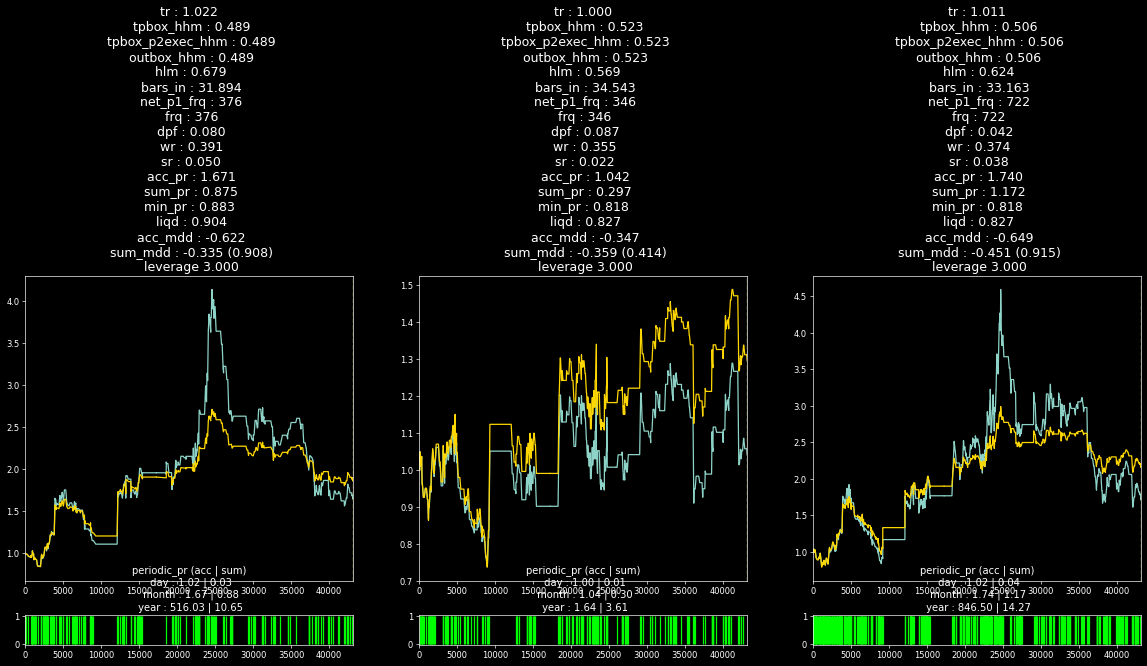

idep_plot elapsed time : 0.4390993118286133


In [57]:
"""
Cautions
    1. if lvrg_rejection = 0, spread 가 큰 경우, min_lvrg 1 이기 때문에 target_pct < min_pr 가능함.
    2. liqd = exit 까지의 min_low / high 를 의미함. (long / short 기준), 따라서 zero 일 필요가 없다는 이야기.
    3. long & short point 의 open_side 가 일치하는 경우, p2 side_check release 해줄 것.
"""

en_ex_pairing = en_ex_pairing_v9_44 # en_ex_pairing_v9_3 en_ex_pairing_v9_42 en_ex_pairing_v9_4
funcs1 = [expiry_p1p2, expiry_tp, lvrg_liqd_set_v2, check_entry_v6_2, check_signal_out_v4, check_hl_out_v4, check_limit_tp_exec]  # expiry_tp / expiry_wave

idep_plot = idep_plot_v16_6
funcs2 = [get_wave_bias_v6_1, get_pr_v6, get_res_info_nb_v3, plot_info_v8_2, frq_dev_plot_v5]  # get_wave_bias_v6_1 / # 여기서 입력되는 get_res_info 는 signi. mode 에 사용됨.

test_ratio = 0.0
plot_is = 1  # insample
signi = 0
show_detail = 0

short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_tr_arr, short_bias_arr, short_net_p1_bias_tick, short_p2exec_p1_bias_tick, short_net_p1_idx_arr, short_p2_idx_arr, short_tp_1, short_tp_0, short_out_1, short_out_0, short_ep2_0, \
      long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_tr_arr, long_bias_arr, long_net_p1_bias_tick, long_p2exec_p1_bias_tick, long_net_p1_idx_arr, long_p2_idx_arr, long_tp_1, long_tp_0, long_out_1, long_out_0, long_ep2_0 = \
get_res_v2(res_df, open_info_df_list, ohlc_list, config_list, np_timeidx, en_ex_pairing, funcs1, idep_plot, funcs2, test_ratio=test_ratio, plot_is=plot_is, signi=signi, show_detail=show_detail)

In [107]:
# ------ inversion ------ #
# _ = get_res_v5(res_df, open_info_df, ohlc_list, config_list, np_timeidx, funcs, inversion=True, test_ratio=test_ratio, plot_is=1, signi=False)

#### print config

In [ ]:
# ------- print config ------- #
config_sets = ['selection_id', 'trader_set', 'pos_set', 'loc_set', 'tr_set', 'ep_set', 'tp_set', 'out_set', 'lvrg_set']
for set_i, set_ in enumerate(config_sets):
    if set_i == len(config_sets) - 1:
        end = '\n'
    else:
        end = ', \n'
    print('"{}": {}'.format(set_, json.dumps(config_list[0][set_], indent=2)), end=end)
# _ = [print(key_ + ":", json.dumps(config_list[0][key_], indent=1), end=',\n') for key_ in ['selection_id', 'trader_set', 'pos_set', 'loc_set', 'tr_set', 'ep_set', 'tp_set', 'out_set', 'lvrg_set']] #  'trader_set',

#### on multiple ticker

In [43]:
def idep_on_multiple_ticker(database_dir_abspath, data_list, signi=True):
    
    sub_title_list = ['hhm', 'hlm', 'frq', 'dpf', 'wr', 'sr', 'acc_pr', 'sum_pr', 'min_pr', 'liqd', 'acc_mdd', 'sum_mdd_prod', 'sum_mdd_sum']
    sub_title_list_long = [col + '_long' for col in sub_title_list]
    sub_title_list_short = [col + '_short' for col in sub_title_list]    
    sub_title_list_len = len(sub_title_list)    
    res_list_long = []
    res_list_short = []
    for r_, ticker in enumerate(data_list):

        print("# ------------ rank : {}, ticker : {} ------------ #".format(r_, ticker))

        # while 1:  # memory allocation 문제로 진행했으나, while 은 해결책이 아님 (eternal loop+
        try:                
            start_0 = time.time()
            data_path = os.path.join(database_dir_abspath, "{} {}.pkl".format(date, ticker))
            # data_path = os.path.join(database_dir_abspath, "{} A{}.pkl".format(date, ticker))  # add A temporarily
            if idep_mode == "CRYPTO":
                pd.read_feather(data_path, columns=None, use_threads=True).set_index("index")
            else:
                res_df_ = pd.read_pickle(data_path)
            print(data_path, "loaded !")
            print("load res_df_ elapsed time :", time.time() - start_0)
            
            # timeindex_str = str(res_df_.index[0])
            # if timeindex_str != "2021-03-05 09:01:00":
            #     print("res_df_.index[0] : {}\n".format(timeindex_str))
            #     continue

            if config.trader_set.start_datetime != "None":
                res_df = res_df_.astype(float).loc[pd.to_datetime(config.trader_set.start_datetime):]
            else:    
                res_df = res_df_.astype(float)
            np_timeidx = np.array([intmin_np(date_) for date_ in res_df.index.to_numpy()])


            start_0 = time.time()
            if public_override:
                res_df = public_indi(res_df, config_list[0], np_timeidx)  # 현재 대부분의 시간은 h_candle 에서 소비되고 있음
            else:
                res_df = bank.public.public_indi(res_df, config_list[0], np_timeidx)
            print("public_indi elapsed time :", time.time() - start_0)


            start_0 = time.time()
            ohlc_cols = ['open', 'high', 'low', 'close']
            ohlc_list = [res_df[col_].to_numpy() for col_ in ohlc_cols]
            print("make data_list elapsed time :", time.time() - start_0)


            start_0 = time.time()
            if utils_override:   # 현재, utils_override 하는 경우 1개의 ID 만 허용함 
              res_df = enlist_tr(res_df, config_list[0], np_timeidx)    # 36995.0 -> 152766.0 # 4044 np.sum(long_open_res == 1) : 4325
            else:
                for utils_, config_ in zip(utils_list, config_list):
                    res_df = utils_.enlist_tr(res_df, config_, np_timeidx)
            print("enlist_tr elapsed time :", time.time() - start_0)


            open_info_df1 = get_open_info_df_v2(ep_loc_p1_v3, res_df, np_timeidx, id_list, config_list, id_idx_list, open_num=1)  # --> point * dur. 관련 (loc_set) param 에 종속 (open_info 가 변경되는게 아니라면, 재실행할 필요없음)
            open_info_df2 = get_open_info_df_v2(ep_loc_p2_v3, res_df, np_timeidx, id_list, config_list, id_idx_list, open_num=2)
            open_info_df_list = [open_info_df1, open_info_df2]
            
            en_ex_pairing = en_ex_pairing_v9_44 # en_ex_pairing_v9_3 en_ex_pairing_v9_42 en_ex_pairing_v9_4
            funcs1 = [expiry_p1p2, expiry_tp, lvrg_liqd_set_v2, check_entry_v6_2, check_signal_out_v3, check_hl_out_v4, check_limit_tp_exec]  # expiry_tp / expiry_wave

            idep_plot = idep_plot_v16_6
            funcs2 = [get_wave_bias_v6_1, get_pr_v6, get_res_info_nb_v3, plot_info_v8_2, frq_dev_plot_v5]  # get_wave_bias_v6_1 / # 여기서 입력되는 get_res_info 는 signi. mode 에 사용됨.

            test_ratio = 0.0
            plot_is = 1  # insample
            show_detail = 0

            if signi:
                short_res, long_res, both_res = get_res_v2(res_df, open_info_df_list, ohlc_list, config_list, np_timeidx, en_ex_pairing, funcs1, idep_plot, funcs2, test_ratio=test_ratio, plot_is=plot_is, signi=signi, show_detail=show_detail)
            else:
                get_res_v2(res_df, open_info_df_list, ohlc_list, config_list, np_timeidx, en_ex_pairing, funcs1, idep_plot, funcs2, test_ratio=test_ratio, plot_is=plot_is, signi=signi, show_detail=show_detail)
            # short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_tr_arr, short_bias_arr, short_net_p1_bias_tick, short_p2exec_p1_bias_tick, short_net_p1_idx_arr, short_p2_idx_arr, short_tp_1, short_tp_0, short_out_1, short_out_0, short_ep2_0, \
            #       long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_tr_arr, long_bias_arr, long_net_p1_bias_tick, long_p2exec_p1_bias_tick, long_net_p1_idx_arr, long_p2_idx_arr, long_tp_1, long_tp_0, long_out_1, long_out_0, long_ep2_0 = \
            # get_res_v2(res_df, open_info_df_list, ohlc_list, config_list, np_timeidx, en_ex_pairing, funcs1, idep_plot, funcs2, test_ratio=test_ratio, plot_is=plot_is, signi=signi, show_detail=show_detail)

        except Exception as e:
            print("error in get_res : {}".format(e))
            # try it again.
            # if "Unable to allocate" in str(e):
            #     continue
            # else:                    
            #     # if idep_mode == "STOCK":
            if signi:
                res_list_long.append([np.nan] * sub_title_list_len)
                res_list_short.append([np.nan] * sub_title_list_len)
        else:
            # if idep_mode == "STOCK":
            if signi:
                if len(long_pr) != 0 and type(long_res) != float:
                    res_list_long.append(list(long_res))
                else:
                    res_list_long.append([np.nan] * sub_title_list_len)
                
                if len(short_pr) != 0 and type(short_res) != float:
                    res_list_short.append(list(short_res))
                else:
                    res_list_short.append([np.nan] * sub_title_list_len)
    
    if signi:
        if type(data_list) == list:
            df_rank = pd.Series(data_list).to_frame()
        else:        
            df_rank = data_list.to_frame()
        df_rank[sub_title_list_long] = np.array(res_list_long)
        df_rank[sub_title_list_short] = np.array(res_list_short)

        return df_rank

##### df_rank

In [44]:
idep_mode = "STOCK"  # CRYPTO STOCK

# data_name = '2023-02-28 208370'  # 2023-01-12 ETH / 2023-02-21 FTM /2022-04-27 ETH / 2023-02-20 BTC
# date, ticker = data_name.split(" ")
date = "2023-03-11"
save_mode = 1
df_rank_file_name = "df_rank_tc_P1_zero_fee.pkl"

"""
database 는 JnQ 내부로 통일할 것.
"""
database_type = 'database/creon/'  # 'binance' kiwoom
database_dir_abspath = os.path.join(pkg_path, database_type, "cum", date).replace("JnQ_32bit", "JnQ")  # cum non_cum -> use, non_cum data for backtrade validation


In [45]:
if idep_mode == "CRYPTO":
    data_list = [f_name for f_name in os.listdir(database_dir_abspath) if 'ftr' in f_name if date in f_name]
else:
    data_list = pd.read_pickle(os.path.join(database_dir_abspath, "rank.pkl"))  # [:10]       
    
if save_mode:
    df_rank = idep_on_multiple_ticker(database_dir_abspath, data_list, signi=True)
    df_rank.to_pickle(os.path.join(database_dir_abspath, df_rank_file_name))
else:
    with open(os.path.join(database_dir_abspath, df_rank_file_name), 'rb') as f:
        df_rank = pickle.load(f)

init open_res
np.sum(short_open_res1 == 1) : 148619
np.sum(long_open_res1 == 1) : 148619
tc
np.sum(short_open_res1 == 1) : 9539
np.sum(long_open_res1 == 1) : 9214
point validation
np.sum(short_open_res1 == 1) : 9539
np.sum(long_open_res1 == 1) : 9214


# ------------ rank : 0, ticker : 900110 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900110.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500699996948242
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.579136848449707
idep_plot elapsed time : 0.13403010368347168
# ------------ rank : 1, ticker : 900270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900270.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 116005
np.sum(long_open_res1 == 1) : 116005
tc
np.sum(short_open_res1 == 1) : 8452
np.sum(long_open_res1 == 1) : 8430
point validation
np.sum(short_open_res1 == 1) : 8452
np.sum(long_open_res1 == 1) : 8430


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028005361557006836
~ ep_loc_v2 elapsed time : 0.0020303726196289062
~ get_open_info_df elapsed time : 0.003004789352416992
~ ep_loc_v2 elapsed time : 0.0009949207305908203
~ get_open_info_df elapsed time : 0.020005464553833008
en_ex_pairing elapsed time : 0.4000980854034424
idep_plot elapsed time : 0.1180267333984375
# ------------ rank : 2, ticker : 900260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900260.pkl loaded !
load res_df_ elapsed time : 0.002002716064453125


init open_res
np.sum(short_open_res1 == 1) : 133580
np.sum(long_open_res1 == 1) : 133580
tc
np.sum(short_open_res1 == 1) : 8342
np.sum(long_open_res1 == 1) : 8279
point validation
np.sum(short_open_res1 == 1) : 8342
np.sum(long_open_res1 == 1) : 8279


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.025005578994750977


init open_res
np.sum(short_open_res1 == 1) : 46248
np.sum(long_open_res1 == 1) : 46248
tc
np.sum(short_open_res1 == 1) : 3175
np.sum(long_open_res1 == 1) : 3130
point validation
np.sum(short_open_res1 == 1) : 3175
np.sum(long_open_res1 == 1) : 3130


en_ex_pairing elapsed time : 0.4571077823638916
idep_plot elapsed time : 0.12102794647216797
# ------------ rank : 3, ticker : 900290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900290.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.019004344940185547
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00800180435180664
en_ex_pairing elapsed time : 0.1580033302307129
idep_plot elapsed time : 0.043009042739868164
# ------------ rank : 4, ticker : 900300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900300.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164
public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 156837
np.sum(long_open_res1 == 1) : 156837
tc
np.sum(short_open_res1 == 1) : 10076
np.sum(long_open_res1 == 1) : 9905
point validation
np.sum(short_open_res1 == 1) : 10076
np.sum(long_open_res1 == 1) : 9905


enlist_tr elapsed time : 0.039008378982543945
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0290067195892334
en_ex_pairing elapsed time : 0.5161170959472656
idep_plot elapsed time : 0.15403485298156738
# ------------ rank : 5, ticker : 900310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900310.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 121475
np.sum(long_open_res1 == 1) : 121475
tc
np.sum(short_open_res1 == 1) : 7635
np.sum(long_open_res1 == 1) : 7665
point validation
np.sum(short_open_res1 == 1) : 7635
np.sum(long_open_res1 == 1) : 7665


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290071964263916
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0020020008087158203
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.39108777046203613
idep_plot elapsed time : 0.11202549934387207
# ------------ rank : 6, ticker : 900340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900340.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 115067
np.sum(long_open_res1 == 1) : 115067
tc
np.sum(short_open_res1 == 1) : 7773
np.sum(long_open_res1 == 1) : 7740
point validation
np.sum(short_open_res1 == 1) : 7773
np.sum(long_open_res1 == 1) : 7740


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.019003868103027344
en_ex_pairing elapsed time : 0.42409586906433105
idep_plot elapsed time : 0.11402630805969238
# ------------ rank : 7, ticker : 000250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 000250.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 179208
np.sum(long_open_res1 == 1) : 179208
tc
np.sum(short_open_res1 == 1) : 9232
np.sum(long_open_res1 == 1) : 9299
point validation
np.sum(short_open_res1 == 1) : 9232
np.sum(long_open_res1 == 1) : 9299


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040008544921875
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03300762176513672
en_ex_pairing elapsed time : 0.5031139850616455
idep_plot elapsed time : 0.16303634643554688
# ------------ rank : 8, ticker : 000440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 000440.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 148735
np.sum(long_open_res1 == 1) : 148735
tc
np.sum(short_open_res1 == 1) : 8329
np.sum(long_open_res1 == 1) : 8492
point validation
np.sum(short_open_res1 == 1) : 8329
np.sum(long_open_res1 == 1) : 8492


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.027005672454833984
en_ex_pairing elapsed time : 0.5231187343597412
idep_plot elapsed time : 0.12503671646118164
# ------------ rank : 9, ticker : 001000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 001000.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 127321
np.sum(long_open_res1 == 1) : 127321
tc
np.sum(short_open_res1 == 1) : 9086
np.sum(long_open_res1 == 1) : 9022
point validation
np.sum(short_open_res1 == 1) : 9086
np.sum(long_open_res1 == 1) : 9022


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290069580078125
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.02300405502319336
en_ex_pairing elapsed time : 0.41410350799560547
idep_plot elapsed time : 0.12002944946289062
# ------------ rank : 10, ticker : 001540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 001540.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 103776
np.sum(long_open_res1 == 1) : 103776
tc
np.sum(short_open_res1 == 1) : 6510
np.sum(long_open_res1 == 1) : 6528
point validation
np.sum(short_open_res1 == 1) : 6510
np.sum(long_open_res1 == 1) : 6528


enlist_tr elapsed time : 0.026019811630249023
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.017003774642944336
en_ex_pairing elapsed time : 0.36008143424987793
idep_plot elapsed time : 0.10102462768554688
# ------------ rank : 11, ticker : 001810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 001810.pkl loaded !
load res_df_ elapsed time : 0.0020020008087158203
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 115592
np.sum(long_open_res1 == 1) : 115592
tc
np.sum(short_open_res1 == 1) : 8190
np.sum(long_open_res1 == 1) : 8254
point validation
np.sum(short_open_res1 == 1) : 8190
np.sum(long_open_res1 == 1) : 8254


enlist_tr elapsed time : 0.02800583839416504
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0200045108795166
en_ex_pairing elapsed time : 0.38908839225769043
idep_plot elapsed time : 0.11502647399902344
# ------------ rank : 12, ticker : 001840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 001840.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 138907
np.sum(long_open_res1 == 1) : 138907
tc
np.sum(short_open_res1 == 1) : 9184
np.sum(long_open_res1 == 1) : 9381
point validation
np.sum(short_open_res1 == 1) : 9184
np.sum(long_open_res1 == 1) : 9381


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.025005340576171875
en_ex_pairing elapsed time : 0.47310709953308105
idep_plot elapsed time : 0.145033597946167
# ------------ rank : 13, ticker : 002230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 002230.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 58242
np.sum(long_open_res1 == 1) : 58242
tc
np.sum(short_open_res1 == 1) : 4110
np.sum(long_open_res1 == 1) : 4270
point validation
np.sum(short_open_res1 == 1) : 4110
np.sum(long_open_res1 == 1) : 4270


enlist_tr elapsed time : 0.019004344940185547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.011005401611328125
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.1890428066253662
idep_plot elapsed time : 0.05401253700256348
# ------------ rank : 14, ticker : 002290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 002290.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.007002115249633789
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 134283
np.sum(long_open_res1 == 1) : 134283
tc
np.sum(short_open_res1 == 1) : 9006
np.sum(long_open_res1 == 1) : 9044
point validation
np.sum(short_open_res1 == 1) : 9006
np.sum(long_open_res1 == 1) : 9044


enlist_tr elapsed time : 0.04300975799560547
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.026005983352661133
en_ex_pairing elapsed time : 0.42209434509277344
idep_plot elapsed time : 0.12802910804748535
# ------------ rank : 15, ticker : 002680 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 002680.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 118700
np.sum(long_open_res1 == 1) : 118700
tc
np.sum(short_open_res1 == 1) : 7662
np.sum(long_open_res1 == 1) : 7766
point validation
np.sum(short_open_res1 == 1) : 7662
np.sum(long_open_res1 == 1) : 7766


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027006149291992188
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.3960995674133301
idep_plot elapsed time : 0.11502552032470703
# ------------ rank : 16, ticker : 002800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 002800.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 78319
np.sum(long_open_res1 == 1) : 78319
tc
np.sum(short_open_res1 == 1) : 5324
np.sum(long_open_res1 == 1) : 5387
point validation
np.sum(short_open_res1 == 1) : 5324
np.sum(long_open_res1 == 1) : 5387


enlist_tr elapsed time : 0.022005558013916016
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01400303840637207


init open_res
np.sum(short_open_res1 == 1) : 76718
np.sum(long_open_res1 == 1) : 76718
tc
np.sum(short_open_res1 == 1) : 4947
np.sum(long_open_res1 == 1) : 5090
point validation
np.sum(short_open_res1 == 1) : 4947
np.sum(long_open_res1 == 1) : 5090


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2470557689666748
idep_plot elapsed time : 0.06801581382751465
# ------------ rank : 17, ticker : 003100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 003100.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021004915237426758
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.013002872467041016
en_ex_pairing elapsed time : 0.2720613479614258
idep_plot elapsed time : 0.07501649856567383
# ------------ rank : 18, ticker : 003310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 003310.pkl loaded !
load res_df_ elapsed time : 0.00200033187866210

init open_res
np.sum(short_open_res1 == 1) : 164735
np.sum(long_open_res1 == 1) : 164735
tc
np.sum(short_open_res1 == 1) : 9336
np.sum(long_open_res1 == 1) : 9405
point validation
np.sum(short_open_res1 == 1) : 9336
np.sum(long_open_res1 == 1) : 9405


enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03200697898864746
en_ex_pairing elapsed time : 0.496112585067749
idep_plot elapsed time : 0.16203641891479492
# ------------ rank : 19, ticker : 003380 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 003380.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 171951
np.sum(long_open_res1 == 1) : 171951
tc
np.sum(short_open_res1 == 1) : 9945
np.sum(long_open_res1 == 1) : 10026
point validation
np.sum(short_open_res1 == 1) : 9945
np.sum(long_open_res1 == 1) : 10026


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04001116752624512
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.031006574630737305
en_ex_pairing elapsed time : 0.5931346416473389
idep_plot elapsed time : 0.1610879898071289
# ------------ rank : 20, ticker : 003800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 003800.pkl loaded !
load res_df_ elapsed time : 0.001998424530029297
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 31283
np.sum(long_open_res1 == 1) : 31283
tc
np.sum(short_open_res1 == 1) : 2237
np.sum(long_open_res1 == 1) : 2309
point validation
np.sum(short_open_res1 == 1) : 2237
np.sum(long_open_res1 == 1) : 2309


enlist_tr elapsed time : 0.016004323959350586
~ ep_loc_v2 elapsed time : 0.0009992122650146484
~ get_open_info_df elapsed time : 0.0009992122650146484
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00600123405456543
en_ex_pairing elapsed time : 0.0980219841003418
idep_plot elapsed time : 0.03300786018371582
# ------------ rank : 21, ticker : 004590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 004590.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 131739
np.sum(long_open_res1 == 1) : 131739
tc
np.sum(short_open_res1 == 1) : 8625
np.sum(long_open_res1 == 1) : 8724
point validation
np.sum(short_open_res1 == 1) : 8625
np.sum(long_open_res1 == 1) : 8724


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400731086730957
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02400493621826172
en_ex_pairing elapsed time : 0.4100966453552246
idep_plot elapsed time : 0.1270289421081543
# ------------ rank : 22, ticker : 004650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 004650.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 99576
np.sum(long_open_res1 == 1) : 99576
tc
np.sum(short_open_res1 == 1) : 6461
np.sum(long_open_res1 == 1) : 6397
point validation
np.sum(short_open_res1 == 1) : 6461
np.sum(long_open_res1 == 1) : 6397


enlist_tr elapsed time : 0.026297569274902344
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01600337028503418
en_ex_pairing elapsed time : 0.36208248138427734
idep_plot elapsed time : 0.09702181816101074
# ------------ rank : 23, ticker : 004780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 004780.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 117486
np.sum(long_open_res1 == 1) : 117486
tc
np.sum(short_open_res1 == 1) : 7685
np.sum(long_open_res1 == 1) : 7577
point validation
np.sum(short_open_res1 == 1) : 7685
np.sum(long_open_res1 == 1) : 7577


enlist_tr elapsed time : 0.028006553649902344
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0030028820037841797
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.37108516693115234
idep_plot elapsed time : 0.11102461814880371
# ------------ rank : 24, ticker : 005160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 005160.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 124638
np.sum(long_open_res1 == 1) : 124638
tc
np.sum(short_open_res1 == 1) : 7841
np.sum(long_open_res1 == 1) : 7829
point validation
np.sum(short_open_res1 == 1) : 7841
np.sum(long_open_res1 == 1) : 7829


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.027006864547729492
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.49211955070495605
idep_plot elapsed time : 0.11402606964111328
# ------------ rank : 25, ticker : 005290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 005290.pkl loaded !
load res_df_ elapsed time : 0.002002239227294922


init open_res
np.sum(short_open_res1 == 1) : 190258
np.sum(long_open_res1 == 1) : 190258
tc
np.sum(short_open_res1 == 1) : 9073
np.sum(long_open_res1 == 1) : 9112
point validation
np.sum(short_open_res1 == 1) : 9073
np.sum(long_open_res1 == 1) : 9112


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100942611694336
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.03400707244873047
en_ex_pairing elapsed time : 0.5131161212921143
idep_plot elapsed time : 0.1650381088256836
# ------------ rank : 26, ticker : 005670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 005670.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 97844
np.sum(long_open_res1 == 1) : 97844
tc
np.sum(short_open_res1 == 1) : 6505
np.sum(long_open_res1 == 1) : 6591
point validation
np.sum(short_open_res1 == 1) : 6505
np.sum(long_open_res1 == 1) : 6591


public_indi elapsed time : 0.0030028820037841797
make data_list elapsed time : 0.0009982585906982422
enlist_tr elapsed time : 0.028008460998535156
~ ep_loc_v2 elapsed time : 0.0009984970092773438
~ get_open_info_df elapsed time : 0.0029990673065185547
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.016003131866455078


init open_res
np.sum(short_open_res1 == 1) : 64609
np.sum(long_open_res1 == 1) : 64609
tc
np.sum(short_open_res1 == 1) : 4125
np.sum(long_open_res1 == 1) : 4253
point validation
np.sum(short_open_res1 == 1) : 4125
np.sum(long_open_res1 == 1) : 4253


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.31507086753845215
idep_plot elapsed time : 0.09102129936218262
# ------------ rank : 27, ticker : 005710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 005710.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0200040340423584
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.011002063751220703
en_ex_pairing elapsed time : 0.20004487037658691
idep_plot elapsed time : 0.059012651443481445
# ------------ rank : 28, ticker : 005860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 005860.pkl loaded !
load res_df_ elapsed time : 0.0020005702972412

init open_res
np.sum(short_open_res1 == 1) : 167066
np.sum(long_open_res1 == 1) : 167066
tc
np.sum(short_open_res1 == 1) : 9085
np.sum(long_open_res1 == 1) : 9296
point validation
np.sum(short_open_res1 == 1) : 9085
np.sum(long_open_res1 == 1) : 9296


enlist_tr elapsed time : 0.04000997543334961
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03200721740722656
en_ex_pairing elapsed time : 0.4851095676422119
idep_plot elapsed time : 0.1470327377319336
# ------------ rank : 29, ticker : 005990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 005990.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 66526
np.sum(long_open_res1 == 1) : 66526
tc
np.sum(short_open_res1 == 1) : 4333
np.sum(long_open_res1 == 1) : 4296
point validation
np.sum(short_open_res1 == 1) : 4333
np.sum(long_open_res1 == 1) : 4296


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200460433959961
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0020012855529785156
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01200413703918457
en_ex_pairing elapsed time : 0.23405194282531738
idep_plot elapsed time : 0.06701493263244629
# ------------ rank : 30, ticker : 006050 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 006050.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004987955093383789
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 125182
np.sum(long_open_res1 == 1) : 125182
tc
np.sum(short_open_res1 == 1) : 8036
np.sum(long_open_res1 == 1) : 7970
point validation
np.sum(short_open_res1 == 1) : 8036
np.sum(long_open_res1 == 1) : 7970


enlist_tr elapsed time : 0.028005123138427734
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.004002094268798828
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.4151031970977783
idep_plot elapsed time : 0.12402772903442383
# ------------ rank : 31, ticker : 006140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 006140.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 88404
np.sum(long_open_res1 == 1) : 88404
tc
np.sum(short_open_res1 == 1) : 5520
np.sum(long_open_res1 == 1) : 5576
point validation
np.sum(short_open_res1 == 1) : 5520
np.sum(long_open_res1 == 1) : 5576


enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014002799987792969


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.26806139945983887
idep_plot elapsed time : 0.07401657104492188
# ------------ rank : 32, ticker : 006580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 006580.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0009999275207519531
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 33, ticker : 006620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 006620.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 131516
np.sum(long_open_res1 == 1) : 131516
tc
np.sum(short_open_res1 == 1) : 9025
np.sum(long_open_res1 == 1) : 9125
point validation
np.sum(short_open_res1 == 1) : 9025
np.sum(long_open_res1 == 1) : 9125


enlist_tr elapsed time : 0.032007455825805664
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02400517463684082
en_ex_pairing elapsed time : 0.4380991458892822
idep_plot elapsed time : 0.13002943992614746
# ------------ rank : 34, ticker : 006730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 006730.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 172506
np.sum(long_open_res1 == 1) : 172506
tc
np.sum(short_open_res1 == 1) : 9153
np.sum(long_open_res1 == 1) : 8972
point validation
np.sum(short_open_res1 == 1) : 9153
np.sum(long_open_res1 == 1) : 8972


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900861740112305
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03100728988647461
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.504565954208374
idep_plot elapsed time : 0.1450328826904297
# ------------ rank : 35, ticker : 006910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 006910.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 185740
np.sum(long_open_res1 == 1) : 185740
tc
np.sum(short_open_res1 == 1) : 9482
np.sum(long_open_res1 == 1) : 9748
point validation
np.sum(short_open_res1 == 1) : 9482
np.sum(long_open_res1 == 1) : 9748


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100918769836426
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.033007144927978516
en_ex_pairing elapsed time : 0.5011136531829834
idep_plot elapsed time : 0.1560349464416504
# ------------ rank : 36, ticker : 006920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 006920.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 103318
np.sum(long_open_res1 == 1) : 103318
tc
np.sum(short_open_res1 == 1) : 6948
np.sum(long_open_res1 == 1) : 7031
point validation
np.sum(short_open_res1 == 1) : 6948
np.sum(long_open_res1 == 1) : 7031


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.026006460189819336
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.019003868103027344
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.33408308029174805
idep_plot elapsed time : 0.0980222225189209
# ------------ rank : 37, ticker : 007330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 007330.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 130742
np.sum(long_open_res1 == 1) : 130742
tc
np.sum(short_open_res1 == 1) : 7715
np.sum(long_open_res1 == 1) : 7762
point validation
np.sum(short_open_res1 == 1) : 7715
np.sum(long_open_res1 == 1) : 7762


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.032006263732910156
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.024005651473999023
en_ex_pairing elapsed time : 0.39108824729919434
idep_plot elapsed time : 0.127532958984375
# ------------ rank : 38, ticker : 007370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 007370.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 95282
np.sum(long_open_res1 == 1) : 95282
tc
np.sum(short_open_res1 == 1) : 6832
np.sum(long_open_res1 == 1) : 6883
point validation
np.sum(short_open_res1 == 1) : 6832
np.sum(long_open_res1 == 1) : 6883


public_indi elapsed time : 0.00400233268737793
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02500438690185547
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01700592041015625
en_ex_pairing elapsed time : 0.3120706081390381
idep_plot elapsed time : 0.09602117538452148
# ------------ rank : 39, ticker : 007390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 007390.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 184257
np.sum(long_open_res1 == 1) : 184257
tc
np.sum(short_open_res1 == 1) : 8751
np.sum(long_open_res1 == 1) : 8612
point validation
np.sum(short_open_res1 == 1) : 8751
np.sum(long_open_res1 == 1) : 8612


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04300951957702637
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03400731086730957
en_ex_pairing elapsed time : 0.6361443996429443
idep_plot elapsed time : 0.16403651237487793
# ------------ rank : 40, ticker : 007530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 007530.pkl loaded !
load res_df_ elapsed time : 0.003001689910888672


init open_res
np.sum(short_open_res1 == 1) : 72252
np.sum(long_open_res1 == 1) : 72252
tc
np.sum(short_open_res1 == 1) : 5668
np.sum(long_open_res1 == 1) : 5496
point validation
np.sum(short_open_res1 == 1) : 5668
np.sum(long_open_res1 == 1) : 5496


public_indi elapsed time : 0.00400233268737793
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200484275817871
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013003110885620117


init open_res
np.sum(short_open_res1 == 1) : 77685
np.sum(long_open_res1 == 1) : 77685
tc
np.sum(short_open_res1 == 1) : 6114
np.sum(long_open_res1 == 1) : 6051
point validation
np.sum(short_open_res1 == 1) : 6114
np.sum(long_open_res1 == 1) : 6051


en_ex_pairing elapsed time : 0.23005199432373047
idep_plot elapsed time : 0.06601500511169434
# ------------ rank : 41, ticker : 007680 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 007680.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0030028820037841797
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200484275817871
~ ep_loc_v2 elapsed time : 0.0019989013671875
~ get_open_info_df elapsed time : 0.0029993057250976562
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.014002561569213867
en_ex_pairing elapsed time : 0.26706743240356445
idep_plot elapsed time : 0.0780191421508789
# ------------ rank : 42, ticker : 007720 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 007720.pkl loaded !
load res_df_ elapsed time : 0.0020020008087158203
public_indi elapsed time : 0.0050029754638671875
make data_list elapsed time : 0.0

init open_res
np.sum(short_open_res1 == 1) : 119106
np.sum(long_open_res1 == 1) : 119106
tc
np.sum(short_open_res1 == 1) : 7492
np.sum(long_open_res1 == 1) : 7419
point validation
np.sum(short_open_res1 == 1) : 7492
np.sum(long_open_res1 == 1) : 7419


enlist_tr elapsed time : 0.02800464630126953
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.0030019283294677734
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.3752567768096924
idep_plot elapsed time : 0.10503172874450684
# ------------ rank : 43, ticker : 007770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 007770.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 123462
np.sum(long_open_res1 == 1) : 123462
tc
np.sum(short_open_res1 == 1) : 8190
np.sum(long_open_res1 == 1) : 7928
point validation
np.sum(short_open_res1 == 1) : 8190
np.sum(long_open_res1 == 1) : 7928


enlist_tr elapsed time : 0.028005361557006836
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.020004749298095703
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4060976505279541
idep_plot elapsed time : 0.12831950187683105
# ------------ rank : 44, ticker : 007820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 007820.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 112263
np.sum(long_open_res1 == 1) : 112263
tc
np.sum(short_open_res1 == 1) : 6821
np.sum(long_open_res1 == 1) : 7032
point validation
np.sum(short_open_res1 == 1) : 6821
np.sum(long_open_res1 == 1) : 7032


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005434036254883
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.3500790596008301
idep_plot elapsed time : 0.10102319717407227
# ------------ rank : 45, ticker : 008290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 008290.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004002571105957031
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 88783
np.sum(long_open_res1 == 1) : 88783
tc
np.sum(short_open_res1 == 1) : 6268
np.sum(long_open_res1 == 1) : 6276
point validation
np.sum(short_open_res1 == 1) : 6268
np.sum(long_open_res1 == 1) : 6276


enlist_tr elapsed time : 0.024006128311157227
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.015002965927124023


init open_res
np.sum(short_open_res1 == 1) : 98432
np.sum(long_open_res1 == 1) : 98432
tc
np.sum(short_open_res1 == 1) : 6895
np.sum(long_open_res1 == 1) : 6913
point validation
np.sum(short_open_res1 == 1) : 6895
np.sum(long_open_res1 == 1) : 6913


en_ex_pairing elapsed time : 0.2740614414215088
idep_plot elapsed time : 0.07401704788208008
# ------------ rank : 46, ticker : 008370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 008370.pkl loaded !
load res_df_ elapsed time : 0.0010018348693847656
public_indi elapsed time : 0.0050029754638671875
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800440788269043
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.017004013061523438
en_ex_pairing elapsed time : 0.3232705593109131
idep_plot elapsed time : 0.10102295875549316
# ------------ rank : 47, ticker : 008470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 008470.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.

init open_res
np.sum(short_open_res1 == 1) : 76830
np.sum(long_open_res1 == 1) : 76830
tc
np.sum(short_open_res1 == 1) : 5580
np.sum(long_open_res1 == 1) : 5537
point validation
np.sum(short_open_res1 == 1) : 5580
np.sum(long_open_res1 == 1) : 5537


enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.013003110885620117


init open_res


en_ex_pairing elapsed time : 0.2490556240081787
idep_plot elapsed time : 0.07601785659790039
# ------------ rank : 48, ticker : 008830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 008830.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 105380
np.sum(long_open_res1 == 1) : 105380
tc
np.sum(short_open_res1 == 1) : 7844
np.sum(long_open_res1 == 1) : 7857
point validation
np.sum(short_open_res1 == 1) : 7844
np.sum(long_open_res1 == 1) : 7857


enlist_tr elapsed time : 0.029006242752075195
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.017003536224365234


init open_res
np.sum(short_open_res1 == 1) : 69222
np.sum(long_open_res1 == 1) : 69222
tc
np.sum(short_open_res1 == 1) : 4434
np.sum(long_open_res1 == 1) : 4390
point validation
np.sum(short_open_res1 == 1) : 4434
np.sum(long_open_res1 == 1) : 4390


en_ex_pairing elapsed time : 0.3360757827758789
idep_plot elapsed time : 0.09902381896972656
# ------------ rank : 49, ticker : 009300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 009300.pkl loaded !
load res_df_ elapsed time : 0.0020041465759277344
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.020004987716674805
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.011002063751220703
en_ex_pairing elapsed time : 0.2160484790802002
idep_plot elapsed time : 0.06301474571228027
# ------------ rank : 50, ticker : 009520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 009520.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 181160
np.sum(long_open_res1 == 1) : 181160
tc
np.sum(short_open_res1 == 1) : 9777
np.sum(long_open_res1 == 1) : 9920
point validation
np.sum(short_open_res1 == 1) : 9777
np.sum(long_open_res1 == 1) : 9920


public_indi elapsed time : 0.007002353668212891
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100966453552246
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.006000995635986328
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.031007051467895508
en_ex_pairing elapsed time : 0.48812127113342285
idep_plot elapsed time : 0.14803338050842285
# ------------ rank : 51, ticker : 009620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 009620.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 149772
np.sum(long_open_res1 == 1) : 149772
tc
np.sum(short_open_res1 == 1) : 8961
np.sum(long_open_res1 == 1) : 8855
point validation
np.sum(short_open_res1 == 1) : 8961
np.sum(long_open_res1 == 1) : 8855


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008689880371094
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.006001710891723633
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.028005599975585938


init open_res
np.sum(short_open_res1 == 1) : 13012
np.sum(long_open_res1 == 1) : 13012
tc
np.sum(short_open_res1 == 1) : 841
np.sum(long_open_res1 == 1) : 830
point validation
np.sum(short_open_res1 == 1) : 841
np.sum(long_open_res1 == 1) : 830


en_ex_pairing elapsed time : 0.4941120147705078
idep_plot elapsed time : 0.1450333595275879
# ------------ rank : 52, ticker : 009730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 009730.pkl loaded !
load res_df_ elapsed time : 0.0009996891021728516
public_indi elapsed time : 0.001999378204345703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01400446891784668
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030007362365722656
en_ex_pairing elapsed time : 0.03900885581970215


init open_res
np.sum(short_open_res1 == 1) : 71706
np.sum(long_open_res1 == 1) : 71706
tc
np.sum(short_open_res1 == 1) : 5068
np.sum(long_open_res1 == 1) : 5207
point validation
np.sum(short_open_res1 == 1) : 5068
np.sum(long_open_res1 == 1) : 5207


idep_plot elapsed time : 0.015002727508544922
# ------------ rank : 53, ticker : 009780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 009780.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.020005226135253906
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.001001596450805664
~ get_open_info_df elapsed time : 0.013002634048461914
en_ex_pairing elapsed time : 0.247056245803833
idep_plot elapsed time : 0.07901716232299805
# ------------ rank : 54, ticker : 010170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 010170.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 162039
np.sum(long_open_res1 == 1) : 162039
tc
np.sum(short_open_res1 == 1) : 9384
np.sum(long_open_res1 == 1) : 9348
point validation
np.sum(short_open_res1 == 1) : 9384
np.sum(long_open_res1 == 1) : 9348


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800797462463379
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.5091147422790527
idep_plot elapsed time : 0.15604376792907715
# ------------ rank : 55, ticker : 010240 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 010240.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 112020
np.sum(long_open_res1 == 1) : 112020
tc
np.sum(short_open_res1 == 1) : 8313
np.sum(long_open_res1 == 1) : 8214
point validation
np.sum(short_open_res1 == 1) : 8313
np.sum(long_open_res1 == 1) : 8214


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.027005910873413086
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.0040018558502197266
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.3850846290588379
idep_plot elapsed time : 0.12003850936889648
# ------------ rank : 56, ticker : 010280 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 010280.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 104894
np.sum(long_open_res1 == 1) : 104894
tc
np.sum(short_open_res1 == 1) : 6683
np.sum(long_open_res1 == 1) : 6651
point validation
np.sum(short_open_res1 == 1) : 6683
np.sum(long_open_res1 == 1) : 6651


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.018004179000854492
en_ex_pairing elapsed time : 0.3350813388824463
idep_plot elapsed time : 0.09002232551574707
# ------------ rank : 57, ticker : 010470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 010470.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 119162
np.sum(long_open_res1 == 1) : 119162
tc
np.sum(short_open_res1 == 1) : 8853
np.sum(long_open_res1 == 1) : 8794
point validation
np.sum(short_open_res1 == 1) : 8853
np.sum(long_open_res1 == 1) : 8794


enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.019003629684448242
en_ex_pairing elapsed time : 0.385087251663208
idep_plot elapsed time : 0.11602663993835449
# ------------ rank : 58, ticker : 011040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 011040.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 131912
np.sum(long_open_res1 == 1) : 131912
tc
np.sum(short_open_res1 == 1) : 8722
np.sum(long_open_res1 == 1) : 8697
point validation
np.sum(short_open_res1 == 1) : 8722
np.sum(long_open_res1 == 1) : 8697


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036008358001708984
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.025005578994750977
en_ex_pairing elapsed time : 0.5911433696746826
idep_plot elapsed time : 0.12402772903442383
# ------------ rank : 59, ticker : 011080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 011080.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 122141
np.sum(long_open_res1 == 1) : 122141
tc
np.sum(short_open_res1 == 1) : 7683
np.sum(long_open_res1 == 1) : 7700
point validation
np.sum(short_open_res1 == 1) : 7683
np.sum(long_open_res1 == 1) : 7700


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700662612915039
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.022004127502441406
en_ex_pairing elapsed time : 0.3930966854095459
idep_plot elapsed time : 0.11302614212036133
# ------------ rank : 60, ticker : 011320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 011320.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 138262
np.sum(long_open_res1 == 1) : 138262
tc
np.sum(short_open_res1 == 1) : 8058
np.sum(long_open_res1 == 1) : 8255
point validation
np.sum(short_open_res1 == 1) : 8058
np.sum(long_open_res1 == 1) : 8255


public_indi elapsed time : 0.003998756408691406
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400731086730957
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02400493621826172
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4320974349975586
idep_plot elapsed time : 0.12602829933166504
# ------------ rank : 61, ticker : 011370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 011370.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 149037
np.sum(long_open_res1 == 1) : 149037
tc
np.sum(short_open_res1 == 1) : 9045
np.sum(long_open_res1 == 1) : 8928
point validation
np.sum(short_open_res1 == 1) : 9045
np.sum(long_open_res1 == 1) : 8928


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037008047103881836
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.02800607681274414
en_ex_pairing elapsed time : 0.5061149597167969
idep_plot elapsed time : 0.15303373336791992
# ------------ rank : 62, ticker : 011560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 011560.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 98372
np.sum(long_open_res1 == 1) : 98372
tc
np.sum(short_open_res1 == 1) : 6701
np.sum(long_open_res1 == 1) : 6784
point validation
np.sum(short_open_res1 == 1) : 6701
np.sum(long_open_res1 == 1) : 6784


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025874614715576172
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.017003774642944336
en_ex_pairing elapsed time : 0.30606961250305176
idep_plot elapsed time : 0.0870199203491211
# ------------ rank : 63, ticker : 012340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 012340.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 145058
np.sum(long_open_res1 == 1) : 145058
tc
np.sum(short_open_res1 == 1) : 8748
np.sum(long_open_res1 == 1) : 8726
point validation
np.sum(short_open_res1 == 1) : 8748
np.sum(long_open_res1 == 1) : 8726


enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.027005672454833984
en_ex_pairing elapsed time : 0.4501020908355713
idep_plot elapsed time : 0.1290290355682373
# ------------ rank : 64, ticker : 012620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 012620.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 88671
np.sum(long_open_res1 == 1) : 88671
tc
np.sum(short_open_res1 == 1) : 5659
np.sum(long_open_res1 == 1) : 5540
point validation
np.sum(short_open_res1 == 1) : 5659
np.sum(long_open_res1 == 1) : 5540


enlist_tr elapsed time : 0.025004863739013672
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.015003681182861328
en_ex_pairing elapsed time : 0.29006528854370117
idep_plot elapsed time : 0.09102082252502441
# ------------ rank : 65, ticker : 012700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 012700.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 154296
np.sum(long_open_res1 == 1) : 154296
tc
np.sum(short_open_res1 == 1) : 9345
np.sum(long_open_res1 == 1) : 9204
point validation
np.sum(short_open_res1 == 1) : 9345
np.sum(long_open_res1 == 1) : 9204


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.027007102966308594
en_ex_pairing elapsed time : 0.4941110610961914
idep_plot elapsed time : 0.13703107833862305
# ------------ rank : 66, ticker : 012790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 012790.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 115215
np.sum(long_open_res1 == 1) : 115215
tc
np.sum(short_open_res1 == 1) : 6990
np.sum(long_open_res1 == 1) : 6979
point validation
np.sum(short_open_res1 == 1) : 6990
np.sum(long_open_res1 == 1) : 6979


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006553649902344
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.37708544731140137
idep_plot elapsed time : 0.10702395439147949
# ------------ rank : 67, ticker : 012860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 012860.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 131364
np.sum(long_open_res1 == 1) : 131364
tc
np.sum(short_open_res1 == 1) : 8592
np.sum(long_open_res1 == 1) : 8504
point validation
np.sum(short_open_res1 == 1) : 8592
np.sum(long_open_res1 == 1) : 8504


public_indi elapsed time : 0.004002094268798828
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03201746940612793
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.024005413055419922
en_ex_pairing elapsed time : 0.4030883312225342
idep_plot elapsed time : 0.12102890014648438
# ------------ rank : 68, ticker : 013030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 013030.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 162370
np.sum(long_open_res1 == 1) : 162370
tc
np.sum(short_open_res1 == 1) : 9475
np.sum(long_open_res1 == 1) : 9432
point validation
np.sum(short_open_res1 == 1) : 9475
np.sum(long_open_res1 == 1) : 9432


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03901076316833496
~ ep_loc_v2 elapsed time : 0.003998517990112305
~ get_open_info_df elapsed time : 0.005999326705932617
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03000640869140625
en_ex_pairing elapsed time : 0.5741360187530518
idep_plot elapsed time : 0.158036470413208
# ------------ rank : 69, ticker : 013120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 013120.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 140967
np.sum(long_open_res1 == 1) : 140967
tc
np.sum(short_open_res1 == 1) : 8174
np.sum(long_open_res1 == 1) : 8253
point validation
np.sum(short_open_res1 == 1) : 8174
np.sum(long_open_res1 == 1) : 8253


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02600574493408203
en_ex_pairing elapsed time : 0.45110225677490234
idep_plot elapsed time : 0.13303065299987793
# ------------ rank : 70, ticker : 013310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 013310.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 156353
np.sum(long_open_res1 == 1) : 156353
tc
np.sum(short_open_res1 == 1) : 9070
np.sum(long_open_res1 == 1) : 9178
point validation
np.sum(short_open_res1 == 1) : 9070
np.sum(long_open_res1 == 1) : 9178


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.038008689880371094
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0290067195892334
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5771312713623047
idep_plot elapsed time : 0.1450331211090088
# ------------ rank : 71, ticker : 013720 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 013720.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 147201
np.sum(long_open_res1 == 1) : 147201
tc
np.sum(short_open_res1 == 1) : 8845
np.sum(long_open_res1 == 1) : 8678
point validation
np.sum(short_open_res1 == 1) : 8845
np.sum(long_open_res1 == 1) : 8678


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800797462463379
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.005000114440917969
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028006792068481445
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.42909717559814453
idep_plot elapsed time : 0.13002991676330566
# ------------ rank : 72, ticker : 013810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 013810.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 143588
np.sum(long_open_res1 == 1) : 143588
tc
np.sum(short_open_res1 == 1) : 9126
np.sum(long_open_res1 == 1) : 9328
point validation
np.sum(short_open_res1 == 1) : 9126
np.sum(long_open_res1 == 1) : 9328


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700757026672363
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0030019283294677734
~ get_open_info_df elapsed time : 0.027005434036254883
en_ex_pairing elapsed time : 0.4621086120605469
idep_plot elapsed time : 0.1380312442779541
# ------------ rank : 73, ticker : 013990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 013990.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 166921
np.sum(long_open_res1 == 1) : 166921
tc
np.sum(short_open_res1 == 1) : 9402
np.sum(long_open_res1 == 1) : 9377
point validation
np.sum(short_open_res1 == 1) : 9402
np.sum(long_open_res1 == 1) : 9377


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.03901028633117676
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.0049991607666015625
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.031006813049316406
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5114099979400635
idep_plot elapsed time : 0.15103411674499512
# ------------ rank : 74, ticker : 014100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 014100.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 35502
np.sum(long_open_res1 == 1) : 35502
tc
np.sum(short_open_res1 == 1) : 2902
np.sum(long_open_res1 == 1) : 2847
point validation
np.sum(short_open_res1 == 1) : 2902
np.sum(long_open_res1 == 1) : 2847


enlist_tr elapsed time : 0.01629924774169922
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.006001472473144531
en_ex_pairing elapsed time : 0.11002445220947266
idep_plot elapsed time : 0.0380091667175293
# ------------ rank : 75, ticker : 014190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 014190.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 151130
np.sum(long_open_res1 == 1) : 151130
tc
np.sum(short_open_res1 == 1) : 8949
np.sum(long_open_res1 == 1) : 9021
point validation
np.sum(short_open_res1 == 1) : 8949
np.sum(long_open_res1 == 1) : 9021


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02800607681274414
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.474107027053833
idep_plot elapsed time : 0.1450331211090088
# ------------ rank : 76, ticker : 014200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 014200.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 153788
np.sum(long_open_res1 == 1) : 153788
tc
np.sum(short_open_res1 == 1) : 8991
np.sum(long_open_res1 == 1) : 9028
point validation
np.sum(short_open_res1 == 1) : 8991
np.sum(long_open_res1 == 1) : 9028


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.03700876235961914
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028006553649902344
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.49611783027648926
idep_plot elapsed time : 0.14603304862976074
# ------------ rank : 77, ticker : 014470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 014470.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 125428
np.sum(long_open_res1 == 1) : 125428
tc
np.sum(short_open_res1 == 1) : 8179
np.sum(long_open_res1 == 1) : 8104
point validation
np.sum(short_open_res1 == 1) : 8179
np.sum(long_open_res1 == 1) : 8104


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02200484275817871
en_ex_pairing elapsed time : 0.4111478328704834
idep_plot elapsed time : 0.12102723121643066
# ------------ rank : 78, ticker : 014570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 014570.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 81502
np.sum(long_open_res1 == 1) : 81502
tc
np.sum(short_open_res1 == 1) : 5608
np.sum(long_open_res1 == 1) : 5616
point validation
np.sum(short_open_res1 == 1) : 5608
np.sum(long_open_res1 == 1) : 5616


enlist_tr elapsed time : 0.02300548553466797
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01400303840637207
en_ex_pairing elapsed time : 0.29906749725341797
idep_plot elapsed time : 0.08001852035522461
# ------------ rank : 79, ticker : 014620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 014620.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 174135
np.sum(long_open_res1 == 1) : 174135
tc
np.sum(short_open_res1 == 1) : 9901
np.sum(long_open_res1 == 1) : 9774
point validation
np.sum(short_open_res1 == 1) : 9901
np.sum(long_open_res1 == 1) : 9774


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040008544921875
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.00600123405456543
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03100728988647461
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5764999389648438
idep_plot elapsed time : 0.16303634643554688
# ------------ rank : 80, ticker : 014940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 014940.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 119917
np.sum(long_open_res1 == 1) : 119917
tc
np.sum(short_open_res1 == 1) : 7738
np.sum(long_open_res1 == 1) : 7729
point validation
np.sum(short_open_res1 == 1) : 7738
np.sum(long_open_res1 == 1) : 7729


public_indi elapsed time : 0.004004478454589844
make data_list elapsed time : 0.0009970664978027344
enlist_tr elapsed time : 0.031006813049316406
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02300572395324707
en_ex_pairing elapsed time : 0.3652942180633545
idep_plot elapsed time : 0.10002326965332031
# ------------ rank : 81, ticker : 014970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 014970.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 93264
np.sum(long_open_res1 == 1) : 93264
tc
np.sum(short_open_res1 == 1) : 6632
np.sum(long_open_res1 == 1) : 6743
point validation
np.sum(short_open_res1 == 1) : 6632
np.sum(long_open_res1 == 1) : 6743


enlist_tr elapsed time : 0.02500629425048828
~ ep_loc_v2 elapsed time : 0.0019991397857666016
~ get_open_info_df elapsed time : 0.0039997100830078125
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01700425148010254
en_ex_pairing elapsed time : 0.30206799507141113
idep_plot elapsed time : 0.08802032470703125
# ------------ rank : 82, ticker : 015710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 015710.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0009996891021728516


init open_res
np.sum(short_open_res1 == 1) : 100881
np.sum(long_open_res1 == 1) : 100881
tc
np.sum(short_open_res1 == 1) : 6694
np.sum(long_open_res1 == 1) : 6767
point validation
np.sum(short_open_res1 == 1) : 6694
np.sum(long_open_res1 == 1) : 6767


enlist_tr elapsed time : 0.024005413055419922
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.017003536224365234
en_ex_pairing elapsed time : 0.31408262252807617
idep_plot elapsed time : 0.09402203559875488
# ------------ rank : 83, ticker : 015750 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 015750.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 180935
np.sum(long_open_res1 == 1) : 180935
tc
np.sum(short_open_res1 == 1) : 9289
np.sum(long_open_res1 == 1) : 9196
point validation
np.sum(short_open_res1 == 1) : 9289
np.sum(long_open_res1 == 1) : 9196


public_indi elapsed time : 0.007001399993896484
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100966453552246
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03300738334655762
en_ex_pairing elapsed time : 0.5113389492034912
idep_plot elapsed time : 0.1623222827911377
# ------------ rank : 84, ticker : 016100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 016100.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 84452
np.sum(long_open_res1 == 1) : 84452
tc
np.sum(short_open_res1 == 1) : 5796
np.sum(long_open_res1 == 1) : 5795
point validation
np.sum(short_open_res1 == 1) : 5796
np.sum(long_open_res1 == 1) : 5795


public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0010006427764892578
enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.016004085540771484
en_ex_pairing elapsed time : 0.24305391311645508
idep_plot elapsed time : 0.07001566886901855
# ------------ rank : 85, ticker : 016250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 016250.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 101400
np.sum(long_open_res1 == 1) : 101400
tc
np.sum(short_open_res1 == 1) : 6845
np.sum(long_open_res1 == 1) : 6851
point validation
np.sum(short_open_res1 == 1) : 6845
np.sum(long_open_res1 == 1) : 6851


enlist_tr elapsed time : 0.025005578994750977
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.017003774642944336
en_ex_pairing elapsed time : 0.31707143783569336
idep_plot elapsed time : 0.08802199363708496
# ------------ rank : 86, ticker : 016600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 016600.pkl loaded !
load res_df_ elapsed time : 0.0020072460174560547
public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 139643
np.sum(long_open_res1 == 1) : 139643
tc
np.sum(short_open_res1 == 1) : 10478
np.sum(long_open_res1 == 1) : 10297
point validation
np.sum(short_open_res1 == 1) : 10478
np.sum(long_open_res1 == 1) : 10297


enlist_tr elapsed time : 0.038008689880371094
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02800607681274414
en_ex_pairing elapsed time : 0.5131213665008545
idep_plot elapsed time : 0.1580355167388916
# ------------ rank : 87, ticker : 016670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 016670.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 32405
np.sum(long_open_res1 == 1) : 32405
tc
np.sum(short_open_res1 == 1) : 2376
np.sum(long_open_res1 == 1) : 2312
point validation
np.sum(short_open_res1 == 1) : 2376
np.sum(long_open_res1 == 1) : 2312


enlist_tr elapsed time : 0.016003131866455078
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.007001638412475586
en_ex_pairing elapsed time : 0.09302210807800293
idep_plot elapsed time : 0.03339195251464844
# ------------ rank : 88, ticker : 016790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 016790.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 140162
np.sum(long_open_res1 == 1) : 140162
tc
np.sum(short_open_res1 == 1) : 7348
np.sum(long_open_res1 == 1) : 7549
point validation
np.sum(short_open_res1 == 1) : 7348
np.sum(long_open_res1 == 1) : 7549


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400850296020508
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.025005578994750977
en_ex_pairing elapsed time : 0.3920879364013672
idep_plot elapsed time : 0.11902689933776855
# ------------ rank : 89, ticker : 016920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 016920.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 149141
np.sum(long_open_res1 == 1) : 149141
tc
np.sum(short_open_res1 == 1) : 9398
np.sum(long_open_res1 == 1) : 9464
point validation
np.sum(short_open_res1 == 1) : 9398
np.sum(long_open_res1 == 1) : 9464


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.036008596420288086
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02700638771057129
en_ex_pairing elapsed time : 0.4571037292480469
idep_plot elapsed time : 0.136030912399292
# ------------ rank : 90, ticker : 017000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 017000.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 161383
np.sum(long_open_res1 == 1) : 161383
tc
np.sum(short_open_res1 == 1) : 9908
np.sum(long_open_res1 == 1) : 9914
point validation
np.sum(short_open_res1 == 1) : 9908
np.sum(long_open_res1 == 1) : 9914


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0010302066802978516
enlist_tr elapsed time : 0.03797769546508789
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.598135232925415
idep_plot elapsed time : 0.14803361892700195
# ------------ rank : 91, ticker : 017250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 017250.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 57323
np.sum(long_open_res1 == 1) : 57323
tc
np.sum(short_open_res1 == 1) : 4408
np.sum(long_open_res1 == 1) : 4330
point validation
np.sum(short_open_res1 == 1) : 4408
np.sum(long_open_res1 == 1) : 4330


enlist_tr elapsed time : 0.020004749298095703
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.011002540588378906


init open_res
np.sum(short_open_res1 == 1) : 113101
np.sum(long_open_res1 == 1) : 113101
tc
np.sum(short_open_res1 == 1) : 7225
np.sum(long_open_res1 == 1) : 7367
point validation
np.sum(short_open_res1 == 1) : 7225
np.sum(long_open_res1 == 1) : 7367


en_ex_pairing elapsed time : 0.2050464153289795
idep_plot elapsed time : 0.06201362609863281
# ------------ rank : 92, ticker : 017480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 017480.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005434036254883
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.020005226135253906
en_ex_pairing elapsed time : 0.3631904125213623
idep_plot elapsed time : 0.10802459716796875
# ------------ rank : 93, ticker : 017510 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 017510.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0

init open_res
np.sum(short_open_res1 == 1) : 93565
np.sum(long_open_res1 == 1) : 93565
tc
np.sum(short_open_res1 == 1) : 6206
np.sum(long_open_res1 == 1) : 6253
point validation
np.sum(short_open_res1 == 1) : 6206
np.sum(long_open_res1 == 1) : 6253


enlist_tr elapsed time : 0.02300572395324707
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01500558853149414


init open_res
np.sum(short_open_res1 == 1) : 87005
np.sum(long_open_res1 == 1) : 87005
tc
np.sum(short_open_res1 == 1) : 5783
np.sum(long_open_res1 == 1) : 5741


en_ex_pairing elapsed time : 0.2993505001068115
idep_plot elapsed time : 0.0890202522277832
# ------------ rank : 94, ticker : 017650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 017650.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0


point validation
np.sum(short_open_res1 == 1) : 5783
np.sum(long_open_res1 == 1) : 5741


enlist_tr elapsed time : 0.022004127502441406
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.014003276824951172
en_ex_pairing elapsed time : 0.30806899070739746
idep_plot elapsed time : 0.08501958847045898
# ------------ rank : 95, ticker : 017890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 017890.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 137311
np.sum(long_open_res1 == 1) : 137311
tc
np.sum(short_open_res1 == 1) : 8892
np.sum(long_open_res1 == 1) : 8760
point validation
np.sum(short_open_res1 == 1) : 8892
np.sum(long_open_res1 == 1) : 8760


enlist_tr elapsed time : 0.03400754928588867
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005817413330078
en_ex_pairing elapsed time : 0.5561270713806152
idep_plot elapsed time : 0.13003015518188477
# ------------ rank : 96, ticker : 018000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 018000.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 175163
np.sum(long_open_res1 == 1) : 175163
tc
np.sum(short_open_res1 == 1) : 9520
np.sum(long_open_res1 == 1) : 9250
point validation
np.sum(short_open_res1 == 1) : 9520
np.sum(long_open_res1 == 1) : 9250


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04101061820983887
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005000114440917969
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.03000664710998535
en_ex_pairing elapsed time : 0.5261259078979492
idep_plot elapsed time : 0.14603328704833984
# ------------ rank : 97, ticker : 018120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 018120.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 40596
np.sum(long_open_res1 == 1) : 40596
tc
np.sum(short_open_res1 == 1) : 2933
np.sum(long_open_res1 == 1) : 2955
point validation
np.sum(short_open_res1 == 1) : 2933
np.sum(long_open_res1 == 1) : 2955


enlist_tr elapsed time : 0.017003774642944336
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.0019996166229248047
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.007002115249633789
en_ex_pairing elapsed time : 0.13744330406188965
idep_plot elapsed time : 0.037007808685302734
# ------------ rank : 98, ticker : 018290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 018290.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 133733
np.sum(long_open_res1 == 1) : 133733
tc
np.sum(short_open_res1 == 1) : 8704
np.sum(long_open_res1 == 1) : 8689
point validation
np.sum(short_open_res1 == 1) : 8704
np.sum(long_open_res1 == 1) : 8689


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.02400493621826172
en_ex_pairing elapsed time : 0.4541034698486328
idep_plot elapsed time : 0.14403176307678223
# ------------ rank : 99, ticker : 018310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 018310.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 131779
np.sum(long_open_res1 == 1) : 131779
tc
np.sum(short_open_res1 == 1) : 7858
np.sum(long_open_res1 == 1) : 7711
point validation
np.sum(short_open_res1 == 1) : 7858
np.sum(long_open_res1 == 1) : 7711


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.033007144927978516
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02500629425048828
en_ex_pairing elapsed time : 0.4134213924407959
idep_plot elapsed time : 0.13102984428405762
# ------------ rank : 100, ticker : 018620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 018620.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 110473
np.sum(long_open_res1 == 1) : 110473
tc
np.sum(short_open_res1 == 1) : 7945
np.sum(long_open_res1 == 1) : 7923
point validation
np.sum(short_open_res1 == 1) : 7945
np.sum(long_open_res1 == 1) : 7923


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300666809082031
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.3830869197845459
idep_plot elapsed time : 0.11502575874328613
# ------------ rank : 101, ticker : 018680 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 018680.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 77992
np.sum(long_open_res1 == 1) : 77992
tc
np.sum(short_open_res1 == 1) : 5518
np.sum(long_open_res1 == 1) : 5481
point validation
np.sum(short_open_res1 == 1) : 5518
np.sum(long_open_res1 == 1) : 5481


enlist_tr elapsed time : 0.023004531860351562
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.01400303840637207
en_ex_pairing elapsed time : 0.2450551986694336
idep_plot elapsed time : 0.07410907745361328
# ------------ rank : 102, ticker : 018700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 018700.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 149153
np.sum(long_open_res1 == 1) : 149153
tc
np.sum(short_open_res1 == 1) : 9499
np.sum(long_open_res1 == 1) : 9488
point validation
np.sum(short_open_res1 == 1) : 9499
np.sum(long_open_res1 == 1) : 9488


public_indi elapsed time : 0.006002664566040039
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600811958312988
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.028006553649902344
en_ex_pairing elapsed time : 0.45310139656066895
idep_plot elapsed time : 0.13203048706054688
# ------------ rank : 103, ticker : 019010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 019010.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 81611
np.sum(long_open_res1 == 1) : 81611
tc
np.sum(short_open_res1 == 1) : 6190
np.sum(long_open_res1 == 1) : 6320
point validation
np.sum(short_open_res1 == 1) : 6190
np.sum(long_open_res1 == 1) : 6320


enlist_tr elapsed time : 0.025005102157592773
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01400303840637207
en_ex_pairing elapsed time : 0.28806591033935547
idep_plot elapsed time : 0.09102058410644531
# ------------ rank : 104, ticker : 019210 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 019210.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 161659
np.sum(long_open_res1 == 1) : 161659
tc
np.sum(short_open_res1 == 1) : 10356
np.sum(long_open_res1 == 1) : 10333
point validation
np.sum(short_open_res1 == 1) : 10356
np.sum(long_open_res1 == 1) : 10333


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700900077819824
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0290069580078125
en_ex_pairing elapsed time : 0.5291247367858887
idep_plot elapsed time : 0.1590406894683838
# ------------ rank : 105, ticker : 019540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 019540.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 83558
np.sum(long_open_res1 == 1) : 83558
tc
np.sum(short_open_res1 == 1) : 6089
np.sum(long_open_res1 == 1) : 6063
point validation
np.sum(short_open_res1 == 1) : 6089
np.sum(long_open_res1 == 1) : 6063


public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02300572395324707
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.015003681182861328
en_ex_pairing elapsed time : 0.27006101608276367
idep_plot elapsed time : 0.08101892471313477
# ------------ rank : 106, ticker : 019550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 019550.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 170101
np.sum(long_open_res1 == 1) : 170101
tc
np.sum(short_open_res1 == 1) : 10012
np.sum(long_open_res1 == 1) : 9902
point validation
np.sum(short_open_res1 == 1) : 10012
np.sum(long_open_res1 == 1) : 9902


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040009498596191406
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.030006885528564453
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.576134443283081
idep_plot elapsed time : 0.15203452110290527
# ------------ rank : 107, ticker : 019570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 019570.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 145775
np.sum(long_open_res1 == 1) : 145775
tc
np.sum(short_open_res1 == 1) : 9804
np.sum(long_open_res1 == 1) : 9693
point validation
np.sum(short_open_res1 == 1) : 9804
np.sum(long_open_res1 == 1) : 9693


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027005910873413086
en_ex_pairing elapsed time : 0.46210527420043945
idep_plot elapsed time : 0.13903141021728516
# ------------ rank : 108, ticker : 019590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 019590.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 113323
np.sum(long_open_res1 == 1) : 113323
tc
np.sum(short_open_res1 == 1) : 7809
np.sum(long_open_res1 == 1) : 7707
point validation
np.sum(short_open_res1 == 1) : 7809
np.sum(long_open_res1 == 1) : 7707


public_indi elapsed time : 0.004002094268798828
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005268096923828
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.020004987716674805
en_ex_pairing elapsed time : 0.5131161212921143
idep_plot elapsed time : 0.12002778053283691
# ------------ rank : 109, ticker : 019660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 019660.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 107200
np.sum(long_open_res1 == 1) : 107200
tc
np.sum(short_open_res1 == 1) : 8122
np.sum(long_open_res1 == 1) : 7660
point validation
np.sum(short_open_res1 == 1) : 8122
np.sum(long_open_res1 == 1) : 7660


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005268096923828
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.017003297805786133
en_ex_pairing elapsed time : 0.34218788146972656
idep_plot elapsed time : 0.10502433776855469
# ------------ rank : 110, ticker : 019770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 019770.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 143411
np.sum(long_open_res1 == 1) : 143411
tc
np.sum(short_open_res1 == 1) : 9259
np.sum(long_open_res1 == 1) : 9350
point validation
np.sum(short_open_res1 == 1) : 9259
np.sum(long_open_res1 == 1) : 9350


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.00099945068359375
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.026006698608398438
en_ex_pairing elapsed time : 0.44410037994384766
idep_plot elapsed time : 0.13002991676330566
# ------------ rank : 111, ticker : 019990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 019990.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 159441
np.sum(long_open_res1 == 1) : 159441
tc
np.sum(short_open_res1 == 1) : 9397
np.sum(long_open_res1 == 1) : 9266
point validation
np.sum(short_open_res1 == 1) : 9397
np.sum(long_open_res1 == 1) : 9266


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0380094051361084
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.49511194229125977
idep_plot elapsed time : 0.15003418922424316
# ------------ rank : 112, ticker : 020180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 020180.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 155460
np.sum(long_open_res1 == 1) : 155460
tc
np.sum(short_open_res1 == 1) : 9194
np.sum(long_open_res1 == 1) : 9083
point validation
np.sum(short_open_res1 == 1) : 9194
np.sum(long_open_res1 == 1) : 9083


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037009239196777344
~ ep_loc_v2 elapsed time : 0.0039997100830078125
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.028006792068481445
en_ex_pairing elapsed time : 0.49511194229125977
idep_plot elapsed time : 0.15132355690002441
# ------------ rank : 113, ticker : 020400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 020400.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 79081
np.sum(long_open_res1 == 1) : 79081
tc
np.sum(short_open_res1 == 1) : 5858
np.sum(long_open_res1 == 1) : 5813
point validation
np.sum(short_open_res1 == 1) : 5858
np.sum(long_open_res1 == 1) : 5813


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023004531860351562
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003001689910888672
~ ep_loc_v2 elapsed time : 0.0019991397857666016
~ get_open_info_df elapsed time : 0.01400303840637207
en_ex_pairing elapsed time : 0.2580585479736328
idep_plot elapsed time : 0.07201600074768066
# ------------ rank : 114, ticker : 020710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 020710.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 119905
np.sum(long_open_res1 == 1) : 119905
tc
np.sum(short_open_res1 == 1) : 7782
np.sum(long_open_res1 == 1) : 7880
point validation
np.sum(short_open_res1 == 1) : 7782
np.sum(long_open_res1 == 1) : 7880


enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02200484275817871
en_ex_pairing elapsed time : 0.3850870132446289
idep_plot elapsed time : 0.11602640151977539
# ------------ rank : 115, ticker : 021040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 021040.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 83503
np.sum(long_open_res1 == 1) : 83503
tc
np.sum(short_open_res1 == 1) : 6645
np.sum(long_open_res1 == 1) : 6730
point validation
np.sum(short_open_res1 == 1) : 6645
np.sum(long_open_res1 == 1) : 6730


enlist_tr elapsed time : 0.024005651473999023
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.014006376266479492


init open_res
np.sum(short_open_res1 == 1) : 6148
np.sum(long_open_res1 == 1) : 6148
tc
np.sum(short_open_res1 == 1) : 488
np.sum(long_open_res1 == 1) : 498
point validation
np.sum(short_open_res1 == 1) : 488
np.sum(long_open_res1 == 1) : 498


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.27906060218811035
idep_plot elapsed time : 0.0790257453918457
# ------------ rank : 116, ticker : 021045 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 021045.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01300191879272461
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.002000093460083008
en_ex_pairing elapsed time : 0.01700425148010254
idep_plot elapsed time : 0.009001970291137695
# ------------ rank : 117, ticker : 021080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 021080.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 162258
np.sum(long_open_res1 == 1) : 162258
tc
np.sum(short_open_res1 == 1) : 9608
np.sum(long_open_res1 == 1) : 9686
point validation
np.sum(short_open_res1 == 1) : 9608
np.sum(long_open_res1 == 1) : 9686


public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.029006242752075195
en_ex_pairing elapsed time : 0.496112585067749
idep_plot elapsed time : 0.15403509140014648
# ------------ rank : 118, ticker : 021320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 021320.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 100421
np.sum(long_open_res1 == 1) : 100421
tc
np.sum(short_open_res1 == 1) : 6698
np.sum(long_open_res1 == 1) : 6732
point validation
np.sum(short_open_res1 == 1) : 6698
np.sum(long_open_res1 == 1) : 6732


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005578994750977
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.018003463745117188
en_ex_pairing elapsed time : 0.3380768299102783
idep_plot elapsed time : 0.0980219841003418
# ------------ rank : 119, ticker : 021650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 021650.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 95134
np.sum(long_open_res1 == 1) : 95134
tc
np.sum(short_open_res1 == 1) : 6840
np.sum(long_open_res1 == 1) : 6905
point validation
np.sum(short_open_res1 == 1) : 6840
np.sum(long_open_res1 == 1) : 6905


enlist_tr elapsed time : 0.02500605583190918
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.017004013061523438
en_ex_pairing elapsed time : 0.3180718421936035
idep_plot elapsed time : 0.0980222225189209
# ------------ rank : 120, ticker : 021880 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 021880.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 110195
np.sum(long_open_res1 == 1) : 110195
tc
np.sum(short_open_res1 == 1) : 8134
np.sum(long_open_res1 == 1) : 8089
point validation
np.sum(short_open_res1 == 1) : 8134
np.sum(long_open_res1 == 1) : 8089


enlist_tr elapsed time : 0.0290069580078125
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0200040340423584
en_ex_pairing elapsed time : 0.3590812683105469
idep_plot elapsed time : 0.10302352905273438
# ------------ rank : 121, ticker : 022100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 022100.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 184054
np.sum(long_open_res1 == 1) : 184054
tc
np.sum(short_open_res1 == 1) : 9411
np.sum(long_open_res1 == 1) : 9293
point validation
np.sum(short_open_res1 == 1) : 9411
np.sum(long_open_res1 == 1) : 9293


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04300808906555176
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03200697898864746
en_ex_pairing elapsed time : 0.524118185043335
idep_plot elapsed time : 0.15003395080566406
# ------------ rank : 122, ticker : 022220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 022220.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 118681
np.sum(long_open_res1 == 1) : 118681
tc
np.sum(short_open_res1 == 1) : 7718
np.sum(long_open_res1 == 1) : 7650
point validation
np.sum(short_open_res1 == 1) : 7718
np.sum(long_open_res1 == 1) : 7650


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.027005910873413086
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.021004915237426758
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.39709019660949707
idep_plot elapsed time : 0.12202763557434082
# ------------ rank : 123, ticker : 023160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 023160.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 174642
np.sum(long_open_res1 == 1) : 174642
tc
np.sum(short_open_res1 == 1) : 10618
np.sum(long_open_res1 == 1) : 10617
point validation
np.sum(short_open_res1 == 1) : 10618
np.sum(long_open_res1 == 1) : 10617


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008928298950195
~ ep_loc_v2 elapsed time : 0.0039997100830078125
~ get_open_info_df elapsed time : 0.0060002803802490234
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.032007455825805664
en_ex_pairing elapsed time : 0.6681511402130127
idep_plot elapsed time : 0.17904162406921387
# ------------ rank : 124, ticker : 023410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 023410.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 159782
np.sum(long_open_res1 == 1) : 159782
tc
np.sum(short_open_res1 == 1) : 8602
np.sum(long_open_res1 == 1) : 8466
point validation
np.sum(short_open_res1 == 1) : 8602
np.sum(long_open_res1 == 1) : 8466


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039008140563964844
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.029006242752075195
en_ex_pairing elapsed time : 0.49311161041259766
idep_plot elapsed time : 0.14403247833251953
# ------------ rank : 125, ticker : 023440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 023440.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 116912
np.sum(long_open_res1 == 1) : 116912
tc
np.sum(short_open_res1 == 1) : 7412
np.sum(long_open_res1 == 1) : 7387
point validation
np.sum(short_open_res1 == 1) : 7412
np.sum(long_open_res1 == 1) : 7387


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.461104154586792
idep_plot elapsed time : 0.10503220558166504
# ------------ rank : 126, ticker : 023460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 023460.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 77897
np.sum(long_open_res1 == 1) : 77897
tc
np.sum(short_open_res1 == 1) : 5799
np.sum(long_open_res1 == 1) : 5738
point validation
np.sum(short_open_res1 == 1) : 5799
np.sum(long_open_res1 == 1) : 5738


enlist_tr elapsed time : 0.021004676818847656
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.014002323150634766
en_ex_pairing elapsed time : 0.2531278133392334
idep_plot elapsed time : 0.07602667808532715
# ------------ rank : 127, ticker : 023600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 023600.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 110649
np.sum(long_open_res1 == 1) : 110649
tc
np.sum(short_open_res1 == 1) : 6629
np.sum(long_open_res1 == 1) : 6491
point validation
np.sum(short_open_res1 == 1) : 6629
np.sum(long_open_res1 == 1) : 6491


enlist_tr elapsed time : 0.025005340576171875
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01800370216369629
en_ex_pairing elapsed time : 0.4061002731323242
idep_plot elapsed time : 0.10102295875549316
# ------------ rank : 128, ticker : 023760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 023760.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 114034
np.sum(long_open_res1 == 1) : 114034
tc
np.sum(short_open_res1 == 1) : 7728
np.sum(long_open_res1 == 1) : 7763
point validation
np.sum(short_open_res1 == 1) : 7728
np.sum(long_open_res1 == 1) : 7763


enlist_tr elapsed time : 0.027005672454833984
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.018004417419433594
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.39409708976745605
idep_plot elapsed time : 0.10402369499206543
# ------------ rank : 129, ticker : 023770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 023770.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 125877
np.sum(long_open_res1 == 1) : 125877
tc
np.sum(short_open_res1 == 1) : 7655
np.sum(long_open_res1 == 1) : 7631
point validation
np.sum(short_open_res1 == 1) : 7655
np.sum(long_open_res1 == 1) : 7631


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.029006004333496094
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.021004915237426758
en_ex_pairing elapsed time : 0.4065361022949219
idep_plot elapsed time : 0.11902642250061035
# ------------ rank : 130, ticker : 023790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 023790.pkl loaded !
load res_df_ elapsed time : 0.0020017623901367188
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 93753
np.sum(long_open_res1 == 1) : 93753
tc
np.sum(short_open_res1 == 1) : 6373
np.sum(long_open_res1 == 1) : 6309
point validation
np.sum(short_open_res1 == 1) : 6373
np.sum(long_open_res1 == 1) : 6309


enlist_tr elapsed time : 0.025005817413330078
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.015002965927124023


init open_res
np.sum(short_open_res1 == 1) : 101792


en_ex_pairing elapsed time : 0.28206396102905273
idep_plot elapsed time : 0.07901787757873535
# ------------ rank : 131, ticker : 023900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 023900.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


np.sum(long_open_res1 == 1) : 101792
tc
np.sum(short_open_res1 == 1) : 5852
np.sum(long_open_res1 == 1) : 5969
point validation
np.sum(short_open_res1 == 1) : 5852
np.sum(long_open_res1 == 1) : 5969


enlist_tr elapsed time : 0.02500629425048828
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.017003774642944336
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.32906651496887207
idep_plot elapsed time : 0.0870199203491211
# ------------ rank : 132, ticker : 023910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 023910.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 101476
np.sum(long_open_res1 == 1) : 101476
tc
np.sum(short_open_res1 == 1) : 6127
np.sum(long_open_res1 == 1) : 6055
point validation
np.sum(short_open_res1 == 1) : 6127
np.sum(long_open_res1 == 1) : 6055


enlist_tr elapsed time : 0.025005578994750977
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.017003536224365234
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.33507633209228516
idep_plot elapsed time : 0.09002065658569336
# ------------ rank : 133, ticker : 024060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 024060.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 155767
np.sum(long_open_res1 == 1) : 155767
tc
np.sum(short_open_res1 == 1) : 8984
np.sum(long_open_res1 == 1) : 9114
point validation
np.sum(short_open_res1 == 1) : 8984
np.sum(long_open_res1 == 1) : 9114


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600883483886719
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0290067195892334
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4493751525878906
idep_plot elapsed time : 0.1270277500152588
# ------------ rank : 134, ticker : 024120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 024120.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 98511
np.sum(long_open_res1 == 1) : 98511
tc
np.sum(short_open_res1 == 1) : 6809
np.sum(long_open_res1 == 1) : 6879
point validation
np.sum(short_open_res1 == 1) : 6809
np.sum(long_open_res1 == 1) : 6879


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0010006427764892578
enlist_tr elapsed time : 0.028006553649902344
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.018003463745117188
en_ex_pairing elapsed time : 0.3230738639831543
idep_plot elapsed time : 0.09102010726928711
# ------------ rank : 135, ticker : 024740 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 024740.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 166420
np.sum(long_open_res1 == 1) : 166420
tc
np.sum(short_open_res1 == 1) : 9563
np.sum(long_open_res1 == 1) : 9748
point validation
np.sum(short_open_res1 == 1) : 9563
np.sum(long_open_res1 == 1) : 9748


public_indi elapsed time : 0.005004405975341797
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700542449951172
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.032007455825805664
en_ex_pairing elapsed time : 0.5071146488189697
idep_plot elapsed time : 0.16003632545471191
# ------------ rank : 136, ticker : 024800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 024800.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 86314
np.sum(long_open_res1 == 1) : 86314
tc
np.sum(short_open_res1 == 1) : 5942
np.sum(long_open_res1 == 1) : 5975
point validation
np.sum(short_open_res1 == 1) : 5942
np.sum(long_open_res1 == 1) : 5975


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02248692512512207
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.015004396438598633
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2600584030151367
idep_plot elapsed time : 0.0780179500579834
# ------------ rank : 137, ticker : 024810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 024810.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688
public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 157245
np.sum(long_open_res1 == 1) : 157245
tc
np.sum(short_open_res1 == 1) : 8904
np.sum(long_open_res1 == 1) : 8761
point validation
np.sum(short_open_res1 == 1) : 8904
np.sum(long_open_res1 == 1) : 8761


enlist_tr elapsed time : 0.038008928298950195
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.030006885528564453


init open_res
np.sum(short_open_res1 == 1) : 14451
np.sum(long_open_res1 == 1) : 14451
tc
np.sum(short_open_res1 == 1) : 1003
np.sum(long_open_res1 == 1) : 981
point validation
np.sum(short_open_res1 == 1) : 1003
np.sum(long_open_res1 == 1) : 981


en_ex_pairing elapsed time : 0.47810864448547363
idep_plot elapsed time : 0.12202858924865723
# ------------ rank : 138, ticker : 024830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 024830.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01300191879272461
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0020008087158203125
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.041008710861206055


init open_res
np.sum(short_open_res1 == 1) : 115863
np.sum(long_open_res1 == 1) : 115863
tc
np.sum(short_open_res1 == 1) : 7708
np.sum(long_open_res1 == 1) : 7731
point validation
np.sum(short_open_res1 == 1) : 7708
np.sum(long_open_res1 == 1) : 7731


idep_plot elapsed time : 0.016004085540771484
# ------------ rank : 139, ticker : 024840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 024840.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.020004987716674805
en_ex_pairing elapsed time : 0.4041023254394531
idep_plot elapsed time : 0.138031005859375
# ------------ rank : 140, ticker : 024850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 024850.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 100704
np.sum(long_open_res1 == 1) : 100704
tc
np.sum(short_open_res1 == 1) : 6634
np.sum(long_open_res1 == 1) : 6438
point validation
np.sum(short_open_res1 == 1) : 6634
np.sum(long_open_res1 == 1) : 6438


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005817413330078
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.017003774642944336
en_ex_pairing elapsed time : 0.3250737190246582
idep_plot elapsed time : 0.09302115440368652
# ------------ rank : 141, ticker : 024880 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 024880.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 142052
np.sum(long_open_res1 == 1) : 142052
tc
np.sum(short_open_res1 == 1) : 9394
np.sum(long_open_res1 == 1) : 9342
point validation
np.sum(short_open_res1 == 1) : 9394
np.sum(long_open_res1 == 1) : 9342


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.03500819206237793
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.027005672454833984
en_ex_pairing elapsed time : 0.4737987518310547
idep_plot elapsed time : 0.14303302764892578
# ------------ rank : 142, ticker : 024910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 024910.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 84541
np.sum(long_open_res1 == 1) : 84541
tc
np.sum(short_open_res1 == 1) : 5631
np.sum(long_open_res1 == 1) : 5627
point validation
np.sum(short_open_res1 == 1) : 5631
np.sum(long_open_res1 == 1) : 5627


public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02400493621826172
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.001001119613647461
~ get_open_info_df elapsed time : 0.015003204345703125
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2520570755004883
idep_plot elapsed time : 0.0710153579711914
# ------------ rank : 143, ticker : 024940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 024940.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 142978
np.sum(long_open_res1 == 1) : 142978
tc
np.sum(short_open_res1 == 1) : 9505
np.sum(long_open_res1 == 1) : 9559
point validation
np.sum(short_open_res1 == 1) : 9505
np.sum(long_open_res1 == 1) : 9559


enlist_tr elapsed time : 0.03300738334655762
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.026005983352661133
en_ex_pairing elapsed time : 0.5631275177001953
idep_plot elapsed time : 0.14303278923034668
# ------------ rank : 144, ticker : 024950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 024950.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 145121
np.sum(long_open_res1 == 1) : 145121
tc
np.sum(short_open_res1 == 1) : 8903
np.sum(long_open_res1 == 1) : 8938
point validation
np.sum(short_open_res1 == 1) : 8903
np.sum(long_open_res1 == 1) : 8938


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03901028633117676
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003001689910888672
~ get_open_info_df elapsed time : 0.03300738334655762
en_ex_pairing elapsed time : 0.511115312576294
idep_plot elapsed time : 0.12503886222839355
# ------------ rank : 145, ticker : 025320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 025320.pkl loaded !
load res_df_ elapsed time : 0.0030019283294677734


init open_res
np.sum(short_open_res1 == 1) : 168850
np.sum(long_open_res1 == 1) : 168850
tc
np.sum(short_open_res1 == 1) : 9350
np.sum(long_open_res1 == 1) : 9463
point validation
np.sum(short_open_res1 == 1) : 9350
np.sum(long_open_res1 == 1) : 9463


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100918769836426
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03200650215148926
en_ex_pairing elapsed time : 0.5191178321838379
idep_plot elapsed time : 0.1490340232849121
# ------------ rank : 146, ticker : 025440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 025440.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 135193
np.sum(long_open_res1 == 1) : 135193
tc
np.sum(short_open_res1 == 1) : 9037
np.sum(long_open_res1 == 1) : 9117
point validation
np.sum(short_open_res1 == 1) : 9037
np.sum(long_open_res1 == 1) : 9117


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.035007476806640625
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.02400517463684082
en_ex_pairing elapsed time : 0.46010398864746094
idep_plot elapsed time : 0.11702656745910645
# ------------ rank : 147, ticker : 025550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 025550.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 163899
np.sum(long_open_res1 == 1) : 163899
tc
np.sum(short_open_res1 == 1) : 9308
np.sum(long_open_res1 == 1) : 9562
point validation
np.sum(short_open_res1 == 1) : 9308
np.sum(long_open_res1 == 1) : 9562


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700733184814453
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03000664710998535
en_ex_pairing elapsed time : 0.4671061038970947
idep_plot elapsed time : 0.1400313377380371
# ------------ rank : 148, ticker : 025770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 025770.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 102132
np.sum(long_open_res1 == 1) : 102132
tc
np.sum(short_open_res1 == 1) : 6269
np.sum(long_open_res1 == 1) : 6419
point validation
np.sum(short_open_res1 == 1) : 6269
np.sum(long_open_res1 == 1) : 6419


public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02500605583190918
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.017004013061523438
en_ex_pairing elapsed time : 0.29706811904907227
idep_plot elapsed time : 0.08701896667480469
# ------------ rank : 149, ticker : 025870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 025870.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 104553
np.sum(long_open_res1 == 1) : 104553
tc
np.sum(short_open_res1 == 1) : 7026
np.sum(long_open_res1 == 1) : 7020
point validation
np.sum(short_open_res1 == 1) : 7026
np.sum(long_open_res1 == 1) : 7020


enlist_tr elapsed time : 0.025005578994750977
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01800370216369629
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3420896530151367
idep_plot elapsed time : 0.09902215003967285
# ------------ rank : 150, ticker : 025880 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 025880.pkl loaded !
load res_df_ elapsed time : 0.003182649612426758


init open_res
np.sum(short_open_res1 == 1) : 139682
np.sum(long_open_res1 == 1) : 139682
tc
np.sum(short_open_res1 == 1) : 8758
np.sum(long_open_res1 == 1) : 8984
point validation
np.sum(short_open_res1 == 1) : 8758
np.sum(long_open_res1 == 1) : 8984


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.03200650215148926
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005578994750977
en_ex_pairing elapsed time : 0.44210028648376465
idep_plot elapsed time : 0.13903164863586426
# ------------ rank : 151, ticker : 025900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 025900.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 185473
np.sum(long_open_res1 == 1) : 185473
tc
np.sum(short_open_res1 == 1) : 8824
np.sum(long_open_res1 == 1) : 8752
point validation
np.sum(short_open_res1 == 1) : 8824
np.sum(long_open_res1 == 1) : 8752


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.041008949279785156
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.03400754928588867
en_ex_pairing elapsed time : 0.49111223220825195
idep_plot elapsed time : 0.1600360870361328
# ------------ rank : 152, ticker : 025950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 025950.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 149020
np.sum(long_open_res1 == 1) : 149020
tc
np.sum(short_open_res1 == 1) : 8661
np.sum(long_open_res1 == 1) : 8721
point validation
np.sum(short_open_res1 == 1) : 8661
np.sum(long_open_res1 == 1) : 8721


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300762176513672
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.4281046390533447
idep_plot elapsed time : 0.12802886962890625
# ------------ rank : 153, ticker : 025980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 025980.pkl loaded !
load res_df_ elapsed time : 0.0030028820037841797


init open_res
np.sum(short_open_res1 == 1) : 185861
np.sum(long_open_res1 == 1) : 185861
tc
np.sum(short_open_res1 == 1) : 10043
np.sum(long_open_res1 == 1) : 9902
point validation
np.sum(short_open_res1 == 1) : 10043
np.sum(long_open_res1 == 1) : 9902


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200935363769531
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03400754928588867
en_ex_pairing elapsed time : 0.5561330318450928
idep_plot elapsed time : 0.15103459358215332
# ------------ rank : 154, ticker : 026040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 026040.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 107126
np.sum(long_open_res1 == 1) : 107126
tc
np.sum(short_open_res1 == 1) : 7642
np.sum(long_open_res1 == 1) : 7532
point validation
np.sum(short_open_res1 == 1) : 7642
np.sum(long_open_res1 == 1) : 7532


public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600693702697754
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0009992122650146484
~ get_open_info_df elapsed time : 0.01800370216369629
en_ex_pairing elapsed time : 0.3380756378173828
idep_plot elapsed time : 0.09602236747741699
# ------------ rank : 155, ticker : 026150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 026150.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 162371
np.sum(long_open_res1 == 1) : 162371
tc
np.sum(short_open_res1 == 1) : 9144
np.sum(long_open_res1 == 1) : 9236
point validation
np.sum(short_open_res1 == 1) : 9144
np.sum(long_open_res1 == 1) : 9236


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500723838806152
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.0060024261474609375
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.03000617027282715
en_ex_pairing elapsed time : 0.5171258449554443
idep_plot elapsed time : 0.13724684715270996
# ------------ rank : 156, ticker : 026910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 026910.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 82890
np.sum(long_open_res1 == 1) : 82890
tc
np.sum(short_open_res1 == 1) : 6014
np.sum(long_open_res1 == 1) : 6037
point validation
np.sum(short_open_res1 == 1) : 6014
np.sum(long_open_res1 == 1) : 6037


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.015004873275756836


init open_res
np.sum(short_open_res1 == 1) : 67667
np.sum(long_open_res1 == 1) : 67667
tc
np.sum(short_open_res1 == 1) : 5402
np.sum(long_open_res1 == 1) : 5445
point validation
np.sum(short_open_res1 == 1) : 5402
np.sum(long_open_res1 == 1) : 5445


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2730710506439209
idep_plot elapsed time : 0.08401942253112793
# ------------ rank : 157, ticker : 027040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 027040.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200460433959961
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.011002779006958008
en_ex_pairing elapsed time : 0.24005436897277832
idep_plot elapsed time : 0.08101868629455566
# ------------ rank : 158, ticker : 027050 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 027050.pkl loaded !
load res_df_ elapsed time : 0.003000020980834

init open_res
np.sum(short_open_res1 == 1) : 140898
np.sum(long_open_res1 == 1) : 140898
tc
np.sum(short_open_res1 == 1) : 8868
np.sum(long_open_res1 == 1) : 8746
point validation
np.sum(short_open_res1 == 1) : 8868
np.sum(long_open_res1 == 1) : 8746


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200697898864746
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02600574493408203
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5521249771118164
idep_plot elapsed time : 0.14303302764892578
# ------------ rank : 159, ticker : 027360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 027360.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 171211
np.sum(long_open_res1 == 1) : 171211
tc
np.sum(short_open_res1 == 1) : 9324
np.sum(long_open_res1 == 1) : 9216
point validation
np.sum(short_open_res1 == 1) : 9324
np.sum(long_open_res1 == 1) : 9216


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0380098819732666
~ ep_loc_v2 elapsed time : 0.0029993057250976562
~ get_open_info_df elapsed time : 0.005000114440917969
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.033007144927978516
en_ex_pairing elapsed time : 0.4853992462158203
idep_plot elapsed time : 0.14203190803527832
# ------------ rank : 160, ticker : 027580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 027580.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 129417
np.sum(long_open_res1 == 1) : 129417
tc
np.sum(short_open_res1 == 1) : 8306
np.sum(long_open_res1 == 1) : 8325
point validation
np.sum(short_open_res1 == 1) : 8306
np.sum(long_open_res1 == 1) : 8325


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03000640869140625
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.023004531860351562
en_ex_pairing elapsed time : 0.4340980052947998
idep_plot elapsed time : 0.1290290355682373
# ------------ rank : 161, ticker : 027710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 027710.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 184809
np.sum(long_open_res1 == 1) : 184809
tc
np.sum(short_open_res1 == 1) : 9759
np.sum(long_open_res1 == 1) : 9858
point validation
np.sum(short_open_res1 == 1) : 9759
np.sum(long_open_res1 == 1) : 9858


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039011240005493164
~ ep_loc_v2 elapsed time : 0.003998517990112305
~ get_open_info_df elapsed time : 0.005998849868774414
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.03400778770446777
en_ex_pairing elapsed time : 0.5441241264343262
idep_plot elapsed time : 0.15703463554382324
# ------------ rank : 162, ticker : 027830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 027830.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 158814
np.sum(long_open_res1 == 1) : 158814
tc
np.sum(short_open_res1 == 1) : 9235
np.sum(long_open_res1 == 1) : 9319
point validation
np.sum(short_open_res1 == 1) : 9235
np.sum(long_open_res1 == 1) : 9319


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800821304321289
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.029006242752075195
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4901134967803955
idep_plot elapsed time : 0.1490335464477539
# ------------ rank : 163, ticker : 028080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 028080.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 91691
np.sum(long_open_res1 == 1) : 91691
tc
np.sum(short_open_res1 == 1) : 5914
np.sum(long_open_res1 == 1) : 6083
point validation
np.sum(short_open_res1 == 1) : 5914
np.sum(long_open_res1 == 1) : 6083


public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024005651473999023
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01600337028503418
en_ex_pairing elapsed time : 0.27706265449523926
idep_plot elapsed time : 0.08001899719238281
# ------------ rank : 164, ticker : 028300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 028300.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 189766
np.sum(long_open_res1 == 1) : 189766
tc
np.sum(short_open_res1 == 1) : 8207
np.sum(long_open_res1 == 1) : 8137
point validation
np.sum(short_open_res1 == 1) : 8207
np.sum(long_open_res1 == 1) : 8137


public_indi elapsed time : 0.007002353668212891
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0431671142578125
~ ep_loc_v2 elapsed time : 0.003998279571533203
~ get_open_info_df elapsed time : 0.0059986114501953125
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.04501032829284668
en_ex_pairing elapsed time : 0.4631054401397705
idep_plot elapsed time : 0.1460435390472412
# ------------ rank : 165, ticker : 029480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 029480.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 116217
np.sum(long_open_res1 == 1) : 116217
tc
np.sum(short_open_res1 == 1) : 7501
np.sum(long_open_res1 == 1) : 7357
point validation
np.sum(short_open_res1 == 1) : 7501
np.sum(long_open_res1 == 1) : 7357


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005910873413086
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.020003795623779297
en_ex_pairing elapsed time : 0.31707119941711426
idep_plot elapsed time : 0.07503032684326172
# ------------ rank : 166, ticker : 029960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 029960.pkl loaded !
load res_df_ elapsed time : 0.003998994827270508


init open_res
np.sum(short_open_res1 == 1) : 172741
np.sum(long_open_res1 == 1) : 172741
tc
np.sum(short_open_res1 == 1) : 9539
np.sum(long_open_res1 == 1) : 9401
point validation
np.sum(short_open_res1 == 1) : 9539
np.sum(long_open_res1 == 1) : 9401


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400083065032959
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.0060024261474609375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.033006906509399414
en_ex_pairing elapsed time : 0.5961408615112305
idep_plot elapsed time : 0.15303444862365723
# ------------ rank : 167, ticker : 030190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 030190.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 168904
np.sum(long_open_res1 == 1) : 168904
tc
np.sum(short_open_res1 == 1) : 10844
np.sum(long_open_res1 == 1) : 10786
point validation
np.sum(short_open_res1 == 1) : 10844
np.sum(long_open_res1 == 1) : 10786


public_indi elapsed time : 0.005003690719604492
make data_list elapsed time : 0.0009982585906982422
enlist_tr elapsed time : 0.03600740432739258
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.006002187728881836
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03000640869140625
en_ex_pairing elapsed time : 0.6971638202667236
idep_plot elapsed time : 0.15003347396850586
# ------------ rank : 168, ticker : 030350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 030350.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 160792
np.sum(long_open_res1 == 1) : 160792
tc
np.sum(short_open_res1 == 1) : 9782
np.sum(long_open_res1 == 1) : 9776
point validation
np.sum(short_open_res1 == 1) : 9782
np.sum(long_open_res1 == 1) : 9776


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800821304321289
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.4901111125946045
idep_plot elapsed time : 0.1451115608215332
# ------------ rank : 169, ticker : 030520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 030520.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 172980
np.sum(long_open_res1 == 1) : 172980
tc
np.sum(short_open_res1 == 1) : 9197
np.sum(long_open_res1 == 1) : 9137
point validation
np.sum(short_open_res1 == 1) : 9197
np.sum(long_open_res1 == 1) : 9137


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.038008928298950195
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.031013965606689453
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5431218147277832
idep_plot elapsed time : 0.14803361892700195
# ------------ rank : 170, ticker : 030530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 030530.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 160736
np.sum(long_open_res1 == 1) : 160736
tc
np.sum(short_open_res1 == 1) : 8021
np.sum(long_open_res1 == 1) : 7889
point validation
np.sum(short_open_res1 == 1) : 8021
np.sum(long_open_res1 == 1) : 7889


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800797462463379
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.029006242752075195
en_ex_pairing elapsed time : 0.4541022777557373
idep_plot elapsed time : 0.14103198051452637
# ------------ rank : 171, ticker : 030960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 030960.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 129598
np.sum(long_open_res1 == 1) : 129598
tc
np.sum(short_open_res1 == 1) : 7966
np.sum(long_open_res1 == 1) : 7996
point validation
np.sum(short_open_res1 == 1) : 7966
np.sum(long_open_res1 == 1) : 7996


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03100728988647461
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.026005983352661133
en_ex_pairing elapsed time : 0.5111210346221924
idep_plot elapsed time : 0.12002730369567871
# ------------ rank : 172, ticker : 031310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 031310.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 116112
np.sum(long_open_res1 == 1) : 116112
tc
np.sum(short_open_res1 == 1) : 8187
np.sum(long_open_res1 == 1) : 8208
point validation
np.sum(short_open_res1 == 1) : 8187
np.sum(long_open_res1 == 1) : 8208


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.3900880813598633
idep_plot elapsed time : 0.11102557182312012
# ------------ rank : 173, ticker : 031330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 031330.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 163950
np.sum(long_open_res1 == 1) : 163950
tc
np.sum(short_open_res1 == 1) : 8940
np.sum(long_open_res1 == 1) : 8888
point validation
np.sum(short_open_res1 == 1) : 8940
np.sum(long_open_res1 == 1) : 8888


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500962257385254
~ ep_loc_v2 elapsed time : 0.002998828887939453
~ get_open_info_df elapsed time : 0.004999876022338867
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.030008554458618164
en_ex_pairing elapsed time : 0.483109712600708
idep_plot elapsed time : 0.1470341682434082
# ------------ rank : 174, ticker : 031510 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 031510.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047


init open_res
np.sum(short_open_res1 == 1) : 108276
np.sum(long_open_res1 == 1) : 108276
tc
np.sum(short_open_res1 == 1) : 7437
np.sum(long_open_res1 == 1) : 7315
point validation
np.sum(short_open_res1 == 1) : 7437
np.sum(long_open_res1 == 1) : 7315


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.019004106521606445
en_ex_pairing elapsed time : 0.36008119583129883
idep_plot elapsed time : 0.10702347755432129
# ------------ rank : 175, ticker : 031860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 031860.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 125702
np.sum(long_open_res1 == 1) : 125702
tc
np.sum(short_open_res1 == 1) : 7733
np.sum(long_open_res1 == 1) : 7475
point validation
np.sum(short_open_res1 == 1) : 7733
np.sum(long_open_res1 == 1) : 7475


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290069580078125
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.02200484275817871
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3940927982330322
idep_plot elapsed time : 0.11202573776245117
# ------------ rank : 176, ticker : 031980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 031980.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 128142
np.sum(long_open_res1 == 1) : 128142
tc
np.sum(short_open_res1 == 1) : 7215
np.sum(long_open_res1 == 1) : 7193
point validation
np.sum(short_open_res1 == 1) : 7215
np.sum(long_open_res1 == 1) : 7193


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290067195892334
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.4141044616699219
idep_plot elapsed time : 0.10402965545654297
# ------------ rank : 177, ticker : 032080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032080.pkl loaded !
load res_df_ elapsed time : 0.0019986629486083984


init open_res
np.sum(short_open_res1 == 1) : 134723
np.sum(long_open_res1 == 1) : 134723
tc
np.sum(short_open_res1 == 1) : 9737
np.sum(long_open_res1 == 1) : 9854
point validation
np.sum(short_open_res1 == 1) : 9737
np.sum(long_open_res1 == 1) : 9854


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0320134162902832
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.024004697799682617
en_ex_pairing elapsed time : 0.4581034183502197
idep_plot elapsed time : 0.14003205299377441
# ------------ rank : 178, ticker : 032190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032190.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 146468
np.sum(long_open_res1 == 1) : 146468
tc
np.sum(short_open_res1 == 1) : 8504
np.sum(long_open_res1 == 1) : 8496
point validation
np.sum(short_open_res1 == 1) : 8504
np.sum(long_open_res1 == 1) : 8496


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0009989738464355469
enlist_tr elapsed time : 0.03200721740722656
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.027007579803466797
en_ex_pairing elapsed time : 0.5421304702758789
idep_plot elapsed time : 0.1360304355621338
# ------------ rank : 179, ticker : 032280 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032280.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 122846
np.sum(long_open_res1 == 1) : 122846
tc
np.sum(short_open_res1 == 1) : 8605
np.sum(long_open_res1 == 1) : 8537
point validation
np.sum(short_open_res1 == 1) : 8605
np.sum(long_open_res1 == 1) : 8537


public_indi elapsed time : 0.005003690719604492
make data_list elapsed time : 0.0009984970092773438
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.39409542083740234
idep_plot elapsed time : 0.11202549934387207
# ------------ rank : 180, ticker : 032300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032300.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 156980
np.sum(long_open_res1 == 1) : 156980
tc
np.sum(short_open_res1 == 1) : 8400
np.sum(long_open_res1 == 1) : 8643
point validation
np.sum(short_open_res1 == 1) : 8400
np.sum(long_open_res1 == 1) : 8643


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.029008865356445312
en_ex_pairing elapsed time : 0.44610023498535156
idep_plot elapsed time : 0.13503146171569824
# ------------ rank : 181, ticker : 032500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032500.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 182938
np.sum(long_open_res1 == 1) : 182938
tc
np.sum(short_open_res1 == 1) : 9380
np.sum(long_open_res1 == 1) : 9317
point validation
np.sum(short_open_res1 == 1) : 9380
np.sum(long_open_res1 == 1) : 9317


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.041010379791259766
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03300738334655762
en_ex_pairing elapsed time : 0.556201696395874
idep_plot elapsed time : 0.13196110725402832
# ------------ rank : 182, ticker : 032540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032540.pkl loaded !
load res_df_ elapsed time : 0.00299835205078125


init open_res
np.sum(short_open_res1 == 1) : 111602
np.sum(long_open_res1 == 1) : 111602
tc
np.sum(short_open_res1 == 1) : 7879
np.sum(long_open_res1 == 1) : 7674
point validation
np.sum(short_open_res1 == 1) : 7879
np.sum(long_open_res1 == 1) : 7674


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005672454833984
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.020004987716674805
en_ex_pairing elapsed time : 0.3500795364379883
idep_plot elapsed time : 0.10802459716796875
# ------------ rank : 183, ticker : 032580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032580.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 118314
np.sum(long_open_res1 == 1) : 118314
tc
np.sum(short_open_res1 == 1) : 8342
np.sum(long_open_res1 == 1) : 8372
point validation
np.sum(short_open_res1 == 1) : 8342
np.sum(long_open_res1 == 1) : 8372


enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.02100539207458496
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5401222705841064
idep_plot elapsed time : 0.12302756309509277
# ------------ rank : 184, ticker : 032620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032620.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 148390
np.sum(long_open_res1 == 1) : 148390
tc
np.sum(short_open_res1 == 1) : 9973
np.sum(long_open_res1 == 1) : 10202
point validation
np.sum(short_open_res1 == 1) : 9973
np.sum(long_open_res1 == 1) : 10202


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300762176513672
~ ep_loc_v2 elapsed time : 0.0030024051666259766
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.027005910873413086
en_ex_pairing elapsed time : 0.5201177597045898
idep_plot elapsed time : 0.15303444862365723
# ------------ rank : 185, ticker : 032680 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032680.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 156318
np.sum(long_open_res1 == 1) : 156318
tc
np.sum(short_open_res1 == 1) : 9625
np.sum(long_open_res1 == 1) : 9540
point validation
np.sum(short_open_res1 == 1) : 9625
np.sum(long_open_res1 == 1) : 9540


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0010008811950683594
enlist_tr elapsed time : 0.037007808685302734
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.02800583839416504


init open_res
np.sum(short_open_res1 == 1) : 5778
np.sum(long_open_res1 == 1) : 5778
tc
np.sum(short_open_res1 == 1) : 397
np.sum(long_open_res1 == 1) : 407
point validation
np.sum(short_open_res1 == 1) : 397
np.sum(long_open_res1 == 1) : 407


en_ex_pairing elapsed time : 0.4991130828857422
idep_plot elapsed time : 0.15303444862365723
# ------------ rank : 186, ticker : 032685 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032685.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.001001119613647461
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013002634048461914
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0019998550415039062
en_ex_pairing elapsed time : 0.014002799987792969
idep_plot elapsed time : 0.007001638412475586
# ------------ rank : 187, ticker : 032750 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032750.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 69758
np.sum(long_open_res1 == 1) : 69758
tc
np.sum(short_open_res1 == 1) : 4586
np.sum(long_open_res1 == 1) : 4719
point validation
np.sum(short_open_res1 == 1) : 4586
np.sum(long_open_res1 == 1) : 4719


public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02100396156311035
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01200246810913086


init open_res
np.sum(short_open_res1 == 1) : 25222
np.sum(long_open_res1 == 1) : 25222
tc
np.sum(short_open_res1 == 1) : 1828
np.sum(long_open_res1 == 1) : 1754
point validation
np.sum(short_open_res1 == 1) : 1828
np.sum(long_open_res1 == 1) : 1754


en_ex_pairing elapsed time : 0.22405099868774414
idep_plot elapsed time : 0.06601476669311523
# ------------ rank : 188, ticker : 032790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032790.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.015003681182861328
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0050029754638671875
en_ex_pairing elapsed time : 0.0690162181854248


init open_res
np.sum(short_open_res1 == 1) : 148469
np.sum(long_open_res1 == 1) : 148469
tc
np.sum(short_open_res1 == 1) : 12720
np.sum(long_open_res1 == 1) : 12481
point validation
np.sum(short_open_res1 == 1) : 12720
np.sum(long_open_res1 == 1) : 12481


idep_plot elapsed time : 0.024005651473999023
# ------------ rank : 189, ticker : 032800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032800.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400731086730957
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.02700638771057129
en_ex_pairing elapsed time : 0.8111884593963623
idep_plot elapsed time : 0.11702680587768555
# ------------ rank : 190, ticker : 032820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032820.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 184906
np.sum(long_open_res1 == 1) : 184906
tc
np.sum(short_open_res1 == 1) : 10095
np.sum(long_open_res1 == 1) : 10087
point validation
np.sum(short_open_res1 == 1) : 10095
np.sum(long_open_res1 == 1) : 10087


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.04200935363769531
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03800845146179199
en_ex_pairing elapsed time : 0.5691282749176025
idep_plot elapsed time : 0.16403746604919434
# ------------ rank : 191, ticker : 032850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032850.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 148270
np.sum(long_open_res1 == 1) : 148270
tc
np.sum(short_open_res1 == 1) : 9006
np.sum(long_open_res1 == 1) : 9169
point validation
np.sum(short_open_res1 == 1) : 9006
np.sum(long_open_res1 == 1) : 9169


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037008047103881836
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.003001689910888672
~ get_open_info_df elapsed time : 0.02700662612915039
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.45110249519348145
idep_plot elapsed time : 0.1270287036895752
# ------------ rank : 192, ticker : 032860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032860.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 71888
np.sum(long_open_res1 == 1) : 71888
tc
np.sum(short_open_res1 == 1) : 4595
np.sum(long_open_res1 == 1) : 4573
point validation
np.sum(short_open_res1 == 1) : 4595
np.sum(long_open_res1 == 1) : 4573


enlist_tr elapsed time : 0.0200042724609375
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.012003421783447266


init open_res
np.sum(short_open_res1 == 1) : 73241
np.sum(long_open_res1 == 1) : 73241
tc
np.sum(short_open_res1 == 1) : 4439
np.sum(long_open_res1 == 1) : 4519
point validation
np.sum(short_open_res1 == 1) : 4439
np.sum(long_open_res1 == 1) : 4519


en_ex_pairing elapsed time : 0.2001495361328125
idep_plot elapsed time : 0.05701303482055664
# ------------ rank : 193, ticker : 032940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032940.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021006345748901367
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.0019996166229248047
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.013002872467041016


init open_res
np.sum(short_open_res1 == 1) : 88766
np.sum(long_open_res1 == 1) : 88766
tc
np.sum(short_open_res1 == 1) : 5719
np.sum(long_open_res1 == 1) : 5582
point validation
np.sum(short_open_res1 == 1) : 5719
np.sum(long_open_res1 == 1) : 5582


en_ex_pairing elapsed time : 0.22405076026916504
idep_plot elapsed time : 0.06801700592041016
# ------------ rank : 194, ticker : 032960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032960.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004002094268798828
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026004552841186523
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.016004562377929688
en_ex_pairing elapsed time : 0.3030683994293213
idep_plot elapsed time : 0.09202003479003906
# ------------ rank : 195, ticker : 032980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 032980.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 

init open_res
np.sum(short_open_res1 == 1) : 105792
np.sum(long_open_res1 == 1) : 105792
tc
np.sum(short_open_res1 == 1) : 7530
np.sum(long_open_res1 == 1) : 7376
point validation
np.sum(short_open_res1 == 1) : 7530
np.sum(long_open_res1 == 1) : 7376


enlist_tr elapsed time : 0.027068138122558594
~ ep_loc_v2 elapsed time : 0.002025604248046875
~ get_open_info_df elapsed time : 0.003004789352416992
~ ep_loc_v2 elapsed time : 0.0019826889038085938
~ get_open_info_df elapsed time : 0.017986536026000977
en_ex_pairing elapsed time : 0.3610820770263672
idep_plot elapsed time : 0.10202336311340332
# ------------ rank : 196, ticker : 033050 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033050.pkl loaded !
load res_df_ elapsed time : 0.003000020980834961
public_indi elapsed time : 0.004000186920166016
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 96566
np.sum(long_open_res1 == 1) : 96566
tc
np.sum(short_open_res1 == 1) : 6386
np.sum(long_open_res1 == 1) : 6214
point validation
np.sum(short_open_res1 == 1) : 6386
np.sum(long_open_res1 == 1) : 6214


enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.017003536224365234
en_ex_pairing elapsed time : 0.3290743827819824
idep_plot elapsed time : 0.09602165222167969
# ------------ rank : 197, ticker : 033100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033100.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 138481
np.sum(long_open_res1 == 1) : 138481
tc
np.sum(short_open_res1 == 1) : 8577
np.sum(long_open_res1 == 1) : 8754
point validation
np.sum(short_open_res1 == 1) : 8577
np.sum(long_open_res1 == 1) : 8754


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300762176513672
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.026005268096923828
en_ex_pairing elapsed time : 0.43309807777404785
idep_plot elapsed time : 0.14303302764892578
# ------------ rank : 198, ticker : 033130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033130.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 126123
np.sum(long_open_res1 == 1) : 126123
tc
np.sum(short_open_res1 == 1) : 7764
np.sum(long_open_res1 == 1) : 7847
point validation
np.sum(short_open_res1 == 1) : 7764
np.sum(long_open_res1 == 1) : 7847


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.02200484275817871
en_ex_pairing elapsed time : 0.40608954429626465
idep_plot elapsed time : 0.11702537536621094
# ------------ rank : 199, ticker : 033160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033160.pkl loaded !
load res_df_ elapsed time : 0.0030019283294677734


init open_res
np.sum(short_open_res1 == 1) : 161456
np.sum(long_open_res1 == 1) : 161456
tc
np.sum(short_open_res1 == 1) : 8277
np.sum(long_open_res1 == 1) : 8249
point validation
np.sum(short_open_res1 == 1) : 8277
np.sum(long_open_res1 == 1) : 8249


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04001021385192871
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.006000518798828125
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03400707244873047
en_ex_pairing elapsed time : 0.540130615234375
idep_plot elapsed time : 0.1560349464416504
# ------------ rank : 200, ticker : 033170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033170.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 161960
np.sum(long_open_res1 == 1) : 161960
tc
np.sum(short_open_res1 == 1) : 8901
np.sum(long_open_res1 == 1) : 8954
point validation
np.sum(short_open_res1 == 1) : 8901
np.sum(long_open_res1 == 1) : 8954


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04400992393493652
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030028820037841797
~ get_open_info_df elapsed time : 0.030007123947143555
en_ex_pairing elapsed time : 0.5191233158111572
idep_plot elapsed time : 0.14403271675109863
# ------------ rank : 201, ticker : 033200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033200.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 82014
np.sum(long_open_res1 == 1) : 82014
tc
np.sum(short_open_res1 == 1) : 6052
np.sum(long_open_res1 == 1) : 5996
point validation
np.sum(short_open_res1 == 1) : 6052
np.sum(long_open_res1 == 1) : 5996


public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022814273834228516
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.015003204345703125
en_ex_pairing elapsed time : 0.3687717914581299
idep_plot elapsed time : 0.07401633262634277
# ------------ rank : 202, ticker : 033230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033230.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 158365
np.sum(long_open_res1 == 1) : 158365
tc
np.sum(short_open_res1 == 1) : 9714
np.sum(long_open_res1 == 1) : 9877
point validation
np.sum(short_open_res1 == 1) : 9714
np.sum(long_open_res1 == 1) : 9877


enlist_tr elapsed time : 0.036008596420288086
~ ep_loc_v2 elapsed time : 0.0029993057250976562
~ get_open_info_df elapsed time : 0.004999876022338867
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.028006553649902344
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5131168365478516
idep_plot elapsed time : 0.15903639793395996
# ------------ rank : 203, ticker : 033290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033290.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 173953
np.sum(long_open_res1 == 1) : 173953
tc
np.sum(short_open_res1 == 1) : 9135
np.sum(long_open_res1 == 1) : 9020
point validation
np.sum(short_open_res1 == 1) : 9135
np.sum(long_open_res1 == 1) : 9020


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038010358810424805
~ ep_loc_v2 elapsed time : 0.0029993057250976562
~ get_open_info_df elapsed time : 0.004999637603759766
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.031006574630737305
en_ex_pairing elapsed time : 0.5061140060424805
idep_plot elapsed time : 0.15303444862365723
# ------------ rank : 204, ticker : 033310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033310.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 159043
np.sum(long_open_res1 == 1) : 159043
tc
np.sum(short_open_res1 == 1) : 9115
np.sum(long_open_res1 == 1) : 9017
point validation
np.sum(short_open_res1 == 1) : 9115
np.sum(long_open_res1 == 1) : 9017


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.033007144927978516
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.02700638771057129
en_ex_pairing elapsed time : 0.4731132984161377
idep_plot elapsed time : 0.14572620391845703
# ------------ rank : 205, ticker : 033320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033320.pkl loaded !
load res_df_ elapsed time : 0.002002716064453125


init open_res
np.sum(short_open_res1 == 1) : 135414
np.sum(long_open_res1 == 1) : 135414
tc
np.sum(short_open_res1 == 1) : 9331
np.sum(long_open_res1 == 1) : 9421
point validation
np.sum(short_open_res1 == 1) : 9331
np.sum(long_open_res1 == 1) : 9421


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.035007476806640625
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.025005817413330078


init open_res
np.sum(short_open_res1 == 1) : 3471
np.sum(long_open_res1 == 1) : 3471
tc
np.sum(short_open_res1 == 1) : 232
np.sum(long_open_res1 == 1) : 214
point validation
np.sum(short_open_res1 == 1) : 232
np.sum(long_open_res1 == 1) : 214


en_ex_pairing elapsed time : 0.4451005458831787
idep_plot elapsed time : 0.13103008270263672
# ------------ rank : 206, ticker : 033340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033340.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.001001119613647461
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013003110885620117
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009996891021728516
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.0019996166229248047
en_ex_pairing elapsed time : 0.012002944946289062
idep_plot elapsed time : 0.0070018768310546875
# ------------ rank : 207, ticker : 033500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033500.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 176108
np.sum(long_open_res1 == 1) : 176108
tc
np.sum(short_open_res1 == 1) : 12112
np.sum(long_open_res1 == 1) : 11992
point validation
np.sum(short_open_res1 == 1) : 12112
np.sum(long_open_res1 == 1) : 11992


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.039009809494018555
~ ep_loc_v2 elapsed time : 0.0039997100830078125
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03400707244873047
en_ex_pairing elapsed time : 0.811478853225708
idep_plot elapsed time : 0.14503192901611328
# ------------ rank : 208, ticker : 033540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033540.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 122345
np.sum(long_open_res1 == 1) : 122345
tc
np.sum(short_open_res1 == 1) : 7865
np.sum(long_open_res1 == 1) : 7786
point validation
np.sum(short_open_res1 == 1) : 7865
np.sum(long_open_res1 == 1) : 7786


public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006553649902344
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.02100515365600586
en_ex_pairing elapsed time : 0.3860924243927002
idep_plot elapsed time : 0.10202312469482422
# ------------ rank : 209, ticker : 033560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033560.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 89553
np.sum(long_open_res1 == 1) : 89553
tc
np.sum(short_open_res1 == 1) : 5926
np.sum(long_open_res1 == 1) : 5854
point validation
np.sum(short_open_res1 == 1) : 5926
np.sum(long_open_res1 == 1) : 5854


enlist_tr elapsed time : 0.02300572395324707
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.01400303840637207
en_ex_pairing elapsed time : 0.2700614929199219
idep_plot elapsed time : 0.0780179500579834
# ------------ rank : 210, ticker : 033640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033640.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 181521
np.sum(long_open_res1 == 1) : 181521
tc
np.sum(short_open_res1 == 1) : 8811
np.sum(long_open_res1 == 1) : 8864
point validation
np.sum(short_open_res1 == 1) : 8811
np.sum(long_open_res1 == 1) : 8864


public_indi elapsed time : 0.004999876022338867
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400087833404541
~ ep_loc_v2 elapsed time : 0.005001068115234375
~ get_open_info_df elapsed time : 0.007001161575317383
~ ep_loc_v2 elapsed time : 0.0039980411529541016
~ get_open_info_df elapsed time : 0.03200483322143555


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.5141153335571289
idep_plot elapsed time : 0.15103507041931152
# ------------ rank : 211, ticker : 033790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033790.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0009996891021728516
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 212, ticker : 033830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 033830.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 145543
np.sum(long_open_res1 == 1) : 145543
tc
np.sum(short_open_res1 == 1) : 8221
np.sum(long_open_res1 == 1) : 8082
point validation
np.sum(short_open_res1 == 1) : 8221
np.sum(long_open_res1 == 1) : 8082


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036008358001708984
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.027008533477783203
en_ex_pairing elapsed time : 0.4410994052886963
idep_plot elapsed time : 0.1250290870666504
# ------------ rank : 213, ticker : 034230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 034230.pkl loaded !
load res_df_ elapsed time : 0.002999544143676758


init open_res
np.sum(short_open_res1 == 1) : 189431
np.sum(long_open_res1 == 1) : 189431
tc
np.sum(short_open_res1 == 1) : 12062
np.sum(long_open_res1 == 1) : 11956
point validation
np.sum(short_open_res1 == 1) : 12062
np.sum(long_open_res1 == 1) : 11956


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100966453552246
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.00600123405456543
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.035007476806640625
en_ex_pairing elapsed time : 0.7511763572692871
idep_plot elapsed time : 0.14503264427185059
# ------------ rank : 214, ticker : 034810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 034810.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 114390
np.sum(long_open_res1 == 1) : 114390
tc
np.sum(short_open_res1 == 1) : 7088
np.sum(long_open_res1 == 1) : 7096
point validation
np.sum(short_open_res1 == 1) : 7088
np.sum(long_open_res1 == 1) : 7096


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027006149291992188
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.019003868103027344


init open_res
np.sum(short_open_res1 == 1) : 46566
np.sum(long_open_res1 == 1) : 46566
tc
np.sum(short_open_res1 == 1) : 3968
np.sum(long_open_res1 == 1) : 3849
point validation
np.sum(short_open_res1 == 1) : 3968
np.sum(long_open_res1 == 1) : 3849


en_ex_pairing elapsed time : 0.3984220027923584
idep_plot elapsed time : 0.0980222225189209
# ------------ rank : 215, ticker : 03481K ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 03481K.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.018004179000854492
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.002001047134399414
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.008000850677490234


init open_res
np.sum(short_open_res1 == 1) : 116680
np.sum(long_open_res1 == 1) : 116680
tc
np.sum(short_open_res1 == 1) : 8021
np.sum(long_open_res1 == 1) : 8018
point validation
np.sum(short_open_res1 == 1) : 8021
np.sum(long_open_res1 == 1) : 8018


en_ex_pairing elapsed time : 0.14803266525268555
idep_plot elapsed time : 0.04901123046875
# ------------ rank : 216, ticker : 034940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 034940.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.003999948501586914
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005910873413086
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.39609694480895996
idep_plot elapsed time : 0.11602616310119629
# ------------ rank : 217, ticker : 034950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 034950.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0

init open_res
np.sum(short_open_res1 == 1) : 67966
np.sum(long_open_res1 == 1) : 67966
tc
np.sum(short_open_res1 == 1) : 4427
np.sum(long_open_res1 == 1) : 4397
point validation
np.sum(short_open_res1 == 1) : 4427
np.sum(long_open_res1 == 1) : 4397


enlist_tr elapsed time : 0.021004676818847656
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.011002302169799805
en_ex_pairing elapsed time : 0.23505282402038574
idep_plot elapsed time : 0.19104337692260742
# ------------ rank : 218, ticker : 035080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 035080.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 170264
np.sum(long_open_res1 == 1) : 170264
tc
np.sum(short_open_res1 == 1) : 8581
np.sum(long_open_res1 == 1) : 8654
point validation
np.sum(short_open_res1 == 1) : 8581
np.sum(long_open_res1 == 1) : 8654


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040009260177612305
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.03600740432739258
en_ex_pairing elapsed time : 0.4771089553833008
idep_plot elapsed time : 0.1470334529876709
# ------------ rank : 219, ticker : 035200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 035200.pkl loaded !
load res_df_ elapsed time : 0.0040013790130615234


init open_res
np.sum(short_open_res1 == 1) : 122780
np.sum(long_open_res1 == 1) : 122780
tc
np.sum(short_open_res1 == 1) : 9523
np.sum(long_open_res1 == 1) : 9638
point validation
np.sum(short_open_res1 == 1) : 9523
np.sum(long_open_res1 == 1) : 9638


public_indi elapsed time : 0.006002664566040039
make data_list elapsed time : 0.0009992122650146484
enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0250089168548584
en_ex_pairing elapsed time : 0.4571034908294678
idep_plot elapsed time : 0.12202739715576172
# ------------ rank : 220, ticker : 035290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 035290.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 45384
np.sum(long_open_res1 == 1) : 45384
tc
np.sum(short_open_res1 == 1) : 2989
np.sum(long_open_res1 == 1) : 2985
point validation
np.sum(short_open_res1 == 1) : 2989
np.sum(long_open_res1 == 1) : 2985


enlist_tr elapsed time : 0.018004655838012695
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0019996166229248047
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.009001970291137695
en_ex_pairing elapsed time : 0.127028226852417
idep_plot elapsed time : 0.04001927375793457
# ------------ rank : 221, ticker : 035460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 035460.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594


init open_res
np.sum(short_open_res1 == 1) : 123427
np.sum(long_open_res1 == 1) : 123427
tc
np.sum(short_open_res1 == 1) : 8591
np.sum(long_open_res1 == 1) : 8589
point validation
np.sum(short_open_res1 == 1) : 8591
np.sum(long_open_res1 == 1) : 8589


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290067195892334
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0200045108795166
en_ex_pairing elapsed time : 0.40502071380615234
idep_plot elapsed time : 0.11702680587768555
# ------------ rank : 222, ticker : 035600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 035600.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 171143
np.sum(long_open_res1 == 1) : 171143
tc
np.sum(short_open_res1 == 1) : 9666
np.sum(long_open_res1 == 1) : 9515
point validation
np.sum(short_open_res1 == 1) : 9666
np.sum(long_open_res1 == 1) : 9515


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0009992122650146484
enlist_tr elapsed time : 0.03600811958312988
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0290071964263916
en_ex_pairing elapsed time : 0.5981354713439941
idep_plot elapsed time : 0.14203906059265137
# ------------ rank : 223, ticker : 035610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 035610.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 126010
np.sum(long_open_res1 == 1) : 126010
tc
np.sum(short_open_res1 == 1) : 8320
np.sum(long_open_res1 == 1) : 8447
point validation
np.sum(short_open_res1 == 1) : 8320
np.sum(long_open_res1 == 1) : 8447


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800726890563965
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004915237426758
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3920888900756836
idep_plot elapsed time : 0.11402606964111328
# ------------ rank : 224, ticker : 035620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 035620.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047


init open_res
np.sum(short_open_res1 == 1) : 130360
np.sum(long_open_res1 == 1) : 130360
tc
np.sum(short_open_res1 == 1) : 8393
np.sum(long_open_res1 == 1) : 8365
point validation
np.sum(short_open_res1 == 1) : 8393
np.sum(long_open_res1 == 1) : 8365


public_indi elapsed time : 0.003906726837158203
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400090217590332
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.02300548553466797
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.43430042266845703
idep_plot elapsed time : 0.12802886962890625
# ------------ rank : 225, ticker : 035760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 035760.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 189568
np.sum(long_open_res1 == 1) : 189568
tc
np.sum(short_open_res1 == 1) : 8951
np.sum(long_open_res1 == 1) : 9047
point validation
np.sum(short_open_res1 == 1) : 8951
np.sum(long_open_res1 == 1) : 9047


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900885581970215
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005002260208129883
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03300642967224121
en_ex_pairing elapsed time : 0.5081138610839844
idep_plot elapsed time : 0.15103363990783691
# ------------ rank : 226, ticker : 035810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 035810.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 150879
np.sum(long_open_res1 == 1) : 150879
tc
np.sum(short_open_res1 == 1) : 9205
np.sum(long_open_res1 == 1) : 9150
point validation
np.sum(short_open_res1 == 1) : 9205
np.sum(long_open_res1 == 1) : 9150


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500819206237793
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.025005817413330078
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4821147918701172
idep_plot elapsed time : 0.13903164863586426
# ------------ rank : 227, ticker : 035890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 035890.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 172293
np.sum(long_open_res1 == 1) : 172293
tc
np.sum(short_open_res1 == 1) : 10701
np.sum(long_open_res1 == 1) : 10514
point validation
np.sum(short_open_res1 == 1) : 10701
np.sum(long_open_res1 == 1) : 10514


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600883483886719
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.029119014739990234
en_ex_pairing elapsed time : 0.6661498546600342
idep_plot elapsed time : 0.15103435516357422
# ------------ rank : 228, ticker : 035900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 035900.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 190360
np.sum(long_open_res1 == 1) : 190360
tc
np.sum(short_open_res1 == 1) : 9855
np.sum(long_open_res1 == 1) : 9917
point validation
np.sum(short_open_res1 == 1) : 9855
np.sum(long_open_res1 == 1) : 9917


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900933265686035
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03200650215148926
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5511298179626465
idep_plot elapsed time : 0.17303943634033203
# ------------ rank : 229, ticker : 036000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036000.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 77131
np.sum(long_open_res1 == 1) : 77131
tc
np.sum(short_open_res1 == 1) : 5786
np.sum(long_open_res1 == 1) : 5900
point validation
np.sum(short_open_res1 == 1) : 5786
np.sum(long_open_res1 == 1) : 5900


public_indi elapsed time : 0.003002643585205078
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0220034122467041
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013002872467041016
en_ex_pairing elapsed time : 0.26205968856811523
idep_plot elapsed time : 0.07601761817932129
# ------------ rank : 230, ticker : 036010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036010.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656
public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 159121
np.sum(long_open_res1 == 1) : 159121
tc
np.sum(short_open_res1 == 1) : 8950
np.sum(long_open_res1 == 1) : 9078
point validation
np.sum(short_open_res1 == 1) : 8950
np.sum(long_open_res1 == 1) : 9078


enlist_tr elapsed time : 0.03600764274597168
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.026006221771240234
en_ex_pairing elapsed time : 0.5211179256439209
idep_plot elapsed time : 0.1360313892364502
# ------------ rank : 231, ticker : 036030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036030.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 131572
np.sum(long_open_res1 == 1) : 131572
tc
np.sum(short_open_res1 == 1) : 8677
np.sum(long_open_res1 == 1) : 8718
point validation
np.sum(short_open_res1 == 1) : 8677
np.sum(long_open_res1 == 1) : 8718


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200650215148926
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030045509338378906
~ get_open_info_df elapsed time : 0.024006128311157227
en_ex_pairing elapsed time : 0.525223970413208
idep_plot elapsed time : 0.11502599716186523
# ------------ rank : 232, ticker : 036090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036090.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 160957
np.sum(long_open_res1 == 1) : 160957
tc
np.sum(short_open_res1 == 1) : 10335
np.sum(long_open_res1 == 1) : 10112
point validation
np.sum(short_open_res1 == 1) : 10335
np.sum(long_open_res1 == 1) : 10112


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.00099945068359375
enlist_tr elapsed time : 0.034008026123046875
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.027005434036254883
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5671281814575195
idep_plot elapsed time : 0.14603328704833984
# ------------ rank : 233, ticker : 036120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036120.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 125190
np.sum(long_open_res1 == 1) : 125190
tc
np.sum(short_open_res1 == 1) : 8382
np.sum(long_open_res1 == 1) : 8530
point validation
np.sum(short_open_res1 == 1) : 8382
np.sum(long_open_res1 == 1) : 8530


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006553649902344
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0033898353576660156
~ ep_loc_v2 elapsed time : 0.0010149478912353516
~ get_open_info_df elapsed time : 0.020010709762573242
en_ex_pairing elapsed time : 0.3790864944458008
idep_plot elapsed time : 0.10502386093139648
# ------------ rank : 234, ticker : 036170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036170.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 120676
np.sum(long_open_res1 == 1) : 120676
tc
np.sum(short_open_res1 == 1) : 7858
np.sum(long_open_res1 == 1) : 7817
point validation
np.sum(short_open_res1 == 1) : 7858
np.sum(long_open_res1 == 1) : 7817


enlist_tr elapsed time : 0.029006481170654297
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0200040340423584
en_ex_pairing elapsed time : 0.4010903835296631
idep_plot elapsed time : 0.11102557182312012
# ------------ rank : 235, ticker : 036180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036180.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.003218412399291992
make data_list elapsed time : 0.0010058879852294922


init open_res
np.sum(short_open_res1 == 1) : 89703
np.sum(long_open_res1 == 1) : 89703
tc
np.sum(short_open_res1 == 1) : 6567
np.sum(long_open_res1 == 1) : 6537
point validation
np.sum(short_open_res1 == 1) : 6567
np.sum(long_open_res1 == 1) : 6537


enlist_tr elapsed time : 0.023000478744506836
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.014003992080688477


init open_res
np.sum(short_open_res1 == 1) : 70057
np.sum(long_open_res1 == 1) : 70057
tc
np.sum(short_open_res1 == 1) : 4847
np.sum(long_open_res1 == 1) : 4952
point validation
np.sum(short_open_res1 == 1) : 4847
np.sum(long_open_res1 == 1) : 4952


en_ex_pairing elapsed time : 0.272061824798584
idep_plot elapsed time : 0.07601690292358398
# ------------ rank : 236, ticker : 036190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036190.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.011002779006958008
en_ex_pairing elapsed time : 0.2210550308227539
idep_plot elapsed time : 0.06501555442810059
# ------------ rank : 237, ticker : 036200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036200.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 178927
np.sum(long_open_res1 == 1) : 178927
tc
np.sum(short_open_res1 == 1) : 10891
np.sum(long_open_res1 == 1) : 10809
point validation
np.sum(short_open_res1 == 1) : 10891
np.sum(long_open_res1 == 1) : 10809


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03000617027282715
en_ex_pairing elapsed time : 0.6861608028411865
idep_plot elapsed time : 0.15403461456298828
# ------------ rank : 238, ticker : 036480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036480.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 63130
np.sum(long_open_res1 == 1) : 63130
tc
np.sum(short_open_res1 == 1) : 4893
np.sum(long_open_res1 == 1) : 4916
point validation
np.sum(short_open_res1 == 1) : 4893
np.sum(long_open_res1 == 1) : 4916


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021004915237426758
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.010001897811889648
en_ex_pairing elapsed time : 0.23505544662475586
idep_plot elapsed time : 0.07301449775695801
# ------------ rank : 239, ticker : 036540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036540.pkl loaded !
load res_df_ elapsed time : 0.003001689910888672


init open_res
np.sum(short_open_res1 == 1) : 187026
np.sum(long_open_res1 == 1) : 187026
tc
np.sum(short_open_res1 == 1) : 8805
np.sum(long_open_res1 == 1) : 8730
point validation
np.sum(short_open_res1 == 1) : 8805
np.sum(long_open_res1 == 1) : 8730


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800797462463379
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03200697898864746
en_ex_pairing elapsed time : 0.48712754249572754
idep_plot elapsed time : 0.14203143119812012
# ------------ rank : 240, ticker : 036560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036560.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 128182
np.sum(long_open_res1 == 1) : 128182
tc
np.sum(short_open_res1 == 1) : 7338
np.sum(long_open_res1 == 1) : 7492
point validation
np.sum(short_open_res1 == 1) : 7338
np.sum(long_open_res1 == 1) : 7492


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290067195892334
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.021004915237426758
en_ex_pairing elapsed time : 0.3920876979827881
idep_plot elapsed time : 0.11602640151977539
# ------------ rank : 241, ticker : 036620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036620.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 141482
np.sum(long_open_res1 == 1) : 141482
tc
np.sum(short_open_res1 == 1) : 8707
np.sum(long_open_res1 == 1) : 8663
point validation
np.sum(short_open_res1 == 1) : 8707
np.sum(long_open_res1 == 1) : 8663


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200793266296387
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.0039997100830078125
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.025005817413330078
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.452101469039917
idep_plot elapsed time : 0.13002943992614746
# ------------ rank : 242, ticker : 036630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036630.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 151557
np.sum(long_open_res1 == 1) : 151557
tc
np.sum(short_open_res1 == 1) : 9189
np.sum(long_open_res1 == 1) : 8988
point validation
np.sum(short_open_res1 == 1) : 9189
np.sum(long_open_res1 == 1) : 8988


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.03300833702087402
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02600574493408203
en_ex_pairing elapsed time : 0.3890876770019531
idep_plot elapsed time : 0.09302210807800293
# ------------ rank : 243, ticker : 036640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036640.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 141197
np.sum(long_open_res1 == 1) : 141197
tc
np.sum(short_open_res1 == 1) : 9240
np.sum(long_open_res1 == 1) : 9274
point validation
np.sum(short_open_res1 == 1) : 9240
np.sum(long_open_res1 == 1) : 9274


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.032007694244384766
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.023004770278930664
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4661126136779785
idep_plot elapsed time : 0.14203214645385742
# ------------ rank : 244, ticker : 036670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036670.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 81983
np.sum(long_open_res1 == 1) : 81983
tc
np.sum(short_open_res1 == 1) : 5385
np.sum(long_open_res1 == 1) : 5442
point validation
np.sum(short_open_res1 == 1) : 5385
np.sum(long_open_res1 == 1) : 5442


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023006200790405273
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.014003276824951172
en_ex_pairing elapsed time : 0.2900705337524414
idep_plot elapsed time : 0.08301901817321777
# ------------ rank : 245, ticker : 036690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036690.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 115850
np.sum(long_open_res1 == 1) : 115850
tc
np.sum(short_open_res1 == 1) : 7728
np.sum(long_open_res1 == 1) : 7805
point validation
np.sum(short_open_res1 == 1) : 7728
np.sum(long_open_res1 == 1) : 7805


enlist_tr elapsed time : 0.027006864547729492
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0029990673065185547
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.019004106521606445
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3525574207305908
idep_plot elapsed time : 0.10002446174621582
# ------------ rank : 246, ticker : 036710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036710.pkl loaded !
load res_df_ elapsed time : 0.0019991397857666016


init open_res
np.sum(short_open_res1 == 1) : 137434
np.sum(long_open_res1 == 1) : 137434
tc
np.sum(short_open_res1 == 1) : 8197
np.sum(long_open_res1 == 1) : 8234
point validation
np.sum(short_open_res1 == 1) : 8197
np.sum(long_open_res1 == 1) : 8234


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300619125366211
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.024005413055419922
en_ex_pairing elapsed time : 0.41709423065185547
idep_plot elapsed time : 0.12602853775024414
# ------------ rank : 247, ticker : 036800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036800.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 144823
np.sum(long_open_res1 == 1) : 144823
tc
np.sum(short_open_res1 == 1) : 9148
np.sum(long_open_res1 == 1) : 9259
point validation
np.sum(short_open_res1 == 1) : 9148
np.sum(long_open_res1 == 1) : 9259


public_indi elapsed time : 0.004999876022338867
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200817108154297
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02600550651550293
en_ex_pairing elapsed time : 0.5111210346221924
idep_plot elapsed time : 0.1380314826965332
# ------------ rank : 248, ticker : 036810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036810.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 165289
np.sum(long_open_res1 == 1) : 165289
tc
np.sum(short_open_res1 == 1) : 8350
np.sum(long_open_res1 == 1) : 8122
point validation
np.sum(short_open_res1 == 1) : 8350
np.sum(long_open_res1 == 1) : 8122


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.027005910873413086
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5971353054046631
idep_plot elapsed time : 0.1354200839996338
# ------------ rank : 249, ticker : 036830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036830.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 154467
np.sum(long_open_res1 == 1) : 154467
tc
np.sum(short_open_res1 == 1) : 8201
np.sum(long_open_res1 == 1) : 8195
point validation
np.sum(short_open_res1 == 1) : 8201
np.sum(long_open_res1 == 1) : 8195


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.034008026123046875
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02600550651550293
en_ex_pairing elapsed time : 0.46910643577575684
idep_plot elapsed time : 0.1290290355682373
# ------------ rank : 250, ticker : 036890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036890.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 175615
np.sum(long_open_res1 == 1) : 175615
tc
np.sum(short_open_res1 == 1) : 10658
np.sum(long_open_res1 == 1) : 10729
point validation
np.sum(short_open_res1 == 1) : 10658
np.sum(long_open_res1 == 1) : 10729


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600883483886719
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.6771712303161621
idep_plot elapsed time : 0.15903615951538086
# ------------ rank : 251, ticker : 036930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 036930.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 187004
np.sum(long_open_res1 == 1) : 187004
tc
np.sum(short_open_res1 == 1) : 10171
np.sum(long_open_res1 == 1) : 10171
point validation
np.sum(short_open_res1 == 1) : 10171
np.sum(long_open_res1 == 1) : 10171


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0380091667175293
~ ep_loc_v2 elapsed time : 0.003999948501586914
~ get_open_info_df elapsed time : 0.0060002803802490234
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.032007694244384766
en_ex_pairing elapsed time : 0.6091372966766357
idep_plot elapsed time : 0.15100622177124023
# ------------ rank : 252, ticker : 037030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 037030.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 144902
np.sum(long_open_res1 == 1) : 144902
tc
np.sum(short_open_res1 == 1) : 9614
np.sum(long_open_res1 == 1) : 9605
point validation
np.sum(short_open_res1 == 1) : 9614
np.sum(long_open_res1 == 1) : 9605


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.03300762176513672
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.02400517463684082
en_ex_pairing elapsed time : 0.4831092357635498
idep_plot elapsed time : 0.13903141021728516
# ------------ rank : 253, ticker : 037070 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 037070.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 157689
np.sum(long_open_res1 == 1) : 157689
tc
np.sum(short_open_res1 == 1) : 8529
np.sum(long_open_res1 == 1) : 8557
point validation
np.sum(short_open_res1 == 1) : 8529
np.sum(long_open_res1 == 1) : 8557


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400778770446777
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.5071146488189697
idep_plot elapsed time : 0.1360301971435547
# ------------ rank : 254, ticker : 037230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 037230.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 121141
np.sum(long_open_res1 == 1) : 121141
tc
np.sum(short_open_res1 == 1) : 8291
np.sum(long_open_res1 == 1) : 8329
point validation
np.sum(short_open_res1 == 1) : 8291
np.sum(long_open_res1 == 1) : 8329


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.36608338356018066
idep_plot elapsed time : 0.09902286529541016
# ------------ rank : 255, ticker : 037330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 037330.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 86356
np.sum(long_open_res1 == 1) : 86356
tc
np.sum(short_open_res1 == 1) : 6411
np.sum(long_open_res1 == 1) : 6323
point validation
np.sum(short_open_res1 == 1) : 6411
np.sum(long_open_res1 == 1) : 6323


enlist_tr elapsed time : 0.02400517463684082
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.015003681182861328
en_ex_pairing elapsed time : 0.3170771598815918
idep_plot elapsed time : 0.09602189064025879
# ------------ rank : 256, ticker : 037350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 037350.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 107897
np.sum(long_open_res1 == 1) : 107897
tc
np.sum(short_open_res1 == 1) : 7503
np.sum(long_open_res1 == 1) : 7552
point validation
np.sum(short_open_res1 == 1) : 7503
np.sum(long_open_res1 == 1) : 7552


enlist_tr elapsed time : 0.026006698608398438
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.018003225326538086
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.36008119583129883
idep_plot elapsed time : 0.10502767562866211
# ------------ rank : 257, ticker : 037370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 037370.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 121334
np.sum(long_open_res1 == 1) : 121334
tc
np.sum(short_open_res1 == 1) : 7966
np.sum(long_open_res1 == 1) : 7997
point validation
np.sum(short_open_res1 == 1) : 7966
np.sum(long_open_res1 == 1) : 7997


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.4171016216278076
idep_plot elapsed time : 0.12302875518798828
# ------------ rank : 258, ticker : 037400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 037400.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047


init open_res
np.sum(short_open_res1 == 1) : 124575
np.sum(long_open_res1 == 1) : 124575
tc
np.sum(short_open_res1 == 1) : 8390
np.sum(long_open_res1 == 1) : 8328
point validation
np.sum(short_open_res1 == 1) : 8390
np.sum(long_open_res1 == 1) : 8328


public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027007341384887695
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.385087251663208
idep_plot elapsed time : 0.10202288627624512
# ------------ rank : 259, ticker : 037440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 037440.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 169534
np.sum(long_open_res1 == 1) : 169534
tc
np.sum(short_open_res1 == 1) : 9753
np.sum(long_open_res1 == 1) : 9837
point validation
np.sum(short_open_res1 == 1) : 9753
np.sum(long_open_res1 == 1) : 9837


public_indi elapsed time : 0.0060024261474609375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600740432739258
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.4875304698944092
idep_plot elapsed time : 0.14803409576416016
# ------------ rank : 260, ticker : 037460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 037460.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 110095
np.sum(long_open_res1 == 1) : 110095
tc
np.sum(short_open_res1 == 1) : 6948
np.sum(long_open_res1 == 1) : 6886
point validation
np.sum(short_open_res1 == 1) : 6948
np.sum(long_open_res1 == 1) : 6886


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005672454833984
~ ep_loc_v2 elapsed time : 0.001001119613647461
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.4201018810272217
idep_plot elapsed time : 0.10502386093139648
# ------------ rank : 261, ticker : 037760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 037760.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.0030019283294677734
make data_list elapsed time : 0.0009999275207519531


init open_res
np.sum(short_open_res1 == 1) : 94564
np.sum(long_open_res1 == 1) : 94564
tc
np.sum(short_open_res1 == 1) : 7620
np.sum(long_open_res1 == 1) : 7531
point validation
np.sum(short_open_res1 == 1) : 7620
np.sum(long_open_res1 == 1) : 7531


enlist_tr elapsed time : 0.02400493621826172
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.015003204345703125
en_ex_pairing elapsed time : 0.3760843276977539
idep_plot elapsed time : 0.12002706527709961
# ------------ rank : 262, ticker : 037950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 037950.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 152482
np.sum(long_open_res1 == 1) : 152482
tc
np.sum(short_open_res1 == 1) : 9750
np.sum(long_open_res1 == 1) : 9708
point validation
np.sum(short_open_res1 == 1) : 9750
np.sum(long_open_res1 == 1) : 9708


public_indi elapsed time : 0.00800180435180664
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.046010732650756836
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.006001710891723633
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028005599975585938
en_ex_pairing elapsed time : 0.6271555423736572
idep_plot elapsed time : 0.14003252983093262
# ------------ rank : 263, ticker : 038010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038010.pkl loaded !
load res_df_ elapsed time : 0.003000020980834961


init open_res
np.sum(short_open_res1 == 1) : 136967
np.sum(long_open_res1 == 1) : 136967
tc
np.sum(short_open_res1 == 1) : 9506
np.sum(long_open_res1 == 1) : 9465
point validation
np.sum(short_open_res1 == 1) : 9506
np.sum(long_open_res1 == 1) : 9465


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.035007476806640625
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030031204223632812
~ get_open_info_df elapsed time : 0.025005817413330078
en_ex_pairing elapsed time : 0.45510315895080566
idep_plot elapsed time : 0.13602995872497559
# ------------ rank : 264, ticker : 038060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038060.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 97205
np.sum(long_open_res1 == 1) : 97205
tc
np.sum(short_open_res1 == 1) : 6718
np.sum(long_open_res1 == 1) : 6691
point validation
np.sum(short_open_res1 == 1) : 6718
np.sum(long_open_res1 == 1) : 6691


public_indi elapsed time : 0.004284381866455078
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023976802825927734
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.01600337028503418
en_ex_pairing elapsed time : 0.31307101249694824
idep_plot elapsed time : 0.08710312843322754
# ------------ rank : 265, ticker : 038070 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038070.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 157677
np.sum(long_open_res1 == 1) : 157677
tc
np.sum(short_open_res1 == 1) : 9016
np.sum(long_open_res1 == 1) : 9134
point validation
np.sum(short_open_res1 == 1) : 9016
np.sum(long_open_res1 == 1) : 9134


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700995445251465
~ ep_loc_v2 elapsed time : 0.002998828887939453
~ get_open_info_df elapsed time : 0.0039997100830078125
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0290071964263916
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4971120357513428
idep_plot elapsed time : 0.1400315761566162
# ------------ rank : 266, ticker : 038110 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038110.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 173866
np.sum(long_open_res1 == 1) : 173866
tc
np.sum(short_open_res1 == 1) : 9825
np.sum(long_open_res1 == 1) : 9929
point validation
np.sum(short_open_res1 == 1) : 9825
np.sum(long_open_res1 == 1) : 9929


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04000973701477051
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.031006813049316406
en_ex_pairing elapsed time : 0.5245451927185059
idep_plot elapsed time : 0.1560344696044922
# ------------ rank : 267, ticker : 038290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038290.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 109820
np.sum(long_open_res1 == 1) : 109820
tc
np.sum(short_open_res1 == 1) : 6900
np.sum(long_open_res1 == 1) : 6768
point validation
np.sum(short_open_res1 == 1) : 6900
np.sum(long_open_res1 == 1) : 6768


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005672454833984
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.01800370216369629


init open_res
np.sum(short_open_res1 == 1) : 5624
np.sum(long_open_res1 == 1) : 5624
tc
np.sum(short_open_res1 == 1) : 414
np.sum(long_open_res1 == 1) : 399
point validation
np.sum(short_open_res1 == 1) : 414
np.sum(long_open_res1 == 1) : 399


en_ex_pairing elapsed time : 0.36008214950561523
idep_plot elapsed time : 0.11102461814880371
# ------------ rank : 268, ticker : 038340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038340.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.012002229690551758
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.002001523971557617
en_ex_pairing elapsed time : 0.016003131866455078
idep_plot elapsed time : 0.00800180435180664
# ------------ rank : 269, ticker : 038390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038390.pkl loaded !
load res_df_ elapsed time : 0.001001596450805664


init open_res
np.sum(short_open_res1 == 1) : 92082
np.sum(long_open_res1 == 1) : 92082
tc
np.sum(short_open_res1 == 1) : 5002
np.sum(long_open_res1 == 1) : 5098
point validation
np.sum(short_open_res1 == 1) : 5002
np.sum(long_open_res1 == 1) : 5098


public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024005889892578125
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.015003681182861328
en_ex_pairing elapsed time : 0.2650604248046875
idep_plot elapsed time : 0.07502198219299316
# ------------ rank : 270, ticker : 038460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038460.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 125031
np.sum(long_open_res1 == 1) : 125031
tc
np.sum(short_open_res1 == 1) : 9182
np.sum(long_open_res1 == 1) : 8969
point validation
np.sum(short_open_res1 == 1) : 9182
np.sum(long_open_res1 == 1) : 8969


enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.43659400939941406
idep_plot elapsed time : 0.1340312957763672
# ------------ rank : 271, ticker : 038500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038500.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 166520
np.sum(long_open_res1 == 1) : 166520
tc
np.sum(short_open_res1 == 1) : 9106
np.sum(long_open_res1 == 1) : 9188
point validation
np.sum(short_open_res1 == 1) : 9106
np.sum(long_open_res1 == 1) : 9188


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.034008026123046875
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.03000664710998535
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4981210231781006
idep_plot elapsed time : 0.1400315761566162
# ------------ rank : 272, ticker : 038530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038530.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 152437
np.sum(long_open_res1 == 1) : 152437
tc
np.sum(short_open_res1 == 1) : 9658
np.sum(long_open_res1 == 1) : 9647
point validation
np.sum(short_open_res1 == 1) : 9658
np.sum(long_open_res1 == 1) : 9647


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008928298950195
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028007030487060547
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5051143169403076
idep_plot elapsed time : 0.1470334529876709
# ------------ rank : 273, ticker : 038540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038540.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 157671
np.sum(long_open_res1 == 1) : 157671
tc
np.sum(short_open_res1 == 1) : 9013
np.sum(long_open_res1 == 1) : 8983
point validation
np.sum(short_open_res1 == 1) : 9013
np.sum(long_open_res1 == 1) : 8983


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400778770446777
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.47559285163879395
idep_plot elapsed time : 0.14703369140625
# ------------ rank : 274, ticker : 038620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038620.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 155442
np.sum(long_open_res1 == 1) : 155442
tc
np.sum(short_open_res1 == 1) : 9388
np.sum(long_open_res1 == 1) : 9336
point validation
np.sum(short_open_res1 == 1) : 9388
np.sum(long_open_res1 == 1) : 9336


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040007829666137695
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02600574493408203
en_ex_pairing elapsed time : 0.47510743141174316
idep_plot elapsed time : 0.14503216743469238
# ------------ rank : 275, ticker : 038680 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038680.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 132882
np.sum(long_open_res1 == 1) : 132882
tc
np.sum(short_open_res1 == 1) : 8784
np.sum(long_open_res1 == 1) : 8790
point validation
np.sum(short_open_res1 == 1) : 8784
np.sum(long_open_res1 == 1) : 8790


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.00099945068359375
enlist_tr elapsed time : 0.036008358001708984
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005578994750977
en_ex_pairing elapsed time : 0.4521026611328125
idep_plot elapsed time : 0.138031005859375
# ------------ rank : 276, ticker : 038870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038870.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 117118
np.sum(long_open_res1 == 1) : 117118
tc
np.sum(short_open_res1 == 1) : 7698
np.sum(long_open_res1 == 1) : 7821
point validation
np.sum(short_open_res1 == 1) : 7698
np.sum(long_open_res1 == 1) : 7821


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.02400517463684082
en_ex_pairing elapsed time : 0.4021782875061035
idep_plot elapsed time : 0.11102533340454102
# ------------ rank : 277, ticker : 038880 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038880.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 178875
np.sum(long_open_res1 == 1) : 178875
tc
np.sum(short_open_res1 == 1) : 12082
np.sum(long_open_res1 == 1) : 11829
point validation
np.sum(short_open_res1 == 1) : 12082
np.sum(long_open_res1 == 1) : 11829


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039008140563964844
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03300738334655762
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.856194019317627
idep_plot elapsed time : 0.13002943992614746
# ------------ rank : 278, ticker : 038950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 038950.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 104138
np.sum(long_open_res1 == 1) : 104138
tc
np.sum(short_open_res1 == 1) : 7276
np.sum(long_open_res1 == 1) : 7362
point validation
np.sum(short_open_res1 == 1) : 7276
np.sum(long_open_res1 == 1) : 7362


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.024005889892578125
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01800370216369629


init open_res
np.sum(short_open_res1 == 1) : 65141
np.sum(long_open_res1 == 1) : 65141
tc
np.sum(short_open_res1 == 1) : 4718
np.sum(long_open_res1 == 1) : 4708
point validation
np.sum(short_open_res1 == 1) : 4718
np.sum(long_open_res1 == 1) : 4708


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3320755958557129
idep_plot elapsed time : 0.09402108192443848
# ------------ rank : 279, ticker : 039010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039010.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023005247116088867
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.011002540588378906
en_ex_pairing elapsed time : 0.2090473175048828
idep_plot elapsed time : 0.06501483917236328
# ------------ rank : 280, ticker : 039020 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039020.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi 

init open_res
np.sum(short_open_res1 == 1) : 126683
np.sum(long_open_res1 == 1) : 126683
tc
np.sum(short_open_res1 == 1) : 8423
np.sum(long_open_res1 == 1) : 8312
point validation
np.sum(short_open_res1 == 1) : 8423
np.sum(long_open_res1 == 1) : 8312


enlist_tr elapsed time : 0.029006481170654297
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.3920884132385254
idep_plot elapsed time : 0.11502599716186523
# ------------ rank : 281, ticker : 039030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039030.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 186206
np.sum(long_open_res1 == 1) : 186206
tc
np.sum(short_open_res1 == 1) : 10143
np.sum(long_open_res1 == 1) : 10200
point validation
np.sum(short_open_res1 == 1) : 10143
np.sum(long_open_res1 == 1) : 10200


public_indi elapsed time : 0.006002664566040039
make data_list elapsed time : 0.00099945068359375
enlist_tr elapsed time : 0.0380096435546875
~ ep_loc_v2 elapsed time : 0.003999948501586914
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03400754928588867
en_ex_pairing elapsed time : 0.5471234321594238
idep_plot elapsed time : 0.1800839900970459
# ------------ rank : 282, ticker : 039200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039200.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 184559
np.sum(long_open_res1 == 1) : 184559
tc
np.sum(short_open_res1 == 1) : 9824
np.sum(long_open_res1 == 1) : 9753
point validation
np.sum(short_open_res1 == 1) : 9824
np.sum(long_open_res1 == 1) : 9753


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03400826454162598
en_ex_pairing elapsed time : 0.5361216068267822
idep_plot elapsed time : 0.16803741455078125
# ------------ rank : 283, ticker : 039240 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039240.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 155817
np.sum(long_open_res1 == 1) : 155817
tc
np.sum(short_open_res1 == 1) : 8981
np.sum(long_open_res1 == 1) : 9129
point validation
np.sum(short_open_res1 == 1) : 8981
np.sum(long_open_res1 == 1) : 9129


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500866889953613
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.02800583839416504
en_ex_pairing elapsed time : 0.4521186351776123
idep_plot elapsed time : 0.13903164863586426
# ------------ rank : 284, ticker : 039290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039290.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 156133
np.sum(long_open_res1 == 1) : 156133
tc
np.sum(short_open_res1 == 1) : 8034
np.sum(long_open_res1 == 1) : 8208
point validation
np.sum(short_open_res1 == 1) : 8034
np.sum(long_open_res1 == 1) : 8208


public_indi elapsed time : 0.005005359649658203
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008689880371094
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02800583839416504
en_ex_pairing elapsed time : 0.46010422706604004
idep_plot elapsed time : 0.13102984428405762
# ------------ rank : 285, ticker : 039310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039310.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 78321
np.sum(long_open_res1 == 1) : 78321
tc
np.sum(short_open_res1 == 1) : 5999
np.sum(long_open_res1 == 1) : 6038
point validation
np.sum(short_open_res1 == 1) : 5999
np.sum(long_open_res1 == 1) : 6038


enlist_tr elapsed time : 0.02200460433959961
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.013002872467041016


init open_res
np.sum(short_open_res1 == 1) : 99650
np.sum(long_open_res1 == 1) : 99650
tc
np.sum(short_open_res1 == 1) : 7158
np.sum(long_open_res1 == 1) : 7242


en_ex_pairing elapsed time : 0.25105953216552734
idep_plot elapsed time : 0.07301688194274902
# ------------ rank : 286, ticker : 039340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039340.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


point validation
np.sum(short_open_res1 == 1) : 7158
np.sum(long_open_res1 == 1) : 7242


enlist_tr elapsed time : 0.024004697799682617
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01600337028503418
en_ex_pairing elapsed time : 0.3380866050720215
idep_plot elapsed time : 0.10302305221557617
# ------------ rank : 287, ticker : 039420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039420.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 122588
np.sum(long_open_res1 == 1) : 122588
tc
np.sum(short_open_res1 == 1) : 8572
np.sum(long_open_res1 == 1) : 8591
point validation
np.sum(short_open_res1 == 1) : 8572
np.sum(long_open_res1 == 1) : 8591


enlist_tr elapsed time : 0.027005434036254883
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.021004915237426758
en_ex_pairing elapsed time : 0.41509413719177246
idep_plot elapsed time : 0.11831402778625488
# ------------ rank : 288, ticker : 039440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039440.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 160696
np.sum(long_open_res1 == 1) : 160696
tc
np.sum(short_open_res1 == 1) : 8627
np.sum(long_open_res1 == 1) : 8552
point validation
np.sum(short_open_res1 == 1) : 8627
np.sum(long_open_res1 == 1) : 8552


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.041008710861206055
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.006000995635986328
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.032007455825805664
en_ex_pairing elapsed time : 0.5221168994903564
idep_plot elapsed time : 0.15003323554992676
# ------------ rank : 289, ticker : 039560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039560.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 136013
np.sum(long_open_res1 == 1) : 136013
tc
np.sum(short_open_res1 == 1) : 8696
np.sum(long_open_res1 == 1) : 8678
point validation
np.sum(short_open_res1 == 1) : 8696
np.sum(long_open_res1 == 1) : 8678


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.025005817413330078
en_ex_pairing elapsed time : 0.48511385917663574
idep_plot elapsed time : 0.12402820587158203
# ------------ rank : 290, ticker : 039610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039610.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 114072
np.sum(long_open_res1 == 1) : 114072
tc
np.sum(short_open_res1 == 1) : 7620
np.sum(long_open_res1 == 1) : 7722
point validation
np.sum(short_open_res1 == 1) : 7620
np.sum(long_open_res1 == 1) : 7722


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005910873413086
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.37008237838745117
idep_plot elapsed time : 0.1090242862701416
# ------------ rank : 291, ticker : 039740 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039740.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 107948
np.sum(long_open_res1 == 1) : 107948
tc
np.sum(short_open_res1 == 1) : 8732
np.sum(long_open_res1 == 1) : 8613
point validation
np.sum(short_open_res1 == 1) : 8732
np.sum(long_open_res1 == 1) : 8613


enlist_tr elapsed time : 0.026006221771240234
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01800370216369629
en_ex_pairing elapsed time : 0.35708093643188477
idep_plot elapsed time : 0.10302352905273438
# ------------ rank : 292, ticker : 039830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039830.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 117005
np.sum(long_open_res1 == 1) : 117005
tc
np.sum(short_open_res1 == 1) : 7704
np.sum(long_open_res1 == 1) : 7768
point validation
np.sum(short_open_res1 == 1) : 7704
np.sum(long_open_res1 == 1) : 7768


enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.5441241264343262
idep_plot elapsed time : 0.10841178894042969
# ------------ rank : 293, ticker : 039840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039840.pkl loaded !
load res_df_ elapsed time : 0.002613067626953125


init open_res
np.sum(short_open_res1 == 1) : 171212
np.sum(long_open_res1 == 1) : 171212
tc
np.sum(short_open_res1 == 1) : 8997
np.sum(long_open_res1 == 1) : 9100
point validation
np.sum(short_open_res1 == 1) : 8997
np.sum(long_open_res1 == 1) : 9100


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.032007455825805664
en_ex_pairing elapsed time : 0.512122392654419
idep_plot elapsed time : 0.15703558921813965
# ------------ rank : 294, ticker : 039860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039860.pkl loaded !
load res_df_ elapsed time : 0.004001140594482422


init open_res
np.sum(short_open_res1 == 1) : 154111
np.sum(long_open_res1 == 1) : 154111
tc
np.sum(short_open_res1 == 1) : 9646
np.sum(long_open_res1 == 1) : 9668
point validation
np.sum(short_open_res1 == 1) : 9646
np.sum(long_open_res1 == 1) : 9668


public_indi elapsed time : 0.008002519607543945
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400826454162598
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02800726890563965
en_ex_pairing elapsed time : 0.49111175537109375
idep_plot elapsed time : 0.1520392894744873
# ------------ rank : 295, ticker : 039980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 039980.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 106182
np.sum(long_open_res1 == 1) : 106182
tc
np.sum(short_open_res1 == 1) : 8135
np.sum(long_open_res1 == 1) : 8024
point validation
np.sum(short_open_res1 == 1) : 8135
np.sum(long_open_res1 == 1) : 8024


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006460189819336
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01800370216369629
en_ex_pairing elapsed time : 0.39009523391723633
idep_plot elapsed time : 0.11002492904663086
# ------------ rank : 296, ticker : 040160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 040160.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 112649
np.sum(long_open_res1 == 1) : 112649
tc
np.sum(short_open_res1 == 1) : 8306
np.sum(long_open_res1 == 1) : 8456
point validation
np.sum(short_open_res1 == 1) : 8306
np.sum(long_open_res1 == 1) : 8456


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005102157592773
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.3940896987915039
idep_plot elapsed time : 0.11502981185913086
# ------------ rank : 297, ticker : 040300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 040300.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 90590
np.sum(long_open_res1 == 1) : 90590
tc
np.sum(short_open_res1 == 1) : 6465
np.sum(long_open_res1 == 1) : 6420
point validation
np.sum(short_open_res1 == 1) : 6465
np.sum(long_open_res1 == 1) : 6420


enlist_tr elapsed time : 0.02400684356689453
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.015003204345703125
en_ex_pairing elapsed time : 0.2650609016418457
idep_plot elapsed time : 0.07601690292358398
# ------------ rank : 298, ticker : 040350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 040350.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 115992
np.sum(long_open_res1 == 1) : 115992
tc
np.sum(short_open_res1 == 1) : 8207
np.sum(long_open_res1 == 1) : 7990
point validation
np.sum(short_open_res1 == 1) : 8207
np.sum(long_open_res1 == 1) : 7990


enlist_tr elapsed time : 0.027005672454833984
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.019003868103027344
en_ex_pairing elapsed time : 0.4254724979400635
idep_plot elapsed time : 0.12502837181091309
# ------------ rank : 299, ticker : 040420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 040420.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531


init open_res
np.sum(short_open_res1 == 1) : 93284
np.sum(long_open_res1 == 1) : 93284
tc
np.sum(short_open_res1 == 1) : 5598
np.sum(long_open_res1 == 1) : 5784
point validation
np.sum(short_open_res1 == 1) : 5598
np.sum(long_open_res1 == 1) : 5784


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024006128311157227
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.015002965927124023
en_ex_pairing elapsed time : 0.31608033180236816
idep_plot elapsed time : 0.08501958847045898
# ------------ rank : 300, ticker : 040610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 040610.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004004001617431641
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 116267
np.sum(long_open_res1 == 1) : 116267
tc
np.sum(short_open_res1 == 1) : 8669
np.sum(long_open_res1 == 1) : 8781
point validation
np.sum(short_open_res1 == 1) : 8669
np.sum(long_open_res1 == 1) : 8781


enlist_tr elapsed time : 0.027004003524780273
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.40209031105041504
idep_plot elapsed time : 0.12002706527709961
# ------------ rank : 301, ticker : 040910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 040910.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 120960
np.sum(long_open_res1 == 1) : 120960
tc
np.sum(short_open_res1 == 1) : 7869
np.sum(long_open_res1 == 1) : 7879
point validation
np.sum(short_open_res1 == 1) : 7869
np.sum(long_open_res1 == 1) : 7879


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700662612915039
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0200045108795166
en_ex_pairing elapsed time : 0.5071146488189697
idep_plot elapsed time : 0.1090247631072998
# ------------ rank : 302, ticker : 041020 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 041020.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 122959
np.sum(long_open_res1 == 1) : 122959
tc
np.sum(short_open_res1 == 1) : 7937
np.sum(long_open_res1 == 1) : 7841
point validation
np.sum(short_open_res1 == 1) : 7937
np.sum(long_open_res1 == 1) : 7841


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0200045108795166
en_ex_pairing elapsed time : 0.38640594482421875
idep_plot elapsed time : 0.11302542686462402
# ------------ rank : 303, ticker : 041190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 041190.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 186756
np.sum(long_open_res1 == 1) : 186756
tc
np.sum(short_open_res1 == 1) : 9346
np.sum(long_open_res1 == 1) : 9252
point validation
np.sum(short_open_res1 == 1) : 9346
np.sum(long_open_res1 == 1) : 9252


public_indi elapsed time : 0.007001399993896484
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04300951957702637
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.035007476806640625
en_ex_pairing elapsed time : 0.5021145343780518
idep_plot elapsed time : 0.16003823280334473
# ------------ rank : 304, ticker : 041440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 041440.pkl loaded !
load res_df_ elapsed time : 0.0019989013671875


init open_res
np.sum(short_open_res1 == 1) : 129823
np.sum(long_open_res1 == 1) : 129823
tc
np.sum(short_open_res1 == 1) : 7364
np.sum(long_open_res1 == 1) : 7465
point validation
np.sum(short_open_res1 == 1) : 7364
np.sum(long_open_res1 == 1) : 7465


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.031006813049316406
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.024005889892578125
en_ex_pairing elapsed time : 0.3670830726623535
idep_plot elapsed time : 0.10802412033081055
# ------------ rank : 305, ticker : 041460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 041460.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 167132
np.sum(long_open_res1 == 1) : 167132
tc
np.sum(short_open_res1 == 1) : 10238
np.sum(long_open_res1 == 1) : 10334
point validation
np.sum(short_open_res1 == 1) : 10238
np.sum(long_open_res1 == 1) : 10334


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.035007476806640625
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.031006813049316406
en_ex_pairing elapsed time : 0.6401453018188477
idep_plot elapsed time : 0.15403485298156738
# ------------ rank : 306, ticker : 041510 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 041510.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 190083
np.sum(long_open_res1 == 1) : 190083
tc
np.sum(short_open_res1 == 1) : 9616
np.sum(long_open_res1 == 1) : 9642
point validation
np.sum(short_open_res1 == 1) : 9616
np.sum(long_open_res1 == 1) : 9642


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.043010711669921875
~ ep_loc_v2 elapsed time : 0.003999948501586914
~ get_open_info_df elapsed time : 0.006000041961669922
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.035007476806640625
en_ex_pairing elapsed time : 0.5431301593780518
idep_plot elapsed time : 0.17503857612609863
# ------------ rank : 307, ticker : 041520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 041520.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 72292
np.sum(long_open_res1 == 1) : 72292
tc
np.sum(short_open_res1 == 1) : 5349
np.sum(long_open_res1 == 1) : 5431
point validation
np.sum(short_open_res1 == 1) : 5349
np.sum(long_open_res1 == 1) : 5431


public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200460433959961
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.013004064559936523
en_ex_pairing elapsed time : 0.26806092262268066
idep_plot elapsed time : 0.07601785659790039
# ------------ rank : 308, ticker : 041590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 041590.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688
public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 129735
np.sum(long_open_res1 == 1) : 129735
tc
np.sum(short_open_res1 == 1) : 9015
np.sum(long_open_res1 == 1) : 8732
point validation
np.sum(short_open_res1 == 1) : 9015
np.sum(long_open_res1 == 1) : 8732


enlist_tr elapsed time : 0.031006336212158203
~ ep_loc_v2 elapsed time : 0.003003835678100586
~ get_open_info_df elapsed time : 0.0060007572174072266
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.02600574493408203
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.43910670280456543
idep_plot elapsed time : 0.1360311508178711
# ------------ rank : 309, ticker : 041830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 041830.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 162827
np.sum(long_open_res1 == 1) : 162827
tc
np.sum(short_open_res1 == 1) : 9710
np.sum(long_open_res1 == 1) : 9706
point validation
np.sum(short_open_res1 == 1) : 9710
np.sum(long_open_res1 == 1) : 9706


public_indi elapsed time : 0.00500035285949707
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038010597229003906
~ ep_loc_v2 elapsed time : 0.0029985904693603516
~ get_open_info_df elapsed time : 0.004999399185180664
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.030007123947143555
en_ex_pairing elapsed time : 0.5541331768035889
idep_plot elapsed time : 0.15804457664489746
# ------------ rank : 310, ticker : 041910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 041910.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 91261
np.sum(long_open_res1 == 1) : 91261
tc
np.sum(short_open_res1 == 1) : 6578
np.sum(long_open_res1 == 1) : 6553
point validation
np.sum(short_open_res1 == 1) : 6578
np.sum(long_open_res1 == 1) : 6553


public_indi elapsed time : 0.003002643585205078
make data_list elapsed time : 0.0009987354278564453
enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.016004085540771484
en_ex_pairing elapsed time : 0.33307504653930664
idep_plot elapsed time : 0.08802056312561035
# ------------ rank : 311, ticker : 041920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 041920.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 128433
np.sum(long_open_res1 == 1) : 128433
tc
np.sum(short_open_res1 == 1) : 8212
np.sum(long_open_res1 == 1) : 8195
point validation
np.sum(short_open_res1 == 1) : 8212
np.sum(long_open_res1 == 1) : 8195


enlist_tr elapsed time : 0.03000617027282715
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.40909433364868164
idep_plot elapsed time : 0.11602640151977539
# ------------ rank : 312, ticker : 041930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 041930.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 149028
np.sum(long_open_res1 == 1) : 149028
tc
np.sum(short_open_res1 == 1) : 8576
np.sum(long_open_res1 == 1) : 8513
point validation
np.sum(short_open_res1 == 1) : 8576
np.sum(long_open_res1 == 1) : 8513


public_indi elapsed time : 0.0060024261474609375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0350193977355957
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02700638771057129
en_ex_pairing elapsed time : 0.5202879905700684
idep_plot elapsed time : 0.12602829933166504
# ------------ rank : 313, ticker : 041960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 041960.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 155038
np.sum(long_open_res1 == 1) : 155038
tc
np.sum(short_open_res1 == 1) : 9981
np.sum(long_open_res1 == 1) : 9861
point validation
np.sum(short_open_res1 == 1) : 9981
np.sum(long_open_res1 == 1) : 9861


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0380098819732666
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.029006242752075195
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5682032108306885
idep_plot elapsed time : 0.14803338050842285
# ------------ rank : 314, ticker : 042000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 042000.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 164215
np.sum(long_open_res1 == 1) : 164215
tc
np.sum(short_open_res1 == 1) : 9168
np.sum(long_open_res1 == 1) : 9029
point validation
np.sum(short_open_res1 == 1) : 9168
np.sum(long_open_res1 == 1) : 9029


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04000973701477051
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.03000664710998535
en_ex_pairing elapsed time : 0.525118350982666
idep_plot elapsed time : 0.14303207397460938
# ------------ rank : 315, ticker : 042040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 042040.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 159276
np.sum(long_open_res1 == 1) : 159276
tc
np.sum(short_open_res1 == 1) : 9966
np.sum(long_open_res1 == 1) : 9750
point validation
np.sum(short_open_res1 == 1) : 9966
np.sum(long_open_res1 == 1) : 9750


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003520965576171875
~ get_open_info_df elapsed time : 0.028509140014648438
en_ex_pairing elapsed time : 0.4971132278442383
idep_plot elapsed time : 0.14803314208984375
# ------------ rank : 316, ticker : 042110 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 042110.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 134387
np.sum(long_open_res1 == 1) : 134387
tc
np.sum(short_open_res1 == 1) : 8197
np.sum(long_open_res1 == 1) : 8139
point validation
np.sum(short_open_res1 == 1) : 8197
np.sum(long_open_res1 == 1) : 8139


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005578994750977
en_ex_pairing elapsed time : 0.4471015930175781
idep_plot elapsed time : 0.14403223991394043
# ------------ rank : 317, ticker : 042370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 042370.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 145248
np.sum(long_open_res1 == 1) : 145248
tc
np.sum(short_open_res1 == 1) : 9257
np.sum(long_open_res1 == 1) : 9309
point validation
np.sum(short_open_res1 == 1) : 9257
np.sum(long_open_res1 == 1) : 9309


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0360102653503418
~ ep_loc_v2 elapsed time : 0.0029985904693603516
~ get_open_info_df elapsed time : 0.003999233245849609
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027006149291992188
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5012326240539551
idep_plot elapsed time : 0.13202929496765137
# ------------ rank : 318, ticker : 042420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 042420.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 158254
np.sum(long_open_res1 == 1) : 158254
tc
np.sum(short_open_res1 == 1) : 8300
np.sum(long_open_res1 == 1) : 8427
point validation
np.sum(short_open_res1 == 1) : 8300
np.sum(long_open_res1 == 1) : 8427


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036008596420288086
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.028005599975585938
en_ex_pairing elapsed time : 0.5557606220245361
idep_plot elapsed time : 0.1450328826904297
# ------------ rank : 319, ticker : 042500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 042500.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 122184
np.sum(long_open_res1 == 1) : 122184
tc
np.sum(short_open_res1 == 1) : 7739
np.sum(long_open_res1 == 1) : 7886
point validation
np.sum(short_open_res1 == 1) : 7739
np.sum(long_open_res1 == 1) : 7886


public_indi elapsed time : 0.005003213882446289
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0039997100830078125
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.3950965404510498
idep_plot elapsed time : 0.12002706527709961
# ------------ rank : 320, ticker : 042510 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 042510.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 160146
np.sum(long_open_res1 == 1) : 160146
tc
np.sum(short_open_res1 == 1) : 9609
np.sum(long_open_res1 == 1) : 9503
point validation
np.sum(short_open_res1 == 1) : 9609
np.sum(long_open_res1 == 1) : 9503


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036008596420288086
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.030009031295776367
en_ex_pairing elapsed time : 0.4751150608062744
idep_plot elapsed time : 0.13903188705444336
# ------------ rank : 321, ticker : 042520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 042520.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 98639
np.sum(long_open_res1 == 1) : 98639
tc
np.sum(short_open_res1 == 1) : 6529
np.sum(long_open_res1 == 1) : 6462
point validation
np.sum(short_open_res1 == 1) : 6529
np.sum(long_open_res1 == 1) : 6462


public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005578994750977
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.017003774642944336
en_ex_pairing elapsed time : 0.34308528900146484
idep_plot elapsed time : 0.09502148628234863
# ------------ rank : 322, ticker : 042600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 042600.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 135344
np.sum(long_open_res1 == 1) : 135344
tc
np.sum(short_open_res1 == 1) : 7650
np.sum(long_open_res1 == 1) : 7671
point validation
np.sum(short_open_res1 == 1) : 7650
np.sum(long_open_res1 == 1) : 7671


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.031006813049316406
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.02408623695373535
en_ex_pairing elapsed time : 0.41109323501586914
idep_plot elapsed time : 0.1270289421081543
# ------------ rank : 323, ticker : 042940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 042940.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 139758
np.sum(long_open_res1 == 1) : 139758
tc
np.sum(short_open_res1 == 1) : 8757
np.sum(long_open_res1 == 1) : 8434
point validation
np.sum(short_open_res1 == 1) : 8757
np.sum(long_open_res1 == 1) : 8434


public_indi elapsed time : 0.005000114440917969
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500866889953613
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.4541025161743164
idep_plot elapsed time : 0.1290297508239746
# ------------ rank : 324, ticker : 043090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043090.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 120634
np.sum(long_open_res1 == 1) : 120634
tc
np.sum(short_open_res1 == 1) : 8533
np.sum(long_open_res1 == 1) : 8172
point validation
np.sum(short_open_res1 == 1) : 8533
np.sum(long_open_res1 == 1) : 8172


public_indi elapsed time : 0.004002571105957031
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027006864547729492
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.02100396156311035
en_ex_pairing elapsed time : 0.3650822639465332
idep_plot elapsed time : 0.1090240478515625
# ------------ rank : 325, ticker : 043100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043100.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 107610
np.sum(long_open_res1 == 1) : 107610
tc
np.sum(short_open_res1 == 1) : 6843
np.sum(long_open_res1 == 1) : 6745
point validation
np.sum(short_open_res1 == 1) : 6843
np.sum(long_open_res1 == 1) : 6745


enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01800370216369629
en_ex_pairing elapsed time : 0.3090701103210449
idep_plot elapsed time : 0.08601927757263184
# ------------ rank : 326, ticker : 043150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043150.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 154157
np.sum(long_open_res1 == 1) : 154157
tc
np.sum(short_open_res1 == 1) : 8231
np.sum(long_open_res1 == 1) : 8196
point validation
np.sum(short_open_res1 == 1) : 8231
np.sum(long_open_res1 == 1) : 8196


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.47810912132263184
idep_plot elapsed time : 0.14603257179260254
# ------------ rank : 327, ticker : 043200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043200.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 100092
np.sum(long_open_res1 == 1) : 100092
tc
np.sum(short_open_res1 == 1) : 6973
np.sum(long_open_res1 == 1) : 7035
point validation
np.sum(short_open_res1 == 1) : 6973
np.sum(long_open_res1 == 1) : 7035


public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02500605583190918
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.017003536224365234
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3450779914855957
idep_plot elapsed time : 0.09602189064025879
# ------------ rank : 328, ticker : 043220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043220.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 148394
np.sum(long_open_res1 == 1) : 148394
tc
np.sum(short_open_res1 == 1) : 9364
np.sum(long_open_res1 == 1) : 9137
point validation
np.sum(short_open_res1 == 1) : 9364
np.sum(long_open_res1 == 1) : 9137


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.49111151695251465
idep_plot elapsed time : 0.14403247833251953
# ------------ rank : 329, ticker : 043260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043260.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 130733
np.sum(long_open_res1 == 1) : 130733
tc
np.sum(short_open_res1 == 1) : 8773
np.sum(long_open_res1 == 1) : 8642
point validation
np.sum(short_open_res1 == 1) : 8773
np.sum(long_open_res1 == 1) : 8642


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03200674057006836
en_ex_pairing elapsed time : 0.46610593795776367
idep_plot elapsed time : 0.12602853775024414
# ------------ rank : 330, ticker : 043340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043340.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 92761
np.sum(long_open_res1 == 1) : 92761
tc
np.sum(short_open_res1 == 1) : 6305
np.sum(long_open_res1 == 1) : 6389
point validation
np.sum(short_open_res1 == 1) : 6305
np.sum(long_open_res1 == 1) : 6389


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024006366729736328
~ ep_loc_v2 elapsed time : 0.0009989738464355469
~ get_open_info_df elapsed time : 0.0019991397857666016
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01600360870361328
en_ex_pairing elapsed time : 0.34807896614074707
idep_plot elapsed time : 0.10002279281616211
# ------------ rank : 331, ticker : 043360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043360.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 78471
np.sum(long_open_res1 == 1) : 78471
tc
np.sum(short_open_res1 == 1) : 6043
np.sum(long_open_res1 == 1) : 6059
point validation
np.sum(short_open_res1 == 1) : 6043
np.sum(long_open_res1 == 1) : 6059


enlist_tr elapsed time : 0.022005558013916016
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0009992122650146484
~ get_open_info_df elapsed time : 0.013002157211303711
en_ex_pairing elapsed time : 0.25305724143981934
idep_plot elapsed time : 0.07701802253723145
# ------------ rank : 332, ticker : 043370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043370.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 123864
np.sum(long_open_res1 == 1) : 123864
tc
np.sum(short_open_res1 == 1) : 7979
np.sum(long_open_res1 == 1) : 8031
point validation
np.sum(short_open_res1 == 1) : 7979
np.sum(long_open_res1 == 1) : 8031


enlist_tr elapsed time : 0.027005672454833984
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.02100396156311035


init open_res
np.sum(short_open_res1 == 1) : 43706
np.sum(long_open_res1 == 1) : 43706
tc
np.sum(short_open_res1 == 1) : 2932
np.sum(long_open_res1 == 1) : 2845
point validation
np.sum(short_open_res1 == 1) : 2932
np.sum(long_open_res1 == 1) : 2845


en_ex_pairing elapsed time : 0.5364739894866943
idep_plot elapsed time : 0.10602450370788574
# ------------ rank : 333, ticker : 043590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043590.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.017003774642944336
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.008001565933227539
en_ex_pairing elapsed time : 0.12302732467651367
idep_plot elapsed time : 0.03900909423828125
# ------------ rank : 334, ticker : 043610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043610.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time 

init open_res
np.sum(short_open_res1 == 1) : 157037
np.sum(long_open_res1 == 1) : 157037
tc
np.sum(short_open_res1 == 1) : 9026
np.sum(long_open_res1 == 1) : 9140
point validation
np.sum(short_open_res1 == 1) : 9026
np.sum(long_open_res1 == 1) : 9140


enlist_tr elapsed time : 0.03400778770446777
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.02800607681274414
en_ex_pairing elapsed time : 0.4605832099914551
idep_plot elapsed time : 0.13303041458129883
# ------------ rank : 335, ticker : 043650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043650.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 135585
np.sum(long_open_res1 == 1) : 135585
tc
np.sum(short_open_res1 == 1) : 8564
np.sum(long_open_res1 == 1) : 8687
point validation
np.sum(short_open_res1 == 1) : 8564
np.sum(long_open_res1 == 1) : 8687


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400921821594238
~ ep_loc_v2 elapsed time : 0.0029981136322021484
~ get_open_info_df elapsed time : 0.003998756408691406
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.02400517463684082
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.44209980964660645
idep_plot elapsed time : 0.12202787399291992
# ------------ rank : 336, ticker : 043710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043710.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 105954
np.sum(long_open_res1 == 1) : 105954
tc
np.sum(short_open_res1 == 1) : 7242
np.sum(long_open_res1 == 1) : 7061
point validation
np.sum(short_open_res1 == 1) : 7242
np.sum(long_open_res1 == 1) : 7061


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.019005775451660156
en_ex_pairing elapsed time : 0.3330826759338379
idep_plot elapsed time : 0.09702253341674805
# ------------ rank : 337, ticker : 043910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 043910.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 175936
np.sum(long_open_res1 == 1) : 175936
tc
np.sum(short_open_res1 == 1) : 10187
np.sum(long_open_res1 == 1) : 10177
point validation
np.sum(short_open_res1 == 1) : 10187
np.sum(long_open_res1 == 1) : 10177


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900885581970215
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.00400543212890625
~ get_open_info_df elapsed time : 0.033007144927978516
en_ex_pairing elapsed time : 0.5331199169158936
idep_plot elapsed time : 0.14603376388549805
# ------------ rank : 338, ticker : 044060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 044060.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 138300
np.sum(long_open_res1 == 1) : 138300
tc
np.sum(short_open_res1 == 1) : 8397
np.sum(long_open_res1 == 1) : 8358
point validation
np.sum(short_open_res1 == 1) : 8397
np.sum(long_open_res1 == 1) : 8358


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500699996948242
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.025005817413330078
en_ex_pairing elapsed time : 0.42810535430908203
idep_plot elapsed time : 0.12202715873718262
# ------------ rank : 339, ticker : 044180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 044180.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 108846
np.sum(long_open_res1 == 1) : 108846
tc
np.sum(short_open_res1 == 1) : 7228
np.sum(long_open_res1 == 1) : 7119
point validation
np.sum(short_open_res1 == 1) : 7228
np.sum(long_open_res1 == 1) : 7119


enlist_tr elapsed time : 0.026006460189819336
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.019004106521606445
en_ex_pairing elapsed time : 0.344512939453125
idep_plot elapsed time : 0.1029205322265625
# ------------ rank : 340, ticker : 044340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 044340.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 136848
np.sum(long_open_res1 == 1) : 136848
tc
np.sum(short_open_res1 == 1) : 8963
np.sum(long_open_res1 == 1) : 8816
point validation
np.sum(short_open_res1 == 1) : 8963
np.sum(long_open_res1 == 1) : 8816


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.032006263732910156
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.024005651473999023
en_ex_pairing elapsed time : 0.5331213474273682
idep_plot elapsed time : 0.12402796745300293
# ------------ rank : 341, ticker : 044480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 044480.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 125589
np.sum(long_open_res1 == 1) : 125589
tc
np.sum(short_open_res1 == 1) : 8930
np.sum(long_open_res1 == 1) : 8879
point validation
np.sum(short_open_res1 == 1) : 8930
np.sum(long_open_res1 == 1) : 8879


public_indi elapsed time : 0.008001327514648438
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0200042724609375


init open_res
np.sum(short_open_res1 == 1) : 54697
np.sum(long_open_res1 == 1) : 54697
tc
np.sum(short_open_res1 == 1) : 3363
np.sum(long_open_res1 == 1) : 3355
point validation
np.sum(short_open_res1 == 1) : 3363
np.sum(long_open_res1 == 1) : 3355


en_ex_pairing elapsed time : 0.3810863494873047
idep_plot elapsed time : 0.0980222225189209
# ------------ rank : 342, ticker : 044490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 044490.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01900482177734375
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.009001731872558594


init open_res
np.sum(short_open_res1 == 1) : 99854
np.sum(long_open_res1 == 1) : 99854
tc
np.sum(short_open_res1 == 1) : 7545
np.sum(long_open_res1 == 1) : 7525
point validation
np.sum(short_open_res1 == 1) : 7545
np.sum(long_open_res1 == 1) : 7525


en_ex_pairing elapsed time : 0.15403485298156738
idep_plot elapsed time : 0.04701042175292969
# ------------ rank : 343, ticker : 044780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 044780.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025006771087646484
~ ep_loc_v2 elapsed time : 0.0019991397857666016
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.016003847122192383
en_ex_pairing elapsed time : 0.3867473602294922
idep_plot elapsed time : 0.11302518844604492
# ------------ rank : 344, ticker : 044960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 044960.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 121337
np.sum(long_open_res1 == 1) : 121337
tc
np.sum(short_open_res1 == 1) : 8021
np.sum(long_open_res1 == 1) : 8179
point validation
np.sum(short_open_res1 == 1) : 8021
np.sum(long_open_res1 == 1) : 8179


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005910873413086
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.3960895538330078
idep_plot elapsed time : 0.10802674293518066
# ------------ rank : 345, ticker : 045060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 045060.pkl loaded !
load res_df_ elapsed time : 0.001999378204345703
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 86669
np.sum(long_open_res1 == 1) : 86669
tc
np.sum(short_open_res1 == 1) : 6046
np.sum(long_open_res1 == 1) : 6097
point validation
np.sum(short_open_res1 == 1) : 6046
np.sum(long_open_res1 == 1) : 6097


enlist_tr elapsed time : 0.031006813049316406
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.017003774642944336
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.29506635665893555
idep_plot elapsed time : 0.08101868629455566
# ------------ rank : 346, ticker : 045100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 045100.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 147919
np.sum(long_open_res1 == 1) : 147919
tc
np.sum(short_open_res1 == 1) : 8811
np.sum(long_open_res1 == 1) : 8810
point validation
np.sum(short_open_res1 == 1) : 8811
np.sum(long_open_res1 == 1) : 8810


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600740432739258
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028006553649902344
en_ex_pairing elapsed time : 0.6591496467590332
idep_plot elapsed time : 0.13403081893920898
# ------------ rank : 347, ticker : 045300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 045300.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 121250
np.sum(long_open_res1 == 1) : 121250
tc
np.sum(short_open_res1 == 1) : 8519
np.sum(long_open_res1 == 1) : 8667
point validation
np.sum(short_open_res1 == 1) : 8519
np.sum(long_open_res1 == 1) : 8667


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03000664710998535
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.4010903835296631
idep_plot elapsed time : 0.11055660247802734
# ------------ rank : 348, ticker : 045340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 045340.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 129270
np.sum(long_open_res1 == 1) : 129270
tc
np.sum(short_open_res1 == 1) : 7858
np.sum(long_open_res1 == 1) : 7880
point validation
np.sum(short_open_res1 == 1) : 7858
np.sum(long_open_res1 == 1) : 7880


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03000664710998535
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.022005558013916016
en_ex_pairing elapsed time : 0.3990957736968994
idep_plot elapsed time : 0.12102794647216797
# ------------ rank : 349, ticker : 045390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 045390.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 177127
np.sum(long_open_res1 == 1) : 177127
tc
np.sum(short_open_res1 == 1) : 9604
np.sum(long_open_res1 == 1) : 9525
point validation
np.sum(short_open_res1 == 1) : 9604
np.sum(long_open_res1 == 1) : 9525


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700876235961914
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03200793266296387
en_ex_pairing elapsed time : 0.5181179046630859
idep_plot elapsed time : 0.16103649139404297
# ------------ rank : 350, ticker : 045510 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 045510.pkl loaded !
load res_df_ elapsed time : 0.0020017623901367188


init open_res
np.sum(short_open_res1 == 1) : 97817
np.sum(long_open_res1 == 1) : 97817
tc
np.sum(short_open_res1 == 1) : 7577
np.sum(long_open_res1 == 1) : 7484
point validation
np.sum(short_open_res1 == 1) : 7577
np.sum(long_open_res1 == 1) : 7484


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02500629425048828
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.01600337028503418
en_ex_pairing elapsed time : 0.3270742893218994
idep_plot elapsed time : 0.09702134132385254
# ------------ rank : 351, ticker : 045520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 045520.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 104695
np.sum(long_open_res1 == 1) : 104695
tc
np.sum(short_open_res1 == 1) : 6702
np.sum(long_open_res1 == 1) : 6602
point validation
np.sum(short_open_res1 == 1) : 6702
np.sum(long_open_res1 == 1) : 6602


enlist_tr elapsed time : 0.027007341384887695
~ ep_loc_v2 elapsed time : 0.0009987354278564453
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.36008191108703613
idep_plot elapsed time : 0.09502172470092773
# ------------ rank : 352, ticker : 045660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 045660.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 142822
np.sum(long_open_res1 == 1) : 142822
tc
np.sum(short_open_res1 == 1) : 8011
np.sum(long_open_res1 == 1) : 8153
point validation
np.sum(short_open_res1 == 1) : 8011
np.sum(long_open_res1 == 1) : 8153


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300738334655762
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02600574493408203
en_ex_pairing elapsed time : 0.4280965328216553
idep_plot elapsed time : 0.13503074645996094
# ------------ rank : 353, ticker : 045970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 045970.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 130521
np.sum(long_open_res1 == 1) : 130521
tc
np.sum(short_open_res1 == 1) : 8009
np.sum(long_open_res1 == 1) : 8124
point validation
np.sum(short_open_res1 == 1) : 8009
np.sum(long_open_res1 == 1) : 8124


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04501080513000488
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.023004531860351562
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4421043395996094
idep_plot elapsed time : 0.11102509498596191
# ------------ rank : 354, ticker : 046070 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 046070.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 79632
np.sum(long_open_res1 == 1) : 79632
tc
np.sum(short_open_res1 == 1) : 5801
np.sum(long_open_res1 == 1) : 5658
point validation
np.sum(short_open_res1 == 1) : 5801
np.sum(long_open_res1 == 1) : 5658


enlist_tr elapsed time : 0.02400517463684082
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.013002872467041016
en_ex_pairing elapsed time : 0.2610597610473633
idep_plot elapsed time : 0.08301901817321777
# ------------ rank : 355, ticker : 046120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 046120.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 165148
np.sum(long_open_res1 == 1) : 165148
tc
np.sum(short_open_res1 == 1) : 9062
np.sum(long_open_res1 == 1) : 9273
point validation
np.sum(short_open_res1 == 1) : 9062
np.sum(long_open_res1 == 1) : 9273


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600740432739258
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.03000640869140625
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.485109806060791
idep_plot elapsed time : 0.149033784866333
# ------------ rank : 356, ticker : 046140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 046140.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 95634
np.sum(long_open_res1 == 1) : 95634
tc
np.sum(short_open_res1 == 1) : 6624
np.sum(long_open_res1 == 1) : 6768
point validation
np.sum(short_open_res1 == 1) : 6624
np.sum(long_open_res1 == 1) : 6768


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.0010030269622802734
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.016002655029296875
en_ex_pairing elapsed time : 0.3000674247741699
idep_plot elapsed time : 0.07901811599731445
# ------------ rank : 357, ticker : 046210 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 046210.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 103234
np.sum(long_open_res1 == 1) : 103234
tc
np.sum(short_open_res1 == 1) : 7962
np.sum(long_open_res1 == 1) : 7726
point validation
np.sum(short_open_res1 == 1) : 7962
np.sum(long_open_res1 == 1) : 7726


enlist_tr elapsed time : 0.02500629425048828
~ ep_loc_v2 elapsed time : 0.002001523971557617
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.017003774642944336
en_ex_pairing elapsed time : 0.33707594871520996
idep_plot elapsed time : 0.10302400588989258
# ------------ rank : 358, ticker : 046310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 046310.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 119989
np.sum(long_open_res1 == 1) : 119989
tc
np.sum(short_open_res1 == 1) : 8009
np.sum(long_open_res1 == 1) : 7958
point validation
np.sum(short_open_res1 == 1) : 8009
np.sum(long_open_res1 == 1) : 7958


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.01900458335876465
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3830864429473877
idep_plot elapsed time : 0.1070246696472168
# ------------ rank : 359, ticker : 046390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 046390.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 178209
np.sum(long_open_res1 == 1) : 178209
tc
np.sum(short_open_res1 == 1) : 9924
np.sum(long_open_res1 == 1) : 10070
point validation
np.sum(short_open_res1 == 1) : 9924
np.sum(long_open_res1 == 1) : 10070


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900909423828125
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03400826454162598
en_ex_pairing elapsed time : 0.5373504161834717
idep_plot elapsed time : 0.17203831672668457
# ------------ rank : 360, ticker : 046440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 046440.pkl loaded !
load res_df_ elapsed time : 0.003001689910888672


init open_res
np.sum(short_open_res1 == 1) : 163567
np.sum(long_open_res1 == 1) : 163567
tc
np.sum(short_open_res1 == 1) : 10251
np.sum(long_open_res1 == 1) : 10257
point validation
np.sum(short_open_res1 == 1) : 10251
np.sum(long_open_res1 == 1) : 10257


public_indi elapsed time : 0.006002664566040039
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900861740112305
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.031007051467895508
en_ex_pairing elapsed time : 0.7241692543029785
idep_plot elapsed time : 0.1450331211090088
# ------------ rank : 361, ticker : 046890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 046890.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 175477
np.sum(long_open_res1 == 1) : 175477
tc
np.sum(short_open_res1 == 1) : 12348
np.sum(long_open_res1 == 1) : 12110
point validation
np.sum(short_open_res1 == 1) : 12348
np.sum(long_open_res1 == 1) : 12110


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900861740112305
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03200697898864746
en_ex_pairing elapsed time : 0.852198600769043
idep_plot elapsed time : 0.13203001022338867
# ------------ rank : 362, ticker : 046940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 046940.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 128606
np.sum(long_open_res1 == 1) : 128606
tc
np.sum(short_open_res1 == 1) : 8102
np.sum(long_open_res1 == 1) : 8250
point validation
np.sum(short_open_res1 == 1) : 8102
np.sum(long_open_res1 == 1) : 8250


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.0019991397857666016
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.41109251976013184
idep_plot elapsed time : 0.12302827835083008
# ------------ rank : 363, ticker : 046970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 046970.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 55913
np.sum(long_open_res1 == 1) : 55913
tc
np.sum(short_open_res1 == 1) : 3812
np.sum(long_open_res1 == 1) : 3725
point validation
np.sum(short_open_res1 == 1) : 3812
np.sum(long_open_res1 == 1) : 3725


enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.0010020732879638672
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01000666618347168
en_ex_pairing elapsed time : 0.17203974723815918


init open_res
np.sum(short_open_res1 == 1) : 151327
np.sum(long_open_res1 == 1) : 151327
tc
np.sum(short_open_res1 == 1) : 8647
np.sum(long_open_res1 == 1) : 8762
point validation
np.sum(short_open_res1 == 1) : 8647
np.sum(long_open_res1 == 1) : 8762


idep_plot elapsed time : 0.05801224708557129
# ------------ rank : 364, ticker : 047080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 047080.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500676155090332
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.028006553649902344
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.47011303901672363
idep_plot elapsed time : 0.14003372192382812
# ------------ rank : 365, ticker : 047310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 047310.pkl loaded !
load res_df_ elapsed time : 0.0029993057250976562


init open_res
np.sum(short_open_res1 == 1) : 160710
np.sum(long_open_res1 == 1) : 160710
tc
np.sum(short_open_res1 == 1) : 8869
np.sum(long_open_res1 == 1) : 9112
point validation
np.sum(short_open_res1 == 1) : 8869
np.sum(long_open_res1 == 1) : 9112


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700709342956543
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.029005765914916992
en_ex_pairing elapsed time : 0.47510743141174316
idep_plot elapsed time : 0.1400318145751953
# ------------ rank : 366, ticker : 047560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 047560.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 139277
np.sum(long_open_res1 == 1) : 139277
tc
np.sum(short_open_res1 == 1) : 8074
np.sum(long_open_res1 == 1) : 8001
point validation
np.sum(short_open_res1 == 1) : 8074
np.sum(long_open_res1 == 1) : 8001


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600811958312988
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02500629425048828
en_ex_pairing elapsed time : 0.43210482597351074
idep_plot elapsed time : 0.13103008270263672
# ------------ rank : 367, ticker : 047770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 047770.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 106440
np.sum(long_open_res1 == 1) : 106440
tc
np.sum(short_open_res1 == 1) : 7944
np.sum(long_open_res1 == 1) : 7797
point validation
np.sum(short_open_res1 == 1) : 7944
np.sum(long_open_res1 == 1) : 7797


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006221771240234
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01800370216369629
en_ex_pairing elapsed time : 0.358173131942749
idep_plot elapsed time : 0.11002516746520996
# ------------ rank : 368, ticker : 047820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 047820.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 168214
np.sum(long_open_res1 == 1) : 168214
tc
np.sum(short_open_res1 == 1) : 9139
np.sum(long_open_res1 == 1) : 9121
point validation
np.sum(short_open_res1 == 1) : 9139
np.sum(long_open_res1 == 1) : 9121


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.006000995635986328
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.032007455825805664
en_ex_pairing elapsed time : 0.5211260318756104
idep_plot elapsed time : 0.15203475952148438
# ------------ rank : 369, ticker : 047920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 047920.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 163262
np.sum(long_open_res1 == 1) : 163262
tc
np.sum(short_open_res1 == 1) : 8258
np.sum(long_open_res1 == 1) : 8297
point validation
np.sum(short_open_res1 == 1) : 8258
np.sum(long_open_res1 == 1) : 8297


public_indi elapsed time : 0.008002042770385742
make data_list elapsed time : 0.00099945068359375
enlist_tr elapsed time : 0.0380096435546875
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.030006885528564453
en_ex_pairing elapsed time : 0.47510766983032227
idep_plot elapsed time : 0.1470332145690918
# ------------ rank : 370, ticker : 048260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 048260.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 157371
np.sum(long_open_res1 == 1) : 157371
tc
np.sum(short_open_res1 == 1) : 7375
np.sum(long_open_res1 == 1) : 7471
point validation
np.sum(short_open_res1 == 1) : 7375
np.sum(long_open_res1 == 1) : 7471


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800821304321289
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02800607681274414
en_ex_pairing elapsed time : 0.4041624069213867
idep_plot elapsed time : 0.12502837181091309
# ------------ rank : 371, ticker : 048410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 048410.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 189358
np.sum(long_open_res1 == 1) : 189358
tc
np.sum(short_open_res1 == 1) : 8429
np.sum(long_open_res1 == 1) : 8645
point validation
np.sum(short_open_res1 == 1) : 8429
np.sum(long_open_res1 == 1) : 8645


public_indi elapsed time : 0.006003618240356445
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04400801658630371
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0050008296966552734
~ get_open_info_df elapsed time : 0.03500771522521973
en_ex_pairing elapsed time : 0.4591100215911865
idep_plot elapsed time : 0.1490340232849121
# ------------ rank : 372, ticker : 048430 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 048430.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 120678
np.sum(long_open_res1 == 1) : 120678
tc
np.sum(short_open_res1 == 1) : 8013
np.sum(long_open_res1 == 1) : 8035
point validation
np.sum(short_open_res1 == 1) : 8013
np.sum(long_open_res1 == 1) : 8035


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0200040340423584
en_ex_pairing elapsed time : 0.3930976390838623
idep_plot elapsed time : 0.10502386093139648
# ------------ rank : 373, ticker : 048470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 048470.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 120799
np.sum(long_open_res1 == 1) : 120799
tc
np.sum(short_open_res1 == 1) : 8064
np.sum(long_open_res1 == 1) : 8092
point validation
np.sum(short_open_res1 == 1) : 8064
np.sum(long_open_res1 == 1) : 8092


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006698608398438
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.020003318786621094
en_ex_pairing elapsed time : 0.48924851417541504
idep_plot elapsed time : 0.1090245246887207
# ------------ rank : 374, ticker : 048530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 048530.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 170872
np.sum(long_open_res1 == 1) : 170872
tc
np.sum(short_open_res1 == 1) : 8749
np.sum(long_open_res1 == 1) : 8550
point validation
np.sum(short_open_res1 == 1) : 8749
np.sum(long_open_res1 == 1) : 8550


public_indi elapsed time : 0.005003213882446289
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03902149200439453
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.032006263732910156
en_ex_pairing elapsed time : 0.4901118278503418
idep_plot elapsed time : 0.15303397178649902
# ------------ rank : 375, ticker : 048550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 048550.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 177269
np.sum(long_open_res1 == 1) : 177269
tc
np.sum(short_open_res1 == 1) : 9498
np.sum(long_open_res1 == 1) : 9575
point validation
np.sum(short_open_res1 == 1) : 9498
np.sum(long_open_res1 == 1) : 9575


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04101157188415527
~ ep_loc_v2 elapsed time : 0.00299835205078125
~ get_open_info_df elapsed time : 0.004998922348022461
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03200721740722656
en_ex_pairing elapsed time : 0.5081160068511963
idep_plot elapsed time : 0.1470332145690918
# ------------ rank : 376, ticker : 048770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 048770.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 123396
np.sum(long_open_res1 == 1) : 123396
tc
np.sum(short_open_res1 == 1) : 8023
np.sum(long_open_res1 == 1) : 8203
point validation
np.sum(short_open_res1 == 1) : 8023
np.sum(long_open_res1 == 1) : 8203


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028430700302124023
~ ep_loc_v2 elapsed time : 0.0025866031646728516
~ get_open_info_df elapsed time : 0.0035791397094726562
~ ep_loc_v2 elapsed time : 0.0009775161743164062
~ get_open_info_df elapsed time : 0.020986080169677734
en_ex_pairing elapsed time : 0.399090051651001
idep_plot elapsed time : 0.11402583122253418
# ------------ rank : 377, ticker : 048830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 048830.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 96993
np.sum(long_open_res1 == 1) : 96993
tc
np.sum(short_open_res1 == 1) : 7097
np.sum(long_open_res1 == 1) : 7060
point validation
np.sum(short_open_res1 == 1) : 7097
np.sum(long_open_res1 == 1) : 7060


enlist_tr elapsed time : 0.025005817413330078
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01600360870361328
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3650822639465332
idep_plot elapsed time : 0.11002540588378906
# ------------ rank : 378, ticker : 048870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 048870.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 140897
np.sum(long_open_res1 == 1) : 140897
tc
np.sum(short_open_res1 == 1) : 9597
np.sum(long_open_res1 == 1) : 9553
point validation
np.sum(short_open_res1 == 1) : 9597
np.sum(long_open_res1 == 1) : 9553


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300786018371582
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02600550651550293
en_ex_pairing elapsed time : 0.45026421546936035
idep_plot elapsed time : 0.136030912399292
# ------------ rank : 379, ticker : 048910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 048910.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 166382
np.sum(long_open_res1 == 1) : 166382
tc
np.sum(short_open_res1 == 1) : 8891
np.sum(long_open_res1 == 1) : 8889
point validation
np.sum(short_open_res1 == 1) : 8891
np.sum(long_open_res1 == 1) : 8889


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040009260177612305
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03100728988647461
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4871096611022949
idep_plot elapsed time : 0.14504313468933105
# ------------ rank : 380, ticker : 049070 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049070.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 175758
np.sum(long_open_res1 == 1) : 175758
tc
np.sum(short_open_res1 == 1) : 8444
np.sum(long_open_res1 == 1) : 8326
point validation
np.sum(short_open_res1 == 1) : 8444
np.sum(long_open_res1 == 1) : 8326


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200911521911621
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.033007144927978516
en_ex_pairing elapsed time : 0.48411035537719727
idep_plot elapsed time : 0.14803314208984375
# ------------ rank : 381, ticker : 049080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049080.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 155553
np.sum(long_open_res1 == 1) : 155553
tc
np.sum(short_open_res1 == 1) : 8969
np.sum(long_open_res1 == 1) : 9015
point validation
np.sum(short_open_res1 == 1) : 8969
np.sum(long_open_res1 == 1) : 9015


public_indi elapsed time : 0.0059986114501953125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039008378982543945
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.0290067195892334
en_ex_pairing elapsed time : 0.4631052017211914
idep_plot elapsed time : 0.14103221893310547
# ------------ rank : 382, ticker : 049120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049120.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 68120
np.sum(long_open_res1 == 1) : 68120
tc
np.sum(short_open_res1 == 1) : 4539
np.sum(long_open_res1 == 1) : 4608
point validation
np.sum(short_open_res1 == 1) : 4539
np.sum(long_open_res1 == 1) : 4608


enlist_tr elapsed time : 0.023005962371826172
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01200246810913086
en_ex_pairing elapsed time : 0.21104717254638672
idep_plot elapsed time : 0.06201434135437012
# ------------ rank : 383, ticker : 049180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049180.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 150314
np.sum(long_open_res1 == 1) : 150314
tc
np.sum(short_open_res1 == 1) : 9597
np.sum(long_open_res1 == 1) : 9664
point validation
np.sum(short_open_res1 == 1) : 9597
np.sum(long_open_res1 == 1) : 9664


enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027005910873413086
en_ex_pairing elapsed time : 0.4761080741882324
idep_plot elapsed time : 0.14303326606750488
# ------------ rank : 384, ticker : 049430 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049430.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 95200
np.sum(long_open_res1 == 1) : 95200
tc
np.sum(short_open_res1 == 1) : 6275
np.sum(long_open_res1 == 1) : 6171
point validation
np.sum(short_open_res1 == 1) : 6275
np.sum(long_open_res1 == 1) : 6171


public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01700568199157715
en_ex_pairing elapsed time : 0.31807899475097656
idep_plot elapsed time : 0.09402322769165039
# ------------ rank : 385, ticker : 049470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049470.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.004002094268798828
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 108641
np.sum(long_open_res1 == 1) : 108641
tc
np.sum(short_open_res1 == 1) : 7563
np.sum(long_open_res1 == 1) : 7551
point validation
np.sum(short_open_res1 == 1) : 7563
np.sum(long_open_res1 == 1) : 7551


enlist_tr elapsed time : 0.025004863739013672
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.019003868103027344
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.37209272384643555
idep_plot elapsed time : 0.09602189064025879
# ------------ rank : 386, ticker : 049480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049480.pkl loaded !
load res_df_ elapsed time : 0.0020024776458740234


init open_res
np.sum(short_open_res1 == 1) : 165649
np.sum(long_open_res1 == 1) : 165649
tc
np.sum(short_open_res1 == 1) : 9838
np.sum(long_open_res1 == 1) : 9658
point validation
np.sum(short_open_res1 == 1) : 9838
np.sum(long_open_res1 == 1) : 9658


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.03100872039794922
en_ex_pairing elapsed time : 0.5171241760253906
idep_plot elapsed time : 0.16203880310058594
# ------------ rank : 387, ticker : 049520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049520.pkl loaded !
load res_df_ elapsed time : 0.0019989013671875


init open_res
np.sum(short_open_res1 == 1) : 77729
np.sum(long_open_res1 == 1) : 77729
tc
np.sum(short_open_res1 == 1) : 5643
np.sum(long_open_res1 == 1) : 5633
point validation
np.sum(short_open_res1 == 1) : 5643
np.sum(long_open_res1 == 1) : 5633


public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022004365921020508
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.002001047134399414
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013002872467041016


init open_res
np.sum(short_open_res1 == 1) : 58905
np.sum(long_open_res1 == 1) : 58905
tc
np.sum(short_open_res1 == 1) : 3953
np.sum(long_open_res1 == 1) : 3991
point validation
np.sum(short_open_res1 == 1) : 3953
np.sum(long_open_res1 == 1) : 3991


en_ex_pairing elapsed time : 0.23705339431762695
idep_plot elapsed time : 0.06801557540893555
# ------------ rank : 388, ticker : 049550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049550.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.0030019283294677734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.001001119613647461
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.011002779006958008


init open_res
np.sum(short_open_res1 == 1) : 124481
np.sum(long_open_res1 == 1) : 124481
tc
np.sum(short_open_res1 == 1) : 8273
np.sum(long_open_res1 == 1) : 8076


en_ex_pairing elapsed time : 0.18804216384887695
idep_plot elapsed time : 0.05501270294189453
# ------------ rank : 389, ticker : 049630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049630.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0


point validation
np.sum(short_open_res1 == 1) : 8273
np.sum(long_open_res1 == 1) : 8076


enlist_tr elapsed time : 0.029007434844970703
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.5251212120056152
idep_plot elapsed time : 0.11303305625915527
# ------------ rank : 390, ticker : 049720 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049720.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 142110
np.sum(long_open_res1 == 1) : 142110
tc
np.sum(short_open_res1 == 1) : 8411
np.sum(long_open_res1 == 1) : 8425
point validation
np.sum(short_open_res1 == 1) : 8411
np.sum(long_open_res1 == 1) : 8425


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.00099945068359375
enlist_tr elapsed time : 0.031006813049316406
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.025005102157592773
en_ex_pairing elapsed time : 0.46210527420043945
idep_plot elapsed time : 0.12302899360656738
# ------------ rank : 391, ticker : 049830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049830.pkl loaded !
load res_df_ elapsed time : 0.0029993057250976562


init open_res
np.sum(short_open_res1 == 1) : 117297
np.sum(long_open_res1 == 1) : 117297
tc
np.sum(short_open_res1 == 1) : 8018
np.sum(long_open_res1 == 1) : 7896
point validation
np.sum(short_open_res1 == 1) : 8018
np.sum(long_open_res1 == 1) : 7896


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0270078182220459
~ ep_loc_v2 elapsed time : 0.0019986629486083984
~ get_open_info_df elapsed time : 0.0029990673065185547
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0200040340423584
en_ex_pairing elapsed time : 0.4042520523071289
idep_plot elapsed time : 0.12102723121643066
# ------------ rank : 392, ticker : 049950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049950.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 139292
np.sum(long_open_res1 == 1) : 139292
tc
np.sum(short_open_res1 == 1) : 8064
np.sum(long_open_res1 == 1) : 7984
point validation
np.sum(short_open_res1 == 1) : 8064
np.sum(long_open_res1 == 1) : 7984


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200554847717285
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.025005578994750977
en_ex_pairing elapsed time : 0.40509748458862305
idep_plot elapsed time : 0.12802934646606445
# ------------ rank : 393, ticker : 049960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 049960.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.002000093460083008
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 79411
np.sum(long_open_res1 == 1) : 79411
tc
np.sum(short_open_res1 == 1) : 4956
np.sum(long_open_res1 == 1) : 4940
point validation
np.sum(short_open_res1 == 1) : 4956
np.sum(long_open_res1 == 1) : 4940


enlist_tr elapsed time : 0.024005889892578125
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.013003349304199219
en_ex_pairing elapsed time : 0.2630593776702881
idep_plot elapsed time : 0.0780179500579834
# ------------ rank : 394, ticker : 050090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 050090.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0010006427764892578


init open_res
np.sum(short_open_res1 == 1) : 124477
np.sum(long_open_res1 == 1) : 124477
tc
np.sum(short_open_res1 == 1) : 8344
np.sum(long_open_res1 == 1) : 8243
point validation
np.sum(short_open_res1 == 1) : 8344
np.sum(long_open_res1 == 1) : 8243


enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.3830873966217041
idep_plot elapsed time : 0.10302329063415527
# ------------ rank : 395, ticker : 050110 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 050110.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 165714
np.sum(long_open_res1 == 1) : 165714
tc
np.sum(short_open_res1 == 1) : 9924
np.sum(long_open_res1 == 1) : 9954
point validation
np.sum(short_open_res1 == 1) : 9924
np.sum(long_open_res1 == 1) : 9954


public_indi elapsed time : 0.004000186920166016
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500843048095703
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.031007051467895508
en_ex_pairing elapsed time : 0.5491290092468262
idep_plot elapsed time : 0.16403722763061523
# ------------ rank : 396, ticker : 050120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 050120.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 86127
np.sum(long_open_res1 == 1) : 86127
tc
np.sum(short_open_res1 == 1) : 6598
np.sum(long_open_res1 == 1) : 6537
point validation
np.sum(short_open_res1 == 1) : 6598
np.sum(long_open_res1 == 1) : 6537


public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024005413055419922
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.016003131866455078


init open_res
np.sum(short_open_res1 == 1) : 28
np.sum(long_open_res1 == 1) : 28
tc
np.sum(short_open_res1 == 1) : 1
np.sum(long_open_res1 == 1) : 1
point validation
np.sum(short_open_res1 == 1) : 1
np.sum(long_open_res1 == 1) : 1


en_ex_pairing elapsed time : 0.28606486320495605
idep_plot elapsed time : 0.08301925659179688
# ------------ rank : 397, ticker : 050540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 050540.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01100301742553711
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00099945068359375
en_ex_pairing elapsed time : 0.0010004043579101562
error in get_res : assert len(p1_idx_arr) != 0
# ------------ rank : 398, ticker : 050760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 050760.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 87281
np.sum(long_open_res1 == 1) : 87281
tc
np.sum(short_open_res1 == 1) : 6355
np.sum(long_open_res1 == 1) : 6463
point validation
np.sum(short_open_res1 == 1) : 6355
np.sum(long_open_res1 == 1) : 6463


enlist_tr elapsed time : 0.022005558013916016
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.015003442764282227
en_ex_pairing elapsed time : 0.2910652160644531
idep_plot elapsed time : 0.08601975440979004
# ------------ rank : 399, ticker : 050860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 050860.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004999399185180664
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 126508
np.sum(long_open_res1 == 1) : 126508
tc
np.sum(short_open_res1 == 1) : 8565
np.sum(long_open_res1 == 1) : 8454
point validation
np.sum(short_open_res1 == 1) : 8565
np.sum(long_open_res1 == 1) : 8454


enlist_tr elapsed time : 0.0290071964263916
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.020004749298095703
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.40609097480773926
idep_plot elapsed time : 0.11803245544433594
# ------------ rank : 400, ticker : 050890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 050890.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 174478
np.sum(long_open_res1 == 1) : 174478
tc
np.sum(short_open_res1 == 1) : 9079
np.sum(long_open_res1 == 1) : 8987
point validation
np.sum(short_open_res1 == 1) : 9079
np.sum(long_open_res1 == 1) : 8987


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040009260177612305
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.006000518798828125
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03400754928588867
en_ex_pairing elapsed time : 0.5034961700439453
idep_plot elapsed time : 0.1520388126373291
# ------------ rank : 401, ticker : 050960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 050960.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 117753
np.sum(long_open_res1 == 1) : 117753
tc
np.sum(short_open_res1 == 1) : 6958
np.sum(long_open_res1 == 1) : 6950
point validation
np.sum(short_open_res1 == 1) : 6958
np.sum(long_open_res1 == 1) : 6950


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0200040340423584
en_ex_pairing elapsed time : 0.35808682441711426
idep_plot elapsed time : 0.1090247631072998
# ------------ rank : 402, ticker : 051160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 051160.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 161896
np.sum(long_open_res1 == 1) : 161896
tc
np.sum(short_open_res1 == 1) : 9136
np.sum(long_open_res1 == 1) : 9180
point validation
np.sum(short_open_res1 == 1) : 9136
np.sum(long_open_res1 == 1) : 9180


public_indi elapsed time : 0.005003929138183594
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500556945800781
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.0040018558502197266
~ get_open_info_df elapsed time : 0.030006885528564453
en_ex_pairing elapsed time : 0.5011143684387207
idep_plot elapsed time : 0.13703036308288574
# ------------ rank : 403, ticker : 051360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 051360.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 146331
np.sum(long_open_res1 == 1) : 146331
tc
np.sum(short_open_res1 == 1) : 9037
np.sum(long_open_res1 == 1) : 8982
point validation
np.sum(short_open_res1 == 1) : 9037
np.sum(long_open_res1 == 1) : 8982


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600811958312988
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.027005434036254883
en_ex_pairing elapsed time : 0.46210384368896484
idep_plot elapsed time : 0.14203238487243652
# ------------ rank : 404, ticker : 051370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 051370.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 148938
np.sum(long_open_res1 == 1) : 148938
tc
np.sum(short_open_res1 == 1) : 8098
np.sum(long_open_res1 == 1) : 8072
point validation
np.sum(short_open_res1 == 1) : 8098
np.sum(long_open_res1 == 1) : 8072


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.027005910873413086
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4996974468231201
idep_plot elapsed time : 0.13202953338623047
# ------------ rank : 405, ticker : 051380 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 051380.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 119646
np.sum(long_open_res1 == 1) : 119646
tc
np.sum(short_open_res1 == 1) : 7580
np.sum(long_open_res1 == 1) : 7699
point validation
np.sum(short_open_res1 == 1) : 7580
np.sum(long_open_res1 == 1) : 7699


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027006864547729492
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0200040340423584


init open_res
np.sum(short_open_res1 == 1) : 49938
np.sum(long_open_res1 == 1) : 49938
tc
np.sum(short_open_res1 == 1) : 3976
np.sum(long_open_res1 == 1) : 4043
point validation
np.sum(short_open_res1 == 1) : 3976
np.sum(long_open_res1 == 1) : 4043


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.48610782623291016
idep_plot elapsed time : 0.10802459716796875
# ------------ rank : 406, ticker : 051390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 051390.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.019004106521606445
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.009001970291137695
en_ex_pairing elapsed time : 0.16603732109069824
idep_plot elapsed time : 0.05201220512390137
# ------------ rank : 407, ticker : 051490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 051490.pkl loaded !
load res_df_ elapsed time : 0.0020003318786

init open_res
np.sum(short_open_res1 == 1) : 143721
np.sum(long_open_res1 == 1) : 143721
tc
np.sum(short_open_res1 == 1) : 8780
np.sum(long_open_res1 == 1) : 8941
point validation
np.sum(short_open_res1 == 1) : 8780
np.sum(long_open_res1 == 1) : 8941


enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.025005578994750977
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.41709375381469727
idep_plot elapsed time : 0.10602426528930664
# ------------ rank : 408, ticker : 051500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 051500.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 175731
np.sum(long_open_res1 == 1) : 175731
tc
np.sum(short_open_res1 == 1) : 9661
np.sum(long_open_res1 == 1) : 9769
point validation
np.sum(short_open_res1 == 1) : 9661
np.sum(long_open_res1 == 1) : 9769


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900861740112305
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03200674057006836
en_ex_pairing elapsed time : 0.5541255474090576
idep_plot elapsed time : 0.17003846168518066
# ------------ rank : 409, ticker : 051780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 051780.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 98855
np.sum(long_open_res1 == 1) : 98855
tc
np.sum(short_open_res1 == 1) : 7588
np.sum(long_open_res1 == 1) : 7559
point validation
np.sum(short_open_res1 == 1) : 7588
np.sum(long_open_res1 == 1) : 7559


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005340576171875
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.018004417419433594
en_ex_pairing elapsed time : 0.33507633209228516
idep_plot elapsed time : 0.09902238845825195
# ------------ rank : 410, ticker : 051980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 051980.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 138223
np.sum(long_open_res1 == 1) : 138223
tc
np.sum(short_open_res1 == 1) : 8616
np.sum(long_open_res1 == 1) : 8414
point validation
np.sum(short_open_res1 == 1) : 8616
np.sum(long_open_res1 == 1) : 8414


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200650215148926
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.026005268096923828
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.38518333435058594
idep_plot elapsed time : 0.11102533340454102
# ------------ rank : 411, ticker : 052020 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052020.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 139544
np.sum(long_open_res1 == 1) : 139544
tc
np.sum(short_open_res1 == 1) : 7981
np.sum(long_open_res1 == 1) : 7935
point validation
np.sum(short_open_res1 == 1) : 7981
np.sum(long_open_res1 == 1) : 7935


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036008358001708984
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02500605583190918
en_ex_pairing elapsed time : 0.4050917625427246
idep_plot elapsed time : 0.12102699279785156
# ------------ rank : 412, ticker : 052220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052220.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 142503
np.sum(long_open_res1 == 1) : 142503
tc
np.sum(short_open_res1 == 1) : 9146
np.sum(long_open_res1 == 1) : 9254
point validation
np.sum(short_open_res1 == 1) : 9146
np.sum(long_open_res1 == 1) : 9254


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.026005983352661133
en_ex_pairing elapsed time : 0.417095422744751
idep_plot elapsed time : 0.12002778053283691
# ------------ rank : 413, ticker : 052260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052260.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 120207
np.sum(long_open_res1 == 1) : 120207
tc
np.sum(short_open_res1 == 1) : 7801
np.sum(long_open_res1 == 1) : 7781
point validation
np.sum(short_open_res1 == 1) : 7801
np.sum(long_open_res1 == 1) : 7781


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004676818847656
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.44310665130615234
idep_plot elapsed time : 0.11602663993835449
# ------------ rank : 414, ticker : 052300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052300.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 141692
np.sum(long_open_res1 == 1) : 141692
tc
np.sum(short_open_res1 == 1) : 9174
np.sum(long_open_res1 == 1) : 8894
point validation
np.sum(short_open_res1 == 1) : 9174
np.sum(long_open_res1 == 1) : 8894


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400731086730957
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.025005578994750977
en_ex_pairing elapsed time : 0.4651050567626953
idep_plot elapsed time : 0.14004230499267578
# ------------ rank : 415, ticker : 052330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052330.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 124257
np.sum(long_open_res1 == 1) : 124257
tc
np.sum(short_open_res1 == 1) : 7756
np.sum(long_open_res1 == 1) : 7829
point validation
np.sum(short_open_res1 == 1) : 7756
np.sum(long_open_res1 == 1) : 7829


public_indi elapsed time : 0.004002571105957031
make data_list elapsed time : 0.0009989738464355469
enlist_tr elapsed time : 0.02800583839416504
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003001689910888672
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.023004531860351562
en_ex_pairing elapsed time : 0.4962785243988037
idep_plot elapsed time : 0.12202739715576172
# ------------ rank : 416, ticker : 052400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052400.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 162428
np.sum(long_open_res1 == 1) : 162428
tc
np.sum(short_open_res1 == 1) : 8578
np.sum(long_open_res1 == 1) : 8518
point validation
np.sum(short_open_res1 == 1) : 8578
np.sum(long_open_res1 == 1) : 8518


public_indi elapsed time : 0.006002902984619141
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500819206237793
~ ep_loc_v2 elapsed time : 0.0029993057250976562
~ get_open_info_df elapsed time : 0.004999876022338867
~ ep_loc_v2 elapsed time : 0.004002571105957031
~ get_open_info_df elapsed time : 0.030006885528564453
en_ex_pairing elapsed time : 0.4911181926727295
idep_plot elapsed time : 0.14203238487243652
# ------------ rank : 417, ticker : 052420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052420.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 120626
np.sum(long_open_res1 == 1) : 120626
tc
np.sum(short_open_res1 == 1) : 7342
np.sum(long_open_res1 == 1) : 7405
point validation
np.sum(short_open_res1 == 1) : 7342
np.sum(long_open_res1 == 1) : 7405


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.35909008979797363
idep_plot elapsed time : 0.10002255439758301
# ------------ rank : 418, ticker : 052460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052460.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 117007
np.sum(long_open_res1 == 1) : 117007
tc
np.sum(short_open_res1 == 1) : 8056
np.sum(long_open_res1 == 1) : 8044
point validation
np.sum(short_open_res1 == 1) : 8056
np.sum(long_open_res1 == 1) : 8044


enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.002002239227294922
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.019003629684448242
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.37308406829833984
idep_plot elapsed time : 0.10602378845214844
# ------------ rank : 419, ticker : 052600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052600.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 144359
np.sum(long_open_res1 == 1) : 144359
tc
np.sum(short_open_res1 == 1) : 8966
np.sum(long_open_res1 == 1) : 9225
point validation
np.sum(short_open_res1 == 1) : 8966
np.sum(long_open_res1 == 1) : 9225


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400731086730957
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.02700638771057129
en_ex_pairing elapsed time : 0.4481067657470703
idep_plot elapsed time : 0.12302732467651367
# ------------ rank : 420, ticker : 052670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052670.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 113587
np.sum(long_open_res1 == 1) : 113587
tc
np.sum(short_open_res1 == 1) : 6995
np.sum(long_open_res1 == 1) : 7024
point validation
np.sum(short_open_res1 == 1) : 6995
np.sum(long_open_res1 == 1) : 7024


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028005599975585938
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0200045108795166
en_ex_pairing elapsed time : 0.47510766983032227
idep_plot elapsed time : 0.10302352905273438
# ------------ rank : 421, ticker : 052710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052710.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 136521
np.sum(long_open_res1 == 1) : 136521
tc
np.sum(short_open_res1 == 1) : 7089
np.sum(long_open_res1 == 1) : 7172
point validation
np.sum(short_open_res1 == 1) : 7089
np.sum(long_open_res1 == 1) : 7172


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200697898864746
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.025005817413330078


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.40009117126464844
idep_plot elapsed time : 0.12402772903442383
# ------------ rank : 422, ticker : 052770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052770.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.001001119613647461
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 423, ticker : 052790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052790.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 122647
np.sum(long_open_res1 == 1) : 122647
tc
np.sum(short_open_res1 == 1) : 7892
np.sum(long_open_res1 == 1) : 7824
point validation
np.sum(short_open_res1 == 1) : 7892
np.sum(long_open_res1 == 1) : 7824


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300738334655762
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.40620851516723633
idep_plot elapsed time : 0.12202763557434082
# ------------ rank : 424, ticker : 052860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052860.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 80205
np.sum(long_open_res1 == 1) : 80205
tc
np.sum(short_open_res1 == 1) : 6198
np.sum(long_open_res1 == 1) : 6244
point validation
np.sum(short_open_res1 == 1) : 6198
np.sum(long_open_res1 == 1) : 6244


enlist_tr elapsed time : 0.022005796432495117
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013002634048461914
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2690732479095459
idep_plot elapsed time : 0.09000825881958008
# ------------ rank : 425, ticker : 052900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 052900.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 126422
np.sum(long_open_res1 == 1) : 126422
tc
np.sum(short_open_res1 == 1) : 8122
np.sum(long_open_res1 == 1) : 8041
point validation
np.sum(short_open_res1 == 1) : 8122
np.sum(long_open_res1 == 1) : 8041


enlist_tr elapsed time : 0.03000664710998535
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.44410085678100586
idep_plot elapsed time : 0.12802982330322266
# ------------ rank : 426, ticker : 053030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053030.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 177474
np.sum(long_open_res1 == 1) : 177474
tc
np.sum(short_open_res1 == 1) : 9441
np.sum(long_open_res1 == 1) : 9364
point validation
np.sum(short_open_res1 == 1) : 9441
np.sum(long_open_res1 == 1) : 9364


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.039008378982543945
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.006000995635986328
~ get_open_info_df elapsed time : 0.03500795364379883
en_ex_pairing elapsed time : 0.5512747764587402
idep_plot elapsed time : 0.15303421020507812
# ------------ rank : 427, ticker : 053050 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053050.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 163637
np.sum(long_open_res1 == 1) : 163637
tc
np.sum(short_open_res1 == 1) : 9076
np.sum(long_open_res1 == 1) : 9283
point validation
np.sum(short_open_res1 == 1) : 9076
np.sum(long_open_res1 == 1) : 9283


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900909423828125
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.030006885528564453
en_ex_pairing elapsed time : 0.4831092357635498
idep_plot elapsed time : 0.14103245735168457
# ------------ rank : 428, ticker : 053060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053060.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 105922
np.sum(long_open_res1 == 1) : 105922
tc
np.sum(short_open_res1 == 1) : 6905
np.sum(long_open_res1 == 1) : 6783
point validation
np.sum(short_open_res1 == 1) : 6905
np.sum(long_open_res1 == 1) : 6783


public_indi elapsed time : 0.004029750823974609
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025987863540649414
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.018004179000854492
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.35308051109313965
idep_plot elapsed time : 0.09702229499816895
# ------------ rank : 429, ticker : 053080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053080.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004003286361694336
make data_list elapsed time : 0.0009987354278564453


init open_res
np.sum(short_open_res1 == 1) : 128381
np.sum(long_open_res1 == 1) : 128381
tc
np.sum(short_open_res1 == 1) : 7254
np.sum(long_open_res1 == 1) : 7290
point validation
np.sum(short_open_res1 == 1) : 7254
np.sum(long_open_res1 == 1) : 7290


enlist_tr elapsed time : 0.029015064239501953
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.021004915237426758
en_ex_pairing elapsed time : 0.40209126472473145
idep_plot elapsed time : 0.11102509498596191
# ------------ rank : 430, ticker : 053160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053160.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 121599
np.sum(long_open_res1 == 1) : 121599
tc
np.sum(short_open_res1 == 1) : 7762
np.sum(long_open_res1 == 1) : 7827
point validation
np.sum(short_open_res1 == 1) : 7762
np.sum(long_open_res1 == 1) : 7827


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.031006336212158203
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.02100539207458496
en_ex_pairing elapsed time : 0.374176025390625
idep_plot elapsed time : 0.10802578926086426
# ------------ rank : 431, ticker : 053260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053260.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 140935
np.sum(long_open_res1 == 1) : 140935
tc
np.sum(short_open_res1 == 1) : 8551
np.sum(long_open_res1 == 1) : 8610
point validation
np.sum(short_open_res1 == 1) : 8551
np.sum(long_open_res1 == 1) : 8610


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.034008026123046875
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.025005578994750977
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.41709446907043457
idep_plot elapsed time : 0.12202763557434082
# ------------ rank : 432, ticker : 053270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053270.pkl loaded !
load res_df_ elapsed time : 0.003000020980834961


init open_res
np.sum(short_open_res1 == 1) : 141300
np.sum(long_open_res1 == 1) : 141300
tc
np.sum(short_open_res1 == 1) : 8363
np.sum(long_open_res1 == 1) : 8508
point validation
np.sum(short_open_res1 == 1) : 8363
np.sum(long_open_res1 == 1) : 8508


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500843048095703
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.0030028820037841797
~ get_open_info_df elapsed time : 0.026013851165771484
en_ex_pairing elapsed time : 0.40909314155578613
idep_plot elapsed time : 0.12102651596069336
# ------------ rank : 433, ticker : 053280 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053280.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 140432
np.sum(long_open_res1 == 1) : 140432
tc
np.sum(short_open_res1 == 1) : 8643
np.sum(long_open_res1 == 1) : 8580
point validation
np.sum(short_open_res1 == 1) : 8643
np.sum(long_open_res1 == 1) : 8580


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400826454162598
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005817413330078
en_ex_pairing elapsed time : 0.4521024227142334
idep_plot elapsed time : 0.12602829933166504
# ------------ rank : 434, ticker : 053290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053290.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 160185
np.sum(long_open_res1 == 1) : 160185
tc
np.sum(short_open_res1 == 1) : 8717
np.sum(long_open_res1 == 1) : 8748
point validation
np.sum(short_open_res1 == 1) : 8717
np.sum(long_open_res1 == 1) : 8748


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04000973701477051
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.02900862693786621
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4631519317626953
idep_plot elapsed time : 0.13903117179870605
# ------------ rank : 435, ticker : 053300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053300.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 119576
np.sum(long_open_res1 == 1) : 119576
tc
np.sum(short_open_res1 == 1) : 7324
np.sum(long_open_res1 == 1) : 7517
point validation
np.sum(short_open_res1 == 1) : 7324
np.sum(long_open_res1 == 1) : 7517


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290069580078125
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.49111151695251465
idep_plot elapsed time : 0.10002255439758301
# ------------ rank : 436, ticker : 053350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053350.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 97005
np.sum(long_open_res1 == 1) : 97005
tc
np.sum(short_open_res1 == 1) : 7042
np.sum(long_open_res1 == 1) : 6954
point validation
np.sum(short_open_res1 == 1) : 7042
np.sum(long_open_res1 == 1) : 6954


enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.01600337028503418
en_ex_pairing elapsed time : 0.3000679016113281
idep_plot elapsed time : 0.0870199203491211
# ------------ rank : 437, ticker : 053450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053450.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 103383
np.sum(long_open_res1 == 1) : 103383
tc
np.sum(short_open_res1 == 1) : 5973
np.sum(long_open_res1 == 1) : 6060
point validation
np.sum(short_open_res1 == 1) : 5973
np.sum(long_open_res1 == 1) : 6060


enlist_tr elapsed time : 0.02500629425048828
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.017003297805786133
en_ex_pairing elapsed time : 0.31515049934387207
idep_plot elapsed time : 0.08894181251525879
# ------------ rank : 438, ticker : 053580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053580.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 120090
np.sum(long_open_res1 == 1) : 120090
tc
np.sum(short_open_res1 == 1) : 6562
np.sum(long_open_res1 == 1) : 6593
point validation
np.sum(short_open_res1 == 1) : 6562
np.sum(long_open_res1 == 1) : 6593


enlist_tr elapsed time : 0.031006813049316406
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0200045108795166
en_ex_pairing elapsed time : 0.36008191108703613
idep_plot elapsed time : 0.09602165222167969
# ------------ rank : 439, ticker : 053590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053590.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 146822
np.sum(long_open_res1 == 1) : 146822
tc
np.sum(short_open_res1 == 1) : 9126
np.sum(long_open_res1 == 1) : 8810
point validation
np.sum(short_open_res1 == 1) : 9126
np.sum(long_open_res1 == 1) : 8810


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400826454162598
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030031204223632812
~ get_open_info_df elapsed time : 0.027006149291992188
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4591035842895508
idep_plot elapsed time : 0.13703179359436035
# ------------ rank : 440, ticker : 053610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053610.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 120475
np.sum(long_open_res1 == 1) : 120475
tc
np.sum(short_open_res1 == 1) : 6986
np.sum(long_open_res1 == 1) : 7067
point validation
np.sum(short_open_res1 == 1) : 6986
np.sum(long_open_res1 == 1) : 7067


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.02100539207458496


init open_res
np.sum(short_open_res1 == 1) : 60601
np.sum(long_open_res1 == 1) : 60601
tc
np.sum(short_open_res1 == 1) : 4110
np.sum(long_open_res1 == 1) : 4118
point validation
np.sum(short_open_res1 == 1) : 4110
np.sum(long_open_res1 == 1) : 4118


en_ex_pairing elapsed time : 0.37308478355407715
idep_plot elapsed time : 0.10703206062316895
# ------------ rank : 441, ticker : 053620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053620.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.011002302169799805


init open_res
np.sum(short_open_res1 == 1) : 119801
np.sum(long_open_res1 == 1) : 119801


en_ex_pairing elapsed time : 0.19904446601867676
idep_plot elapsed time : 0.05701303482055664
# ------------ rank : 442, ticker : 053700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053700.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


tc
np.sum(short_open_res1 == 1) : 7563
np.sum(long_open_res1 == 1) : 7715
point validation
np.sum(short_open_res1 == 1) : 7563
np.sum(long_open_res1 == 1) : 7715


enlist_tr elapsed time : 0.027006149291992188
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0040018558502197266
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.020003318786621094
en_ex_pairing elapsed time : 0.3760552406311035
idep_plot elapsed time : 0.10202646255493164
# ------------ rank : 443, ticker : 053800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053800.pkl loaded !
load res_df_ elapsed time : 0.002997875213623047


init open_res
np.sum(short_open_res1 == 1) : 178977
np.sum(long_open_res1 == 1) : 178977
tc
np.sum(short_open_res1 == 1) : 8527
np.sum(long_open_res1 == 1) : 8596
point validation
np.sum(short_open_res1 == 1) : 8527
np.sum(long_open_res1 == 1) : 8596


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900790214538574
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.03300762176513672
en_ex_pairing elapsed time : 0.49113011360168457
idep_plot elapsed time : 0.15403461456298828
# ------------ rank : 444, ticker : 053950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053950.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 129383
np.sum(long_open_res1 == 1) : 129383
tc
np.sum(short_open_res1 == 1) : 8094
np.sum(long_open_res1 == 1) : 8088
point validation
np.sum(short_open_res1 == 1) : 8094
np.sum(long_open_res1 == 1) : 8088


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.030006885528564453
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.023005247116088867
en_ex_pairing elapsed time : 0.3951988220214844
idep_plot elapsed time : 0.11302590370178223
# ------------ rank : 445, ticker : 053980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 053980.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 102774
np.sum(long_open_res1 == 1) : 102774
tc
np.sum(short_open_res1 == 1) : 7311
np.sum(long_open_res1 == 1) : 7181
point validation
np.sum(short_open_res1 == 1) : 7311
np.sum(long_open_res1 == 1) : 7181


enlist_tr elapsed time : 0.025005578994750977
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01700305938720703
en_ex_pairing elapsed time : 0.32807469367980957
idep_plot elapsed time : 0.09502148628234863
# ------------ rank : 446, ticker : 054040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054040.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 123759
np.sum(long_open_res1 == 1) : 123759
tc
np.sum(short_open_res1 == 1) : 7821
np.sum(long_open_res1 == 1) : 7899
point validation
np.sum(short_open_res1 == 1) : 7821
np.sum(long_open_res1 == 1) : 7899


enlist_tr elapsed time : 0.02800583839416504
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0200040340423584
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3840949535369873
idep_plot elapsed time : 0.1090250015258789
# ------------ rank : 447, ticker : 054050 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054050.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 114856
np.sum(long_open_res1 == 1) : 114856
tc
np.sum(short_open_res1 == 1) : 6967
np.sum(long_open_res1 == 1) : 6928
point validation
np.sum(short_open_res1 == 1) : 6967
np.sum(long_open_res1 == 1) : 6928


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02798771858215332
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.01900339126586914
en_ex_pairing elapsed time : 0.42409586906433105
idep_plot elapsed time : 0.09702229499816895
# ------------ rank : 448, ticker : 054090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054090.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 156430
np.sum(long_open_res1 == 1) : 156430
tc
np.sum(short_open_res1 == 1) : 9360
np.sum(long_open_res1 == 1) : 9592
point validation
np.sum(short_open_res1 == 1) : 9360
np.sum(long_open_res1 == 1) : 9592


public_indi elapsed time : 0.007002115249633789
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400826454162598
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.4931163787841797
idep_plot elapsed time : 0.1460425853729248
# ------------ rank : 449, ticker : 054180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054180.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 157660
np.sum(long_open_res1 == 1) : 157660
tc
np.sum(short_open_res1 == 1) : 9729
np.sum(long_open_res1 == 1) : 9676
point validation
np.sum(short_open_res1 == 1) : 9729
np.sum(long_open_res1 == 1) : 9676


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.029006004333496094
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.47810792922973633
idep_plot elapsed time : 0.13303017616271973
# ------------ rank : 450, ticker : 054210 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054210.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 174677
np.sum(long_open_res1 == 1) : 174677
tc
np.sum(short_open_res1 == 1) : 9338
np.sum(long_open_res1 == 1) : 9304
point validation
np.sum(short_open_res1 == 1) : 9338
np.sum(long_open_res1 == 1) : 9304


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100918769836426
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.031006813049316406
en_ex_pairing elapsed time : 0.5061144828796387
idep_plot elapsed time : 0.15303516387939453
# ------------ rank : 451, ticker : 054220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054220.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 41724
np.sum(long_open_res1 == 1) : 41724
tc
np.sum(short_open_res1 == 1) : 2773
np.sum(long_open_res1 == 1) : 2734
point validation
np.sum(short_open_res1 == 1) : 2773
np.sum(long_open_res1 == 1) : 2734


enlist_tr elapsed time : 0.015003681182861328
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.007001638412475586
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.12302851676940918
idep_plot elapsed time : 0.04100918769836426
# ------------ rank : 452, ticker : 054300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054300.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 125297
np.sum(long_open_res1 == 1) : 125297
tc
np.sum(short_open_res1 == 1) : 8946
np.sum(long_open_res1 == 1) : 8837
point validation
np.sum(short_open_res1 == 1) : 8946
np.sum(long_open_res1 == 1) : 8837


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.029005765914916992
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.022005558013916016
en_ex_pairing elapsed time : 0.42209482192993164
idep_plot elapsed time : 0.10502386093139648
# ------------ rank : 453, ticker : 054410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054410.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 78323
np.sum(long_open_res1 == 1) : 78323
tc
np.sum(short_open_res1 == 1) : 5292
np.sum(long_open_res1 == 1) : 5234
point validation
np.sum(short_open_res1 == 1) : 5292
np.sum(long_open_res1 == 1) : 5234


enlist_tr elapsed time : 0.02400684356689453
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01200246810913086
en_ex_pairing elapsed time : 0.23105168342590332
idep_plot elapsed time : 0.06701540946960449
# ------------ rank : 454, ticker : 054450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054450.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 172717
np.sum(long_open_res1 == 1) : 172717
tc
np.sum(short_open_res1 == 1) : 8974
np.sum(long_open_res1 == 1) : 9067
point validation
np.sum(short_open_res1 == 1) : 8974
np.sum(long_open_res1 == 1) : 9067


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700876235961914
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03300786018371582
en_ex_pairing elapsed time : 0.6411519050598145
idep_plot elapsed time : 0.13903188705444336
# ------------ rank : 455, ticker : 054540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054540.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 121999
np.sum(long_open_res1 == 1) : 121999
tc
np.sum(short_open_res1 == 1) : 7849
np.sum(long_open_res1 == 1) : 8039
point validation
np.sum(short_open_res1 == 1) : 7849
np.sum(long_open_res1 == 1) : 8039


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.3870875835418701
idep_plot elapsed time : 0.1070246696472168
# ------------ rank : 456, ticker : 054620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054620.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 125892
np.sum(long_open_res1 == 1) : 125892
tc
np.sum(short_open_res1 == 1) : 7172
np.sum(long_open_res1 == 1) : 7101
point validation
np.sum(short_open_res1 == 1) : 7172
np.sum(long_open_res1 == 1) : 7101


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800750732421875
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.37741851806640625
idep_plot elapsed time : 0.10602402687072754
# ------------ rank : 457, ticker : 054630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054630.pkl loaded !
load res_df_ elapsed time : 0.0020020008087158203


init open_res
np.sum(short_open_res1 == 1) : 148833
np.sum(long_open_res1 == 1) : 148833
tc
np.sum(short_open_res1 == 1) : 9570
np.sum(long_open_res1 == 1) : 9581
point validation
np.sum(short_open_res1 == 1) : 9570
np.sum(long_open_res1 == 1) : 9581


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300786018371582
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030028820037841797
~ get_open_info_df elapsed time : 0.028015613555908203
en_ex_pairing elapsed time : 0.48210906982421875
idep_plot elapsed time : 0.13620972633361816
# ------------ rank : 458, ticker : 054670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054670.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 120273
np.sum(long_open_res1 == 1) : 120273
tc
np.sum(short_open_res1 == 1) : 7845
np.sum(long_open_res1 == 1) : 7769
point validation
np.sum(short_open_res1 == 1) : 7845
np.sum(long_open_res1 == 1) : 7769


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027008771896362305
~ ep_loc_v2 elapsed time : 0.0019979476928710938
~ get_open_info_df elapsed time : 0.0029985904693603516
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.019003868103027344
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.45210909843444824
idep_plot elapsed time : 0.12102770805358887
# ------------ rank : 459, ticker : 054780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054780.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 156166
np.sum(long_open_res1 == 1) : 156166
tc
np.sum(short_open_res1 == 1) : 8861
np.sum(long_open_res1 == 1) : 8930
point validation
np.sum(short_open_res1 == 1) : 8861
np.sum(long_open_res1 == 1) : 8930


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03701615333557129
~ ep_loc_v2 elapsed time : 0.002997875213623047
~ get_open_info_df elapsed time : 0.0049991607666015625
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028006553649902344


init open_res
np.sum(short_open_res1 == 1) : 35089
np.sum(long_open_res1 == 1) : 35089
tc
np.sum(short_open_res1 == 1) : 2407
np.sum(long_open_res1 == 1) : 2320
point validation
np.sum(short_open_res1 == 1) : 2407
np.sum(long_open_res1 == 1) : 2320


en_ex_pairing elapsed time : 0.5081155300140381
idep_plot elapsed time : 0.13703680038452148
# ------------ rank : 460, ticker : 054800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054800.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.016003847122192383
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00600123405456543
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.12102746963500977
idep_plot elapsed time : 0.040009260177612305
# ------------ rank : 461, ticker : 054920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054920.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi el

init open_res
np.sum(short_open_res1 == 1) : 147473
np.sum(long_open_res1 == 1) : 147473
tc
np.sum(short_open_res1 == 1) : 8633
np.sum(long_open_res1 == 1) : 8689
point validation
np.sum(short_open_res1 == 1) : 8633
np.sum(long_open_res1 == 1) : 8689


enlist_tr elapsed time : 0.03700876235961914
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027005910873413086
en_ex_pairing elapsed time : 0.45710301399230957
idep_plot elapsed time : 0.12102770805358887
# ------------ rank : 462, ticker : 054930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054930.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 126139
np.sum(long_open_res1 == 1) : 126139
tc
np.sum(short_open_res1 == 1) : 7441
np.sum(long_open_res1 == 1) : 7488
point validation
np.sum(short_open_res1 == 1) : 7441
np.sum(long_open_res1 == 1) : 7488


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800583839416504
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02200484275817871
en_ex_pairing elapsed time : 0.38408613204956055
idep_plot elapsed time : 0.1090247631072998
# ------------ rank : 463, ticker : 054940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054940.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 134284
np.sum(long_open_res1 == 1) : 134284
tc
np.sum(short_open_res1 == 1) : 8787
np.sum(long_open_res1 == 1) : 8737
point validation
np.sum(short_open_res1 == 1) : 8787
np.sum(long_open_res1 == 1) : 8737


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.031006813049316406
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.025005817413330078
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.47210693359375
idep_plot elapsed time : 0.1470334529876709
# ------------ rank : 464, ticker : 054950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 054950.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 139921
np.sum(long_open_res1 == 1) : 139921
tc
np.sum(short_open_res1 == 1) : 8275
np.sum(long_open_res1 == 1) : 8292
point validation
np.sum(short_open_res1 == 1) : 8275
np.sum(long_open_res1 == 1) : 8292


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500866889953613
~ ep_loc_v2 elapsed time : 0.003002643585205078
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.002995014190673828
~ get_open_info_df elapsed time : 0.027002811431884766


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.49311137199401855
idep_plot elapsed time : 0.1400313377380371
# ------------ rank : 465, ticker : 056000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 056000.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 466, ticker : 056080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 056080.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 161077
np.sum(long_open_res1 == 1) : 161077
tc
np.sum(short_open_res1 == 1) : 8682
np.sum(long_open_res1 == 1) : 8855
point validation
np.sum(short_open_res1 == 1) : 8682
np.sum(long_open_res1 == 1) : 8855


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.042009830474853516
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.031006336212158203
en_ex_pairing elapsed time : 0.46010398864746094
idep_plot elapsed time : 0.13503146171569824
# ------------ rank : 467, ticker : 056090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 056090.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 105297
np.sum(long_open_res1 == 1) : 105297
tc
np.sum(short_open_res1 == 1) : 5949
np.sum(long_open_res1 == 1) : 5939
point validation
np.sum(short_open_res1 == 1) : 5949
np.sum(long_open_res1 == 1) : 5939


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600693702697754
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.018005847930908203
en_ex_pairing elapsed time : 0.2910654544830322
idep_plot elapsed time : 0.08401894569396973
# ------------ rank : 468, ticker : 056190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 056190.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 187520
np.sum(long_open_res1 == 1) : 187520
tc
np.sum(short_open_res1 == 1) : 10565
np.sum(long_open_res1 == 1) : 10817
point validation
np.sum(short_open_res1 == 1) : 10565
np.sum(long_open_res1 == 1) : 10817


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04000973701477051
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.03400683403015137
en_ex_pairing elapsed time : 0.6341521739959717
idep_plot elapsed time : 0.18404197692871094
# ------------ rank : 469, ticker : 056360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 056360.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 99512
np.sum(long_open_res1 == 1) : 99512
tc
np.sum(short_open_res1 == 1) : 7384
np.sum(long_open_res1 == 1) : 7513
point validation
np.sum(short_open_res1 == 1) : 7384
np.sum(long_open_res1 == 1) : 7513


public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005102157592773
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.018003463745117188
en_ex_pairing elapsed time : 0.3290739059448242
idep_plot elapsed time : 0.09402155876159668
# ------------ rank : 470, ticker : 056700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 056700.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 134456
np.sum(long_open_res1 == 1) : 134456
tc
np.sum(short_open_res1 == 1) : 9296
np.sum(long_open_res1 == 1) : 9274
point validation
np.sum(short_open_res1 == 1) : 9296
np.sum(long_open_res1 == 1) : 9274


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400850296020508
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.004002094268798828
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.025005102157592773


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.5431303977966309
idep_plot elapsed time : 0.1380317211151123
# ------------ rank : 471, ticker : 056730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 056730.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0010006427764892578
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 472, ticker : 057030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 057030.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 142440
np.sum(long_open_res1 == 1) : 142440
tc
np.sum(short_open_res1 == 1) : 9245
np.sum(long_open_res1 == 1) : 9297
point validation
np.sum(short_open_res1 == 1) : 9245
np.sum(long_open_res1 == 1) : 9297


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.026005983352661133
en_ex_pairing elapsed time : 0.45010828971862793
idep_plot elapsed time : 0.13303041458129883
# ------------ rank : 473, ticker : 057540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 057540.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 153204
np.sum(long_open_res1 == 1) : 153204
tc
np.sum(short_open_res1 == 1) : 9434
np.sum(long_open_res1 == 1) : 9508
point validation
np.sum(short_open_res1 == 1) : 9434
np.sum(long_open_res1 == 1) : 9508


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037008047103881836
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.00400233268737793
~ get_open_info_df elapsed time : 0.02800774574279785
en_ex_pairing elapsed time : 0.5071275234222412
idep_plot elapsed time : 0.15003418922424316
# ------------ rank : 474, ticker : 057680 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 057680.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 133976
np.sum(long_open_res1 == 1) : 133976
tc
np.sum(short_open_res1 == 1) : 7855
np.sum(long_open_res1 == 1) : 7832
point validation
np.sum(short_open_res1 == 1) : 7855
np.sum(long_open_res1 == 1) : 7832


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0009989738464355469
enlist_tr elapsed time : 0.03400683403015137
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025004863739013672
en_ex_pairing elapsed time : 0.3960897922515869
idep_plot elapsed time : 0.12402796745300293
# ------------ rank : 475, ticker : 057880 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 057880.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 94406
np.sum(long_open_res1 == 1) : 94406
tc
np.sum(short_open_res1 == 1) : 5295
np.sum(long_open_res1 == 1) : 5297
point validation
np.sum(short_open_res1 == 1) : 5295
np.sum(long_open_res1 == 1) : 5297


enlist_tr elapsed time : 0.02400517463684082
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01600337028503418
en_ex_pairing elapsed time : 0.2650604248046875
idep_plot elapsed time : 0.08401870727539062
# ------------ rank : 476, ticker : 058110 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 058110.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 151114
np.sum(long_open_res1 == 1) : 151114
tc
np.sum(short_open_res1 == 1) : 9579
np.sum(long_open_res1 == 1) : 9537
point validation
np.sum(short_open_res1 == 1) : 9579
np.sum(long_open_res1 == 1) : 9537


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008928298950195
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027005434036254883


error in public : inputs are all NaN


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4961121082305908
idep_plot elapsed time : 0.14803409576416016
# ------------ rank : 477, ticker : 058220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 058220.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0010001659393310547
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 478, ticker : 058400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 058400.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 137758
np.sum(long_open_res1 == 1) : 137758
tc
np.sum(short_open_res1 == 1) : 8058
np.sum(long_open_res1 == 1) : 7832
point validation
np.sum(short_open_res1 == 1) : 8058
np.sum(long_open_res1 == 1) : 7832


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.035007476806640625
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.025005340576171875


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.43810009956359863
idep_plot elapsed time : 0.12302803993225098
# ------------ rank : 479, ticker : 058420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 058420.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0009996891021728516
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 480, ticker : 058450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 058450.pkl loaded !
load res_df_ elapsed time : 0.001001119613647461
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 58279
np.sum(long_open_res1 == 1) : 58279
tc
np.sum(short_open_res1 == 1) : 3909
np.sum(long_open_res1 == 1) : 3871
point validation
np.sum(short_open_res1 == 1) : 3909
np.sum(long_open_res1 == 1) : 3871


enlist_tr elapsed time : 0.018004179000854492
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.010001420974731445
en_ex_pairing elapsed time : 0.15403509140014648
idep_plot elapsed time : 0.04401040077209473
# ------------ rank : 481, ticker : 058470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 058470.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164
public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 187196
np.sum(long_open_res1 == 1) : 187196
tc
np.sum(short_open_res1 == 1) : 9810
np.sum(long_open_res1 == 1) : 10006
point validation
np.sum(short_open_res1 == 1) : 9810
np.sum(long_open_res1 == 1) : 10006


enlist_tr elapsed time : 0.04300975799560547
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.035007476806640625


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.5171177387237549
idep_plot elapsed time : 0.15203452110290527
# ------------ rank : 482, ticker : 058530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 058530.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.001001119613647461
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 483, ticker : 058610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 058610.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 178064
np.sum(long_open_res1 == 1) : 178064
tc
np.sum(short_open_res1 == 1) : 9648
np.sum(long_open_res1 == 1) : 9637
point validation
np.sum(short_open_res1 == 1) : 9648
np.sum(long_open_res1 == 1) : 9637


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200887680053711
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.006001710891723633
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03300738334655762
en_ex_pairing elapsed time : 0.5862910747528076
idep_plot elapsed time : 0.15203452110290527
# ------------ rank : 484, ticker : 058630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 058630.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 178267
np.sum(long_open_res1 == 1) : 178267
tc
np.sum(short_open_res1 == 1) : 9654
np.sum(long_open_res1 == 1) : 9775
point validation
np.sum(short_open_res1 == 1) : 9654
np.sum(long_open_res1 == 1) : 9775


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100942611694336
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.03200721740722656
en_ex_pairing elapsed time : 0.525118350982666
idep_plot elapsed time : 0.15303444862365723
# ------------ rank : 485, ticker : 058820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 058820.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 174869
np.sum(long_open_res1 == 1) : 174869
tc
np.sum(short_open_res1 == 1) : 10138
np.sum(long_open_res1 == 1) : 9786
point validation
np.sum(short_open_res1 == 1) : 10138
np.sum(long_open_res1 == 1) : 9786


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100680351257324
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.031006574630737305
en_ex_pairing elapsed time : 0.5531327724456787
idep_plot elapsed time : 0.17104482650756836
# ------------ rank : 486, ticker : 058970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 058970.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 119736
np.sum(long_open_res1 == 1) : 119736
tc
np.sum(short_open_res1 == 1) : 6946
np.sum(long_open_res1 == 1) : 7002
point validation
np.sum(short_open_res1 == 1) : 6946
np.sum(long_open_res1 == 1) : 7002


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.3720839023590088
idep_plot elapsed time : 0.1070244312286377
# ------------ rank : 487, ticker : 059090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 059090.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 166042
np.sum(long_open_res1 == 1) : 166042
tc
np.sum(short_open_res1 == 1) : 10310
np.sum(long_open_res1 == 1) : 10299
point validation
np.sum(short_open_res1 == 1) : 10310
np.sum(long_open_res1 == 1) : 10299


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400087833404541
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.033006906509399414
en_ex_pairing elapsed time : 0.7331652641296387
idep_plot elapsed time : 0.13103079795837402
# ------------ rank : 488, ticker : 059100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 059100.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.002001523971557617
make data_list elapsed time : 0.0009999275207519531


init open_res
np.sum(short_open_res1 == 1) : 73717
np.sum(long_open_res1 == 1) : 73717
tc
np.sum(short_open_res1 == 1) : 4923
np.sum(long_open_res1 == 1) : 4916
point validation
np.sum(short_open_res1 == 1) : 4923
np.sum(long_open_res1 == 1) : 4916


enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013002395629882812
en_ex_pairing elapsed time : 0.24206018447875977
idep_plot elapsed time : 0.07301592826843262
# ------------ rank : 489, ticker : 059120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 059120.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 146839
np.sum(long_open_res1 == 1) : 146839
tc
np.sum(short_open_res1 == 1) : 9389
np.sum(long_open_res1 == 1) : 9166
point validation
np.sum(short_open_res1 == 1) : 9389
np.sum(long_open_res1 == 1) : 9166


enlist_tr elapsed time : 0.03300809860229492
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.0029993057250976562
~ get_open_info_df elapsed time : 0.02700519561767578
en_ex_pairing elapsed time : 0.48010849952697754
idep_plot elapsed time : 0.14603376388549805
# ------------ rank : 490, ticker : 059210 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 059210.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 107807
np.sum(long_open_res1 == 1) : 107807
tc
np.sum(short_open_res1 == 1) : 8129
np.sum(long_open_res1 == 1) : 8060
point validation
np.sum(short_open_res1 == 1) : 8129
np.sum(long_open_res1 == 1) : 8060


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0009992122650146484
enlist_tr elapsed time : 0.026006460189819336
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.001003265380859375
~ get_open_info_df elapsed time : 0.019005537033081055
en_ex_pairing elapsed time : 0.3560807704925537
idep_plot elapsed time : 0.10302352905273438
# ------------ rank : 491, ticker : 059270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 059270.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 134572
np.sum(long_open_res1 == 1) : 134572
tc
np.sum(short_open_res1 == 1) : 7691
np.sum(long_open_res1 == 1) : 7853
point validation
np.sum(short_open_res1 == 1) : 7691
np.sum(long_open_res1 == 1) : 7853


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005340576171875
en_ex_pairing elapsed time : 0.39508938789367676
idep_plot elapsed time : 0.12102746963500977
# ------------ rank : 492, ticker : 060150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060150.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 180774
np.sum(long_open_res1 == 1) : 180774
tc
np.sum(short_open_res1 == 1) : 13485
np.sum(long_open_res1 == 1) : 13317
point validation
np.sum(short_open_res1 == 1) : 13485
np.sum(long_open_res1 == 1) : 13317


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200887680053711
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03400778770446777
en_ex_pairing elapsed time : 0.952221155166626
idep_plot elapsed time : 0.13703107833862305
# ------------ rank : 493, ticker : 060230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060230.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 154215
np.sum(long_open_res1 == 1) : 154215
tc
np.sum(short_open_res1 == 1) : 9318
np.sum(long_open_res1 == 1) : 9182
point validation
np.sum(short_open_res1 == 1) : 9318
np.sum(long_open_res1 == 1) : 9182


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.039011478424072266
~ ep_loc_v2 elapsed time : 0.002998828887939453
~ get_open_info_df elapsed time : 0.004999399185180664
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.029005765914916992
en_ex_pairing elapsed time : 0.4791128635406494
idep_plot elapsed time : 0.1490335464477539
# ------------ rank : 494, ticker : 060240 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060240.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 165687
np.sum(long_open_res1 == 1) : 165687
tc
np.sum(short_open_res1 == 1) : 10018
np.sum(long_open_res1 == 1) : 9922
point validation
np.sum(short_open_res1 == 1) : 10018
np.sum(long_open_res1 == 1) : 9922


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800821304321289
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.031006813049316406
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.494112491607666
idep_plot elapsed time : 0.14803290367126465
# ------------ rank : 495, ticker : 060250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060250.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 184618
np.sum(long_open_res1 == 1) : 184618
tc
np.sum(short_open_res1 == 1) : 10238
np.sum(long_open_res1 == 1) : 10210
point validation
np.sum(short_open_res1 == 1) : 10238
np.sum(long_open_res1 == 1) : 10210


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04201030731201172
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0040018558502197266
~ get_open_info_df elapsed time : 0.03300809860229492
en_ex_pairing elapsed time : 0.6161389350891113
idep_plot elapsed time : 0.15103721618652344
# ------------ rank : 496, ticker : 060260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060260.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 97170
np.sum(long_open_res1 == 1) : 97170
tc
np.sum(short_open_res1 == 1) : 6645
np.sum(long_open_res1 == 1) : 6715
point validation
np.sum(short_open_res1 == 1) : 6645
np.sum(long_open_res1 == 1) : 6715


public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.00099945068359375
enlist_tr elapsed time : 0.02500605583190918
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.017003536224365234
en_ex_pairing elapsed time : 0.31418728828430176
idep_plot elapsed time : 0.08601999282836914
# ------------ rank : 497, ticker : 060280 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060280.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 107612
np.sum(long_open_res1 == 1) : 107612
tc
np.sum(short_open_res1 == 1) : 7396
np.sum(long_open_res1 == 1) : 7544
point validation
np.sum(short_open_res1 == 1) : 7396
np.sum(long_open_res1 == 1) : 7544


enlist_tr elapsed time : 0.024005651473999023
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.018004179000854492
en_ex_pairing elapsed time : 0.35508012771606445
idep_plot elapsed time : 0.09902286529541016
# ------------ rank : 498, ticker : 060310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060310.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 125175
np.sum(long_open_res1 == 1) : 125175
tc
np.sum(short_open_res1 == 1) : 8362
np.sum(long_open_res1 == 1) : 8355
point validation
np.sum(short_open_res1 == 1) : 8362
np.sum(long_open_res1 == 1) : 8355


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.029006242752075195
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0200042724609375
en_ex_pairing elapsed time : 0.4160947799682617
idep_plot elapsed time : 0.11402559280395508
# ------------ rank : 499, ticker : 060370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060370.pkl loaded !
load res_df_ elapsed time : 0.0020020008087158203


init open_res
np.sum(short_open_res1 == 1) : 132456
np.sum(long_open_res1 == 1) : 132456
tc
np.sum(short_open_res1 == 1) : 9185
np.sum(long_open_res1 == 1) : 9183
point validation
np.sum(short_open_res1 == 1) : 9185
np.sum(long_open_res1 == 1) : 9183


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200674057006836
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.02400517463684082
en_ex_pairing elapsed time : 0.41009068489074707
idep_plot elapsed time : 0.1250286102294922
# ------------ rank : 500, ticker : 060380 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060380.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 112500
np.sum(long_open_res1 == 1) : 112500
tc
np.sum(short_open_res1 == 1) : 7180
np.sum(long_open_res1 == 1) : 7179
point validation
np.sum(short_open_res1 == 1) : 7180
np.sum(long_open_res1 == 1) : 7179


public_indi elapsed time : 0.004002094268798828
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.029006004333496094
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.020004987716674805


init open_res
np.sum(short_open_res1 == 1) : 83534
np.sum(long_open_res1 == 1) : 83534
tc


en_ex_pairing elapsed time : 0.3340756893157959
idep_plot elapsed time : 0.09302043914794922
# ------------ rank : 501, ticker : 060480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060480.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.0029997825622558594
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 5885
np.sum(long_open_res1 == 1) : 6025
point validation
np.sum(short_open_res1 == 1) : 5885
np.sum(long_open_res1 == 1) : 6025


enlist_tr elapsed time : 0.023006200790405273
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.01500248908996582
en_ex_pairing elapsed time : 0.2790713310241699
idep_plot elapsed time : 0.08802056312561035
# ------------ rank : 502, ticker : 060540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060540.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.004000186920166016
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 126195
np.sum(long_open_res1 == 1) : 126195
tc
np.sum(short_open_res1 == 1) : 8778
np.sum(long_open_res1 == 1) : 8776
point validation
np.sum(short_open_res1 == 1) : 8778
np.sum(long_open_res1 == 1) : 8776


enlist_tr elapsed time : 0.03000783920288086
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.43809938430786133
idep_plot elapsed time : 0.13703107833862305
# ------------ rank : 503, ticker : 060560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060560.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 149272
np.sum(long_open_res1 == 1) : 149272
tc
np.sum(short_open_res1 == 1) : 9334
np.sum(long_open_res1 == 1) : 9263
point validation
np.sum(short_open_res1 == 1) : 9334
np.sum(long_open_res1 == 1) : 9263


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.028006315231323242
en_ex_pairing elapsed time : 0.630143404006958
idep_plot elapsed time : 0.14403843879699707
# ------------ rank : 504, ticker : 060570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060570.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 108147
np.sum(long_open_res1 == 1) : 108147
tc
np.sum(short_open_res1 == 1) : 7198
np.sum(long_open_res1 == 1) : 7183
point validation
np.sum(short_open_res1 == 1) : 7198
np.sum(long_open_res1 == 1) : 7183


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600717544555664
~ ep_loc_v2 elapsed time : 0.0019989013671875
~ get_open_info_df elapsed time : 0.0029990673065185547
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.019003868103027344
en_ex_pairing elapsed time : 0.3380763530731201
idep_plot elapsed time : 0.09302020072937012
# ------------ rank : 505, ticker : 060590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060590.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 123577
np.sum(long_open_res1 == 1) : 123577
tc
np.sum(short_open_res1 == 1) : 8952
np.sum(long_open_res1 == 1) : 8662
point validation
np.sum(short_open_res1 == 1) : 8952
np.sum(long_open_res1 == 1) : 8662


enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003001689910888672
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.020003557205200195
en_ex_pairing elapsed time : 0.4050917625427246
idep_plot elapsed time : 0.12602877616882324
# ------------ rank : 506, ticker : 060720 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060720.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 185161
np.sum(long_open_res1 == 1) : 185161
tc
np.sum(short_open_res1 == 1) : 9611
np.sum(long_open_res1 == 1) : 9636
point validation
np.sum(short_open_res1 == 1) : 9611
np.sum(long_open_res1 == 1) : 9636


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039008378982543945
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.006001710891723633
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03400778770446777
en_ex_pairing elapsed time : 0.5811316967010498
idep_plot elapsed time : 0.15503549575805664
# ------------ rank : 507, ticker : 060850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060850.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578


init open_res
np.sum(short_open_res1 == 1) : 70092
np.sum(long_open_res1 == 1) : 70092
tc
np.sum(short_open_res1 == 1) : 4735
np.sum(long_open_res1 == 1) : 4739
point validation
np.sum(short_open_res1 == 1) : 4735
np.sum(long_open_res1 == 1) : 4739


public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021006345748901367
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.0029990673065185547
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01200246810913086
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.21104836463928223
idep_plot elapsed time : 0.056012630462646484
# ------------ rank : 508, ticker : 060900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 060900.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164
public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 164682
np.sum(long_open_res1 == 1) : 164682
tc
np.sum(short_open_res1 == 1) : 9515
np.sum(long_open_res1 == 1) : 9237
point validation
np.sum(short_open_res1 == 1) : 9515
np.sum(long_open_res1 == 1) : 9237


enlist_tr elapsed time : 0.038008928298950195
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.031007051467895508
en_ex_pairing elapsed time : 0.5061147212982178
idep_plot elapsed time : 0.14503931999206543
# ------------ rank : 509, ticker : 061040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 061040.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 144307
np.sum(long_open_res1 == 1) : 144307
tc
np.sum(short_open_res1 == 1) : 9628
np.sum(long_open_res1 == 1) : 9606
point validation
np.sum(short_open_res1 == 1) : 9628
np.sum(long_open_res1 == 1) : 9606


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600764274597168
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.026005983352661133
en_ex_pairing elapsed time : 0.5061140060424805
idep_plot elapsed time : 0.14204096794128418
# ------------ rank : 510, ticker : 061250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 061250.pkl loaded !
load res_df_ elapsed time : 0.0029997825622558594


init open_res
np.sum(short_open_res1 == 1) : 157831
np.sum(long_open_res1 == 1) : 157831
tc
np.sum(short_open_res1 == 1) : 10065
np.sum(long_open_res1 == 1) : 9915
point validation
np.sum(short_open_res1 == 1) : 10065
np.sum(long_open_res1 == 1) : 9915


public_indi elapsed time : 0.006002664566040039
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900766372680664
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.0039997100830078125
~ get_open_info_df elapsed time : 0.03000617027282715
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.49712109565734863
idep_plot elapsed time : 0.1560359001159668
# ------------ rank : 511, ticker : 061970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 061970.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 179845
np.sum(long_open_res1 == 1) : 179845
tc
np.sum(short_open_res1 == 1) : 11525
np.sum(long_open_res1 == 1) : 11365
point validation
np.sum(short_open_res1 == 1) : 11525
np.sum(long_open_res1 == 1) : 11365


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100847244262695
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03300786018371582
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.7531857490539551
idep_plot elapsed time : 0.13503074645996094
# ------------ rank : 512, ticker : 062860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 062860.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 62538
np.sum(long_open_res1 == 1) : 62538
tc
np.sum(short_open_res1 == 1) : 4884
np.sum(long_open_res1 == 1) : 4846
point validation
np.sum(short_open_res1 == 1) : 4884
np.sum(long_open_res1 == 1) : 4846


enlist_tr elapsed time : 0.021004676818847656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.011002540588378906


init open_res
np.sum(short_open_res1 == 1) : 98037
np.sum(long_open_res1 == 1) : 98037
tc
np.sum(short_open_res1 == 1) : 6570
np.sum(long_open_res1 == 1) : 6562
point validation
np.sum(short_open_res1 == 1) : 6570
np.sum(long_open_res1 == 1) : 6562


en_ex_pairing elapsed time : 0.18604183197021484
idep_plot elapsed time : 0.05301260948181152
# ------------ rank : 513, ticker : 062970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 062970.pkl loaded !
load res_df_ elapsed time : 0.0020020008087158203
public_indi elapsed time : 0.003002166748046875
make data_list elapsed time : 0.0009992122650146484
enlist_tr elapsed time : 0.02400493621826172
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.017003774642944336
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.30507588386535645
idep_plot elapsed time : 0.08902096748352051
# ------------ rank : 514, ticker : 063080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 063080.pkl loaded !
load res_df_ elapsed time 

init open_res
np.sum(short_open_res1 == 1) : 173099
np.sum(long_open_res1 == 1) : 173099
tc
np.sum(short_open_res1 == 1) : 8414
np.sum(long_open_res1 == 1) : 8649
point validation
np.sum(short_open_res1 == 1) : 8414
np.sum(long_open_res1 == 1) : 8649


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700733184814453
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.03100728988647461
en_ex_pairing elapsed time : 0.46658849716186523
idep_plot elapsed time : 0.1490340232849121
# ------------ rank : 515, ticker : 063170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 063170.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 180134
np.sum(long_open_res1 == 1) : 180134
tc
np.sum(short_open_res1 == 1) : 8990
np.sum(long_open_res1 == 1) : 9025
point validation
np.sum(short_open_res1 == 1) : 8990
np.sum(long_open_res1 == 1) : 9025


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.03701043128967285
~ ep_loc_v2 elapsed time : 0.003998756408691406
~ get_open_info_df elapsed time : 0.004998922348022461
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03308677673339844
en_ex_pairing elapsed time : 0.49311065673828125
idep_plot elapsed time : 0.15403461456298828
# ------------ rank : 516, ticker : 063440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 063440.pkl loaded !
load res_df_ elapsed time : 0.004000663757324219


init open_res
np.sum(short_open_res1 == 1) : 171398
np.sum(long_open_res1 == 1) : 171398
tc
np.sum(short_open_res1 == 1) : 9728
np.sum(long_open_res1 == 1) : 9794
point validation
np.sum(short_open_res1 == 1) : 9728
np.sum(long_open_res1 == 1) : 9794


public_indi elapsed time : 0.007001638412475586
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.041010379791259766
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03200674057006836
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5171167850494385
idep_plot elapsed time : 0.15103459358215332
# ------------ rank : 517, ticker : 063570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 063570.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 129261
np.sum(long_open_res1 == 1) : 129261
tc
np.sum(short_open_res1 == 1) : 7535
np.sum(long_open_res1 == 1) : 7706
point validation
np.sum(short_open_res1 == 1) : 7535
np.sum(long_open_res1 == 1) : 7706


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03000640869140625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.023004531860351562
en_ex_pairing elapsed time : 0.37708520889282227
idep_plot elapsed time : 0.12102723121643066
# ------------ rank : 518, ticker : 063760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 063760.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 78514
np.sum(long_open_res1 == 1) : 78514
tc
np.sum(short_open_res1 == 1) : 5697
np.sum(long_open_res1 == 1) : 5707
point validation
np.sum(short_open_res1 == 1) : 5697
np.sum(long_open_res1 == 1) : 5707


enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01400303840637207


init open_res
np.sum(short_open_res1 == 1) : 79134
np.sum(long_open_res1 == 1) : 79134
tc
np.sum(short_open_res1 == 1) : 5515
np.sum(long_open_res1 == 1) : 5571
point validation
np.sum(short_open_res1 == 1) : 5515
np.sum(long_open_res1 == 1) : 5571


en_ex_pairing elapsed time : 0.2610595226287842
idep_plot elapsed time : 0.07301568984985352
# ------------ rank : 519, ticker : 064090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 064090.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02300548553466797
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.013002395629882812


init open_res
np.sum(short_open_res1 == 1) : 107189
np.sum(long_open_res1 == 1) : 107189
tc
np.sum(short_open_res1 == 1) : 8490
np.sum(long_open_res1 == 1) : 8321
point validation
np.sum(short_open_res1 == 1) : 8490
np.sum(long_open_res1 == 1) : 8321


en_ex_pairing elapsed time : 0.21404814720153809
idep_plot elapsed time : 0.046010494232177734
# ------------ rank : 520, ticker : 064240 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 064240.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006460189819336
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.017002582550048828
en_ex_pairing elapsed time : 0.35909032821655273
idep_plot elapsed time : 0.10802435874938965
# ------------ rank : 521, ticker : 064260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 064260.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 188714
np.sum(long_open_res1 == 1) : 188714
tc
np.sum(short_open_res1 == 1) : 9590
np.sum(long_open_res1 == 1) : 9676
point validation
np.sum(short_open_res1 == 1) : 9590
np.sum(long_open_res1 == 1) : 9676


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.04100966453552246
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.03600764274597168
en_ex_pairing elapsed time : 0.6161394119262695
idep_plot elapsed time : 0.1470329761505127
# ------------ rank : 522, ticker : 064290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 064290.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 165805
np.sum(long_open_res1 == 1) : 165805
tc
np.sum(short_open_res1 == 1) : 8780
np.sum(long_open_res1 == 1) : 8921
point validation
np.sum(short_open_res1 == 1) : 8780
np.sum(long_open_res1 == 1) : 8921


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900933265686035
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03000664710998535
en_ex_pairing elapsed time : 0.5171287059783936
idep_plot elapsed time : 0.15303468704223633
# ------------ rank : 523, ticker : 064480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 064480.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 119832
np.sum(long_open_res1 == 1) : 119832
tc
np.sum(short_open_res1 == 1) : 8793
np.sum(long_open_res1 == 1) : 8894
point validation
np.sum(short_open_res1 == 1) : 8793
np.sum(long_open_res1 == 1) : 8894


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005910873413086
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004199981689453


init open_res
np.sum(short_open_res1 == 1) : 19535
np.sum(long_open_res1 == 1) : 19535
tc
np.sum(short_open_res1 == 1) : 1239
np.sum(long_open_res1 == 1) : 1253
point validation
np.sum(short_open_res1 == 1) : 1239
np.sum(long_open_res1 == 1) : 1253


en_ex_pairing elapsed time : 0.3920862674713135
idep_plot elapsed time : 0.11202526092529297
# ------------ rank : 524, ticker : 064520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 064520.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01500248908996582
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.004000663757324219
en_ex_pairing elapsed time : 0.05501270294189453


init open_res
np.sum(short_open_res1 == 1) : 183508
np.sum(long_open_res1 == 1) : 183508
tc
np.sum(short_open_res1 == 1) : 8462
np.sum(long_open_res1 == 1) : 8629
point validation
np.sum(short_open_res1 == 1) : 8462


idep_plot elapsed time : 0.02100539207458496
# ------------ rank : 525, ticker : 064550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 064550.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0049970149993896484
make data_list elapsed time : 0.0010001659393310547


np.sum(long_open_res1 == 1) : 8629


enlist_tr elapsed time : 0.040009260177612305
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03401041030883789
en_ex_pairing elapsed time : 0.4781172275543213
idep_plot elapsed time : 0.15503549575805664
# ------------ rank : 526, ticker : 064760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 064760.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 181480
np.sum(long_open_res1 == 1) : 181480
tc
np.sum(short_open_res1 == 1) : 9776
np.sum(long_open_res1 == 1) : 9961
point validation
np.sum(short_open_res1 == 1) : 9776
np.sum(long_open_res1 == 1) : 9961


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.041008710861206055
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.006001949310302734
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.033007144927978516
en_ex_pairing elapsed time : 0.5151140689849854
idep_plot elapsed time : 0.15203452110290527
# ------------ rank : 527, ticker : 064800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 064800.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 131175
np.sum(long_open_res1 == 1) : 131175
tc
np.sum(short_open_res1 == 1) : 8440
np.sum(long_open_res1 == 1) : 8598
point validation
np.sum(short_open_res1 == 1) : 8440
np.sum(long_open_res1 == 1) : 8598


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300976753234863
~ ep_loc_v2 elapsed time : 0.0029993057250976562
~ get_open_info_df elapsed time : 0.003999233245849609
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.023004770278930664
en_ex_pairing elapsed time : 0.45455169677734375
idep_plot elapsed time : 0.13202977180480957
# ------------ rank : 528, ticker : 064820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 064820.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 106182
np.sum(long_open_res1 == 1) : 106182
tc
np.sum(short_open_res1 == 1) : 7037
np.sum(long_open_res1 == 1) : 7020
point validation
np.sum(short_open_res1 == 1) : 7037
np.sum(long_open_res1 == 1) : 7020


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600550651550293
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.018004655838012695
en_ex_pairing elapsed time : 0.32508111000061035
idep_plot elapsed time : 0.09402084350585938
# ------------ rank : 529, ticker : 064850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 064850.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 78653
np.sum(long_open_res1 == 1) : 78653
tc
np.sum(short_open_res1 == 1) : 5061
np.sum(long_open_res1 == 1) : 5080
point validation
np.sum(short_open_res1 == 1) : 5061
np.sum(long_open_res1 == 1) : 5080


enlist_tr elapsed time : 0.023005247116088867
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014003276824951172


init open_res
np.sum(short_open_res1 == 1) : 86086
np.sum(long_open_res1 == 1) : 86086
tc
np.sum(short_open_res1 == 1) : 6739
np.sum(long_open_res1 == 1) : 6736


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.24605631828308105
idep_plot elapsed time : 0.07101607322692871
# ------------ rank : 530, ticker : 065060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065060.pkl loaded !
load res_df_ elapsed time : 0.003000020980834961
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0


point validation
np.sum(short_open_res1 == 1) : 6739
np.sum(long_open_res1 == 1) : 6736


enlist_tr elapsed time : 0.02300572395324707
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014002799987792969


init open_res
np.sum(short_open_res1 == 1) : 82669
np.sum(long_open_res1 == 1) : 82669
tc
np.sum(short_open_res1 == 1) : 5491
np.sum(long_open_res1 == 1) : 5506
point validation
np.sum(short_open_res1 == 1) : 5491
np.sum(long_open_res1 == 1) : 5506


en_ex_pairing elapsed time : 0.29106712341308594
idep_plot elapsed time : 0.08201766014099121
# ------------ rank : 531, ticker : 065130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065130.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021005630493164062
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.01400303840637207


init open_res
np.sum(short_open_res1 == 1) : 75565
np.sum(long_open_res1 == 1) : 75565
tc
np.sum(short_open_res1 == 1) : 6172
np.sum(long_open_res1 == 1) : 6063
point validation
np.sum(short_open_res1 == 1) : 6172
np.sum(long_open_res1 == 1) : 6063


en_ex_pairing elapsed time : 0.27706241607666016
idep_plot elapsed time : 0.08502054214477539
# ------------ rank : 532, ticker : 065150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065150.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021005630493164062
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.012002706527709961
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.24605607986450195
idep_plot elapsed time : 0.07101607322692871
# ------------ rank : 533, ticker : 065170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065170.pkl loaded !
load res_df_ elapsed time : 0.00200033187866

init open_res
np.sum(short_open_res1 == 1) : 128899
np.sum(long_open_res1 == 1) : 128899
tc
np.sum(short_open_res1 == 1) : 8243
np.sum(long_open_res1 == 1) : 8214
point validation
np.sum(short_open_res1 == 1) : 8243
np.sum(long_open_res1 == 1) : 8214


enlist_tr elapsed time : 0.02800583839416504
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.021342992782592773
en_ex_pairing elapsed time : 0.4210944175720215
idep_plot elapsed time : 0.12002801895141602
# ------------ rank : 534, ticker : 065350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065350.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 160663
np.sum(long_open_res1 == 1) : 160663
tc
np.sum(short_open_res1 == 1) : 8768
np.sum(long_open_res1 == 1) : 8942
point validation
np.sum(short_open_res1 == 1) : 8768
np.sum(long_open_res1 == 1) : 8942


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.033007144927978516
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0290069580078125
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4921119213104248
idep_plot elapsed time : 0.13602995872497559
# ------------ rank : 535, ticker : 065370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065370.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 101062
np.sum(long_open_res1 == 1) : 101062
tc
np.sum(short_open_res1 == 1) : 5776
np.sum(long_open_res1 == 1) : 5767
point validation
np.sum(short_open_res1 == 1) : 5776
np.sum(long_open_res1 == 1) : 5767


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025006532669067383
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01600360870361328


init open_res
np.sum(short_open_res1 == 1) : 57346
np.sum(long_open_res1 == 1) : 57346
tc
np.sum(short_open_res1 == 1) : 4380
np.sum(long_open_res1 == 1) : 4303
point validation
np.sum(short_open_res1 == 1) : 4380
np.sum(long_open_res1 == 1) : 4303


en_ex_pairing elapsed time : 0.3280751705169678
idep_plot elapsed time : 0.0980222225189209
# ------------ rank : 536, ticker : 065420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065420.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.003000020980834961
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.019004344940185547
~ ep_loc_v2 elapsed time : 0.0010013580322265625
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.010001420974731445
en_ex_pairing elapsed time : 0.17203855514526367
idep_plot elapsed time : 0.05401253700256348
# ------------ rank : 537, ticker : 065440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065440.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 173724
np.sum(long_open_res1 == 1) : 173724
tc
np.sum(short_open_res1 == 1) : 10264
np.sum(long_open_res1 == 1) : 10223
point validation
np.sum(short_open_res1 == 1) : 10264
np.sum(long_open_res1 == 1) : 10223


enlist_tr elapsed time : 0.04601025581359863
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.005002498626708984
~ ep_loc_v2 elapsed time : 0.004002571105957031
~ get_open_info_df elapsed time : 0.03200721740722656
en_ex_pairing elapsed time : 0.6575708389282227
idep_plot elapsed time : 0.17303967475891113
# ------------ rank : 538, ticker : 065450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065450.pkl loaded !
load res_df_ elapsed time : 0.004000663757324219


init open_res
np.sum(short_open_res1 == 1) : 180003
np.sum(long_open_res1 == 1) : 180003
tc
np.sum(short_open_res1 == 1) : 10713
np.sum(long_open_res1 == 1) : 10731
point validation
np.sum(short_open_res1 == 1) : 10713
np.sum(long_open_res1 == 1) : 10731


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.03600740432739258
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.006001710891723633
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03300762176513672
en_ex_pairing elapsed time : 0.5345785617828369
idep_plot elapsed time : 0.16603875160217285
# ------------ rank : 539, ticker : 065500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065500.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 120071
np.sum(long_open_res1 == 1) : 120071
tc
np.sum(short_open_res1 == 1) : 7852
np.sum(long_open_res1 == 1) : 7735
point validation
np.sum(short_open_res1 == 1) : 7852
np.sum(long_open_res1 == 1) : 7735


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028005123138427734
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.024006366729736328
en_ex_pairing elapsed time : 0.35408973693847656
idep_plot elapsed time : 0.09703683853149414
# ------------ rank : 540, ticker : 065510 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065510.pkl loaded !
load res_df_ elapsed time : 0.001995086669921875
public_indi elapsed time : 0.005003690719604492
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 125362
np.sum(long_open_res1 == 1) : 125362
tc
np.sum(short_open_res1 == 1) : 8338
np.sum(long_open_res1 == 1) : 8168
point validation
np.sum(short_open_res1 == 1) : 8338
np.sum(long_open_res1 == 1) : 8168


enlist_tr elapsed time : 0.03100442886352539
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.4620845317840576
idep_plot elapsed time : 0.12402844429016113
# ------------ rank : 541, ticker : 065530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065530.pkl loaded !
load res_df_ elapsed time : 0.002002239227294922


init open_res
np.sum(short_open_res1 == 1) : 115654
np.sum(long_open_res1 == 1) : 115654
tc
np.sum(short_open_res1 == 1) : 7383
np.sum(long_open_res1 == 1) : 7443
point validation
np.sum(short_open_res1 == 1) : 7383
np.sum(long_open_res1 == 1) : 7443


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0020024776458740234
~ get_open_info_df elapsed time : 0.020005226135253906


init open_res
np.sum(short_open_res1 == 1) : 745
np.sum(long_open_res1 == 1) : 745
tc
np.sum(short_open_res1 == 1) : 52
np.sum(long_open_res1 == 1) : 57
point validation
np.sum(short_open_res1 == 1) : 52
np.sum(long_open_res1 == 1) : 57


en_ex_pairing elapsed time : 0.3650825023651123
idep_plot elapsed time : 0.10002255439758301
# ------------ rank : 542, ticker : 065560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065560.pkl loaded !
load res_df_ elapsed time : 0.001001119613647461
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.011002302169799805
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.002000093460083008
en_ex_pairing elapsed time : 0.0020003318786621094
idep_plot elapsed time : 0.0040013790130615234
# ------------ rank : 543, ticker : 065570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065570.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 92118
np.sum(long_open_res1 == 1) : 92118
tc
np.sum(short_open_res1 == 1) : 5969
np.sum(long_open_res1 == 1) : 5978
point validation
np.sum(short_open_res1 == 1) : 5969
np.sum(long_open_res1 == 1) : 5978


enlist_tr elapsed time : 0.024004220962524414
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.015003681182861328
en_ex_pairing elapsed time : 0.28406429290771484
idep_plot elapsed time : 0.07901787757873535
# ------------ rank : 544, ticker : 065650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065650.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 112425
np.sum(long_open_res1 == 1) : 112425
tc
np.sum(short_open_res1 == 1) : 7819
np.sum(long_open_res1 == 1) : 7721
point validation
np.sum(short_open_res1 == 1) : 7819
np.sum(long_open_res1 == 1) : 7721


enlist_tr elapsed time : 0.025005578994750977
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01800370216369629
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.365081787109375
idep_plot elapsed time : 0.10402441024780273
# ------------ rank : 545, ticker : 065660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065660.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 141157
np.sum(long_open_res1 == 1) : 141157
tc
np.sum(short_open_res1 == 1) : 8142
np.sum(long_open_res1 == 1) : 8061
point validation
np.sum(short_open_res1 == 1) : 8142
np.sum(long_open_res1 == 1) : 8061


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.00099945068359375
enlist_tr elapsed time : 0.03100728988647461
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005102157592773
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.40809202194213867
idep_plot elapsed time : 0.13203048706054688
# ------------ rank : 546, ticker : 065680 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065680.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 131893
np.sum(long_open_res1 == 1) : 131893
tc
np.sum(short_open_res1 == 1) : 8060
np.sum(long_open_res1 == 1) : 7799
point validation
np.sum(short_open_res1 == 1) : 8060
np.sum(long_open_res1 == 1) : 7799


public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.03300738334655762
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.024005413055419922
en_ex_pairing elapsed time : 0.42909693717956543
idep_plot elapsed time : 0.13503074645996094
# ------------ rank : 547, ticker : 065690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065690.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 54430
np.sum(long_open_res1 == 1) : 54430
tc
np.sum(short_open_res1 == 1) : 4078
np.sum(long_open_res1 == 1) : 4035
point validation
np.sum(short_open_res1 == 1) : 4078
np.sum(long_open_res1 == 1) : 4035


enlist_tr elapsed time : 0.01800394058227539
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.009002208709716797
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.17904067039489746


init open_res
np.sum(short_open_res1 == 1) : 68380
np.sum(long_open_res1 == 1) : 68380
tc
np.sum(short_open_res1 == 1) : 4158
np.sum(long_open_res1 == 1) : 4271
point validation
np.sum(short_open_res1 == 1) : 4158
np.sum(long_open_res1 == 1) : 4271


idep_plot elapsed time : 0.053011178970336914
# ------------ rank : 548, ticker : 065710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065710.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02000594139099121
~ ep_loc_v2 elapsed time : 0.0019991397857666016
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01200246810913086
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2160489559173584
idep_plot elapsed time : 0.06201434135437012
# ------------ rank : 549, ticker : 065770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065770.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004001379013061

init open_res
np.sum(short_open_res1 == 1) : 123529
np.sum(long_open_res1 == 1) : 123529
tc
np.sum(short_open_res1 == 1) : 8459
np.sum(long_open_res1 == 1) : 8512
point validation
np.sum(short_open_res1 == 1) : 8459
np.sum(long_open_res1 == 1) : 8512


enlist_tr elapsed time : 0.027006149291992188
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0040018558502197266
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.020003080368041992
en_ex_pairing elapsed time : 0.3960897922515869
idep_plot elapsed time : 0.11502671241760254
# ------------ rank : 550, ticker : 065950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 065950.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 124914
np.sum(long_open_res1 == 1) : 124914
tc
np.sum(short_open_res1 == 1) : 8523
np.sum(long_open_res1 == 1) : 8493
point validation
np.sum(short_open_res1 == 1) : 8523
np.sum(long_open_res1 == 1) : 8493


public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0010008811950683594
enlist_tr elapsed time : 0.026004791259765625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.020004749298095703
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4270966053009033
idep_plot elapsed time : 0.1100306510925293
# ------------ rank : 551, ticker : 066130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066130.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 129069
np.sum(long_open_res1 == 1) : 129069
tc
np.sum(short_open_res1 == 1) : 8209
np.sum(long_open_res1 == 1) : 8321
point validation
np.sum(short_open_res1 == 1) : 8209
np.sum(long_open_res1 == 1) : 8321


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.029006481170654297
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.4701066017150879
idep_plot elapsed time : 0.11902689933776855
# ------------ rank : 552, ticker : 066310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066310.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 115910
np.sum(long_open_res1 == 1) : 115910
tc
np.sum(short_open_res1 == 1) : 7250
np.sum(long_open_res1 == 1) : 7285
point validation
np.sum(short_open_res1 == 1) : 7250
np.sum(long_open_res1 == 1) : 7285


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027006149291992188
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.019004106521606445


init open_res
np.sum(short_open_res1 == 1) : 57894
np.sum(long_open_res1 == 1) : 57894
tc
np.sum(short_open_res1 == 1) : 3892
np.sum(long_open_res1 == 1) : 3973
point validation


en_ex_pairing elapsed time : 0.3791055679321289
idep_plot elapsed time : 0.1100168228149414
# ------------ rank : 553, ticker : 066360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066360.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 3892
np.sum(long_open_res1 == 1) : 3973


enlist_tr elapsed time : 0.023004531860351562
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002001047134399414
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.011002779006958008
en_ex_pairing elapsed time : 0.1690380573272705


init open_res
np.sum(short_open_res1 == 1) : 172799
np.sum(long_open_res1 == 1) : 172799
tc
np.sum(short_open_res1 == 1) : 9321
np.sum(long_open_res1 == 1) : 9399
point validation
np.sum(short_open_res1 == 1) : 9321
np.sum(long_open_res1 == 1) : 9399


idep_plot elapsed time : 0.04901123046875
# ------------ rank : 554, ticker : 066410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066410.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.006000995635986328
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03200721740722656
en_ex_pairing elapsed time : 0.4811069965362549


init open_res
np.sum(short_open_res1 == 1) : 100620
np.sum(long_open_res1 == 1) : 100620
tc
np.sum(short_open_res1 == 1) : 6809
np.sum(long_open_res1 == 1) : 6805
point validation
np.sum(short_open_res1 == 1) : 6809
np.sum(long_open_res1 == 1) : 6805


idep_plot elapsed time : 0.24807977676391602
# ------------ rank : 555, ticker : 066430 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066430.pkl loaded !
load res_df_ elapsed time : 0.001985788345336914
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025004863739013672
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.018004179000854492
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.30406904220581055
idep_plot elapsed time : 0.0870201587677002
# ------------ rank : 556, ticker : 066590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066590.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.0050024986267089

init open_res
np.sum(short_open_res1 == 1) : 131789
np.sum(long_open_res1 == 1) : 131789
tc
np.sum(short_open_res1 == 1) : 7990
np.sum(long_open_res1 == 1) : 7954
point validation
np.sum(short_open_res1 == 1) : 7990
np.sum(long_open_res1 == 1) : 7954


enlist_tr elapsed time : 0.03300595283508301
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.024004697799682617
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.42110347747802734
idep_plot elapsed time : 0.1250286102294922
# ------------ rank : 557, ticker : 066620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066620.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 91079
np.sum(long_open_res1 == 1) : 91079
tc
np.sum(short_open_res1 == 1) : 5753
np.sum(long_open_res1 == 1) : 5847
point validation
np.sum(short_open_res1 == 1) : 5753
np.sum(long_open_res1 == 1) : 5847


enlist_tr elapsed time : 0.02400493621826172
~ ep_loc_v2 elapsed time : 0.0009822845458984375
~ get_open_info_df elapsed time : 0.002004861831665039
~ ep_loc_v2 elapsed time : 0.0010199546813964844
~ get_open_info_df elapsed time : 0.015008211135864258
en_ex_pairing elapsed time : 0.29906749725341797
idep_plot elapsed time : 0.08902502059936523
# ------------ rank : 558, ticker : 066670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066670.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 143386
np.sum(long_open_res1 == 1) : 143386
tc
np.sum(short_open_res1 == 1) : 9210
np.sum(long_open_res1 == 1) : 9384
point validation
np.sum(short_open_res1 == 1) : 9210
np.sum(long_open_res1 == 1) : 9384


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300762176513672
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.026006698608398438
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.44910264015197754
idep_plot elapsed time : 0.1380314826965332
# ------------ rank : 559, ticker : 066700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066700.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 117222
np.sum(long_open_res1 == 1) : 117222
tc
np.sum(short_open_res1 == 1) : 8703
np.sum(long_open_res1 == 1) : 8572
point validation
np.sum(short_open_res1 == 1) : 8703
np.sum(long_open_res1 == 1) : 8572


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0200042724609375
en_ex_pairing elapsed time : 0.3730909824371338
idep_plot elapsed time : 0.0980222225189209
# ------------ rank : 560, ticker : 066790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066790.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 84944
np.sum(long_open_res1 == 1) : 84944
tc
np.sum(short_open_res1 == 1) : 6374
np.sum(long_open_res1 == 1) : 6396
point validation
np.sum(short_open_res1 == 1) : 6374
np.sum(long_open_res1 == 1) : 6396


enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014003515243530273


init open_res
np.sum(short_open_res1 == 1) : 66141
np.sum(long_open_res1 == 1) : 66141
tc
np.sum(short_open_res1 == 1) : 4303
np.sum(long_open_res1 == 1) : 4341
point validation
np.sum(short_open_res1 == 1) : 4303
np.sum(long_open_res1 == 1) : 4341


en_ex_pairing elapsed time : 0.2810637950897217
idep_plot elapsed time : 0.08001828193664551
# ------------ rank : 561, ticker : 066900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066900.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0200040340423584
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01100301742553711
en_ex_pairing elapsed time : 0.20104575157165527
idep_plot elapsed time : 0.05901384353637695
# ------------ rank : 562, ticker : 066910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066910.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0

init open_res
np.sum(short_open_res1 == 1) : 139635
np.sum(long_open_res1 == 1) : 139635
tc
np.sum(short_open_res1 == 1) : 8448
np.sum(long_open_res1 == 1) : 8466
point validation
np.sum(short_open_res1 == 1) : 8448
np.sum(long_open_res1 == 1) : 8466


enlist_tr elapsed time : 0.03200697898864746
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.02400517463684082
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4430999755859375
idep_plot elapsed time : 0.12502813339233398
# ------------ rank : 563, ticker : 066970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066970.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 190320
np.sum(long_open_res1 == 1) : 190320
tc
np.sum(short_open_res1 == 1) : 7511
np.sum(long_open_res1 == 1) : 7692
point validation
np.sum(short_open_res1 == 1) : 7511
np.sum(long_open_res1 == 1) : 7692


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.035007476806640625
en_ex_pairing elapsed time : 0.4370841979980469
idep_plot elapsed time : 0.14103150367736816
# ------------ rank : 564, ticker : 066980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 066980.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 105984
np.sum(long_open_res1 == 1) : 105984
tc
np.sum(short_open_res1 == 1) : 6810
np.sum(long_open_res1 == 1) : 6504
point validation
np.sum(short_open_res1 == 1) : 6810
np.sum(long_open_res1 == 1) : 6504


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005268096923828
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.01900339126586914
en_ex_pairing elapsed time : 0.3251161575317383
idep_plot elapsed time : 0.09302091598510742
# ------------ rank : 565, ticker : 067000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067000.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 177887
np.sum(long_open_res1 == 1) : 177887
tc
np.sum(short_open_res1 == 1) : 9073
np.sum(long_open_res1 == 1) : 9167
point validation
np.sum(short_open_res1 == 1) : 9073
np.sum(long_open_res1 == 1) : 9167


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900909423828125
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.033007144927978516
en_ex_pairing elapsed time : 0.5091152191162109
idep_plot elapsed time : 0.15303468704223633
# ------------ rank : 566, ticker : 067010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067010.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 131328
np.sum(long_open_res1 == 1) : 131328
tc
np.sum(short_open_res1 == 1) : 8618
np.sum(long_open_res1 == 1) : 8614
point validation
np.sum(short_open_res1 == 1) : 8618
np.sum(long_open_res1 == 1) : 8614


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.024005413055419922
en_ex_pairing elapsed time : 0.41809511184692383
idep_plot elapsed time : 0.13203001022338867
# ------------ rank : 567, ticker : 067080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067080.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 106311
np.sum(long_open_res1 == 1) : 106311
tc
np.sum(short_open_res1 == 1) : 6214
np.sum(long_open_res1 == 1) : 5913
point validation
np.sum(short_open_res1 == 1) : 6214
np.sum(long_open_res1 == 1) : 5913


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600693702697754
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.31408047676086426
idep_plot elapsed time : 0.0870201587677002
# ------------ rank : 568, ticker : 067160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067160.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 190078
np.sum(long_open_res1 == 1) : 190078
tc
np.sum(short_open_res1 == 1) : 8904
np.sum(long_open_res1 == 1) : 9068
point validation
np.sum(short_open_res1 == 1) : 8904
np.sum(long_open_res1 == 1) : 9068


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.043010711669921875
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.006000995635986328
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.03500962257385254
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4941279888153076
idep_plot elapsed time : 0.15903568267822266
# ------------ rank : 569, ticker : 067170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067170.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 126161
np.sum(long_open_res1 == 1) : 126161
tc
np.sum(short_open_res1 == 1) : 8761
np.sum(long_open_res1 == 1) : 8743
point validation
np.sum(short_open_res1 == 1) : 8761
np.sum(long_open_res1 == 1) : 8743


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.028007030487060547
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.023004770278930664
en_ex_pairing elapsed time : 0.5341298580169678
idep_plot elapsed time : 0.12202811241149902
# ------------ rank : 570, ticker : 067280 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067280.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 92451
np.sum(long_open_res1 == 1) : 92451
tc
np.sum(short_open_res1 == 1) : 5844
np.sum(long_open_res1 == 1) : 5852
point validation
np.sum(short_open_res1 == 1) : 5844
np.sum(long_open_res1 == 1) : 5852


enlist_tr elapsed time : 0.024004459381103516
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.015003442764282227
en_ex_pairing elapsed time : 0.2940671443939209
idep_plot elapsed time : 0.08401918411254883
# ------------ rank : 571, ticker : 067290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067290.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 138216
np.sum(long_open_res1 == 1) : 138216
tc
np.sum(short_open_res1 == 1) : 9501
np.sum(long_open_res1 == 1) : 9434
point validation
np.sum(short_open_res1 == 1) : 9501
np.sum(long_open_res1 == 1) : 9434


enlist_tr elapsed time : 0.035008907318115234
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.004999637603759766
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.025005340576171875
en_ex_pairing elapsed time : 0.4381091594696045
idep_plot elapsed time : 0.1290297508239746
# ------------ rank : 572, ticker : 067310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067310.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 188011
np.sum(long_open_res1 == 1) : 188011
tc
np.sum(short_open_res1 == 1) : 10543
np.sum(long_open_res1 == 1) : 10538
point validation
np.sum(short_open_res1 == 1) : 10543
np.sum(long_open_res1 == 1) : 10538


public_indi elapsed time : 0.006002902984619141
make data_list elapsed time : 0.00099945068359375
enlist_tr elapsed time : 0.04200863838195801
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.034008026123046875
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.7282893657684326
idep_plot elapsed time : 0.14203262329101562
# ------------ rank : 573, ticker : 067370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067370.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 57241
np.sum(long_open_res1 == 1) : 57241
tc
np.sum(short_open_res1 == 1) : 4793
np.sum(long_open_res1 == 1) : 4701
point validation
np.sum(short_open_res1 == 1) : 4793
np.sum(long_open_res1 == 1) : 4701


enlist_tr elapsed time : 0.019003868103027344
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.011002779006958008
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.1850419044494629
idep_plot elapsed time : 0.05401253700256348
# ------------ rank : 574, ticker : 067390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067390.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 133785
np.sum(long_open_res1 == 1) : 133785
tc
np.sum(short_open_res1 == 1) : 7348
np.sum(long_open_res1 == 1) : 7464
point validation
np.sum(short_open_res1 == 1) : 7348
np.sum(long_open_res1 == 1) : 7464


enlist_tr elapsed time : 0.031007051467895508
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.024005651473999023
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.39308857917785645
idep_plot elapsed time : 0.11702632904052734
# ------------ rank : 575, ticker : 067570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067570.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 124844
np.sum(long_open_res1 == 1) : 124844
tc
np.sum(short_open_res1 == 1) : 7768
np.sum(long_open_res1 == 1) : 7854
point validation
np.sum(short_open_res1 == 1) : 7768
np.sum(long_open_res1 == 1) : 7854


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006553649902344
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.022005081176757812
en_ex_pairing elapsed time : 0.38208603858947754
idep_plot elapsed time : 0.1070244312286377
# ------------ rank : 576, ticker : 067630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067630.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 184974
np.sum(long_open_res1 == 1) : 184974
tc
np.sum(short_open_res1 == 1) : 10612
np.sum(long_open_res1 == 1) : 10613
point validation
np.sum(short_open_res1 == 1) : 10612
np.sum(long_open_res1 == 1) : 10613


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008928298950195
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03400754928588867
en_ex_pairing elapsed time : 0.6751532554626465
idep_plot elapsed time : 0.14803314208984375
# ------------ rank : 577, ticker : 067730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067730.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 118580
np.sum(long_open_res1 == 1) : 118580
tc
np.sum(short_open_res1 == 1) : 8190
np.sum(long_open_res1 == 1) : 8259
point validation
np.sum(short_open_res1 == 1) : 8190
np.sum(long_open_res1 == 1) : 8259


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0200040340423584
en_ex_pairing elapsed time : 0.3720841407775879
idep_plot elapsed time : 0.10702347755432129
# ------------ rank : 578, ticker : 067770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067770.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 87402
np.sum(long_open_res1 == 1) : 87402
tc
np.sum(short_open_res1 == 1) : 5953
np.sum(long_open_res1 == 1) : 5942
point validation
np.sum(short_open_res1 == 1) : 5953
np.sum(long_open_res1 == 1) : 5942


enlist_tr elapsed time : 0.024005651473999023
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.014003276824951172
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.27506232261657715
idep_plot elapsed time : 0.07901787757873535
# ------------ rank : 579, ticker : 067900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067900.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367
public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 151139
np.sum(long_open_res1 == 1) : 151139
tc
np.sum(short_open_res1 == 1) : 9648
np.sum(long_open_res1 == 1) : 9576
point validation
np.sum(short_open_res1 == 1) : 9648
np.sum(long_open_res1 == 1) : 9576


enlist_tr elapsed time : 0.036008596420288086
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028005599975585938
en_ex_pairing elapsed time : 0.5991334915161133
idep_plot elapsed time : 0.14336681365966797
# ------------ rank : 580, ticker : 067920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067920.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 102098
np.sum(long_open_res1 == 1) : 102098
tc
np.sum(short_open_res1 == 1) : 6823
np.sum(long_open_res1 == 1) : 6930
point validation
np.sum(short_open_res1 == 1) : 6823
np.sum(long_open_res1 == 1) : 6930


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005029678344727
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.3290824890136719
idep_plot elapsed time : 0.10002255439758301
# ------------ rank : 581, ticker : 067990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 067990.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 153016
np.sum(long_open_res1 == 1) : 153016
tc
np.sum(short_open_res1 == 1) : 9164
np.sum(long_open_res1 == 1) : 9028
point validation
np.sum(short_open_res1 == 1) : 9164
np.sum(long_open_res1 == 1) : 9028


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0009992122650146484
enlist_tr elapsed time : 0.03400683403015137
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.028006792068481445
en_ex_pairing elapsed time : 0.48010849952697754
idep_plot elapsed time : 0.14904427528381348
# ------------ rank : 582, ticker : 068050 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 068050.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 151007
np.sum(long_open_res1 == 1) : 151007
tc
np.sum(short_open_res1 == 1) : 9963
np.sum(long_open_res1 == 1) : 9931
point validation
np.sum(short_open_res1 == 1) : 9963
np.sum(long_open_res1 == 1) : 9931


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.03702282905578613
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027005672454833984
en_ex_pairing elapsed time : 0.49111056327819824
idep_plot elapsed time : 0.15303516387939453
# ------------ rank : 583, ticker : 068240 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 068240.pkl loaded !
load res_df_ elapsed time : 0.003001689910888672


init open_res
np.sum(short_open_res1 == 1) : 182650
np.sum(long_open_res1 == 1) : 182650
tc
np.sum(short_open_res1 == 1) : 10649
np.sum(long_open_res1 == 1) : 10441
point validation
np.sum(short_open_res1 == 1) : 10649
np.sum(long_open_res1 == 1) : 10441


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.04200863838195801
~ ep_loc_v2 elapsed time : 0.00500178337097168
~ get_open_info_df elapsed time : 0.006002187728881836
~ ep_loc_v2 elapsed time : 0.0050013065338134766
~ get_open_info_df elapsed time : 0.03400754928588867
en_ex_pairing elapsed time : 0.5551304817199707
idep_plot elapsed time : 0.12802934646606445
# ------------ rank : 584, ticker : 068330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 068330.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 116776
np.sum(long_open_res1 == 1) : 116776
tc
np.sum(short_open_res1 == 1) : 6802
np.sum(long_open_res1 == 1) : 6942
point validation
np.sum(short_open_res1 == 1) : 6802
np.sum(long_open_res1 == 1) : 6942


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025006532669067383
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.33907651901245117
idep_plot elapsed time : 0.09502172470092773
# ------------ rank : 585, ticker : 068760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 068760.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 186534
np.sum(long_open_res1 == 1) : 186534
tc
np.sum(short_open_res1 == 1) : 8280
np.sum(long_open_res1 == 1) : 8393
point validation
np.sum(short_open_res1 == 1) : 8280
np.sum(long_open_res1 == 1) : 8393


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800821304321289
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03400754928588867
en_ex_pairing elapsed time : 0.4751150608062744
idep_plot elapsed time : 0.1470324993133545
# ------------ rank : 586, ticker : 068790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 068790.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 122154
np.sum(long_open_res1 == 1) : 122154
tc
np.sum(short_open_res1 == 1) : 7150
np.sum(long_open_res1 == 1) : 7159
point validation
np.sum(short_open_res1 == 1) : 7150
np.sum(long_open_res1 == 1) : 7159


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.4681053161621094
idep_plot elapsed time : 0.10802435874938965
# ------------ rank : 587, ticker : 068930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 068930.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 122046
np.sum(long_open_res1 == 1) : 122046
tc
np.sum(short_open_res1 == 1) : 7730
np.sum(long_open_res1 == 1) : 7806
point validation
np.sum(short_open_res1 == 1) : 7730
np.sum(long_open_res1 == 1) : 7806


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290069580078125
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.02300572395324707
en_ex_pairing elapsed time : 0.4284172058105469
idep_plot elapsed time : 0.1180267333984375
# ------------ rank : 588, ticker : 068940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 068940.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 123257
np.sum(long_open_res1 == 1) : 123257
tc
np.sum(short_open_res1 == 1) : 8105
np.sum(long_open_res1 == 1) : 7848
point validation
np.sum(short_open_res1 == 1) : 8105
np.sum(long_open_res1 == 1) : 7848


public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005672454833984
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.020005464553833008
en_ex_pairing elapsed time : 0.3810858726501465
idep_plot elapsed time : 0.11002421379089355
# ------------ rank : 589, ticker : 069080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 069080.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 167958
np.sum(long_open_res1 == 1) : 167958
tc
np.sum(short_open_res1 == 1) : 8309
np.sum(long_open_res1 == 1) : 8157
point validation
np.sum(short_open_res1 == 1) : 8309
np.sum(long_open_res1 == 1) : 8157


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.031006574630737305


init open_res
np.sum(short_open_res1 == 1) : 2645
np.sum(long_open_res1 == 1) : 2645
tc
np.sum(short_open_res1 == 1) : 235
np.sum(long_open_res1 == 1) : 233
point validation
np.sum(short_open_res1 == 1) : 235
np.sum(long_open_res1 == 1) : 233


en_ex_pairing elapsed time : 0.47411298751831055
idep_plot elapsed time : 0.1450328826904297
# ------------ rank : 590, ticker : 069110 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 069110.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0010004043579101562
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.011003255844116211
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009996891021728516
en_ex_pairing elapsed time : 0.008002042770385742
idep_plot elapsed time : 0.0060007572174072266
# ------------ rank : 591, ticker : 069140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 069140.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578


init open_res
np.sum(short_open_res1 == 1) : 93229
np.sum(long_open_res1 == 1) : 93229
tc
np.sum(short_open_res1 == 1) : 7060
np.sum(long_open_res1 == 1) : 7138
point validation
np.sum(short_open_res1 == 1) : 7060
np.sum(long_open_res1 == 1) : 7138


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024005889892578125
~ ep_loc_v2 elapsed time : 0.0019991397857666016
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01600337028503418


init open_res
np.sum(short_open_res1 == 1) : 69547
np.sum(long_open_res1 == 1) : 69547
tc
np.sum(short_open_res1 == 1) : 4981
np.sum(long_open_res1 == 1) : 4986
point validation
np.sum(short_open_res1 == 1) : 4981
np.sum(long_open_res1 == 1) : 4986


en_ex_pairing elapsed time : 0.3120713233947754
idep_plot elapsed time : 0.09502220153808594
# ------------ rank : 592, ticker : 069330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 069330.pkl loaded !
load res_df_ elapsed time : 0.0009996891021728516
public_indi elapsed time : 0.003000020980834961
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02300548553466797
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.012002229690551758
en_ex_pairing elapsed time : 0.20904803276062012
idep_plot elapsed time : 0.06101369857788086
# ------------ rank : 593, ticker : 069410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 069410.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617
public_indi elapsed time : 0.004094839096069336
make data_list elapsed time : 0

init open_res
np.sum(short_open_res1 == 1) : 121676
np.sum(long_open_res1 == 1) : 121676
tc
np.sum(short_open_res1 == 1) : 7782
np.sum(long_open_res1 == 1) : 7781
point validation
np.sum(short_open_res1 == 1) : 7782
np.sum(long_open_res1 == 1) : 7781


enlist_tr elapsed time : 0.028321504592895508
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.020004749298095703


init open_res
np.sum(short_open_res1 == 1) : 63740
np.sum(long_open_res1 == 1) : 63740
tc
np.sum(short_open_res1 == 1) : 3694
np.sum(long_open_res1 == 1) : 3789
point validation


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.39308905601501465
idep_plot elapsed time : 0.11202549934387207
# ------------ rank : 594, ticker : 069510 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 069510.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 3694
np.sum(long_open_res1 == 1) : 3789


enlist_tr elapsed time : 0.021004438400268555
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.011002302169799805


init open_res
np.sum(short_open_res1 == 1) : 70514
np.sum(long_open_res1 == 1) : 70514
tc
np.sum(short_open_res1 == 1) : 4748
np.sum(long_open_res1 == 1) : 4734
point validation
np.sum(short_open_res1 == 1) : 4748
np.sum(long_open_res1 == 1) : 4734


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.20604610443115234
idep_plot elapsed time : 0.05701303482055664
# ------------ rank : 595, ticker : 069540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 069540.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0200040340423584
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01200246810913086


init open_res
np.sum(short_open_res1 == 1) : 103029
np.sum(long_open_res1 == 1) : 103029
tc
np.sum(short_open_res1 == 1) : 6780
np.sum(long_open_res1 == 1) : 6645
point validation
np.sum(short_open_res1 == 1) : 6780
np.sum(long_open_res1 == 1) : 6645


en_ex_pairing elapsed time : 0.20604681968688965
idep_plot elapsed time : 0.06001543998718262
# ------------ rank : 596, ticker : 069920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 069920.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.004002094268798828
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.01700305938720703


init open_res
np.sum(short_open_res1 == 1) : 70079
np.sum(long_open_res1 == 1) : 70079
tc
np.sum(short_open_res1 == 1) : 4787
np.sum(long_open_res1 == 1) : 4693
point validation
np.sum(short_open_res1 == 1) : 4787
np.sum(long_open_res1 == 1) : 4693


en_ex_pairing elapsed time : 0.2940666675567627
idep_plot elapsed time : 0.08401894569396973
# ------------ rank : 597, ticker : 070300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 070300.pkl loaded !
load res_df_ elapsed time : 0.001001119613647461
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021004915237426758
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013003349304199219


init open_res
np.sum(short_open_res1 == 1) : 78279
np.sum(long_open_res1 == 1) : 78279
tc
np.sum(short_open_res1 == 1) : 5236
np.sum(long_open_res1 == 1) : 5222
point validation
np.sum(short_open_res1 == 1) : 5236
np.sum(long_open_res1 == 1) : 5222


en_ex_pairing elapsed time : 0.20804738998413086
idep_plot elapsed time : 0.05802202224731445
# ------------ rank : 598, ticker : 070590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 070590.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200460433959961
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01200246810913086
en_ex_pairing elapsed time : 0.23909401893615723
idep_plot elapsed time : 0.06701540946960449
# ------------ rank : 599, ticker : 071200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 071200.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time

init open_res
np.sum(short_open_res1 == 1) : 113857
np.sum(long_open_res1 == 1) : 113857
tc
np.sum(short_open_res1 == 1) : 7456
np.sum(long_open_res1 == 1) : 7597
point validation
np.sum(short_open_res1 == 1) : 7456
np.sum(long_open_res1 == 1) : 7597


enlist_tr elapsed time : 0.0270233154296875
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.01900482177734375
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3600807189941406
idep_plot elapsed time : 0.09902286529541016
# ------------ rank : 600, ticker : 071280 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 071280.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 135227
np.sum(long_open_res1 == 1) : 135227
tc
np.sum(short_open_res1 == 1) : 8303
np.sum(long_open_res1 == 1) : 8320
point validation
np.sum(short_open_res1 == 1) : 8303
np.sum(long_open_res1 == 1) : 8320


public_indi elapsed time : 0.005004405975341797
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03100419044494629
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002001523971557617
~ get_open_info_df elapsed time : 0.02400517463684082
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4352896213531494
idep_plot elapsed time : 0.14403271675109863
# ------------ rank : 601, ticker : 071460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 071460.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 120552
np.sum(long_open_res1 == 1) : 120552
tc
np.sum(short_open_res1 == 1) : 7254
np.sum(long_open_res1 == 1) : 7305
point validation
np.sum(short_open_res1 == 1) : 7254
np.sum(long_open_res1 == 1) : 7305


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.027070045471191406
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0200040340423584
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3610820770263672
idep_plot elapsed time : 0.10602450370788574
# ------------ rank : 602, ticker : 071670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 071670.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 128460
np.sum(long_open_res1 == 1) : 128460
tc
np.sum(short_open_res1 == 1) : 7722
np.sum(long_open_res1 == 1) : 7753
point validation
np.sum(short_open_res1 == 1) : 7722
np.sum(long_open_res1 == 1) : 7753


public_indi elapsed time : 0.0050029754638671875
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.029004335403442383
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003002643585205078
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.39308810234069824
idep_plot elapsed time : 0.10902523994445801
# ------------ rank : 603, ticker : 071850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 071850.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 78481
np.sum(long_open_res1 == 1) : 78481
tc
np.sum(short_open_res1 == 1) : 5764
np.sum(long_open_res1 == 1) : 5779
point validation
np.sum(short_open_res1 == 1) : 5764
np.sum(long_open_res1 == 1) : 5779


enlist_tr elapsed time : 0.023005008697509766
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.013002634048461914


init open_res
np.sum(short_open_res1 == 1) : 90948
np.sum(long_open_res1 == 1) : 90948
tc
np.sum(short_open_res1 == 1) : 5942
np.sum(long_open_res1 == 1) : 5948
point validation
np.sum(short_open_res1 == 1) : 5942
np.sum(long_open_res1 == 1) : 5948


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.24805569648742676
idep_plot elapsed time : 0.07401657104492188
# ------------ rank : 604, ticker : 072020 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 072020.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.015003204345703125
en_ex_pairing elapsed time : 0.33307504653930664
idep_plot elapsed time : 0.20004558563232422
# ------------ rank : 605, ticker : 072470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 072470.pkl loaded !
load res_df_ elapsed time : 0.00200080871582

init open_res
np.sum(short_open_res1 == 1) : 103944
np.sum(long_open_res1 == 1) : 103944
tc
np.sum(short_open_res1 == 1) : 7016
np.sum(long_open_res1 == 1) : 7039
point validation
np.sum(short_open_res1 == 1) : 7016
np.sum(long_open_res1 == 1) : 7039


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005578994750977
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.3086233139038086
idep_plot elapsed time : 0.08701896667480469
# ------------ rank : 606, ticker : 072520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 072520.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164
public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 141723
np.sum(long_open_res1 == 1) : 141723
tc
np.sum(short_open_res1 == 1) : 8380
np.sum(long_open_res1 == 1) : 8221
point validation
np.sum(short_open_res1 == 1) : 8380
np.sum(long_open_res1 == 1) : 8221


enlist_tr elapsed time : 0.032007455825805664
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.02600574493408203
en_ex_pairing elapsed time : 0.4120934009552002
idep_plot elapsed time : 0.11902713775634766
# ------------ rank : 607, ticker : 072770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 072770.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 134432
np.sum(long_open_res1 == 1) : 134432
tc
np.sum(short_open_res1 == 1) : 8698
np.sum(long_open_res1 == 1) : 8442
point validation
np.sum(short_open_res1 == 1) : 8698
np.sum(long_open_res1 == 1) : 8442


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.035007476806640625
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005340576171875
en_ex_pairing elapsed time : 0.4160943031311035
idep_plot elapsed time : 0.1290292739868164
# ------------ rank : 608, ticker : 072870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 072870.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 101915
np.sum(long_open_res1 == 1) : 101915
tc
np.sum(short_open_res1 == 1) : 6598
np.sum(long_open_res1 == 1) : 6636
point validation
np.sum(short_open_res1 == 1) : 6598
np.sum(long_open_res1 == 1) : 6636


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006460189819336
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.018004417419433594
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.410097599029541
idep_plot elapsed time : 0.09902215003967285
# ------------ rank : 609, ticker : 072950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 072950.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 97731
np.sum(long_open_res1 == 1) : 97731
tc
np.sum(short_open_res1 == 1) : 7417
np.sum(long_open_res1 == 1) : 7417
point validation
np.sum(short_open_res1 == 1) : 7417
np.sum(long_open_res1 == 1) : 7417


enlist_tr elapsed time : 0.02500629425048828
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.002001523971557617
~ get_open_info_df elapsed time : 0.0180056095123291
en_ex_pairing elapsed time : 0.3360757827758789
idep_plot elapsed time : 0.09410810470581055
# ------------ rank : 610, ticker : 072990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 072990.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 94061
np.sum(long_open_res1 == 1) : 94061
tc
np.sum(short_open_res1 == 1) : 5649
np.sum(long_open_res1 == 1) : 5671
point validation
np.sum(short_open_res1 == 1) : 5649
np.sum(long_open_res1 == 1) : 5671


enlist_tr elapsed time : 0.02500629425048828
~ ep_loc_v2 elapsed time : 0.0019991397857666016
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.01600360870361328
en_ex_pairing elapsed time : 0.32207369804382324
idep_plot elapsed time : 0.0880284309387207
# ------------ rank : 611, ticker : 073010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 073010.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 89627
np.sum(long_open_res1 == 1) : 89627
tc
np.sum(short_open_res1 == 1) : 6420
np.sum(long_open_res1 == 1) : 6509
point validation
np.sum(short_open_res1 == 1) : 6420
np.sum(long_open_res1 == 1) : 6509


enlist_tr elapsed time : 0.02400493621826172
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.015004634857177734


init open_res
np.sum(short_open_res1 == 1) : 88888
np.sum(long_open_res1 == 1) : 88888
tc
np.sum(short_open_res1 == 1) : 6159
np.sum(long_open_res1 == 1) : 6225
point validation
np.sum(short_open_res1 == 1) : 6159
np.sum(long_open_res1 == 1) : 6225


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.27906322479248047
idep_plot elapsed time : 0.08201861381530762
# ------------ rank : 612, ticker : 073110 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 073110.pkl loaded !
load res_df_ elapsed time : 0.0010025501251220703
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02400517463684082
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.002001047134399414
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014003276824951172


init open_res
np.sum(short_open_res1 == 1) : 75279
np.sum(long_open_res1 == 1) : 75279
tc
np.sum(short_open_res1 == 1) : 5624
np.sum(long_open_res1 == 1) : 5488
point validation
np.sum(short_open_res1 == 1) : 5624
np.sum(long_open_res1 == 1) : 5488


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.30608630180358887
idep_plot elapsed time : 0.08501935005187988
# ------------ rank : 613, ticker : 073190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 073190.pkl loaded !
load res_df_ elapsed time : 0.0010013580322265625
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.022004365921020508
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.012003183364868164
en_ex_pairing elapsed time : 0.24206256866455078
idep_plot elapsed time : 0.07301688194274902
# ------------ rank : 614, ticker : 073490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 073490.pkl loaded !
load res_df_ elapsed time

init open_res
np.sum(short_open_res1 == 1) : 152588
np.sum(long_open_res1 == 1) : 152588
tc
np.sum(short_open_res1 == 1) : 7850
np.sum(long_open_res1 == 1) : 7948
point validation
np.sum(short_open_res1 == 1) : 7850
np.sum(long_open_res1 == 1) : 7948


enlist_tr elapsed time : 0.03600716590881348
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.028006315231323242
en_ex_pairing elapsed time : 0.4531064033508301
idep_plot elapsed time : 0.13503074645996094
# ------------ rank : 615, ticker : 073540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 073540.pkl loaded !
load res_df_ elapsed time : 0.0020020008087158203
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 71678
np.sum(long_open_res1 == 1) : 71678
tc
np.sum(short_open_res1 == 1) : 4795
np.sum(long_open_res1 == 1) : 4890
point validation
np.sum(short_open_res1 == 1) : 4795
np.sum(long_open_res1 == 1) : 4890


enlist_tr elapsed time : 0.02100348472595215
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01300358772277832
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.22205090522766113
idep_plot elapsed time : 0.06602358818054199
# ------------ rank : 616, ticker : 073560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 073560.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164
public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 144228
np.sum(long_open_res1 == 1) : 144228
tc
np.sum(short_open_res1 == 1) : 8600
np.sum(long_open_res1 == 1) : 8534
point validation
np.sum(short_open_res1 == 1) : 8600
np.sum(long_open_res1 == 1) : 8534


enlist_tr elapsed time : 0.03600740432739258
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.004995584487915039
~ get_open_info_df elapsed time : 0.028000593185424805
en_ex_pairing elapsed time : 0.4711174964904785
idep_plot elapsed time : 0.14403271675109863
# ------------ rank : 617, ticker : 073570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 073570.pkl loaded !
load res_df_ elapsed time : 0.0020029544830322266


init open_res
np.sum(short_open_res1 == 1) : 156529
np.sum(long_open_res1 == 1) : 156529
tc
np.sum(short_open_res1 == 1) : 8682
np.sum(long_open_res1 == 1) : 8527
point validation
np.sum(short_open_res1 == 1) : 8682
np.sum(long_open_res1 == 1) : 8527


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.001001119613647461
enlist_tr elapsed time : 0.0380096435546875
~ ep_loc_v2 elapsed time : 0.002998828887939453
~ get_open_info_df elapsed time : 0.004999399185180664
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.030007600784301758
en_ex_pairing elapsed time : 0.4671061038970947
idep_plot elapsed time : 0.13603997230529785
# ------------ rank : 618, ticker : 073640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 073640.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 98573
np.sum(long_open_res1 == 1) : 98573
tc
np.sum(short_open_res1 == 1) : 6068
np.sum(long_open_res1 == 1) : 6119
point validation
np.sum(short_open_res1 == 1) : 6068
np.sum(long_open_res1 == 1) : 6119


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005102157592773
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.018004417419433594
en_ex_pairing elapsed time : 0.3090689182281494
idep_plot elapsed time : 0.09502148628234863
# ------------ rank : 619, ticker : 074430 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 074430.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 146653
np.sum(long_open_res1 == 1) : 146653
tc
np.sum(short_open_res1 == 1) : 8917
np.sum(long_open_res1 == 1) : 8856
point validation
np.sum(short_open_res1 == 1) : 8917
np.sum(long_open_res1 == 1) : 8856


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.03400778770446777
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.028006315231323242
en_ex_pairing elapsed time : 0.48366498947143555
idep_plot elapsed time : 0.15203428268432617
# ------------ rank : 620, ticker : 074600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 074600.pkl loaded !
load res_df_ elapsed time : 0.003001689910888672


init open_res
np.sum(short_open_res1 == 1) : 189484
np.sum(long_open_res1 == 1) : 189484
tc
np.sum(short_open_res1 == 1) : 9765
np.sum(long_open_res1 == 1) : 9820
point validation
np.sum(short_open_res1 == 1) : 9765
np.sum(long_open_res1 == 1) : 9820


public_indi elapsed time : 0.0070035457611083984
make data_list elapsed time : 0.0009989738464355469
enlist_tr elapsed time : 0.04701066017150879
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03600788116455078
en_ex_pairing elapsed time : 0.6731524467468262
idep_plot elapsed time : 0.18304157257080078
# ------------ rank : 621, ticker : 075130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 075130.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 121904
np.sum(long_open_res1 == 1) : 121904
tc
np.sum(short_open_res1 == 1) : 8618
np.sum(long_open_res1 == 1) : 8493
point validation
np.sum(short_open_res1 == 1) : 8618
np.sum(long_open_res1 == 1) : 8493


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0200040340423584
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4210958480834961
idep_plot elapsed time : 0.12302780151367188
# ------------ rank : 622, ticker : 075970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 075970.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 149698
np.sum(long_open_res1 == 1) : 149698
tc
np.sum(short_open_res1 == 1) : 9472
np.sum(long_open_res1 == 1) : 9693
point validation
np.sum(short_open_res1 == 1) : 9472
np.sum(long_open_res1 == 1) : 9693


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003002643585205078
~ get_open_info_df elapsed time : 0.028006792068481445
en_ex_pairing elapsed time : 0.47810792922973633
idep_plot elapsed time : 0.13703107833862305
# ------------ rank : 623, ticker : 076080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 076080.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 162038
np.sum(long_open_res1 == 1) : 162038
tc
np.sum(short_open_res1 == 1) : 9630
np.sum(long_open_res1 == 1) : 9889
point validation
np.sum(short_open_res1 == 1) : 9630
np.sum(long_open_res1 == 1) : 9889


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400090217590332
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0290069580078125
en_ex_pairing elapsed time : 0.4851090908050537
idep_plot elapsed time : 0.14203238487243652
# ------------ rank : 624, ticker : 076610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 076610.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 133205
np.sum(long_open_res1 == 1) : 133205
tc
np.sum(short_open_res1 == 1) : 8562
np.sum(long_open_res1 == 1) : 8496
point validation
np.sum(short_open_res1 == 1) : 8562
np.sum(long_open_res1 == 1) : 8496


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600740432739258
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.024005889892578125
en_ex_pairing elapsed time : 0.40409159660339355
idep_plot elapsed time : 0.11402583122253418
# ------------ rank : 625, ticker : 077360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 077360.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 167950
np.sum(long_open_res1 == 1) : 167950
tc
np.sum(short_open_res1 == 1) : 9115
np.sum(long_open_res1 == 1) : 9146
point validation
np.sum(short_open_res1 == 1) : 9115
np.sum(long_open_res1 == 1) : 9146


public_indi elapsed time : 0.0060007572174072266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900885581970215
~ ep_loc_v2 elapsed time : 0.003001689910888672
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.031006813049316406
en_ex_pairing elapsed time : 0.5071179866790771
idep_plot elapsed time : 0.14603376388549805
# ------------ rank : 626, ticker : 078020 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078020.pkl loaded !
load res_df_ elapsed time : 0.0030031204223632812


init open_res
np.sum(short_open_res1 == 1) : 140817
np.sum(long_open_res1 == 1) : 140817
tc
np.sum(short_open_res1 == 1) : 7947
np.sum(long_open_res1 == 1) : 7865
point validation
np.sum(short_open_res1 == 1) : 7947
np.sum(long_open_res1 == 1) : 7865


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03345823287963867
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.026005983352661133
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.45316600799560547
idep_plot elapsed time : 0.12603163719177246
# ------------ rank : 627, ticker : 078070 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078070.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 88528
np.sum(long_open_res1 == 1) : 88528
tc
np.sum(short_open_res1 == 1) : 6204
np.sum(long_open_res1 == 1) : 6032
point validation
np.sum(short_open_res1 == 1) : 6204
np.sum(long_open_res1 == 1) : 6032


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024005651473999023
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0010023117065429688
~ get_open_info_df elapsed time : 0.016003131866455078
en_ex_pairing elapsed time : 0.31607913970947266
idep_plot elapsed time : 0.09302163124084473
# ------------ rank : 628, ticker : 078130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078130.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 178463
np.sum(long_open_res1 == 1) : 178463
tc
np.sum(short_open_res1 == 1) : 9665
np.sum(long_open_res1 == 1) : 9473
point validation
np.sum(short_open_res1 == 1) : 9665
np.sum(long_open_res1 == 1) : 9473


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038007497787475586
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.006001710891723633
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.034008026123046875
en_ex_pairing elapsed time : 0.5349092483520508
idep_plot elapsed time : 0.16303682327270508
# ------------ rank : 629, ticker : 078140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078140.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 91430
np.sum(long_open_res1 == 1) : 91430
tc
np.sum(short_open_res1 == 1) : 6232
np.sum(long_open_res1 == 1) : 6265
point validation
np.sum(short_open_res1 == 1) : 6232
np.sum(long_open_res1 == 1) : 6265


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024005889892578125
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01600813865661621
en_ex_pairing elapsed time : 0.3030681610107422
idep_plot elapsed time : 0.0890202522277832
# ------------ rank : 630, ticker : 078150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078150.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 134723
np.sum(long_open_res1 == 1) : 134723
tc
np.sum(short_open_res1 == 1) : 8230
np.sum(long_open_res1 == 1) : 8356
point validation
np.sum(short_open_res1 == 1) : 8230
np.sum(long_open_res1 == 1) : 8356


enlist_tr elapsed time : 0.035010337829589844
~ ep_loc_v2 elapsed time : 0.0029981136322021484
~ get_open_info_df elapsed time : 0.0049991607666015625
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.025004863739013672
en_ex_pairing elapsed time : 0.4371049404144287
idep_plot elapsed time : 0.13403058052062988
# ------------ rank : 631, ticker : 078160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078160.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 145459
np.sum(long_open_res1 == 1) : 145459
tc
np.sum(short_open_res1 == 1) : 8249
np.sum(long_open_res1 == 1) : 8096
point validation
np.sum(short_open_res1 == 1) : 8249
np.sum(long_open_res1 == 1) : 8096


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.44610118865966797
idep_plot elapsed time : 0.13903093338012695
# ------------ rank : 632, ticker : 078340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078340.pkl loaded !
load res_df_ elapsed time : 0.004001140594482422


init open_res
np.sum(short_open_res1 == 1) : 188918
np.sum(long_open_res1 == 1) : 188918
tc
np.sum(short_open_res1 == 1) : 9007
np.sum(long_open_res1 == 1) : 8874
point validation
np.sum(short_open_res1 == 1) : 9007
np.sum(long_open_res1 == 1) : 8874


public_indi elapsed time : 0.007001638412475586
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04400944709777832
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005002021789550781
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.03500843048095703
en_ex_pairing elapsed time : 0.497112512588501
idep_plot elapsed time : 0.16803812980651855
# ------------ rank : 633, ticker : 078350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078350.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 127744
np.sum(long_open_res1 == 1) : 127744
tc
np.sum(short_open_res1 == 1) : 7751
np.sum(long_open_res1 == 1) : 7581
point validation
np.sum(short_open_res1 == 1) : 7751
np.sum(long_open_res1 == 1) : 7581


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.0290067195892334
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02200484275817871


init open_res
np.sum(short_open_res1 == 1) : 4490
np.sum(long_open_res1 == 1) : 4490
tc
np.sum(short_open_res1 == 1) : 222
np.sum(long_open_res1 == 1) : 234
point validation
np.sum(short_open_res1 == 1) : 222
np.sum(long_open_res1 == 1) : 234


en_ex_pairing elapsed time : 0.40609169006347656
idep_plot elapsed time : 0.12202787399291992
# ------------ rank : 634, ticker : 078590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078590.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01200246810913086
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.002000570297241211
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.012002944946289062
idep_plot elapsed time : 0.007001399993896484
# ------------ rank : 635, ticker : 078600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078600.pkl loaded !
load res_df_ elapsed time : 0.00200080871

init open_res
np.sum(short_open_res1 == 1) : 189542
np.sum(long_open_res1 == 1) : 189542
tc
np.sum(short_open_res1 == 1) : 7998
np.sum(long_open_res1 == 1) : 8183
point validation
np.sum(short_open_res1 == 1) : 7998
np.sum(long_open_res1 == 1) : 8183


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400090217590332
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03500986099243164
en_ex_pairing elapsed time : 0.5892066955566406
idep_plot elapsed time : 0.15103435516357422
# ------------ rank : 636, ticker : 078650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078650.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 79093
np.sum(long_open_res1 == 1) : 79093
tc
np.sum(short_open_res1 == 1) : 4855
np.sum(long_open_res1 == 1) : 4747
point validation
np.sum(short_open_res1 == 1) : 4855
np.sum(long_open_res1 == 1) : 4747


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200460433959961
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014003276824951172
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.23705291748046875
idep_plot elapsed time : 0.062014102935791016
# ------------ rank : 637, ticker : 078860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078860.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 155711
np.sum(long_open_res1 == 1) : 155711
tc
np.sum(short_open_res1 == 1) : 9647
np.sum(long_open_res1 == 1) : 9487
point validation
np.sum(short_open_res1 == 1) : 9647
np.sum(long_open_res1 == 1) : 9487


enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.028006553649902344
en_ex_pairing elapsed time : 0.48410916328430176
idep_plot elapsed time : 0.14203357696533203
# ------------ rank : 638, ticker : 078890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078890.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 167486
np.sum(long_open_res1 == 1) : 167486
tc
np.sum(short_open_res1 == 1) : 9213
np.sum(long_open_res1 == 1) : 9054
point validation
np.sum(short_open_res1 == 1) : 9213
np.sum(long_open_res1 == 1) : 9054


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.031006574630737305
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5131158828735352
idep_plot elapsed time : 0.15103459358215332
# ------------ rank : 639, ticker : 078940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 078940.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 90402
np.sum(long_open_res1 == 1) : 90402
tc
np.sum(short_open_res1 == 1) : 6554
np.sum(long_open_res1 == 1) : 6407
point validation
np.sum(short_open_res1 == 1) : 6554
np.sum(long_open_res1 == 1) : 6407


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014003515243530273


init open_res
np.sum(short_open_res1 == 1) : 75740
np.sum(long_open_res1 == 1) : 75740
tc
np.sum(short_open_res1 == 1) : 5830
np.sum(long_open_res1 == 1) : 5814
point validation
np.sum(short_open_res1 == 1) : 5830
np.sum(long_open_res1 == 1) : 5814


en_ex_pairing elapsed time : 0.27906322479248047
idep_plot elapsed time : 0.07701778411865234
# ------------ rank : 640, ticker : 079000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 079000.pkl loaded !
load res_df_ elapsed time : 0.0020020008087158203
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02100348472595215
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.013002634048461914


init open_res
np.sum(short_open_res1 == 1) : 101911
np.sum(long_open_res1 == 1) : 101911
tc
np.sum(short_open_res1 == 1) : 7167
np.sum(long_open_res1 == 1) : 7201


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2350602149963379
idep_plot elapsed time : 0.07101655006408691
# ------------ rank : 641, ticker : 079170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 079170.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


point validation
np.sum(short_open_res1 == 1) : 7167
np.sum(long_open_res1 == 1) : 7201


enlist_tr elapsed time : 0.02600550651550293
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.022004365921020508


init open_res
np.sum(short_open_res1 == 1) : 68897
np.sum(long_open_res1 == 1) : 68897
tc
np.sum(short_open_res1 == 1) : 4848
np.sum(long_open_res1 == 1) : 4742
point validation
np.sum(short_open_res1 == 1) : 4848


en_ex_pairing elapsed time : 0.35132384300231934
idep_plot elapsed time : 0.10303044319152832
# ------------ rank : 642, ticker : 079190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 079190.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


np.sum(long_open_res1 == 1) : 4742


enlist_tr elapsed time : 0.02100396156311035
~ ep_loc_v2 elapsed time : 0.0010013580322265625
~ get_open_info_df elapsed time : 0.002001047134399414
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01200246810913086
en_ex_pairing elapsed time : 0.22305059432983398
idep_plot elapsed time : 0.07001519203186035
# ------------ rank : 643, ticker : 079370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 079370.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 156868
np.sum(long_open_res1 == 1) : 156868
tc
np.sum(short_open_res1 == 1) : 9012
np.sum(long_open_res1 == 1) : 8980
point validation
np.sum(short_open_res1 == 1) : 9012
np.sum(long_open_res1 == 1) : 8980


enlist_tr elapsed time : 0.03600907325744629
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.028007030487060547
en_ex_pairing elapsed time : 0.4991130828857422
idep_plot elapsed time : 0.1580359935760498
# ------------ rank : 644, ticker : 079650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 079650.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 62520
np.sum(long_open_res1 == 1) : 62520
tc
np.sum(short_open_res1 == 1) : 4872
np.sum(long_open_res1 == 1) : 4885
point validation
np.sum(short_open_res1 == 1) : 4872
np.sum(long_open_res1 == 1) : 4885


enlist_tr elapsed time : 0.020014286041259766
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.011002063751220703
en_ex_pairing elapsed time : 0.21504878997802734
idep_plot elapsed time : 0.06301450729370117
# ------------ rank : 645, ticker : 079810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 079810.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 132208
np.sum(long_open_res1 == 1) : 132208
tc
np.sum(short_open_res1 == 1) : 7757
np.sum(long_open_res1 == 1) : 7755
point validation
np.sum(short_open_res1 == 1) : 7757
np.sum(long_open_res1 == 1) : 7755


enlist_tr elapsed time : 0.03200674057006836
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.023004531860351562
en_ex_pairing elapsed time : 0.39601755142211914
idep_plot elapsed time : 0.1180267333984375
# ------------ rank : 646, ticker : 079940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 079940.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 120475
np.sum(long_open_res1 == 1) : 120475
tc
np.sum(short_open_res1 == 1) : 6923
np.sum(long_open_res1 == 1) : 6827
point validation
np.sum(short_open_res1 == 1) : 6923
np.sum(long_open_res1 == 1) : 6827


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.42209959030151367
idep_plot elapsed time : 0.11202549934387207
# ------------ rank : 647, ticker : 079950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 079950.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 92086
np.sum(long_open_res1 == 1) : 92086
tc
np.sum(short_open_res1 == 1) : 6645
np.sum(long_open_res1 == 1) : 6570
point validation
np.sum(short_open_res1 == 1) : 6645
np.sum(long_open_res1 == 1) : 6570


enlist_tr elapsed time : 0.024005413055419922
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01500391960144043
en_ex_pairing elapsed time : 0.3300750255584717
idep_plot elapsed time : 0.10002255439758301
# ------------ rank : 648, ticker : 079960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 079960.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 103706
np.sum(long_open_res1 == 1) : 103706
tc
np.sum(short_open_res1 == 1) : 5602
np.sum(long_open_res1 == 1) : 5572
point validation
np.sum(short_open_res1 == 1) : 5602
np.sum(long_open_res1 == 1) : 5572


enlist_tr elapsed time : 0.02400517463684082
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.017003536224365234
en_ex_pairing elapsed time : 0.3130683898925781
idep_plot elapsed time : 0.09001994132995605
# ------------ rank : 649, ticker : 079970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 079970.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 106216
np.sum(long_open_res1 == 1) : 106216
tc
np.sum(short_open_res1 == 1) : 7548
np.sum(long_open_res1 == 1) : 7202
point validation
np.sum(short_open_res1 == 1) : 7548
np.sum(long_open_res1 == 1) : 7202


enlist_tr elapsed time : 0.026005268096923828
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.017003297805786133
en_ex_pairing elapsed time : 0.32007265090942383
idep_plot elapsed time : 0.09302139282226562
# ------------ rank : 650, ticker : 080000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 080000.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 111849
np.sum(long_open_res1 == 1) : 111849
tc
np.sum(short_open_res1 == 1) : 7627
np.sum(long_open_res1 == 1) : 7487
point validation
np.sum(short_open_res1 == 1) : 7627
np.sum(long_open_res1 == 1) : 7487


enlist_tr elapsed time : 0.027006149291992188
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.019004106521606445
en_ex_pairing elapsed time : 0.36008214950561523
idep_plot elapsed time : 0.10702300071716309
# ------------ rank : 651, ticker : 080010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 080010.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 78056
np.sum(long_open_res1 == 1) : 78056
tc
np.sum(short_open_res1 == 1) : 5739
np.sum(long_open_res1 == 1) : 5645
point validation
np.sum(short_open_res1 == 1) : 5739
np.sum(long_open_res1 == 1) : 5645


enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.013003349304199219
en_ex_pairing elapsed time : 0.2580568790435791
idep_plot elapsed time : 0.07701897621154785
# ------------ rank : 652, ticker : 080160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 080160.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 182592
np.sum(long_open_res1 == 1) : 182592
tc
np.sum(short_open_res1 == 1) : 10100
np.sum(long_open_res1 == 1) : 9773
point validation
np.sum(short_open_res1 == 1) : 10100
np.sum(long_open_res1 == 1) : 9773


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03400850296020508
en_ex_pairing elapsed time : 0.7171628475189209
idep_plot elapsed time : 0.14803600311279297
# ------------ rank : 653, ticker : 080220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 080220.pkl loaded !
load res_df_ elapsed time : 0.0029976367950439453


init open_res
np.sum(short_open_res1 == 1) : 172470
np.sum(long_open_res1 == 1) : 172470
tc
np.sum(short_open_res1 == 1) : 9297
np.sum(long_open_res1 == 1) : 9448
point validation
np.sum(short_open_res1 == 1) : 9297
np.sum(long_open_res1 == 1) : 9448


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04122781753540039
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.031007051467895508
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.49811291694641113
idep_plot elapsed time : 0.1450333595275879
# ------------ rank : 654, ticker : 080420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 080420.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 118741
np.sum(long_open_res1 == 1) : 118741
tc
np.sum(short_open_res1 == 1) : 8023
np.sum(long_open_res1 == 1) : 8158
point validation
np.sum(short_open_res1 == 1) : 8023
np.sum(long_open_res1 == 1) : 8158


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027006149291992188
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02100515365600586
en_ex_pairing elapsed time : 0.36708950996398926
idep_plot elapsed time : 0.1070244312286377
# ------------ rank : 655, ticker : 080470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 080470.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 93475
np.sum(long_open_res1 == 1) : 93475
tc
np.sum(short_open_res1 == 1) : 6196
np.sum(long_open_res1 == 1) : 6350
point validation
np.sum(short_open_res1 == 1) : 6196
np.sum(long_open_res1 == 1) : 6350


enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01600360870361328
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3280801773071289
idep_plot elapsed time : 0.08802032470703125
# ------------ rank : 656, ticker : 080520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 080520.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 118465
np.sum(long_open_res1 == 1) : 118465
tc
np.sum(short_open_res1 == 1) : 7567
np.sum(long_open_res1 == 1) : 7798
point validation
np.sum(short_open_res1 == 1) : 7567
np.sum(long_open_res1 == 1) : 7798


enlist_tr elapsed time : 0.028006553649902344
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.020004987716674805
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.37308454513549805
idep_plot elapsed time : 0.1080324649810791
# ------------ rank : 657, ticker : 080530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 080530.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.003000020980834961
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 74105
np.sum(long_open_res1 == 1) : 74105
tc
np.sum(short_open_res1 == 1) : 5340
np.sum(long_open_res1 == 1) : 5240
point validation
np.sum(short_open_res1 == 1) : 5340
np.sum(long_open_res1 == 1) : 5240


enlist_tr elapsed time : 0.02100539207458496
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0019996166229248047
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.012003183364868164
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.24805545806884766
idep_plot elapsed time : 0.08001875877380371
# ------------ rank : 658, ticker : 080580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 080580.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 103356
np.sum(long_open_res1 == 1) : 103356
tc
np.sum(short_open_res1 == 1) : 7035
np.sum(long_open_res1 == 1) : 6914
point validation
np.sum(short_open_res1 == 1) : 7035
np.sum(long_open_res1 == 1) : 6914


enlist_tr elapsed time : 0.025005340576171875
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.017003297805786133
en_ex_pairing elapsed time : 0.32407307624816895
idep_plot elapsed time : 0.10802388191223145
# ------------ rank : 659, ticker : 080720 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 080720.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 86454
np.sum(long_open_res1 == 1) : 86454
tc
np.sum(short_open_res1 == 1) : 6140
np.sum(long_open_res1 == 1) : 6080
point validation
np.sum(short_open_res1 == 1) : 6140
np.sum(long_open_res1 == 1) : 6080


enlist_tr elapsed time : 0.024004459381103516
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.015004396438598633
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2800719738006592
idep_plot elapsed time : 0.08301877975463867
# ------------ rank : 660, ticker : 081150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 081150.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 173851
np.sum(long_open_res1 == 1) : 173851
tc
np.sum(short_open_res1 == 1) : 9826
np.sum(long_open_res1 == 1) : 9880
point validation
np.sum(short_open_res1 == 1) : 9826
np.sum(long_open_res1 == 1) : 9880


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.003001689910888672
~ get_open_info_df elapsed time : 0.005002260208129883
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03200697898864746
en_ex_pairing elapsed time : 0.5181167125701904
idep_plot elapsed time : 0.15503525733947754
# ------------ rank : 661, ticker : 081580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 081580.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 90395
np.sum(long_open_res1 == 1) : 90395
tc
np.sum(short_open_res1 == 1) : 6621
np.sum(long_open_res1 == 1) : 6506
point validation
np.sum(short_open_res1 == 1) : 6621
np.sum(long_open_res1 == 1) : 6506


public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021004676818847656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.017003536224365234
en_ex_pairing elapsed time : 0.3010680675506592
idep_plot elapsed time : 0.08802056312561035
# ------------ rank : 662, ticker : 082210 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 082210.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 154736
np.sum(long_open_res1 == 1) : 154736
tc
np.sum(short_open_res1 == 1) : 8572
np.sum(long_open_res1 == 1) : 8715
point validation
np.sum(short_open_res1 == 1) : 8572
np.sum(long_open_res1 == 1) : 8715


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028006315231323242
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4581034183502197
idep_plot elapsed time : 0.13703107833862305
# ------------ rank : 663, ticker : 082270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 082270.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 157652
np.sum(long_open_res1 == 1) : 157652
tc
np.sum(short_open_res1 == 1) : 8354
np.sum(long_open_res1 == 1) : 8198
point validation
np.sum(short_open_res1 == 1) : 8354
np.sum(long_open_res1 == 1) : 8198


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.037008047103881836
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005002021789550781
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.029006004333496094
en_ex_pairing elapsed time : 0.47910571098327637
idep_plot elapsed time : 0.13102960586547852
# ------------ rank : 664, ticker : 082660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 082660.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 103339
np.sum(long_open_res1 == 1) : 103339
tc
np.sum(short_open_res1 == 1) : 6891
np.sum(long_open_res1 == 1) : 6753
point validation
np.sum(short_open_res1 == 1) : 6891
np.sum(long_open_res1 == 1) : 6753


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02500605583190918
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.018004417419433594
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3230726718902588
idep_plot elapsed time : 0.08802008628845215
# ------------ rank : 665, ticker : 082800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 082800.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 149559
np.sum(long_open_res1 == 1) : 149559
tc
np.sum(short_open_res1 == 1) : 9546
np.sum(long_open_res1 == 1) : 9388
point validation
np.sum(short_open_res1 == 1) : 9546
np.sum(long_open_res1 == 1) : 9388


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03301596641540527
~ ep_loc_v2 elapsed time : 0.003003358840942383
~ get_open_info_df elapsed time : 0.005003213882446289
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.028006553649902344
en_ex_pairing elapsed time : 0.4781076908111572
idep_plot elapsed time : 0.13503050804138184
# ------------ rank : 666, ticker : 082850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 082850.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 165678
np.sum(long_open_res1 == 1) : 165678
tc
np.sum(short_open_res1 == 1) : 9632
np.sum(long_open_res1 == 1) : 9727
point validation
np.sum(short_open_res1 == 1) : 9632
np.sum(long_open_res1 == 1) : 9727


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.030007123947143555
en_ex_pairing elapsed time : 0.5811319351196289
idep_plot elapsed time : 0.14104056358337402
# ------------ rank : 667, ticker : 082920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 082920.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 143825
np.sum(long_open_res1 == 1) : 143825
tc
np.sum(short_open_res1 == 1) : 9453
np.sum(long_open_res1 == 1) : 9471
point validation
np.sum(short_open_res1 == 1) : 9453
np.sum(long_open_res1 == 1) : 9471


public_indi elapsed time : 0.0060024261474609375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300642967224121
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.02500605583190918
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5891344547271729
idep_plot elapsed time : 0.13903117179870605
# ------------ rank : 668, ticker : 083310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 083310.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 154555
np.sum(long_open_res1 == 1) : 154555
tc
np.sum(short_open_res1 == 1) : 9317
np.sum(long_open_res1 == 1) : 9242
point validation
np.sum(short_open_res1 == 1) : 9317
np.sum(long_open_res1 == 1) : 9242


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.5805790424346924
idep_plot elapsed time : 0.15103459358215332
# ------------ rank : 669, ticker : 083450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 083450.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 170142
np.sum(long_open_res1 == 1) : 170142
tc
np.sum(short_open_res1 == 1) : 8971
np.sum(long_open_res1 == 1) : 8985
point validation
np.sum(short_open_res1 == 1) : 8971
np.sum(long_open_res1 == 1) : 8985


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040009260177612305
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.031006813049316406
en_ex_pairing elapsed time : 0.5231289863586426
idep_plot elapsed time : 0.1590428352355957
# ------------ rank : 670, ticker : 083470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 083470.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.002001523971557617
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 24598
np.sum(long_open_res1 == 1) : 24598
tc
np.sum(short_open_res1 == 1) : 1499
np.sum(long_open_res1 == 1) : 1525
point validation
np.sum(short_open_res1 == 1) : 1499
np.sum(long_open_res1 == 1) : 1525
init open_res


enlist_tr elapsed time : 0.015002727508544922
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0050008296966552734
en_ex_pairing elapsed time : 0.062014102935791016
idep_plot elapsed time : 0.021004915237426758
# ------------ rank : 671, ticker : 083500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 083500.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 110979
np.sum(long_open_res1 == 1) : 110979
tc
np.sum(short_open_res1 == 1) : 7028
np.sum(long_open_res1 == 1) : 6968
point validation
np.sum(short_open_res1 == 1) : 7028
np.sum(long_open_res1 == 1) : 6968


enlist_tr elapsed time : 0.02700519561767578
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020017623901367188
~ get_open_info_df elapsed time : 0.020004987716674805
en_ex_pairing elapsed time : 0.3870968818664551
idep_plot elapsed time : 0.10502362251281738
# ------------ rank : 672, ticker : 083550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 083550.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 85292
np.sum(long_open_res1 == 1) : 85292
tc
np.sum(short_open_res1 == 1) : 6428
np.sum(long_open_res1 == 1) : 6447
point validation
np.sum(short_open_res1 == 1) : 6428
np.sum(long_open_res1 == 1) : 6447


enlist_tr elapsed time : 0.022005319595336914
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014003515243530273
en_ex_pairing elapsed time : 0.32407402992248535
idep_plot elapsed time : 0.08902573585510254
# ------------ rank : 673, ticker : 083640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 083640.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 144081
np.sum(long_open_res1 == 1) : 144081
tc
np.sum(short_open_res1 == 1) : 8840
np.sum(long_open_res1 == 1) : 8812
point validation
np.sum(short_open_res1 == 1) : 8840
np.sum(long_open_res1 == 1) : 8812


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.034006595611572266
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.004002094268798828
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.026005029678344727
en_ex_pairing elapsed time : 0.4911205768585205
idep_plot elapsed time : 0.14303135871887207
# ------------ rank : 674, ticker : 083650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 083650.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 162411
np.sum(long_open_res1 == 1) : 162411
tc
np.sum(short_open_res1 == 1) : 9653
np.sum(long_open_res1 == 1) : 9649
point validation
np.sum(short_open_res1 == 1) : 9653
np.sum(long_open_res1 == 1) : 9649


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039009809494018555
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.030007123947143555
en_ex_pairing elapsed time : 0.4881100654602051
idep_plot elapsed time : 0.15303492546081543
# ------------ rank : 675, ticker : 083660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 083660.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 67115
np.sum(long_open_res1 == 1) : 67115
tc
np.sum(short_open_res1 == 1) : 5130
np.sum(long_open_res1 == 1) : 4870
point validation
np.sum(short_open_res1 == 1) : 5130
np.sum(long_open_res1 == 1) : 4870


enlist_tr elapsed time : 0.020004987716674805
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.012003183364868164
en_ex_pairing elapsed time : 0.21204853057861328
idep_plot elapsed time : 0.06401419639587402
# ------------ rank : 676, ticker : 083790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 083790.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 156122
np.sum(long_open_res1 == 1) : 156122
tc
np.sum(short_open_res1 == 1) : 9360
np.sum(long_open_res1 == 1) : 9194
point validation
np.sum(short_open_res1 == 1) : 9360
np.sum(long_open_res1 == 1) : 9194


enlist_tr elapsed time : 0.03400754928588867
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.003999948501586914
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.4771084785461426
idep_plot elapsed time : 0.1450331211090088
# ------------ rank : 677, ticker : 083930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 083930.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 112908
np.sum(long_open_res1 == 1) : 112908
tc
np.sum(short_open_res1 == 1) : 6741
np.sum(long_open_res1 == 1) : 6687
point validation
np.sum(short_open_res1 == 1) : 6741
np.sum(long_open_res1 == 1) : 6687


public_indi elapsed time : 0.003999948501586914
make data_list elapsed time : 0.0010006427764892578
enlist_tr elapsed time : 0.026006460189819336
~ ep_loc_v2 elapsed time : 0.0019991397857666016
~ get_open_info_df elapsed time : 0.0029993057250976562
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.37308478355407715
idep_plot elapsed time : 0.10502338409423828
# ------------ rank : 678, ticker : 084110 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 084110.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 132113
np.sum(long_open_res1 == 1) : 132113
tc
np.sum(short_open_res1 == 1) : 7471
np.sum(long_open_res1 == 1) : 7466
point validation
np.sum(short_open_res1 == 1) : 7471
np.sum(long_open_res1 == 1) : 7466


public_indi elapsed time : 0.00500035285949707
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.032007455825805664
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.02600574493408203
en_ex_pairing elapsed time : 0.4010908603668213
idep_plot elapsed time : 0.11902713775634766
# ------------ rank : 679, ticker : 084180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 084180.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 133739
np.sum(long_open_res1 == 1) : 133739
tc
np.sum(short_open_res1 == 1) : 8413
np.sum(long_open_res1 == 1) : 8346
point validation
np.sum(short_open_res1 == 1) : 8413
np.sum(long_open_res1 == 1) : 8346


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.0360102653503418
~ ep_loc_v2 elapsed time : 0.0029985904693603516
~ get_open_info_df elapsed time : 0.004999399185180664
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.025005340576171875
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5371222496032715
idep_plot elapsed time : 0.13203048706054688
# ------------ rank : 680, ticker : 084370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 084370.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 186495
np.sum(long_open_res1 == 1) : 186495
tc
np.sum(short_open_res1 == 1) : 9659
np.sum(long_open_res1 == 1) : 9661
point validation
np.sum(short_open_res1 == 1) : 9659
np.sum(long_open_res1 == 1) : 9661


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04400944709777832
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.03500962257385254
en_ex_pairing elapsed time : 0.5421226024627686
idep_plot elapsed time : 0.1670379638671875
# ------------ rank : 681, ticker : 084440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 084440.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 23264
np.sum(long_open_res1 == 1) : 23264
tc
np.sum(short_open_res1 == 1) : 1683
np.sum(long_open_res1 == 1) : 1729
point validation
np.sum(short_open_res1 == 1) : 1683
np.sum(long_open_res1 == 1) : 1729


enlist_tr elapsed time : 0.014001846313476562
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00400090217590332
en_ex_pairing elapsed time : 0.07001638412475586
idep_plot elapsed time : 0.025017261505126953
# ------------ rank : 682, ticker : 084650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 084650.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 185688
np.sum(long_open_res1 == 1) : 185688
tc
np.sum(short_open_res1 == 1) : 9484
np.sum(long_open_res1 == 1) : 9401
point validation
np.sum(short_open_res1 == 1) : 9484
np.sum(long_open_res1 == 1) : 9401


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04400992393493652
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.03400754928588867
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5051193237304688
idep_plot elapsed time : 0.1690385341644287
# ------------ rank : 683, ticker : 084730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 084730.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 123337
np.sum(long_open_res1 == 1) : 123337
tc
np.sum(short_open_res1 == 1) : 6905
np.sum(long_open_res1 == 1) : 6999
point validation
np.sum(short_open_res1 == 1) : 6905
np.sum(long_open_res1 == 1) : 6999


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005672454833984
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.02200484275817871
en_ex_pairing elapsed time : 0.39509034156799316
idep_plot elapsed time : 0.0980222225189209
# ------------ rank : 684, ticker : 084850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 084850.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 150171
np.sum(long_open_res1 == 1) : 150171
tc
np.sum(short_open_res1 == 1) : 7612
np.sum(long_open_res1 == 1) : 7651
point validation
np.sum(short_open_res1 == 1) : 7612
np.sum(long_open_res1 == 1) : 7651


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03701043128967285
~ ep_loc_v2 elapsed time : 0.0029985904693603516
~ get_open_info_df elapsed time : 0.003998994827270508
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02800583839416504
en_ex_pairing elapsed time : 0.4511404037475586
idep_plot elapsed time : 0.11702632904052734
# ------------ rank : 685, ticker : 084990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 084990.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 169192
np.sum(long_open_res1 == 1) : 169192
tc
np.sum(short_open_res1 == 1) : 8342
np.sum(long_open_res1 == 1) : 8234
point validation
np.sum(short_open_res1 == 1) : 8342
np.sum(long_open_res1 == 1) : 8234


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039012908935546875
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03100728988647461
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4741072654724121
idep_plot elapsed time : 0.14804339408874512
# ------------ rank : 686, ticker : 085370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 085370.pkl loaded !
load res_df_ elapsed time : 0.003002166748046875


init open_res
np.sum(short_open_res1 == 1) : 185594
np.sum(long_open_res1 == 1) : 185594
tc
np.sum(short_open_res1 == 1) : 9919
np.sum(long_open_res1 == 1) : 9857
point validation
np.sum(short_open_res1 == 1) : 9919
np.sum(long_open_res1 == 1) : 9857


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.042009592056274414
~ ep_loc_v2 elapsed time : 0.0039997100830078125
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03500819206237793


init open_res
np.sum(short_open_res1 == 1) : 3739


en_ex_pairing elapsed time : 0.5631263256072998
idep_plot elapsed time : 0.1690375804901123
# ------------ rank : 687, ticker : 08537M ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 08537M.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0


np.sum(long_open_res1 == 1) : 3739
tc
np.sum(short_open_res1 == 1) : 246
np.sum(long_open_res1 == 1) : 248
point validation
np.sum(short_open_res1 == 1) : 246
np.sum(long_open_res1 == 1) : 248


enlist_tr elapsed time : 0.01200246810913086
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0020008087158203125
en_ex_pairing elapsed time : 0.012002944946289062
idep_plot elapsed time : 0.007001638412475586
# ------------ rank : 688, ticker : 085660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 085660.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 176251
np.sum(long_open_res1 == 1) : 176251
tc
np.sum(short_open_res1 == 1) : 9183
np.sum(long_open_res1 == 1) : 9002
point validation
np.sum(short_open_res1 == 1) : 9183
np.sum(long_open_res1 == 1) : 9002


enlist_tr elapsed time : 0.0400090217590332
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03200721740722656
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5501246452331543
idep_plot elapsed time : 0.15003418922424316
# ------------ rank : 689, ticker : 085670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 085670.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 166255
np.sum(long_open_res1 == 1) : 166255
tc
np.sum(short_open_res1 == 1) : 9089
np.sum(long_open_res1 == 1) : 9172
point validation
np.sum(short_open_res1 == 1) : 9089
np.sum(long_open_res1 == 1) : 9172


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03901100158691406
~ ep_loc_v2 elapsed time : 0.003998994827270508
~ get_open_info_df elapsed time : 0.004999399185180664
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.03000664710998535
en_ex_pairing elapsed time : 0.47210693359375
idep_plot elapsed time : 0.15204429626464844
# ------------ rank : 690, ticker : 085810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 085810.pkl loaded !
load res_df_ elapsed time : 0.0029997825622558594


init open_res
np.sum(short_open_res1 == 1) : 128373
np.sum(long_open_res1 == 1) : 128373
tc
np.sum(short_open_res1 == 1) : 7972
np.sum(long_open_res1 == 1) : 8186
point validation
np.sum(short_open_res1 == 1) : 7972
np.sum(long_open_res1 == 1) : 8186


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290067195892334
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02200484275817871
en_ex_pairing elapsed time : 0.3890879154205322
idep_plot elapsed time : 0.1070244312286377
# ------------ rank : 691, ticker : 085910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 085910.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 119223
np.sum(long_open_res1 == 1) : 119223
tc
np.sum(short_open_res1 == 1) : 7944
np.sum(long_open_res1 == 1) : 7890
point validation
np.sum(short_open_res1 == 1) : 7944
np.sum(long_open_res1 == 1) : 7890


enlist_tr elapsed time : 0.02800583839416504
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.02100515365600586
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.40209126472473145
idep_plot elapsed time : 0.11702680587768555
# ------------ rank : 692, ticker : 086040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 086040.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 132829
np.sum(long_open_res1 == 1) : 132829
tc
np.sum(short_open_res1 == 1) : 8634
np.sum(long_open_res1 == 1) : 8735
point validation
np.sum(short_open_res1 == 1) : 8634
np.sum(long_open_res1 == 1) : 8735


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200721740722656
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.024005413055419922
en_ex_pairing elapsed time : 0.4521024227142334
idep_plot elapsed time : 0.13002967834472656
# ------------ rank : 693, ticker : 086060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 086060.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 106381
np.sum(long_open_res1 == 1) : 106381
tc
np.sum(short_open_res1 == 1) : 8331
np.sum(long_open_res1 == 1) : 8246
point validation
np.sum(short_open_res1 == 1) : 8331
np.sum(long_open_res1 == 1) : 8246


public_indi elapsed time : 0.004003047943115234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027006149291992188
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01900482177734375
en_ex_pairing elapsed time : 0.3650822639465332
idep_plot elapsed time : 0.11102676391601562
# ------------ rank : 694, ticker : 086390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 086390.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 180068
np.sum(long_open_res1 == 1) : 180068
tc
np.sum(short_open_res1 == 1) : 10331
np.sum(long_open_res1 == 1) : 10241
point validation
np.sum(short_open_res1 == 1) : 10331
np.sum(long_open_res1 == 1) : 10241


public_indi elapsed time : 0.0060024261474609375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800773620605469
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.00600123405456543
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.034008026123046875
en_ex_pairing elapsed time : 0.7121608257293701
idep_plot elapsed time : 0.1570436954498291
# ------------ rank : 695, ticker : 086450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 086450.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 178719
np.sum(long_open_res1 == 1) : 178719
tc
np.sum(short_open_res1 == 1) : 11683
np.sum(long_open_res1 == 1) : 11581
point validation
np.sum(short_open_res1 == 1) : 11683
np.sum(long_open_res1 == 1) : 11581


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0009992122650146484
enlist_tr elapsed time : 0.04100990295410156
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.031006574630737305
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.7051894664764404
idep_plot elapsed time : 0.1630384922027588
# ------------ rank : 696, ticker : 086520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 086520.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 183072
np.sum(long_open_res1 == 1) : 183072
tc
np.sum(short_open_res1 == 1) : 7760
np.sum(long_open_res1 == 1) : 7822
point validation
np.sum(short_open_res1 == 1) : 7760
np.sum(long_open_res1 == 1) : 7822


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100942611694336
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03300738334655762
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4311060905456543
idep_plot elapsed time : 0.14403295516967773
# ------------ rank : 697, ticker : 086670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 086670.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 119112
np.sum(long_open_res1 == 1) : 119112
tc
np.sum(short_open_res1 == 1) : 6724
np.sum(long_open_res1 == 1) : 6698
point validation
np.sum(short_open_res1 == 1) : 6724
np.sum(long_open_res1 == 1) : 6698


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.019003868103027344
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.34708690643310547
idep_plot elapsed time : 0.09502172470092773
# ------------ rank : 698, ticker : 086710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 086710.pkl loaded !
load res_df_ elapsed time : 0.0010013580322265625
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 102428
np.sum(long_open_res1 == 1) : 102428
tc
np.sum(short_open_res1 == 1) : 6217
np.sum(long_open_res1 == 1) : 6389
point validation
np.sum(short_open_res1 == 1) : 6217
np.sum(long_open_res1 == 1) : 6389


enlist_tr elapsed time : 0.025005340576171875
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010013580322265625
~ get_open_info_df elapsed time : 0.016004085540771484
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.31907200813293457
idep_plot elapsed time : 0.09502172470092773
# ------------ rank : 699, ticker : 086820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 086820.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 99789
np.sum(long_open_res1 == 1) : 99789
tc
np.sum(short_open_res1 == 1) : 7034
np.sum(long_open_res1 == 1) : 6787
point validation
np.sum(short_open_res1 == 1) : 7034
np.sum(long_open_res1 == 1) : 6787


enlist_tr elapsed time : 0.025005578994750977
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.3460869789123535
idep_plot elapsed time : 0.10502314567565918
# ------------ rank : 700, ticker : 086890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 086890.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 160818
np.sum(long_open_res1 == 1) : 160818
tc
np.sum(short_open_res1 == 1) : 9347
np.sum(long_open_res1 == 1) : 9471
point validation
np.sum(short_open_res1 == 1) : 9347
np.sum(long_open_res1 == 1) : 9471


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.029006242752075195
en_ex_pairing elapsed time : 0.4921226501464844
idep_plot elapsed time : 0.14803361892700195
# ------------ rank : 701, ticker : 086900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 086900.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 178133
np.sum(long_open_res1 == 1) : 178133
tc
np.sum(short_open_res1 == 1) : 9701
np.sum(long_open_res1 == 1) : 9807
point validation
np.sum(short_open_res1 == 1) : 9701
np.sum(long_open_res1 == 1) : 9807


public_indi elapsed time : 0.006000518798828125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100942611694336
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03300929069519043
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5441224575042725
idep_plot elapsed time : 0.16203689575195312
# ------------ rank : 702, ticker : 086960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 086960.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 151939
np.sum(long_open_res1 == 1) : 151939
tc
np.sum(short_open_res1 == 1) : 8337
np.sum(long_open_res1 == 1) : 8314
point validation
np.sum(short_open_res1 == 1) : 8337
np.sum(long_open_res1 == 1) : 8314


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600764274597168
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.028006792068481445
en_ex_pairing elapsed time : 0.42409706115722656
idep_plot elapsed time : 0.1270284652709961
# ------------ rank : 703, ticker : 086980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 086980.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 177198
np.sum(long_open_res1 == 1) : 177198
tc
np.sum(short_open_res1 == 1) : 9448
np.sum(long_open_res1 == 1) : 9614
point validation
np.sum(short_open_res1 == 1) : 9448
np.sum(long_open_res1 == 1) : 9614


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100918769836426
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.033006906509399414
en_ex_pairing elapsed time : 0.511115312576294
idep_plot elapsed time : 0.15403485298156738
# ------------ rank : 704, ticker : 087010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 087010.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 128791
np.sum(long_open_res1 == 1) : 128791
tc
np.sum(short_open_res1 == 1) : 8927
np.sum(long_open_res1 == 1) : 8860
point validation
np.sum(short_open_res1 == 1) : 8927
np.sum(long_open_res1 == 1) : 8860


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290069580078125
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.02200484275817871
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.46910643577575684
idep_plot elapsed time : 0.13002896308898926
# ------------ rank : 705, ticker : 087260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 087260.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 161201
np.sum(long_open_res1 == 1) : 161201
tc
np.sum(short_open_res1 == 1) : 9767
np.sum(long_open_res1 == 1) : 9891
point validation
np.sum(short_open_res1 == 1) : 9767
np.sum(long_open_res1 == 1) : 9891


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600811958312988
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.006000518798828125
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.03300833702087402
en_ex_pairing elapsed time : 0.4931197166442871
idep_plot elapsed time : 0.14303255081176758
# ------------ rank : 706, ticker : 087600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 087600.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0020017623901367188
make data_list elapsed time : 0.0009992122650146484


init open_res
np.sum(short_open_res1 == 1) : 76283
np.sum(long_open_res1 == 1) : 76283
tc
np.sum(short_open_res1 == 1) : 5612
np.sum(long_open_res1 == 1) : 5684
point validation
np.sum(short_open_res1 == 1) : 5612
np.sum(long_open_res1 == 1) : 5684


enlist_tr elapsed time : 0.022005558013916016
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014003753662109375


init open_res
np.sum(short_open_res1 == 1) : 100063
np.sum(long_open_res1 == 1) : 100063
tc
np.sum(short_open_res1 == 1) : 6060
np.sum(long_open_res1 == 1) : 6159
point validation


en_ex_pairing elapsed time : 0.24406123161315918
idep_plot elapsed time : 0.06801581382751465
# ------------ rank : 707, ticker : 088130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 088130.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 6060
np.sum(long_open_res1 == 1) : 6159


enlist_tr elapsed time : 0.026005268096923828
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.017004013061523438
en_ex_pairing elapsed time : 0.3290748596191406
idep_plot elapsed time : 0.09102010726928711
# ------------ rank : 708, ticker : 088290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 088290.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 117002
np.sum(long_open_res1 == 1) : 117002
tc
np.sum(short_open_res1 == 1) : 8052
np.sum(long_open_res1 == 1) : 7847
point validation
np.sum(short_open_res1 == 1) : 8052
np.sum(long_open_res1 == 1) : 7847


enlist_tr elapsed time : 0.027005910873413086
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0200042724609375
en_ex_pairing elapsed time : 0.36308741569519043
idep_plot elapsed time : 0.10302376747131348
# ------------ rank : 709, ticker : 088390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 088390.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 143482
np.sum(long_open_res1 == 1) : 143482
tc
np.sum(short_open_res1 == 1) : 7876
np.sum(long_open_res1 == 1) : 7803
point validation
np.sum(short_open_res1 == 1) : 7876
np.sum(long_open_res1 == 1) : 7803


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300809860229492
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005000114440917969
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.027005910873413086
en_ex_pairing elapsed time : 0.43710827827453613
idep_plot elapsed time : 0.14503240585327148
# ------------ rank : 710, ticker : 088800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 088800.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 179367
np.sum(long_open_res1 == 1) : 179367
tc
np.sum(short_open_res1 == 1) : 9385
np.sum(long_open_res1 == 1) : 9318
point validation
np.sum(short_open_res1 == 1) : 9385
np.sum(long_open_res1 == 1) : 9318


public_indi elapsed time : 0.007001399993896484
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.042009592056274414
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03400826454162598
en_ex_pairing elapsed time : 0.6791510581970215
idep_plot elapsed time : 0.14103174209594727
# ------------ rank : 711, ticker : 088910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 088910.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 94435
np.sum(long_open_res1 == 1) : 94435
tc
np.sum(short_open_res1 == 1) : 6078
np.sum(long_open_res1 == 1) : 6274
point validation
np.sum(short_open_res1 == 1) : 6078
np.sum(long_open_res1 == 1) : 6274


public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.023004531860351562
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.017004013061523438
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3071024417877197
idep_plot elapsed time : 0.08902096748352051
# ------------ rank : 712, ticker : 089010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 089010.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 159560
np.sum(long_open_res1 == 1) : 159560
tc
np.sum(short_open_res1 == 1) : 7985
np.sum(long_open_res1 == 1) : 8080
point validation
np.sum(short_open_res1 == 1) : 7985
np.sum(long_open_res1 == 1) : 8080


public_indi elapsed time : 0.00500035285949707
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03901052474975586
~ ep_loc_v2 elapsed time : 0.002998828887939453
~ get_open_info_df elapsed time : 0.004999876022338867
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.48011255264282227
idep_plot elapsed time : 0.1290302276611328
# ------------ rank : 713, ticker : 089030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 089030.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 179294
np.sum(long_open_res1 == 1) : 179294
tc
np.sum(short_open_res1 == 1) : 9723
np.sum(long_open_res1 == 1) : 9849
point validation
np.sum(short_open_res1 == 1) : 9723
np.sum(long_open_res1 == 1) : 9849


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.040009498596191406
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03300762176513672
en_ex_pairing elapsed time : 0.5751307010650635
idep_plot elapsed time : 0.16403698921203613
# ------------ rank : 714, ticker : 089140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 089140.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 162309
np.sum(long_open_res1 == 1) : 162309
tc
np.sum(short_open_res1 == 1) : 10072
np.sum(long_open_res1 == 1) : 9907
point validation
np.sum(short_open_res1 == 1) : 10072
np.sum(long_open_res1 == 1) : 9907


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.03000664710998535
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4871103763580322
idep_plot elapsed time : 0.15003418922424316
# ------------ rank : 715, ticker : 089150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 089150.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 137048
np.sum(long_open_res1 == 1) : 137048
tc
np.sum(short_open_res1 == 1) : 8545
np.sum(long_open_res1 == 1) : 8793
point validation
np.sum(short_open_res1 == 1) : 8545
np.sum(long_open_res1 == 1) : 8793


public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.035009145736694336
~ ep_loc_v2 elapsed time : 0.003999233245849609
~ get_open_info_df elapsed time : 0.004999637603759766
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.025005578994750977
en_ex_pairing elapsed time : 0.41109466552734375
idep_plot elapsed time : 0.12602758407592773
# ------------ rank : 716, ticker : 089230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 089230.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 130813
np.sum(long_open_res1 == 1) : 130813
tc
np.sum(short_open_res1 == 1) : 9734
np.sum(long_open_res1 == 1) : 9391
point validation
np.sum(short_open_res1 == 1) : 9734
np.sum(long_open_res1 == 1) : 9391


public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400778770446777
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.024005413055419922
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.44610095024108887
idep_plot elapsed time : 0.13203835487365723
# ------------ rank : 717, ticker : 089530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 089530.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 145128
np.sum(long_open_res1 == 1) : 145128
tc
np.sum(short_open_res1 == 1) : 8870
np.sum(long_open_res1 == 1) : 8630
point validation
np.sum(short_open_res1 == 1) : 8870
np.sum(long_open_res1 == 1) : 8630


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0010013580322265625
enlist_tr elapsed time : 0.040007829666137695
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.026005983352661133
en_ex_pairing elapsed time : 0.4160943031311035
idep_plot elapsed time : 0.1260368824005127
# ------------ rank : 718, ticker : 089600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 089600.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 156888
np.sum(long_open_res1 == 1) : 156888
tc
np.sum(short_open_res1 == 1) : 9607
np.sum(long_open_res1 == 1) : 9706
point validation
np.sum(short_open_res1 == 1) : 9607
np.sum(long_open_res1 == 1) : 9706


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.029006242752075195
en_ex_pairing elapsed time : 0.5471377372741699
idep_plot elapsed time : 0.15703582763671875
# ------------ rank : 719, ticker : 089790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 089790.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 122653
np.sum(long_open_res1 == 1) : 122653
tc
np.sum(short_open_res1 == 1) : 8060
np.sum(long_open_res1 == 1) : 8201
point validation
np.sum(short_open_res1 == 1) : 8060
np.sum(long_open_res1 == 1) : 8201


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0010006427764892578
enlist_tr elapsed time : 0.02700519561767578
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.022005319595336914
en_ex_pairing elapsed time : 0.3800954818725586
idep_plot elapsed time : 0.10202336311340332
# ------------ rank : 720, ticker : 089850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 089850.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.004003047943115234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 110389
np.sum(long_open_res1 == 1) : 110389
tc
np.sum(short_open_res1 == 1) : 6277
np.sum(long_open_res1 == 1) : 6185
point validation
np.sum(short_open_res1 == 1) : 6277
np.sum(long_open_res1 == 1) : 6185


enlist_tr elapsed time : 0.027003765106201172
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.01900458335876465
en_ex_pairing elapsed time : 0.349078893661499
idep_plot elapsed time : 0.10003018379211426
# ------------ rank : 721, ticker : 089890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 089890.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 161314
np.sum(long_open_res1 == 1) : 161314
tc
np.sum(short_open_res1 == 1) : 8656
np.sum(long_open_res1 == 1) : 8746
point validation
np.sum(short_open_res1 == 1) : 8656
np.sum(long_open_res1 == 1) : 8746


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700900077819824
~ ep_loc_v2 elapsed time : 0.003002166748046875
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.03000617027282715
en_ex_pairing elapsed time : 0.4571096897125244
idep_plot elapsed time : 0.12602877616882324
# ------------ rank : 722, ticker : 089970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 089970.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 161135
np.sum(long_open_res1 == 1) : 161135
tc
np.sum(short_open_res1 == 1) : 8935
np.sum(long_open_res1 == 1) : 8737
point validation
np.sum(short_open_res1 == 1) : 8935
np.sum(long_open_res1 == 1) : 8737


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800773620605469
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.5271267890930176
idep_plot elapsed time : 0.15103435516357422
# ------------ rank : 723, ticker : 089980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 089980.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 180059
np.sum(long_open_res1 == 1) : 180059
tc
np.sum(short_open_res1 == 1) : 8455
np.sum(long_open_res1 == 1) : 8673
point validation
np.sum(short_open_res1 == 1) : 8455
np.sum(long_open_res1 == 1) : 8673


public_indi elapsed time : 0.006002664566040039
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04300808906555176
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.006001949310302734
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03400778770446777
en_ex_pairing elapsed time : 0.49625253677368164
idep_plot elapsed time : 0.15203475952148438
# ------------ rank : 724, ticker : 090150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 090150.pkl loaded !
load res_df_ elapsed time : 0.003000020980834961


init open_res
np.sum(short_open_res1 == 1) : 137286
np.sum(long_open_res1 == 1) : 137286
tc
np.sum(short_open_res1 == 1) : 8972
np.sum(long_open_res1 == 1) : 8837
point validation
np.sum(short_open_res1 == 1) : 8972
np.sum(long_open_res1 == 1) : 8837


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600764274597168
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005817413330078
en_ex_pairing elapsed time : 0.5551266670227051
idep_plot elapsed time : 0.13353824615478516
# ------------ rank : 725, ticker : 090360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 090360.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 155899
np.sum(long_open_res1 == 1) : 155899
tc
np.sum(short_open_res1 == 1) : 7748
np.sum(long_open_res1 == 1) : 7963
point validation
np.sum(short_open_res1 == 1) : 7748
np.sum(long_open_res1 == 1) : 7963


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037008047103881836
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006004333496094
en_ex_pairing elapsed time : 0.44910120964050293
idep_plot elapsed time : 0.1360306739807129
# ------------ rank : 726, ticker : 090410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 090410.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 168222
np.sum(long_open_res1 == 1) : 168222
tc
np.sum(short_open_res1 == 1) : 10012
np.sum(long_open_res1 == 1) : 9844
point validation
np.sum(short_open_res1 == 1) : 10012
np.sum(long_open_res1 == 1) : 9844


public_indi elapsed time : 0.0060007572174072266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400090217590332
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003002643585205078
~ get_open_info_df elapsed time : 0.030007600784301758
en_ex_pairing elapsed time : 0.5221185684204102
idep_plot elapsed time : 0.16146039962768555
# ------------ rank : 727, ticker : 090460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 090460.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 189057
np.sum(long_open_res1 == 1) : 189057
tc
np.sum(short_open_res1 == 1) : 10524
np.sum(long_open_res1 == 1) : 10593
point validation
np.sum(short_open_res1 == 1) : 10524
np.sum(long_open_res1 == 1) : 10593


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039008378982543945
~ ep_loc_v2 elapsed time : 0.0040018558502197266
~ get_open_info_df elapsed time : 0.006002187728881836
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03500771522521973
en_ex_pairing elapsed time : 0.5861153602600098
idep_plot elapsed time : 0.1555330753326416
# ------------ rank : 728, ticker : 090470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 090470.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 77567
np.sum(long_open_res1 == 1) : 77567
tc
np.sum(short_open_res1 == 1) : 5219
np.sum(long_open_res1 == 1) : 5246
point validation
np.sum(short_open_res1 == 1) : 5219
np.sum(long_open_res1 == 1) : 5246


public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02314472198486328
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013003110885620117
en_ex_pairing elapsed time : 0.23405241966247559
idep_plot elapsed time : 0.07101655006408691
# ------------ rank : 729, ticker : 090710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 090710.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 185316
np.sum(long_open_res1 == 1) : 185316
tc
np.sum(short_open_res1 == 1) : 10019
np.sum(long_open_res1 == 1) : 10022
point validation
np.sum(short_open_res1 == 1) : 10019
np.sum(long_open_res1 == 1) : 10022


public_indi elapsed time : 0.007002115249633789
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200935363769531
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.03400778770446777
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5681314468383789
idep_plot elapsed time : 0.14203190803527832
# ------------ rank : 730, ticker : 090850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 090850.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 161236
np.sum(long_open_res1 == 1) : 161236
tc
np.sum(short_open_res1 == 1) : 11093
np.sum(long_open_res1 == 1) : 10815
point validation
np.sum(short_open_res1 == 1) : 11093
np.sum(long_open_res1 == 1) : 10815


public_indi elapsed time : 0.0060024261474609375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039008140563964844
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03000640869140625
en_ex_pairing elapsed time : 0.6461460590362549
idep_plot elapsed time : 0.16625070571899414
# ------------ rank : 731, ticker : 091120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 091120.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 171625
np.sum(long_open_res1 == 1) : 171625
tc
np.sum(short_open_res1 == 1) : 9411
np.sum(long_open_res1 == 1) : 9265
point validation
np.sum(short_open_res1 == 1) : 9411
np.sum(long_open_res1 == 1) : 9265


public_indi elapsed time : 0.006003379821777344
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.041007280349731445
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.032007455825805664
en_ex_pairing elapsed time : 0.5371758937835693
idep_plot elapsed time : 0.1560354232788086
# ------------ rank : 732, ticker : 091340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 091340.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 80994
np.sum(long_open_res1 == 1) : 80994
tc
np.sum(short_open_res1 == 1) : 6217
np.sum(long_open_res1 == 1) : 6315
point validation
np.sum(short_open_res1 == 1) : 6217
np.sum(long_open_res1 == 1) : 6315


public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.023005008697509766
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014003515243530273
en_ex_pairing elapsed time : 0.28206348419189453
idep_plot elapsed time : 0.08601975440979004
# ------------ rank : 733, ticker : 091440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 091440.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 96862
np.sum(long_open_res1 == 1) : 96862
tc
np.sum(short_open_res1 == 1) : 7523
np.sum(long_open_res1 == 1) : 7557
point validation
np.sum(short_open_res1 == 1) : 7523
np.sum(long_open_res1 == 1) : 7557


enlist_tr elapsed time : 0.025004863739013672
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.018004655838012695
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3170483112335205
idep_plot elapsed time : 0.08903002738952637
# ------------ rank : 734, ticker : 091580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 091580.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 164951
np.sum(long_open_res1 == 1) : 164951
tc
np.sum(short_open_res1 == 1) : 8410
np.sum(long_open_res1 == 1) : 8385
point validation
np.sum(short_open_res1 == 1) : 8410
np.sum(long_open_res1 == 1) : 8385


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600811958312988
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004002809524536133
~ get_open_info_df elapsed time : 0.031006813049316406
en_ex_pairing elapsed time : 0.4961123466491699
idep_plot elapsed time : 0.14276790618896484
# ------------ rank : 735, ticker : 091590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 091590.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 99541
np.sum(long_open_res1 == 1) : 99541
tc
np.sum(short_open_res1 == 1) : 6565
np.sum(long_open_res1 == 1) : 6647
point validation
np.sum(short_open_res1 == 1) : 6565
np.sum(long_open_res1 == 1) : 6647


public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02400517463684082
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.017003536224365234
en_ex_pairing elapsed time : 0.31707167625427246
idep_plot elapsed time : 0.08501935005187988
# ------------ rank : 736, ticker : 091700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 091700.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 183262
np.sum(long_open_res1 == 1) : 183262
tc
np.sum(short_open_res1 == 1) : 13690
np.sum(long_open_res1 == 1) : 13527
point validation
np.sum(short_open_res1 == 1) : 13690
np.sum(long_open_res1 == 1) : 13527


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04201054573059082
~ ep_loc_v2 elapsed time : 0.00500035285949707
~ get_open_info_df elapsed time : 0.00700068473815918
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03400826454162598
en_ex_pairing elapsed time : 0.9627513885498047
idep_plot elapsed time : 0.13903498649597168
# ------------ rank : 737, ticker : 091970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 091970.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 40461
np.sum(long_open_res1 == 1) : 40461
tc
np.sum(short_open_res1 == 1) : 2716
np.sum(long_open_res1 == 1) : 2646
point validation
np.sum(short_open_res1 == 1) : 2716
np.sum(long_open_res1 == 1) : 2646


enlist_tr elapsed time : 0.015002727508544922
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.008002281188964844
en_ex_pairing elapsed time : 0.12002706527709961
idep_plot elapsed time : 0.03900885581970215
# ------------ rank : 738, ticker : 091990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 091990.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 190338
np.sum(long_open_res1 == 1) : 190338
tc
np.sum(short_open_res1 == 1) : 8876
np.sum(long_open_res1 == 1) : 9015
point validation
np.sum(short_open_res1 == 1) : 8876
np.sum(long_open_res1 == 1) : 9015


public_indi elapsed time : 0.0070037841796875
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04300737380981445
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.006000995635986328
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03500771522521973
en_ex_pairing elapsed time : 0.6041367053985596
idep_plot elapsed time : 0.16103649139404297
# ------------ rank : 739, ticker : 092040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 092040.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 164759
np.sum(long_open_res1 == 1) : 164759
tc
np.sum(short_open_res1 == 1) : 8189
np.sum(long_open_res1 == 1) : 8102
point validation
np.sum(short_open_res1 == 1) : 8189
np.sum(long_open_res1 == 1) : 8102


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.03700900077819824
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.031006813049316406
en_ex_pairing elapsed time : 0.47510695457458496
idep_plot elapsed time : 0.15203452110290527
# ------------ rank : 740, ticker : 092070 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 092070.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 144816
np.sum(long_open_res1 == 1) : 144816
tc
np.sum(short_open_res1 == 1) : 7416
np.sum(long_open_res1 == 1) : 7382
point validation
np.sum(short_open_res1 == 1) : 7416
np.sum(long_open_res1 == 1) : 7382


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02700638771057129
en_ex_pairing elapsed time : 0.4270961284637451
idep_plot elapsed time : 0.13403105735778809
# ------------ rank : 741, ticker : 092130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 092130.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 87838
np.sum(long_open_res1 == 1) : 87838
tc
np.sum(short_open_res1 == 1) : 5948
np.sum(long_open_res1 == 1) : 5993
point validation
np.sum(short_open_res1 == 1) : 5948
np.sum(long_open_res1 == 1) : 5993


public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.02300548553466797
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.3590877056121826
idep_plot elapsed time : 0.08253192901611328
# ------------ rank : 742, ticker : 092190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 092190.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 152920
np.sum(long_open_res1 == 1) : 152920
tc
np.sum(short_open_res1 == 1) : 8764
np.sum(long_open_res1 == 1) : 8598
point validation
np.sum(short_open_res1 == 1) : 8764
np.sum(long_open_res1 == 1) : 8598


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600740432739258
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.029006481170654297
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5145750045776367
idep_plot elapsed time : 0.12802958488464355
# ------------ rank : 743, ticker : 092300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 092300.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 161120
np.sum(long_open_res1 == 1) : 161120
tc
np.sum(short_open_res1 == 1) : 10685
np.sum(long_open_res1 == 1) : 10922
point validation
np.sum(short_open_res1 == 1) : 10685
np.sum(long_open_res1 == 1) : 10922


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800797462463379
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.029006481170654297
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5251367092132568
idep_plot elapsed time : 0.15503549575805664
# ------------ rank : 744, ticker : 092460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 092460.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 83110
np.sum(long_open_res1 == 1) : 83110
tc
np.sum(short_open_res1 == 1) : 5931
np.sum(long_open_res1 == 1) : 5898
point validation
np.sum(short_open_res1 == 1) : 5931
np.sum(long_open_res1 == 1) : 5898


public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.015003442764282227
en_ex_pairing elapsed time : 0.269075870513916
idep_plot elapsed time : 0.08201861381530762
# ------------ rank : 745, ticker : 092600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 092600.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030019283294677734
make data_list elapsed time : 0.0009999275207519531


init open_res
np.sum(short_open_res1 == 1) : 115898
np.sum(long_open_res1 == 1) : 115898
tc
np.sum(short_open_res1 == 1) : 7353
np.sum(long_open_res1 == 1) : 7511
point validation
np.sum(short_open_res1 == 1) : 7353
np.sum(long_open_res1 == 1) : 7511


enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0200045108795166
en_ex_pairing elapsed time : 0.3650829792022705
idep_plot elapsed time : 0.10202312469482422
# ------------ rank : 746, ticker : 092730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 092730.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 130489
np.sum(long_open_res1 == 1) : 130489
tc
np.sum(short_open_res1 == 1) : 7537
np.sum(long_open_res1 == 1) : 7661
point validation
np.sum(short_open_res1 == 1) : 7537
np.sum(long_open_res1 == 1) : 7661


public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04001021385192871
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.023004531860351562
en_ex_pairing elapsed time : 0.43010640144348145
idep_plot elapsed time : 0.1290295124053955
# ------------ rank : 747, ticker : 092870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 092870.pkl loaded !
load res_df_ elapsed time : 0.0020017623901367188


init open_res
np.sum(short_open_res1 == 1) : 98253
np.sum(long_open_res1 == 1) : 98253
tc
np.sum(short_open_res1 == 1) : 5593
np.sum(long_open_res1 == 1) : 5707
point validation
np.sum(short_open_res1 == 1) : 5593
np.sum(long_open_res1 == 1) : 5707


public_indi elapsed time : 0.00400233268737793
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005102157592773
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.016002893447875977
en_ex_pairing elapsed time : 0.3270742893218994
idep_plot elapsed time : 0.08801937103271484
# ------------ rank : 748, ticker : 093190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 093190.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 97031
np.sum(long_open_res1 == 1) : 97031
tc
np.sum(short_open_res1 == 1) : 5723
np.sum(long_open_res1 == 1) : 5757
point validation
np.sum(short_open_res1 == 1) : 5723
np.sum(long_open_res1 == 1) : 5757


enlist_tr elapsed time : 0.025007247924804688
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.016003131866455078
en_ex_pairing elapsed time : 0.2890655994415283
idep_plot elapsed time : 0.0800173282623291
# ------------ rank : 749, ticker : 093320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 093320.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 136186
np.sum(long_open_res1 == 1) : 136186
tc
np.sum(short_open_res1 == 1) : 7864
np.sum(long_open_res1 == 1) : 7782
point validation
np.sum(short_open_res1 == 1) : 7864
np.sum(long_open_res1 == 1) : 7782


enlist_tr elapsed time : 0.03300762176513672
~ ep_loc_v2 elapsed time : 0.001998424530029297
~ get_open_info_df elapsed time : 0.003998994827270508
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.025005340576171875
en_ex_pairing elapsed time : 0.43109655380249023
idep_plot elapsed time : 0.1360328197479248
# ------------ rank : 750, ticker : 093380 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 093380.pkl loaded !
load res_df_ elapsed time : 0.0019989013671875


init open_res
np.sum(short_open_res1 == 1) : 98021
np.sum(long_open_res1 == 1) : 98021
tc
np.sum(short_open_res1 == 1) : 6740
np.sum(long_open_res1 == 1) : 6898
point validation
np.sum(short_open_res1 == 1) : 6740
np.sum(long_open_res1 == 1) : 6898


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02500629425048828
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.017003774642944336
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3280799388885498
idep_plot elapsed time : 0.09202051162719727
# ------------ rank : 751, ticker : 093520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 093520.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 141315
np.sum(long_open_res1 == 1) : 141315
tc
np.sum(short_open_res1 == 1) : 8849
np.sum(long_open_res1 == 1) : 8978
point validation
np.sum(short_open_res1 == 1) : 8849
np.sum(long_open_res1 == 1) : 8978


public_indi elapsed time : 0.004999399185180664
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200650215148926
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.4651055335998535
idep_plot elapsed time : 0.1380312442779541
# ------------ rank : 752, ticker : 093640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 093640.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 110915
np.sum(long_open_res1 == 1) : 110915
tc
np.sum(short_open_res1 == 1) : 7518
np.sum(long_open_res1 == 1) : 7599
point validation
np.sum(short_open_res1 == 1) : 7518
np.sum(long_open_res1 == 1) : 7599


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.027006864547729492
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.001998424530029297
~ get_open_info_df elapsed time : 0.02000260353088379
en_ex_pairing elapsed time : 0.4540994167327881
idep_plot elapsed time : 0.10202360153198242
# ------------ rank : 753, ticker : 093920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 093920.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 97499
np.sum(long_open_res1 == 1) : 97499
tc
np.sum(short_open_res1 == 1) : 6674
np.sum(long_open_res1 == 1) : 6790
point validation
np.sum(short_open_res1 == 1) : 6674
np.sum(long_open_res1 == 1) : 6790


enlist_tr elapsed time : 0.028007030487060547
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0009975433349609375
~ get_open_info_df elapsed time : 0.01800084114074707
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.35708141326904297
idep_plot elapsed time : 0.10102272033691406
# ------------ rank : 754, ticker : 094170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 094170.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 161803
np.sum(long_open_res1 == 1) : 161803
tc
np.sum(short_open_res1 == 1) : 9025
np.sum(long_open_res1 == 1) : 9037
point validation
np.sum(short_open_res1 == 1) : 9025
np.sum(long_open_res1 == 1) : 9037


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037008047103881836
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.031006336212158203
en_ex_pairing elapsed time : 0.4961118698120117
idep_plot elapsed time : 0.14636969566345215
# ------------ rank : 755, ticker : 094360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 094360.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 167376
np.sum(long_open_res1 == 1) : 167376
tc
np.sum(short_open_res1 == 1) : 8767
np.sum(long_open_res1 == 1) : 8851
point validation
np.sum(short_open_res1 == 1) : 8767
np.sum(long_open_res1 == 1) : 8851


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100942611694336
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.003998517990112305
~ get_open_info_df elapsed time : 0.03100442886352539
en_ex_pairing elapsed time : 0.5041139125823975
idep_plot elapsed time : 0.1390366554260254
# ------------ rank : 756, ticker : 094480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 094480.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 171768
np.sum(long_open_res1 == 1) : 171768
tc
np.sum(short_open_res1 == 1) : 10009
np.sum(long_open_res1 == 1) : 10074
point validation
np.sum(short_open_res1 == 1) : 10009
np.sum(long_open_res1 == 1) : 10074


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.041008949279785156
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.032007694244384766
en_ex_pairing elapsed time : 0.5156400203704834
idep_plot elapsed time : 0.15903639793395996
# ------------ rank : 757, ticker : 094820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 094820.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 172476
np.sum(long_open_res1 == 1) : 172476
tc
np.sum(short_open_res1 == 1) : 8869
np.sum(long_open_res1 == 1) : 9013
point validation
np.sum(short_open_res1 == 1) : 8869
np.sum(long_open_res1 == 1) : 9013


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04101300239562988
~ ep_loc_v2 elapsed time : 0.003997325897216797
~ get_open_info_df elapsed time : 0.0049974918365478516
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.032006263732910156
en_ex_pairing elapsed time : 0.49512195587158203
idep_plot elapsed time : 0.15103435516357422
# ------------ rank : 758, ticker : 094840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 094840.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 88519
np.sum(long_open_res1 == 1) : 88519
tc
np.sum(short_open_res1 == 1) : 6010
np.sum(long_open_res1 == 1) : 6044
point validation
np.sum(short_open_res1 == 1) : 6010
np.sum(long_open_res1 == 1) : 6044


public_indi elapsed time : 0.00400233268737793
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025004863739013672
~ ep_loc_v2 elapsed time : 0.0010020732879638672
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.015002965927124023
en_ex_pairing elapsed time : 0.2900722026824951
idep_plot elapsed time : 0.08601975440979004
# ------------ rank : 759, ticker : 094850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 094850.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 163230
np.sum(long_open_res1 == 1) : 163230
tc
np.sum(short_open_res1 == 1) : 9462
np.sum(long_open_res1 == 1) : 9417
point validation
np.sum(short_open_res1 == 1) : 9462
np.sum(long_open_res1 == 1) : 9417


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400083065032959
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.03000617027282715
en_ex_pairing elapsed time : 0.5821409225463867
idep_plot elapsed time : 0.12802934646606445
# ------------ rank : 760, ticker : 094860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 094860.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 121815
np.sum(long_open_res1 == 1) : 121815
tc
np.sum(short_open_res1 == 1) : 8695
np.sum(long_open_res1 == 1) : 8569
point validation
np.sum(short_open_res1 == 1) : 8695
np.sum(long_open_res1 == 1) : 8569


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.02200484275817871
en_ex_pairing elapsed time : 0.40609169006347656
idep_plot elapsed time : 0.1090242862701416
# ------------ rank : 761, ticker : 094940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 094940.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 139806
np.sum(long_open_res1 == 1) : 139806
tc
np.sum(short_open_res1 == 1) : 8348
np.sum(long_open_res1 == 1) : 8428
point validation
np.sum(short_open_res1 == 1) : 8348
np.sum(long_open_res1 == 1) : 8428


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300809860229492
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005002737045288086
~ ep_loc_v2 elapsed time : 0.003998994827270508
~ get_open_info_df elapsed time : 0.027004241943359375
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4471006393432617
idep_plot elapsed time : 0.1290292739868164
# ------------ rank : 762, ticker : 094970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 094970.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 125504
np.sum(long_open_res1 == 1) : 125504
tc
np.sum(short_open_res1 == 1) : 9468
np.sum(long_open_res1 == 1) : 9288
point validation
np.sum(short_open_res1 == 1) : 9468
np.sum(long_open_res1 == 1) : 9288


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.031006574630737305
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.44210004806518555
idep_plot elapsed time : 0.13103032112121582
# ------------ rank : 763, ticker : 095190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 095190.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 143098
np.sum(long_open_res1 == 1) : 143098
tc
np.sum(short_open_res1 == 1) : 8443
np.sum(long_open_res1 == 1) : 8566
point validation
np.sum(short_open_res1 == 1) : 8443
np.sum(long_open_res1 == 1) : 8566


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.033008575439453125
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.026006221771240234
en_ex_pairing elapsed time : 0.44310569763183594
idep_plot elapsed time : 0.12302780151367188
# ------------ rank : 764, ticker : 095270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 095270.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 76371
np.sum(long_open_res1 == 1) : 76371
tc
np.sum(short_open_res1 == 1) : 5668
np.sum(long_open_res1 == 1) : 5609
point validation
np.sum(short_open_res1 == 1) : 5668
np.sum(long_open_res1 == 1) : 5609


enlist_tr elapsed time : 0.020004749298095703
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013002634048461914
en_ex_pairing elapsed time : 0.23005175590515137
idep_plot elapsed time : 0.06601524353027344
# ------------ rank : 765, ticker : 095340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 095340.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 187221
np.sum(long_open_res1 == 1) : 187221
tc
np.sum(short_open_res1 == 1) : 9849
np.sum(long_open_res1 == 1) : 9886
point validation
np.sum(short_open_res1 == 1) : 9849
np.sum(long_open_res1 == 1) : 9886


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04400992393493652
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03400754928588867
en_ex_pairing elapsed time : 0.5521247386932373
idep_plot elapsed time : 0.17904114723205566
# ------------ rank : 766, ticker : 095500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 095500.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 168772
np.sum(long_open_res1 == 1) : 168772
tc
np.sum(short_open_res1 == 1) : 9531
np.sum(long_open_res1 == 1) : 9624
point validation
np.sum(short_open_res1 == 1) : 9531
np.sum(long_open_res1 == 1) : 9624


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04101228713989258
~ ep_loc_v2 elapsed time : 0.003998279571533203
~ get_open_info_df elapsed time : 0.004998207092285156
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.032007455825805664
en_ex_pairing elapsed time : 0.6121382713317871
idep_plot elapsed time : 0.16304492950439453
# ------------ rank : 767, ticker : 095610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 095610.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 180101
np.sum(long_open_res1 == 1) : 180101
tc
np.sum(short_open_res1 == 1) : 9460
np.sum(long_open_res1 == 1) : 9433
point validation
np.sum(short_open_res1 == 1) : 9460
np.sum(long_open_res1 == 1) : 9433


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04001140594482422
~ ep_loc_v2 elapsed time : 0.003998279571533203
~ get_open_info_df elapsed time : 0.006003141403198242
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03300786018371582
en_ex_pairing elapsed time : 0.5651276111602783
idep_plot elapsed time : 0.14603304862976074
# ------------ rank : 768, ticker : 095660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 095660.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 184253
np.sum(long_open_res1 == 1) : 184253
tc
np.sum(short_open_res1 == 1) : 8935
np.sum(long_open_res1 == 1) : 8888
point validation
np.sum(short_open_res1 == 1) : 8935
np.sum(long_open_res1 == 1) : 8888


public_indi elapsed time : 0.006003379821777344
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.042008161544799805
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03300786018371582
en_ex_pairing elapsed time : 0.5071225166320801
idep_plot elapsed time : 0.16403794288635254
# ------------ rank : 769, ticker : 095700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 095700.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 182557
np.sum(long_open_res1 == 1) : 182557
tc
np.sum(short_open_res1 == 1) : 8987
np.sum(long_open_res1 == 1) : 9005
point validation
np.sum(short_open_res1 == 1) : 8987
np.sum(long_open_res1 == 1) : 9005


public_indi elapsed time : 0.006003379821777344
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100751876831055
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.033006906509399414
en_ex_pairing elapsed time : 0.4971315860748291
idep_plot elapsed time : 0.15503573417663574
# ------------ rank : 770, ticker : 095910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 095910.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 145118
np.sum(long_open_res1 == 1) : 145118
tc
np.sum(short_open_res1 == 1) : 7845
np.sum(long_open_res1 == 1) : 7660
point validation
np.sum(short_open_res1 == 1) : 7845
np.sum(long_open_res1 == 1) : 7660


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600955009460449
~ ep_loc_v2 elapsed time : 0.00299835205078125
~ get_open_info_df elapsed time : 0.004998922348022461
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.40909910202026367
idep_plot elapsed time : 0.1260387897491455
# ------------ rank : 771, ticker : 096040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 096040.pkl loaded !
load res_df_ elapsed time : 0.002999544143676758


init open_res
np.sum(short_open_res1 == 1) : 187726
np.sum(long_open_res1 == 1) : 187726
tc
np.sum(short_open_res1 == 1) : 14020
np.sum(long_open_res1 == 1) : 13706
point validation
np.sum(short_open_res1 == 1) : 14020
np.sum(long_open_res1 == 1) : 13706


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04201102256774902
~ ep_loc_v2 elapsed time : 0.003998994827270508
~ get_open_info_df elapsed time : 0.005998849868774414
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03500819206237793
en_ex_pairing elapsed time : 0.8922092914581299
idep_plot elapsed time : 0.14203143119812012
# ------------ rank : 772, ticker : 096240 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 096240.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 162254
np.sum(long_open_res1 == 1) : 162254
tc
np.sum(short_open_res1 == 1) : 8991
np.sum(long_open_res1 == 1) : 8981
point validation
np.sum(short_open_res1 == 1) : 8991
np.sum(long_open_res1 == 1) : 8981


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.03901100158691406
~ ep_loc_v2 elapsed time : 0.003998756408691406
~ get_open_info_df elapsed time : 0.004999637603759766
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.029006242752075195
en_ex_pairing elapsed time : 0.5271239280700684
idep_plot elapsed time : 0.1490340232849121
# ------------ rank : 773, ticker : 096350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 096350.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 156592
np.sum(long_open_res1 == 1) : 156592
tc
np.sum(short_open_res1 == 1) : 9927
np.sum(long_open_res1 == 1) : 9821
point validation
np.sum(short_open_res1 == 1) : 9927
np.sum(long_open_res1 == 1) : 9821


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0010013580322265625
enlist_tr elapsed time : 0.03700757026672363
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028006315231323242
en_ex_pairing elapsed time : 0.5081148147583008
idep_plot elapsed time : 0.14603328704833984
# ------------ rank : 774, ticker : 096530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 096530.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 188573
np.sum(long_open_res1 == 1) : 188573
tc
np.sum(short_open_res1 == 1) : 9020
np.sum(long_open_res1 == 1) : 9046
point validation
np.sum(short_open_res1 == 1) : 9020
np.sum(long_open_res1 == 1) : 9046


public_indi elapsed time : 0.006003379821777344
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04298663139343262
~ ep_loc_v2 elapsed time : 0.0030028820037841797
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.035007476806640625
en_ex_pairing elapsed time : 0.5041136741638184
idep_plot elapsed time : 0.1580357551574707
# ------------ rank : 775, ticker : 096610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 096610.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 123496
np.sum(long_open_res1 == 1) : 123496
tc
np.sum(short_open_res1 == 1) : 8465
np.sum(long_open_res1 == 1) : 8524
point validation
np.sum(short_open_res1 == 1) : 8465
np.sum(long_open_res1 == 1) : 8524


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.025004148483276367
en_ex_pairing elapsed time : 0.38388872146606445
idep_plot elapsed time : 0.11102557182312012
# ------------ rank : 776, ticker : 096630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 096630.pkl loaded !
load res_df_ elapsed time : 0.003000020980834961


init open_res
np.sum(short_open_res1 == 1) : 126535
np.sum(long_open_res1 == 1) : 126535
tc
np.sum(short_open_res1 == 1) : 7449
np.sum(long_open_res1 == 1) : 7320
point validation
np.sum(short_open_res1 == 1) : 7449
np.sum(long_open_res1 == 1) : 7320


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0009992122650146484
enlist_tr elapsed time : 0.030007600784301758
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.021004915237426758
en_ex_pairing elapsed time : 0.40409111976623535
idep_plot elapsed time : 0.11702632904052734
# ------------ rank : 777, ticker : 096640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 096640.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 81567
np.sum(long_open_res1 == 1) : 81567
tc
np.sum(short_open_res1 == 1) : 5017
np.sum(long_open_res1 == 1) : 4848
point validation
np.sum(short_open_res1 == 1) : 5017
np.sum(long_open_res1 == 1) : 4848


enlist_tr elapsed time : 0.023006916046142578
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.013002395629882812
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.22307205200195312
idep_plot elapsed time : 0.07700514793395996
# ------------ rank : 778, ticker : 096690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 096690.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 144953
np.sum(long_open_res1 == 1) : 144953
tc
np.sum(short_open_res1 == 1) : 9247
np.sum(long_open_res1 == 1) : 9173
point validation
np.sum(short_open_res1 == 1) : 9247
np.sum(long_open_res1 == 1) : 9173


enlist_tr elapsed time : 0.03400850296020508
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004003047943115234
~ get_open_info_df elapsed time : 0.029006004333496094
en_ex_pairing elapsed time : 0.4591038227081299
idep_plot elapsed time : 0.14003229141235352
# ------------ rank : 779, ticker : 096870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 096870.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 92346
np.sum(long_open_res1 == 1) : 92346
tc
np.sum(short_open_res1 == 1) : 8310
np.sum(long_open_res1 == 1) : 8250
point validation
np.sum(short_open_res1 == 1) : 8310
np.sum(long_open_res1 == 1) : 8250


public_indi elapsed time : 0.003000020980834961
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02400660514831543
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0009992122650146484
~ get_open_info_df elapsed time : 0.016003847122192383
en_ex_pairing elapsed time : 0.31006956100463867
idep_plot elapsed time : 0.09002041816711426
# ------------ rank : 780, ticker : 097780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 097780.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004003286361694336
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 111479
np.sum(long_open_res1 == 1) : 111479
tc
np.sum(short_open_res1 == 1) : 8305
np.sum(long_open_res1 == 1) : 8145
point validation
np.sum(short_open_res1 == 1) : 8305
np.sum(long_open_res1 == 1) : 8145


enlist_tr elapsed time : 0.025005817413330078
~ ep_loc_v2 elapsed time : 0.0009984970092773438
~ get_open_info_df elapsed time : 0.002998828887939453
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.4791133403778076
idep_plot elapsed time : 0.10003066062927246
# ------------ rank : 781, ticker : 097800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 097800.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 98021
np.sum(long_open_res1 == 1) : 98021
tc
np.sum(short_open_res1 == 1) : 6883
np.sum(long_open_res1 == 1) : 6726
point validation
np.sum(short_open_res1 == 1) : 6883
np.sum(long_open_res1 == 1) : 6726


enlist_tr elapsed time : 0.023006677627563477
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0009987354278564453
~ get_open_info_df elapsed time : 0.016002655029296875
en_ex_pairing elapsed time : 0.432098388671875
idep_plot elapsed time : 0.09502196311950684
# ------------ rank : 782, ticker : 097870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 097870.pkl loaded !
load res_df_ elapsed time : 0.0020017623901367188
public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 141916
np.sum(long_open_res1 == 1) : 141916
tc
np.sum(short_open_res1 == 1) : 8362
np.sum(long_open_res1 == 1) : 8533
point validation
np.sum(short_open_res1 == 1) : 8362
np.sum(long_open_res1 == 1) : 8533


enlist_tr elapsed time : 0.03500556945800781
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.026005029678344727
en_ex_pairing elapsed time : 0.44410061836242676
idep_plot elapsed time : 0.13002896308898926
# ------------ rank : 783, ticker : 098120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 098120.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 115585
np.sum(long_open_res1 == 1) : 115585
tc
np.sum(short_open_res1 == 1) : 8264
np.sum(long_open_res1 == 1) : 8042
point validation
np.sum(short_open_res1 == 1) : 8264
np.sum(long_open_res1 == 1) : 8042


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027006149291992188
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.3720846176147461
idep_plot elapsed time : 0.11102533340454102
# ------------ rank : 784, ticker : 098460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 098460.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 179499
np.sum(long_open_res1 == 1) : 179499
tc
np.sum(short_open_res1 == 1) : 10163
np.sum(long_open_res1 == 1) : 10064
point validation
np.sum(short_open_res1 == 1) : 10163
np.sum(long_open_res1 == 1) : 10064


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008689880371094
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.00600123405456543
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.033007144927978516
en_ex_pairing elapsed time : 0.6351823806762695
idep_plot elapsed time : 0.13703107833862305
# ------------ rank : 785, ticker : 098660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 098660.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 83040
np.sum(long_open_res1 == 1) : 83040
tc
np.sum(short_open_res1 == 1) : 5606
np.sum(long_open_res1 == 1) : 5593
point validation
np.sum(short_open_res1 == 1) : 5606
np.sum(long_open_res1 == 1) : 5593


public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.022005558013916016
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014002799987792969
en_ex_pairing elapsed time : 0.2520570755004883
idep_plot elapsed time : 0.07301616668701172
# ------------ rank : 786, ticker : 099190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 099190.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656
public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 154044
np.sum(long_open_res1 == 1) : 154044
tc
np.sum(short_open_res1 == 1) : 9573
np.sum(long_open_res1 == 1) : 9624
point validation
np.sum(short_open_res1 == 1) : 9573
np.sum(long_open_res1 == 1) : 9624


enlist_tr elapsed time : 0.03900933265686035
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005003213882446289
~ ep_loc_v2 elapsed time : 0.0030243396759033203
~ get_open_info_df elapsed time : 0.02801036834716797
en_ex_pairing elapsed time : 0.5111145973205566
idep_plot elapsed time : 0.14803361892700195
# ------------ rank : 787, ticker : 099220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 099220.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 160521
np.sum(long_open_res1 == 1) : 160521
tc
np.sum(short_open_res1 == 1) : 9596
np.sum(long_open_res1 == 1) : 9575
point validation
np.sum(short_open_res1 == 1) : 9596
np.sum(long_open_res1 == 1) : 9575


public_indi elapsed time : 0.0060007572174072266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040009498596191406
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03000664710998535
en_ex_pairing elapsed time : 0.5075192451477051
idep_plot elapsed time : 0.15003395080566406
# ------------ rank : 788, ticker : 099320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 099320.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 164144
np.sum(long_open_res1 == 1) : 164144
tc
np.sum(short_open_res1 == 1) : 8777
np.sum(long_open_res1 == 1) : 8924
point validation
np.sum(short_open_res1 == 1) : 8777
np.sum(long_open_res1 == 1) : 8924


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.03801298141479492
~ ep_loc_v2 elapsed time : 0.0029969215393066406
~ get_open_info_df elapsed time : 0.00499725341796875
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.030007362365722656
en_ex_pairing elapsed time : 0.5071141719818115
idep_plot elapsed time : 0.15003395080566406
# ------------ rank : 789, ticker : 099390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 099390.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 90307
np.sum(long_open_res1 == 1) : 90307
tc
np.sum(short_open_res1 == 1) : 5478
np.sum(long_open_res1 == 1) : 5514
point validation
np.sum(short_open_res1 == 1) : 5478
np.sum(long_open_res1 == 1) : 5514


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005340576171875
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01700425148010254


init open_res
np.sum(short_open_res1 == 1) : 93680
np.sum(long_open_res1 == 1) : 93680
tc
np.sum(short_open_res1 == 1) : 6162
np.sum(long_open_res1 == 1) : 6200
point validation
np.sum(short_open_res1 == 1) : 6162
np.sum(long_open_res1 == 1) : 6200


en_ex_pairing elapsed time : 0.261059045791626
idep_plot elapsed time : 0.07701778411865234
# ------------ rank : 790, ticker : 099410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 099410.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200460433959961
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.018004179000854492
en_ex_pairing elapsed time : 0.29306650161743164
idep_plot elapsed time : 0.0780172348022461
# ------------ rank : 791, ticker : 099430 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 099430.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.00

init open_res
np.sum(short_open_res1 == 1) : 127506
np.sum(long_open_res1 == 1) : 127506
tc
np.sum(short_open_res1 == 1) : 6585
np.sum(long_open_res1 == 1) : 6531
point validation
np.sum(short_open_res1 == 1) : 6585
np.sum(long_open_res1 == 1) : 6531


enlist_tr elapsed time : 0.0290071964263916
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004438400268555
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.34207820892333984
idep_plot elapsed time : 0.11102533340454102
# ------------ rank : 792, ticker : 099440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 099440.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 132150
np.sum(long_open_res1 == 1) : 132150
tc
np.sum(short_open_res1 == 1) : 8516
np.sum(long_open_res1 == 1) : 8567
point validation
np.sum(short_open_res1 == 1) : 8516
np.sum(long_open_res1 == 1) : 8567


public_indi elapsed time : 0.005003213882446289
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300595283508301
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.025005578994750977


init open_res
np.sum(short_open_res1 == 1) : 3965
np.sum(long_open_res1 == 1) : 3965
tc
np.sum(short_open_res1 == 1) : 209
np.sum(long_open_res1 == 1) : 203
point validation
np.sum(short_open_res1 == 1) : 209
np.sum(long_open_res1 == 1) : 203


en_ex_pairing elapsed time : 0.4360990524291992
idep_plot elapsed time : 0.1290295124053955
# ------------ rank : 793, ticker : 099520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 099520.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0010004043579101562
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.012002706527709961
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
en_ex_pairing elapsed time : 0.00900125503540039
idep_plot elapsed time : 0.006001949310302734
# ------------ rank : 794, ticker : 099750 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 099750.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 111243
np.sum(long_open_res1 == 1) : 111243
tc
np.sum(short_open_res1 == 1) : 6668
np.sum(long_open_res1 == 1) : 6634
point validation
np.sum(short_open_res1 == 1) : 6668
np.sum(long_open_res1 == 1) : 6634


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026008129119873047
~ ep_loc_v2 elapsed time : 0.000997781753540039
~ get_open_info_df elapsed time : 0.0029981136322021484
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0200045108795166


init open_res
np.sum(short_open_res1 == 1) : 57112
np.sum(long_open_res1 == 1) : 57112
tc
np.sum(short_open_res1 == 1) : 4393
np.sum(long_open_res1 == 1) : 4276
point validation
np.sum(short_open_res1 == 1) : 4393
np.sum(long_open_res1 == 1) : 4276


en_ex_pairing elapsed time : 0.32522106170654297
idep_plot elapsed time : 0.09802484512329102
# ------------ rank : 795, ticker : 100030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 100030.pkl loaded !
load res_df_ elapsed time : 0.001998424530029297
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.010002374649047852
en_ex_pairing elapsed time : 0.18204069137573242
idep_plot elapsed time : 0.056012630462646484
# ------------ rank : 796, ticker : 100090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 100090.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 189108
np.sum(long_open_res1 == 1) : 189108
tc
np.sum(short_open_res1 == 1) : 10036
np.sum(long_open_res1 == 1) : 10009
point validation
np.sum(short_open_res1 == 1) : 10036
np.sum(long_open_res1 == 1) : 10009


enlist_tr elapsed time : 0.04201030731201172
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.006000995635986328
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03500771522521973
en_ex_pairing elapsed time : 0.6163275241851807
idep_plot elapsed time : 0.16003656387329102
# ------------ rank : 797, ticker : 100120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 100120.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 152825
np.sum(long_open_res1 == 1) : 152825
tc
np.sum(short_open_res1 == 1) : 8715
np.sum(long_open_res1 == 1) : 8570
point validation
np.sum(short_open_res1 == 1) : 8715
np.sum(long_open_res1 == 1) : 8570


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900861740112305
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.030005931854248047
en_ex_pairing elapsed time : 0.5881338119506836
idep_plot elapsed time : 0.13903570175170898
# ------------ rank : 798, ticker : 100130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 100130.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 173913
np.sum(long_open_res1 == 1) : 173913
tc
np.sum(short_open_res1 == 1) : 9079
np.sum(long_open_res1 == 1) : 9055
point validation
np.sum(short_open_res1 == 1) : 9079
np.sum(long_open_res1 == 1) : 9055


public_indi elapsed time : 0.0060024261474609375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100918769836426
~ ep_loc_v2 elapsed time : 0.0039997100830078125
~ get_open_info_df elapsed time : 0.005000114440917969
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.03200697898864746
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5203750133514404
idep_plot elapsed time : 0.15503549575805664
# ------------ rank : 799, ticker : 100590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 100590.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 106907
np.sum(long_open_res1 == 1) : 106907
tc
np.sum(short_open_res1 == 1) : 7726
np.sum(long_open_res1 == 1) : 7827
point validation
np.sum(short_open_res1 == 1) : 7726
np.sum(long_open_res1 == 1) : 7827


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800750732421875
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01900458335876465
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3980898857116699
idep_plot elapsed time : 0.09902381896972656
# ------------ rank : 800, ticker : 100660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 100660.pkl loaded !
load res_df_ elapsed time : 0.001999378204345703


init open_res
np.sum(short_open_res1 == 1) : 134022
np.sum(long_open_res1 == 1) : 134022
tc
np.sum(short_open_res1 == 1) : 8316
np.sum(long_open_res1 == 1) : 8470
point validation
np.sum(short_open_res1 == 1) : 8316
np.sum(long_open_res1 == 1) : 8470


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200840950012207
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.025005340576171875
en_ex_pairing elapsed time : 0.42409515380859375
idep_plot elapsed time : 0.13503074645996094
# ------------ rank : 801, ticker : 100700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 100700.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 124127
np.sum(long_open_res1 == 1) : 124127
tc
np.sum(short_open_res1 == 1) : 7449
np.sum(long_open_res1 == 1) : 7456
point validation
np.sum(short_open_res1 == 1) : 7449
np.sum(long_open_res1 == 1) : 7456


public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.022005319595336914
en_ex_pairing elapsed time : 0.40409088134765625
idep_plot elapsed time : 0.11402606964111328
# ------------ rank : 802, ticker : 100790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 100790.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 144555
np.sum(long_open_res1 == 1) : 144555
tc
np.sum(short_open_res1 == 1) : 8882
np.sum(long_open_res1 == 1) : 8794
point validation
np.sum(short_open_res1 == 1) : 8882
np.sum(long_open_res1 == 1) : 8794


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.03200888633728027
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.004999399185180664
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028006315231323242
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.45510268211364746
idep_plot elapsed time : 0.13703083992004395
# ------------ rank : 803, ticker : 101000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101000.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 89626
np.sum(long_open_res1 == 1) : 89626
tc
np.sum(short_open_res1 == 1) : 6601
np.sum(long_open_res1 == 1) : 6498
point validation
np.sum(short_open_res1 == 1) : 6601
np.sum(long_open_res1 == 1) : 6498


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.022005319595336914
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01600360870361328
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.32007265090942383
idep_plot elapsed time : 0.09202075004577637
# ------------ rank : 804, ticker : 101160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101160.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 178359
np.sum(long_open_res1 == 1) : 178359
tc
np.sum(short_open_res1 == 1) : 9507
np.sum(long_open_res1 == 1) : 9511
point validation
np.sum(short_open_res1 == 1) : 9507
np.sum(long_open_res1 == 1) : 9511


public_indi elapsed time : 0.0070018768310546875
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040012359619140625
~ ep_loc_v2 elapsed time : 0.003998517990112305
~ get_open_info_df elapsed time : 0.005998134613037109
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03500843048095703
en_ex_pairing elapsed time : 0.5439372062683105
idep_plot elapsed time : 0.1690382957458496
# ------------ rank : 805, ticker : 101170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101170.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 136508
np.sum(long_open_res1 == 1) : 136508
tc
np.sum(short_open_res1 == 1) : 8597
np.sum(long_open_res1 == 1) : 8698
point validation
np.sum(short_open_res1 == 1) : 8597
np.sum(long_open_res1 == 1) : 8698


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.0030024051666259766
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.025005340576171875
en_ex_pairing elapsed time : 0.4320976734161377
idep_plot elapsed time : 0.13506865501403809
# ------------ rank : 806, ticker : 101240 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101240.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 59238
np.sum(long_open_res1 == 1) : 59238
tc
np.sum(short_open_res1 == 1) : 3823
np.sum(long_open_res1 == 1) : 3883
point validation
np.sum(short_open_res1 == 1) : 3823
np.sum(long_open_res1 == 1) : 3883


enlist_tr elapsed time : 0.020004749298095703
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.0019996166229248047
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.010002374649047852


init open_res
np.sum(short_open_res1 == 1) : 109807
np.sum(long_open_res1 == 1) : 109807
tc
np.sum(short_open_res1 == 1) : 7078
np.sum(long_open_res1 == 1) : 7051
point validation
np.sum(short_open_res1 == 1) : 7078
np.sum(long_open_res1 == 1) : 7051


en_ex_pairing elapsed time : 0.18804240226745605
idep_plot elapsed time : 0.056012868881225586
# ------------ rank : 807, ticker : 101330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101330.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600717544555664
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0039997100830078125
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.020003795623779297
en_ex_pairing elapsed time : 0.35107970237731934
idep_plot elapsed time : 0.09902262687683105
# ------------ rank : 808, ticker : 101360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101360.pkl loaded !
load res_df_ elapsed time : 0.001999378204345703


init open_res
np.sum(short_open_res1 == 1) : 168797
np.sum(long_open_res1 == 1) : 168797
tc
np.sum(short_open_res1 == 1) : 7855
np.sum(long_open_res1 == 1) : 8004
point validation
np.sum(short_open_res1 == 1) : 7855
np.sum(long_open_res1 == 1) : 8004


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0380101203918457
~ ep_loc_v2 elapsed time : 0.003999471664428711
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.031006813049316406
en_ex_pairing elapsed time : 0.4521026611328125
idep_plot elapsed time : 0.1380319595336914
# ------------ rank : 809, ticker : 101390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101390.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047


init open_res
np.sum(short_open_res1 == 1) : 112020
np.sum(long_open_res1 == 1) : 112020
tc
np.sum(short_open_res1 == 1) : 6755
np.sum(long_open_res1 == 1) : 6627
point validation
np.sum(short_open_res1 == 1) : 6755
np.sum(long_open_res1 == 1) : 6627


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027010440826416016
~ ep_loc_v2 elapsed time : 0.0019953250885009766
~ get_open_info_df elapsed time : 0.004061222076416016
~ ep_loc_v2 elapsed time : 0.0019354820251464844
~ get_open_info_df elapsed time : 0.020941495895385742


init open_res
np.sum(short_open_res1 == 1) : 88626
np.sum(long_open_res1 == 1) : 88626
tc
np.sum(short_open_res1 == 1) : 6471
np.sum(long_open_res1 == 1) : 6460
point validation
np.sum(short_open_res1 == 1) : 6471
np.sum(long_open_res1 == 1) : 6460


en_ex_pairing elapsed time : 0.3050684928894043
idep_plot elapsed time : 0.08601903915405273
# ------------ rank : 810, ticker : 101400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101400.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023004531860351562
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.016004562377929688
en_ex_pairing elapsed time : 0.2850661277770996
idep_plot elapsed time : 0.07501697540283203
# ------------ rank : 811, ticker : 101490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101490.pkl loaded !
load res_df_ elapsed time : 0.003000020980834961


init open_res
np.sum(short_open_res1 == 1) : 183409
np.sum(long_open_res1 == 1) : 183409
tc
np.sum(short_open_res1 == 1) : 8854
np.sum(long_open_res1 == 1) : 8915
point validation
np.sum(short_open_res1 == 1) : 8854
np.sum(long_open_res1 == 1) : 8915


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900861740112305
~ ep_loc_v2 elapsed time : 0.0030040740966796875
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03500699996948242
en_ex_pairing elapsed time : 0.5161170959472656


init open_res
np.sum(short_open_res1 == 1) : 111220
np.sum(long_open_res1 == 1) : 111220
tc
np.sum(short_open_res1 == 1) : 6398
np.sum(long_open_res1 == 1) : 6341
point validation
np.sum(short_open_res1 == 1) : 6398
np.sum(long_open_res1 == 1) : 6341


idep_plot elapsed time : 0.2600588798522949
# ------------ rank : 812, ticker : 101670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101670.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0200042724609375


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.3180725574493408
idep_plot elapsed time : 0.09902310371398926
# ------------ rank : 813, ticker : 101680 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101680.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.001001119613647461
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 814, ticker : 101730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101730.pkl loaded !
load res_df_ elapsed time : 0.0019989013671875


init open_res
np.sum(short_open_res1 == 1) : 163836
np.sum(long_open_res1 == 1) : 163836
tc
np.sum(short_open_res1 == 1) : 8540
np.sum(long_open_res1 == 1) : 8855
point validation
np.sum(short_open_res1 == 1) : 8540
np.sum(long_open_res1 == 1) : 8855


public_indi elapsed time : 0.007001638412475586
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.004003047943115234
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.030008792877197266
en_ex_pairing elapsed time : 0.4421052932739258
idep_plot elapsed time : 0.14203453063964844
# ------------ rank : 815, ticker : 101930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 101930.pkl loaded !
load res_df_ elapsed time : 0.001997709274291992
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 83361
np.sum(long_open_res1 == 1) : 83361
tc
np.sum(short_open_res1 == 1) : 5133
np.sum(long_open_res1 == 1) : 5095
point validation
np.sum(short_open_res1 == 1) : 5133
np.sum(long_open_res1 == 1) : 5095


enlist_tr elapsed time : 0.022004127502441406
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.01600337028503418
en_ex_pairing elapsed time : 0.25505757331848145
idep_plot elapsed time : 0.07401633262634277
# ------------ rank : 816, ticker : 102120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 102120.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 160038
np.sum(long_open_res1 == 1) : 160038
tc
np.sum(short_open_res1 == 1) : 9283
np.sum(long_open_res1 == 1) : 9272
point validation
np.sum(short_open_res1 == 1) : 9283
np.sum(long_open_res1 == 1) : 9272


enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006242752075195
en_ex_pairing elapsed time : 0.5841317176818848
idep_plot elapsed time : 0.1400315761566162
# ------------ rank : 817, ticker : 102370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 102370.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 92654
np.sum(long_open_res1 == 1) : 92654
tc
np.sum(short_open_res1 == 1) : 5070
np.sum(long_open_res1 == 1) : 5184
point validation
np.sum(short_open_res1 == 1) : 5070
np.sum(long_open_res1 == 1) : 5184


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.017003536224365234
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.25305700302124023
idep_plot elapsed time : 0.0780177116394043
# ------------ rank : 818, ticker : 102710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 102710.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 165463
np.sum(long_open_res1 == 1) : 165463
tc
np.sum(short_open_res1 == 1) : 8241
np.sum(long_open_res1 == 1) : 8372
point validation
np.sum(short_open_res1 == 1) : 8241
np.sum(long_open_res1 == 1) : 8372


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040009498596191406
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.03000617027282715
en_ex_pairing elapsed time : 0.46910595893859863
idep_plot elapsed time : 0.14403367042541504
# ------------ rank : 819, ticker : 102940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 102940.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 133197
np.sum(long_open_res1 == 1) : 133197
tc
np.sum(short_open_res1 == 1) : 9140
np.sum(long_open_res1 == 1) : 8925
point validation
np.sum(short_open_res1 == 1) : 9140
np.sum(long_open_res1 == 1) : 8925


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400731086730957
~ ep_loc_v2 elapsed time : 0.0030028820037841797
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02400493621826172


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.4283316135406494
idep_plot elapsed time : 0.1290292739868164
# ------------ rank : 820, ticker : 103230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 103230.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0010008811950683594
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 821, ticker : 103840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 103840.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578


init open_res
np.sum(short_open_res1 == 1) : 119922
np.sum(long_open_res1 == 1) : 119922
tc
np.sum(short_open_res1 == 1) : 7617
np.sum(long_open_res1 == 1) : 7715
point validation
np.sum(short_open_res1 == 1) : 7617
np.sum(long_open_res1 == 1) : 7715


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.021004199981689453
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3860957622528076
idep_plot elapsed time : 0.10602450370788574
# ------------ rank : 822, ticker : 104040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 104040.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 149100
np.sum(long_open_res1 == 1) : 149100
tc
np.sum(short_open_res1 == 1) : 9120
np.sum(long_open_res1 == 1) : 9234
point validation
np.sum(short_open_res1 == 1) : 9120
np.sum(long_open_res1 == 1) : 9234


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800821304321289
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.029011011123657227
en_ex_pairing elapsed time : 0.486236572265625
idep_plot elapsed time : 0.1450328826904297
# ------------ rank : 823, ticker : 104200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 104200.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 141023
np.sum(long_open_res1 == 1) : 141023
tc
np.sum(short_open_res1 == 1) : 8020
np.sum(long_open_res1 == 1) : 8095
point validation
np.sum(short_open_res1 == 1) : 8020
np.sum(long_open_res1 == 1) : 8095


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.035007476806640625
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003001689910888672
~ get_open_info_df elapsed time : 0.02600717544555664
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4080922603607178
idep_plot elapsed time : 0.12503767013549805
# ------------ rank : 824, ticker : 104460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 104460.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 85263
np.sum(long_open_res1 == 1) : 85263
tc
np.sum(short_open_res1 == 1) : 7056
np.sum(long_open_res1 == 1) : 7158
point validation
np.sum(short_open_res1 == 1) : 7056
np.sum(long_open_res1 == 1) : 7158


enlist_tr elapsed time : 0.02300548553466797
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.015003442764282227
en_ex_pairing elapsed time : 0.300067663192749
idep_plot elapsed time : 0.09002041816711426
# ------------ rank : 825, ticker : 104480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 104480.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 178768
np.sum(long_open_res1 == 1) : 178768
tc
np.sum(short_open_res1 == 1) : 8999
np.sum(long_open_res1 == 1) : 8800
point validation
np.sum(short_open_res1 == 1) : 8999
np.sum(long_open_res1 == 1) : 8800


public_indi elapsed time : 0.0059053897857666016
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04400897026062012
~ ep_loc_v2 elapsed time : 0.0030031204223632812
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.033987998962402344
en_ex_pairing elapsed time : 0.4881107807159424
idep_plot elapsed time : 0.16204500198364258
# ------------ rank : 826, ticker : 104540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 104540.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 91586
np.sum(long_open_res1 == 1) : 91586
tc
np.sum(short_open_res1 == 1) : 5543
np.sum(long_open_res1 == 1) : 5430
point validation
np.sum(short_open_res1 == 1) : 5543
np.sum(long_open_res1 == 1) : 5430


public_indi elapsed time : 0.003002643585205078
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.016003131866455078
en_ex_pairing elapsed time : 0.3090701103210449
idep_plot elapsed time : 0.0890207290649414
# ------------ rank : 827, ticker : 104620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 104620.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 157574
np.sum(long_open_res1 == 1) : 157574
tc
np.sum(short_open_res1 == 1) : 8442
np.sum(long_open_res1 == 1) : 8588
point validation
np.sum(short_open_res1 == 1) : 8442
np.sum(long_open_res1 == 1) : 8588


public_indi elapsed time : 0.0060002803802490234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600907325744629
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006004333496094
en_ex_pairing elapsed time : 0.4591035842895508
idep_plot elapsed time : 0.11302518844604492
# ------------ rank : 828, ticker : 104830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 104830.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 179871
np.sum(long_open_res1 == 1) : 179871
tc
np.sum(short_open_res1 == 1) : 9415
np.sum(long_open_res1 == 1) : 9473
point validation
np.sum(short_open_res1 == 1) : 9415
np.sum(long_open_res1 == 1) : 9473


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0010008811950683594
enlist_tr elapsed time : 0.042011260986328125
~ ep_loc_v2 elapsed time : 0.0039997100830078125
~ get_open_info_df elapsed time : 0.006000041961669922
~ ep_loc_v2 elapsed time : 0.0039997100830078125
~ get_open_info_df elapsed time : 0.033006906509399414
en_ex_pairing elapsed time : 0.5501348972320557
idep_plot elapsed time : 0.16803860664367676
# ------------ rank : 829, ticker : 105330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 105330.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 99493
np.sum(long_open_res1 == 1) : 99493
tc
np.sum(short_open_res1 == 1) : 6253
np.sum(long_open_res1 == 1) : 6136
point validation
np.sum(short_open_res1 == 1) : 6253
np.sum(long_open_res1 == 1) : 6136


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.024005413055419922
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.018003225326538086
en_ex_pairing elapsed time : 0.2960669994354248
idep_plot elapsed time : 0.0870199203491211
# ------------ rank : 830, ticker : 105550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 105550.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 116834
np.sum(long_open_res1 == 1) : 116834
tc
np.sum(short_open_res1 == 1) : 7443
np.sum(long_open_res1 == 1) : 7446
point validation
np.sum(short_open_res1 == 1) : 7443
np.sum(long_open_res1 == 1) : 7446


enlist_tr elapsed time : 0.0290069580078125
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.3670823574066162
idep_plot elapsed time : 0.10402393341064453
# ------------ rank : 831, ticker : 105740 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 105740.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 112929
np.sum(long_open_res1 == 1) : 112929
tc
np.sum(short_open_res1 == 1) : 6728
np.sum(long_open_res1 == 1) : 6629
point validation
np.sum(short_open_res1 == 1) : 6728
np.sum(long_open_res1 == 1) : 6629


enlist_tr elapsed time : 0.028006553649902344
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.019004106521606445


error in public : inputs are all NaN
init open_res
np.sum(short_open_res1 == 1) : 60500
np.sum(long_open_res1 == 1) : 60500
tc
np.sum(short_open_res1 == 1) : 3906
np.sum(long_open_res1 == 1) : 3859
point validation
np.sum(short_open_res1 == 1) : 3906
np.sum(long_open_res1 == 1) : 3859


en_ex_pairing elapsed time : 0.4771080017089844
idep_plot elapsed time : 0.10302281379699707
# ------------ rank : 832, ticker : 106080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 106080.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0010006427764892578
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 833, ticker : 106190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 106190.pkl loaded !
load res_df_ elapsed time : 0.0009996891021728516
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.020004987716674805
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.010001897811889648
en_ex_pairing elapsed time : 0.20246028900146484
idep_plot elapsed time : 0.06201

init open_res
np.sum(short_open_res1 == 1) : 171130
np.sum(long_open_res1 == 1) : 171130
tc
np.sum(short_open_res1 == 1) : 9760
np.sum(long_open_res1 == 1) : 9802
point validation
np.sum(short_open_res1 == 1) : 9760
np.sum(long_open_res1 == 1) : 9802


enlist_tr elapsed time : 0.038008689880371094
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.03100728988647461
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5631284713745117
idep_plot elapsed time : 0.14404010772705078
# ------------ rank : 835, ticker : 106520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 106520.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 106437
np.sum(long_open_res1 == 1) : 106437
tc
np.sum(short_open_res1 == 1) : 6709
np.sum(long_open_res1 == 1) : 6693
point validation
np.sum(short_open_res1 == 1) : 6709
np.sum(long_open_res1 == 1) : 6693


public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.029007434844970703
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003999471664428711
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.020004987716674805


init open_res
np.sum(short_open_res1 == 1) : 55714
np.sum(long_open_res1 == 1) : 55714
tc
np.sum(short_open_res1 == 1) : 2422
np.sum(long_open_res1 == 1) : 2444
point validation
np.sum(short_open_res1 == 1) : 2422
np.sum(long_open_res1 == 1) : 2444


en_ex_pairing elapsed time : 0.3120725154876709
idep_plot elapsed time : 0.08501791954040527
# ------------ rank : 836, ticker : 107600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 107600.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01900482177734375
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.009003639221191406
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.12002825736999512
idep_plot elapsed time : 0.036006927490234375
# ------------ rank : 837, ticker : 108230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 108230.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi 

init open_res
np.sum(short_open_res1 == 1) : 144188
np.sum(long_open_res1 == 1) : 144188
tc
np.sum(short_open_res1 == 1) : 9636
np.sum(long_open_res1 == 1) : 9547
point validation
np.sum(short_open_res1 == 1) : 9636
np.sum(long_open_res1 == 1) : 9547


enlist_tr elapsed time : 0.033006906509399414
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.026005983352661133
en_ex_pairing elapsed time : 0.5451233386993408
idep_plot elapsed time : 0.13203144073486328
# ------------ rank : 838, ticker : 108380 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 108380.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 106965
np.sum(long_open_res1 == 1) : 106965
tc
np.sum(short_open_res1 == 1) : 6506
np.sum(long_open_res1 == 1) : 6470
point validation
np.sum(short_open_res1 == 1) : 6506
np.sum(long_open_res1 == 1) : 6470


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006221771240234
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.3941004276275635
idep_plot elapsed time : 0.10602402687072754
# ------------ rank : 839, ticker : 108490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 108490.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 160886
np.sum(long_open_res1 == 1) : 160886
tc
np.sum(short_open_res1 == 1) : 7875
np.sum(long_open_res1 == 1) : 8144
point validation
np.sum(short_open_res1 == 1) : 7875
np.sum(long_open_res1 == 1) : 8144


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008928298950195
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03000617027282715
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.46137189865112305
idep_plot elapsed time : 0.13503050804138184
# ------------ rank : 840, ticker : 108860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 108860.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 155129
np.sum(long_open_res1 == 1) : 155129
tc
np.sum(short_open_res1 == 1) : 8718
np.sum(long_open_res1 == 1) : 8857
point validation
np.sum(short_open_res1 == 1) : 8718
np.sum(long_open_res1 == 1) : 8857


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700900077819824
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.028005361557006836
en_ex_pairing elapsed time : 0.44710469245910645
idep_plot elapsed time : 0.13547158241271973
# ------------ rank : 841, ticker : 109080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 109080.pkl loaded !
load res_df_ elapsed time : 0.0030059814453125


init open_res
np.sum(short_open_res1 == 1) : 131110
np.sum(long_open_res1 == 1) : 131110
tc
np.sum(short_open_res1 == 1) : 7212
np.sum(long_open_res1 == 1) : 7377
point validation
np.sum(short_open_res1 == 1) : 7212
np.sum(long_open_res1 == 1) : 7377


public_indi elapsed time : 0.004002094268798828
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005817413330078
en_ex_pairing elapsed time : 0.3940892219543457
idep_plot elapsed time : 0.12603116035461426
# ------------ rank : 842, ticker : 109610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 109610.pkl loaded !
load res_df_ elapsed time : 0.0029990673065185547


init open_res
np.sum(short_open_res1 == 1) : 162318
np.sum(long_open_res1 == 1) : 162318
tc
np.sum(short_open_res1 == 1) : 9437
np.sum(long_open_res1 == 1) : 9474
point validation
np.sum(short_open_res1 == 1) : 9437
np.sum(long_open_res1 == 1) : 9474


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008689880371094
~ ep_loc_v2 elapsed time : 0.005000591278076172
~ get_open_info_df elapsed time : 0.0070018768310546875
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03000664710998535
en_ex_pairing elapsed time : 0.4791073799133301
idep_plot elapsed time : 0.14203214645385742
# ------------ rank : 843, ticker : 109740 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 109740.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 80119
np.sum(long_open_res1 == 1) : 80119
tc
np.sum(short_open_res1 == 1) : 6541
np.sum(long_open_res1 == 1) : 6364
point validation
np.sum(short_open_res1 == 1) : 6541
np.sum(long_open_res1 == 1) : 6364


public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021004438400268555
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014002799987792969
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2720615863800049
idep_plot elapsed time : 0.08001828193664551
# ------------ rank : 844, ticker : 109820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 109820.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 160200
np.sum(long_open_res1 == 1) : 160200
tc
np.sum(short_open_res1 == 1) : 9556
np.sum(long_open_res1 == 1) : 9516
point validation
np.sum(short_open_res1 == 1) : 9556
np.sum(long_open_res1 == 1) : 9516


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036008596420288086
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.03000664710998535
en_ex_pairing elapsed time : 0.4951169490814209
idep_plot elapsed time : 0.14003753662109375
# ------------ rank : 845, ticker : 109860 ------------ #
error in get_res : invalid load key, 'A'.
# ------------ rank : 846, ticker : 109960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 109960.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 111259
np.sum(long_open_res1 == 1) : 111259
tc
np.sum(short_open_res1 == 1) : 7810
np.sum(long_open_res1 == 1) : 7915
point validation
np.sum(short_open_res1 == 1) : 7810
np.sum(long_open_res1 == 1) : 7915


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.027006864547729492
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.018002986907958984


init open_res
np.sum(short_open_res1 == 1) : 53472
np.sum(long_open_res1 == 1) : 53472
tc
np.sum(short_open_res1 == 1) : 4308
np.sum(long_open_res1 == 1) : 4264
point validation
np.sum(short_open_res1 == 1) : 4308
np.sum(long_open_res1 == 1) : 4264


en_ex_pairing elapsed time : 0.3690834045410156
idep_plot elapsed time : 0.11002612113952637
# ------------ rank : 847, ticker : 110020 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 110020.pkl loaded !
load res_df_ elapsed time : 0.0019989013671875
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.020003318786621094
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.009001731872558594
en_ex_pairing elapsed time : 0.17504000663757324
idep_plot elapsed time : 0.05401182174682617
# ------------ rank : 848, ticker : 110790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 110790.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 141070
np.sum(long_open_res1 == 1) : 141070
tc
np.sum(short_open_res1 == 1) : 8493
np.sum(long_open_res1 == 1) : 8557
point validation
np.sum(short_open_res1 == 1) : 8493
np.sum(long_open_res1 == 1) : 8557


enlist_tr elapsed time : 0.03600764274597168
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.02600574493408203
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.43669652938842773
idep_plot elapsed time : 0.13403058052062988
# ------------ rank : 849, ticker : 110990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 110990.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 72434
np.sum(long_open_res1 == 1) : 72434
tc
np.sum(short_open_res1 == 1) : 4731
np.sum(long_open_res1 == 1) : 4728
point validation
np.sum(short_open_res1 == 1) : 4731
np.sum(long_open_res1 == 1) : 4728


enlist_tr elapsed time : 0.021005630493164062
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.012002706527709961


init open_res
np.sum(short_open_res1 == 1) : 74042
np.sum(long_open_res1 == 1) : 74042
tc
np.sum(short_open_res1 == 1) : 5314
np.sum(long_open_res1 == 1) : 5382
point validation
np.sum(short_open_res1 == 1) : 5314
np.sum(long_open_res1 == 1) : 5382


en_ex_pairing elapsed time : 0.20904755592346191
idep_plot elapsed time : 0.05801272392272949
# ------------ rank : 850, ticker : 111710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 111710.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021005630493164062
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.012002229690551758
en_ex_pairing elapsed time : 0.3470785617828369
idep_plot elapsed time : 0.07001590728759766
# ------------ rank : 851, ticker : 111870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 111870.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0

init open_res
np.sum(short_open_res1 == 1) : 136567
np.sum(long_open_res1 == 1) : 136567
tc
np.sum(short_open_res1 == 1) : 9378
np.sum(long_open_res1 == 1) : 9114
point validation
np.sum(short_open_res1 == 1) : 9378
np.sum(long_open_res1 == 1) : 9114


enlist_tr elapsed time : 0.03300738334655762
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005578994750977
en_ex_pairing elapsed time : 0.4881107807159424
idep_plot elapsed time : 0.13903236389160156
# ------------ rank : 852, ticker : 112040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 112040.pkl loaded !
load res_df_ elapsed time : 0.004000663757324219


init open_res
np.sum(short_open_res1 == 1) : 189226
np.sum(long_open_res1 == 1) : 189226
tc
np.sum(short_open_res1 == 1) : 8289
np.sum(long_open_res1 == 1) : 8470
point validation
np.sum(short_open_res1 == 1) : 8289
np.sum(long_open_res1 == 1) : 8470


public_indi elapsed time : 0.007002830505371094
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04401135444641113
~ ep_loc_v2 elapsed time : 0.003998517990112305
~ get_open_info_df elapsed time : 0.004998683929443359
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.03500866889953613
en_ex_pairing elapsed time : 0.46611475944519043
idep_plot elapsed time : 0.15303611755371094
# ------------ rank : 853, ticker : 112290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 112290.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 53269
np.sum(long_open_res1 == 1) : 53269
tc
np.sum(short_open_res1 == 1) : 3004
np.sum(long_open_res1 == 1) : 2955
point validation
np.sum(short_open_res1 == 1) : 3004
np.sum(long_open_res1 == 1) : 2955


enlist_tr elapsed time : 0.019003868103027344
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.002001047134399414
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.010001659393310547
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.1470327377319336


init open_res
np.sum(short_open_res1 == 1) : 137149
np.sum(long_open_res1 == 1) : 137149
tc
np.sum(short_open_res1 == 1) : 9593
np.sum(long_open_res1 == 1) : 9304
point validation
np.sum(short_open_res1 == 1) : 9593
np.sum(long_open_res1 == 1) : 9304


idep_plot elapsed time : 0.04601120948791504
# ------------ rank : 854, ticker : 113810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 113810.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500723838806152
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005102157592773
en_ex_pairing elapsed time : 0.4472205638885498
idep_plot elapsed time : 0.13002967834472656
# ------------ rank : 855, ticker : 114120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 114120.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.002001523971557617
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 51900
np.sum(long_open_res1 == 1) : 51900
tc
np.sum(short_open_res1 == 1) : 3778
np.sum(long_open_res1 == 1) : 3694
point validation
np.sum(short_open_res1 == 1) : 3778
np.sum(long_open_res1 == 1) : 3694


enlist_tr elapsed time : 0.017003536224365234
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.010001659393310547
en_ex_pairing elapsed time : 0.16103649139404297


init open_res
np.sum(short_open_res1 == 1) : 68665
np.sum(long_open_res1 == 1) : 68665
tc
np.sum(short_open_res1 == 1) : 3889
np.sum(long_open_res1 == 1) : 3894
point validation
np.sum(short_open_res1 == 1) : 3889
np.sum(long_open_res1 == 1) : 3894


idep_plot elapsed time : 0.04901123046875
# ------------ rank : 856, ticker : 114190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 114190.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02100372314453125
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0020017623901367188
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.012003421783447266
en_ex_pairing elapsed time : 0.17703962326049805
idep_plot elapsed time : 0.05701327323913574
# ------------ rank : 857, ticker : 114450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 114450.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0010006427764892578


init open_res
np.sum(short_open_res1 == 1) : 145717
np.sum(long_open_res1 == 1) : 145717
tc
np.sum(short_open_res1 == 1) : 9601
np.sum(long_open_res1 == 1) : 9702
point validation
np.sum(short_open_res1 == 1) : 9601
np.sum(long_open_res1 == 1) : 9702


enlist_tr elapsed time : 0.03400731086730957
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0029993057250976562
~ get_open_info_df elapsed time : 0.027005434036254883
en_ex_pairing elapsed time : 0.4561026096343994
idep_plot elapsed time : 0.13203024864196777
# ------------ rank : 858, ticker : 114630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 114630.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 106518
np.sum(long_open_res1 == 1) : 106518
tc
np.sum(short_open_res1 == 1) : 7654
np.sum(long_open_res1 == 1) : 7550
point validation
np.sum(short_open_res1 == 1) : 7654
np.sum(long_open_res1 == 1) : 7550


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005268096923828
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.019004106521606445
en_ex_pairing elapsed time : 0.34807896614074707
idep_plot elapsed time : 0.10602355003356934
# ------------ rank : 859, ticker : 114810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 114810.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 137279
np.sum(long_open_res1 == 1) : 137279
tc
np.sum(short_open_res1 == 1) : 7575
np.sum(long_open_res1 == 1) : 7614
point validation
np.sum(short_open_res1 == 1) : 7575
np.sum(long_open_res1 == 1) : 7614


public_indi elapsed time : 0.005003213882446289
make data_list elapsed time : 0.0009984970092773438
enlist_tr elapsed time : 0.032006263732910156
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02600550651550293
en_ex_pairing elapsed time : 0.4140944480895996
idep_plot elapsed time : 0.13102960586547852
# ------------ rank : 860, ticker : 114840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 114840.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 96575
np.sum(long_open_res1 == 1) : 96575
tc
np.sum(short_open_res1 == 1) : 5633
np.sum(long_open_res1 == 1) : 5557
point validation
np.sum(short_open_res1 == 1) : 5633
np.sum(long_open_res1 == 1) : 5557


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.026006221771240234
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.018003463745117188
en_ex_pairing elapsed time : 0.29306697845458984
idep_plot elapsed time : 0.09201979637145996
# ------------ rank : 861, ticker : 115160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 115160.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 141092
np.sum(long_open_res1 == 1) : 141092
tc
np.sum(short_open_res1 == 1) : 10119
np.sum(long_open_res1 == 1) : 10099
point validation
np.sum(short_open_res1 == 1) : 10119
np.sum(long_open_res1 == 1) : 10099


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008689880371094
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02700638771057129


init open_res
np.sum(short_open_res1 == 1) : 38749
np.sum(long_open_res1 == 1) : 38749
tc
np.sum(short_open_res1 == 1) : 2786
np.sum(long_open_res1 == 1) : 2763
point validation
np.sum(short_open_res1 == 1) : 2786
np.sum(long_open_res1 == 1) : 2763


en_ex_pairing elapsed time : 0.4521024227142334
idep_plot elapsed time : 0.12502837181091309
# ------------ rank : 862, ticker : 115180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 115180.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.015002727508544922
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.008001089096069336


init open_res
np.sum(short_open_res1 == 1) : 70847
np.sum(long_open_res1 == 1) : 70847
tc
np.sum(short_open_res1 == 1) : 4619
np.sum(long_open_res1 == 1) : 4572
point validation
np.sum(short_open_res1 == 1) : 4619
np.sum(long_open_res1 == 1) : 4572


en_ex_pairing elapsed time : 0.12002682685852051
idep_plot elapsed time : 0.04100966453552246
# ------------ rank : 863, ticker : 115310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 115310.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021004915237426758
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013003110885620117
en_ex_pairing elapsed time : 0.21504926681518555
idep_plot elapsed time : 0.06601524353027344
# ------------ rank : 864, ticker : 115440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 115440.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time :

init open_res
np.sum(short_open_res1 == 1) : 118605
np.sum(long_open_res1 == 1) : 118605
tc
np.sum(short_open_res1 == 1) : 8586
np.sum(long_open_res1 == 1) : 8769
point validation
np.sum(short_open_res1 == 1) : 8586
np.sum(long_open_res1 == 1) : 8769


enlist_tr elapsed time : 0.028007030487060547
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.020003080368041992
en_ex_pairing elapsed time : 0.3956868648529053
idep_plot elapsed time : 0.10403084754943848
# ------------ rank : 865, ticker : 115450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 115450.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 169064
np.sum(long_open_res1 == 1) : 169064
tc
np.sum(short_open_res1 == 1) : 9232
np.sum(long_open_res1 == 1) : 9119
point validation
np.sum(short_open_res1 == 1) : 9232
np.sum(long_open_res1 == 1) : 9119


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037008047103881836
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03200721740722656
en_ex_pairing elapsed time : 0.5361182689666748
idep_plot elapsed time : 0.15103459358215332
# ------------ rank : 866, ticker : 115480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 115480.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 123710
np.sum(long_open_res1 == 1) : 123710
tc
np.sum(short_open_res1 == 1) : 8326
np.sum(long_open_res1 == 1) : 8295
point validation
np.sum(short_open_res1 == 1) : 8326
np.sum(long_open_res1 == 1) : 8295


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.4616386890411377


init open_res
np.sum(short_open_res1 == 1) : 117545
np.sum(long_open_res1 == 1) : 117545
tc
np.sum(short_open_res1 == 1) : 7821
np.sum(long_open_res1 == 1) : 8010
point validation
np.sum(short_open_res1 == 1) : 7821
np.sum(long_open_res1 == 1) : 8010


idep_plot elapsed time : 0.22905826568603516
# ------------ rank : 867, ticker : 115500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 115500.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.004002571105957031
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028005361557006836
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0200042724609375


init open_res
np.sum(short_open_res1 == 1) : 42298
np.sum(long_open_res1 == 1) : 42298
tc
np.sum(short_open_res1 == 1) : 2964
np.sum(long_open_res1 == 1) : 2918
point validation
np.sum(short_open_res1 == 1) : 2964
np.sum(long_open_res1 == 1) : 2918


en_ex_pairing elapsed time : 0.3721017837524414
idep_plot elapsed time : 0.11002492904663086
# ------------ rank : 868, ticker : 115530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 115530.pkl loaded !
load res_df_ elapsed time : 0.0009996891021728516
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.018004417419433594
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.00800180435180664


init open_res
np.sum(short_open_res1 == 1) : 83934
np.sum(long_open_res1 == 1) : 83934
tc
np.sum(short_open_res1 == 1) : 5905
np.sum(long_open_res1 == 1) : 5916
point validation
np.sum(short_open_res1 == 1) : 5905
np.sum(long_open_res1 == 1) : 5916


en_ex_pairing elapsed time : 0.12202763557434082
idep_plot elapsed time : 0.03701043128967285
# ------------ rank : 869, ticker : 115570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 115570.pkl loaded !
load res_df_ elapsed time : 0.0009989738464355469
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024004697799682617
~ ep_loc_v2 elapsed time : 0.0010025501251220703
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01400303840637207


init open_res
np.sum(short_open_res1 == 1) : 95145
np.sum(long_open_res1 == 1) : 95145
tc
np.sum(short_open_res1 == 1) : 7122
np.sum(long_open_res1 == 1) : 6975
point validation
np.sum(short_open_res1 == 1) : 7122
np.sum(long_open_res1 == 1) : 6975


en_ex_pairing elapsed time : 0.2570621967315674
idep_plot elapsed time : 0.07301664352416992
# ------------ rank : 870, ticker : 115610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 115610.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02400660514831543
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.016004085540771484
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3120698928833008
idep_plot elapsed time : 0.08902192115783691
# ------------ rank : 871, ticker : 115960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 115960.pkl loaded !
load res_df_ elapsed time : 0.0020000934600830

init open_res
np.sum(short_open_res1 == 1) : 141048
np.sum(long_open_res1 == 1) : 141048
tc
np.sum(short_open_res1 == 1) : 8068
np.sum(long_open_res1 == 1) : 8156
point validation
np.sum(short_open_res1 == 1) : 8068
np.sum(long_open_res1 == 1) : 8156


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300905227661133
~ ep_loc_v2 elapsed time : 0.003999471664428711
~ get_open_info_df elapsed time : 0.0060002803802490234
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.027005910873413086
en_ex_pairing elapsed time : 0.4621133804321289
idep_plot elapsed time : 0.13579463958740234
# ------------ rank : 872, ticker : 117670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 117670.pkl loaded !
load res_df_ elapsed time : 0.0020017623901367188


init open_res
np.sum(short_open_res1 == 1) : 113373
np.sum(long_open_res1 == 1) : 113373
tc
np.sum(short_open_res1 == 1) : 7412
np.sum(long_open_res1 == 1) : 7371
point validation
np.sum(short_open_res1 == 1) : 7412
np.sum(long_open_res1 == 1) : 7371


public_indi elapsed time : 0.004000186920166016
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006698608398438
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020029544830322266
~ get_open_info_df elapsed time : 0.020004987716674805
en_ex_pairing elapsed time : 0.3570842742919922
idep_plot elapsed time : 0.10002303123474121
# ------------ rank : 873, ticker : 117730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 117730.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 155620
np.sum(long_open_res1 == 1) : 155620
tc
np.sum(short_open_res1 == 1) : 8959
np.sum(long_open_res1 == 1) : 9112
point validation
np.sum(short_open_res1 == 1) : 8959
np.sum(long_open_res1 == 1) : 9112


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800797462463379
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02800583839416504
en_ex_pairing elapsed time : 0.4841153621673584
idep_plot elapsed time : 0.13403058052062988
# ------------ rank : 874, ticker : 118990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 118990.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 177103
np.sum(long_open_res1 == 1) : 177103
tc
np.sum(short_open_res1 == 1) : 9221
np.sum(long_open_res1 == 1) : 9418
point validation
np.sum(short_open_res1 == 1) : 9221
np.sum(long_open_res1 == 1) : 9418


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100942611694336
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03300738334655762
en_ex_pairing elapsed time : 0.48911070823669434
idep_plot elapsed time : 0.15203356742858887
# ------------ rank : 875, ticker : 119500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 119500.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 129603
np.sum(long_open_res1 == 1) : 129603
tc
np.sum(short_open_res1 == 1) : 9279
np.sum(long_open_res1 == 1) : 9367
point validation
np.sum(short_open_res1 == 1) : 9279
np.sum(long_open_res1 == 1) : 9367


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.032007694244384766
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.024005413055419922
en_ex_pairing elapsed time : 0.4461064338684082
idep_plot elapsed time : 0.14153528213500977
# ------------ rank : 876, ticker : 119610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 119610.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 170266
np.sum(long_open_res1 == 1) : 170266
tc
np.sum(short_open_res1 == 1) : 10687
np.sum(long_open_res1 == 1) : 10810
point validation
np.sum(short_open_res1 == 1) : 10687
np.sum(long_open_res1 == 1) : 10810


public_indi elapsed time : 0.0070018768310546875
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040008544921875
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.033007144927978516
en_ex_pairing elapsed time : 0.6246445178985596
idep_plot elapsed time : 0.18804264068603516
# ------------ rank : 877, ticker : 119830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 119830.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 117942
np.sum(long_open_res1 == 1) : 117942
tc
np.sum(short_open_res1 == 1) : 7199
np.sum(long_open_res1 == 1) : 7284
point validation
np.sum(short_open_res1 == 1) : 7199
np.sum(long_open_res1 == 1) : 7284


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800726890563965
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.021006107330322266
en_ex_pairing elapsed time : 0.3650822639465332
idep_plot elapsed time : 0.10302305221557617
# ------------ rank : 878, ticker : 119850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 119850.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 122306
np.sum(long_open_res1 == 1) : 122306
tc
np.sum(short_open_res1 == 1) : 8330
np.sum(long_open_res1 == 1) : 8367
point validation
np.sum(short_open_res1 == 1) : 8330
np.sum(long_open_res1 == 1) : 8367


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028007030487060547
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.40736865997314453
idep_plot elapsed time : 0.11402606964111328
# ------------ rank : 879, ticker : 119860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 119860.pkl loaded !
load res_df_ elapsed time : 0.003000020980834961


init open_res
np.sum(short_open_res1 == 1) : 168308
np.sum(long_open_res1 == 1) : 168308
tc
np.sum(short_open_res1 == 1) : 10067
np.sum(long_open_res1 == 1) : 10083
point validation
np.sum(short_open_res1 == 1) : 10067
np.sum(long_open_res1 == 1) : 10083


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.0029990673065185547
~ get_open_info_df elapsed time : 0.005000114440917969
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.032009124755859375
en_ex_pairing elapsed time : 0.6981570720672607
idep_plot elapsed time : 0.15003418922424316
# ------------ rank : 880, ticker : 120240 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 120240.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 129436
np.sum(long_open_res1 == 1) : 129436
tc
np.sum(short_open_res1 == 1) : 7538
np.sum(long_open_res1 == 1) : 7620
point validation
np.sum(short_open_res1 == 1) : 7538
np.sum(long_open_res1 == 1) : 7620


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.029006242752075195
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.023005008697509766
en_ex_pairing elapsed time : 0.4054996967315674
idep_plot elapsed time : 0.11902666091918945
# ------------ rank : 881, ticker : 121440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 121440.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 135179
np.sum(long_open_res1 == 1) : 135179
tc
np.sum(short_open_res1 == 1) : 7707
np.sum(long_open_res1 == 1) : 7751
point validation
np.sum(short_open_res1 == 1) : 7707
np.sum(long_open_res1 == 1) : 7751


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.033007144927978516
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005340576171875
en_ex_pairing elapsed time : 0.4080932140350342
idep_plot elapsed time : 0.12202787399291992
# ------------ rank : 882, ticker : 121600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 121600.pkl loaded !
load res_df_ elapsed time : 0.0050008296966552734


init open_res
np.sum(short_open_res1 == 1) : 185400
np.sum(long_open_res1 == 1) : 185400
tc
np.sum(short_open_res1 == 1) : 8289
np.sum(long_open_res1 == 1) : 8371
point validation
np.sum(short_open_res1 == 1) : 8289
np.sum(long_open_res1 == 1) : 8371


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100823402404785
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.006000995635986328
~ ep_loc_v2 elapsed time : 0.004002809524536133
~ get_open_info_df elapsed time : 0.03400778770446777
en_ex_pairing elapsed time : 0.47110676765441895
idep_plot elapsed time : 0.1560349464416504
# ------------ rank : 883, ticker : 121800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 121800.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 189087
np.sum(long_open_res1 == 1) : 189087
tc
np.sum(short_open_res1 == 1) : 9838
np.sum(long_open_res1 == 1) : 9984
point validation
np.sum(short_open_res1 == 1) : 9838
np.sum(long_open_res1 == 1) : 9984


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400087833404541
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0040018558502197266
~ get_open_info_df elapsed time : 0.034008026123046875
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5211238861083984
idep_plot elapsed time : 0.16003632545471191
# ------------ rank : 884, ticker : 121850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 121850.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 158388
np.sum(long_open_res1 == 1) : 158388
tc
np.sum(short_open_res1 == 1) : 9640
np.sum(long_open_res1 == 1) : 9689
point validation
np.sum(short_open_res1 == 1) : 9640
np.sum(long_open_res1 == 1) : 9689


public_indi elapsed time : 0.005003213882446289
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039006710052490234
~ ep_loc_v2 elapsed time : 0.0030024051666259766
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03000664710998535


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.4641144275665283
idep_plot elapsed time : 0.136030912399292
# ------------ rank : 885, ticker : 121890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 121890.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0010001659393310547
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 886, ticker : 122310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 122310.pkl loaded !
load res_df_ elapsed time : 0.0010025501251220703


init open_res
np.sum(short_open_res1 == 1) : 90791
np.sum(long_open_res1 == 1) : 90791
tc
np.sum(short_open_res1 == 1) : 6041
np.sum(long_open_res1 == 1) : 6098
point validation
np.sum(short_open_res1 == 1) : 6041
np.sum(long_open_res1 == 1) : 6098


public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0010008811950683594
enlist_tr elapsed time : 0.023005247116088867
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.016003131866455078
en_ex_pairing elapsed time : 0.34542083740234375
idep_plot elapsed time : 0.08601903915405273
# ------------ rank : 887, ticker : 122350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 122350.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 167761
np.sum(long_open_res1 == 1) : 167761
tc
np.sum(short_open_res1 == 1) : 9368
np.sum(long_open_res1 == 1) : 9479
point validation
np.sum(short_open_res1 == 1) : 9368
np.sum(long_open_res1 == 1) : 9479


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.031006336212158203
en_ex_pairing elapsed time : 0.476107120513916
idep_plot elapsed time : 0.14403295516967773
# ------------ rank : 888, ticker : 122450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 122450.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 118350
np.sum(long_open_res1 == 1) : 118350
tc
np.sum(short_open_res1 == 1) : 7911
np.sum(long_open_res1 == 1) : 7636
point validation
np.sum(short_open_res1 == 1) : 7911
np.sum(long_open_res1 == 1) : 7636


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.027007341384887695
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.021004199981689453
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4140920639038086
idep_plot elapsed time : 0.10602402687072754
# ------------ rank : 889, ticker : 122640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 122640.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 125550
np.sum(long_open_res1 == 1) : 125550
tc
np.sum(short_open_res1 == 1) : 6993
np.sum(long_open_res1 == 1) : 7106
point validation
np.sum(short_open_res1 == 1) : 6993
np.sum(long_open_res1 == 1) : 7106


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.023005008697509766
en_ex_pairing elapsed time : 0.4010908603668213
idep_plot elapsed time : 0.10302925109863281
# ------------ rank : 890, ticker : 122690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 122690.pkl loaded !
load res_df_ elapsed time : 0.00099945068359375
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 73167
np.sum(long_open_res1 == 1) : 73167
tc
np.sum(short_open_res1 == 1) : 5223
np.sum(long_open_res1 == 1) : 5217
point validation
np.sum(short_open_res1 == 1) : 5223
np.sum(long_open_res1 == 1) : 5217


enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.012002229690551758
en_ex_pairing elapsed time : 0.22004985809326172
idep_plot elapsed time : 0.06501460075378418
# ------------ rank : 891, ticker : 122870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 122870.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 190213
np.sum(long_open_res1 == 1) : 190213
tc
np.sum(short_open_res1 == 1) : 9449
np.sum(long_open_res1 == 1) : 9539
point validation
np.sum(short_open_res1 == 1) : 9449
np.sum(long_open_res1 == 1) : 9539


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04400992393493652
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03700876235961914
en_ex_pairing elapsed time : 0.5471241474151611
idep_plot elapsed time : 0.1790473461151123
# ------------ rank : 892, ticker : 122990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 122990.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 150862
np.sum(long_open_res1 == 1) : 150862
tc
np.sum(short_open_res1 == 1) : 11557
np.sum(long_open_res1 == 1) : 11469
point validation
np.sum(short_open_res1 == 1) : 11557
np.sum(long_open_res1 == 1) : 11469


public_indi elapsed time : 0.005003452301025391
make data_list elapsed time : 0.000997781753540039
enlist_tr elapsed time : 0.037007808685302734
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02700638771057129
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.8237423896789551
idep_plot elapsed time : 0.15404129028320312
# ------------ rank : 893, ticker : 123010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 123010.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 107677
np.sum(long_open_res1 == 1) : 107677
tc
np.sum(short_open_res1 == 1) : 7093
np.sum(long_open_res1 == 1) : 6931
point validation
np.sum(short_open_res1 == 1) : 7093
np.sum(long_open_res1 == 1) : 6931


public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0010006427764892578
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.01800370216369629
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.39209485054016113
idep_plot elapsed time : 0.09302043914794922
# ------------ rank : 894, ticker : 123040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 123040.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 136642
np.sum(long_open_res1 == 1) : 136642
tc
np.sum(short_open_res1 == 1) : 9318
np.sum(long_open_res1 == 1) : 9052
point validation
np.sum(short_open_res1 == 1) : 9318
np.sum(long_open_res1 == 1) : 9052


enlist_tr elapsed time : 0.03500843048095703
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.024006128311157227
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5561337471008301
idep_plot elapsed time : 0.13403081893920898
# ------------ rank : 895, ticker : 123330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 123330.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 76349
np.sum(long_open_res1 == 1) : 76349
tc
np.sum(short_open_res1 == 1) : 5534
np.sum(long_open_res1 == 1) : 5536
point validation
np.sum(short_open_res1 == 1) : 5534
np.sum(long_open_res1 == 1) : 5536


enlist_tr elapsed time : 0.021004438400268555
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013002634048461914
en_ex_pairing elapsed time : 0.22705602645874023
idep_plot elapsed time : 0.06601548194885254
# ------------ rank : 896, ticker : 123410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 123410.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 142264
np.sum(long_open_res1 == 1) : 142264
tc
np.sum(short_open_res1 == 1) : 8752
np.sum(long_open_res1 == 1) : 8834
point validation
np.sum(short_open_res1 == 1) : 8752
np.sum(long_open_res1 == 1) : 8834


enlist_tr elapsed time : 0.03600883483886719
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.02700519561767578
en_ex_pairing elapsed time : 0.4495058059692383
idep_plot elapsed time : 0.13503122329711914
# ------------ rank : 897, ticker : 123420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 123420.pkl loaded !
load res_df_ elapsed time : 0.002999544143676758


init open_res
np.sum(short_open_res1 == 1) : 147977
np.sum(long_open_res1 == 1) : 147977
tc
np.sum(short_open_res1 == 1) : 8051
np.sum(long_open_res1 == 1) : 8084
point validation
np.sum(short_open_res1 == 1) : 8051
np.sum(long_open_res1 == 1) : 8084


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.44570231437683105
idep_plot elapsed time : 0.1360306739807129
# ------------ rank : 898, ticker : 123570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 123570.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 75245
np.sum(long_open_res1 == 1) : 75245
tc
np.sum(short_open_res1 == 1) : 6152
np.sum(long_open_res1 == 1) : 6082
point validation
np.sum(short_open_res1 == 1) : 6152
np.sum(long_open_res1 == 1) : 6082


enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.001001119613647461
~ get_open_info_df elapsed time : 0.013003110885620117
en_ex_pairing elapsed time : 0.25130653381347656
idep_plot elapsed time : 0.07401728630065918
# ------------ rank : 899, ticker : 123750 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 123750.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004007577896118164
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 117633
np.sum(long_open_res1 == 1) : 117633
tc
np.sum(short_open_res1 == 1) : 7980
np.sum(long_open_res1 == 1) : 8022
point validation
np.sum(short_open_res1 == 1) : 7980
np.sum(long_open_res1 == 1) : 8022


enlist_tr elapsed time : 0.027011871337890625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030024051666259766
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.3600809574127197
idep_plot elapsed time : 0.09716987609863281
# ------------ rank : 900, ticker : 123840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 123840.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0010006427764892578


init open_res
np.sum(short_open_res1 == 1) : 96856
np.sum(long_open_res1 == 1) : 96856
tc
np.sum(short_open_res1 == 1) : 7179
np.sum(long_open_res1 == 1) : 7118
point validation
np.sum(short_open_res1 == 1) : 7179
np.sum(long_open_res1 == 1) : 7118


enlist_tr elapsed time : 0.024006128311157227
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.016002893447875977
en_ex_pairing elapsed time : 0.3030686378479004
idep_plot elapsed time : 0.09001994132995605
# ------------ rank : 901, ticker : 123860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 123860.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 84330
np.sum(long_open_res1 == 1) : 84330
tc
np.sum(short_open_res1 == 1) : 5329
np.sum(long_open_res1 == 1) : 5333
point validation
np.sum(short_open_res1 == 1) : 5329
np.sum(long_open_res1 == 1) : 5333


enlist_tr elapsed time : 0.02300548553466797
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014003276824951172
en_ex_pairing elapsed time : 0.28406500816345215
idep_plot elapsed time : 0.08301925659179688
# ------------ rank : 902, ticker : 124500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 124500.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 122566
np.sum(long_open_res1 == 1) : 122566
tc
np.sum(short_open_res1 == 1) : 9261
np.sum(long_open_res1 == 1) : 9163
point validation
np.sum(short_open_res1 == 1) : 9261
np.sum(long_open_res1 == 1) : 9163


enlist_tr elapsed time : 0.0290071964263916
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.410999059677124
idep_plot elapsed time : 0.11602663993835449
# ------------ rank : 903, ticker : 124560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 124560.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 162848
np.sum(long_open_res1 == 1) : 162848
tc
np.sum(short_open_res1 == 1) : 9457
np.sum(long_open_res1 == 1) : 9634
point validation
np.sum(short_open_res1 == 1) : 9457
np.sum(long_open_res1 == 1) : 9634


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700757026672363
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03100728988647461
en_ex_pairing elapsed time : 0.48611021041870117
idep_plot elapsed time : 0.15103435516357422
# ------------ rank : 904, ticker : 125210 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 125210.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 163589
np.sum(long_open_res1 == 1) : 163589
tc
np.sum(short_open_res1 == 1) : 8775
np.sum(long_open_res1 == 1) : 8758
point validation
np.sum(short_open_res1 == 1) : 8775
np.sum(long_open_res1 == 1) : 8758


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400090217590332
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.031007051467895508
en_ex_pairing elapsed time : 0.5251193046569824
idep_plot elapsed time : 0.1450333595275879
# ------------ rank : 905, ticker : 126340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 126340.pkl loaded !
load res_df_ elapsed time : 0.003000020980834961


init open_res
np.sum(short_open_res1 == 1) : 147143
np.sum(long_open_res1 == 1) : 147143
tc
np.sum(short_open_res1 == 1) : 8409
np.sum(long_open_res1 == 1) : 8662
point validation
np.sum(short_open_res1 == 1) : 8409
np.sum(long_open_res1 == 1) : 8662


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.033007144927978516
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.027005672454833984
en_ex_pairing elapsed time : 0.46010351181030273
idep_plot elapsed time : 0.14003229141235352
# ------------ rank : 906, ticker : 126600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 126600.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 156901
np.sum(long_open_res1 == 1) : 156901
tc
np.sum(short_open_res1 == 1) : 8640
np.sum(long_open_res1 == 1) : 8724
point validation
np.sum(short_open_res1 == 1) : 8640
np.sum(long_open_res1 == 1) : 8724


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006004333496094
en_ex_pairing elapsed time : 0.48210883140563965
idep_plot elapsed time : 0.1490933895111084
# ------------ rank : 907, ticker : 126640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 126640.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 132138
np.sum(long_open_res1 == 1) : 132138
tc
np.sum(short_open_res1 == 1) : 7818
np.sum(long_open_res1 == 1) : 7867
point validation
np.sum(short_open_res1 == 1) : 7818
np.sum(long_open_res1 == 1) : 7867


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03476381301879883
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.025005102157592773
en_ex_pairing elapsed time : 0.4360978603363037
idep_plot elapsed time : 0.13102984428405762
# ------------ rank : 908, ticker : 126700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 126700.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 181076
np.sum(long_open_res1 == 1) : 181076
tc
np.sum(short_open_res1 == 1) : 10363
np.sum(long_open_res1 == 1) : 10383
point validation
np.sum(short_open_res1 == 1) : 10363
np.sum(long_open_res1 == 1) : 10383


public_indi elapsed time : 0.0060024261474609375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200887680053711
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03400683403015137
en_ex_pairing elapsed time : 0.6161534786224365
idep_plot elapsed time : 0.16203689575195312
# ------------ rank : 909, ticker : 126880 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 126880.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 160826
np.sum(long_open_res1 == 1) : 160826
tc
np.sum(short_open_res1 == 1) : 10248
np.sum(long_open_res1 == 1) : 10155
point validation
np.sum(short_open_res1 == 1) : 10248
np.sum(long_open_res1 == 1) : 10155


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04001021385192871
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.032007694244384766
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.6191396713256836
idep_plot elapsed time : 0.14603400230407715
# ------------ rank : 910, ticker : 127120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 127120.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 113083
np.sum(long_open_res1 == 1) : 113083
tc
np.sum(short_open_res1 == 1) : 8339
np.sum(long_open_res1 == 1) : 8235
point validation
np.sum(short_open_res1 == 1) : 8339
np.sum(long_open_res1 == 1) : 8235


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0200045108795166
en_ex_pairing elapsed time : 0.34607791900634766
idep_plot elapsed time : 0.10102343559265137
# ------------ rank : 911, ticker : 127710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 127710.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 118822
np.sum(long_open_res1 == 1) : 118822
tc
np.sum(short_open_res1 == 1) : 8384
np.sum(long_open_res1 == 1) : 8271
point validation
np.sum(short_open_res1 == 1) : 8384
np.sum(long_open_res1 == 1) : 8271


public_indi elapsed time : 0.005003452301025391
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800440788269043
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0200042724609375


init open_res
np.sum(short_open_res1 == 1) : 4972
np.sum(long_open_res1 == 1) : 4972
tc
np.sum(short_open_res1 == 1) : 351
np.sum(long_open_res1 == 1) : 344
point validation
np.sum(short_open_res1 == 1) : 351
np.sum(long_open_res1 == 1) : 344


en_ex_pairing elapsed time : 0.3700835704803467
idep_plot elapsed time : 0.10602378845214844
# ------------ rank : 912, ticker : 127980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 127980.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.012002229690551758
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
en_ex_pairing elapsed time : 0.012002706527709961
idep_plot elapsed time : 0.008002519607543945
# ------------ rank : 913, ticker : 128540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 128540.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 158898
np.sum(long_open_res1 == 1) : 158898
tc
np.sum(short_open_res1 == 1) : 9424
np.sum(long_open_res1 == 1) : 9529
point validation
np.sum(short_open_res1 == 1) : 9424
np.sum(long_open_res1 == 1) : 9529


public_indi elapsed time : 0.005014181137084961
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700900077819824
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.004002809524536133
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.45420002937316895
idep_plot elapsed time : 0.1290292739868164
# ------------ rank : 914, ticker : 128660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 128660.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 138916
np.sum(long_open_res1 == 1) : 138916
tc
np.sum(short_open_res1 == 1) : 8885
np.sum(long_open_res1 == 1) : 8959
point validation
np.sum(short_open_res1 == 1) : 8885
np.sum(long_open_res1 == 1) : 8959


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400778770446777
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.025005340576171875
en_ex_pairing elapsed time : 0.43810248374938965
idep_plot elapsed time : 0.1270296573638916
# ------------ rank : 915, ticker : 129890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 129890.pkl loaded !
load res_df_ elapsed time : 0.0029997825622558594


init open_res
np.sum(short_open_res1 == 1) : 127162
np.sum(long_open_res1 == 1) : 127162
tc
np.sum(short_open_res1 == 1) : 7691
np.sum(long_open_res1 == 1) : 7635
point validation
np.sum(short_open_res1 == 1) : 7691
np.sum(long_open_res1 == 1) : 7635


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0310060977935791
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.023004531860351562
en_ex_pairing elapsed time : 0.43309855461120605
idep_plot elapsed time : 0.12502813339233398
# ------------ rank : 916, ticker : 129920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 129920.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.002000093460083008
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 50114
np.sum(long_open_res1 == 1) : 50114
tc
np.sum(short_open_res1 == 1) : 2767
np.sum(long_open_res1 == 1) : 2766
point validation
np.sum(short_open_res1 == 1) : 2767
np.sum(long_open_res1 == 1) : 2766


enlist_tr elapsed time : 0.018004417419433594
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01000213623046875
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.1290290355682373
idep_plot elapsed time : 0.04400992393493652
# ------------ rank : 917, ticker : 130500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 130500.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 149972
np.sum(long_open_res1 == 1) : 149972
tc
np.sum(short_open_res1 == 1) : 9052
np.sum(long_open_res1 == 1) : 9211
point validation
np.sum(short_open_res1 == 1) : 9052
np.sum(long_open_res1 == 1) : 9211


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400731086730957
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02800607681274414
en_ex_pairing elapsed time : 0.4521026611328125
idep_plot elapsed time : 0.138031005859375
# ------------ rank : 918, ticker : 130580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 130580.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0009999275207519531


init open_res
np.sum(short_open_res1 == 1) : 75449
np.sum(long_open_res1 == 1) : 75449
tc
np.sum(short_open_res1 == 1) : 5411
np.sum(long_open_res1 == 1) : 5528
point validation
np.sum(short_open_res1 == 1) : 5411
np.sum(long_open_res1 == 1) : 5528


enlist_tr elapsed time : 0.023006439208984375
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.015003204345703125


init open_res
np.sum(short_open_res1 == 1) : 98909
np.sum(long_open_res1 == 1) : 98909
tc
np.sum(short_open_res1 == 1) : 7903
np.sum(long_open_res1 == 1) : 7764
point validation
np.sum(short_open_res1 == 1) : 7903
np.sum(long_open_res1 == 1) : 7764


en_ex_pairing elapsed time : 0.3070700168609619
idep_plot elapsed time : 0.07601690292358398
# ------------ rank : 919, ticker : 130740 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 130740.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.023005247116088867
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.017003536224365234


init open_res
np.sum(short_open_res1 == 1) : 80893
np.sum(long_open_res1 == 1) : 80893


en_ex_pairing elapsed time : 0.33507704734802246
idep_plot elapsed time : 0.1000223159790039
# ------------ rank : 920, ticker : 131030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 131030.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0


tc
np.sum(short_open_res1 == 1) : 5428
np.sum(long_open_res1 == 1) : 5534
point validation
np.sum(short_open_res1 == 1) : 5428
np.sum(long_open_res1 == 1) : 5534


enlist_tr elapsed time : 0.022003650665283203
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.01400303840637207


init open_res
np.sum(short_open_res1 == 1) : 92360
np.sum(long_open_res1 == 1) : 92360
tc
np.sum(short_open_res1 == 1) : 6275
np.sum(long_open_res1 == 1) : 6278
point validation
np.sum(short_open_res1 == 1) : 6275
np.sum(long_open_res1 == 1) : 6278


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2560579776763916
idep_plot elapsed time : 0.07401680946350098
# ------------ rank : 921, ticker : 131090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 131090.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023005008697509766
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.016003131866455078
en_ex_pairing elapsed time : 0.33858370780944824
idep_plot elapsed time : 0.09202027320861816
# ------------ rank : 922, ticker : 131100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 131100.pkl loaded !
load res_df_ elapsed time : 0.002000331878662

init open_res
np.sum(short_open_res1 == 1) : 92628
np.sum(long_open_res1 == 1) : 92628
tc
np.sum(short_open_res1 == 1) : 5898
np.sum(long_open_res1 == 1) : 5821
point validation
np.sum(short_open_res1 == 1) : 5898
np.sum(long_open_res1 == 1) : 5821


enlist_tr elapsed time : 0.024005889892578125
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.015002965927124023


init open_res
np.sum(short_open_res1 == 1) : 103392
np.sum(long_open_res1 == 1) : 103392
tc
np.sum(short_open_res1 == 1) : 6818
np.sum(long_open_res1 == 1) : 6640


en_ex_pairing elapsed time : 0.284090518951416
idep_plot elapsed time : 0.07801699638366699
# ------------ rank : 923, ticker : 131180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 131180.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


point validation
np.sum(short_open_res1 == 1) : 6818
np.sum(long_open_res1 == 1) : 6640


enlist_tr elapsed time : 0.023006916046142578
~ ep_loc_v2 elapsed time : 0.0009992122650146484
~ get_open_info_df elapsed time : 0.0029990673065185547
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.017003774642944336
en_ex_pairing elapsed time : 0.3410820960998535
idep_plot elapsed time : 0.10902523994445801
# ------------ rank : 924, ticker : 131220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 131220.pkl loaded !
load res_df_ elapsed time : 0.001999378204345703


init open_res
np.sum(short_open_res1 == 1) : 124541
np.sum(long_open_res1 == 1) : 124541
tc
np.sum(short_open_res1 == 1) : 7870
np.sum(long_open_res1 == 1) : 8027
point validation
np.sum(short_open_res1 == 1) : 7870
np.sum(long_open_res1 == 1) : 8027


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.02100396156311035
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4131007194519043
idep_plot elapsed time : 0.10902929306030273
# ------------ rank : 925, ticker : 131290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 131290.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 178197
np.sum(long_open_res1 == 1) : 178197
tc
np.sum(short_open_res1 == 1) : 9833
np.sum(long_open_res1 == 1) : 9841
point validation
np.sum(short_open_res1 == 1) : 9833
np.sum(long_open_res1 == 1) : 9841


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100966453552246
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03300738334655762
en_ex_pairing elapsed time : 0.6561484336853027
idep_plot elapsed time : 0.17103886604309082
# ------------ rank : 926, ticker : 131370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 131370.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 170585
np.sum(long_open_res1 == 1) : 170585
tc
np.sum(short_open_res1 == 1) : 9110
np.sum(long_open_res1 == 1) : 9116
point validation
np.sum(short_open_res1 == 1) : 9110
np.sum(long_open_res1 == 1) : 9116


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100799560546875
~ ep_loc_v2 elapsed time : 0.003001689910888672
~ get_open_info_df elapsed time : 0.005002498626708984
~ ep_loc_v2 elapsed time : 0.003001689910888672
~ get_open_info_df elapsed time : 0.03000640869140625
en_ex_pairing elapsed time : 0.49712157249450684
idep_plot elapsed time : 0.15003395080566406
# ------------ rank : 927, ticker : 131400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 131400.pkl loaded !
load res_df_ elapsed time : 0.0030024051666259766


init open_res
np.sum(short_open_res1 == 1) : 152059
np.sum(long_open_res1 == 1) : 152059
tc
np.sum(short_open_res1 == 1) : 9175
np.sum(long_open_res1 == 1) : 8976
point validation
np.sum(short_open_res1 == 1) : 9175
np.sum(long_open_res1 == 1) : 8976


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0380091667175293
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.02800583839416504
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.46210408210754395
idep_plot elapsed time : 0.14003777503967285
# ------------ rank : 928, ticker : 131760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 131760.pkl loaded !
load res_df_ elapsed time : 0.0029990673065185547


init open_res
np.sum(short_open_res1 == 1) : 116780
np.sum(long_open_res1 == 1) : 116780
tc
np.sum(short_open_res1 == 1) : 7448
np.sum(long_open_res1 == 1) : 7406
point validation
np.sum(short_open_res1 == 1) : 7448
np.sum(long_open_res1 == 1) : 7406


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.027007341384887695
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0200040340423584
en_ex_pairing elapsed time : 0.4100971221923828
idep_plot elapsed time : 0.11402535438537598
# ------------ rank : 929, ticker : 131970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 131970.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 187728
np.sum(long_open_res1 == 1) : 187728
tc
np.sum(short_open_res1 == 1) : 9426
np.sum(long_open_res1 == 1) : 9387
point validation
np.sum(short_open_res1 == 1) : 9426
np.sum(long_open_res1 == 1) : 9387


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04035162925720215
~ ep_loc_v2 elapsed time : 0.004003763198852539
~ get_open_info_df elapsed time : 0.00600433349609375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03500795364379883
en_ex_pairing elapsed time : 0.5391213893890381
idep_plot elapsed time : 0.16403722763061523
# ------------ rank : 930, ticker : 133750 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 133750.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 144323
np.sum(long_open_res1 == 1) : 144323
tc
np.sum(short_open_res1 == 1) : 8819
np.sum(long_open_res1 == 1) : 8981
point validation
np.sum(short_open_res1 == 1) : 8819
np.sum(long_open_res1 == 1) : 8981


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005002021789550781
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027015209197998047
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.43309760093688965
idep_plot elapsed time : 0.1290292739868164
# ------------ rank : 931, ticker : 134060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 134060.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 67197
np.sum(long_open_res1 == 1) : 67197
tc
np.sum(short_open_res1 == 1) : 4706
np.sum(long_open_res1 == 1) : 4765
point validation
np.sum(short_open_res1 == 1) : 4706
np.sum(long_open_res1 == 1) : 4765


enlist_tr elapsed time : 0.020005464553833008
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.0019996166229248047
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.013003349304199219


init open_res
np.sum(short_open_res1 == 1) : 99796
np.sum(long_open_res1 == 1) : 99796
tc
np.sum(short_open_res1 == 1) : 7297
np.sum(long_open_res1 == 1) : 7216
point validation
np.sum(short_open_res1 == 1) : 7297
np.sum(long_open_res1 == 1) : 7216


en_ex_pairing elapsed time : 0.22305059432983398
idep_plot elapsed time : 0.06601524353027344
# ------------ rank : 932, ticker : 134580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 134580.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.024005889892578125
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01600337028503418


init open_res
np.sum(short_open_res1 == 1) : 85845
np.sum(long_open_res1 == 1) : 85845
tc
np.sum(short_open_res1 == 1) : 4477
np.sum(long_open_res1 == 1) : 4493


en_ex_pairing elapsed time : 0.3030683994293213
idep_plot elapsed time : 0.09002065658569336
# ------------ rank : 933, ticker : 136410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 136410.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0


point validation
np.sum(short_open_res1 == 1) : 4477
np.sum(long_open_res1 == 1) : 4493


enlist_tr elapsed time : 0.023005008697509766
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.015003681182861328
en_ex_pairing elapsed time : 0.25005578994750977
idep_plot elapsed time : 0.07501721382141113
# ------------ rank : 934, ticker : 136480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 136480.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 172144
np.sum(long_open_res1 == 1) : 172144
tc
np.sum(short_open_res1 == 1) : 9401
np.sum(long_open_res1 == 1) : 9587
point validation
np.sum(short_open_res1 == 1) : 9401
np.sum(long_open_res1 == 1) : 9587


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03200721740722656
en_ex_pairing elapsed time : 0.5491244792938232
idep_plot elapsed time : 0.14003205299377441
# ------------ rank : 935, ticker : 136510 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 136510.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 83108
np.sum(long_open_res1 == 1) : 83108
tc
np.sum(short_open_res1 == 1) : 4099
np.sum(long_open_res1 == 1) : 4285
point validation
np.sum(short_open_res1 == 1) : 4099
np.sum(long_open_res1 == 1) : 4285


public_indi elapsed time : 0.0030019283294677734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023005247116088867
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.015002965927124023
en_ex_pairing elapsed time : 0.19204330444335938
idep_plot elapsed time : 0.0580134391784668
# ------------ rank : 936, ticker : 136540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 136540.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 128056
np.sum(long_open_res1 == 1) : 128056
tc
np.sum(short_open_res1 == 1) : 8144
np.sum(long_open_res1 == 1) : 8130
point validation
np.sum(short_open_res1 == 1) : 8144
np.sum(long_open_res1 == 1) : 8130


enlist_tr elapsed time : 0.0290071964263916
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.023005247116088867
en_ex_pairing elapsed time : 0.4891173839569092
idep_plot elapsed time : 0.11202573776245117
# ------------ rank : 937, ticker : 137080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 137080.pkl loaded !
load res_df_ elapsed time : 0.0010025501251220703
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 81410
np.sum(long_open_res1 == 1) : 81410
tc
np.sum(short_open_res1 == 1) : 4640
np.sum(long_open_res1 == 1) : 4719
point validation
np.sum(short_open_res1 == 1) : 4640
np.sum(long_open_res1 == 1) : 4719


enlist_tr elapsed time : 0.02300572395324707
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.013002395629882812
en_ex_pairing elapsed time : 0.23705291748046875
idep_plot elapsed time : 0.07202482223510742
# ------------ rank : 938, ticker : 137400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 137400.pkl loaded !
load res_df_ elapsed time : 0.0030019283294677734


init open_res
np.sum(short_open_res1 == 1) : 187480
np.sum(long_open_res1 == 1) : 187480
tc
np.sum(short_open_res1 == 1) : 8343
np.sum(long_open_res1 == 1) : 8362
point validation
np.sum(short_open_res1 == 1) : 8343
np.sum(long_open_res1 == 1) : 8362


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039009809494018555
~ ep_loc_v2 elapsed time : 0.003999948501586914
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03600788116455078
en_ex_pairing elapsed time : 0.4776191711425781
idep_plot elapsed time : 0.1470339298248291
# ------------ rank : 939, ticker : 137940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 137940.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 123405
np.sum(long_open_res1 == 1) : 123405
tc
np.sum(short_open_res1 == 1) : 7523
np.sum(long_open_res1 == 1) : 7522
point validation
np.sum(short_open_res1 == 1) : 7523
np.sum(long_open_res1 == 1) : 7522


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0040018558502197266
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.022004127502441406
en_ex_pairing elapsed time : 0.40409135818481445
idep_plot elapsed time : 0.1140286922454834
# ------------ rank : 940, ticker : 137950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 137950.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 165698
np.sum(long_open_res1 == 1) : 165698
tc
np.sum(short_open_res1 == 1) : 10019
np.sum(long_open_res1 == 1) : 10024
point validation
np.sum(short_open_res1 == 1) : 10019
np.sum(long_open_res1 == 1) : 10024


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037009239196777344
~ ep_loc_v2 elapsed time : 0.003999233245849609
~ get_open_info_df elapsed time : 0.004999876022338867
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.031006574630737305
en_ex_pairing elapsed time : 0.5521252155303955
idep_plot elapsed time : 0.16203665733337402
# ------------ rank : 941, ticker : 138070 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 138070.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 105369
np.sum(long_open_res1 == 1) : 105369
tc
np.sum(short_open_res1 == 1) : 6844
np.sum(long_open_res1 == 1) : 6771
point validation
np.sum(short_open_res1 == 1) : 6844
np.sum(long_open_res1 == 1) : 6771


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.019004106521606445
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.42710328102111816
idep_plot elapsed time : 0.09302115440368652
# ------------ rank : 942, ticker : 138080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 138080.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 150959
np.sum(long_open_res1 == 1) : 150959
tc
np.sum(short_open_res1 == 1) : 7837
np.sum(long_open_res1 == 1) : 7929
point validation
np.sum(short_open_res1 == 1) : 7837
np.sum(long_open_res1 == 1) : 7929


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300642967224121
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.02800583839416504


init open_res
np.sum(short_open_res1 == 1) : 10847
np.sum(long_open_res1 == 1) : 10847
tc
np.sum(short_open_res1 == 1) : 818
np.sum(long_open_res1 == 1) : 778
point validation
np.sum(short_open_res1 == 1) : 818
np.sum(long_open_res1 == 1) : 778


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4390997886657715
idep_plot elapsed time : 0.12402868270874023
# ------------ rank : 943, ticker : 138360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 138360.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0010006427764892578
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.01300358772277832
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.002000570297241211
en_ex_pairing elapsed time : 0.029006481170654297
idep_plot elapsed time : 0.013002872467041016
# ------------ rank : 944, ticker : 138580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 138580.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 105106
np.sum(long_open_res1 == 1) : 105106
tc
np.sum(short_open_res1 == 1) : 6511
np.sum(long_open_res1 == 1) : 6522
point validation
np.sum(short_open_res1 == 1) : 6511
np.sum(long_open_res1 == 1) : 6522


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.019003868103027344
en_ex_pairing elapsed time : 0.34208130836486816
idep_plot elapsed time : 0.09502172470092773
# ------------ rank : 945, ticker : 138610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 138610.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 141331
np.sum(long_open_res1 == 1) : 141331
tc
np.sum(short_open_res1 == 1) : 9425
np.sum(long_open_res1 == 1) : 9204
point validation
np.sum(short_open_res1 == 1) : 9425
np.sum(long_open_res1 == 1) : 9204


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500676155090332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.025005340576171875
en_ex_pairing elapsed time : 0.45810365676879883
idep_plot elapsed time : 0.14603281021118164
# ------------ rank : 946, ticker : 138690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 138690.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 75157
np.sum(long_open_res1 == 1) : 75157
tc
np.sum(short_open_res1 == 1) : 5029
np.sum(long_open_res1 == 1) : 4987
point validation
np.sum(short_open_res1 == 1) : 5029
np.sum(long_open_res1 == 1) : 4987


public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.013002872467041016
en_ex_pairing elapsed time : 0.21704936027526855
idep_plot elapsed time : 0.06501483917236328
# ------------ rank : 947, ticker : 139050 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 139050.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 129351
np.sum(long_open_res1 == 1) : 129351
tc
np.sum(short_open_res1 == 1) : 8874
np.sum(long_open_res1 == 1) : 8580
point validation
np.sum(short_open_res1 == 1) : 8874
np.sum(long_open_res1 == 1) : 8580


enlist_tr elapsed time : 0.030006885528564453
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.023005008697509766
en_ex_pairing elapsed time : 0.411099910736084
idep_plot elapsed time : 0.11602616310119629
# ------------ rank : 948, ticker : 139670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 139670.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 152286
np.sum(long_open_res1 == 1) : 152286
tc
np.sum(short_open_res1 == 1) : 9021
np.sum(long_open_res1 == 1) : 9047
point validation
np.sum(short_open_res1 == 1) : 9021
np.sum(long_open_res1 == 1) : 9047


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400683403015137
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028006792068481445
en_ex_pairing elapsed time : 0.4501016139984131
idep_plot elapsed time : 0.14003610610961914
# ------------ rank : 949, ticker : 140070 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 140070.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 130966
np.sum(long_open_res1 == 1) : 130966
tc
np.sum(short_open_res1 == 1) : 8606
np.sum(long_open_res1 == 1) : 8741
point validation
np.sum(short_open_res1 == 1) : 8606
np.sum(long_open_res1 == 1) : 8741


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400707244873047
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.024005651473999023
en_ex_pairing elapsed time : 0.41109323501586914
idep_plot elapsed time : 0.12502837181091309
# ------------ rank : 950, ticker : 140410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 140410.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 177281
np.sum(long_open_res1 == 1) : 177281
tc
np.sum(short_open_res1 == 1) : 9193
np.sum(long_open_res1 == 1) : 8954
point validation
np.sum(short_open_res1 == 1) : 9193
np.sum(long_open_res1 == 1) : 8954


public_indi elapsed time : 0.0060007572174072266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.041010141372680664
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03200697898864746
en_ex_pairing elapsed time : 0.4951310157775879
idep_plot elapsed time : 0.15002751350402832
# ------------ rank : 951, ticker : 140520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 140520.pkl loaded !
load res_df_ elapsed time : 0.0029993057250976562


init open_res
np.sum(short_open_res1 == 1) : 109615
np.sum(long_open_res1 == 1) : 109615
tc
np.sum(short_open_res1 == 1) : 7540
np.sum(long_open_res1 == 1) : 7556
point validation
np.sum(short_open_res1 == 1) : 7540
np.sum(long_open_res1 == 1) : 7556


public_indi elapsed time : 0.004999399185180664
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006221771240234
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.019004106521606445
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3651700019836426
idep_plot elapsed time : 0.10602450370788574
# ------------ rank : 952, ticker : 140670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 140670.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 141219
np.sum(long_open_res1 == 1) : 141219
tc
np.sum(short_open_res1 == 1) : 7450
np.sum(long_open_res1 == 1) : 7532
point validation
np.sum(short_open_res1 == 1) : 7450
np.sum(long_open_res1 == 1) : 7532


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200650215148926
~ ep_loc_v2 elapsed time : 0.003003835678100586
~ get_open_info_df elapsed time : 0.005002260208129883
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.027005672454833984
en_ex_pairing elapsed time : 0.41610193252563477
idep_plot elapsed time : 0.1290292739868164
# ------------ rank : 953, ticker : 140860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 140860.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 180396
np.sum(long_open_res1 == 1) : 180396
tc
np.sum(short_open_res1 == 1) : 9603
np.sum(long_open_res1 == 1) : 9675
point validation
np.sum(short_open_res1 == 1) : 9603
np.sum(long_open_res1 == 1) : 9675


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.006001710891723633
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03400731086730957
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5082035064697266
idep_plot elapsed time : 0.1559467315673828
# ------------ rank : 954, ticker : 141000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 141000.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 90195
np.sum(long_open_res1 == 1) : 90195
tc
np.sum(short_open_res1 == 1) : 6110
np.sum(long_open_res1 == 1) : 6085
point validation
np.sum(short_open_res1 == 1) : 6110
np.sum(long_open_res1 == 1) : 6085


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.02200460433959961
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01700448989868164


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.32908010482788086
idep_plot elapsed time : 0.08201837539672852
# ------------ rank : 955, ticker : 141020 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 141020.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0010008811950683594
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 956, ticker : 141080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 141080.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 188953
np.sum(long_open_res1 == 1) : 188953
tc
np.sum(short_open_res1 == 1) : 9767
np.sum(long_open_res1 == 1) : 9732
point validation
np.sum(short_open_res1 == 1) : 9767
np.sum(long_open_res1 == 1) : 9732


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0420076847076416
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.006001949310302734
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.03601360321044922
en_ex_pairing elapsed time : 0.5281205177307129
idep_plot elapsed time : 0.17403912544250488
# ------------ rank : 957, ticker : 142210 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 142210.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 118674
np.sum(long_open_res1 == 1) : 118674
tc
np.sum(short_open_res1 == 1) : 7988
np.sum(long_open_res1 == 1) : 8081
point validation
np.sum(short_open_res1 == 1) : 7988
np.sum(long_open_res1 == 1) : 8081


public_indi elapsed time : 0.003999948501586914
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600693702697754
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.02100372314453125
en_ex_pairing elapsed time : 0.4050917625427246
idep_plot elapsed time : 0.1180269718170166
# ------------ rank : 958, ticker : 142280 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 142280.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 140623
np.sum(long_open_res1 == 1) : 140623
tc
np.sum(short_open_res1 == 1) : 8470
np.sum(long_open_res1 == 1) : 8664
point validation
np.sum(short_open_res1 == 1) : 8470
np.sum(long_open_res1 == 1) : 8664


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300786018371582
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.02600550651550293
en_ex_pairing elapsed time : 0.4360995292663574
idep_plot elapsed time : 0.12302780151367188
# ------------ rank : 959, ticker : 142760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 142760.pkl loaded !
load res_df_ elapsed time : 0.003002166748046875


init open_res
np.sum(short_open_res1 == 1) : 166490
np.sum(long_open_res1 == 1) : 166490
tc
np.sum(short_open_res1 == 1) : 10207
np.sum(long_open_res1 == 1) : 10209
point validation
np.sum(short_open_res1 == 1) : 10207
np.sum(long_open_res1 == 1) : 10209


public_indi elapsed time : 0.007001638412475586
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040009260177612305
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03200697898864746
en_ex_pairing elapsed time : 0.597135066986084
idep_plot elapsed time : 0.15303468704223633
# ------------ rank : 960, ticker : 143160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 143160.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 75135
np.sum(long_open_res1 == 1) : 75135
tc
np.sum(short_open_res1 == 1) : 5359
np.sum(long_open_res1 == 1) : 5260
point validation
np.sum(short_open_res1 == 1) : 5359
np.sum(long_open_res1 == 1) : 5260


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021004676818847656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013005256652832031
en_ex_pairing elapsed time : 0.2670607566833496
idep_plot elapsed time : 0.08101797103881836
# ------------ rank : 961, ticker : 143240 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 143240.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 155365
np.sum(long_open_res1 == 1) : 155365
tc
np.sum(short_open_res1 == 1) : 9638
np.sum(long_open_res1 == 1) : 9727
point validation
np.sum(short_open_res1 == 1) : 9638
np.sum(long_open_res1 == 1) : 9727


enlist_tr elapsed time : 0.034008026123046875
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.5231184959411621
idep_plot elapsed time : 0.15703558921813965
# ------------ rank : 962, ticker : 143540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 143540.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 141175
np.sum(long_open_res1 == 1) : 141175
tc
np.sum(short_open_res1 == 1) : 8811
np.sum(long_open_res1 == 1) : 8783
point validation
np.sum(short_open_res1 == 1) : 8811
np.sum(long_open_res1 == 1) : 8783


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500843048095703
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.025005817413330078
en_ex_pairing elapsed time : 0.44437289237976074
idep_plot elapsed time : 0.13703036308288574
# ------------ rank : 963, ticker : 144510 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 144510.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 183288
np.sum(long_open_res1 == 1) : 183288
tc
np.sum(short_open_res1 == 1) : 9273
np.sum(long_open_res1 == 1) : 9223
point validation
np.sum(short_open_res1 == 1) : 9273
np.sum(long_open_res1 == 1) : 9223


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008928298950195
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03400731086730957
en_ex_pairing elapsed time : 0.5071151256561279
idep_plot elapsed time : 0.1690382957458496
# ------------ rank : 964, ticker : 144960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 144960.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 130710
np.sum(long_open_res1 == 1) : 130710
tc
np.sum(short_open_res1 == 1) : 7464
np.sum(long_open_res1 == 1) : 7493
point validation
np.sum(short_open_res1 == 1) : 7464
np.sum(long_open_res1 == 1) : 7493


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03501009941101074
~ ep_loc_v2 elapsed time : 0.0019981861114501953
~ get_open_info_df elapsed time : 0.003998756408691406
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02600574493408203
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.37708544731140137
idep_plot elapsed time : 0.11302566528320312
# ------------ rank : 965, ticker : 145020 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 145020.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 183202
np.sum(long_open_res1 == 1) : 183202
tc
np.sum(short_open_res1 == 1) : 9800
np.sum(long_open_res1 == 1) : 9860
point validation
np.sum(short_open_res1 == 1) : 9800
np.sum(long_open_res1 == 1) : 9860


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.042011260986328125
~ ep_loc_v2 elapsed time : 0.003998756408691406
~ get_open_info_df elapsed time : 0.004999399185180664
~ ep_loc_v2 elapsed time : 0.004003047943115234
~ get_open_info_df elapsed time : 0.03400754928588867
en_ex_pairing elapsed time : 0.5131158828735352
idep_plot elapsed time : 0.15304327011108398
# ------------ rank : 966, ticker : 146320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 146320.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 83768
np.sum(long_open_res1 == 1) : 83768
tc
np.sum(short_open_res1 == 1) : 4725
np.sum(long_open_res1 == 1) : 4742
point validation
np.sum(short_open_res1 == 1) : 4725
np.sum(long_open_res1 == 1) : 4742


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023005008697509766
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003001689910888672
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.015005111694335938


init open_res
np.sum(short_open_res1 == 1) : 89353
np.sum(long_open_res1 == 1) : 89353
tc
np.sum(short_open_res1 == 1) : 7504
np.sum(long_open_res1 == 1) : 7487
point validation
np.sum(short_open_res1 == 1) : 7504
np.sum(long_open_res1 == 1) : 7487


en_ex_pairing elapsed time : 0.2270510196685791
idep_plot elapsed time : 0.06630611419677734
# ------------ rank : 967, ticker : 147760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 147760.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200603485107422
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.016002655029296875
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.31707191467285156
idep_plot elapsed time : 0.09702873229980469
# ------------ rank : 968, ticker : 147830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 147830.pkl loaded !
load res_df_ elapsed time : 0.0019989013671875
pu

init open_res
np.sum(short_open_res1 == 1) : 102517
np.sum(long_open_res1 == 1) : 102517
tc
np.sum(short_open_res1 == 1) : 8201
np.sum(long_open_res1 == 1) : 8079
point validation
np.sum(short_open_res1 == 1) : 8201
np.sum(long_open_res1 == 1) : 8079


enlist_tr elapsed time : 0.02400517463684082
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.017004013061523438
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.36008787155151367
idep_plot elapsed time : 0.1070244312286377
# ------------ rank : 969, ticker : 148140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 148140.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 88940
np.sum(long_open_res1 == 1) : 88940
tc
np.sum(short_open_res1 == 1) : 5446
np.sum(long_open_res1 == 1) : 5359
point validation
np.sum(short_open_res1 == 1) : 5446
np.sum(long_open_res1 == 1) : 5359


enlist_tr elapsed time : 0.023004531860351562
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014003276824951172
en_ex_pairing elapsed time : 0.23205256462097168
idep_plot elapsed time : 0.06501507759094238
# ------------ rank : 970, ticker : 148150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 148150.pkl loaded !
load res_df_ elapsed time : 0.0020017623901367188
public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 159042
np.sum(long_open_res1 == 1) : 159042
tc
np.sum(short_open_res1 == 1) : 8731
np.sum(long_open_res1 == 1) : 8767
point validation
np.sum(short_open_res1 == 1) : 8731
np.sum(long_open_res1 == 1) : 8767


enlist_tr elapsed time : 0.03600764274597168
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02800607681274414
en_ex_pairing elapsed time : 0.5301201343536377
idep_plot elapsed time : 0.1470327377319336
# ------------ rank : 971, ticker : 148250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 148250.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 98898
np.sum(long_open_res1 == 1) : 98898
tc
np.sum(short_open_res1 == 1) : 7004
np.sum(long_open_res1 == 1) : 7074
point validation
np.sum(short_open_res1 == 1) : 7004
np.sum(long_open_res1 == 1) : 7074


public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023005247116088867
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01800370216369629


init open_res
np.sum(short_open_res1 == 1) : 64184
np.sum(long_open_res1 == 1) : 64184
tc
np.sum(short_open_res1 == 1) : 4238
np.sum(long_open_res1 == 1) : 4272
point validation
np.sum(short_open_res1 == 1) : 4238
np.sum(long_open_res1 == 1) : 4272


en_ex_pairing elapsed time : 0.35508060455322266
idep_plot elapsed time : 0.10402369499206543
# ------------ rank : 972, ticker : 148780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 148780.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021004676818847656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.011002779006958008


init open_res
np.sum(short_open_res1 == 1) : 44849
np.sum(long_open_res1 == 1) : 44849
tc
np.sum(short_open_res1 == 1) : 2453
np.sum(long_open_res1 == 1) : 2508
point validation
np.sum(short_open_res1 == 1) : 2453
np.sum(long_open_res1 == 1) : 2508


en_ex_pairing elapsed time : 0.18304181098937988
idep_plot elapsed time : 0.0532987117767334
# ------------ rank : 973, ticker : 148930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 148930.pkl loaded !
load res_df_ elapsed time : 0.00099945068359375
public_indi elapsed time : 0.0019998550415039062
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.019005775451660156
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0019996166229248047
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.008001089096069336


init open_res
np.sum(short_open_res1 == 1) : 80545
np.sum(long_open_res1 == 1) : 80545
tc
np.sum(short_open_res1 == 1) : 5028
np.sum(long_open_res1 == 1) : 4935
point validation
np.sum(short_open_res1 == 1) : 5028
np.sum(long_open_res1 == 1) : 4935


en_ex_pairing elapsed time : 0.1180274486541748
idep_plot elapsed time : 0.039008378982543945
# ------------ rank : 974, ticker : 149950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 149950.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.013003110885620117
en_ex_pairing elapsed time : 0.2450559139251709
idep_plot elapsed time : 0.17903995513916016
# ------------ rank : 975, ticker : 149980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 149980.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 149822
np.sum(long_open_res1 == 1) : 149822
tc
np.sum(short_open_res1 == 1) : 9314
np.sum(long_open_res1 == 1) : 9322
point validation
np.sum(short_open_res1 == 1) : 9314
np.sum(long_open_res1 == 1) : 9322


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400778770446777
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.028007030487060547
en_ex_pairing elapsed time : 0.4671051502227783
idep_plot elapsed time : 0.14403247833251953
# ------------ rank : 976, ticker : 150840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 150840.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 80914
np.sum(long_open_res1 == 1) : 80914
tc
np.sum(short_open_res1 == 1) : 4744
np.sum(long_open_res1 == 1) : 4764
point validation
np.sum(short_open_res1 == 1) : 4744
np.sum(long_open_res1 == 1) : 4764


enlist_tr elapsed time : 0.02300548553466797
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014002799987792969


init open_res
np.sum(short_open_res1 == 1) : 110877
np.sum(long_open_res1 == 1) : 110877
tc
np.sum(short_open_res1 == 1) : 7908
np.sum(long_open_res1 == 1) : 7931
point validation
np.sum(short_open_res1 == 1) : 7908
np.sum(long_open_res1 == 1) : 7931


en_ex_pairing elapsed time : 0.2223033905029297
idep_plot elapsed time : 0.06701469421386719
# ------------ rank : 977, ticker : 150900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 150900.pkl loaded !
load res_df_ elapsed time : 0.001001119613647461
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.01900458335876465
en_ex_pairing elapsed time : 0.36408257484436035
idep_plot elapsed time : 0.10202217102050781
# ------------ rank : 978, ticker : 151860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 151860.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 183374
np.sum(long_open_res1 == 1) : 183374
tc
np.sum(short_open_res1 == 1) : 9852
np.sum(long_open_res1 == 1) : 9939
point validation
np.sum(short_open_res1 == 1) : 9852
np.sum(long_open_res1 == 1) : 9939


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0010006427764892578
enlist_tr elapsed time : 0.041008949279785156
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03400754928588867
en_ex_pairing elapsed time : 0.5451233386993408
idep_plot elapsed time : 0.1520376205444336
# ------------ rank : 979, ticker : 151910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 151910.pkl loaded !
load res_df_ elapsed time : 0.0029985904693603516


init open_res
np.sum(short_open_res1 == 1) : 165427
np.sum(long_open_res1 == 1) : 165427
tc
np.sum(short_open_res1 == 1) : 9065
np.sum(long_open_res1 == 1) : 8992
point validation
np.sum(short_open_res1 == 1) : 9065
np.sum(long_open_res1 == 1) : 8992


public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0010008811950683594
enlist_tr elapsed time : 0.038010358810424805
~ ep_loc_v2 elapsed time : 0.003999233245849609
~ get_open_info_df elapsed time : 0.006000041961669922
~ ep_loc_v2 elapsed time : 0.005001544952392578
~ get_open_info_df elapsed time : 0.032007455825805664
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4471015930175781
idep_plot elapsed time : 0.12302803993225098
# ------------ rank : 980, ticker : 153460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 153460.pkl loaded !
load res_df_ elapsed time : 0.0010013580322265625
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 72383
np.sum(long_open_res1 == 1) : 72383
tc
np.sum(short_open_res1 == 1) : 5403
np.sum(long_open_res1 == 1) : 5296
point validation
np.sum(short_open_res1 == 1) : 5403
np.sum(long_open_res1 == 1) : 5296


enlist_tr elapsed time : 0.020005464553833008
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.013002872467041016
en_ex_pairing elapsed time : 0.22304964065551758
idep_plot elapsed time : 0.06701540946960449
# ------------ rank : 981, ticker : 153490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 153490.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 107539
np.sum(long_open_res1 == 1) : 107539
tc
np.sum(short_open_res1 == 1) : 7128
np.sum(long_open_res1 == 1) : 7082
point validation
np.sum(short_open_res1 == 1) : 7128
np.sum(long_open_res1 == 1) : 7082


enlist_tr elapsed time : 0.024005413055419922
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.018004894256591797
en_ex_pairing elapsed time : 0.3700895309448242
idep_plot elapsed time : 0.10202908515930176
# ------------ rank : 982, ticker : 153710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 153710.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 97006
np.sum(long_open_res1 == 1) : 97006
tc
np.sum(short_open_res1 == 1) : 7213
np.sum(long_open_res1 == 1) : 7174
point validation
np.sum(short_open_res1 == 1) : 7213
np.sum(long_open_res1 == 1) : 7174


enlist_tr elapsed time : 0.023005247116088867
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01600337028503418
en_ex_pairing elapsed time : 0.32508277893066406
idep_plot elapsed time : 0.09102129936218262
# ------------ rank : 983, ticker : 154030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 154030.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 127774
np.sum(long_open_res1 == 1) : 127774
tc
np.sum(short_open_res1 == 1) : 7767
np.sum(long_open_res1 == 1) : 7896
point validation
np.sum(short_open_res1 == 1) : 7767
np.sum(long_open_res1 == 1) : 7896


enlist_tr elapsed time : 0.0290069580078125
~ ep_loc_v2 elapsed time : 0.0019991397857666016
~ get_open_info_df elapsed time : 0.003999471664428711
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.38924336433410645
idep_plot elapsed time : 0.11702704429626465
# ------------ rank : 984, ticker : 154040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 154040.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 83665
np.sum(long_open_res1 == 1) : 83665
tc
np.sum(short_open_res1 == 1) : 7039
np.sum(long_open_res1 == 1) : 6876
point validation
np.sum(short_open_res1 == 1) : 7039
np.sum(long_open_res1 == 1) : 6876


enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.013002395629882812
en_ex_pairing elapsed time : 0.2940661907196045
idep_plot elapsed time : 0.08604073524475098
# ------------ rank : 985, ticker : 155650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 155650.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 96630
np.sum(long_open_res1 == 1) : 96630
tc
np.sum(short_open_res1 == 1) : 6203
np.sum(long_open_res1 == 1) : 6303
point validation
np.sum(short_open_res1 == 1) : 6203
np.sum(long_open_res1 == 1) : 6303


enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.016004323959350586
en_ex_pairing elapsed time : 0.29506707191467285
idep_plot elapsed time : 0.08501911163330078
# ------------ rank : 986, ticker : 156100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 156100.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 125027
np.sum(long_open_res1 == 1) : 125027
tc
np.sum(short_open_res1 == 1) : 7076
np.sum(long_open_res1 == 1) : 7051
point validation
np.sum(short_open_res1 == 1) : 7076
np.sum(long_open_res1 == 1) : 7051


enlist_tr elapsed time : 0.028007030487060547
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.37908458709716797
idep_plot elapsed time : 0.11102509498596191
# ------------ rank : 987, ticker : 158430 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 158430.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 126120
np.sum(long_open_res1 == 1) : 126120
tc
np.sum(short_open_res1 == 1) : 7200
np.sum(long_open_res1 == 1) : 7264
point validation
np.sum(short_open_res1 == 1) : 7200
np.sum(long_open_res1 == 1) : 7264


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.029006481170654297
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.021004438400268555
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3900885581970215
idep_plot elapsed time : 0.11402606964111328
# ------------ rank : 988, ticker : 159010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 159010.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 101142
np.sum(long_open_res1 == 1) : 101142
tc
np.sum(short_open_res1 == 1) : 5952
np.sum(long_open_res1 == 1) : 5912
point validation
np.sum(short_open_res1 == 1) : 5952
np.sum(long_open_res1 == 1) : 5912


enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.29506611824035645
idep_plot elapsed time : 0.0870199203491211
# ------------ rank : 989, ticker : 159580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 159580.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 138252
np.sum(long_open_res1 == 1) : 138252
tc
np.sum(short_open_res1 == 1) : 8338
np.sum(long_open_res1 == 1) : 8401
point validation
np.sum(short_open_res1 == 1) : 8338
np.sum(long_open_res1 == 1) : 8401


enlist_tr elapsed time : 0.03500843048095703
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02500629425048828
en_ex_pairing elapsed time : 0.44510531425476074
idep_plot elapsed time : 0.11902689933776855
# ------------ rank : 990, ticker : 159910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 159910.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 77909
np.sum(long_open_res1 == 1) : 77909
tc
np.sum(short_open_res1 == 1) : 4962
np.sum(long_open_res1 == 1) : 4847
point validation
np.sum(short_open_res1 == 1) : 4962
np.sum(long_open_res1 == 1) : 4847


enlist_tr elapsed time : 0.02200484275817871
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014002799987792969
en_ex_pairing elapsed time : 0.24405503273010254
idep_plot elapsed time : 0.07001590728759766
# ------------ rank : 991, ticker : 160550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 160550.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 179655
np.sum(long_open_res1 == 1) : 179655
tc
np.sum(short_open_res1 == 1) : 9716
np.sum(long_open_res1 == 1) : 9742
point validation
np.sum(short_open_res1 == 1) : 9716
np.sum(long_open_res1 == 1) : 9742


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04301023483276367
~ ep_loc_v2 elapsed time : 0.003999948501586914
~ get_open_info_df elapsed time : 0.006000995635986328
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03400683403015137


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.5591261386871338
idep_plot elapsed time : 0.16103649139404297
# ------------ rank : 992, ticker : 160600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 160600.pkl loaded !
load res_df_ elapsed time : 0.0009996891021728516
public_indi elapsed time : 0.002001523971557617
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 993, ticker : 160980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 160980.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 120825
np.sum(long_open_res1 == 1) : 120825
tc
np.sum(short_open_res1 == 1) : 6533
np.sum(long_open_res1 == 1) : 6677
point validation
np.sum(short_open_res1 == 1) : 6533
np.sum(long_open_res1 == 1) : 6677


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027006149291992188
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.022004365921020508


init open_res
np.sum(short_open_res1 == 1) : 66347
np.sum(long_open_res1 == 1) : 66347
tc
np.sum(short_open_res1 == 1) : 5138
np.sum(long_open_res1 == 1) : 5078


en_ex_pairing elapsed time : 0.474107027053833
idep_plot elapsed time : 0.10402369499206543
# ------------ rank : 994, ticker : 161570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 161570.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


point validation
np.sum(short_open_res1 == 1) : 5138
np.sum(long_open_res1 == 1) : 5078


enlist_tr elapsed time : 0.021004915237426758
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.011002540588378906
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.23830652236938477
idep_plot elapsed time : 0.07201647758483887
# ------------ rank : 995, ticker : 161580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 161580.pkl loaded !
load res_df_ elapsed time : 0.0020017623901367188
public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 118820
np.sum(long_open_res1 == 1) : 118820
tc
np.sum(short_open_res1 == 1) : 7219
np.sum(long_open_res1 == 1) : 7242
point validation
np.sum(short_open_res1 == 1) : 7219
np.sum(long_open_res1 == 1) : 7242


enlist_tr elapsed time : 0.03400778770446777
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.022005796432495117


init open_res
np.sum(short_open_res1 == 1) : 18385
np.sum(long_open_res1 == 1) : 18385
tc
np.sum(short_open_res1 == 1) : 1064
np.sum(long_open_res1 == 1) : 1048
point validation
np.sum(short_open_res1 == 1) : 1064
np.sum(long_open_res1 == 1) : 1048


en_ex_pairing elapsed time : 0.4050769805908203
idep_plot elapsed time : 0.09402275085449219
# ------------ rank : 996, ticker : 162300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 162300.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047
public_indi elapsed time : 0.002001523971557617
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.015002250671386719
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.004000425338745117
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.042009830474853516


init open_res
np.sum(short_open_res1 == 1) : 145612
np.sum(long_open_res1 == 1) : 145612
tc
np.sum(short_open_res1 == 1) : 7929
np.sum(long_open_res1 == 1) : 8000
point validation
np.sum(short_open_res1 == 1) : 7929
np.sum(long_open_res1 == 1) : 8000


idep_plot elapsed time : 0.01700425148010254
# ------------ rank : 997, ticker : 163730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 163730.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400683403015137
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.4561126232147217
idep_plot elapsed time : 0.13303041458129883
# ------------ rank : 998, ticker : 164060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 164060.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 145956
np.sum(long_open_res1 == 1) : 145956
tc
np.sum(short_open_res1 == 1) : 8770
np.sum(long_open_res1 == 1) : 8744
point validation
np.sum(short_open_res1 == 1) : 8770
np.sum(long_open_res1 == 1) : 8744


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700876235961914
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.027245044708251953
en_ex_pairing elapsed time : 0.5011131763458252
idep_plot elapsed time : 0.14703369140625
# ------------ rank : 999, ticker : 166090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 166090.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 188471
np.sum(long_open_res1 == 1) : 188471
tc
np.sum(short_open_res1 == 1) : 9443
np.sum(long_open_res1 == 1) : 9535
point validation
np.sum(short_open_res1 == 1) : 9443
np.sum(long_open_res1 == 1) : 9535


public_indi elapsed time : 0.007002115249633789
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04500937461853027
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.005002021789550781
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03600788116455078
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5351264476776123
idep_plot elapsed time : 0.17403936386108398
# ------------ rank : 1000, ticker : 166480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 166480.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 119966
np.sum(long_open_res1 == 1) : 119966
tc
np.sum(short_open_res1 == 1) : 7213
np.sum(long_open_res1 == 1) : 7166
point validation
np.sum(short_open_res1 == 1) : 7213
np.sum(long_open_res1 == 1) : 7166


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028005361557006836
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.3780934810638428
idep_plot elapsed time : 0.10802483558654785
# ------------ rank : 1001, ticker : 168330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 168330.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 72631
np.sum(long_open_res1 == 1) : 72631
tc
np.sum(short_open_res1 == 1) : 5433
np.sum(long_open_res1 == 1) : 5295
point validation
np.sum(short_open_res1 == 1) : 5433
np.sum(long_open_res1 == 1) : 5295


enlist_tr elapsed time : 0.02100348472595215
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.012003183364868164


init open_res
np.sum(short_open_res1 == 1) : 25083
np.sum(long_open_res1 == 1) : 25083
tc
np.sum(short_open_res1 == 1) : 1501
np.sum(long_open_res1 == 1) : 1460
point validation
np.sum(short_open_res1 == 1) : 1501
np.sum(long_open_res1 == 1) : 1460


en_ex_pairing elapsed time : 0.22004938125610352
idep_plot elapsed time : 0.06301426887512207
# ------------ rank : 1002, ticker : 168360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 168360.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.017003774642944336
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0050013065338134766
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.06501412391662598


init open_res
np.sum(short_open_res1 == 1) : 96304
np.sum(long_open_res1 == 1) : 96304
tc
np.sum(short_open_res1 == 1) : 6715
np.sum(long_open_res1 == 1) : 6794
point validation
np.sum(short_open_res1 == 1) : 6715
np.sum(long_open_res1 == 1) : 6794


idep_plot elapsed time : 0.026006221771240234
# ------------ rank : 1003, ticker : 169330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 169330.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024005651473999023
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01600337028503418
en_ex_pairing elapsed time : 0.319072961807251
idep_plot elapsed time : 0.09102487564086914
# ------------ rank : 1004, ticker : 170030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 170030.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0009996891021728516


init open_res
np.sum(short_open_res1 == 1) : 143508
np.sum(long_open_res1 == 1) : 143508
tc
np.sum(short_open_res1 == 1) : 8393
np.sum(long_open_res1 == 1) : 8613
point validation
np.sum(short_open_res1 == 1) : 8393
np.sum(long_open_res1 == 1) : 8613


enlist_tr elapsed time : 0.035009145736694336
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.02900552749633789
en_ex_pairing elapsed time : 0.4340982437133789
idep_plot elapsed time : 0.13102984428405762
# ------------ rank : 1005, ticker : 170790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 170790.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 102597
np.sum(long_open_res1 == 1) : 102597
tc
np.sum(short_open_res1 == 1) : 6157
np.sum(long_open_res1 == 1) : 6100
point validation
np.sum(short_open_res1 == 1) : 6157
np.sum(long_open_res1 == 1) : 6100


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.024006128311157227
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.019003868103027344
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.36208248138427734
idep_plot elapsed time : 0.10802483558654785
# ------------ rank : 1006, ticker : 170920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 170920.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 85168
np.sum(long_open_res1 == 1) : 85168
tc
np.sum(short_open_res1 == 1) : 5269
np.sum(long_open_res1 == 1) : 5232
point validation
np.sum(short_open_res1 == 1) : 5269
np.sum(long_open_res1 == 1) : 5232


enlist_tr elapsed time : 0.02400517463684082
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01600360870361328
en_ex_pairing elapsed time : 0.27306151390075684
idep_plot elapsed time : 0.08201861381530762
# ------------ rank : 1007, ticker : 171010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 171010.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 111550
np.sum(long_open_res1 == 1) : 111550
tc
np.sum(short_open_res1 == 1) : 7902
np.sum(long_open_res1 == 1) : 7968
point validation
np.sum(short_open_res1 == 1) : 7902
np.sum(long_open_res1 == 1) : 7968


enlist_tr elapsed time : 0.030007123947143555
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.023004770278930664
en_ex_pairing elapsed time : 0.3690836429595947
idep_plot elapsed time : 0.10602426528930664
# ------------ rank : 1008, ticker : 171090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 171090.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 173114
np.sum(long_open_res1 == 1) : 173114
tc
np.sum(short_open_res1 == 1) : 8611
np.sum(long_open_res1 == 1) : 8902
point validation
np.sum(short_open_res1 == 1) : 8611
np.sum(long_open_res1 == 1) : 8902


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.040009260177612305
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03200721740722656
en_ex_pairing elapsed time : 0.48946714401245117
idep_plot elapsed time : 0.1450331211090088
# ------------ rank : 1009, ticker : 171120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 171120.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 93325
np.sum(long_open_res1 == 1) : 93325
tc
np.sum(short_open_res1 == 1) : 6899
np.sum(long_open_res1 == 1) : 6797
point validation
np.sum(short_open_res1 == 1) : 6899
np.sum(long_open_res1 == 1) : 6797


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005817413330078
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.017003774642944336
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.321073055267334
idep_plot elapsed time : 0.0980224609375
# ------------ rank : 1010, ticker : 173130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 173130.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 120087
np.sum(long_open_res1 == 1) : 120087
tc
np.sum(short_open_res1 == 1) : 8350
np.sum(long_open_res1 == 1) : 8386
point validation
np.sum(short_open_res1 == 1) : 8350
np.sum(long_open_res1 == 1) : 8386


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.029006242752075195
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.020005226135253906
en_ex_pairing elapsed time : 0.38208675384521484
idep_plot elapsed time : 0.11102533340454102
# ------------ rank : 1011, ticker : 173940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 173940.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 73440
np.sum(long_open_res1 == 1) : 73440
tc
np.sum(short_open_res1 == 1) : 5154
np.sum(long_open_res1 == 1) : 5133
point validation
np.sum(short_open_res1 == 1) : 5154
np.sum(long_open_res1 == 1) : 5133


enlist_tr elapsed time : 0.02100515365600586
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.013002634048461914
en_ex_pairing elapsed time : 0.23104381561279297
idep_plot elapsed time : 0.07001781463623047
# ------------ rank : 1012, ticker : 174880 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 174880.pkl loaded !
load res_df_ elapsed time : 0.0019991397857666016
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 108093
np.sum(long_open_res1 == 1) : 108093
tc
np.sum(short_open_res1 == 1) : 7430
np.sum(long_open_res1 == 1) : 7323
point validation
np.sum(short_open_res1 == 1) : 7430
np.sum(long_open_res1 == 1) : 7323


enlist_tr elapsed time : 0.026005029678344727
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.01800370216369629
en_ex_pairing elapsed time : 0.47844409942626953
idep_plot elapsed time : 0.08442473411560059
# ------------ rank : 1013, ticker : 174900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 174900.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 153384
np.sum(long_open_res1 == 1) : 153384
tc
np.sum(short_open_res1 == 1) : 9090
np.sum(long_open_res1 == 1) : 9042
point validation
np.sum(short_open_res1 == 1) : 9090
np.sum(long_open_res1 == 1) : 9042


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700757026672363
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003002166748046875
~ get_open_info_df elapsed time : 0.028006553649902344


init open_res


en_ex_pairing elapsed time : 0.4971127510070801
idep_plot elapsed time : 0.1560354232788086
# ------------ rank : 1014, ticker : 175140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 175140.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 51917
np.sum(long_open_res1 == 1) : 51917
tc
np.sum(short_open_res1 == 1) : 4297
np.sum(long_open_res1 == 1) : 4278
point validation
np.sum(short_open_res1 == 1) : 4297
np.sum(long_open_res1 == 1) : 4278


enlist_tr elapsed time : 0.018004894256591797
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.009001970291137695
en_ex_pairing elapsed time : 0.15003299713134766


init open_res
np.sum(short_open_res1 == 1) : 158804
np.sum(long_open_res1 == 1) : 158804
tc
np.sum(short_open_res1 == 1) : 8828
np.sum(long_open_res1 == 1) : 8779
point validation
np.sum(short_open_res1 == 1) : 8828
np.sum(long_open_res1 == 1) : 8779


idep_plot elapsed time : 0.044010162353515625
# ------------ rank : 1015, ticker : 175250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 175250.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656
public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04021573066711426
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006242752075195
en_ex_pairing elapsed time : 0.47810983657836914
idep_plot elapsed time : 0.1400308609008789
# ------------ rank : 1016, ticker : 177350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 177350.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 147241
np.sum(long_open_res1 == 1) : 147241
tc
np.sum(short_open_res1 == 1) : 8780
np.sum(long_open_res1 == 1) : 9043
point validation
np.sum(short_open_res1 == 1) : 8780
np.sum(long_open_res1 == 1) : 9043


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036008358001708984
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02800774574279785
en_ex_pairing elapsed time : 0.4280965328216553
idep_plot elapsed time : 0.12603545188903809
# ------------ rank : 1017, ticker : 177830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 177830.pkl loaded !
load res_df_ elapsed time : 0.001998424530029297


init open_res
np.sum(short_open_res1 == 1) : 110930
np.sum(long_open_res1 == 1) : 110930
tc
np.sum(short_open_res1 == 1) : 8123
np.sum(long_open_res1 == 1) : 8177
point validation
np.sum(short_open_res1 == 1) : 8123
np.sum(long_open_res1 == 1) : 8177


public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006460189819336
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.376084566116333
idep_plot elapsed time : 0.11402606964111328
# ------------ rank : 1018, ticker : 178320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 178320.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 187668
np.sum(long_open_res1 == 1) : 187668
tc
np.sum(short_open_res1 == 1) : 9344
np.sum(long_open_res1 == 1) : 9397
point validation
np.sum(short_open_res1 == 1) : 9344
np.sum(long_open_res1 == 1) : 9397


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100942611694336
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.00600123405456543
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03500819206237793


init open_res
np.sum(short_open_res1 == 1) : 2529
np.sum(long_open_res1 == 1) : 2529
tc
np.sum(short_open_res1 == 1) : 168
np.sum(long_open_res1 == 1) : 159
point validation
np.sum(short_open_res1 == 1) : 168


en_ex_pairing elapsed time : 0.5461232662200928
idep_plot elapsed time : 0.16203689575195312
# ------------ rank : 1019, ticker : 178780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 178780.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0


np.sum(long_open_res1 == 1) : 159
init open_res
np.sum(short_open_res1 == 1) : 159039
np.sum(long_open_res1 == 1) : 159039
tc
np.sum(short_open_res1 == 1) : 9857
np.sum(long_open_res1 == 1) : 9858
point validation
np.sum(short_open_res1 == 1) : 9857
np.sum(long_open_res1 == 1) : 9858


enlist_tr elapsed time : 0.011002302169799805
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000570297241211
en_ex_pairing elapsed time : 0.00600123405456543
idep_plot elapsed time : 0.0050013065338134766
# ------------ rank : 1020, ticker : 179290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 179290.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.029006242752075195
en_ex_pairing elapsed time : 0.5271196365356445
idep_plot elapsed time : 0.1600353717803955
# ------------ rank : 1021, ticker : 17

init open_res
np.sum(short_open_res1 == 1) : 64974
np.sum(long_open_res1 == 1) : 64974
tc
np.sum(short_open_res1 == 1) : 4500
np.sum(long_open_res1 == 1) : 4541
point validation
np.sum(short_open_res1 == 1) : 4500
np.sum(long_open_res1 == 1) : 4541


public_indi elapsed time : 0.0030019283294677734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.019004344940185547
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.011002302169799805


init open_res
np.sum(short_open_res1 == 1) : 98573
np.sum(long_open_res1 == 1) : 98573
tc
np.sum(short_open_res1 == 1) : 6255
np.sum(long_open_res1 == 1) : 6096
point validation
np.sum(short_open_res1 == 1) : 6255
np.sum(long_open_res1 == 1) : 6096


en_ex_pairing elapsed time : 0.1960442066192627
idep_plot elapsed time : 0.058013200759887695
# ------------ rank : 1022, ticker : 179900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 179900.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.016003847122192383


error in public : inputs are all NaN
init open_res
np.sum(short_open_res1 == 1) : 77849
np.sum(long_open_res1 == 1) : 77849


en_ex_pairing elapsed time : 0.31006956100463867
idep_plot elapsed time : 0.09502172470092773
# ------------ rank : 1023, ticker : 180400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 180400.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0010006427764892578
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 1024, ticker : 181340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 181340.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


tc
np.sum(short_open_res1 == 1) : 4036
np.sum(long_open_res1 == 1) : 4061
point validation
np.sum(short_open_res1 == 1) : 4036
np.sum(long_open_res1 == 1) : 4061


enlist_tr elapsed time : 0.022005558013916016
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013002395629882812
en_ex_pairing elapsed time : 0.1980443000793457
idep_plot elapsed time : 0.05601215362548828
# ------------ rank : 1025, ticker : 182360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 182360.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656
public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 158702
np.sum(long_open_res1 == 1) : 158702
tc
np.sum(short_open_res1 == 1) : 9272
np.sum(long_open_res1 == 1) : 9341
point validation
np.sum(short_open_res1 == 1) : 9272
np.sum(long_open_res1 == 1) : 9341


enlist_tr elapsed time : 0.03600811958312988
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.4971129894256592
idep_plot elapsed time : 0.1580352783203125
# ------------ rank : 1026, ticker : 182400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 182400.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 182790
np.sum(long_open_res1 == 1) : 182790
tc
np.sum(short_open_res1 == 1) : 9445
np.sum(long_open_res1 == 1) : 9458
point validation
np.sum(short_open_res1 == 1) : 9445
np.sum(long_open_res1 == 1) : 9458


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.042009592056274414
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.00600123405456543
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03400707244873047
en_ex_pairing elapsed time : 0.5231988430023193
idep_plot elapsed time : 0.16303730010986328
# ------------ rank : 1027, ticker : 183300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 183300.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 173761
np.sum(long_open_res1 == 1) : 173761
tc
np.sum(short_open_res1 == 1) : 9375
np.sum(long_open_res1 == 1) : 9491
point validation
np.sum(short_open_res1 == 1) : 9375
np.sum(long_open_res1 == 1) : 9491


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.041008710861206055
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.031006813049316406
en_ex_pairing elapsed time : 0.505122184753418
idep_plot elapsed time : 0.15403485298156738
# ------------ rank : 1028, ticker : 183490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 183490.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 172810
np.sum(long_open_res1 == 1) : 172810
tc
np.sum(short_open_res1 == 1) : 8701
np.sum(long_open_res1 == 1) : 8714
point validation
np.sum(short_open_res1 == 1) : 8701
np.sum(long_open_res1 == 1) : 8714


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.032007455825805664
en_ex_pairing elapsed time : 0.47510719299316406
idep_plot elapsed time : 0.15203380584716797
# ------------ rank : 1029, ticker : 184230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 184230.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 127999
np.sum(long_open_res1 == 1) : 127999
tc
np.sum(short_open_res1 == 1) : 8492
np.sum(long_open_res1 == 1) : 8533
point validation
np.sum(short_open_res1 == 1) : 8492
np.sum(long_open_res1 == 1) : 8533


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.03152275085449219
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.023005247116088867
en_ex_pairing elapsed time : 0.42909693717956543
idep_plot elapsed time : 0.1180262565612793
# ------------ rank : 1030, ticker : 185490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 185490.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 163170
np.sum(long_open_res1 == 1) : 163170
tc
np.sum(short_open_res1 == 1) : 9530
np.sum(long_open_res1 == 1) : 9470
point validation
np.sum(short_open_res1 == 1) : 9530
np.sum(long_open_res1 == 1) : 9470


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600907325744629
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.00600123405456543
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03000664710998535
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5741300582885742
idep_plot elapsed time : 0.1460421085357666
# ------------ rank : 1031, ticker : 186230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 186230.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 153561
np.sum(long_open_res1 == 1) : 153561
tc
np.sum(short_open_res1 == 1) : 9017
np.sum(long_open_res1 == 1) : 8889
point validation
np.sum(short_open_res1 == 1) : 9017
np.sum(long_open_res1 == 1) : 8889


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.037009239196777344
~ ep_loc_v2 elapsed time : 0.0029993057250976562
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02800607681274414
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.520338773727417
idep_plot elapsed time : 0.13799166679382324
# ------------ rank : 1032, ticker : 187220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 187220.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 76501
np.sum(long_open_res1 == 1) : 76501
tc
np.sum(short_open_res1 == 1) : 5813
np.sum(long_open_res1 == 1) : 5688
point validation
np.sum(short_open_res1 == 1) : 5813
np.sum(long_open_res1 == 1) : 5688


enlist_tr elapsed time : 0.02200460433959961
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.01400303840637207
en_ex_pairing elapsed time : 0.2470564842224121
idep_plot elapsed time : 0.07301664352416992
# ------------ rank : 1033, ticker : 187270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 187270.pkl loaded !
load res_df_ elapsed time : 0.003010988235473633
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 124448
np.sum(long_open_res1 == 1) : 124448
tc
np.sum(short_open_res1 == 1) : 8306
np.sum(long_open_res1 == 1) : 8263
point validation
np.sum(short_open_res1 == 1) : 8306
np.sum(long_open_res1 == 1) : 8263


enlist_tr elapsed time : 0.0290069580078125
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.023005247116088867
en_ex_pairing elapsed time : 0.39254331588745117
idep_plot elapsed time : 0.1090245246887207
# ------------ rank : 1034, ticker : 187420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 187420.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 112951
np.sum(long_open_res1 == 1) : 112951
tc
np.sum(short_open_res1 == 1) : 7900
np.sum(long_open_res1 == 1) : 7914
point validation
np.sum(short_open_res1 == 1) : 7900
np.sum(long_open_res1 == 1) : 7914


enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01800370216369629
en_ex_pairing elapsed time : 0.3720848560333252
idep_plot elapsed time : 0.11102509498596191
# ------------ rank : 1035, ticker : 187660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 187660.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 116273
np.sum(long_open_res1 == 1) : 116273
tc
np.sum(short_open_res1 == 1) : 7730
np.sum(long_open_res1 == 1) : 7651
point validation
np.sum(short_open_res1 == 1) : 7730
np.sum(long_open_res1 == 1) : 7651


enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01900458335876465
en_ex_pairing elapsed time : 0.3610866069793701
idep_plot elapsed time : 0.10502362251281738
# ------------ rank : 1036, ticker : 187790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 187790.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 125100
np.sum(long_open_res1 == 1) : 125100
tc
np.sum(short_open_res1 == 1) : 7997
np.sum(long_open_res1 == 1) : 8040
point validation
np.sum(short_open_res1 == 1) : 7997
np.sum(long_open_res1 == 1) : 8040


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021005630493164062
en_ex_pairing elapsed time : 0.41709375381469727
idep_plot elapsed time : 0.11502647399902344
# ------------ rank : 1037, ticker : 187870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 187870.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 111427
np.sum(long_open_res1 == 1) : 111427
tc
np.sum(short_open_res1 == 1) : 6468
np.sum(long_open_res1 == 1) : 6479
point validation
np.sum(short_open_res1 == 1) : 6468
np.sum(long_open_res1 == 1) : 6479


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.35053181648254395
idep_plot elapsed time : 0.10102176666259766
# ------------ rank : 1038, ticker : 189300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 189300.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 185363
np.sum(long_open_res1 == 1) : 185363
tc
np.sum(short_open_res1 == 1) : 10227
np.sum(long_open_res1 == 1) : 10067
point validation
np.sum(short_open_res1 == 1) : 10227
np.sum(long_open_res1 == 1) : 10067


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900861740112305
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03500795364379883
en_ex_pairing elapsed time : 0.5491237640380859
idep_plot elapsed time : 0.17504024505615234
# ------------ rank : 1039, ticker : 189330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 189330.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 111839
np.sum(long_open_res1 == 1) : 111839
tc
np.sum(short_open_res1 == 1) : 6372
np.sum(long_open_res1 == 1) : 6476
point validation
np.sum(short_open_res1 == 1) : 6372
np.sum(long_open_res1 == 1) : 6476


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.02700519561767578
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.019005537033081055


init open_res
np.sum(short_open_res1 == 1) : 80820
np.sum(long_open_res1 == 1) : 80820
tc
np.sum(short_open_res1 == 1) : 6088
np.sum(long_open_res1 == 1) : 6112
point validation
np.sum(short_open_res1 == 1) : 6088
np.sum(long_open_res1 == 1) : 6112


en_ex_pairing elapsed time : 0.30806922912597656
idep_plot elapsed time : 0.0890195369720459
# ------------ rank : 1040, ticker : 189690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 189690.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200484275817871
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014003515243530273
en_ex_pairing elapsed time : 0.26906561851501465
idep_plot elapsed time : 0.08301877975463867
# ------------ rank : 1041, ticker : 189860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 189860.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 158670
np.sum(long_open_res1 == 1) : 158670
tc
np.sum(short_open_res1 == 1) : 9333
np.sum(long_open_res1 == 1) : 9561
point validation
np.sum(short_open_res1 == 1) : 9333
np.sum(long_open_res1 == 1) : 9561


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.00099945068359375
enlist_tr elapsed time : 0.03300833702087402
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.4771151542663574
idep_plot elapsed time : 0.1452631950378418
# ------------ rank : 1042, ticker : 189980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 189980.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 161215
np.sum(long_open_res1 == 1) : 161215
tc
np.sum(short_open_res1 == 1) : 9811
np.sum(long_open_res1 == 1) : 9801
point validation
np.sum(short_open_res1 == 1) : 9811
np.sum(long_open_res1 == 1) : 9801


public_indi elapsed time : 0.006003379821777344
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900933265686035
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.5031204223632812
idep_plot elapsed time : 0.15003418922424316
# ------------ rank : 1043, ticker : 190510 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 190510.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 162714
np.sum(long_open_res1 == 1) : 162714
tc
np.sum(short_open_res1 == 1) : 8801
np.sum(long_open_res1 == 1) : 8951
point validation
np.sum(short_open_res1 == 1) : 8801
np.sum(long_open_res1 == 1) : 8951


public_indi elapsed time : 0.005003452301025391
make data_list elapsed time : 0.0009984970092773438
enlist_tr elapsed time : 0.03813338279724121
~ ep_loc_v2 elapsed time : 0.003999948501586914
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.030007123947143555
en_ex_pairing elapsed time : 0.5081157684326172
idep_plot elapsed time : 0.14203238487243652
# ------------ rank : 1044, ticker : 190650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 190650.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 81543
np.sum(long_open_res1 == 1) : 81543
tc
np.sum(short_open_res1 == 1) : 5665
np.sum(long_open_res1 == 1) : 5631
point validation
np.sum(short_open_res1 == 1) : 5665
np.sum(long_open_res1 == 1) : 5631


public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.022005319595336914
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.014003276824951172


init open_res
np.sum(short_open_res1 == 1) : 65516
np.sum(long_open_res1 == 1) : 65516
tc
np.sum(short_open_res1 == 1) : 4555
np.sum(long_open_res1 == 1) : 4482
point validation
np.sum(short_open_res1 == 1) : 4555
np.sum(long_open_res1 == 1) : 4482


en_ex_pairing elapsed time : 0.2680675983428955
idep_plot elapsed time : 0.08201909065246582
# ------------ rank : 1045, ticker : 191410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 191410.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.020004749298095703
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.01000213623046875


init open_res
np.sum(short_open_res1 == 1) : 77499
np.sum(long_open_res1 == 1) : 77499
tc
np.sum(short_open_res1 == 1) : 5027
np.sum(long_open_res1 == 1) : 5082
point validation
np.sum(short_open_res1 == 1) : 5027
np.sum(long_open_res1 == 1) : 5082


en_ex_pairing elapsed time : 0.19104909896850586
idep_plot elapsed time : 0.05501246452331543
# ------------ rank : 1046, ticker : 191420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 191420.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021001338958740234
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013002634048461914
en_ex_pairing elapsed time : 0.25205564498901367
idep_plot elapsed time : 0.17503905296325684
# ------------ rank : 1047, ticker : 192250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 192250.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 172140
np.sum(long_open_res1 == 1) : 172140
tc
np.sum(short_open_res1 == 1) : 9817
np.sum(long_open_res1 == 1) : 9915
point validation
np.sum(short_open_res1 == 1) : 9817
np.sum(long_open_res1 == 1) : 9915


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.00600123405456543
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.032007455825805664
en_ex_pairing elapsed time : 0.5201175212860107
idep_plot elapsed time : 0.1560344696044922
# ------------ rank : 1048, ticker : 192390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 192390.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 109152
np.sum(long_open_res1 == 1) : 109152
tc
np.sum(short_open_res1 == 1) : 8154
np.sum(long_open_res1 == 1) : 8036
point validation
np.sum(short_open_res1 == 1) : 8154
np.sum(long_open_res1 == 1) : 8036


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005268096923828
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.3410773277282715
idep_plot elapsed time : 0.0980215072631836
# ------------ rank : 1049, ticker : 192410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 192410.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 117757
np.sum(long_open_res1 == 1) : 117757
tc
np.sum(short_open_res1 == 1) : 8320
np.sum(long_open_res1 == 1) : 8217
point validation
np.sum(short_open_res1 == 1) : 8320
np.sum(long_open_res1 == 1) : 8217


enlist_tr elapsed time : 0.027006149291992188
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.020004987716674805
en_ex_pairing elapsed time : 0.35708022117614746
idep_plot elapsed time : 0.10002303123474121
# ------------ rank : 1050, ticker : 192440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 192440.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 122794
np.sum(long_open_res1 == 1) : 122794
tc
np.sum(short_open_res1 == 1) : 7939
np.sum(long_open_res1 == 1) : 7962
point validation
np.sum(short_open_res1 == 1) : 7939
np.sum(long_open_res1 == 1) : 7962


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800583839416504
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.44410133361816406
idep_plot elapsed time : 0.11102533340454102
# ------------ rank : 1051, ticker : 193250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 193250.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 166685
np.sum(long_open_res1 == 1) : 166685
tc
np.sum(short_open_res1 == 1) : 9232
np.sum(long_open_res1 == 1) : 9425
point validation
np.sum(short_open_res1 == 1) : 9232
np.sum(long_open_res1 == 1) : 9425


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03000664710998535
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5021207332611084
idep_plot elapsed time : 0.1500403881072998
# ------------ rank : 1052, ticker : 194480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 194480.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 186139
np.sum(long_open_res1 == 1) : 186139
tc
np.sum(short_open_res1 == 1) : 9118
np.sum(long_open_res1 == 1) : 8997
point validation
np.sum(short_open_res1 == 1) : 9118
np.sum(long_open_res1 == 1) : 8997


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200911521911621
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03400731086730957
en_ex_pairing elapsed time : 0.49111056327819824
idep_plot elapsed time : 0.15503549575805664
# ------------ rank : 1053, ticker : 194700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 194700.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 165178
np.sum(long_open_res1 == 1) : 165178
tc
np.sum(short_open_res1 == 1) : 9599
np.sum(long_open_res1 == 1) : 9512
point validation
np.sum(short_open_res1 == 1) : 9599
np.sum(long_open_res1 == 1) : 9512


public_indi elapsed time : 0.0060002803802490234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0380096435546875
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005002021789550781
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.03000664710998535
en_ex_pairing elapsed time : 0.5511322021484375
idep_plot elapsed time : 0.1560354232788086
# ------------ rank : 1054, ticker : 195500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 195500.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 97734
np.sum(long_open_res1 == 1) : 97734
tc
np.sum(short_open_res1 == 1) : 6364
np.sum(long_open_res1 == 1) : 6455
point validation
np.sum(short_open_res1 == 1) : 6364
np.sum(long_open_res1 == 1) : 6455


public_indi elapsed time : 0.0030028820037841797
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023005008697509766
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.017003536224365234
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3030683994293213
idep_plot elapsed time : 0.08001875877380371
# ------------ rank : 1055, ticker : 195940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 195940.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 146267
np.sum(long_open_res1 == 1) : 146267
tc
np.sum(short_open_res1 == 1) : 7122
np.sum(long_open_res1 == 1) : 7118
point validation
np.sum(short_open_res1 == 1) : 7122
np.sum(long_open_res1 == 1) : 7118


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.034009456634521484
~ ep_loc_v2 elapsed time : 0.0029990673065185547
~ get_open_info_df elapsed time : 0.0039997100830078125
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.027005910873413086
en_ex_pairing elapsed time : 0.37409305572509766
idep_plot elapsed time : 0.12202763557434082
# ------------ rank : 1056, ticker : 195990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 195990.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 171940
np.sum(long_open_res1 == 1) : 171940
tc
np.sum(short_open_res1 == 1) : 9888
np.sum(long_open_res1 == 1) : 9677
point validation
np.sum(short_open_res1 == 1) : 9888
np.sum(long_open_res1 == 1) : 9677


public_indi elapsed time : 0.006002664566040039
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.041008710861206055
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03200697898864746
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5331270694732666
idep_plot elapsed time : 0.14003372192382812
# ------------ rank : 1057, ticker : 196170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 196170.pkl loaded !
load res_df_ elapsed time : 0.002998828887939453


init open_res
np.sum(short_open_res1 == 1) : 189332
np.sum(long_open_res1 == 1) : 189332
tc
np.sum(short_open_res1 == 1) : 9097
np.sum(long_open_res1 == 1) : 8999
point validation
np.sum(short_open_res1 == 1) : 9097
np.sum(long_open_res1 == 1) : 8999


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200911521911621
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03500795364379883
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5011136531829834
idep_plot elapsed time : 0.16803836822509766
# ------------ rank : 1058, ticker : 196300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 196300.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 80609
np.sum(long_open_res1 == 1) : 80609
tc
np.sum(short_open_res1 == 1) : 5357
np.sum(long_open_res1 == 1) : 5388
point validation
np.sum(short_open_res1 == 1) : 5357
np.sum(long_open_res1 == 1) : 5388


public_indi elapsed time : 0.003002166748046875
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.02200460433959961
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.014002799987792969


init open_res
np.sum(short_open_res1 == 1) : 67816
np.sum(long_open_res1 == 1) : 67816
tc
np.sum(short_open_res1 == 1) : 4931
np.sum(long_open_res1 == 1) : 4909
point validation
np.sum(short_open_res1 == 1) : 4931
np.sum(long_open_res1 == 1) : 4909


en_ex_pairing elapsed time : 0.25705814361572266
idep_plot elapsed time : 0.08001828193664551
# ------------ rank : 1059, ticker : 196450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 196450.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030019283294677734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0200042724609375
~ ep_loc_v2 elapsed time : 0.0019991397857666016
~ get_open_info_df elapsed time : 0.0029993057250976562
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.01200246810913086
en_ex_pairing elapsed time : 0.2180492877960205
idep_plot elapsed time : 0.07101631164550781
# ------------ rank : 1060, ticker : 196490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 196490.pkl loaded !
load res_df_ elapsed time : 0.004001140594482422
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 

init open_res
np.sum(short_open_res1 == 1) : 142606
np.sum(long_open_res1 == 1) : 142606
tc
np.sum(short_open_res1 == 1) : 8324
np.sum(long_open_res1 == 1) : 8368
point validation
np.sum(short_open_res1 == 1) : 8324
np.sum(long_open_res1 == 1) : 8368


enlist_tr elapsed time : 0.03300905227661133
~ ep_loc_v2 elapsed time : 0.0029990673065185547
~ get_open_info_df elapsed time : 0.004999876022338867
~ ep_loc_v2 elapsed time : 0.0050008296966552734
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.42010021209716797
idep_plot elapsed time : 0.13202977180480957
# ------------ rank : 1061, ticker : 196700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 196700.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703


init open_res
np.sum(short_open_res1 == 1) : 148705
np.sum(long_open_res1 == 1) : 148705
tc
np.sum(short_open_res1 == 1) : 9729
np.sum(long_open_res1 == 1) : 9878
point validation
np.sum(short_open_res1 == 1) : 9729
np.sum(long_open_res1 == 1) : 9878


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500819206237793
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027006864547729492
en_ex_pairing elapsed time : 0.45911240577697754
idep_plot elapsed time : 0.14103174209594727
# ------------ rank : 1062, ticker : 197140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 197140.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 100769
np.sum(long_open_res1 == 1) : 100769
tc
np.sum(short_open_res1 == 1) : 7827
np.sum(long_open_res1 == 1) : 7687
point validation
np.sum(short_open_res1 == 1) : 7827
np.sum(long_open_res1 == 1) : 7687


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006698608398438
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.3470783233642578


init open_res
np.sum(short_open_res1 == 1) : 74433
np.sum(long_open_res1 == 1) : 74433
tc
np.sum(short_open_res1 == 1) : 5456
np.sum(long_open_res1 == 1) : 5490
point validation
np.sum(short_open_res1 == 1) : 5456
np.sum(long_open_res1 == 1) : 5490


idep_plot elapsed time : 0.20604729652404785
# ------------ rank : 1063, ticker : 198080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 198080.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025006532669067383
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.014003276824951172
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.24105358123779297
idep_plot elapsed time : 0.07401680946350098
# ------------ rank : 1064, ticker : 198440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 198440.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 166458
np.sum(long_open_res1 == 1) : 166458
tc
np.sum(short_open_res1 == 1) : 9630
np.sum(long_open_res1 == 1) : 9758
point validation
np.sum(short_open_res1 == 1) : 9630
np.sum(long_open_res1 == 1) : 9758


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700971603393555
~ ep_loc_v2 elapsed time : 0.0029993057250976562
~ get_open_info_df elapsed time : 0.004999637603759766
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.031007766723632812


init open_res
np.sum(short_open_res1 == 1) : 12374
np.sum(long_open_res1 == 1) : 12374
tc
np.sum(short_open_res1 == 1) : 694
np.sum(long_open_res1 == 1) : 686
point validation
np.sum(short_open_res1 == 1) : 694
np.sum(long_open_res1 == 1) : 686


en_ex_pairing elapsed time : 0.5041193962097168
idep_plot elapsed time : 0.14903974533081055
# ------------ rank : 1065, ticker : 198940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 198940.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.002000093460083008
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.014003276824951172
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0030002593994140625
en_ex_pairing elapsed time : 0.028005599975585938


init open_res
np.sum(short_open_res1 == 1) : 2653
np.sum(long_open_res1 == 1) : 2653
tc
np.sum(short_open_res1 == 1) : 140
np.sum(long_open_res1 == 1) : 121
point validation
np.sum(short_open_res1 == 1) : 140
np.sum(long_open_res1 == 1) : 121
init open_res
np.sum(short_open_res1 == 1) : 116226
np.sum(long_open_res1 == 1) : 116226
tc
np.sum(short_open_res1 == 1) : 6960
np.sum(long_open_res1 == 1) : 6926
point validation
np.sum(short_open_res1 == 1) : 6960
np.sum(long_open_res1 == 1) : 6926


idep_plot elapsed time : 0.01300358772277832
# ------------ rank : 1066, ticker : 199730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 199730.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0010001659393310547
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01100301742553711
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
en_ex_pairing elapsed time : 0.00500178337097168
idep_plot elapsed time : 0.004999876022338867
# ------------ rank : 1067, ticker : 199800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 199800.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700519561767578
~ ep_loc_v2 

init open_res
np.sum(short_open_res1 == 1) : 87101
np.sum(long_open_res1 == 1) : 87101
tc
np.sum(short_open_res1 == 1) : 5545
np.sum(long_open_res1 == 1) : 5518
point validation
np.sum(short_open_res1 == 1) : 5545
np.sum(long_open_res1 == 1) : 5518


enlist_tr elapsed time : 0.023005008697509766
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.014002561569213867
en_ex_pairing elapsed time : 0.3010740280151367
idep_plot elapsed time : 0.09202146530151367
# ------------ rank : 1069, ticker : 200130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 200130.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 182654
np.sum(long_open_res1 == 1) : 182654
tc
np.sum(short_open_res1 == 1) : 10576
np.sum(long_open_res1 == 1) : 10415
point validation
np.sum(short_open_res1 == 1) : 10576
np.sum(long_open_res1 == 1) : 10415


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800821304321289
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.03400731086730957
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.6411442756652832
idep_plot elapsed time : 0.17621612548828125
# ------------ rank : 1070, ticker : 200230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 200230.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 148235
np.sum(long_open_res1 == 1) : 148235
tc
np.sum(short_open_res1 == 1) : 8847
np.sum(long_open_res1 == 1) : 8507
point validation
np.sum(short_open_res1 == 1) : 8847
np.sum(long_open_res1 == 1) : 8507


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800821304321289
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.4561033248901367
idep_plot elapsed time : 0.13903164863586426
# ------------ rank : 1071, ticker : 200350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 200350.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 100716
np.sum(long_open_res1 == 1) : 100716
tc
np.sum(short_open_res1 == 1) : 5482
np.sum(long_open_res1 == 1) : 5522
point validation
np.sum(short_open_res1 == 1) : 5482
np.sum(long_open_res1 == 1) : 5522


public_indi elapsed time : 0.004002094268798828
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005672454833984
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.020004749298095703
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.28506994247436523
idep_plot elapsed time : 0.08802032470703125
# ------------ rank : 1072, ticker : 200470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 200470.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 110509
np.sum(long_open_res1 == 1) : 110509
tc
np.sum(short_open_res1 == 1) : 7781
np.sum(long_open_res1 == 1) : 7615
point validation
np.sum(short_open_res1 == 1) : 7781
np.sum(long_open_res1 == 1) : 7615


enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.018003225326538086
en_ex_pairing elapsed time : 0.36208152770996094
idep_plot elapsed time : 0.11402630805969238
# ------------ rank : 1073, ticker : 200670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 200670.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 139803
np.sum(long_open_res1 == 1) : 139803
tc
np.sum(short_open_res1 == 1) : 7715
np.sum(long_open_res1 == 1) : 7668
point validation
np.sum(short_open_res1 == 1) : 7715
np.sum(long_open_res1 == 1) : 7668


public_indi elapsed time : 0.00500035285949707
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.035009145736694336
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.02600574493408203
en_ex_pairing elapsed time : 0.40909838676452637
idep_plot elapsed time : 0.1270291805267334
# ------------ rank : 1074, ticker : 200710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 200710.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 140618
np.sum(long_open_res1 == 1) : 140618
tc
np.sum(short_open_res1 == 1) : 7886
np.sum(long_open_res1 == 1) : 7883
point validation
np.sum(short_open_res1 == 1) : 7886
np.sum(long_open_res1 == 1) : 7883


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600931167602539
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.025005102157592773
en_ex_pairing elapsed time : 0.4651052951812744
idep_plot elapsed time : 0.1290290355682373
# ------------ rank : 1075, ticker : 200780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 200780.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 97230
np.sum(long_open_res1 == 1) : 97230
tc
np.sum(short_open_res1 == 1) : 6654
np.sum(long_open_res1 == 1) : 6576
point validation
np.sum(short_open_res1 == 1) : 6654
np.sum(long_open_res1 == 1) : 6576


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005102157592773
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.3300740718841553
idep_plot elapsed time : 0.09402155876159668
# ------------ rank : 1076, ticker : 201490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 201490.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 155002
np.sum(long_open_res1 == 1) : 155002
tc
np.sum(short_open_res1 == 1) : 9573
np.sum(long_open_res1 == 1) : 9552
point validation
np.sum(short_open_res1 == 1) : 9573
np.sum(long_open_res1 == 1) : 9552


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.028427600860595703
en_ex_pairing elapsed time : 0.5021131038665771
idep_plot elapsed time : 0.1580359935760498
# ------------ rank : 1077, ticker : 203400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 203400.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 114890
np.sum(long_open_res1 == 1) : 114890
tc
np.sum(short_open_res1 == 1) : 7309
np.sum(long_open_res1 == 1) : 7199
point validation
np.sum(short_open_res1 == 1) : 7309
np.sum(long_open_res1 == 1) : 7199


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005910873413086
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.019004106521606445
en_ex_pairing elapsed time : 0.36008119583129883
idep_plot elapsed time : 0.10402345657348633
# ------------ rank : 1078, ticker : 203450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 203450.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 89498
np.sum(long_open_res1 == 1) : 89498
tc
np.sum(short_open_res1 == 1) : 7292
np.sum(long_open_res1 == 1) : 7135
point validation
np.sum(short_open_res1 == 1) : 7292
np.sum(long_open_res1 == 1) : 7135


enlist_tr elapsed time : 0.025005578994750977
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.015003204345703125
en_ex_pairing elapsed time : 0.29706621170043945
idep_plot elapsed time : 0.08601999282836914
# ------------ rank : 1079, ticker : 203650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 203650.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 159990
np.sum(long_open_res1 == 1) : 159990
tc
np.sum(short_open_res1 == 1) : 9451
np.sum(long_open_res1 == 1) : 9581
point validation
np.sum(short_open_res1 == 1) : 9451
np.sum(long_open_res1 == 1) : 9581


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037008047103881836
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.030007362365722656
en_ex_pairing elapsed time : 0.5781307220458984
idep_plot elapsed time : 0.14103198051452637
# ------------ rank : 1080, ticker : 203690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 203690.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 97988
np.sum(long_open_res1 == 1) : 97988
tc
np.sum(short_open_res1 == 1) : 7105
np.sum(long_open_res1 == 1) : 7183
point validation
np.sum(short_open_res1 == 1) : 7105
np.sum(long_open_res1 == 1) : 7183


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024004697799682617
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.018004417419433594
en_ex_pairing elapsed time : 0.32007884979248047
idep_plot elapsed time : 0.09302139282226562
# ------------ rank : 1081, ticker : 204020 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 204020.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 89746
np.sum(long_open_res1 == 1) : 89746
tc
np.sum(short_open_res1 == 1) : 6161
np.sum(long_open_res1 == 1) : 6103
point validation
np.sum(short_open_res1 == 1) : 6161
np.sum(long_open_res1 == 1) : 6103


enlist_tr elapsed time : 0.024005413055419922
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.016003847122192383


init open_res


en_ex_pairing elapsed time : 0.2870645523071289
idep_plot elapsed time : 0.08201813697814941
# ------------ rank : 1082, ticker : 204270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 204270.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 112835
np.sum(long_open_res1 == 1) : 112835
tc
np.sum(short_open_res1 == 1) : 7657
np.sum(long_open_res1 == 1) : 7673
point validation
np.sum(short_open_res1 == 1) : 7657
np.sum(long_open_res1 == 1) : 7673


enlist_tr elapsed time : 0.02700662612915039
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.01800394058227539


init open_res
np.sum(short_open_res1 == 1) : 29039
np.sum(long_open_res1 == 1) : 29039
tc
np.sum(short_open_res1 == 1) : 1545
np.sum(long_open_res1 == 1) : 1540
point validation
np.sum(short_open_res1 == 1) : 1545
np.sum(long_open_res1 == 1) : 1540


en_ex_pairing elapsed time : 0.3790924549102783
idep_plot elapsed time : 0.10002422332763672
# ------------ rank : 1083, ticker : 204610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 204610.pkl loaded !
load res_df_ elapsed time : 0.001001119613647461
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01600360870361328
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.005001068115234375
en_ex_pairing elapsed time : 0.07001638412475586


init open_res
np.sum(short_open_res1 == 1) : 130307
np.sum(long_open_res1 == 1) : 130307
tc
np.sum(short_open_res1 == 1) : 8179
np.sum(long_open_res1 == 1) : 8200
point validation
np.sum(short_open_res1 == 1) : 8179
np.sum(long_open_res1 == 1) : 8200


idep_plot elapsed time : 0.02600693702697754
# ------------ rank : 1084, ticker : 204620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 204620.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04301929473876953
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.027006864547729492
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4190945625305176
idep_plot elapsed time : 0.13103032112121582
# ------------ rank : 1085, ticker : 204630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 204630.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 137189
np.sum(long_open_res1 == 1) : 137189
tc
np.sum(short_open_res1 == 1) : 7648
np.sum(long_open_res1 == 1) : 7663
point validation
np.sum(short_open_res1 == 1) : 7648
np.sum(long_open_res1 == 1) : 7663


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300786018371582
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02500772476196289
en_ex_pairing elapsed time : 0.37708473205566406
idep_plot elapsed time : 0.1090247631072998
# ------------ rank : 1086, ticker : 204840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 204840.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.001071929931640625


init open_res
np.sum(short_open_res1 == 1) : 108605
np.sum(long_open_res1 == 1) : 108605
tc
np.sum(short_open_res1 == 1) : 7725
np.sum(long_open_res1 == 1) : 7679
point validation
np.sum(short_open_res1 == 1) : 7725
np.sum(long_open_res1 == 1) : 7679


enlist_tr elapsed time : 0.025934934616088867
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01900482177734375
en_ex_pairing elapsed time : 0.35308003425598145
idep_plot elapsed time : 0.10002255439758301
# ------------ rank : 1087, ticker : 205100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 205100.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 146292
np.sum(long_open_res1 == 1) : 146292
tc
np.sum(short_open_res1 == 1) : 9220
np.sum(long_open_res1 == 1) : 9096
point validation
np.sum(short_open_res1 == 1) : 9220
np.sum(long_open_res1 == 1) : 9096


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500795364379883
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027006864547729492
en_ex_pairing elapsed time : 0.46134400367736816
idep_plot elapsed time : 0.1400318145751953
# ------------ rank : 1088, ticker : 205470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 205470.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 187771
np.sum(long_open_res1 == 1) : 187771
tc
np.sum(short_open_res1 == 1) : 9187
np.sum(long_open_res1 == 1) : 9269
point validation
np.sum(short_open_res1 == 1) : 9187
np.sum(long_open_res1 == 1) : 9269


public_indi elapsed time : 0.0060045719146728516
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04201030731201172
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005000114440917969
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.03400731086730957
en_ex_pairing elapsed time : 0.4881165027618408
idep_plot elapsed time : 0.15303492546081543
# ------------ rank : 1089, ticker : 205500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 205500.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 148200
np.sum(long_open_res1 == 1) : 148200
tc
np.sum(short_open_res1 == 1) : 10024
np.sum(long_open_res1 == 1) : 10120
point validation
np.sum(short_open_res1 == 1) : 10024
np.sum(long_open_res1 == 1) : 10120


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.036008358001708984
~ ep_loc_v2 elapsed time : 0.0025060176849365234
~ get_open_info_df elapsed time : 0.004503965377807617
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.02800607681274414
en_ex_pairing elapsed time : 0.4631052017211914
idep_plot elapsed time : 0.13703083992004395
# ------------ rank : 1090, ticker : 206400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 206400.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 86520
np.sum(long_open_res1 == 1) : 86520
tc
np.sum(short_open_res1 == 1) : 7250
np.sum(long_open_res1 == 1) : 7061
point validation
np.sum(short_open_res1 == 1) : 7250
np.sum(long_open_res1 == 1) : 7061


enlist_tr elapsed time : 0.02400660514831543
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.015002965927124023
en_ex_pairing elapsed time : 0.29706811904907227
idep_plot elapsed time : 0.08701944351196289
# ------------ rank : 1091, ticker : 206560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 206560.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 185091
np.sum(long_open_res1 == 1) : 185091
tc
np.sum(short_open_res1 == 1) : 9432
np.sum(long_open_res1 == 1) : 9542
point validation
np.sum(short_open_res1 == 1) : 9432
np.sum(long_open_res1 == 1) : 9542


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800797462463379
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03400754928588867
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5641276836395264
idep_plot elapsed time : 0.1580357551574707
# ------------ rank : 1092, ticker : 206640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 206640.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 147566
np.sum(long_open_res1 == 1) : 147566
tc
np.sum(short_open_res1 == 1) : 7649
np.sum(long_open_res1 == 1) : 7636
point validation
np.sum(short_open_res1 == 1) : 7649
np.sum(long_open_res1 == 1) : 7636


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027005672454833984
en_ex_pairing elapsed time : 0.4210958480834961
idep_plot elapsed time : 0.1290295124053955
# ------------ rank : 1093, ticker : 206650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 206650.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 180251
np.sum(long_open_res1 == 1) : 180251
tc
np.sum(short_open_res1 == 1) : 8863
np.sum(long_open_res1 == 1) : 8769
point validation
np.sum(short_open_res1 == 1) : 8863
np.sum(long_open_res1 == 1) : 8769


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100918769836426
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003651857376098633
~ get_open_info_df elapsed time : 0.03465986251831055
en_ex_pairing elapsed time : 0.5011141300201416
idep_plot elapsed time : 0.1561892032623291
# ------------ rank : 1094, ticker : 207760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 207760.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 145833
np.sum(long_open_res1 == 1) : 145833
tc
np.sum(short_open_res1 == 1) : 8941
np.sum(long_open_res1 == 1) : 8992
point validation
np.sum(short_open_res1 == 1) : 8941
np.sum(long_open_res1 == 1) : 8992


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02700638771057129
en_ex_pairing elapsed time : 0.6031484603881836
idep_plot elapsed time : 0.13102984428405762
# ------------ rank : 1095, ticker : 208140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 208140.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 136051
np.sum(long_open_res1 == 1) : 136051
tc
np.sum(short_open_res1 == 1) : 10507
np.sum(long_open_res1 == 1) : 10495
point validation
np.sum(short_open_res1 == 1) : 10507
np.sum(long_open_res1 == 1) : 10495


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600883483886719
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005578994750977
en_ex_pairing elapsed time : 0.5155594348907471
idep_plot elapsed time : 0.1540355682373047
# ------------ rank : 1096, ticker : 208340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 208340.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 143125
np.sum(long_open_res1 == 1) : 143125
tc
np.sum(short_open_res1 == 1) : 9639
np.sum(long_open_res1 == 1) : 9545
point validation
np.sum(short_open_res1 == 1) : 9639
np.sum(long_open_res1 == 1) : 9545


public_indi elapsed time : 0.00500035285949707
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036010026931762695
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.0040018558502197266
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.026016950607299805
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.47911548614501953
idep_plot elapsed time : 0.13703131675720215
# ------------ rank : 1097, ticker : 208350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 208350.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 85259
np.sum(long_open_res1 == 1) : 85259
tc
np.sum(short_open_res1 == 1) : 5887
np.sum(long_open_res1 == 1) : 5949
point validation
np.sum(short_open_res1 == 1) : 5887
np.sum(long_open_res1 == 1) : 5949


public_indi elapsed time : 0.003002643585205078
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02300286293029785
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.015003681182861328


init open_res


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2650628089904785
idep_plot elapsed time : 0.07501840591430664
# ------------ rank : 1098, ticker : 208370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 208370.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 100079
np.sum(long_open_res1 == 1) : 100079
tc
np.sum(short_open_res1 == 1) : 6586
np.sum(long_open_res1 == 1) : 6639
point validation
np.sum(short_open_res1 == 1) : 6586
np.sum(long_open_res1 == 1) : 6639


enlist_tr elapsed time : 0.025016307830810547
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.017003536224365234
en_ex_pairing elapsed time : 0.33208370208740234
idep_plot elapsed time : 0.10002279281616211
# ------------ rank : 1099, ticker : 208640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 208640.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 162281
np.sum(long_open_res1 == 1) : 162281
tc
np.sum(short_open_res1 == 1) : 8979
np.sum(long_open_res1 == 1) : 8789
point validation
np.sum(short_open_res1 == 1) : 8979
np.sum(long_open_res1 == 1) : 8789


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.035007476806640625
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.03000640869140625
en_ex_pairing elapsed time : 0.45310187339782715
idep_plot elapsed time : 0.1360311508178711
# ------------ rank : 1100, ticker : 208710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 208710.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 159879
np.sum(long_open_res1 == 1) : 159879
tc
np.sum(short_open_res1 == 1) : 10010
np.sum(long_open_res1 == 1) : 9980
point validation
np.sum(short_open_res1 == 1) : 10010
np.sum(long_open_res1 == 1) : 9980


public_indi elapsed time : 0.0060024261474609375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036006927490234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.006001949310302734
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.029007673263549805


init open_res
np.sum(short_open_res1 == 1) : 7245
np.sum(long_open_res1 == 1) : 7245
tc
np.sum(short_open_res1 == 1) : 491
np.sum(long_open_res1 == 1) : 475
point validation
np.sum(short_open_res1 == 1) : 491
np.sum(long_open_res1 == 1) : 475


en_ex_pairing elapsed time : 0.497112512588501
idep_plot elapsed time : 0.14603328704833984
# ------------ rank : 1101, ticker : 208860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 208860.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.001001119613647461
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.012002944946289062
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0019996166229248047
en_ex_pairing elapsed time : 0.018004417419433594
idep_plot elapsed time : 0.00800180435180664
# ------------ rank : 1102, ticker : 211050 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 211050.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 54172
np.sum(long_open_res1 == 1) : 54172
tc
np.sum(short_open_res1 == 1) : 3678
np.sum(long_open_res1 == 1) : 3705
point validation
np.sum(short_open_res1 == 1) : 3678
np.sum(long_open_res1 == 1) : 3705


public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.017003536224365234
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01000213623046875
en_ex_pairing elapsed time : 0.16403603553771973


init open_res
np.sum(short_open_res1 == 1) : 164212
np.sum(long_open_res1 == 1) : 164212
tc
np.sum(short_open_res1 == 1) : 9144
np.sum(long_open_res1 == 1) : 9175
point validation
np.sum(short_open_res1 == 1) : 9144
np.sum(long_open_res1 == 1) : 9175


idep_plot elapsed time : 0.048011064529418945
# ------------ rank : 1103, ticker : 211270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 211270.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656
public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.035007476806640625
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.031007051467895508
en_ex_pairing elapsed time : 0.5255897045135498
idep_plot elapsed time : 0.1380317211151123
# ------------ rank : 1104, ticker : 212560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 212560.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 105811
np.sum(long_open_res1 == 1) : 105811
tc
np.sum(short_open_res1 == 1) : 7080
np.sum(long_open_res1 == 1) : 7139
point validation
np.sum(short_open_res1 == 1) : 7080
np.sum(long_open_res1 == 1) : 7139


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600550651550293
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.3380768299102783
idep_plot elapsed time : 0.09902238845825195
# ------------ rank : 1105, ticker : 213420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 213420.pkl loaded !
load res_df_ elapsed time : 0.003000020980834961


init open_res
np.sum(short_open_res1 == 1) : 189344
np.sum(long_open_res1 == 1) : 189344
tc
np.sum(short_open_res1 == 1) : 9590
np.sum(long_open_res1 == 1) : 9675
point validation
np.sum(short_open_res1 == 1) : 9590
np.sum(long_open_res1 == 1) : 9675


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04300951957702637
~ ep_loc_v2 elapsed time : 0.0030028820037841797
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.03500843048095703
en_ex_pairing elapsed time : 0.5421271324157715
idep_plot elapsed time : 0.16803812980651855
# ------------ rank : 1106, ticker : 214150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 214150.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 189497
np.sum(long_open_res1 == 1) : 189497
tc
np.sum(short_open_res1 == 1) : 11110
np.sum(long_open_res1 == 1) : 10973
point validation
np.sum(short_open_res1 == 1) : 11110
np.sum(long_open_res1 == 1) : 10973


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100942611694336
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03400754928588867
en_ex_pairing elapsed time : 0.6551482677459717
idep_plot elapsed time : 0.1670372486114502
# ------------ rank : 1107, ticker : 214180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 214180.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 121945
np.sum(long_open_res1 == 1) : 121945
tc
np.sum(short_open_res1 == 1) : 7047
np.sum(long_open_res1 == 1) : 6868
point validation
np.sum(short_open_res1 == 1) : 7047
np.sum(long_open_res1 == 1) : 6868


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.022005081176757812
en_ex_pairing elapsed time : 0.42409658432006836
idep_plot elapsed time : 0.11315774917602539
# ------------ rank : 1108, ticker : 214260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 214260.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 140374
np.sum(long_open_res1 == 1) : 140374
tc
np.sum(short_open_res1 == 1) : 8803
np.sum(long_open_res1 == 1) : 8785
point validation
np.sum(short_open_res1 == 1) : 8803
np.sum(long_open_res1 == 1) : 8785


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300738334655762
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.02600693702697754
en_ex_pairing elapsed time : 0.5361282825469971
idep_plot elapsed time : 0.13002967834472656
# ------------ rank : 1109, ticker : 214270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 214270.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 161953
np.sum(long_open_res1 == 1) : 161953
tc
np.sum(short_open_res1 == 1) : 9809
np.sum(long_open_res1 == 1) : 9772
point validation
np.sum(short_open_res1 == 1) : 9809
np.sum(long_open_res1 == 1) : 9772


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039008378982543945
~ ep_loc_v2 elapsed time : 0.003002166748046875
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03000640869140625
en_ex_pairing elapsed time : 0.5141160488128662
idep_plot elapsed time : 0.14803385734558105
# ------------ rank : 1110, ticker : 214310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 214310.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 107355
np.sum(long_open_res1 == 1) : 107355
tc
np.sum(short_open_res1 == 1) : 7319
np.sum(long_open_res1 == 1) : 7159
point validation
np.sum(short_open_res1 == 1) : 7319
np.sum(long_open_res1 == 1) : 7159


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0200045108795166
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.31006860733032227
idep_plot elapsed time : 0.08101868629455566
# ------------ rank : 1111, ticker : 214370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 214370.pkl loaded !
load res_df_ elapsed time : 0.002003192901611328


init open_res
np.sum(short_open_res1 == 1) : 146069
np.sum(long_open_res1 == 1) : 146069
tc
np.sum(short_open_res1 == 1) : 8441
np.sum(long_open_res1 == 1) : 8381
point validation
np.sum(short_open_res1 == 1) : 8441
np.sum(long_open_res1 == 1) : 8381


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800773620605469
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.029005050659179688
en_ex_pairing elapsed time : 0.43210434913635254
idep_plot elapsed time : 0.13503122329711914
# ------------ rank : 1112, ticker : 214430 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 214430.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 86505
np.sum(long_open_res1 == 1) : 86505
tc
np.sum(short_open_res1 == 1) : 5541
np.sum(long_open_res1 == 1) : 5584
point validation
np.sum(short_open_res1 == 1) : 5541
np.sum(long_open_res1 == 1) : 5584


enlist_tr elapsed time : 0.029007673263549805
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.019003629684448242
en_ex_pairing elapsed time : 0.2920651435852051
idep_plot elapsed time : 0.08402037620544434
# ------------ rank : 1113, ticker : 214450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 214450.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 186665
np.sum(long_open_res1 == 1) : 186665
tc
np.sum(short_open_res1 == 1) : 10533
np.sum(long_open_res1 == 1) : 10437
point validation
np.sum(short_open_res1 == 1) : 10533
np.sum(long_open_res1 == 1) : 10437


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900861740112305
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03500771522521973
en_ex_pairing elapsed time : 0.5681347846984863
idep_plot elapsed time : 0.1840507984161377
# ------------ rank : 1114, ticker : 214610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 214610.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 152225
np.sum(long_open_res1 == 1) : 152225
tc
np.sum(short_open_res1 == 1) : 9187
np.sum(long_open_res1 == 1) : 9174
point validation
np.sum(short_open_res1 == 1) : 9187
np.sum(long_open_res1 == 1) : 9174


public_indi elapsed time : 0.007002115249633789
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036008596420288086
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.02800583839416504
en_ex_pairing elapsed time : 0.4591085910797119
idep_plot elapsed time : 0.13303041458129883
# ------------ rank : 1115, ticker : 214680 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 214680.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 129059
np.sum(long_open_res1 == 1) : 129059
tc
np.sum(short_open_res1 == 1) : 8766
np.sum(long_open_res1 == 1) : 8580
point validation
np.sum(short_open_res1 == 1) : 8766
np.sum(long_open_res1 == 1) : 8580


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.030007362365722656
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.023004770278930664
en_ex_pairing elapsed time : 0.4516005516052246
idep_plot elapsed time : 0.12202787399291992
# ------------ rank : 1116, ticker : 214870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 214870.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 136368
np.sum(long_open_res1 == 1) : 136368
tc
np.sum(short_open_res1 == 1) : 8620
np.sum(long_open_res1 == 1) : 8485
point validation
np.sum(short_open_res1 == 1) : 8620
np.sum(long_open_res1 == 1) : 8485


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200697898864746
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.025005578994750977
en_ex_pairing elapsed time : 0.4431004524230957
idep_plot elapsed time : 0.12002706527709961
# ------------ rank : 1117, ticker : 215000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 215000.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 185983
np.sum(long_open_res1 == 1) : 185983
tc
np.sum(short_open_res1 == 1) : 8789
np.sum(long_open_res1 == 1) : 8940
point validation
np.sum(short_open_res1 == 1) : 8789
np.sum(long_open_res1 == 1) : 8940


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200911521911621
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03500723838806152
en_ex_pairing elapsed time : 0.49511218070983887
idep_plot elapsed time : 0.15543818473815918
# ------------ rank : 1118, ticker : 215090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 215090.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 81572
np.sum(long_open_res1 == 1) : 81572
tc
np.sum(short_open_res1 == 1) : 4480
np.sum(long_open_res1 == 1) : 4458
point validation
np.sum(short_open_res1 == 1) : 4480
np.sum(long_open_res1 == 1) : 4458


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.001001119613647461
enlist_tr elapsed time : 0.025004863739013672
~ ep_loc_v2 elapsed time : 0.0010018348693847656
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01400303840637207
en_ex_pairing elapsed time : 0.20804715156555176
idep_plot elapsed time : 0.06601476669311523
# ------------ rank : 1119, ticker : 215100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 215100.pkl loaded !
load res_df_ elapsed time : 0.0030014514923095703
public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 167874
np.sum(long_open_res1 == 1) : 167874
tc
np.sum(short_open_res1 == 1) : 9379
np.sum(long_open_res1 == 1) : 9523
point validation
np.sum(short_open_res1 == 1) : 9379
np.sum(long_open_res1 == 1) : 9523


enlist_tr elapsed time : 0.0400080680847168
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.006001710891723633
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03200721740722656
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5061149597167969
idep_plot elapsed time : 0.14403390884399414
# ------------ rank : 1120, ticker : 215200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 215200.pkl loaded !
load res_df_ elapsed time : 0.0029997825622558594


init open_res
np.sum(short_open_res1 == 1) : 186793
np.sum(long_open_res1 == 1) : 186793
tc
np.sum(short_open_res1 == 1) : 10300
np.sum(long_open_res1 == 1) : 10384
point validation
np.sum(short_open_res1 == 1) : 10300
np.sum(long_open_res1 == 1) : 10384


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04401111602783203
~ ep_loc_v2 elapsed time : 0.003999948501586914
~ get_open_info_df elapsed time : 0.005000114440917969
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03500771522521973
en_ex_pairing elapsed time : 0.5711407661437988
idep_plot elapsed time : 0.1730186939239502
# ------------ rank : 1121, ticker : 215360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 215360.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 120615
np.sum(long_open_res1 == 1) : 120615
tc
np.sum(short_open_res1 == 1) : 6835
np.sum(long_open_res1 == 1) : 6861
point validation
np.sum(short_open_res1 == 1) : 6835
np.sum(long_open_res1 == 1) : 6861


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004003286361694336
~ ep_loc_v2 elapsed time : 0.0019979476928710938
~ get_open_info_df elapsed time : 0.022002220153808594
en_ex_pairing elapsed time : 0.36808323860168457
idep_plot elapsed time : 0.0980224609375
# ------------ rank : 1122, ticker : 215380 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 215380.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 87652
np.sum(long_open_res1 == 1) : 87652
tc
np.sum(short_open_res1 == 1) : 5879
np.sum(long_open_res1 == 1) : 6014
point validation
np.sum(short_open_res1 == 1) : 5879
np.sum(long_open_res1 == 1) : 6014


enlist_tr elapsed time : 0.02300739288330078
~ ep_loc_v2 elapsed time : 0.0009980201721191406
~ get_open_info_df elapsed time : 0.00299835205078125
~ ep_loc_v2 elapsed time : 0.001001119613647461
~ get_open_info_df elapsed time : 0.014002799987792969
en_ex_pairing elapsed time : 0.263059139251709
idep_plot elapsed time : 0.07301712036132812
# ------------ rank : 1123, ticker : 215480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 215480.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 133106
np.sum(long_open_res1 == 1) : 133106
tc
np.sum(short_open_res1 == 1) : 8045
np.sum(long_open_res1 == 1) : 8073
point validation
np.sum(short_open_res1 == 1) : 8045
np.sum(long_open_res1 == 1) : 8073


enlist_tr elapsed time : 0.031007051467895508
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004002571105957031
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.024005651473999023


init open_res
np.sum(short_open_res1 == 1) : 39063
np.sum(long_open_res1 == 1) : 39063
tc
np.sum(short_open_res1 == 1) : 2032
np.sum(long_open_res1 == 1) : 2005


en_ex_pairing elapsed time : 0.5487308502197266
idep_plot elapsed time : 0.1250286102294922
# ------------ rank : 1124, ticker : 215600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 215600.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0


point validation
np.sum(short_open_res1 == 1) : 2032
np.sum(long_open_res1 == 1) : 2005


enlist_tr elapsed time : 0.015002965927124023
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.007001161575317383
en_ex_pairing elapsed time : 0.09502124786376953
idep_plot elapsed time : 0.033071041107177734
# ------------ rank : 1125, ticker : 215790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 215790.pkl loaded !
load res_df_ elapsed time : 0.0019369125366210938


init open_res
np.sum(short_open_res1 == 1) : 98693
np.sum(long_open_res1 == 1) : 98693
tc
np.sum(short_open_res1 == 1) : 6853
np.sum(long_open_res1 == 1) : 6824
point validation
np.sum(short_open_res1 == 1) : 6853
np.sum(long_open_res1 == 1) : 6824


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024005651473999023
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.018003463745117188
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3520793914794922
idep_plot elapsed time : 0.10503053665161133
# ------------ rank : 1126, ticker : 216050 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 216050.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 128936
np.sum(long_open_res1 == 1) : 128936
tc
np.sum(short_open_res1 == 1) : 7104
np.sum(long_open_res1 == 1) : 7069
point validation
np.sum(short_open_res1 == 1) : 7104
np.sum(long_open_res1 == 1) : 7069


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800583839416504
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.0040018558502197266
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.02200460433959961
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3920881748199463
idep_plot elapsed time : 0.11602926254272461
# ------------ rank : 1127, ticker : 216080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 216080.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 120869
np.sum(long_open_res1 == 1) : 120869
tc
np.sum(short_open_res1 == 1) : 7175
np.sum(long_open_res1 == 1) : 7090
point validation
np.sum(short_open_res1 == 1) : 7175
np.sum(long_open_res1 == 1) : 7090


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006553649902344
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.02100372314453125
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3790860176086426
idep_plot elapsed time : 0.1120307445526123
# ------------ rank : 1128, ticker : 217190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 217190.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 78897
np.sum(long_open_res1 == 1) : 78897
tc
np.sum(short_open_res1 == 1) : 5754
np.sum(long_open_res1 == 1) : 5686
point validation
np.sum(short_open_res1 == 1) : 5754
np.sum(long_open_res1 == 1) : 5686


enlist_tr elapsed time : 0.021006107330322266
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.013002872467041016
en_ex_pairing elapsed time : 0.24712729454040527
idep_plot elapsed time : 0.07201647758483887
# ------------ rank : 1129, ticker : 217270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 217270.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 153102
np.sum(long_open_res1 == 1) : 153102
tc
np.sum(short_open_res1 == 1) : 7980
np.sum(long_open_res1 == 1) : 8023
point validation
np.sum(short_open_res1 == 1) : 7980
np.sum(long_open_res1 == 1) : 8023


enlist_tr elapsed time : 0.037007808685302734
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03200697898864746


init open_res
np.sum(short_open_res1 == 1) : 49742
np.sum(long_open_res1 == 1) : 49742


en_ex_pairing elapsed time : 0.4471011161804199
idep_plot elapsed time : 0.13102960586547852
# ------------ rank : 1130, ticker : 217330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 217330.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0


tc
np.sum(short_open_res1 == 1) : 4368
np.sum(long_open_res1 == 1) : 4430
point validation
np.sum(short_open_res1 == 1) : 4368
np.sum(long_open_res1 == 1) : 4430


enlist_tr elapsed time : 0.018004894256591797
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.009001970291137695
en_ex_pairing elapsed time : 0.1650393009185791


init open_res
np.sum(short_open_res1 == 1) : 103706
np.sum(long_open_res1 == 1) : 103706
tc
np.sum(short_open_res1 == 1) : 7101
np.sum(long_open_res1 == 1) : 7029
point validation
np.sum(short_open_res1 == 1) : 7101
np.sum(long_open_res1 == 1) : 7029


idep_plot elapsed time : 0.049009084701538086
# ------------ rank : 1131, ticker : 217480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 217480.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.030006885528564453
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.31307172775268555
idep_plot elapsed time : 0.09001970291137695
# ------------ rank : 1132, ticker : 217500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 217500.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 144839
np.sum(long_open_res1 == 1) : 144839
tc
np.sum(short_open_res1 == 1) : 8639
np.sum(long_open_res1 == 1) : 8770
point validation
np.sum(short_open_res1 == 1) : 8639
np.sum(long_open_res1 == 1) : 8770


enlist_tr elapsed time : 0.036008358001708984
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.435103178024292
idep_plot elapsed time : 0.12802886962890625
# ------------ rank : 1133, ticker : 217620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 217620.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 90453
np.sum(long_open_res1 == 1) : 90453
tc
np.sum(short_open_res1 == 1) : 5642
np.sum(long_open_res1 == 1) : 5591
point validation
np.sum(short_open_res1 == 1) : 5642
np.sum(long_open_res1 == 1) : 5591


enlist_tr elapsed time : 0.02300572395324707
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01600337028503418
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.27306175231933594
idep_plot elapsed time : 0.0780179500579834
# ------------ rank : 1134, ticker : 217730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 217730.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 129546
np.sum(long_open_res1 == 1) : 129546
tc
np.sum(short_open_res1 == 1) : 8956
np.sum(long_open_res1 == 1) : 8953
point validation
np.sum(short_open_res1 == 1) : 8956
np.sum(long_open_res1 == 1) : 8953


enlist_tr elapsed time : 0.03100752830505371
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.024005651473999023
en_ex_pairing elapsed time : 0.4401414394378662
idep_plot elapsed time : 0.13203048706054688
# ------------ rank : 1135, ticker : 217820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 217820.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 125160
np.sum(long_open_res1 == 1) : 125160
tc
np.sum(short_open_res1 == 1) : 7210
np.sum(long_open_res1 == 1) : 7264
point validation
np.sum(short_open_res1 == 1) : 7210
np.sum(long_open_res1 == 1) : 7264


public_indi elapsed time : 0.00500035285949707
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290069580078125
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.4010913372039795
idep_plot elapsed time : 0.10302281379699707
# ------------ rank : 1136, ticker : 218150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 218150.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 157049
np.sum(long_open_res1 == 1) : 157049
tc
np.sum(short_open_res1 == 1) : 9082
np.sum(long_open_res1 == 1) : 9414
point validation
np.sum(short_open_res1 == 1) : 9082
np.sum(long_open_res1 == 1) : 9414


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500819206237793
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030031204223632812
~ get_open_info_df elapsed time : 0.029006004333496094
en_ex_pairing elapsed time : 0.4631063938140869
idep_plot elapsed time : 0.14104437828063965
# ------------ rank : 1137, ticker : 218410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 218410.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 182290
np.sum(long_open_res1 == 1) : 182290
tc
np.sum(short_open_res1 == 1) : 9211
np.sum(long_open_res1 == 1) : 9052
point validation
np.sum(short_open_res1 == 1) : 9211
np.sum(long_open_res1 == 1) : 9052


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0380096435546875
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.033006906509399414
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.533125638961792
idep_plot elapsed time : 0.1560356616973877
# ------------ rank : 1138, ticker : 219130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 219130.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 80356
np.sum(long_open_res1 == 1) : 80356
tc
np.sum(short_open_res1 == 1) : 4984
np.sum(long_open_res1 == 1) : 4834
point validation
np.sum(short_open_res1 == 1) : 4984
np.sum(long_open_res1 == 1) : 4834


public_indi elapsed time : 0.0039997100830078125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0231478214263916
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.0029993057250976562
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.014003753662109375
en_ex_pairing elapsed time : 0.2470531463623047
idep_plot elapsed time : 0.07501721382141113
# ------------ rank : 1139, ticker : 219420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 219420.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 116083
np.sum(long_open_res1 == 1) : 116083
tc
np.sum(short_open_res1 == 1) : 7651
np.sum(long_open_res1 == 1) : 7739
point validation
np.sum(short_open_res1 == 1) : 7651
np.sum(long_open_res1 == 1) : 7739


enlist_tr elapsed time : 0.026007413864135742
~ ep_loc_v2 elapsed time : 0.0019989013671875
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0200042724609375
en_ex_pairing elapsed time : 0.36408209800720215
idep_plot elapsed time : 0.10402488708496094
# ------------ rank : 1140, ticker : 219550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 219550.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 120270
np.sum(long_open_res1 == 1) : 120270
tc
np.sum(short_open_res1 == 1) : 8140
np.sum(long_open_res1 == 1) : 8112
point validation
np.sum(short_open_res1 == 1) : 8140
np.sum(long_open_res1 == 1) : 8112


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028008699417114258
~ ep_loc_v2 elapsed time : 0.001998424530029297
~ get_open_info_df elapsed time : 0.003999233245849609
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0200045108795166


init open_res
np.sum(short_open_res1 == 1) : 53104
np.sum(long_open_res1 == 1) : 53104
tc
np.sum(short_open_res1 == 1) : 3320
np.sum(long_open_res1 == 1) : 3226
point validation
np.sum(short_open_res1 == 1) : 3320
np.sum(long_open_res1 == 1) : 3226


en_ex_pairing elapsed time : 0.3630819320678711
idep_plot elapsed time : 0.09903287887573242
# ------------ rank : 1141, ticker : 219750 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 219750.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0010006427764892578
enlist_tr elapsed time : 0.01900625228881836
~ ep_loc_v2 elapsed time : 0.000997781753540039
~ get_open_info_df elapsed time : 0.0019981861114501953
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.009001731872558594


init open_res
np.sum(short_open_res1 == 1) : 143778
np.sum(long_open_res1 == 1) : 143778
tc


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.14303278923034668
idep_plot elapsed time : 0.04301118850708008
# ------------ rank : 1142, ticker : 220100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 220100.pkl loaded !
load res_df_ elapsed time : 0.001999378204345703
public_indi elapsed time : 0.00400233268737793
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 8230
np.sum(long_open_res1 == 1) : 8047
point validation
np.sum(short_open_res1 == 1) : 8230
np.sum(long_open_res1 == 1) : 8047


enlist_tr elapsed time : 0.03500628471374512
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.00600123405456543
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.02801966667175293
en_ex_pairing elapsed time : 0.5491321086883545
idep_plot elapsed time : 0.1380317211151123
# ------------ rank : 1143, ticker : 220180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 220180.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 77213
np.sum(long_open_res1 == 1) : 77213
tc
np.sum(short_open_res1 == 1) : 6034
np.sum(long_open_res1 == 1) : 6046
point validation
np.sum(short_open_res1 == 1) : 6034
np.sum(long_open_res1 == 1) : 6046


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200484275817871
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01400303840637207
en_ex_pairing elapsed time : 0.24405550956726074
idep_plot elapsed time : 0.07301616668701172
# ------------ rank : 1144, ticker : 220260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 220260.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 172320
np.sum(long_open_res1 == 1) : 172320
tc
np.sum(short_open_res1 == 1) : 9278
np.sum(long_open_res1 == 1) : 9368
point validation
np.sum(short_open_res1 == 1) : 9278
np.sum(long_open_res1 == 1) : 9368


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036010026931762695
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.004999399185180664
~ ep_loc_v2 elapsed time : 0.0030028820037841797
~ get_open_info_df elapsed time : 0.03200674057006836
en_ex_pairing elapsed time : 0.5141160488128662
idep_plot elapsed time : 0.15403509140014648
# ------------ rank : 1145, ticker : 221840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 221840.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 92909
np.sum(long_open_res1 == 1) : 92909
tc
np.sum(short_open_res1 == 1) : 6223
np.sum(long_open_res1 == 1) : 6420
point validation
np.sum(short_open_res1 == 1) : 6223
np.sum(long_open_res1 == 1) : 6420


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02300548553466797
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.016004085540771484


init open_res
np.sum(short_open_res1 == 1) : 61132
np.sum(long_open_res1 == 1) : 61132
tc
np.sum(short_open_res1 == 1) : 4301
np.sum(long_open_res1 == 1) : 4319
point validation
np.sum(short_open_res1 == 1) : 4301
np.sum(long_open_res1 == 1) : 4319


en_ex_pairing elapsed time : 0.2913072109222412
idep_plot elapsed time : 0.08802032470703125
# ------------ rank : 1146, ticker : 221980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 221980.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003001689910888672
~ ep_loc_v2 elapsed time : 0.0009987354278564453
~ get_open_info_df elapsed time : 0.010001897811889648


init open_res
np.sum(short_open_res1 == 1) : 106487
np.sum(long_open_res1 == 1) : 106487
tc
np.sum(short_open_res1 == 1) : 6216
np.sum(long_open_res1 == 1) : 6276


en_ex_pairing elapsed time : 0.21204733848571777
idep_plot elapsed time : 0.06801533699035645
# ------------ rank : 1147, ticker : 222040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 222040.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0009996891021728516


point validation
np.sum(short_open_res1 == 1) : 6216
np.sum(long_open_res1 == 1) : 6276


enlist_tr elapsed time : 0.0290071964263916
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.020004749298095703
en_ex_pairing elapsed time : 0.33107542991638184
idep_plot elapsed time : 0.09602165222167969
# ------------ rank : 1148, ticker : 222080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 222080.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 188532
np.sum(long_open_res1 == 1) : 188532
tc
np.sum(short_open_res1 == 1) : 11584
np.sum(long_open_res1 == 1) : 11576
point validation
np.sum(short_open_res1 == 1) : 11584
np.sum(long_open_res1 == 1) : 11576


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200863838195801
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.006001710891723633
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03500843048095703
en_ex_pairing elapsed time : 0.7291653156280518
idep_plot elapsed time : 0.13102960586547852
# ------------ rank : 1149, ticker : 222110 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 222110.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 52531
np.sum(long_open_res1 == 1) : 52531
tc
np.sum(short_open_res1 == 1) : 5197
np.sum(long_open_res1 == 1) : 5107
point validation
np.sum(short_open_res1 == 1) : 5197
np.sum(long_open_res1 == 1) : 5107


enlist_tr elapsed time : 0.01900482177734375
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.010001897811889648
en_ex_pairing elapsed time : 0.18004059791564941


init open_res
np.sum(short_open_res1 == 1) : 78464
np.sum(long_open_res1 == 1) : 78464
tc
np.sum(short_open_res1 == 1) : 4723
np.sum(long_open_res1 == 1) : 4714
point validation
np.sum(short_open_res1 == 1) : 4723
np.sum(long_open_res1 == 1) : 4714


idep_plot elapsed time : 0.05701303482055664
# ------------ rank : 1150, ticker : 222160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 222160.pkl loaded !
load res_df_ elapsed time : 0.0009996891021728516
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005558013916016
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0019969940185546875
~ get_open_info_df elapsed time : 0.014999628067016602
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.22405123710632324
idep_plot elapsed time : 0.06637024879455566
# ------------ rank : 1151, ticker : 222420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 222420.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.004001140594

init open_res
np.sum(short_open_res1 == 1) : 121015
np.sum(long_open_res1 == 1) : 121015
tc
np.sum(short_open_res1 == 1) : 7271
np.sum(long_open_res1 == 1) : 7346
point validation
np.sum(short_open_res1 == 1) : 7271
np.sum(long_open_res1 == 1) : 7346


enlist_tr elapsed time : 0.02700662612915039
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0200042724609375
en_ex_pairing elapsed time : 0.3723018169403076
idep_plot elapsed time : 0.10402488708496094
# ------------ rank : 1152, ticker : 222800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 222800.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 190078
np.sum(long_open_res1 == 1) : 190078
tc
np.sum(short_open_res1 == 1) : 9332
np.sum(long_open_res1 == 1) : 9315
point validation
np.sum(short_open_res1 == 1) : 9332
np.sum(long_open_res1 == 1) : 9315


public_indi elapsed time : 0.0050029754638671875
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100918769836426
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.006000995635986328
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03600788116455078
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5371346473693848
idep_plot elapsed time : 0.15903615951538086
# ------------ rank : 1153, ticker : 222810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 222810.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 144045
np.sum(long_open_res1 == 1) : 144045
tc
np.sum(short_open_res1 == 1) : 9480
np.sum(long_open_res1 == 1) : 9473
point validation
np.sum(short_open_res1 == 1) : 9480
np.sum(long_open_res1 == 1) : 9473


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.035009145736694336
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.027005672454833984
en_ex_pairing elapsed time : 0.4411003589630127
idep_plot elapsed time : 0.1270289421081543
# ------------ rank : 1154, ticker : 222980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 222980.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 143234
np.sum(long_open_res1 == 1) : 143234
tc
np.sum(short_open_res1 == 1) : 9293
np.sum(long_open_res1 == 1) : 9381
point validation
np.sum(short_open_res1 == 1) : 9293
np.sum(long_open_res1 == 1) : 9381


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036008358001708984
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.02500748634338379
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4501159191131592
idep_plot elapsed time : 0.1290297508239746
# ------------ rank : 1155, ticker : 223250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 223250.pkl loaded !
load res_df_ elapsed time : 0.001001119613647461
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 58519
np.sum(long_open_res1 == 1) : 58519
tc
np.sum(short_open_res1 == 1) : 4334
np.sum(long_open_res1 == 1) : 4342
point validation
np.sum(short_open_res1 == 1) : 4334
np.sum(long_open_res1 == 1) : 4342


enlist_tr elapsed time : 0.018003463745117188
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.010004043579101562
en_ex_pairing elapsed time : 0.1870427131652832


error in public : inputs are all NaN
init open_res
np.sum(short_open_res1 == 1) : 151454
np.sum(long_open_res1 == 1) : 151454
tc
np.sum(short_open_res1 == 1) : 9798
np.sum(long_open_res1 == 1) : 9474
point validation
np.sum(short_open_res1 == 1) : 9798
np.sum(long_open_res1 == 1) : 9474


idep_plot elapsed time : 0.05701327323913574
# ------------ rank : 1156, ticker : 223310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 223310.pkl loaded !
load res_df_ elapsed time : 0.0009996891021728516
public_indi elapsed time : 0.0010006427764892578
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 1157, ticker : 224060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 224060.pkl loaded !
load res_df_ elapsed time : 0.0020017623901367188
public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900861740112305
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.5206248760223389
idep_plot elapsed time : 0.10202360153198242
# ------------ rank

init open_res
np.sum(short_open_res1 == 1) : 142142
np.sum(long_open_res1 == 1) : 142142
tc
np.sum(short_open_res1 == 1) : 8279
np.sum(long_open_res1 == 1) : 8344
point validation
np.sum(short_open_res1 == 1) : 8279
np.sum(long_open_res1 == 1) : 8344


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0010006427764892578
enlist_tr elapsed time : 0.035007476806640625
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.005002021789550781
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.02600550651550293
en_ex_pairing elapsed time : 0.45011138916015625
idep_plot elapsed time : 0.1380305290222168
# ------------ rank : 1159, ticker : 225190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 225190.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 83802
np.sum(long_open_res1 == 1) : 83802
tc
np.sum(short_open_res1 == 1) : 5468
np.sum(long_open_res1 == 1) : 5383
point validation
np.sum(short_open_res1 == 1) : 5468
np.sum(long_open_res1 == 1) : 5383


enlist_tr elapsed time : 0.02500629425048828
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.015003442764282227
en_ex_pairing elapsed time : 0.2960672378540039
idep_plot elapsed time : 0.06701517105102539
# ------------ rank : 1160, ticker : 225220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 225220.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004000186920166016
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 116641
np.sum(long_open_res1 == 1) : 116641
tc
np.sum(short_open_res1 == 1) : 7058
np.sum(long_open_res1 == 1) : 7043
point validation
np.sum(short_open_res1 == 1) : 7058
np.sum(long_open_res1 == 1) : 7043


enlist_tr elapsed time : 0.03100752830505371
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.023005008697509766
en_ex_pairing elapsed time : 0.3815610408782959
idep_plot elapsed time : 0.11002516746520996
# ------------ rank : 1161, ticker : 225430 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 225430.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 94522
np.sum(long_open_res1 == 1) : 94522
tc
np.sum(short_open_res1 == 1) : 6873
np.sum(long_open_res1 == 1) : 6803
point validation
np.sum(short_open_res1 == 1) : 6873
np.sum(long_open_res1 == 1) : 6803


enlist_tr elapsed time : 0.02500605583190918
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.016003847122192383
en_ex_pairing elapsed time : 0.3270740509033203
idep_plot elapsed time : 0.10002303123474121
# ------------ rank : 1162, ticker : 225530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 225530.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 127664
np.sum(long_open_res1 == 1) : 127664
tc
np.sum(short_open_res1 == 1) : 8844
np.sum(long_open_res1 == 1) : 8991
point validation
np.sum(short_open_res1 == 1) : 8844
np.sum(long_open_res1 == 1) : 8991


enlist_tr elapsed time : 0.02800726890563965
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.410092830657959
idep_plot elapsed time : 0.11502599716186523
# ------------ rank : 1163, ticker : 225570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 225570.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 179225
np.sum(long_open_res1 == 1) : 179225
tc
np.sum(short_open_res1 == 1) : 9243
np.sum(long_open_res1 == 1) : 9155
point validation
np.sum(short_open_res1 == 1) : 9243
np.sum(long_open_res1 == 1) : 9155


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04300975799560547
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.005002498626708984
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.035007476806640625
en_ex_pairing elapsed time : 0.6401448249816895
idep_plot elapsed time : 0.1580357551574707
# ------------ rank : 1164, ticker : 225590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 225590.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 126895
np.sum(long_open_res1 == 1) : 126895
tc
np.sum(short_open_res1 == 1) : 8475
np.sum(long_open_res1 == 1) : 8351
point validation
np.sum(short_open_res1 == 1) : 8475
np.sum(long_open_res1 == 1) : 8351


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006553649902344
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.023005247116088867
en_ex_pairing elapsed time : 0.44210028648376465
idep_plot elapsed time : 0.12320327758789062
# ------------ rank : 1165, ticker : 226330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 226330.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 135406
np.sum(long_open_res1 == 1) : 135406
tc
np.sum(short_open_res1 == 1) : 7379
np.sum(long_open_res1 == 1) : 7503
point validation
np.sum(short_open_res1 == 1) : 7379
np.sum(long_open_res1 == 1) : 7503


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200721740722656
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.025005340576171875
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.398090124130249
idep_plot elapsed time : 0.11702704429626465
# ------------ rank : 1166, ticker : 226340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 226340.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 106019
np.sum(long_open_res1 == 1) : 106019
tc
np.sum(short_open_res1 == 1) : 7222
np.sum(long_open_res1 == 1) : 7210
point validation
np.sum(short_open_res1 == 1) : 7222
np.sum(long_open_res1 == 1) : 7210


enlist_tr elapsed time : 0.026006221771240234
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01900625228881836
en_ex_pairing elapsed time : 0.35107970237731934
idep_plot elapsed time : 0.10440754890441895
# ------------ rank : 1167, ticker : 226360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 226360.pkl loaded !
load res_df_ elapsed time : 0.0020017623901367188


init open_res
np.sum(short_open_res1 == 1) : 150697
np.sum(long_open_res1 == 1) : 150697
tc
np.sum(short_open_res1 == 1) : 9675
np.sum(long_open_res1 == 1) : 9514
point validation
np.sum(short_open_res1 == 1) : 9675
np.sum(long_open_res1 == 1) : 9514


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900885581970215
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.006001710891723633
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.028007030487060547
en_ex_pairing elapsed time : 0.46010446548461914
idep_plot elapsed time : 0.13904023170471191
# ------------ rank : 1168, ticker : 226400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 226400.pkl loaded !
load res_df_ elapsed time : 0.001001119613647461
public_indi elapsed time : 0.0020017623901367188
make data_list elapsed time : 0.0009992122650146484


init open_res
np.sum(short_open_res1 == 1) : 83512
np.sum(long_open_res1 == 1) : 83512
tc
np.sum(short_open_res1 == 1) : 6789
np.sum(long_open_res1 == 1) : 6595
point validation
np.sum(short_open_res1 == 1) : 6789
np.sum(long_open_res1 == 1) : 6595


enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.015002965927124023


init open_res
np.sum(short_open_res1 == 1) : 85727
np.sum(long_open_res1 == 1) : 85727
tc
np.sum(short_open_res1 == 1) : 4916
np.sum(long_open_res1 == 1) : 4937
point validation
np.sum(short_open_res1 == 1) : 4916
np.sum(long_open_res1 == 1) : 4937


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2580585479736328
idep_plot elapsed time : 0.07201671600341797
# ------------ rank : 1169, ticker : 226440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 226440.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024004697799682617
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01511836051940918
en_ex_pairing elapsed time : 0.25306034088134766
idep_plot elapsed time : 0.07901859283447266
# ------------ rank : 1170, ticker : 226950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 226950.pkl loaded !
load res_df_ elapsed time : 0.0020010471343

init open_res
np.sum(short_open_res1 == 1) : 165703
np.sum(long_open_res1 == 1) : 165703
tc
np.sum(short_open_res1 == 1) : 8863
np.sum(long_open_res1 == 1) : 8865
point validation
np.sum(short_open_res1 == 1) : 8863
np.sum(long_open_res1 == 1) : 8865


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400083065032959
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.031006574630737305
en_ex_pairing elapsed time : 0.497112512588501
idep_plot elapsed time : 0.15804505348205566
# ------------ rank : 1171, ticker : 227100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 227100.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 106197
np.sum(long_open_res1 == 1) : 106197
tc
np.sum(short_open_res1 == 1) : 7554
np.sum(long_open_res1 == 1) : 7305
point validation
np.sum(short_open_res1 == 1) : 7554
np.sum(long_open_res1 == 1) : 7305


public_indi elapsed time : 0.00400233268737793
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005340576171875
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.019004106521606445
en_ex_pairing elapsed time : 0.31907200813293457
idep_plot elapsed time : 0.09602189064025879
# ------------ rank : 1172, ticker : 227610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 227610.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.00400233268737793
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 114867
np.sum(long_open_res1 == 1) : 114867
tc
np.sum(short_open_res1 == 1) : 6986
np.sum(long_open_res1 == 1) : 6921
point validation
np.sum(short_open_res1 == 1) : 6986
np.sum(long_open_res1 == 1) : 6921


enlist_tr elapsed time : 0.02901458740234375
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.020004749298095703
en_ex_pairing elapsed time : 0.33507609367370605
idep_plot elapsed time : 0.0980219841003418
# ------------ rank : 1173, ticker : 227950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 227950.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 147274
np.sum(long_open_res1 == 1) : 147274
tc
np.sum(short_open_res1 == 1) : 8710
np.sum(long_open_res1 == 1) : 8542
point validation
np.sum(short_open_res1 == 1) : 8710
np.sum(long_open_res1 == 1) : 8542


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600811958312988
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.02600574493408203
en_ex_pairing elapsed time : 0.46610498428344727
idep_plot elapsed time : 0.13102936744689941
# ------------ rank : 1174, ticker : 228340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 228340.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 107922
np.sum(long_open_res1 == 1) : 107922
tc
np.sum(short_open_res1 == 1) : 6498
np.sum(long_open_res1 == 1) : 6565
point validation
np.sum(short_open_res1 == 1) : 6498
np.sum(long_open_res1 == 1) : 6565


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.019003629684448242
en_ex_pairing elapsed time : 0.3070719242095947
idep_plot elapsed time : 0.09102058410644531
# ------------ rank : 1175, ticker : 228670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 228670.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 177297
np.sum(long_open_res1 == 1) : 177297
tc
np.sum(short_open_res1 == 1) : 9755
np.sum(long_open_res1 == 1) : 9789
point validation
np.sum(short_open_res1 == 1) : 9755
np.sum(long_open_res1 == 1) : 9789


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900957107543945
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.006000518798828125
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03400707244873047
en_ex_pairing elapsed time : 0.5618433952331543
idep_plot elapsed time : 0.17704010009765625
# ------------ rank : 1176, ticker : 228760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 228760.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 96659
np.sum(long_open_res1 == 1) : 96659
tc
np.sum(short_open_res1 == 1) : 5912
np.sum(long_open_res1 == 1) : 6007
point validation
np.sum(short_open_res1 == 1) : 5912
np.sum(long_open_res1 == 1) : 6007


public_indi elapsed time : 0.0030028820037841797
make data_list elapsed time : 0.0009980201721191406
enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01600337028503418
en_ex_pairing elapsed time : 0.33107519149780273
idep_plot elapsed time : 0.09502196311950684
# ------------ rank : 1177, ticker : 228850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 228850.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0009999275207519531


init open_res
np.sum(short_open_res1 == 1) : 112070
np.sum(long_open_res1 == 1) : 112070
tc
np.sum(short_open_res1 == 1) : 6724
np.sum(long_open_res1 == 1) : 6576
point validation
np.sum(short_open_res1 == 1) : 6724
np.sum(long_open_res1 == 1) : 6576


enlist_tr elapsed time : 0.025006771087646484
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.019003629684448242
en_ex_pairing elapsed time : 0.4120926856994629
idep_plot elapsed time : 0.10402274131774902
# ------------ rank : 1178, ticker : 229000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 229000.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 90532
np.sum(long_open_res1 == 1) : 90532
tc
np.sum(short_open_res1 == 1) : 6639
np.sum(long_open_res1 == 1) : 6347
point validation
np.sum(short_open_res1 == 1) : 6639
np.sum(long_open_res1 == 1) : 6347


enlist_tr elapsed time : 0.024006128311157227
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003002643585205078
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014002561569213867
en_ex_pairing elapsed time : 0.30206823348999023
idep_plot elapsed time : 0.09002065658569336
# ------------ rank : 1179, ticker : 230240 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 230240.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 159807
np.sum(long_open_res1 == 1) : 159807
tc
np.sum(short_open_res1 == 1) : 8030
np.sum(long_open_res1 == 1) : 8016
point validation
np.sum(short_open_res1 == 1) : 8030
np.sum(long_open_res1 == 1) : 8016


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03000664710998535
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.566129207611084
idep_plot elapsed time : 0.1470327377319336
# ------------ rank : 1180, ticker : 230360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 230360.pkl loaded !
load res_df_ elapsed time : 0.0029997825622558594


init open_res
np.sum(short_open_res1 == 1) : 177106
np.sum(long_open_res1 == 1) : 177106
tc
np.sum(short_open_res1 == 1) : 10217
np.sum(long_open_res1 == 1) : 10031
point validation
np.sum(short_open_res1 == 1) : 10217
np.sum(long_open_res1 == 1) : 10031


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100823402404785
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.006001710891723633
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.033007144927978516
en_ex_pairing elapsed time : 0.5961320400238037
idep_plot elapsed time : 0.16103649139404297
# ------------ rank : 1181, ticker : 230980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 230980.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 143533
np.sum(long_open_res1 == 1) : 143533
tc
np.sum(short_open_res1 == 1) : 8861
np.sum(long_open_res1 == 1) : 8704
point validation
np.sum(short_open_res1 == 1) : 8861
np.sum(long_open_res1 == 1) : 8704


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500819206237793
~ ep_loc_v2 elapsed time : 0.003002643585205078
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.003001689910888672
~ get_open_info_df elapsed time : 0.027005672454833984
en_ex_pairing elapsed time : 0.45510292053222656
idep_plot elapsed time : 0.1360306739807129
# ------------ rank : 1182, ticker : 232140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 232140.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 143951
np.sum(long_open_res1 == 1) : 143951
tc
np.sum(short_open_res1 == 1) : 7564
np.sum(long_open_res1 == 1) : 7583
point validation
np.sum(short_open_res1 == 1) : 7564
np.sum(long_open_res1 == 1) : 7583


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600883483886719
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.025005817413330078
en_ex_pairing elapsed time : 0.3960890769958496
idep_plot elapsed time : 0.1180267333984375
# ------------ rank : 1183, ticker : 232680 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 232680.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 123967
np.sum(long_open_res1 == 1) : 123967
tc
np.sum(short_open_res1 == 1) : 7266
np.sum(long_open_res1 == 1) : 7371
point validation
np.sum(short_open_res1 == 1) : 7266
np.sum(long_open_res1 == 1) : 7371


public_indi elapsed time : 0.004002094268798828
make data_list elapsed time : 0.00099945068359375
enlist_tr elapsed time : 0.027008533477783203
~ ep_loc_v2 elapsed time : 0.0019981861114501953
~ get_open_info_df elapsed time : 0.003998756408691406
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.023005247116088867
en_ex_pairing elapsed time : 0.38008546829223633
idep_plot elapsed time : 0.1090247631072998
# ------------ rank : 1184, ticker : 234100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 234100.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 157842
np.sum(long_open_res1 == 1) : 157842
tc
np.sum(short_open_res1 == 1) : 9453
np.sum(long_open_res1 == 1) : 9495
point validation
np.sum(short_open_res1 == 1) : 9453
np.sum(long_open_res1 == 1) : 9495


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700900077819824
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.029008150100708008
en_ex_pairing elapsed time : 0.5040864944458008
idep_plot elapsed time : 0.1470332145690918
# ------------ rank : 1185, ticker : 234300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 234300.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 135759
np.sum(long_open_res1 == 1) : 135759
tc
np.sum(short_open_res1 == 1) : 7795
np.sum(long_open_res1 == 1) : 7783
point validation
np.sum(short_open_res1 == 1) : 7795
np.sum(long_open_res1 == 1) : 7783


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400993347167969
~ ep_loc_v2 elapsed time : 0.0029985904693603516
~ get_open_info_df elapsed time : 0.003999233245849609
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.02400517463684082
en_ex_pairing elapsed time : 0.38408684730529785
idep_plot elapsed time : 0.11102604866027832
# ------------ rank : 1186, ticker : 234340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 234340.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 124748
np.sum(long_open_res1 == 1) : 124748
tc
np.sum(short_open_res1 == 1) : 6559
np.sum(long_open_res1 == 1) : 6707
point validation
np.sum(short_open_res1 == 1) : 6559
np.sum(long_open_res1 == 1) : 6707


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290071964263916
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.37708544731140137
idep_plot elapsed time : 0.09602189064025879
# ------------ rank : 1187, ticker : 234690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 234690.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.003999948501586914
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 94396
np.sum(long_open_res1 == 1) : 94396
tc
np.sum(short_open_res1 == 1) : 6477
np.sum(long_open_res1 == 1) : 6518
point validation
np.sum(short_open_res1 == 1) : 6477
np.sum(long_open_res1 == 1) : 6518


enlist_tr elapsed time : 0.026006460189819336
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0009984970092773438
~ get_open_info_df elapsed time : 0.016001462936401367


init open_res
np.sum(short_open_res1 == 1) : 78239
np.sum(long_open_res1 == 1) : 78239
tc
np.sum(short_open_res1 == 1) : 5815
np.sum(long_open_res1 == 1) : 5799
point validation
np.sum(short_open_res1 == 1) : 5815
np.sum(long_open_res1 == 1) : 5799


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.31907224655151367
idep_plot elapsed time : 0.08701968193054199
# ------------ rank : 1188, ticker : 234920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 234920.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005319595336914
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013002634048461914
en_ex_pairing elapsed time : 0.238053560256958
idep_plot elapsed time : 0.06701517105102539
# ------------ rank : 1189, ticker : 235980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 235980.pkl loaded !
load res_df_ elapsed time : 0.0020005702972

init open_res
np.sum(short_open_res1 == 1) : 177138
np.sum(long_open_res1 == 1) : 177138
tc
np.sum(short_open_res1 == 1) : 8889
np.sum(long_open_res1 == 1) : 8905
point validation
np.sum(short_open_res1 == 1) : 8889
np.sum(long_open_res1 == 1) : 8905


enlist_tr elapsed time : 0.04000973701477051
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03300762176513672
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.49111127853393555
idep_plot elapsed time : 0.15903592109680176
# ------------ rank : 1190, ticker : 236200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 236200.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 116468
np.sum(long_open_res1 == 1) : 116468
tc
np.sum(short_open_res1 == 1) : 7195
np.sum(long_open_res1 == 1) : 7265
point validation
np.sum(short_open_res1 == 1) : 7195
np.sum(long_open_res1 == 1) : 7265


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005910873413086
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0200045108795166
en_ex_pairing elapsed time : 0.4120931625366211
idep_plot elapsed time : 0.10802507400512695
# ------------ rank : 1191, ticker : 236810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 236810.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 162116
np.sum(long_open_res1 == 1) : 162116
tc
np.sum(short_open_res1 == 1) : 8758
np.sum(long_open_res1 == 1) : 8918
point validation
np.sum(short_open_res1 == 1) : 8758
np.sum(long_open_res1 == 1) : 8918


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500843048095703
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.030005931854248047
en_ex_pairing elapsed time : 0.4741065502166748
idep_plot elapsed time : 0.1470324993133545
# ------------ rank : 1192, ticker : 237690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 237690.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 189175
np.sum(long_open_res1 == 1) : 189175
tc
np.sum(short_open_res1 == 1) : 9497
np.sum(long_open_res1 == 1) : 9660
point validation
np.sum(short_open_res1 == 1) : 9497
np.sum(long_open_res1 == 1) : 9660


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200911521911621
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03500795364379883
en_ex_pairing elapsed time : 0.5171170234680176
idep_plot elapsed time : 0.16803884506225586
# ------------ rank : 1193, ticker : 237750 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 237750.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 99099
np.sum(long_open_res1 == 1) : 99099
tc
np.sum(short_open_res1 == 1) : 6558
np.sum(long_open_res1 == 1) : 6623
point validation
np.sum(short_open_res1 == 1) : 6558
np.sum(long_open_res1 == 1) : 6623


public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006698608398438
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.018004179000854492
en_ex_pairing elapsed time : 0.42609620094299316
idep_plot elapsed time : 0.10002303123474121
# ------------ rank : 1194, ticker : 237820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 237820.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 81599
np.sum(long_open_res1 == 1) : 81599
tc
np.sum(short_open_res1 == 1) : 5484
np.sum(long_open_res1 == 1) : 5622
point validation
np.sum(short_open_res1 == 1) : 5484
np.sum(long_open_res1 == 1) : 5622


enlist_tr elapsed time : 0.021498441696166992
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014002799987792969
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2720611095428467
idep_plot elapsed time : 0.07501721382141113
# ------------ rank : 1195, ticker : 237880 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 237880.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 165442
np.sum(long_open_res1 == 1) : 165442
tc
np.sum(short_open_res1 == 1) : 8660
np.sum(long_open_res1 == 1) : 8803
point validation
np.sum(short_open_res1 == 1) : 8660
np.sum(long_open_res1 == 1) : 8803


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036008596420288086
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.031006813049316406
en_ex_pairing elapsed time : 0.5371215343475342
idep_plot elapsed time : 0.14603304862976074
# ------------ rank : 1196, ticker : 238090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 238090.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 120831
np.sum(long_open_res1 == 1) : 120831
tc
np.sum(short_open_res1 == 1) : 8404
np.sum(long_open_res1 == 1) : 8165
point validation
np.sum(short_open_res1 == 1) : 8404
np.sum(long_open_res1 == 1) : 8165


public_indi elapsed time : 0.005006074905395508
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.030006885528564453
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.022003889083862305
en_ex_pairing elapsed time : 0.40209150314331055
idep_plot elapsed time : 0.11902689933776855
# ------------ rank : 1197, ticker : 238120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 238120.pkl loaded !
load res_df_ elapsed time : 0.0010023117065429688
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 69902
np.sum(long_open_res1 == 1) : 69902
tc
np.sum(short_open_res1 == 1) : 5315
np.sum(long_open_res1 == 1) : 5443
point validation
np.sum(short_open_res1 == 1) : 5315
np.sum(long_open_res1 == 1) : 5443


enlist_tr elapsed time : 0.023006439208984375
~ ep_loc_v2 elapsed time : 0.0009987354278564453
~ get_open_info_df elapsed time : 0.0029993057250976562
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013001441955566406


init open_res
np.sum(short_open_res1 == 1) : 92959
np.sum(long_open_res1 == 1) : 92959
tc
np.sum(short_open_res1 == 1) : 6508
np.sum(long_open_res1 == 1) : 6365
point validation
np.sum(short_open_res1 == 1) : 6508
np.sum(long_open_res1 == 1) : 6365


en_ex_pairing elapsed time : 0.22105097770690918
idep_plot elapsed time : 0.06601595878601074
# ------------ rank : 1198, ticker : 238200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 238200.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023004531860351562
~ ep_loc_v2 elapsed time : 0.0010089874267578125
~ get_open_info_df elapsed time : 0.0030100345611572266
~ ep_loc_v2 elapsed time : 0.0020062923431396484
~ get_open_info_df elapsed time : 0.016004085540771484


init open_res
np.sum(short_open_res1 == 1) : 80662
np.sum(long_open_res1 == 1) : 80662
tc
np.sum(short_open_res1 == 1) : 5259
np.sum(long_open_res1 == 1) : 5356
point validation
np.sum(short_open_res1 == 1) : 5259
np.sum(long_open_res1 == 1) : 5356


en_ex_pairing elapsed time : 0.2970738410949707
idep_plot elapsed time : 0.0890200138092041
# ------------ rank : 1199, ticker : 238490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 238490.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021004199981689453
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.013002634048461914
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2920651435852051
idep_plot elapsed time : 0.07402443885803223
# ------------ rank : 1200, ticker : 239340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 239340.pkl loaded !
load res_df_ elapsed time : 0.002001047134399

init open_res
np.sum(short_open_res1 == 1) : 150435
np.sum(long_open_res1 == 1) : 150435
tc
np.sum(short_open_res1 == 1) : 9894
np.sum(long_open_res1 == 1) : 10001
point validation
np.sum(short_open_res1 == 1) : 9894
np.sum(long_open_res1 == 1) : 10001


enlist_tr elapsed time : 0.03500676155090332
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.005002021789550781
~ ep_loc_v2 elapsed time : 0.003002643585205078
~ get_open_info_df elapsed time : 0.027005910873413086
en_ex_pairing elapsed time : 0.490109920501709
idep_plot elapsed time : 0.14903926849365234
# ------------ rank : 1201, ticker : 239610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 239610.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 73490
np.sum(long_open_res1 == 1) : 73490
tc
np.sum(short_open_res1 == 1) : 5151
np.sum(long_open_res1 == 1) : 5111
point validation
np.sum(short_open_res1 == 1) : 5151
np.sum(long_open_res1 == 1) : 5111


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.0200042724609375
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.013002634048461914
en_ex_pairing elapsed time : 0.23505330085754395
idep_plot elapsed time : 0.07101607322692871
# ------------ rank : 1202, ticker : 239890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 239890.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617
public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0009999275207519531


init open_res
np.sum(short_open_res1 == 1) : 139361
np.sum(long_open_res1 == 1) : 139361
tc
np.sum(short_open_res1 == 1) : 7402
np.sum(long_open_res1 == 1) : 7348
point validation
np.sum(short_open_res1 == 1) : 7402
np.sum(long_open_res1 == 1) : 7348


enlist_tr elapsed time : 0.03400850296020508
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.02600550651550293
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4010906219482422
idep_plot elapsed time : 0.12102746963500977
# ------------ rank : 1203, ticker : 240810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 240810.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 189873
np.sum(long_open_res1 == 1) : 189873
tc
np.sum(short_open_res1 == 1) : 9669
np.sum(long_open_res1 == 1) : 9673
point validation
np.sum(short_open_res1 == 1) : 9669
np.sum(long_open_res1 == 1) : 9673


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.042009592056274414
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03500771522521973
en_ex_pairing elapsed time : 0.5591247081756592
idep_plot elapsed time : 0.14703369140625
# ------------ rank : 1204, ticker : 241520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 241520.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 145282
np.sum(long_open_res1 == 1) : 145282
tc
np.sum(short_open_res1 == 1) : 9634
np.sum(long_open_res1 == 1) : 9738
point validation
np.sum(short_open_res1 == 1) : 9634
np.sum(long_open_res1 == 1) : 9738


public_indi elapsed time : 0.0050029754638671875
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600645065307617
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.027005910873413086
en_ex_pairing elapsed time : 0.4683518409729004
idep_plot elapsed time : 0.1380314826965332
# ------------ rank : 1205, ticker : 241690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 241690.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 115360
np.sum(long_open_res1 == 1) : 115360
tc
np.sum(short_open_res1 == 1) : 6897
np.sum(long_open_res1 == 1) : 6890
point validation
np.sum(short_open_res1 == 1) : 6897
np.sum(long_open_res1 == 1) : 6890


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700662612915039
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.02000570297241211
en_ex_pairing elapsed time : 0.361081600189209
idep_plot elapsed time : 0.10402369499206543
# ------------ rank : 1206, ticker : 241710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 241710.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 131421
np.sum(long_open_res1 == 1) : 131421
tc
np.sum(short_open_res1 == 1) : 7396
np.sum(long_open_res1 == 1) : 7463
point validation
np.sum(short_open_res1 == 1) : 7396
np.sum(long_open_res1 == 1) : 7463


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400754928588867
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030014514923095703
~ get_open_info_df elapsed time : 0.025005340576171875


init open_res
np.sum(short_open_res1 == 1) : 51224
np.sum(long_open_res1 == 1) : 51224
tc
np.sum(short_open_res1 == 1) : 3518
np.sum(long_open_res1 == 1) : 3605
point validation
np.sum(short_open_res1 == 1) : 3518
np.sum(long_open_res1 == 1) : 3605


en_ex_pairing elapsed time : 0.43309783935546875
idep_plot elapsed time : 0.12202739715576172
# ------------ rank : 1207, ticker : 241770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 241770.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01700425148010254
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.001001596450805664
~ get_open_info_df elapsed time : 0.009002447128295898


init open_res
np.sum(short_open_res1 == 1) : 122645
np.sum(long_open_res1 == 1) : 122645
tc
np.sum(short_open_res1 == 1) : 7480
np.sum(long_open_res1 == 1) : 7430
point validation
np.sum(short_open_res1 == 1) : 7480
np.sum(long_open_res1 == 1) : 7430


en_ex_pairing elapsed time : 0.1760396957397461
idep_plot elapsed time : 0.05501151084899902
# ------------ rank : 1208, ticker : 241790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 241790.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290071964263916
~ ep_loc_v2 elapsed time : 0.0019989013671875
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.022004365921020508
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.42009472846984863
idep_plot elapsed time : 0.11502623558044434
# ------------ rank : 1209, ticker : 241820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 241820.pkl loaded !
load res_df_ elapsed time : 0.003000736236572265

init open_res
np.sum(short_open_res1 == 1) : 147034
np.sum(long_open_res1 == 1) : 147034
tc
np.sum(short_open_res1 == 1) : 8787
np.sum(long_open_res1 == 1) : 8581
point validation
np.sum(short_open_res1 == 1) : 8787
np.sum(long_open_res1 == 1) : 8581


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300666809082031
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.02700495719909668
en_ex_pairing elapsed time : 0.5411221981048584
idep_plot elapsed time : 0.13102960586547852
# ------------ rank : 1210, ticker : 241840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 241840.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 183378
np.sum(long_open_res1 == 1) : 183378
tc
np.sum(short_open_res1 == 1) : 9737
np.sum(long_open_res1 == 1) : 9675
point validation
np.sum(short_open_res1 == 1) : 9737
np.sum(long_open_res1 == 1) : 9675


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100966453552246
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03500795364379883
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5561323165893555
idep_plot elapsed time : 0.17303943634033203
# ------------ rank : 1211, ticker : 242040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 242040.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 140928
np.sum(long_open_res1 == 1) : 140928
tc
np.sum(short_open_res1 == 1) : 9496
np.sum(long_open_res1 == 1) : 9542
point validation
np.sum(short_open_res1 == 1) : 9496
np.sum(long_open_res1 == 1) : 9542


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02600693702697754
en_ex_pairing elapsed time : 0.4911079406738281
idep_plot elapsed time : 0.15003418922424316
# ------------ rank : 1212, ticker : 243070 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 243070.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 141453
np.sum(long_open_res1 == 1) : 141453
tc
np.sum(short_open_res1 == 1) : 7871
np.sum(long_open_res1 == 1) : 7909
point validation
np.sum(short_open_res1 == 1) : 7871
np.sum(long_open_res1 == 1) : 7909


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03601264953613281
~ ep_loc_v2 elapsed time : 0.0020036697387695312
~ get_open_info_df elapsed time : 0.004006624221801758
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02500605583190918
en_ex_pairing elapsed time : 0.4320971965789795
idep_plot elapsed time : 0.12602901458740234
# ------------ rank : 1213, ticker : 243840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 243840.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 175799
np.sum(long_open_res1 == 1) : 175799
tc
np.sum(short_open_res1 == 1) : 8357
np.sum(long_open_res1 == 1) : 8486
point validation
np.sum(short_open_res1 == 1) : 8357
np.sum(long_open_res1 == 1) : 8486


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200911521911621
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.031006574630737305
en_ex_pairing elapsed time : 0.48611021041870117
idep_plot elapsed time : 0.149033784866333
# ------------ rank : 1214, ticker : 244460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 244460.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 123809
np.sum(long_open_res1 == 1) : 123809
tc
np.sum(short_open_res1 == 1) : 7821
np.sum(long_open_res1 == 1) : 7731
point validation
np.sum(short_open_res1 == 1) : 7821
np.sum(long_open_res1 == 1) : 7731


public_indi elapsed time : 0.005002737045288086
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.002999544143676758
~ get_open_info_df elapsed time : 0.0039997100830078125
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.396090030670166
idep_plot elapsed time : 0.11402606964111328
# ------------ rank : 1215, ticker : 245620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 245620.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 169419
np.sum(long_open_res1 == 1) : 169419
tc
np.sum(short_open_res1 == 1) : 10151
np.sum(long_open_res1 == 1) : 10175
point validation
np.sum(short_open_res1 == 1) : 10151
np.sum(long_open_res1 == 1) : 10175


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037009239196777344
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.003001689910888672
~ get_open_info_df elapsed time : 0.031007051467895508
en_ex_pairing elapsed time : 0.4991123676300049
idep_plot elapsed time : 0.14303207397460938
# ------------ rank : 1216, ticker : 246690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 246690.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 146567
np.sum(long_open_res1 == 1) : 146567
tc
np.sum(short_open_res1 == 1) : 9463
np.sum(long_open_res1 == 1) : 9464
point validation
np.sum(short_open_res1 == 1) : 9463
np.sum(long_open_res1 == 1) : 9464


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700733184814453
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02700638771057129
en_ex_pairing elapsed time : 0.47310757637023926
idep_plot elapsed time : 0.14203262329101562
# ------------ rank : 1217, ticker : 246710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 246710.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 167436
np.sum(long_open_res1 == 1) : 167436
tc
np.sum(short_open_res1 == 1) : 9471
np.sum(long_open_res1 == 1) : 9479
point validation
np.sum(short_open_res1 == 1) : 9471
np.sum(long_open_res1 == 1) : 9479


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.038008689880371094
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.031006813049316406
en_ex_pairing elapsed time : 0.5081148147583008
idep_plot elapsed time : 0.16103696823120117
# ------------ rank : 1218, ticker : 246720 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 246720.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 55440
np.sum(long_open_res1 == 1) : 55440
tc
np.sum(short_open_res1 == 1) : 4562
np.sum(long_open_res1 == 1) : 4479
point validation
np.sum(short_open_res1 == 1) : 4562
np.sum(long_open_res1 == 1) : 4479


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005102157592773
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014003515243530273


init open_res
np.sum(short_open_res1 == 1) : 62724
np.sum(long_open_res1 == 1) : 62724
tc
np.sum(short_open_res1 == 1) : 4720
np.sum(long_open_res1 == 1) : 4700
point validation
np.sum(short_open_res1 == 1) : 4720
np.sum(long_open_res1 == 1) : 4700


en_ex_pairing elapsed time : 0.1650371551513672
idep_plot elapsed time : 0.04701066017150879
# ------------ rank : 1219, ticker : 246960 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 246960.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.020004987716674805
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.01000213623046875
en_ex_pairing elapsed time : 0.2140486240386963
idep_plot elapsed time : 0.06801533699035645
# ------------ rank : 1220, ticker : 247540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 247540.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 190349
np.sum(long_open_res1 == 1) : 190349
tc
np.sum(short_open_res1 == 1) : 7415
np.sum(long_open_res1 == 1) : 7791
point validation
np.sum(short_open_res1 == 1) : 7415
np.sum(long_open_res1 == 1) : 7791


public_indi elapsed time : 0.006002664566040039
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04200911521911621
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.036008596420288086
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.43410325050354004
idep_plot elapsed time : 0.13302993774414062
# ------------ rank : 1221, ticker : 247660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 247660.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 157764
np.sum(long_open_res1 == 1) : 157764
tc
np.sum(short_open_res1 == 1) : 9464
np.sum(long_open_res1 == 1) : 9430
point validation
np.sum(short_open_res1 == 1) : 9464
np.sum(long_open_res1 == 1) : 9430


public_indi elapsed time : 0.006003856658935547
make data_list elapsed time : 0.0009982585906982422
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.028006315231323242
en_ex_pairing elapsed time : 0.5611352920532227
idep_plot elapsed time : 0.1360311508178711
# ------------ rank : 1222, ticker : 250000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 250000.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 103616
np.sum(long_open_res1 == 1) : 103616
tc
np.sum(short_open_res1 == 1) : 6421
np.sum(long_open_res1 == 1) : 6401
point validation
np.sum(short_open_res1 == 1) : 6421
np.sum(long_open_res1 == 1) : 6401


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005102157592773
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.01800370216369629
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3410763740539551
idep_plot elapsed time : 0.10302448272705078
# ------------ rank : 1223, ticker : 250060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 250060.pkl loaded !
load res_df_ elapsed time : 0.0020017623901367188


init open_res
np.sum(short_open_res1 == 1) : 117095
np.sum(long_open_res1 == 1) : 117095
tc
np.sum(short_open_res1 == 1) : 7398
np.sum(long_open_res1 == 1) : 7397
point validation
np.sum(short_open_res1 == 1) : 7398
np.sum(long_open_res1 == 1) : 7397


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700519561767578
~ ep_loc_v2 elapsed time : 0.0010013580322265625
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.019003868103027344
en_ex_pairing elapsed time : 0.3595433235168457
idep_plot elapsed time : 0.09602236747741699
# ------------ rank : 1224, ticker : 250930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 250930.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 96100
np.sum(long_open_res1 == 1) : 96100
tc
np.sum(short_open_res1 == 1) : 6522
np.sum(long_open_res1 == 1) : 6557
point validation
np.sum(short_open_res1 == 1) : 6522
np.sum(long_open_res1 == 1) : 6557


enlist_tr elapsed time : 0.02400517463684082
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.0020012855529785156
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.016003131866455078


init open_res
np.sum(short_open_res1 == 1) : 66013
np.sum(long_open_res1 == 1) : 66013
tc
np.sum(short_open_res1 == 1) : 3957


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3290743827819824
idep_plot elapsed time : 0.0980215072631836
# ------------ rank : 1225, ticker : 251120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 251120.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0010004043579101562


np.sum(long_open_res1 == 1) : 3952
point validation
np.sum(short_open_res1 == 1) : 3957
np.sum(long_open_res1 == 1) : 3952


enlist_tr elapsed time : 0.020004987716674805
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.012002706527709961


init open_res
np.sum(short_open_res1 == 1) : 104937
np.sum(long_open_res1 == 1) : 104937
tc
np.sum(short_open_res1 == 1) : 5879
np.sum(long_open_res1 == 1) : 5929
point validation
np.sum(short_open_res1 == 1) : 5879
np.sum(long_open_res1 == 1) : 5929


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.19504380226135254
idep_plot elapsed time : 0.062014102935791016
# ------------ rank : 1226, ticker : 251370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 251370.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02400684356689453
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.017003536224365234
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3200807571411133
idep_plot elapsed time : 0.09502220153808594
# ------------ rank : 1227, ticker : 251630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023

init open_res
np.sum(short_open_res1 == 1) : 106510
np.sum(long_open_res1 == 1) : 106510
tc
np.sum(short_open_res1 == 1) : 6729
np.sum(long_open_res1 == 1) : 6793
point validation
np.sum(short_open_res1 == 1) : 6729
np.sum(long_open_res1 == 1) : 6793


enlist_tr elapsed time : 0.02700662612915039
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0029993057250976562
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.3590810298919678
idep_plot elapsed time : 0.09002041816711426
# ------------ rank : 1228, ticker : 251970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 251970.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 116995
np.sum(long_open_res1 == 1) : 116995
tc
np.sum(short_open_res1 == 1) : 6785
np.sum(long_open_res1 == 1) : 6680
point validation
np.sum(short_open_res1 == 1) : 6785
np.sum(long_open_res1 == 1) : 6680


enlist_tr elapsed time : 0.02600550651550293
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.019003868103027344
en_ex_pairing elapsed time : 0.3700900077819824
idep_plot elapsed time : 0.10302352905273438
# ------------ rank : 1229, ticker : 252500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 252500.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 125676
np.sum(long_open_res1 == 1) : 125676
tc
np.sum(short_open_res1 == 1) : 8151
np.sum(long_open_res1 == 1) : 7957
point validation
np.sum(short_open_res1 == 1) : 8151
np.sum(long_open_res1 == 1) : 7957


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004199981689453
en_ex_pairing elapsed time : 0.41809511184692383
idep_plot elapsed time : 0.12102723121643066
# ------------ rank : 1230, ticker : 252990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 252990.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 131295
np.sum(long_open_res1 == 1) : 131295
tc
np.sum(short_open_res1 == 1) : 7843
np.sum(long_open_res1 == 1) : 8013
point validation
np.sum(short_open_res1 == 1) : 7843
np.sum(long_open_res1 == 1) : 8013


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.031007051467895508
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02500605583190918
en_ex_pairing elapsed time : 0.3870861530303955
idep_plot elapsed time : 0.1180272102355957
# ------------ rank : 1231, ticker : 253450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 253450.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 190131
np.sum(long_open_res1 == 1) : 190131
tc
np.sum(short_open_res1 == 1) : 10610
np.sum(long_open_res1 == 1) : 10537
point validation
np.sum(short_open_res1 == 1) : 10610
np.sum(long_open_res1 == 1) : 10537


public_indi elapsed time : 0.0060024261474609375
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.042009830474853516
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.006003141403198242
~ ep_loc_v2 elapsed time : 0.003998994827270508
~ get_open_info_df elapsed time : 0.03600645065307617
en_ex_pairing elapsed time : 0.6151392459869385
idep_plot elapsed time : 0.1690385341644287
# ------------ rank : 1232, ticker : 253590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 253590.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 107259
np.sum(long_open_res1 == 1) : 107259
tc
np.sum(short_open_res1 == 1) : 6572
np.sum(long_open_res1 == 1) : 6680
point validation
np.sum(short_open_res1 == 1) : 6572
np.sum(long_open_res1 == 1) : 6680


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.02700662612915039
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.001001119613647461
~ get_open_info_df elapsed time : 0.019014596939086914
en_ex_pairing elapsed time : 0.32207250595092773
idep_plot elapsed time : 0.0890202522277832
# ------------ rank : 1233, ticker : 253840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 253840.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 167996
np.sum(long_open_res1 == 1) : 167996
tc
np.sum(short_open_res1 == 1) : 9307
np.sum(long_open_res1 == 1) : 9271
point validation
np.sum(short_open_res1 == 1) : 9307
np.sum(long_open_res1 == 1) : 9271


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036008358001708984
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03200721740722656
en_ex_pairing elapsed time : 0.5211176872253418
idep_plot elapsed time : 0.14803433418273926
# ------------ rank : 1234, ticker : 254120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 254120.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 113284
np.sum(long_open_res1 == 1) : 113284
tc
np.sum(short_open_res1 == 1) : 7266
np.sum(long_open_res1 == 1) : 7329
point validation
np.sum(short_open_res1 == 1) : 7266
np.sum(long_open_res1 == 1) : 7329


public_indi elapsed time : 0.005002260208129883
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600550651550293
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004199981689453


init open_res
np.sum(short_open_res1 == 1) : 11290
np.sum(long_open_res1 == 1) : 11290
tc
np.sum(short_open_res1 == 1) : 544
np.sum(long_open_res1 == 1) : 531
point validation
np.sum(short_open_res1 == 1) : 544
np.sum(long_open_res1 == 1) : 531


en_ex_pairing elapsed time : 0.35208821296691895
idep_plot elapsed time : 0.09702229499816895
# ------------ rank : 1235, ticker : 254490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 254490.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013002395629882812
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0020003318786621094
en_ex_pairing elapsed time : 0.022004127502441406
idep_plot elapsed time : 0.009002923965454102
# ------------ rank : 1236, ticker : 255220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 255220.pkl loaded !
load res_df_ elapsed time : 0.001001119613647461


init open_res
np.sum(short_open_res1 == 1) : 98606
np.sum(long_open_res1 == 1) : 98606
tc
np.sum(short_open_res1 == 1) : 6814
np.sum(long_open_res1 == 1) : 6909
point validation
np.sum(short_open_res1 == 1) : 6814
np.sum(long_open_res1 == 1) : 6909


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.017003297805786133
en_ex_pairing elapsed time : 0.3334541320800781
idep_plot elapsed time : 0.09402227401733398
# ------------ rank : 1237, ticker : 255440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 255440.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 100449
np.sum(long_open_res1 == 1) : 100449
tc
np.sum(short_open_res1 == 1) : 6022
np.sum(long_open_res1 == 1) : 6051
point validation
np.sum(short_open_res1 == 1) : 6022
np.sum(long_open_res1 == 1) : 6051


enlist_tr elapsed time : 0.025004863739013672
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01600360870361328
en_ex_pairing elapsed time : 0.4233994483947754
idep_plot elapsed time : 0.09402179718017578
# ------------ rank : 1238, ticker : 256150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 256150.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 99580
np.sum(long_open_res1 == 1) : 99580
tc
np.sum(short_open_res1 == 1) : 6325
np.sum(long_open_res1 == 1) : 6385
point validation
np.sum(short_open_res1 == 1) : 6325
np.sum(long_open_res1 == 1) : 6385


enlist_tr elapsed time : 0.025005817413330078
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.017003774642944336
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3490786552429199
idep_plot elapsed time : 0.0890200138092041
# ------------ rank : 1239, ticker : 256630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 256630.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 99829
np.sum(long_open_res1 == 1) : 99829
tc
np.sum(short_open_res1 == 1) : 6432
np.sum(long_open_res1 == 1) : 6385
point validation
np.sum(short_open_res1 == 1) : 6432
np.sum(long_open_res1 == 1) : 6385


enlist_tr elapsed time : 0.025005578994750977
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.017003774642944336
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.326444149017334
idep_plot elapsed time : 0.08801960945129395
# ------------ rank : 1240, ticker : 256840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 256840.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 188291
np.sum(long_open_res1 == 1) : 188291
tc
np.sum(short_open_res1 == 1) : 9392
np.sum(long_open_res1 == 1) : 9551
point validation
np.sum(short_open_res1 == 1) : 9392
np.sum(long_open_res1 == 1) : 9551


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.041010379791259766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03500771522521973
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5131158828735352
idep_plot elapsed time : 0.1560349464416504
# ------------ rank : 1241, ticker : 256940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 256940.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 76420
np.sum(long_open_res1 == 1) : 76420
tc
np.sum(short_open_res1 == 1) : 5263
np.sum(long_open_res1 == 1) : 5163
point validation
np.sum(short_open_res1 == 1) : 5263
np.sum(long_open_res1 == 1) : 5163


public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0219118595123291
~ ep_loc_v2 elapsed time : 0.001001596450805664
~ get_open_info_df elapsed time : 0.0020017623901367188
~ ep_loc_v2 elapsed time : 0.0010020732879638672
~ get_open_info_df elapsed time : 0.013003110885620117


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.251056432723999
idep_plot elapsed time : 0.07901859283447266
# ------------ rank : 1242, ticker : 257370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 257370.pkl loaded !
load res_df_ elapsed time : 0.0
public_indi elapsed time : 0.0009996891021728516
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 1243, ticker : 257720 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 257720.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0039997100830078125
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 114598
np.sum(long_open_res1 == 1) : 114598
tc
np.sum(short_open_res1 == 1) : 6555
np.sum(long_open_res1 == 1) : 6534
point validation
np.sum(short_open_res1 == 1) : 6555
np.sum(long_open_res1 == 1) : 6534


enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.021005630493164062
en_ex_pairing elapsed time : 0.33930420875549316
idep_plot elapsed time : 0.10802483558654785
# ------------ rank : 1244, ticker : 258610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 258610.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 93482
np.sum(long_open_res1 == 1) : 93482
tc
np.sum(short_open_res1 == 1) : 6968
np.sum(long_open_res1 == 1) : 6769
point validation
np.sum(short_open_res1 == 1) : 6968
np.sum(long_open_res1 == 1) : 6769


enlist_tr elapsed time : 0.024006128311157227
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.01600337028503418
en_ex_pairing elapsed time : 0.2710611820220947
idep_plot elapsed time : 0.07301616668701172
# ------------ rank : 1245, ticker : 258790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 258790.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 124578
np.sum(long_open_res1 == 1) : 124578
tc
np.sum(short_open_res1 == 1) : 7486
np.sum(long_open_res1 == 1) : 7506
point validation
np.sum(short_open_res1 == 1) : 7486
np.sum(long_open_res1 == 1) : 7506


enlist_tr elapsed time : 0.02901005744934082
~ ep_loc_v2 elapsed time : 0.0020024776458740234
~ get_open_info_df elapsed time : 0.003011465072631836
~ ep_loc_v2 elapsed time : 0.0020029544830322266
~ get_open_info_df elapsed time : 0.020006895065307617
en_ex_pairing elapsed time : 0.3990898132324219
idep_plot elapsed time : 0.1090247631072998
# ------------ rank : 1246, ticker : 258830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 258830.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 157631
np.sum(long_open_res1 == 1) : 157631
tc
np.sum(short_open_res1 == 1) : 8860
np.sum(long_open_res1 == 1) : 9001
point validation
np.sum(short_open_res1 == 1) : 8860
np.sum(long_open_res1 == 1) : 9001


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500962257385254
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.005000114440917969
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03000617027282715
en_ex_pairing elapsed time : 0.43955063819885254
idep_plot elapsed time : 0.13503003120422363
# ------------ rank : 1247, ticker : 259630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 259630.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 158790
np.sum(long_open_res1 == 1) : 158790
tc
np.sum(short_open_res1 == 1) : 8542
np.sum(long_open_res1 == 1) : 8502
point validation
np.sum(short_open_res1 == 1) : 8542
np.sum(long_open_res1 == 1) : 8502


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700852394104004
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.4961268901824951
idep_plot elapsed time : 0.13303351402282715
# ------------ rank : 1248, ticker : 260660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 260660.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 83419
np.sum(long_open_res1 == 1) : 83419
tc
np.sum(short_open_res1 == 1) : 6075
np.sum(long_open_res1 == 1) : 6055
point validation
np.sum(short_open_res1 == 1) : 6075
np.sum(long_open_res1 == 1) : 6055


enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.015003204345703125


init open_res
np.sum(short_open_res1 == 1) : 99569
np.sum(long_open_res1 == 1) : 99569
tc
np.sum(short_open_res1 == 1) : 7127
np.sum(long_open_res1 == 1) : 7115
point validation
np.sum(short_open_res1 == 1) : 7127
np.sum(long_open_res1 == 1) : 7115


en_ex_pairing elapsed time : 0.2760622501373291
idep_plot elapsed time : 0.07601761817932129
# ------------ rank : 1249, ticker : 260930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 260930.pkl loaded !
load res_df_ elapsed time : 0.0009996891021728516
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005817413330078
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.017004013061523438


init open_res
np.sum(short_open_res1 == 1) : 56993
np.sum(long_open_res1 == 1) : 56993
tc
np.sum(short_open_res1 == 1) : 3954
np.sum(long_open_res1 == 1) : 3947
point validation
np.sum(short_open_res1 == 1) : 3954
np.sum(long_open_res1 == 1) : 3947


en_ex_pairing elapsed time : 0.31707191467285156
idep_plot elapsed time : 0.09002065658569336
# ------------ rank : 1250, ticker : 260970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 260970.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02000713348388672
~ ep_loc_v2 elapsed time : 0.0009987354278564453
~ get_open_info_df elapsed time : 0.001998424530029297
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01000213623046875
en_ex_pairing elapsed time : 0.1920490264892578
idep_plot elapsed time : 0.05801272392272949
# ------------ rank : 1251, ticker : 261200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 261200.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 

init open_res
np.sum(short_open_res1 == 1) : 130169
np.sum(long_open_res1 == 1) : 130169
tc
np.sum(short_open_res1 == 1) : 7761
np.sum(long_open_res1 == 1) : 7825
point validation
np.sum(short_open_res1 == 1) : 7761
np.sum(long_open_res1 == 1) : 7825


enlist_tr elapsed time : 0.038008689880371094
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.025005102157592773
en_ex_pairing elapsed time : 0.40409159660339355
idep_plot elapsed time : 0.11943626403808594
# ------------ rank : 1252, ticker : 261780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 261780.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047
public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 104830
np.sum(long_open_res1 == 1) : 104830
tc
np.sum(short_open_res1 == 1) : 6165
np.sum(long_open_res1 == 1) : 6251
point validation
np.sum(short_open_res1 == 1) : 6165
np.sum(long_open_res1 == 1) : 6251


enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.018004417419433594
en_ex_pairing elapsed time : 0.3100752830505371
idep_plot elapsed time : 0.08401942253112793
# ------------ rank : 1253, ticker : 262260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 262260.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 151891
np.sum(long_open_res1 == 1) : 151891
tc
np.sum(short_open_res1 == 1) : 7487
np.sum(long_open_res1 == 1) : 7632
point validation
np.sum(short_open_res1 == 1) : 7487
np.sum(long_open_res1 == 1) : 7632


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600811958312988
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028006315231323242
en_ex_pairing elapsed time : 0.43109774589538574
idep_plot elapsed time : 0.12403559684753418
# ------------ rank : 1254, ticker : 262840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 262840.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 96591
np.sum(long_open_res1 == 1) : 96591
tc
np.sum(short_open_res1 == 1) : 6387
np.sum(long_open_res1 == 1) : 6366
point validation
np.sum(short_open_res1 == 1) : 6387
np.sum(long_open_res1 == 1) : 6366


enlist_tr elapsed time : 0.026007890701293945
~ ep_loc_v2 elapsed time : 0.0009987354278564453
~ get_open_info_df elapsed time : 0.00299835205078125
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.017003774642944336


init open_res
np.sum(short_open_res1 == 1) : 89718
np.sum(long_open_res1 == 1) : 89718
tc
np.sum(short_open_res1 == 1) : 5873
np.sum(long_open_res1 == 1) : 5826


en_ex_pairing elapsed time : 0.31006956100463867
idep_plot elapsed time : 0.08802032470703125
# ------------ rank : 1255, ticker : 263020 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263020.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0


point validation
np.sum(short_open_res1 == 1) : 5873
np.sum(long_open_res1 == 1) : 5826


enlist_tr elapsed time : 0.023004531860351562
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.0030019283294677734
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.017003536224365234
en_ex_pairing elapsed time : 0.27706217765808105
idep_plot elapsed time : 0.07701802253723145
# ------------ rank : 1256, ticker : 263050 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263050.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 160183
np.sum(long_open_res1 == 1) : 160183
tc
np.sum(short_open_res1 == 1) : 8794
np.sum(long_open_res1 == 1) : 8929
point validation
np.sum(short_open_res1 == 1) : 8794
np.sum(long_open_res1 == 1) : 8929


enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004003047943115234
~ get_open_info_df elapsed time : 0.031006813049316406


error in public : inputs are all NaN


en_ex_pairing elapsed time : 0.4811086654663086
idep_plot elapsed time : 0.1540355682373047
# ------------ rank : 1257, ticker : 263540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263540.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0010004043579101562
error in get_res : 'NoneType' object is not subscriptable
# ------------ rank : 1258, ticker : 263600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263600.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 153822
np.sum(long_open_res1 == 1) : 153822
tc
np.sum(short_open_res1 == 1) : 8510
np.sum(long_open_res1 == 1) : 8712
point validation
np.sum(short_open_res1 == 1) : 8510
np.sum(long_open_res1 == 1) : 8712


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0009992122650146484
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028347015380859375
en_ex_pairing elapsed time : 0.5131163597106934
idep_plot elapsed time : 0.12122154235839844
# ------------ rank : 1259, ticker : 263690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263690.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 75072
np.sum(long_open_res1 == 1) : 75072
tc
np.sum(short_open_res1 == 1) : 4814
np.sum(long_open_res1 == 1) : 4830
point validation
np.sum(short_open_res1 == 1) : 4814
np.sum(long_open_res1 == 1) : 4830


enlist_tr elapsed time : 0.025005340576171875
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013002634048461914
en_ex_pairing elapsed time : 0.24205422401428223
idep_plot elapsed time : 0.06301522254943848
# ------------ rank : 1260, ticker : 263700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263700.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 145831
np.sum(long_open_res1 == 1) : 145831
tc
np.sum(short_open_res1 == 1) : 9482
np.sum(long_open_res1 == 1) : 9531
point validation
np.sum(short_open_res1 == 1) : 9482
np.sum(long_open_res1 == 1) : 9531


enlist_tr elapsed time : 0.03300738334655762
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.027005434036254883
en_ex_pairing elapsed time : 0.5131163597106934
idep_plot elapsed time : 0.13503098487854004
# ------------ rank : 1261, ticker : 263720 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263720.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 159323
np.sum(long_open_res1 == 1) : 159323
tc
np.sum(short_open_res1 == 1) : 9099
np.sum(long_open_res1 == 1) : 9131
point validation
np.sum(short_open_res1 == 1) : 9099
np.sum(long_open_res1 == 1) : 9131


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.0380094051361084
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.030006885528564453
en_ex_pairing elapsed time : 0.4821789264678955
idep_plot elapsed time : 0.15203356742858887
# ------------ rank : 1262, ticker : 263750 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263750.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 188933
np.sum(long_open_res1 == 1) : 188933
tc
np.sum(short_open_res1 == 1) : 8936
np.sum(long_open_res1 == 1) : 8870
point validation
np.sum(short_open_res1 == 1) : 8936
np.sum(long_open_res1 == 1) : 8870


public_indi elapsed time : 0.006009101867675781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.043006181716918945
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.036008358001708984
en_ex_pairing elapsed time : 0.5001130104064941
idep_plot elapsed time : 0.16603732109069824
# ------------ rank : 1263, ticker : 263770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263770.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 105334
np.sum(long_open_res1 == 1) : 105334
tc
np.sum(short_open_res1 == 1) : 6890
np.sum(long_open_res1 == 1) : 6888
point validation
np.sum(short_open_res1 == 1) : 6890
np.sum(long_open_res1 == 1) : 6888


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0010008811950683594
enlist_tr elapsed time : 0.025005102157592773
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.33008337020874023
idep_plot elapsed time : 0.09902119636535645
# ------------ rank : 1264, ticker : 263800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263800.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 137205
np.sum(long_open_res1 == 1) : 137205
tc
np.sum(short_open_res1 == 1) : 8714
np.sum(long_open_res1 == 1) : 8814
point validation
np.sum(short_open_res1 == 1) : 8714
np.sum(long_open_res1 == 1) : 8814


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.034008026123046875
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.02500605583190918
en_ex_pairing elapsed time : 0.4201014041900635
idep_plot elapsed time : 0.1270279884338379
# ------------ rank : 1265, ticker : 263810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263810.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 99036
np.sum(long_open_res1 == 1) : 99036
tc
np.sum(short_open_res1 == 1) : 8766
np.sum(long_open_res1 == 1) : 8675
point validation
np.sum(short_open_res1 == 1) : 8766
np.sum(long_open_res1 == 1) : 8675


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0010008811950683594
enlist_tr elapsed time : 0.025005340576171875
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01800370216369629
en_ex_pairing elapsed time : 0.3560805320739746
idep_plot elapsed time : 0.10303258895874023
# ------------ rank : 1266, ticker : 263860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263860.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.004002094268798828
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 113894
np.sum(long_open_res1 == 1) : 113894
tc
np.sum(short_open_res1 == 1) : 7317
np.sum(long_open_res1 == 1) : 7443
point validation
np.sum(short_open_res1 == 1) : 7317
np.sum(long_open_res1 == 1) : 7443


enlist_tr elapsed time : 0.02900552749633789
~ ep_loc_v2 elapsed time : 0.002001523971557617
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.021004199981689453


init open_res
np.sum(short_open_res1 == 1) : 24628
np.sum(long_open_res1 == 1) : 24628
tc
np.sum(short_open_res1 == 1) : 1756
np.sum(long_open_res1 == 1) : 1678
point validation
np.sum(short_open_res1 == 1) : 1756
np.sum(long_open_res1 == 1) : 1678


en_ex_pairing elapsed time : 0.3645660877227783
idep_plot elapsed time : 0.10802531242370605
# ------------ rank : 1267, ticker : 263920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 263920.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01500391960144043
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.004001140594482422


init open_res
np.sum(short_open_res1 == 1) : 116572
np.sum(long_open_res1 == 1) : 116572
tc
np.sum(short_open_res1 == 1) : 7486
np.sum(long_open_res1 == 1) : 7298
point validation
np.sum(short_open_res1 == 1) : 7486
np.sum(long_open_res1 == 1) : 7298


en_ex_pairing elapsed time : 0.07601690292358398
idep_plot elapsed time : 0.028006315231323242
# ------------ rank : 1268, ticker : 264450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 264450.pkl loaded !
load res_df_ elapsed time : 0.0020024776458740234
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.019003868103027344


init open_res


en_ex_pairing elapsed time : 0.4090921878814697
idep_plot elapsed time : 0.12302780151367188
# ------------ rank : 1269, ticker : 264660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 264660.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 51156
np.sum(long_open_res1 == 1) : 51156
tc
np.sum(short_open_res1 == 1) : 3390
np.sum(long_open_res1 == 1) : 3379
point validation
np.sum(short_open_res1 == 1) : 3390
np.sum(long_open_res1 == 1) : 3379


enlist_tr elapsed time : 0.019004344940185547
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00800180435180664


init open_res
np.sum(short_open_res1 == 1) : 107207
np.sum(long_open_res1 == 1) : 107207
tc
np.sum(short_open_res1 == 1) : 7996
np.sum(long_open_res1 == 1) : 7940
point validation
np.sum(short_open_res1 == 1) : 7996
np.sum(long_open_res1 == 1) : 7940


en_ex_pairing elapsed time : 0.1780402660369873
idep_plot elapsed time : 0.05701851844787598
# ------------ rank : 1270, ticker : 264850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 264850.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006460189819336
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.018004417419433594
en_ex_pairing elapsed time : 0.34308600425720215
idep_plot elapsed time : 0.09702229499816895
# ------------ rank : 1271, ticker : 265520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 265520.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 173189
np.sum(long_open_res1 == 1) : 173189
tc
np.sum(short_open_res1 == 1) : 9205
np.sum(long_open_res1 == 1) : 9138
point validation
np.sum(short_open_res1 == 1) : 9205
np.sum(long_open_res1 == 1) : 9138


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03300738334655762
en_ex_pairing elapsed time : 0.5651366710662842
idep_plot elapsed time : 0.13904190063476562
# ------------ rank : 1272, ticker : 265560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 265560.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 151012
np.sum(long_open_res1 == 1) : 151012
tc
np.sum(short_open_res1 == 1) : 8041
np.sum(long_open_res1 == 1) : 8187
point validation
np.sum(short_open_res1 == 1) : 8041
np.sum(long_open_res1 == 1) : 8187


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037008047103881836
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.029007434844970703
en_ex_pairing elapsed time : 0.4771122932434082
idep_plot elapsed time : 0.1290297508239746
# ------------ rank : 1273, ticker : 265740 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 265740.pkl loaded !
load res_df_ elapsed time : 0.0019979476928710938
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 89569
np.sum(long_open_res1 == 1) : 89569
tc
np.sum(short_open_res1 == 1) : 6397
np.sum(long_open_res1 == 1) : 6485
point validation
np.sum(short_open_res1 == 1) : 6397
np.sum(long_open_res1 == 1) : 6485


enlist_tr elapsed time : 0.02300548553466797
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.015003442764282227
en_ex_pairing elapsed time : 0.28614306449890137
idep_plot elapsed time : 0.0780181884765625
# ------------ rank : 1274, ticker : 267320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 267320.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 160465
np.sum(long_open_res1 == 1) : 160465
tc
np.sum(short_open_res1 == 1) : 9241
np.sum(long_open_res1 == 1) : 9352
point validation
np.sum(short_open_res1 == 1) : 9241
np.sum(long_open_res1 == 1) : 9352


enlist_tr elapsed time : 0.03800821304321289
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.030006885528564453
en_ex_pairing elapsed time : 0.4521024227142334


init open_res
np.sum(short_open_res1 == 1) : 92453
np.sum(long_open_res1 == 1) : 92453
tc
np.sum(short_open_res1 == 1) : 5715
np.sum(long_open_res1 == 1) : 5708
point validation
np.sum(short_open_res1 == 1) : 5715
np.sum(long_open_res1 == 1) : 5708


idep_plot elapsed time : 0.2250509262084961
# ------------ rank : 1275, ticker : 267790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 267790.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200627326965332
~ ep_loc_v2 elapsed time : 0.0019989013671875
~ get_open_info_df elapsed time : 0.0029993057250976562
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.017003536224365234
en_ex_pairing elapsed time : 0.29106616973876953
idep_plot elapsed time : 0.07901787757873535
# ------------ rank : 1276, ticker : 267980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 267980.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367
public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 160190
np.sum(long_open_res1 == 1) : 160190
tc
np.sum(short_open_res1 == 1) : 10608
np.sum(long_open_res1 == 1) : 10689
point validation
np.sum(short_open_res1 == 1) : 10608
np.sum(long_open_res1 == 1) : 10689


enlist_tr elapsed time : 0.03900885581970215
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.030006885528564453
en_ex_pairing elapsed time : 0.6311438083648682
idep_plot elapsed time : 0.1580352783203125
# ------------ rank : 1277, ticker : 268600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 268600.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 184156
np.sum(long_open_res1 == 1) : 184156
tc
np.sum(short_open_res1 == 1) : 9099
np.sum(long_open_res1 == 1) : 8969
point validation
np.sum(short_open_res1 == 1) : 9099
np.sum(long_open_res1 == 1) : 8969


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900861740112305
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03400754928588867
en_ex_pairing elapsed time : 0.49511218070983887
idep_plot elapsed time : 0.15503525733947754
# ------------ rank : 1278, ticker : 269620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 269620.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 94946
np.sum(long_open_res1 == 1) : 94946
tc
np.sum(short_open_res1 == 1) : 5728
np.sum(long_open_res1 == 1) : 5730
point validation
np.sum(short_open_res1 == 1) : 5728
np.sum(long_open_res1 == 1) : 5730


public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.02400684356689453
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.017003774642944336
en_ex_pairing elapsed time : 0.29706740379333496
idep_plot elapsed time : 0.08101844787597656
# ------------ rank : 1279, ticker : 270520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 270520.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 145141
np.sum(long_open_res1 == 1) : 145141
tc
np.sum(short_open_res1 == 1) : 8461
np.sum(long_open_res1 == 1) : 8623
point validation
np.sum(short_open_res1 == 1) : 8461
np.sum(long_open_res1 == 1) : 8623


enlist_tr elapsed time : 0.03300762176513672
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02700638771057129
en_ex_pairing elapsed time : 0.40509891510009766
idep_plot elapsed time : 0.12102723121643066
# ------------ rank : 1280, ticker : 270660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 270660.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 134665
np.sum(long_open_res1 == 1) : 134665
tc
np.sum(short_open_res1 == 1) : 6897
np.sum(long_open_res1 == 1) : 7125
point validation
np.sum(short_open_res1 == 1) : 6897
np.sum(long_open_res1 == 1) : 7125


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03301215171813965
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.02400517463684082
en_ex_pairing elapsed time : 0.3670847415924072
idep_plot elapsed time : 0.12202763557434082
# ------------ rank : 1281, ticker : 270870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 270870.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 116267
np.sum(long_open_res1 == 1) : 116267
tc
np.sum(short_open_res1 == 1) : 6480
np.sum(long_open_res1 == 1) : 6510
point validation
np.sum(short_open_res1 == 1) : 6480
np.sum(long_open_res1 == 1) : 6510


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027007102966308594
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02100682258605957
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3550891876220703
idep_plot elapsed time : 0.10202312469482422
# ------------ rank : 1282, ticker : 272110 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 272110.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 103526
np.sum(long_open_res1 == 1) : 103526
tc
np.sum(short_open_res1 == 1) : 5873
np.sum(long_open_res1 == 1) : 5897
point validation
np.sum(short_open_res1 == 1) : 5873
np.sum(long_open_res1 == 1) : 5897


enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.017003774642944336
en_ex_pairing elapsed time : 0.3180718421936035
idep_plot elapsed time : 0.0890202522277832
# ------------ rank : 1283, ticker : 272290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 272290.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 189316
np.sum(long_open_res1 == 1) : 189316
tc
np.sum(short_open_res1 == 1) : 9063
np.sum(long_open_res1 == 1) : 9213
point validation
np.sum(short_open_res1 == 1) : 9063
np.sum(long_open_res1 == 1) : 9213


public_indi elapsed time : 0.0060007572174072266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04501008987426758
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.006001710891723633
~ ep_loc_v2 elapsed time : 0.005001068115234375
~ get_open_info_df elapsed time : 0.03700828552246094
en_ex_pairing elapsed time : 0.5101354122161865
idep_plot elapsed time : 0.17203950881958008
# ------------ rank : 1284, ticker : 273060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 273060.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 84206
np.sum(long_open_res1 == 1) : 84206
tc
np.sum(short_open_res1 == 1) : 6050
np.sum(long_open_res1 == 1) : 5957
point validation
np.sum(short_open_res1 == 1) : 6050
np.sum(long_open_res1 == 1) : 5957


public_indi elapsed time : 0.003512859344482422
make data_list elapsed time : 0.0009918212890625
enlist_tr elapsed time : 0.022424697875976562
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01500391960144043
en_ex_pairing elapsed time : 0.28606534004211426
idep_plot elapsed time : 0.08102703094482422
# ------------ rank : 1285, ticker : 273640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 273640.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 111410
np.sum(long_open_res1 == 1) : 111410
tc
np.sum(short_open_res1 == 1) : 5577
np.sum(long_open_res1 == 1) : 5714
point validation
np.sum(short_open_res1 == 1) : 5577
np.sum(long_open_res1 == 1) : 5714


enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.019003868103027344
en_ex_pairing elapsed time : 0.30435824394226074
idep_plot elapsed time : 0.09102010726928711
# ------------ rank : 1286, ticker : 274090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 274090.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 163640
np.sum(long_open_res1 == 1) : 163640
tc
np.sum(short_open_res1 == 1) : 9218
np.sum(long_open_res1 == 1) : 9315
point validation
np.sum(short_open_res1 == 1) : 9218
np.sum(long_open_res1 == 1) : 9315


public_indi elapsed time : 0.0060007572174072266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0380091667175293
~ ep_loc_v2 elapsed time : 0.0030019283294677734
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.031007051467895508
en_ex_pairing elapsed time : 0.5441229343414307
idep_plot elapsed time : 0.14803409576416016
# ------------ rank : 1287, ticker : 275630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 275630.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 65062
np.sum(long_open_res1 == 1) : 65062
tc
np.sum(short_open_res1 == 1) : 5047
np.sum(long_open_res1 == 1) : 5040
point validation
np.sum(short_open_res1 == 1) : 5047
np.sum(long_open_res1 == 1) : 5040


enlist_tr elapsed time : 0.0200040340423584
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01200246810913086


init open_res
np.sum(short_open_res1 == 1) : 90946
np.sum(long_open_res1 == 1) : 90946
tc
np.sum(short_open_res1 == 1) : 4578
np.sum(long_open_res1 == 1) : 4516
point validation
np.sum(short_open_res1 == 1) : 4578
np.sum(long_open_res1 == 1) : 4516


en_ex_pairing elapsed time : 0.21535849571228027
idep_plot elapsed time : 0.06401515007019043
# ------------ rank : 1288, ticker : 276040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 276040.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023005008697509766
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01500391960144043
en_ex_pairing elapsed time : 0.2360537052154541
idep_plot elapsed time : 0.07101583480834961
# ------------ rank : 1289, ticker : 276730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 276730.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time

init open_res
np.sum(short_open_res1 == 1) : 145572
np.sum(long_open_res1 == 1) : 145572
tc
np.sum(short_open_res1 == 1) : 8176
np.sum(long_open_res1 == 1) : 8099
point validation
np.sum(short_open_res1 == 1) : 8176
np.sum(long_open_res1 == 1) : 8099


enlist_tr elapsed time : 0.03400564193725586
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02600550651550293
en_ex_pairing elapsed time : 0.4370996952056885
idep_plot elapsed time : 0.12302803993225098
# ------------ rank : 1290, ticker : 277070 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 277070.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.002999544143676758
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 84744
np.sum(long_open_res1 == 1) : 84744
tc
np.sum(short_open_res1 == 1) : 6791
np.sum(long_open_res1 == 1) : 6923
point validation
np.sum(short_open_res1 == 1) : 6791
np.sum(long_open_res1 == 1) : 6923


enlist_tr elapsed time : 0.023004531860351562
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.016003847122192383
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3700835704803467
idep_plot elapsed time : 0.07201647758483887
# ------------ rank : 1291, ticker : 277410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 277410.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 121811
np.sum(long_open_res1 == 1) : 121811
tc
np.sum(short_open_res1 == 1) : 7551
np.sum(long_open_res1 == 1) : 7563
point validation
np.sum(short_open_res1 == 1) : 7551
np.sum(long_open_res1 == 1) : 7563


enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.02300548553466797
en_ex_pairing elapsed time : 0.3970954418182373
idep_plot elapsed time : 0.11202549934387207
# ------------ rank : 1292, ticker : 277810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 277810.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 174705
np.sum(long_open_res1 == 1) : 174705
tc
np.sum(short_open_res1 == 1) : 8635
np.sum(long_open_res1 == 1) : 8603
point validation
np.sum(short_open_res1 == 1) : 8635
np.sum(long_open_res1 == 1) : 8603


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03842949867248535
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.03300762176513672
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4881107807159424
idep_plot elapsed time : 0.14603304862976074
# ------------ rank : 1293, ticker : 277880 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 277880.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 151093
np.sum(long_open_res1 == 1) : 151093
tc
np.sum(short_open_res1 == 1) : 8205
np.sum(long_open_res1 == 1) : 8301
point validation
np.sum(short_open_res1 == 1) : 8205
np.sum(long_open_res1 == 1) : 8301


public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700828552246094
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.4762561321258545
idep_plot elapsed time : 0.12302803993225098
# ------------ rank : 1294, ticker : 278280 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 278280.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 190051
np.sum(long_open_res1 == 1) : 190051
tc
np.sum(short_open_res1 == 1) : 8464
np.sum(long_open_res1 == 1) : 8678
point validation
np.sum(short_open_res1 == 1) : 8464
np.sum(long_open_res1 == 1) : 8678


public_indi elapsed time : 0.007002115249633789
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.043009281158447266
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03500843048095703
en_ex_pairing elapsed time : 0.4701066017150879
idep_plot elapsed time : 0.14303350448608398
# ------------ rank : 1295, ticker : 278650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 278650.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 156048
np.sum(long_open_res1 == 1) : 156048
tc
np.sum(short_open_res1 == 1) : 8468
np.sum(long_open_res1 == 1) : 8646
point validation
np.sum(short_open_res1 == 1) : 8468
np.sum(long_open_res1 == 1) : 8646


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008689880371094
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.02800607681274414
en_ex_pairing elapsed time : 0.468111515045166
idep_plot elapsed time : 0.15003561973571777
# ------------ rank : 1296, ticker : 279600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 279600.pkl loaded !
load res_df_ elapsed time : 0.0019989013671875
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 65904
np.sum(long_open_res1 == 1) : 65904
tc
np.sum(short_open_res1 == 1) : 4513
np.sum(long_open_res1 == 1) : 4392
point validation
np.sum(short_open_res1 == 1) : 4513
np.sum(long_open_res1 == 1) : 4392


enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0019996166229248047
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01100301742553711
en_ex_pairing elapsed time : 0.1970503330230713
idep_plot elapsed time : 0.058012962341308594
# ------------ rank : 1297, ticker : 281740 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 281740.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 178145
np.sum(long_open_res1 == 1) : 178145
tc
np.sum(short_open_res1 == 1) : 9702
np.sum(long_open_res1 == 1) : 9532
point validation
np.sum(short_open_res1 == 1) : 9702
np.sum(long_open_res1 == 1) : 9532


enlist_tr elapsed time : 0.03900766372680664
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004003047943115234
~ get_open_info_df elapsed time : 0.034008026123046875
en_ex_pairing elapsed time : 0.5301289558410645
idep_plot elapsed time : 0.16203665733337402
# ------------ rank : 1298, ticker : 282880 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 282880.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 157832
np.sum(long_open_res1 == 1) : 157832
tc
np.sum(short_open_res1 == 1) : 7646
np.sum(long_open_res1 == 1) : 7737
point validation
np.sum(short_open_res1 == 1) : 7646
np.sum(long_open_res1 == 1) : 7737


public_indi elapsed time : 0.00500035285949707
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0380094051361084
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03000640869140625
en_ex_pairing elapsed time : 0.43309879302978516
idep_plot elapsed time : 0.12602758407592773
# ------------ rank : 1299, ticker : 284620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 284620.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 128993
np.sum(long_open_res1 == 1) : 128993
tc
np.sum(short_open_res1 == 1) : 8665
np.sum(long_open_res1 == 1) : 8671
point validation
np.sum(short_open_res1 == 1) : 8665
np.sum(long_open_res1 == 1) : 8671


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.030007600784301758
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004915237426758
en_ex_pairing elapsed time : 0.4131026268005371
idep_plot elapsed time : 0.11702752113342285
# ------------ rank : 1300, ticker : 285490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 285490.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 145336
np.sum(long_open_res1 == 1) : 145336
tc
np.sum(short_open_res1 == 1) : 8625
np.sum(long_open_res1 == 1) : 8538
point validation
np.sum(short_open_res1 == 1) : 8625
np.sum(long_open_res1 == 1) : 8538


public_indi elapsed time : 0.004999876022338867
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.4711165428161621
idep_plot elapsed time : 0.14337825775146484
# ------------ rank : 1301, ticker : 286750 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 286750.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 67019
np.sum(long_open_res1 == 1) : 67019
tc
np.sum(short_open_res1 == 1) : 5327
np.sum(long_open_res1 == 1) : 5300
point validation
np.sum(short_open_res1 == 1) : 5327
np.sum(long_open_res1 == 1) : 5300


enlist_tr elapsed time : 0.02200460433959961
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.013002395629882812
en_ex_pairing elapsed time : 0.21704912185668945
idep_plot elapsed time : 0.06701540946960449
# ------------ rank : 1302, ticker : 287410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 287410.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 185942
np.sum(long_open_res1 == 1) : 185942
tc
np.sum(short_open_res1 == 1) : 10094
np.sum(long_open_res1 == 1) : 10093
point validation
np.sum(short_open_res1 == 1) : 10094
np.sum(long_open_res1 == 1) : 10093


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04701113700866699
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03600811958312988
en_ex_pairing elapsed time : 0.5341227054595947
idep_plot elapsed time : 0.1690380573272705
# ------------ rank : 1303, ticker : 288330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 288330.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 122948
np.sum(long_open_res1 == 1) : 122948
tc
np.sum(short_open_res1 == 1) : 8058
np.sum(long_open_res1 == 1) : 8068
point validation
np.sum(short_open_res1 == 1) : 8058
np.sum(long_open_res1 == 1) : 8068


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.022005081176757812
en_ex_pairing elapsed time : 0.4561033248901367
idep_plot elapsed time : 0.12602877616882324
# ------------ rank : 1304, ticker : 288620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 288620.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 142360
np.sum(long_open_res1 == 1) : 142360
tc
np.sum(short_open_res1 == 1) : 7739
np.sum(long_open_res1 == 1) : 7769
point validation
np.sum(short_open_res1 == 1) : 7739
np.sum(long_open_res1 == 1) : 7769


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.033007144927978516
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.03400731086730957
en_ex_pairing elapsed time : 0.4410996437072754
idep_plot elapsed time : 0.12540817260742188
# ------------ rank : 1305, ticker : 288980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 288980.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 81574
np.sum(long_open_res1 == 1) : 81574
tc
np.sum(short_open_res1 == 1) : 4603
np.sum(long_open_res1 == 1) : 4597
point validation
np.sum(short_open_res1 == 1) : 4603
np.sum(long_open_res1 == 1) : 4597


enlist_tr elapsed time : 0.024005889892578125
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.015003681182861328
en_ex_pairing elapsed time : 0.32607436180114746
idep_plot elapsed time : 0.07301568984985352
# ------------ rank : 1306, ticker : 289010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 289010.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 125151
np.sum(long_open_res1 == 1) : 125151
tc
np.sum(short_open_res1 == 1) : 8497
np.sum(long_open_res1 == 1) : 8692
point validation
np.sum(short_open_res1 == 1) : 8497
np.sum(long_open_res1 == 1) : 8692


enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02200484275817871
en_ex_pairing elapsed time : 0.4070916175842285
idep_plot elapsed time : 0.11002469062805176
# ------------ rank : 1307, ticker : 289080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 289080.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 160590
np.sum(long_open_res1 == 1) : 160590
tc
np.sum(short_open_res1 == 1) : 10377
np.sum(long_open_res1 == 1) : 10274
point validation
np.sum(short_open_res1 == 1) : 10377
np.sum(long_open_res1 == 1) : 10274


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800845146179199
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.5151169300079346
idep_plot elapsed time : 0.1490342617034912
# ------------ rank : 1308, ticker : 289220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 289220.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 182137
np.sum(long_open_res1 == 1) : 182137
tc
np.sum(short_open_res1 == 1) : 8442
np.sum(long_open_res1 == 1) : 8634
point validation
np.sum(short_open_res1 == 1) : 8442
np.sum(long_open_res1 == 1) : 8634


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400087833404541
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03300786018371582
en_ex_pairing elapsed time : 0.4621131420135498
idep_plot elapsed time : 0.14603424072265625
# ------------ rank : 1309, ticker : 290090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 290090.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062


init open_res
np.sum(short_open_res1 == 1) : 80261
np.sum(long_open_res1 == 1) : 80261
tc
np.sum(short_open_res1 == 1) : 4527
np.sum(long_open_res1 == 1) : 4585
point validation
np.sum(short_open_res1 == 1) : 4527
np.sum(long_open_res1 == 1) : 4585


public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022004365921020508
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.014003515243530273


init open_res
np.sum(short_open_res1 == 1) : 75660
np.sum(long_open_res1 == 1) : 75660
tc
np.sum(short_open_res1 == 1) : 5181
np.sum(long_open_res1 == 1) : 5328
point validation
np.sum(short_open_res1 == 1) : 5181
np.sum(long_open_res1 == 1) : 5328


en_ex_pairing elapsed time : 0.22705817222595215
idep_plot elapsed time : 0.07001495361328125
# ------------ rank : 1310, ticker : 290120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 290120.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.021004438400268555
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.01500391960144043


init open_res
np.sum(short_open_res1 == 1) : 86234
np.sum(long_open_res1 == 1) : 86234
tc
np.sum(short_open_res1 == 1) : 6092
np.sum(long_open_res1 == 1) : 6163
point validation
np.sum(short_open_res1 == 1) : 6092
np.sum(long_open_res1 == 1) : 6163


en_ex_pairing elapsed time : 0.22805213928222656
idep_plot elapsed time : 0.07001686096191406
# ------------ rank : 1311, ticker : 290270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 290270.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.022005558013916016
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014002799987792969
en_ex_pairing elapsed time : 0.2920658588409424
idep_plot elapsed time : 0.08601975440979004
# ------------ rank : 1312, ticker : 290380 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 290380.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688
public_indi elapsed time : 0.005001544952392578
make dat

init open_res
np.sum(short_open_res1 == 1) : 143800
np.sum(long_open_res1 == 1) : 143800
tc
np.sum(short_open_res1 == 1) : 8618
np.sum(long_open_res1 == 1) : 8635
point validation
np.sum(short_open_res1 == 1) : 8618
np.sum(long_open_res1 == 1) : 8635


enlist_tr elapsed time : 0.03400731086730957
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.026007890701293945
en_ex_pairing elapsed time : 0.44009947776794434
idep_plot elapsed time : 0.13303065299987793
# ------------ rank : 1313, ticker : 290520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 290520.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 91677
np.sum(long_open_res1 == 1) : 91677
tc
np.sum(short_open_res1 == 1) : 6039
np.sum(long_open_res1 == 1) : 6105
point validation
np.sum(short_open_res1 == 1) : 6039
np.sum(long_open_res1 == 1) : 6105


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01700448989868164
en_ex_pairing elapsed time : 0.2882075309753418
idep_plot elapsed time : 0.08502030372619629
# ------------ rank : 1314, ticker : 290550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 290550.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.005004167556762695
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 127478
np.sum(long_open_res1 == 1) : 127478
tc
np.sum(short_open_res1 == 1) : 7027
np.sum(long_open_res1 == 1) : 6992
point validation
np.sum(short_open_res1 == 1) : 7027
np.sum(long_open_res1 == 1) : 6992


enlist_tr elapsed time : 0.031005144119262695
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.023005008697509766
en_ex_pairing elapsed time : 0.38608694076538086
idep_plot elapsed time : 0.1090250015258789
# ------------ rank : 1315, ticker : 290650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 290650.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 174284
np.sum(long_open_res1 == 1) : 174284
tc
np.sum(short_open_res1 == 1) : 8592
np.sum(long_open_res1 == 1) : 8610
point validation
np.sum(short_open_res1 == 1) : 8592
np.sum(long_open_res1 == 1) : 8610


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0380091667175293
~ ep_loc_v2 elapsed time : 0.003000020980834961
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.03200674057006836
en_ex_pairing elapsed time : 0.4931199550628662
idep_plot elapsed time : 0.15703630447387695
# ------------ rank : 1316, ticker : 290660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 290660.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 102667
np.sum(long_open_res1 == 1) : 102667
tc
np.sum(short_open_res1 == 1) : 7257
np.sum(long_open_res1 == 1) : 7387
point validation
np.sum(short_open_res1 == 1) : 7257
np.sum(long_open_res1 == 1) : 7387


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006460189819336
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01900506019592285
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.334075927734375
idep_plot elapsed time : 0.09302115440368652
# ------------ rank : 1317, ticker : 290670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 290670.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 158002
np.sum(long_open_res1 == 1) : 158002
tc
np.sum(short_open_res1 == 1) : 7442
np.sum(long_open_res1 == 1) : 7614
point validation
np.sum(short_open_res1 == 1) : 7442
np.sum(long_open_res1 == 1) : 7614


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004002809524536133
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.4210958480834961
idep_plot elapsed time : 0.13102960586547852
# ------------ rank : 1318, ticker : 290690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 290690.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 103112
np.sum(long_open_res1 == 1) : 103112
tc
np.sum(short_open_res1 == 1) : 6866
np.sum(long_open_res1 == 1) : 6798
point validation
np.sum(short_open_res1 == 1) : 6866
np.sum(long_open_res1 == 1) : 6798


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024005651473999023
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01800394058227539
en_ex_pairing elapsed time : 0.3520798683166504
idep_plot elapsed time : 0.10202312469482422
# ------------ rank : 1319, ticker : 290720 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 290720.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 124055
np.sum(long_open_res1 == 1) : 124055
tc
np.sum(short_open_res1 == 1) : 8106
np.sum(long_open_res1 == 1) : 8225
point validation
np.sum(short_open_res1 == 1) : 8106
np.sum(long_open_res1 == 1) : 8225


enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.021004915237426758
en_ex_pairing elapsed time : 0.4120931625366211
idep_plot elapsed time : 0.11002516746520996
# ------------ rank : 1320, ticker : 290740 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 290740.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 83339
np.sum(long_open_res1 == 1) : 83339
tc
np.sum(short_open_res1 == 1) : 5849
np.sum(long_open_res1 == 1) : 5898
point validation
np.sum(short_open_res1 == 1) : 5849
np.sum(long_open_res1 == 1) : 5898


enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014003515243530273
en_ex_pairing elapsed time : 0.274061918258667
idep_plot elapsed time : 0.08402013778686523
# ------------ rank : 1321, ticker : 291230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 291230.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047


init open_res
np.sum(short_open_res1 == 1) : 162614
np.sum(long_open_res1 == 1) : 162614
tc
np.sum(short_open_res1 == 1) : 8627
np.sum(long_open_res1 == 1) : 8819
point validation
np.sum(short_open_res1 == 1) : 8627
np.sum(long_open_res1 == 1) : 8819


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700709342956543
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.03000664710998535
en_ex_pairing elapsed time : 0.5551266670227051
idep_plot elapsed time : 0.13503050804138184
# ------------ rank : 1322, ticker : 291650 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 291650.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 119951
np.sum(long_open_res1 == 1) : 119951
tc
np.sum(short_open_res1 == 1) : 7960
np.sum(long_open_res1 == 1) : 7959
point validation
np.sum(short_open_res1 == 1) : 7960
np.sum(long_open_res1 == 1) : 7959


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.029006242752075195
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02200484275817871


init open_res
np.sum(short_open_res1 == 1) : 35998
np.sum(long_open_res1 == 1) : 35998
tc
np.sum(short_open_res1 == 1) : 1976
np.sum(long_open_res1 == 1) : 2063
point validation
np.sum(short_open_res1 == 1) : 1976
np.sum(long_open_res1 == 1) : 2063


en_ex_pairing elapsed time : 0.39309048652648926
idep_plot elapsed time : 0.11502528190612793
# ------------ rank : 1323, ticker : 291810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 291810.pkl loaded !
load res_df_ elapsed time : 0.0010023117065429688
public_indi elapsed time : 0.0029871463775634766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01750493049621582
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.006000518798828125
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.0870199203491211
idep_plot elapsed time : 0.030007362365722656
# ------------ rank : 1324, ticker : 293490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 293490.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_ind

init open_res
np.sum(short_open_res1 == 1) : 189209
np.sum(long_open_res1 == 1) : 189209
tc
np.sum(short_open_res1 == 1) : 9419
np.sum(long_open_res1 == 1) : 9372
point validation
np.sum(short_open_res1 == 1) : 9419
np.sum(long_open_res1 == 1) : 9372


enlist_tr elapsed time : 0.042009592056274414
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03533577919006348
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5105757713317871
idep_plot elapsed time : 0.14304232597351074
# ------------ rank : 1325, ticker : 293580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 293580.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047


init open_res
np.sum(short_open_res1 == 1) : 88386
np.sum(long_open_res1 == 1) : 88386
tc
np.sum(short_open_res1 == 1) : 6556
np.sum(long_open_res1 == 1) : 6486
point validation
np.sum(short_open_res1 == 1) : 6556
np.sum(long_open_res1 == 1) : 6486


public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005340576171875
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0009510517120361328
~ get_open_info_df elapsed time : 0.015954017639160156
en_ex_pairing elapsed time : 0.29006505012512207
idep_plot elapsed time : 0.08102655410766602
# ------------ rank : 1326, ticker : 293780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 293780.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 178519
np.sum(long_open_res1 == 1) : 178519
tc
np.sum(short_open_res1 == 1) : 9269
np.sum(long_open_res1 == 1) : 9094
point validation
np.sum(short_open_res1 == 1) : 9269
np.sum(long_open_res1 == 1) : 9094


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100966453552246
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.03400683403015137
en_ex_pairing elapsed time : 0.5031139850616455
idep_plot elapsed time : 0.15903615951538086
# ------------ rank : 1327, ticker : 294090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 294090.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 174281
np.sum(long_open_res1 == 1) : 174281
tc
np.sum(short_open_res1 == 1) : 9041
np.sum(long_open_res1 == 1) : 9082
point validation
np.sum(short_open_res1 == 1) : 9041
np.sum(long_open_res1 == 1) : 9082


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04300951957702637
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03300738334655762
en_ex_pairing elapsed time : 0.5351283550262451
idep_plot elapsed time : 0.15103554725646973
# ------------ rank : 1328, ticker : 294140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 294140.pkl loaded !
load res_df_ elapsed time : 0.002999544143676758


init open_res
np.sum(short_open_res1 == 1) : 136584
np.sum(long_open_res1 == 1) : 136584
tc
np.sum(short_open_res1 == 1) : 8032
np.sum(long_open_res1 == 1) : 8021
point validation
np.sum(short_open_res1 == 1) : 8032
np.sum(long_open_res1 == 1) : 8021


public_indi elapsed time : 0.006002902984619141
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.035007476806640625
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.026007890701293945
en_ex_pairing elapsed time : 0.4030911922454834
idep_plot elapsed time : 0.1180264949798584
# ------------ rank : 1329, ticker : 294570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 294570.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 163775
np.sum(long_open_res1 == 1) : 163775
tc
np.sum(short_open_res1 == 1) : 8838
np.sum(long_open_res1 == 1) : 8820
point validation
np.sum(short_open_res1 == 1) : 8838
np.sum(long_open_res1 == 1) : 8820


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.039011478424072266
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.031006574630737305
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.48010826110839844
idep_plot elapsed time : 0.15503525733947754
# ------------ rank : 1330, ticker : 294630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 294630.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 85659
np.sum(long_open_res1 == 1) : 85659
tc
np.sum(short_open_res1 == 1) : 6397
np.sum(long_open_res1 == 1) : 6346
point validation
np.sum(short_open_res1 == 1) : 6397
np.sum(long_open_res1 == 1) : 6346


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.001001119613647461
~ get_open_info_df elapsed time : 0.015003442764282227


init open_res
np.sum(short_open_res1 == 1) : 36110
np.sum(long_open_res1 == 1) : 36110
tc
np.sum(short_open_res1 == 1) : 1946
np.sum(long_open_res1 == 1) : 1964
point validation
np.sum(short_open_res1 == 1) : 1946
np.sum(long_open_res1 == 1) : 1964


en_ex_pairing elapsed time : 0.28406429290771484
idep_plot elapsed time : 0.08301901817321777
# ------------ rank : 1331, ticker : 296640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 296640.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.017004013061523438
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.007002115249633789
en_ex_pairing elapsed time : 0.09402132034301758
idep_plot elapsed time : 0.03300762176513672
# ------------ rank : 1332, ticker : 297090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 297090.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656
public_indi elapsed time : 0.006001949310302734
make data_list elapsed t

init open_res
np.sum(short_open_res1 == 1) : 170581
np.sum(long_open_res1 == 1) : 170581
tc
np.sum(short_open_res1 == 1) : 9258
np.sum(long_open_res1 == 1) : 9308
point validation
np.sum(short_open_res1 == 1) : 9258
np.sum(long_open_res1 == 1) : 9308


enlist_tr elapsed time : 0.04100918769836426
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.006000995635986328
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03300738334655762
en_ex_pairing elapsed time : 0.5141162872314453
idep_plot elapsed time : 0.15103411674499512
# ------------ rank : 1333, ticker : 297570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 297570.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 150992
np.sum(long_open_res1 == 1) : 150992
tc
np.sum(short_open_res1 == 1) : 9182
np.sum(long_open_res1 == 1) : 9168
point validation
np.sum(short_open_res1 == 1) : 9182
np.sum(long_open_res1 == 1) : 9168


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800821304321289
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.02800583839416504
en_ex_pairing elapsed time : 0.47111034393310547
idep_plot elapsed time : 0.14203166961669922
# ------------ rank : 1334, ticker : 297890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 297890.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 133884
np.sum(long_open_res1 == 1) : 133884
tc
np.sum(short_open_res1 == 1) : 7184
np.sum(long_open_res1 == 1) : 7176
point validation
np.sum(short_open_res1 == 1) : 7184
np.sum(long_open_res1 == 1) : 7176


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037007808685302734
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005578994750977
en_ex_pairing elapsed time : 0.41309332847595215
idep_plot elapsed time : 0.12803006172180176
# ------------ rank : 1335, ticker : 298060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 298060.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 137211
np.sum(long_open_res1 == 1) : 137211
tc
np.sum(short_open_res1 == 1) : 8665
np.sum(long_open_res1 == 1) : 8644
point validation
np.sum(short_open_res1 == 1) : 8665
np.sum(long_open_res1 == 1) : 8644


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.037008047103881836
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.02600693702697754
en_ex_pairing elapsed time : 0.5701284408569336
idep_plot elapsed time : 0.14003252983093262
# ------------ rank : 1336, ticker : 298380 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 298380.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 187662
np.sum(long_open_res1 == 1) : 187662
tc
np.sum(short_open_res1 == 1) : 9980
np.sum(long_open_res1 == 1) : 9852
point validation
np.sum(short_open_res1 == 1) : 9980
np.sum(long_open_res1 == 1) : 9852


public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04501008987426758
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03600788116455078
en_ex_pairing elapsed time : 0.5641264915466309
idep_plot elapsed time : 0.18010735511779785
# ------------ rank : 1337, ticker : 298540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 298540.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 182508
np.sum(long_open_res1 == 1) : 182508
tc
np.sum(short_open_res1 == 1) : 11324
np.sum(long_open_res1 == 1) : 11270
point validation
np.sum(short_open_res1 == 1) : 11324
np.sum(long_open_res1 == 1) : 11270


public_indi elapsed time : 0.006000518798828125
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.04200935363769531
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.00500178337097168
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.033008575439453125
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.6031365394592285
idep_plot elapsed time : 0.18604254722595215
# ------------ rank : 1338, ticker : 298870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 298870.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 104488
np.sum(long_open_res1 == 1) : 104488
tc
np.sum(short_open_res1 == 1) : 6024
np.sum(long_open_res1 == 1) : 5908
point validation
np.sum(short_open_res1 == 1) : 6024
np.sum(long_open_res1 == 1) : 5908


public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026004552841186523
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.003001689910888672
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.020004749298095703
en_ex_pairing elapsed time : 0.30707430839538574
idep_plot elapsed time : 0.09202051162719727
# ------------ rank : 1339, ticker : 299030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 299030.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 174775
np.sum(long_open_res1 == 1) : 174775
tc
np.sum(short_open_res1 == 1) : 8594
np.sum(long_open_res1 == 1) : 8793
point validation
np.sum(short_open_res1 == 1) : 8594
np.sum(long_open_res1 == 1) : 8793


public_indi elapsed time : 0.007001161575317383
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04400992393493652
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.0050008296966552734
~ get_open_info_df elapsed time : 0.03500843048095703
en_ex_pairing elapsed time : 0.49311161041259766
idep_plot elapsed time : 0.14403295516967773
# ------------ rank : 1340, ticker : 299170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 299170.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 77513
np.sum(long_open_res1 == 1) : 77513
tc
np.sum(short_open_res1 == 1) : 6108
np.sum(long_open_res1 == 1) : 5946
point validation
np.sum(short_open_res1 == 1) : 6108
np.sum(long_open_res1 == 1) : 5946


public_indi elapsed time : 0.003000020980834961
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200627326965332
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.015003204345703125
en_ex_pairing elapsed time : 0.25406551361083984
idep_plot elapsed time : 0.07701754570007324
# ------------ rank : 1341, ticker : 299660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 299660.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688
public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 163209
np.sum(long_open_res1 == 1) : 163209
tc
np.sum(short_open_res1 == 1) : 8397
np.sum(long_open_res1 == 1) : 8360
point validation
np.sum(short_open_res1 == 1) : 8397
np.sum(long_open_res1 == 1) : 8360


enlist_tr elapsed time : 0.036008596420288086
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.031006813049316406
en_ex_pairing elapsed time : 0.44610047340393066
idep_plot elapsed time : 0.14403223991394043
# ------------ rank : 1342, ticker : 299900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 299900.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 187933
np.sum(long_open_res1 == 1) : 187933
tc
np.sum(short_open_res1 == 1) : 8686
np.sum(long_open_res1 == 1) : 8777
point validation
np.sum(short_open_res1 == 1) : 8686
np.sum(long_open_res1 == 1) : 8777


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.04300999641418457
~ ep_loc_v2 elapsed time : 0.004000186920166016
~ get_open_info_df elapsed time : 0.0060007572174072266
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03600811958312988
en_ex_pairing elapsed time : 0.48911094665527344
idep_plot elapsed time : 0.15303444862365723
# ------------ rank : 1343, ticker : 299910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 299910.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 55809
np.sum(long_open_res1 == 1) : 55809
tc
np.sum(short_open_res1 == 1) : 3959
np.sum(long_open_res1 == 1) : 3849
point validation
np.sum(short_open_res1 == 1) : 3959
np.sum(long_open_res1 == 1) : 3849


enlist_tr elapsed time : 0.019004344940185547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01100301742553711
en_ex_pairing elapsed time : 0.16603779792785645


init open_res
np.sum(short_open_res1 == 1) : 118288
np.sum(long_open_res1 == 1) : 118288
tc
np.sum(short_open_res1 == 1) : 6733
np.sum(long_open_res1 == 1) : 6749
point validation
np.sum(short_open_res1 == 1) : 6733
np.sum(long_open_res1 == 1) : 6749


idep_plot elapsed time : 0.05201148986816406
# ------------ rank : 1344, ticker : 300080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 300080.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.0019991397857666016
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0200042724609375
en_ex_pairing elapsed time : 0.3376579284667969
idep_plot elapsed time : 0.10002827644348145
# ------------ rank : 1345, ticker : 300120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 300120.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 133429
np.sum(long_open_res1 == 1) : 133429
tc
np.sum(short_open_res1 == 1) : 7926
np.sum(long_open_res1 == 1) : 7974
point validation
np.sum(short_open_res1 == 1) : 7926
np.sum(long_open_res1 == 1) : 7974


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400778770446777
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.025005340576171875
en_ex_pairing elapsed time : 0.40609240531921387
idep_plot elapsed time : 0.1250286102294922
# ------------ rank : 1346, ticker : 301300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 301300.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 141666
np.sum(long_open_res1 == 1) : 141666
tc
np.sum(short_open_res1 == 1) : 8475
np.sum(long_open_res1 == 1) : 8483
point validation
np.sum(short_open_res1 == 1) : 8475
np.sum(long_open_res1 == 1) : 8483


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.03600740432739258
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02700638771057129
en_ex_pairing elapsed time : 0.42509913444519043
idep_plot elapsed time : 0.13403105735778809
# ------------ rank : 1347, ticker : 302430 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 302430.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 93635
np.sum(long_open_res1 == 1) : 93635
tc
np.sum(short_open_res1 == 1) : 5245
np.sum(long_open_res1 == 1) : 5309
point validation
np.sum(short_open_res1 == 1) : 5245
np.sum(long_open_res1 == 1) : 5309


public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.024005651473999023
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.016003847122192383
en_ex_pairing elapsed time : 0.283064603805542
idep_plot elapsed time : 0.07401680946350098
# ------------ rank : 1348, ticker : 302550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 302550.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 120974
np.sum(long_open_res1 == 1) : 120974
tc
np.sum(short_open_res1 == 1) : 7556
np.sum(long_open_res1 == 1) : 7421
point validation
np.sum(short_open_res1 == 1) : 7556
np.sum(long_open_res1 == 1) : 7421


enlist_tr elapsed time : 0.03100752830505371
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.022003889083862305
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4030916690826416
idep_plot elapsed time : 0.11902976036071777
# ------------ rank : 1349, ticker : 303030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 303030.pkl loaded !
load res_df_ elapsed time : 0.0019986629486083984


init open_res
np.sum(short_open_res1 == 1) : 153071
np.sum(long_open_res1 == 1) : 153071
tc
np.sum(short_open_res1 == 1) : 9475
np.sum(long_open_res1 == 1) : 9505
point validation
np.sum(short_open_res1 == 1) : 9475
np.sum(long_open_res1 == 1) : 9505


public_indi elapsed time : 0.006003856658935547
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600811958312988
~ ep_loc_v2 elapsed time : 0.0029993057250976562
~ get_open_info_df elapsed time : 0.0049991607666015625
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.029006242752075195
en_ex_pairing elapsed time : 0.584132194519043
idep_plot elapsed time : 0.1490340232849121
# ------------ rank : 1350, ticker : 303530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 303530.pkl loaded !
load res_df_ elapsed time : 0.0030024051666259766


init open_res
np.sum(short_open_res1 == 1) : 123154
np.sum(long_open_res1 == 1) : 123154
tc
np.sum(short_open_res1 == 1) : 6568
np.sum(long_open_res1 == 1) : 6612
point validation
np.sum(short_open_res1 == 1) : 6568
np.sum(long_open_res1 == 1) : 6612


public_indi elapsed time : 0.004999876022338867
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.02200484275817871
en_ex_pairing elapsed time : 0.3590834140777588
idep_plot elapsed time : 0.11002707481384277
# ------------ rank : 1351, ticker : 304100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 304100.pkl loaded !
load res_df_ elapsed time : 0.0019991397857666016


init open_res
np.sum(short_open_res1 == 1) : 127955
np.sum(long_open_res1 == 1) : 127955
tc
np.sum(short_open_res1 == 1) : 6802
np.sum(long_open_res1 == 1) : 6997
point validation
np.sum(short_open_res1 == 1) : 6802
np.sum(long_open_res1 == 1) : 6997


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.024006366729736328
en_ex_pairing elapsed time : 0.3890879154205322
idep_plot elapsed time : 0.11102724075317383
# ------------ rank : 1352, ticker : 304840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 304840.pkl loaded !
load res_df_ elapsed time : 0.0019989013671875


init open_res
np.sum(short_open_res1 == 1) : 141425
np.sum(long_open_res1 == 1) : 141425
tc
np.sum(short_open_res1 == 1) : 7504
np.sum(long_open_res1 == 1) : 7593
point validation
np.sum(short_open_res1 == 1) : 7504
np.sum(long_open_res1 == 1) : 7593


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0010008811950683594
enlist_tr elapsed time : 0.034008026123046875
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.003001689910888672
~ get_open_info_df elapsed time : 0.027005672454833984
en_ex_pairing elapsed time : 0.42147231101989746
idep_plot elapsed time : 0.12202763557434082
# ------------ rank : 1353, ticker : 305090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 305090.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.003998279571533203
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 111106
np.sum(long_open_res1 == 1) : 111106
tc
np.sum(short_open_res1 == 1) : 6992
np.sum(long_open_res1 == 1) : 6961
point validation
np.sum(short_open_res1 == 1) : 6992
np.sum(long_open_res1 == 1) : 6961


enlist_tr elapsed time : 0.029006481170654297
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0200042724609375
en_ex_pairing elapsed time : 0.34407591819763184
idep_plot elapsed time : 0.10602426528930664
# ------------ rank : 1354, ticker : 306040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 306040.pkl loaded !
load res_df_ elapsed time : 0.003000020980834961


init open_res
np.sum(short_open_res1 == 1) : 163993
np.sum(long_open_res1 == 1) : 163993
tc
np.sum(short_open_res1 == 1) : 10080
np.sum(long_open_res1 == 1) : 10198
point validation
np.sum(short_open_res1 == 1) : 10080
np.sum(long_open_res1 == 1) : 10198


public_indi elapsed time : 0.006000995635986328
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04100847244262695
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.00400233268737793
~ get_open_info_df elapsed time : 0.034008026123046875
en_ex_pairing elapsed time : 0.5881388187408447
idep_plot elapsed time : 0.17503929138183594
# ------------ rank : 1355, ticker : 306620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 306620.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 165334
np.sum(long_open_res1 == 1) : 165334
tc
np.sum(short_open_res1 == 1) : 9235
np.sum(long_open_res1 == 1) : 9433
point validation
np.sum(short_open_res1 == 1) : 9235
np.sum(long_open_res1 == 1) : 9433


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900885581970215
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.031006574630737305
en_ex_pairing elapsed time : 0.46410512924194336
idep_plot elapsed time : 0.13302969932556152
# ------------ rank : 1356, ticker : 307180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 307180.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 104329
np.sum(long_open_res1 == 1) : 104329
tc
np.sum(short_open_res1 == 1) : 6577
np.sum(long_open_res1 == 1) : 6531
point validation
np.sum(short_open_res1 == 1) : 6577
np.sum(long_open_res1 == 1) : 6531


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0290067195892334
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.020005226135253906
en_ex_pairing elapsed time : 0.3360750675201416
idep_plot elapsed time : 0.10102295875549316
# ------------ rank : 1357, ticker : 307280 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 307280.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 104989
np.sum(long_open_res1 == 1) : 104989
tc
np.sum(short_open_res1 == 1) : 7325
np.sum(long_open_res1 == 1) : 7248
point validation
np.sum(short_open_res1 == 1) : 7325
np.sum(long_open_res1 == 1) : 7248


enlist_tr elapsed time : 0.02800607681274414
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.01900458335876465
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3630824089050293
idep_plot elapsed time : 0.11002469062805176
# ------------ rank : 1358, ticker : 307750 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 307750.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 170015
np.sum(long_open_res1 == 1) : 170015
tc
np.sum(short_open_res1 == 1) : 9370
np.sum(long_open_res1 == 1) : 9529
point validation
np.sum(short_open_res1 == 1) : 9370
np.sum(long_open_res1 == 1) : 9529


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04300975799560547
~ ep_loc_v2 elapsed time : 0.004004240036010742
~ get_open_info_df elapsed time : 0.0060045719146728516
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03400826454162598
en_ex_pairing elapsed time : 0.5041148662567139
idep_plot elapsed time : 0.15353727340698242
# ------------ rank : 1359, ticker : 307870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 307870.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 77332
np.sum(long_open_res1 == 1) : 77332
tc
np.sum(short_open_res1 == 1) : 5411
np.sum(long_open_res1 == 1) : 5381
point validation
np.sum(short_open_res1 == 1) : 5411
np.sum(long_open_res1 == 1) : 5381


public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.021848201751708984
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014003515243530273
en_ex_pairing elapsed time : 0.23904204368591309
idep_plot elapsed time : 0.07001638412475586
# ------------ rank : 1360, ticker : 307930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 307930.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 119141
np.sum(long_open_res1 == 1) : 119141
tc
np.sum(short_open_res1 == 1) : 7939
np.sum(long_open_res1 == 1) : 8011
point validation
np.sum(short_open_res1 == 1) : 7939
np.sum(long_open_res1 == 1) : 8011


enlist_tr elapsed time : 0.029006242752075195
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004438400268555
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.36766862869262695
idep_plot elapsed time : 0.10402369499206543
# ------------ rank : 1361, ticker : 308080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 308080.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 122034
np.sum(long_open_res1 == 1) : 122034
tc
np.sum(short_open_res1 == 1) : 7451
np.sum(long_open_res1 == 1) : 7491
point validation
np.sum(short_open_res1 == 1) : 7451
np.sum(long_open_res1 == 1) : 7491


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.030149459838867188
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.02200484275817871
en_ex_pairing elapsed time : 0.3949568271636963
idep_plot elapsed time : 0.11302590370178223
# ------------ rank : 1362, ticker : 308100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 308100.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 99456
np.sum(long_open_res1 == 1) : 99456
tc
np.sum(short_open_res1 == 1) : 6236
np.sum(long_open_res1 == 1) : 6240
point validation
np.sum(short_open_res1 == 1) : 6236
np.sum(long_open_res1 == 1) : 6240


enlist_tr elapsed time : 0.026006221771240234
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.017003297805786133
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.31908082962036133
idep_plot elapsed time : 0.09202122688293457
# ------------ rank : 1363, ticker : 309930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 309930.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656
public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 123075
np.sum(long_open_res1 == 1) : 123075
tc
np.sum(short_open_res1 == 1) : 8531
np.sum(long_open_res1 == 1) : 8559
point validation
np.sum(short_open_res1 == 1) : 8531
np.sum(long_open_res1 == 1) : 8559


enlist_tr elapsed time : 0.0290069580078125
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.020004749298095703
en_ex_pairing elapsed time : 0.37924790382385254
idep_plot elapsed time : 0.10102319717407227
# ------------ rank : 1364, ticker : 310200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 310200.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 159487
np.sum(long_open_res1 == 1) : 159487
tc
np.sum(short_open_res1 == 1) : 9108
np.sum(long_open_res1 == 1) : 9313
point validation
np.sum(short_open_res1 == 1) : 9108
np.sum(long_open_res1 == 1) : 9313


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03700733184814453
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.030007600784301758
en_ex_pairing elapsed time : 0.4581115245819092
idep_plot elapsed time : 0.13503098487854004
# ------------ rank : 1365, ticker : 310210 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 310210.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 60581
np.sum(long_open_res1 == 1) : 60581
tc
np.sum(short_open_res1 == 1) : 3099
np.sum(long_open_res1 == 1) : 3123
point validation
np.sum(short_open_res1 == 1) : 3099
np.sum(long_open_res1 == 1) : 3123


enlist_tr elapsed time : 0.01900339126586914
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.010002374649047852
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.15403485298156738


init open_res
np.sum(short_open_res1 == 1) : 70265
np.sum(long_open_res1 == 1) : 70265
tc
np.sum(short_open_res1 == 1) : 4931
np.sum(long_open_res1 == 1) : 4883
point validation
np.sum(short_open_res1 == 1) : 4931
np.sum(long_open_res1 == 1) : 4883


idep_plot elapsed time : 0.05201244354248047
# ------------ rank : 1366, ticker : 310870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 310870.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617
public_indi elapsed time : 0.0030019283294677734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022004127502441406
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.013002634048461914


init open_res
np.sum(short_open_res1 == 1) : 95225
np.sum(long_open_res1 == 1) : 95225
tc
np.sum(short_open_res1 == 1) : 5564
np.sum(long_open_res1 == 1) : 5636
point validation
np.sum(short_open_res1 == 1) : 5564
np.sum(long_open_res1 == 1) : 5636


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.22705078125
idep_plot elapsed time : 0.06801557540893555
# ------------ rank : 1367, ticker : 311320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 311320.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.005003213882446289
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024002790451049805
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.016004085540771484
en_ex_pairing elapsed time : 0.26706671714782715
idep_plot elapsed time : 0.08201885223388672
# ------------ rank : 1368, ticker : 311390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 311390.pkl loaded !
load res_df_ elapsed time : 0.00200128555297851

init open_res
np.sum(short_open_res1 == 1) : 118270
np.sum(long_open_res1 == 1) : 118270
tc
np.sum(short_open_res1 == 1) : 7592
np.sum(long_open_res1 == 1) : 7515
point validation
np.sum(short_open_res1 == 1) : 7592
np.sum(long_open_res1 == 1) : 7515


enlist_tr elapsed time : 0.026005268096923828
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0200040340423584
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.37299370765686035
idep_plot elapsed time : 0.2050478458404541
# ------------ rank : 1369, ticker : 311690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 311690.pkl loaded !
load res_df_ elapsed time : 0.0020017623901367188


init open_res
np.sum(short_open_res1 == 1) : 85082
np.sum(long_open_res1 == 1) : 85082
tc
np.sum(short_open_res1 == 1) : 5451
np.sum(long_open_res1 == 1) : 5444
point validation
np.sum(short_open_res1 == 1) : 5451
np.sum(long_open_res1 == 1) : 5444


public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023005247116088867
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.014003276824951172


init open_res
np.sum(short_open_res1 == 1) : 105391
np.sum(long_open_res1 == 1) : 105391
tc
np.sum(short_open_res1 == 1) : 7125
np.sum(long_open_res1 == 1) : 7082
point validation
np.sum(short_open_res1 == 1) : 7125
np.sum(long_open_res1 == 1) : 7082


en_ex_pairing elapsed time : 0.2490556240081787
idep_plot elapsed time : 0.07001805305480957
# ------------ rank : 1370, ticker : 312610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 312610.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005817413330078
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.018004179000854492
en_ex_pairing elapsed time : 0.3374292850494385
idep_plot elapsed time : 0.09202122688293457
# ------------ rank : 1371, ticker : 313760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 313760.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 

init open_res
np.sum(short_open_res1 == 1) : 102514
np.sum(long_open_res1 == 1) : 102514
tc
np.sum(short_open_res1 == 1) : 6225
np.sum(long_open_res1 == 1) : 6116
point validation
np.sum(short_open_res1 == 1) : 6225
np.sum(long_open_res1 == 1) : 6116


enlist_tr elapsed time : 0.02800750732421875
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.01800704002380371
en_ex_pairing elapsed time : 0.3010680675506592
idep_plot elapsed time : 0.09002065658569336
# ------------ rank : 1372, ticker : 314130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 314130.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 152983
np.sum(long_open_res1 == 1) : 152983
tc
np.sum(short_open_res1 == 1) : 8835
np.sum(long_open_res1 == 1) : 8782
point validation
np.sum(short_open_res1 == 1) : 8835
np.sum(long_open_res1 == 1) : 8782


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0360102653503418
~ ep_loc_v2 elapsed time : 0.0029985904693603516
~ get_open_info_df elapsed time : 0.0049991607666015625
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.029008865356445312
en_ex_pairing elapsed time : 0.4675588607788086
idep_plot elapsed time : 0.14803361892700195
# ------------ rank : 1373, ticker : 314140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 314140.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 37381
np.sum(long_open_res1 == 1) : 37381
tc
np.sum(short_open_res1 == 1) : 1923
np.sum(long_open_res1 == 1) : 1958
point validation
np.sum(short_open_res1 == 1) : 1923
np.sum(long_open_res1 == 1) : 1958


enlist_tr elapsed time : 0.01600337028503418
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.007001161575317383
en_ex_pairing elapsed time : 0.09902310371398926
idep_plot elapsed time : 0.03400731086730957
# ------------ rank : 1374, ticker : 314930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 314930.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 89691
np.sum(long_open_res1 == 1) : 89691
tc
np.sum(short_open_res1 == 1) : 5212
np.sum(long_open_res1 == 1) : 5231
point validation
np.sum(short_open_res1 == 1) : 5212
np.sum(long_open_res1 == 1) : 5231


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01600360870361328
en_ex_pairing elapsed time : 0.25905919075012207
idep_plot elapsed time : 0.0760185718536377
# ------------ rank : 1375, ticker : 315640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 315640.pkl loaded !
load res_df_ elapsed time : 0.0009996891021728516
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 101361
np.sum(long_open_res1 == 1) : 101361
tc
np.sum(short_open_res1 == 1) : 5547
np.sum(long_open_res1 == 1) : 5535
point validation
np.sum(short_open_res1 == 1) : 5547
np.sum(long_open_res1 == 1) : 5535


enlist_tr elapsed time : 0.026005029678344727
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.017003774642944336
en_ex_pairing elapsed time : 0.2830643653869629
idep_plot elapsed time : 0.07802248001098633
# ------------ rank : 1376, ticker : 317120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 317120.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.006001949310302734
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 122135
np.sum(long_open_res1 == 1) : 122135
tc
np.sum(short_open_res1 == 1) : 7177
np.sum(long_open_res1 == 1) : 7267
point validation
np.sum(short_open_res1 == 1) : 7177
np.sum(long_open_res1 == 1) : 7267


enlist_tr elapsed time : 0.032007694244384766
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0200045108795166
en_ex_pairing elapsed time : 0.36908388137817383
idep_plot elapsed time : 0.09302067756652832
# ------------ rank : 1377, ticker : 317240 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 317240.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004000186920166016
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 115610
np.sum(long_open_res1 == 1) : 115610
tc
np.sum(short_open_res1 == 1) : 7507
np.sum(long_open_res1 == 1) : 7574
point validation
np.sum(short_open_res1 == 1) : 7507
np.sum(long_open_res1 == 1) : 7574


enlist_tr elapsed time : 0.028006792068481445
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01900458335876465
en_ex_pairing elapsed time : 0.37608957290649414
idep_plot elapsed time : 0.0960233211517334
# ------------ rank : 1378, ticker : 317330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 317330.pkl loaded !
load res_df_ elapsed time : 0.003000020980834961


init open_res
np.sum(short_open_res1 == 1) : 172853
np.sum(long_open_res1 == 1) : 172853
tc
np.sum(short_open_res1 == 1) : 8930
np.sum(long_open_res1 == 1) : 8805
point validation
np.sum(short_open_res1 == 1) : 8930
np.sum(long_open_res1 == 1) : 8805


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03800797462463379
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.03200674057006836
en_ex_pairing elapsed time : 0.5101191997528076
idep_plot elapsed time : 0.15303468704223633
# ------------ rank : 1379, ticker : 317530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 317530.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 147557
np.sum(long_open_res1 == 1) : 147557
tc
np.sum(short_open_res1 == 1) : 8646
np.sum(long_open_res1 == 1) : 8713
point validation
np.sum(short_open_res1 == 1) : 8646
np.sum(long_open_res1 == 1) : 8713


public_indi elapsed time : 0.005002498626708984
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.02800583839416504
en_ex_pairing elapsed time : 0.4410996437072754
idep_plot elapsed time : 0.1334397792816162
# ------------ rank : 1380, ticker : 317690 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 317690.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 122563
np.sum(long_open_res1 == 1) : 122563
tc
np.sum(short_open_res1 == 1) : 7765
np.sum(long_open_res1 == 1) : 7743
point validation
np.sum(short_open_res1 == 1) : 7765
np.sum(long_open_res1 == 1) : 7743


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0310056209564209
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.024005651473999023


init open_res
np.sum(short_open_res1 == 1) : 58023
np.sum(long_open_res1 == 1) : 58023
tc


en_ex_pairing elapsed time : 0.3920884132385254
idep_plot elapsed time : 0.10902547836303711
# ------------ rank : 1381, ticker : 317770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 317770.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 4899
np.sum(long_open_res1 == 1) : 4844
point validation
np.sum(short_open_res1 == 1) : 4899
np.sum(long_open_res1 == 1) : 4844


enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01000213623046875


init open_res
np.sum(short_open_res1 == 1) : 119107
np.sum(long_open_res1 == 1) : 119107
tc
np.sum(short_open_res1 == 1) : 7093


en_ex_pairing elapsed time : 0.21805548667907715
idep_plot elapsed time : 0.06501531600952148
# ------------ rank : 1382, ticker : 317830 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 317830.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0


np.sum(long_open_res1 == 1) : 7151
point validation
np.sum(short_open_res1 == 1) : 7093
np.sum(long_open_res1 == 1) : 7151


enlist_tr elapsed time : 0.030007123947143555
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.023004770278930664
en_ex_pairing elapsed time : 0.3520796298980713
idep_plot elapsed time : 0.1070256233215332
# ------------ rank : 1383, ticker : 317850 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 317850.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047
public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 124461
np.sum(long_open_res1 == 1) : 124461
tc
np.sum(short_open_res1 == 1) : 7713
np.sum(long_open_res1 == 1) : 7872
point validation
np.sum(short_open_res1 == 1) : 7713
np.sum(long_open_res1 == 1) : 7872


enlist_tr elapsed time : 0.027005434036254883
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.021004915237426758
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.399263858795166
idep_plot elapsed time : 0.11502647399902344
# ------------ rank : 1384, ticker : 317870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 317870.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 69438
np.sum(long_open_res1 == 1) : 69438
tc
np.sum(short_open_res1 == 1) : 4716
np.sum(long_open_res1 == 1) : 4666
point validation
np.sum(short_open_res1 == 1) : 4716
np.sum(long_open_res1 == 1) : 4666


enlist_tr elapsed time : 0.021004438400268555
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.012002944946289062


init open_res
np.sum(short_open_res1 == 1) : 100080
np.sum(long_open_res1 == 1) : 100080
tc
np.sum(short_open_res1 == 1) : 6431
np.sum(long_open_res1 == 1) : 6620
point validation
np.sum(short_open_res1 == 1) : 6431
np.sum(long_open_res1 == 1) : 6620


en_ex_pairing elapsed time : 0.22002148628234863
idep_plot elapsed time : 0.06701493263244629
# ------------ rank : 1385, ticker : 318000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 318000.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004000425338745117
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023005962371826172
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01600337028503418


init open_res
np.sum(short_open_res1 == 1) : 84733
np.sum(long_open_res1 == 1) : 84733
tc
np.sum(short_open_res1 == 1) : 5746
np.sum(long_open_res1 == 1) : 5509
point validation
np.sum(short_open_res1 == 1) : 5746
np.sum(long_open_res1 == 1) : 5509


en_ex_pairing elapsed time : 0.31307101249694824
idep_plot elapsed time : 0.09402155876159668
# ------------ rank : 1386, ticker : 318010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 318010.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.022003650665283203
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.01500391960144043
en_ex_pairing elapsed time : 0.28406453132629395
idep_plot elapsed time : 0.09002089500427246
# ------------ rank : 1387, ticker : 318020 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 318020.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004000425338745117
make data_

init open_res
np.sum(short_open_res1 == 1) : 85679
np.sum(long_open_res1 == 1) : 85679
tc
np.sum(short_open_res1 == 1) : 4499
np.sum(long_open_res1 == 1) : 4542
point validation
np.sum(short_open_res1 == 1) : 4499
np.sum(long_open_res1 == 1) : 4542


enlist_tr elapsed time : 0.02300548553466797
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.015002965927124023


init open_res
np.sum(short_open_res1 == 1) : 65368
np.sum(long_open_res1 == 1) : 65368
tc
np.sum(short_open_res1 == 1) : 4802
np.sum(long_open_res1 == 1) : 4796
point validation
np.sum(short_open_res1 == 1) : 4802
np.sum(long_open_res1 == 1) : 4796


en_ex_pairing elapsed time : 0.23205232620239258
idep_plot elapsed time : 0.0670156478881836
# ------------ rank : 1388, ticker : 318410 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 318410.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0010006427764892578
enlist_tr elapsed time : 0.020004749298095703
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.011003255844116211
en_ex_pairing elapsed time : 0.23205232620239258
idep_plot elapsed time : 0.0690159797668457
# ------------ rank : 1389, ticker : 319400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 319400.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656
public_indi elapsed time : 0.004000663757324219
make data_l

init open_res
np.sum(short_open_res1 == 1) : 153231
np.sum(long_open_res1 == 1) : 153231
tc
np.sum(short_open_res1 == 1) : 9365
np.sum(long_open_res1 == 1) : 9425
point validation
np.sum(short_open_res1 == 1) : 9365
np.sum(long_open_res1 == 1) : 9425


enlist_tr elapsed time : 0.034008026123046875
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.47110867500305176
idep_plot elapsed time : 0.13503217697143555
# ------------ rank : 1390, ticker : 319660 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 319660.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 188975
np.sum(long_open_res1 == 1) : 188975
tc
np.sum(short_open_res1 == 1) : 9641
np.sum(long_open_res1 == 1) : 9702
point validation
np.sum(short_open_res1 == 1) : 9641
np.sum(long_open_res1 == 1) : 9702


public_indi elapsed time : 0.00600123405456543
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.043009281158447266
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.006001949310302734
~ ep_loc_v2 elapsed time : 0.0050008296966552734
~ get_open_info_df elapsed time : 0.03600811958312988
en_ex_pairing elapsed time : 0.6631503105163574
idep_plot elapsed time : 0.17504501342773438
# ------------ rank : 1391, ticker : 320000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 320000.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 81453
np.sum(long_open_res1 == 1) : 81453
tc
np.sum(short_open_res1 == 1) : 5567
np.sum(long_open_res1 == 1) : 5507
point validation
np.sum(short_open_res1 == 1) : 5567
np.sum(long_open_res1 == 1) : 5507


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200460433959961
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.014003992080688477


init open_res
np.sum(short_open_res1 == 1) : 86524
np.sum(long_open_res1 == 1) : 86524
tc
np.sum(short_open_res1 == 1) : 6061
np.sum(long_open_res1 == 1) : 6121
point validation
np.sum(short_open_res1 == 1) : 6061
np.sum(long_open_res1 == 1) : 6121


en_ex_pairing elapsed time : 0.24905657768249512
idep_plot elapsed time : 0.07401704788208008
# ------------ rank : 1392, ticker : 321260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 321260.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023005247116088867
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01600360870361328
en_ex_pairing elapsed time : 0.27506279945373535
idep_plot elapsed time : 0.07601714134216309
# ------------ rank : 1393, ticker : 321550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 321550.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time

init open_res
np.sum(short_open_res1 == 1) : 128439
np.sum(long_open_res1 == 1) : 128439
tc
np.sum(short_open_res1 == 1) : 7665
np.sum(long_open_res1 == 1) : 7675
point validation
np.sum(short_open_res1 == 1) : 7665
np.sum(long_open_res1 == 1) : 7675


enlist_tr elapsed time : 0.029006242752075195
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.022005081176757812
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4292795658111572
idep_plot elapsed time : 0.12502694129943848
# ------------ rank : 1394, ticker : 321820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 321820.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 121023
np.sum(long_open_res1 == 1) : 121023
tc
np.sum(short_open_res1 == 1) : 7213
np.sum(long_open_res1 == 1) : 7265
point validation
np.sum(short_open_res1 == 1) : 7213
np.sum(long_open_res1 == 1) : 7265


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.029006004333496094
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.021004676818847656
en_ex_pairing elapsed time : 0.3940889835357666
idep_plot elapsed time : 0.11302590370178223
# ------------ rank : 1395, ticker : 322180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 322180.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 72272
np.sum(long_open_res1 == 1) : 72272
tc
np.sum(short_open_res1 == 1) : 4268
np.sum(long_open_res1 == 1) : 4325
point validation
np.sum(short_open_res1 == 1) : 4268
np.sum(long_open_res1 == 1) : 4325


enlist_tr elapsed time : 0.0200042724609375
~ ep_loc_v2 elapsed time : 0.000989675521850586
~ get_open_info_df elapsed time : 0.0020155906677246094
~ ep_loc_v2 elapsed time : 0.0009772777557373047
~ get_open_info_df elapsed time : 0.01198577880859375
en_ex_pairing elapsed time : 0.22104930877685547
idep_plot elapsed time : 0.0670156478881836
# ------------ rank : 1396, ticker : 322310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 322310.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 142186
np.sum(long_open_res1 == 1) : 142186
tc
np.sum(short_open_res1 == 1) : 7700
np.sum(long_open_res1 == 1) : 7827
point validation
np.sum(short_open_res1 == 1) : 7700
np.sum(long_open_res1 == 1) : 7827


enlist_tr elapsed time : 0.033007144927978516
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.004001617431640625
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.027005672454833984
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.42909717559814453
idep_plot elapsed time : 0.13303041458129883
# ------------ rank : 1397, ticker : 322510 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 322510.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 105541
np.sum(long_open_res1 == 1) : 105541
tc
np.sum(short_open_res1 == 1) : 7070
np.sum(long_open_res1 == 1) : 7106
point validation
np.sum(short_open_res1 == 1) : 7070
np.sum(long_open_res1 == 1) : 7106


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024004459381103516
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.018004417419433594
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.34308600425720215
idep_plot elapsed time : 0.09702253341674805
# ------------ rank : 1398, ticker : 322780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 322780.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 136049
np.sum(long_open_res1 == 1) : 136049
tc
np.sum(short_open_res1 == 1) : 8203
np.sum(long_open_res1 == 1) : 8068
point validation
np.sum(short_open_res1 == 1) : 8203
np.sum(long_open_res1 == 1) : 8068


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200721740722656
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.02600550651550293
en_ex_pairing elapsed time : 0.41610097885131836
idep_plot elapsed time : 0.1290295124053955
# ------------ rank : 1399, ticker : 323230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 323230.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 89939
np.sum(long_open_res1 == 1) : 89939
tc
np.sum(short_open_res1 == 1) : 5841
np.sum(long_open_res1 == 1) : 5781
point validation
np.sum(short_open_res1 == 1) : 5841
np.sum(long_open_res1 == 1) : 5781


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.024004459381103516
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.016004085540771484


init open_res
np.sum(short_open_res1 == 1) : 78576
np.sum(long_open_res1 == 1) : 78576
tc
np.sum(short_open_res1 == 1) : 5585
np.sum(long_open_res1 == 1) : 5672
point validation
np.sum(short_open_res1 == 1) : 5585
np.sum(long_open_res1 == 1) : 5672


en_ex_pairing elapsed time : 0.2850644588470459
idep_plot elapsed time : 0.07602858543395996
# ------------ rank : 1400, ticker : 323280 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 323280.pkl loaded !
load res_df_ elapsed time : 0.001999378204345703
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200484275817871
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014002799987792969
en_ex_pairing elapsed time : 0.2490556240081787
idep_plot elapsed time : 0.0780184268951416
# ------------ rank : 1401, ticker : 323990 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 323990.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 188203
np.sum(long_open_res1 == 1) : 188203
tc
np.sum(short_open_res1 == 1) : 8794
np.sum(long_open_res1 == 1) : 8911
point validation
np.sum(short_open_res1 == 1) : 8794
np.sum(long_open_res1 == 1) : 8911


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900933265686035
~ ep_loc_v2 elapsed time : 0.0039997100830078125
~ get_open_info_df elapsed time : 0.00500035285949707
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03500771522521973
en_ex_pairing elapsed time : 0.48210859298706055
idep_plot elapsed time : 0.1580362319946289
# ------------ rank : 1402, ticker : 327260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 327260.pkl loaded !
load res_df_ elapsed time : 0.0020012855529785156


init open_res
np.sum(short_open_res1 == 1) : 105819
np.sum(long_open_res1 == 1) : 105819
tc
np.sum(short_open_res1 == 1) : 6499
np.sum(long_open_res1 == 1) : 6513
point validation
np.sum(short_open_res1 == 1) : 6499
np.sum(long_open_res1 == 1) : 6513


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700662612915039
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01800370216369629


init open_res
np.sum(short_open_res1 == 1) : 56834
np.sum(long_open_res1 == 1) : 56834
tc
np.sum(short_open_res1 == 1) : 3050
np.sum(long_open_res1 == 1) : 3033


en_ex_pairing elapsed time : 0.3450779914855957
idep_plot elapsed time : 0.10502409934997559
# ------------ rank : 1403, ticker : 328130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 328130.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0


point validation
np.sum(short_open_res1 == 1) : 3050
np.sum(long_open_res1 == 1) : 3033


enlist_tr elapsed time : 0.019004106521606445
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.010001897811889648
en_ex_pairing elapsed time : 0.14203238487243652


init open_res
np.sum(short_open_res1 == 1) : 50317
np.sum(long_open_res1 == 1) : 50317
tc
np.sum(short_open_res1 == 1) : 3823
np.sum(long_open_res1 == 1) : 3870
point validation
np.sum(short_open_res1 == 1) : 3823
np.sum(long_open_res1 == 1) : 3870


idep_plot elapsed time : 0.04901623725891113
# ------------ rank : 1404, ticker : 328380 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 328380.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00800180435180664


init open_res
np.sum(short_open_res1 == 1) : 112121
np.sum(long_open_res1 == 1) : 112121
tc
np.sum(short_open_res1 == 1) : 7299
np.sum(long_open_res1 == 1) : 7333
point validation
np.sum(short_open_res1 == 1) : 7299
np.sum(long_open_res1 == 1) : 7333


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.17503952980041504
idep_plot elapsed time : 0.0580134391784668
# ------------ rank : 1405, ticker : 330350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 330350.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005910873413086
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.01900482177734375


init open_res
np.sum(short_open_res1 == 1) : 64515
np.sum(long_open_res1 == 1) : 64515
tc
np.sum(short_open_res1 == 1) : 4859
np.sum(long_open_res1 == 1) : 4822
point validation
np.sum(short_open_res1 == 1) : 4859
np.sum(long_open_res1 == 1) : 4822


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3660917282104492
idep_plot elapsed time : 0.10101795196533203
# ------------ rank : 1406, ticker : 330730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 330730.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.020004987716674805
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.011002063751220703
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.20104575157165527
idep_plot elapsed time : 0.06501460075378418
# ------------ rank : 1407, ticker : 330860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023

init open_res
np.sum(short_open_res1 == 1) : 160935
np.sum(long_open_res1 == 1) : 160935
tc
np.sum(short_open_res1 == 1) : 8426
np.sum(long_open_res1 == 1) : 8580
point validation
np.sum(short_open_res1 == 1) : 8426
np.sum(long_open_res1 == 1) : 8580


enlist_tr elapsed time : 0.03600764274597168
~ ep_loc_v2 elapsed time : 0.004015445709228516
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.032007455825805664
en_ex_pairing elapsed time : 0.5961365699768066
idep_plot elapsed time : 0.15103483200073242
# ------------ rank : 1408, ticker : 331380 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 331380.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 66692
np.sum(long_open_res1 == 1) : 66692
tc
np.sum(short_open_res1 == 1) : 4662
np.sum(long_open_res1 == 1) : 4660
point validation
np.sum(short_open_res1 == 1) : 4662
np.sum(long_open_res1 == 1) : 4660


enlist_tr elapsed time : 0.021004676818847656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.011002302169799805


init open_res
np.sum(short_open_res1 == 1) : 60450
np.sum(long_open_res1 == 1) : 60450
tc
np.sum(short_open_res1 == 1) : 4326
np.sum(long_open_res1 == 1) : 4382
point validation
np.sum(short_open_res1 == 1) : 4326
np.sum(long_open_res1 == 1) : 4382


en_ex_pairing elapsed time : 0.21304774284362793
idep_plot elapsed time : 0.06201529502868652
# ------------ rank : 1409, ticker : 331520 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 331520.pkl loaded !
load res_df_ elapsed time : 0.00099945068359375
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021004199981689453
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.010002374649047852


init open_res
np.sum(short_open_res1 == 1) : 108953
np.sum(long_open_res1 == 1) : 108953
tc
np.sum(short_open_res1 == 1) : 7167
np.sum(long_open_res1 == 1) : 7145
point validation
np.sum(short_open_res1 == 1) : 7167
np.sum(long_open_res1 == 1) : 7145


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.18804264068603516
idep_plot elapsed time : 0.05601310729980469
# ------------ rank : 1410, ticker : 331920 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 331920.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.3580801486968994
idep_plot elapsed time : 0.10402297973632812
# ------------ rank : 1411, ticker : 332290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 332290.pkl loaded !
load res_df_ elapsed time : 0.002000570297241

init open_res
np.sum(short_open_res1 == 1) : 86446
np.sum(long_open_res1 == 1) : 86446
tc
np.sum(short_open_res1 == 1) : 5318
np.sum(long_open_res1 == 1) : 5314
point validation
np.sum(short_open_res1 == 1) : 5318
np.sum(long_open_res1 == 1) : 5314


enlist_tr elapsed time : 0.023005008697509766
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014003992080688477


init open_res
np.sum(short_open_res1 == 1) : 84958
np.sum(long_open_res1 == 1) : 84958
tc
np.sum(short_open_res1 == 1) : 5741
np.sum(long_open_res1 == 1) : 5815
point validation
np.sum(short_open_res1 == 1) : 5741
np.sum(long_open_res1 == 1) : 5815


en_ex_pairing elapsed time : 0.24805641174316406
idep_plot elapsed time : 0.07101631164550781
# ------------ rank : 1412, ticker : 332370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 332370.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.004000186920166016
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005558013916016
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.014002799987792969
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2800633907318115
idep_plot elapsed time : 0.07901787757873535
# ------------ rank : 1413, ticker : 332570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 332570.pkl loaded !
load res_df_ elapsed time : 0.002000093460083

init open_res
np.sum(short_open_res1 == 1) : 126515
np.sum(long_open_res1 == 1) : 126515
tc
np.sum(short_open_res1 == 1) : 7815
np.sum(long_open_res1 == 1) : 7761
point validation
np.sum(short_open_res1 == 1) : 7815
np.sum(long_open_res1 == 1) : 7761


enlist_tr elapsed time : 0.029015302658081055
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004438400268555


init open_res
np.sum(short_open_res1 == 1) : 52347
np.sum(long_open_res1 == 1) : 52347


en_ex_pairing elapsed time : 0.42609572410583496
idep_plot elapsed time : 0.11002492904663086
# ------------ rank : 1414, ticker : 333050 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 333050.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0


tc
np.sum(short_open_res1 == 1) : 3922
np.sum(long_open_res1 == 1) : 3975
point validation
np.sum(short_open_res1 == 1) : 3922
np.sum(long_open_res1 == 1) : 3975


enlist_tr elapsed time : 0.022004127502441406
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.010002613067626953
en_ex_pairing elapsed time : 0.17203807830810547


init open_res
np.sum(short_open_res1 == 1) : 122612
np.sum(long_open_res1 == 1) : 122612
tc
np.sum(short_open_res1 == 1) : 8739
np.sum(long_open_res1 == 1) : 8926
point validation
np.sum(short_open_res1 == 1) : 8739
np.sum(long_open_res1 == 1) : 8926


idep_plot elapsed time : 0.05301260948181152
# ------------ rank : 1415, ticker : 333430 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 333430.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.00500035285949707
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800726890563965
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.021004438400268555
en_ex_pairing elapsed time : 0.3900935649871826
idep_plot elapsed time : 0.10502266883850098
# ------------ rank : 1416, ticker : 333620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 333620.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 134459
np.sum(long_open_res1 == 1) : 134459
tc
np.sum(short_open_res1 == 1) : 7154
np.sum(long_open_res1 == 1) : 7286
point validation
np.sum(short_open_res1 == 1) : 7154
np.sum(long_open_res1 == 1) : 7286


public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.031007051467895508
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.026006460189819336
en_ex_pairing elapsed time : 0.40009069442749023
idep_plot elapsed time : 0.11502599716186523
# ------------ rank : 1417, ticker : 334970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 334970.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047


init open_res
np.sum(short_open_res1 == 1) : 159031
np.sum(long_open_res1 == 1) : 159031
tc
np.sum(short_open_res1 == 1) : 9761
np.sum(long_open_res1 == 1) : 9681
point validation
np.sum(short_open_res1 == 1) : 9761
np.sum(long_open_res1 == 1) : 9681


public_indi elapsed time : 0.006002187728881836
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900790214538574
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.029007434844970703
en_ex_pairing elapsed time : 0.5104703903198242
idep_plot elapsed time : 0.15203642845153809
# ------------ rank : 1418, ticker : 335810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 335810.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 100720
np.sum(long_open_res1 == 1) : 100720
tc
np.sum(short_open_res1 == 1) : 6290
np.sum(long_open_res1 == 1) : 6282
point validation
np.sum(short_open_res1 == 1) : 6290
np.sum(long_open_res1 == 1) : 6282


public_indi elapsed time : 0.004000186920166016
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.018004417419433594


init open_res
np.sum(short_open_res1 == 1) : 62153
np.sum(long_open_res1 == 1) : 62153
tc
np.sum(short_open_res1 == 1) : 4456
np.sum(long_open_res1 == 1) : 4483
point validation
np.sum(short_open_res1 == 1) : 4456
np.sum(long_open_res1 == 1) : 4483


en_ex_pairing elapsed time : 0.32007527351379395
idep_plot elapsed time : 0.08602046966552734
# ------------ rank : 1419, ticker : 335870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 335870.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021003007888793945
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.010002374649047852
en_ex_pairing elapsed time : 0.18104124069213867
idep_plot elapsed time : 0.05401158332824707
# ------------ rank : 1420, ticker : 335890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 335890.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time

init open_res
np.sum(short_open_res1 == 1) : 128982
np.sum(long_open_res1 == 1) : 128982
tc
np.sum(short_open_res1 == 1) : 7702
np.sum(long_open_res1 == 1) : 7738
point validation
np.sum(short_open_res1 == 1) : 7702
np.sum(long_open_res1 == 1) : 7738


enlist_tr elapsed time : 0.030007123947143555
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0020008087158203125
~ get_open_info_df elapsed time : 0.02200603485107422
en_ex_pairing elapsed time : 0.3760848045349121
idep_plot elapsed time : 0.1090250015258789
# ------------ rank : 1421, ticker : 336060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 336060.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 89412
np.sum(long_open_res1 == 1) : 89412
tc
np.sum(short_open_res1 == 1) : 6430
np.sum(long_open_res1 == 1) : 6365
point validation
np.sum(short_open_res1 == 1) : 6430
np.sum(long_open_res1 == 1) : 6365


enlist_tr elapsed time : 0.023005247116088867
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.015003204345703125


init open_res
np.sum(short_open_res1 == 1) : 77828
np.sum(long_open_res1 == 1) : 77828
tc
np.sum(short_open_res1 == 1) : 4511
np.sum(long_open_res1 == 1) : 4504
point validation
np.sum(short_open_res1 == 1) : 4511
np.sum(long_open_res1 == 1) : 4504


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2850649356842041
idep_plot elapsed time : 0.0874471664428711
# ------------ rank : 1422, ticker : 336570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 336570.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200484275817871
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.013003826141357422
en_ex_pairing elapsed time : 0.2030501365661621
idep_plot elapsed time : 0.060013771057128906
# ------------ rank : 1423, ticker : 337930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 337930.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203

init open_res
np.sum(short_open_res1 == 1) : 145422
np.sum(long_open_res1 == 1) : 145422
tc
np.sum(short_open_res1 == 1) : 9030
np.sum(long_open_res1 == 1) : 9110
point validation
np.sum(short_open_res1 == 1) : 9030
np.sum(long_open_res1 == 1) : 9110


enlist_tr elapsed time : 0.03500771522521973
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.028006315231323242
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4701063632965088
idep_plot elapsed time : 0.12602877616882324
# ------------ rank : 1424, ticker : 338220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 338220.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 131506
np.sum(long_open_res1 == 1) : 131506
tc
np.sum(short_open_res1 == 1) : 7288
np.sum(long_open_res1 == 1) : 7272
point validation
np.sum(short_open_res1 == 1) : 7288
np.sum(long_open_res1 == 1) : 7272


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400731086730957
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0040013790130615234
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.02400517463684082
en_ex_pairing elapsed time : 0.4030909538269043
idep_plot elapsed time : 0.11502623558044434
# ------------ rank : 1425, ticker : 339950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 339950.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 148250
np.sum(long_open_res1 == 1) : 148250
tc
np.sum(short_open_res1 == 1) : 9179
np.sum(long_open_res1 == 1) : 9331
point validation
np.sum(short_open_res1 == 1) : 9179
np.sum(long_open_res1 == 1) : 9331


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.03600764274597168
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.02800583839416504
en_ex_pairing elapsed time : 0.4471011161804199
idep_plot elapsed time : 0.1290285587310791
# ------------ rank : 1426, ticker : 340360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 340360.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 116043
np.sum(long_open_res1 == 1) : 116043
tc
np.sum(short_open_res1 == 1) : 8149
np.sum(long_open_res1 == 1) : 8139
point validation
np.sum(short_open_res1 == 1) : 8149
np.sum(long_open_res1 == 1) : 8139


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026475191116333008
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.021004676818847656
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.47110676765441895
idep_plot elapsed time : 0.10602402687072754
# ------------ rank : 1427, ticker : 340440 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 340440.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 105126
np.sum(long_open_res1 == 1) : 105126
tc
np.sum(short_open_res1 == 1) : 6437
np.sum(long_open_res1 == 1) : 6638
point validation
np.sum(short_open_res1 == 1) : 6437
np.sum(long_open_res1 == 1) : 6638


enlist_tr elapsed time : 0.030007123947143555
~ ep_loc_v2 elapsed time : 0.0020020008087158203
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.017003774642944336
en_ex_pairing elapsed time : 0.30206751823425293
idep_plot elapsed time : 0.0890204906463623
# ------------ rank : 1428, ticker : 340570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 340570.pkl loaded !
load res_df_ elapsed time : 0.0030002593994140625


init open_res
np.sum(short_open_res1 == 1) : 163651
np.sum(long_open_res1 == 1) : 163651
tc
np.sum(short_open_res1 == 1) : 8894
np.sum(long_open_res1 == 1) : 8754
point validation
np.sum(short_open_res1 == 1) : 8894
np.sum(long_open_res1 == 1) : 8754


public_indi elapsed time : 0.005002021789550781
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.036008358001708984
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004000425338745117
~ get_open_info_df elapsed time : 0.03000640869140625
en_ex_pairing elapsed time : 0.4841160774230957
idep_plot elapsed time : 0.1490342617034912
# ------------ rank : 1429, ticker : 340930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 340930.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 160013
np.sum(long_open_res1 == 1) : 160013
tc
np.sum(short_open_res1 == 1) : 8282
np.sum(long_open_res1 == 1) : 8299
point validation
np.sum(short_open_res1 == 1) : 8282
np.sum(long_open_res1 == 1) : 8299


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.038008689880371094
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.029006242752075195


init open_res
np.sum(short_open_res1 == 1) : 9953
np.sum(long_open_res1 == 1) : 9953
tc
np.sum(short_open_res1 == 1) : 841
np.sum(long_open_res1 == 1) : 874
point validation
np.sum(short_open_res1 == 1) : 841
np.sum(long_open_res1 == 1) : 874


en_ex_pairing elapsed time : 0.4561014175415039
idep_plot elapsed time : 0.13303041458129883
# ------------ rank : 1430, ticker : 344860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 344860.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013003110885620117
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0020008087158203125
en_ex_pairing elapsed time : 0.02800607681274414
idep_plot elapsed time : 0.01200246810913086
# ------------ rank : 1431, ticker : 347000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 347000.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 87060
np.sum(long_open_res1 == 1) : 87060
tc
np.sum(short_open_res1 == 1) : 5824
np.sum(long_open_res1 == 1) : 5750
point validation
np.sum(short_open_res1 == 1) : 5824
np.sum(long_open_res1 == 1) : 5750


public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023005008697509766
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.01500248908996582
en_ex_pairing elapsed time : 0.28806543350219727
idep_plot elapsed time : 0.08107566833496094
# ------------ rank : 1432, ticker : 347700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 347700.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 124272
np.sum(long_open_res1 == 1) : 124272
tc
np.sum(short_open_res1 == 1) : 7372
np.sum(long_open_res1 == 1) : 7308
point validation
np.sum(short_open_res1 == 1) : 7372
np.sum(long_open_res1 == 1) : 7308


enlist_tr elapsed time : 0.0290071964263916
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.004000425338745117
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.023004531860351562
en_ex_pairing elapsed time : 0.3790855407714844
idep_plot elapsed time : 0.10202360153198242
# ------------ rank : 1433, ticker : 347740 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 347740.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 118227
np.sum(long_open_res1 == 1) : 118227
tc
np.sum(short_open_res1 == 1) : 7037
np.sum(long_open_res1 == 1) : 7163
point validation
np.sum(short_open_res1 == 1) : 7037
np.sum(long_open_res1 == 1) : 7163


enlist_tr elapsed time : 0.02800583839416504
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.003002643585205078
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.019003868103027344
en_ex_pairing elapsed time : 0.3720839023590088
idep_plot elapsed time : 0.10902547836303711
# ------------ rank : 1434, ticker : 347770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 347770.pkl loaded !
load res_df_ elapsed time : 0.002001523971557617


init open_res
np.sum(short_open_res1 == 1) : 127304
np.sum(long_open_res1 == 1) : 127304
tc
np.sum(short_open_res1 == 1) : 7426
np.sum(long_open_res1 == 1) : 7507
point validation
np.sum(short_open_res1 == 1) : 7426
np.sum(long_open_res1 == 1) : 7507


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.029007434844970703
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.3892097473144531
idep_plot elapsed time : 0.11202621459960938
# ------------ rank : 1435, ticker : 347860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 347860.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 169537
np.sum(long_open_res1 == 1) : 169537
tc
np.sum(short_open_res1 == 1) : 8047
np.sum(long_open_res1 == 1) : 8108
point validation
np.sum(short_open_res1 == 1) : 8047
np.sum(long_open_res1 == 1) : 8108


public_indi elapsed time : 0.006001710891723633
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900909423828125
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.03200674057006836
en_ex_pairing elapsed time : 0.4671058654785156
idep_plot elapsed time : 0.13403058052062988
# ------------ rank : 1436, ticker : 347890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 347890.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008


init open_res
np.sum(short_open_res1 == 1) : 124092
np.sum(long_open_res1 == 1) : 124092
tc
np.sum(short_open_res1 == 1) : 8144
np.sum(long_open_res1 == 1) : 8300
point validation
np.sum(short_open_res1 == 1) : 8144
np.sum(long_open_res1 == 1) : 8300


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0010008811950683594
enlist_tr elapsed time : 0.028007030487060547
~ ep_loc_v2 elapsed time : 0.0019991397857666016
~ get_open_info_df elapsed time : 0.0039997100830078125
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.023005008697509766
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.4250960350036621
idep_plot elapsed time : 0.11321616172790527
# ------------ rank : 1437, ticker : 348030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 348030.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 121042
np.sum(long_open_res1 == 1) : 121042
tc
np.sum(short_open_res1 == 1) : 7367
np.sum(long_open_res1 == 1) : 7380
point validation
np.sum(short_open_res1 == 1) : 7367
np.sum(long_open_res1 == 1) : 7380


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700662612915039
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.020004749298095703
en_ex_pairing elapsed time : 0.39308953285217285
idep_plot elapsed time : 0.11502647399902344
# ------------ rank : 1438, ticker : 348150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 348150.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 134721
np.sum(long_open_res1 == 1) : 134721
tc
np.sum(short_open_res1 == 1) : 7530
np.sum(long_open_res1 == 1) : 7538
point validation
np.sum(short_open_res1 == 1) : 7530
np.sum(long_open_res1 == 1) : 7538


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300786018371582
~ ep_loc_v2 elapsed time : 0.0030045509338378906
~ get_open_info_df elapsed time : 0.006001472473144531
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005102157592773
en_ex_pairing elapsed time : 0.4391031265258789
idep_plot elapsed time : 0.13203001022338867
# ------------ rank : 1439, ticker : 348210 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 348210.pkl loaded !
load res_df_ elapsed time : 0.003000497817993164


init open_res
np.sum(short_open_res1 == 1) : 164367
np.sum(long_open_res1 == 1) : 164367
tc
np.sum(short_open_res1 == 1) : 9262
np.sum(long_open_res1 == 1) : 9306
point validation
np.sum(short_open_res1 == 1) : 9262
np.sum(long_open_res1 == 1) : 9306


public_indi elapsed time : 0.006001472473144531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0400090217590332
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004001617431640625
~ get_open_info_df elapsed time : 0.031007051467895508
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.5211226940155029
idep_plot elapsed time : 0.15503501892089844
# ------------ rank : 1440, ticker : 348340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 348340.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 32518
np.sum(long_open_res1 == 1) : 32518
tc
np.sum(short_open_res1 == 1) : 1468
np.sum(long_open_res1 == 1) : 1467
point validation
np.sum(short_open_res1 == 1) : 1468
np.sum(long_open_res1 == 1) : 1467
init open_res


enlist_tr elapsed time : 0.01400303840637207
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.006001710891723633
en_ex_pairing elapsed time : 0.07401609420776367
idep_plot elapsed time : 0.02700638771057129
# ------------ rank : 1441, ticker : 348350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 348350.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 84006
np.sum(long_open_res1 == 1) : 84006
tc
np.sum(short_open_res1 == 1) : 5024
np.sum(long_open_res1 == 1) : 5016
point validation
np.sum(short_open_res1 == 1) : 5024
np.sum(long_open_res1 == 1) : 5016


enlist_tr elapsed time : 0.023005008697509766
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.015003442764282227
en_ex_pairing elapsed time : 0.270061731338501
idep_plot elapsed time : 0.07101583480834961
# ------------ rank : 1442, ticker : 348370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 348370.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 127505
np.sum(long_open_res1 == 1) : 127505
tc
np.sum(short_open_res1 == 1) : 6002
np.sum(long_open_res1 == 1) : 5952
point validation
np.sum(short_open_res1 == 1) : 6002
np.sum(long_open_res1 == 1) : 5952


enlist_tr elapsed time : 0.029006242752075195
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02200484275817871
en_ex_pairing elapsed time : 0.31707167625427246
idep_plot elapsed time : 0.10202312469482422
# ------------ rank : 1443, ticker : 351320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 351320.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 80373
np.sum(long_open_res1 == 1) : 80373
tc
np.sum(short_open_res1 == 1) : 5843
np.sum(long_open_res1 == 1) : 5868
point validation
np.sum(short_open_res1 == 1) : 5843
np.sum(long_open_res1 == 1) : 5868


enlist_tr elapsed time : 0.02300572395324707
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.014003515243530273


init open_res
np.sum(short_open_res1 == 1) : 94551
np.sum(long_open_res1 == 1) : 94551
tc
np.sum(short_open_res1 == 1) : 5418
np.sum(long_open_res1 == 1) : 5445
point validation
np.sum(short_open_res1 == 1) : 5418
np.sum(long_open_res1 == 1) : 5445


en_ex_pairing elapsed time : 0.24805569648742676
idep_plot elapsed time : 0.07002687454223633
# ------------ rank : 1444, ticker : 351330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 351330.pkl loaded !
load res_df_ elapsed time : 0.0010020732879638672
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025005817413330078
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.016004085540771484
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.28707194328308105
idep_plot elapsed time : 0.08101844787597656
# ------------ rank : 1445, ticker : 352480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 352480.pkl loaded !
load res_df_ elapsed time : 0.0020005702

init open_res
np.sum(short_open_res1 == 1) : 137764
np.sum(long_open_res1 == 1) : 137764
tc
np.sum(short_open_res1 == 1) : 8402
np.sum(long_open_res1 == 1) : 8426
point validation
np.sum(short_open_res1 == 1) : 8402
np.sum(long_open_res1 == 1) : 8426


enlist_tr elapsed time : 0.03300952911376953
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.02600574493408203
en_ex_pairing elapsed time : 0.43909764289855957
idep_plot elapsed time : 0.13403058052062988
# ------------ rank : 1446, ticker : 352700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 352700.pkl loaded !
load res_df_ elapsed time : 0.0030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 143194
np.sum(long_open_res1 == 1) : 143194
tc
np.sum(short_open_res1 == 1) : 8522
np.sum(long_open_res1 == 1) : 8375
point validation
np.sum(short_open_res1 == 1) : 8522
np.sum(long_open_res1 == 1) : 8375


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.03400826454162598
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.026005268096923828
en_ex_pairing elapsed time : 0.555126428604126
idep_plot elapsed time : 0.13503098487854004
# ------------ rank : 1447, ticker : 352770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 352770.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 119237
np.sum(long_open_res1 == 1) : 119237
tc
np.sum(short_open_res1 == 1) : 7909
np.sum(long_open_res1 == 1) : 7886
point validation
np.sum(short_open_res1 == 1) : 7909
np.sum(long_open_res1 == 1) : 7886


public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.40209102630615234
idep_plot elapsed time : 0.12003636360168457
# ------------ rank : 1448, ticker : 352910 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 352910.pkl loaded !
load res_df_ elapsed time : 0.002003192901611328


init open_res
np.sum(short_open_res1 == 1) : 131483
np.sum(long_open_res1 == 1) : 131483
tc
np.sum(short_open_res1 == 1) : 7157
np.sum(long_open_res1 == 1) : 7153
point validation
np.sum(short_open_res1 == 1) : 7157
np.sum(long_open_res1 == 1) : 7153


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.032007455825805664
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0029997825622558594
~ get_open_info_df elapsed time : 0.02500462532043457
en_ex_pairing elapsed time : 0.38008618354797363
idep_plot elapsed time : 0.11902642250061035
# ------------ rank : 1449, ticker : 352940 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 352940.pkl loaded !
load res_df_ elapsed time : 0.0022444725036621094
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 96163
np.sum(long_open_res1 == 1) : 96163
tc
np.sum(short_open_res1 == 1) : 6197
np.sum(long_open_res1 == 1) : 6257
point validation
np.sum(short_open_res1 == 1) : 6197
np.sum(long_open_res1 == 1) : 6257


enlist_tr elapsed time : 0.026006460189819336
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.017003536224365234


init open_res
np.sum(short_open_res1 == 1) : 23311
np.sum(long_open_res1 == 1) : 23311
tc
np.sum(short_open_res1 == 1) : 1981
np.sum(long_open_res1 == 1) : 1978
point validation
np.sum(short_open_res1 == 1) : 1981
np.sum(long_open_res1 == 1) : 1978


en_ex_pairing elapsed time : 0.31707096099853516
idep_plot elapsed time : 0.08201813697814941
# ------------ rank : 1450, ticker : 353060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 353060.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.016004323959350586
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.004001140594482422


init open_res
np.sum(short_open_res1 == 1) : 89195
np.sum(long_open_res1 == 1) : 89195
tc
np.sum(short_open_res1 == 1) : 6459
np.sum(long_open_res1 == 1) : 6399
point validation
np.sum(short_open_res1 == 1) : 6459
np.sum(long_open_res1 == 1) : 6399


en_ex_pairing elapsed time : 0.10102295875549316
idep_plot elapsed time : 0.031006813049316406
# ------------ rank : 1451, ticker : 353070 ------------ #
error in get_res : [Errno 2] No such file or directory: 'D:\\Projects\\System_Trading\\JnQ\\database/creon/cum\\2023-03-11\\2023-03-11 353070.pkl'
# ------------ rank : 1452, ticker : 353190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 353190.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005558013916016
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.014003276824951172


init open_res
np.sum(short_open_res1 == 1) : 23128
np.sum(long_open_res1 == 1) : 23128
tc
np.sum(short_open_res1 == 1) : 1692
np.sum(long_open_res1 == 1) : 1769
point validation
np.sum(short_open_res1 == 1) : 1692
np.sum(long_open_res1 == 1) : 1769


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.3120701313018799
idep_plot elapsed time : 0.09202098846435547
# ------------ rank : 1453, ticker : 353490 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 353490.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.016003847122192383
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0050008296966552734


init open_res
np.sum(short_open_res1 == 1) : 92093
np.sum(long_open_res1 == 1) : 92093
tc
np.sum(short_open_res1 == 1) : 4806
np.sum(long_open_res1 == 1) : 4906
point validation
np.sum(short_open_res1 == 1) : 4806
np.sum(long_open_res1 == 1) : 4906


en_ex_pairing elapsed time : 0.08201932907104492
idep_plot elapsed time : 0.025005817413330078
# ------------ rank : 1454, ticker : 353590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 353590.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02200484275817871
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.015002727508544922
en_ex_pairing elapsed time : 0.24205493927001953
idep_plot elapsed time : 0.06501483917236328
# ------------ rank : 1455, ticker : 353810 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 353810.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.006001710891723633
make data_list elapsed ti

init open_res
np.sum(short_open_res1 == 1) : 152147
np.sum(long_open_res1 == 1) : 152147
tc
np.sum(short_open_res1 == 1) : 9397
np.sum(long_open_res1 == 1) : 9364
point validation
np.sum(short_open_res1 == 1) : 9397
np.sum(long_open_res1 == 1) : 9364


enlist_tr elapsed time : 0.03600883483886719
~ ep_loc_v2 elapsed time : 0.0039997100830078125
~ get_open_info_df elapsed time : 0.0060002803802490234
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.030007123947143555
en_ex_pairing elapsed time : 0.4851100444793701
idep_plot elapsed time : 0.1450331211090088
# ------------ rank : 1456, ticker : 354200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 354200.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 120897
np.sum(long_open_res1 == 1) : 120897
tc
np.sum(short_open_res1 == 1) : 7706
np.sum(long_open_res1 == 1) : 7654
point validation
np.sum(short_open_res1 == 1) : 7706
np.sum(long_open_res1 == 1) : 7654


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.028006315231323242
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.02100539207458496


init open_res
np.sum(short_open_res1 == 1) : 28186
np.sum(long_open_res1 == 1) : 28186
tc


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.39108896255493164
idep_plot elapsed time : 0.12502789497375488
# ------------ rank : 1457, ticker : 355150 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 355150.pkl loaded !
load res_df_ elapsed time : 0.0019991397857666016
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0010004043579101562


np.sum(short_open_res1 == 1) : 2031
np.sum(long_open_res1 == 1) : 2097
point validation
np.sum(short_open_res1 == 1) : 2031
np.sum(long_open_res1 == 1) : 2097


enlist_tr elapsed time : 0.01600360870361328
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.005000591278076172
en_ex_pairing elapsed time : 0.09302067756652832
idep_plot elapsed time : 0.031007051467895508
# ------------ rank : 1458, ticker : 356860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 356860.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 143556
np.sum(long_open_res1 == 1) : 143556
tc
np.sum(short_open_res1 == 1) : 7527
np.sum(long_open_res1 == 1) : 7623
point validation
np.sum(short_open_res1 == 1) : 7527
np.sum(long_open_res1 == 1) : 7623


public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0010006427764892578
enlist_tr elapsed time : 0.034009695053100586
~ ep_loc_v2 elapsed time : 0.00299835205078125
~ get_open_info_df elapsed time : 0.004998683929443359
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027006149291992188
en_ex_pairing elapsed time : 0.4172079563140869
idep_plot elapsed time : 0.12803053855895996
# ------------ rank : 1459, ticker : 356890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 356890.pkl loaded !
load res_df_ elapsed time : 0.00299835205078125


init open_res
np.sum(short_open_res1 == 1) : 106209
np.sum(long_open_res1 == 1) : 106209
tc
np.sum(short_open_res1 == 1) : 6725
np.sum(long_open_res1 == 1) : 6663
point validation
np.sum(short_open_res1 == 1) : 6725
np.sum(long_open_res1 == 1) : 6663


public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02700638771057129
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01800370216369629
en_ex_pairing elapsed time : 0.31707239151000977
idep_plot elapsed time : 0.08701920509338379
# ------------ rank : 1460, ticker : 357230 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 357230.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.005001544952392578
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 125477
np.sum(long_open_res1 == 1) : 125477
tc
np.sum(short_open_res1 == 1) : 7820
np.sum(long_open_res1 == 1) : 7846
point validation
np.sum(short_open_res1 == 1) : 7820
np.sum(long_open_res1 == 1) : 7846


enlist_tr elapsed time : 0.029006242752075195
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02200460433959961
en_ex_pairing elapsed time : 0.4541032314300537
idep_plot elapsed time : 0.12102913856506348
# ------------ rank : 1461, ticker : 357550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 357550.pkl loaded !
load res_df_ elapsed time : 0.001999378204345703


init open_res
np.sum(short_open_res1 == 1) : 114573
np.sum(long_open_res1 == 1) : 114573
tc
np.sum(short_open_res1 == 1) : 6793
np.sum(long_open_res1 == 1) : 6816
point validation
np.sum(short_open_res1 == 1) : 6793
np.sum(long_open_res1 == 1) : 6816


public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0010006427764892578
enlist_tr elapsed time : 0.028006553649902344
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.019004344940185547
en_ex_pairing elapsed time : 0.37009143829345703
idep_plot elapsed time : 0.1090247631072998
# ------------ rank : 1462, ticker : 357580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 357580.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 131159
np.sum(long_open_res1 == 1) : 131159
tc
np.sum(short_open_res1 == 1) : 6809
np.sum(long_open_res1 == 1) : 7021
point validation
np.sum(short_open_res1 == 1) : 6809
np.sum(long_open_res1 == 1) : 7021


public_indi elapsed time : 0.00400233268737793
make data_list elapsed time : 0.0009989738464355469
enlist_tr elapsed time : 0.037008047103881836
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.026006221771240234
en_ex_pairing elapsed time : 0.35649538040161133
idep_plot elapsed time : 0.10502362251281738
# ------------ rank : 1463, ticker : 357780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 357780.pkl loaded !
load res_df_ elapsed time : 0.003002643585205078


init open_res
np.sum(short_open_res1 == 1) : 185187
np.sum(long_open_res1 == 1) : 185187
tc
np.sum(short_open_res1 == 1) : 9118
np.sum(long_open_res1 == 1) : 9455
point validation
np.sum(short_open_res1 == 1) : 9118
np.sum(long_open_res1 == 1) : 9455


public_indi elapsed time : 0.006002664566040039
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.04300880432128906
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03500771522521973
en_ex_pairing elapsed time : 0.5101161003112793
idep_plot elapsed time : 0.14803647994995117
# ------------ rank : 1464, ticker : 357880 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 357880.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 110795
np.sum(long_open_res1 == 1) : 110795
tc
np.sum(short_open_res1 == 1) : 5699
np.sum(long_open_res1 == 1) : 5878
point validation
np.sum(short_open_res1 == 1) : 5699
np.sum(long_open_res1 == 1) : 5878


public_indi elapsed time : 0.0040018558502197266
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026005029678344727
~ ep_loc_v2 elapsed time : 0.0030012130737304688
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0200042724609375


init open_res
np.sum(short_open_res1 == 1) : 64637
np.sum(long_open_res1 == 1) : 64637
tc
np.sum(short_open_res1 == 1) : 5587
np.sum(long_open_res1 == 1) : 5572
point validation
np.sum(short_open_res1 == 1) : 5587
np.sum(long_open_res1 == 1) : 5572


en_ex_pairing elapsed time : 0.3030688762664795
idep_plot elapsed time : 0.09102153778076172
# ------------ rank : 1465, ticker : 359090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 359090.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022003889083862305
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.011002779006958008


init open_res
np.sum(short_open_res1 == 1) : 36121
np.sum(long_open_res1 == 1) : 36121
tc
np.sum(short_open_res1 == 1) : 1839
np.sum(long_open_res1 == 1) : 1888
point validation
np.sum(short_open_res1 == 1) : 1839
np.sum(long_open_res1 == 1) : 1888


en_ex_pairing elapsed time : 0.21204805374145508
idep_plot elapsed time : 0.06301403045654297
# ------------ rank : 1466, ticker : 360070 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 360070.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.017004013061523438
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.007002115249633789
en_ex_pairing elapsed time : 0.08701944351196289


init open_res
np.sum(short_open_res1 == 1) : 163830
np.sum(long_open_res1 == 1) : 163830
tc
np.sum(short_open_res1 == 1) : 8268
np.sum(long_open_res1 == 1) : 8473
point validation
np.sum(short_open_res1 == 1) : 8268
np.sum(long_open_res1 == 1) : 8473


idep_plot elapsed time : 0.030006885528564453
# ------------ rank : 1467, ticker : 361390 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 361390.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600907325744629
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005000591278076172
~ ep_loc_v2 elapsed time : 0.00400090217590332
~ get_open_info_df elapsed time : 0.03100728988647461
en_ex_pairing elapsed time : 0.4621121883392334
idep_plot elapsed time : 0.13503098487854004
# ------------ rank : 1468, ticker : 361570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 361570.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125


init open_res
np.sum(short_open_res1 == 1) : 90273
np.sum(long_open_res1 == 1) : 90273
tc
np.sum(short_open_res1 == 1) : 5058
np.sum(long_open_res1 == 1) : 5123
point validation
np.sum(short_open_res1 == 1) : 5058
np.sum(long_open_res1 == 1) : 5123


public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005558013916016
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000020980834961
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.016002893447875977


init open_res
np.sum(short_open_res1 == 1) : 95831
np.sum(long_open_res1 == 1) : 95831
tc
np.sum(short_open_res1 == 1) : 5681
np.sum(long_open_res1 == 1) : 5645
point validation
np.sum(short_open_res1 == 1) : 5681
np.sum(long_open_res1 == 1) : 5645


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2630596160888672
idep_plot elapsed time : 0.07701754570007324
# ------------ rank : 1469, ticker : 361670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 361670.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.02300572395324707
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.01700305938720703


init open_res
np.sum(short_open_res1 == 1) : 71850
np.sum(long_open_res1 == 1) : 71850
tc
np.sum(short_open_res1 == 1) : 3688
np.sum(long_open_res1 == 1) : 3763
point validation
np.sum(short_open_res1 == 1) : 3688
np.sum(long_open_res1 == 1) : 3763


en_ex_pairing elapsed time : 0.3010737895965576
idep_plot elapsed time : 0.08701968193054199
# ------------ rank : 1470, ticker : 362320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 362320.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.02200603485107422
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01600360870361328


init open_res
np.sum(short_open_res1 == 1) : 100055
np.sum(long_open_res1 == 1) : 100055
tc
np.sum(short_open_res1 == 1) : 6123
np.sum(long_open_res1 == 1) : 5978
point validation
np.sum(short_open_res1 == 1) : 6123
np.sum(long_open_res1 == 1) : 5978


en_ex_pairing elapsed time : 0.3000679016113281
idep_plot elapsed time : 0.05601215362548828
# ------------ rank : 1471, ticker : 363250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 363250.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.025004863739013672
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.003002643585205078
~ ep_loc_v2 elapsed time : 0.0019979476928710938
~ get_open_info_df elapsed time : 0.01700139045715332


init open_res
np.sum(short_open_res1 == 1) : 82439
np.sum(long_open_res1 == 1) : 82439
tc
np.sum(short_open_res1 == 1) : 5376


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.32207322120666504
idep_plot elapsed time : 0.08801984786987305
# ------------ rank : 1472, ticker : 363260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 363260.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0


np.sum(long_open_res1 == 1) : 5411
point validation
np.sum(short_open_res1 == 1) : 5376
np.sum(long_open_res1 == 1) : 5411


enlist_tr elapsed time : 0.02400493621826172
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.013002872467041016
en_ex_pairing elapsed time : 0.24105477333068848
idep_plot elapsed time : 0.07201695442199707
# ------------ rank : 1473, ticker : 365270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 365270.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.005001068115234375
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 126859
np.sum(long_open_res1 == 1) : 126859
tc
np.sum(short_open_res1 == 1) : 6963
np.sum(long_open_res1 == 1) : 6922
point validation
np.sum(short_open_res1 == 1) : 6963
np.sum(long_open_res1 == 1) : 6922


enlist_tr elapsed time : 0.029008150100708008
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.0039997100830078125
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.02200484275817871


init open_res
np.sum(short_open_res1 == 1) : 58173
np.sum(long_open_res1 == 1) : 58173
tc
np.sum(short_open_res1 == 1) : 2388
np.sum(long_open_res1 == 1) : 2395


en_ex_pairing elapsed time : 0.3720841407775879
idep_plot elapsed time : 0.11002492904663086
# ------------ rank : 1474, ticker : 365340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 365340.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


point validation
np.sum(short_open_res1 == 1) : 2388
np.sum(long_open_res1 == 1) : 2395


enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01000213623046875
en_ex_pairing elapsed time : 0.12502813339233398
idep_plot elapsed time : 0.042009830474853516
# ------------ rank : 1475, ticker : 365590 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 365590.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 67587
np.sum(long_open_res1 == 1) : 67587
tc
np.sum(short_open_res1 == 1) : 4403
np.sum(long_open_res1 == 1) : 4353
point validation
np.sum(short_open_res1 == 1) : 4403
np.sum(long_open_res1 == 1) : 4353


public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021004676818847656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.011002540588378906


init open_res
np.sum(short_open_res1 == 1) : 64310
np.sum(long_open_res1 == 1) : 64310
tc
np.sum(short_open_res1 == 1) : 3778
np.sum(long_open_res1 == 1) : 3771
point validation
np.sum(short_open_res1 == 1) : 3778
np.sum(long_open_res1 == 1) : 3771


en_ex_pairing elapsed time : 0.2050464153289795
idep_plot elapsed time : 0.0600130558013916
# ------------ rank : 1476, ticker : 365900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 365900.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.0030024051666259766
~ ep_loc_v2 elapsed time : 0.0009989738464355469
~ get_open_info_df elapsed time : 0.011001110076904297


init open_res
np.sum(short_open_res1 == 1) : 88423
np.sum(long_open_res1 == 1) : 88423
tc
np.sum(short_open_res1 == 1) : 4666
np.sum(long_open_res1 == 1) : 4653
point validation
np.sum(short_open_res1 == 1) : 4666
np.sum(long_open_res1 == 1) : 4653


en_ex_pairing elapsed time : 0.17643165588378906
idep_plot elapsed time : 0.05501365661621094
# ------------ rank : 1477, ticker : 366030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 366030.pkl loaded !
load res_df_ elapsed time : 0.001999378204345703
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02400493621826172
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.015003681182861328


init open_res
np.sum(short_open_res1 == 1) : 21815
np.sum(long_open_res1 == 1) : 21815
tc
np.sum(short_open_res1 == 1) : 1376
np.sum(long_open_res1 == 1) : 1408
point validation
np.sum(short_open_res1 == 1) : 1376
np.sum(long_open_res1 == 1) : 1408


en_ex_pairing elapsed time : 0.22505760192871094
idep_plot elapsed time : 0.07001614570617676
# ------------ rank : 1478, ticker : 366330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 366330.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.002000093460083008
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.016004323959350586
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00400090217590332
en_ex_pairing elapsed time : 0.0690157413482666


init open_res
np.sum(short_open_res1 == 1) : 101545
np.sum(long_open_res1 == 1) : 101545
tc
np.sum(short_open_res1 == 1) : 5470
np.sum(long_open_res1 == 1) : 5447
point validation
np.sum(short_open_res1 == 1) : 5470
np.sum(long_open_res1 == 1) : 5447


idep_plot elapsed time : 0.02400517463684082
# ------------ rank : 1479, ticker : 367000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 367000.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.003000497817993164
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02600574493408203
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0200042724609375


init open_res
np.sum(short_open_res1 == 1) : 19961
np.sum(long_open_res1 == 1) : 19961
tc
np.sum(short_open_res1 == 1) : 1519
np.sum(long_open_res1 == 1) : 1547
point validation
np.sum(short_open_res1 == 1) : 1519
np.sum(long_open_res1 == 1) : 1547


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.2770681381225586
idep_plot elapsed time : 0.07901930809020996
# ------------ rank : 1480, ticker : 367340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 367340.pkl loaded !
load res_df_ elapsed time : 0.0009989738464355469
public_indi elapsed time : 0.002000093460083008
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.015002965927124023
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010008811950683594
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.004000425338745117
en_ex_pairing elapsed time : 0.07601666450500488


init open_res
np.sum(short_open_res1 == 1) : 24972
np.sum(long_open_res1 == 1) : 24972
tc
np.sum(short_open_res1 == 1) : 1721
np.sum(long_open_res1 == 1) : 1782
point validation
np.sum(short_open_res1 == 1) : 1721
np.sum(long_open_res1 == 1) : 1782


idep_plot elapsed time : 0.026005983352661133
# ------------ rank : 1481, ticker : 367360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 367360.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013002157211303711
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.002001523971557617
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.004000425338745117
en_ex_pairing elapsed time : 0.08801937103271484
idep_plot elapsed time : 0.030007123947143555
# ------------ rank : 1482, ticker : 367480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 367480.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 22383
np.sum(long_open_res1 == 1) : 22383
tc
np.sum(short_open_res1 == 1) : 1508
np.sum(long_open_res1 == 1) : 1567
point validation
np.sum(short_open_res1 == 1) : 1508
np.sum(long_open_res1 == 1) : 1567
init open_res
np.sum(short_open_res1 == 1) : 46024
np.sum(long_open_res1 == 1) : 46024
tc
np.sum(short_open_res1 == 1) : 2772
np.sum(long_open_res1 == 1) : 2773
point validation
np.sum(short_open_res1 == 1) : 2772
np.sum(long_open_res1 == 1) : 2773


enlist_tr elapsed time : 0.01500248908996582
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010008811950683594
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.005001544952392578
en_ex_pairing elapsed time : 0.07401728630065918
idep_plot elapsed time : 0.024005889892578125
# ------------ rank : 1483, ticker : 368600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 368600.pkl loaded !
load res_df_ elapsed time : 0.001001596450805664
public_indi elapsed time : 0.0030035972595214844
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01800370216369629
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.009002208709716797


init open_res
np.sum(short_open_res1 == 1) : 105224
np.sum(long_open_res1 == 1) : 105224
tc
np.sum(short_open_res1 == 1) : 7676
np.sum(long_open_res1 == 1) : 7697
point validation
np.sum(short_open_res1 == 1) : 7676
np.sum(long_open_res1 == 1) : 7697


en_ex_pairing elapsed time : 0.1270294189453125
idep_plot elapsed time : 0.042008399963378906
# ------------ rank : 1484, ticker : 368770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 368770.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026006698608398438
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.017004013061523438


init open_res
np.sum(short_open_res1 == 1) : 33756
np.sum(long_open_res1 == 1) : 33756
tc
np.sum(short_open_res1 == 1) : 2241
np.sum(long_open_res1 == 1) : 2244
point validation
np.sum(short_open_res1 == 1) : 2241
np.sum(long_open_res1 == 1) : 2244


en_ex_pairing elapsed time : 0.3302042484283447
idep_plot elapsed time : 0.09602141380310059
# ------------ rank : 1485, ticker : 368970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 368970.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0010006427764892578
enlist_tr elapsed time : 0.016003847122192383
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.006000995635986328


init open_res
np.sum(short_open_res1 == 1) : 79532
np.sum(long_open_res1 == 1) : 79532
tc
np.sum(short_open_res1 == 1) : 5602
np.sum(long_open_res1 == 1) : 5578
point validation
np.sum(short_open_res1 == 1) : 5602
np.sum(long_open_res1 == 1) : 5578


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.09602141380310059
idep_plot elapsed time : 0.03400707244873047
# ------------ rank : 1486, ticker : 369370 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 369370.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.021004676818847656
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013002634048461914


init open_res
np.sum(short_open_res1 == 1) : 86176
np.sum(long_open_res1 == 1) : 86176
tc
np.sum(short_open_res1 == 1) : 4302
np.sum(long_open_res1 == 1) : 4479
point validation
np.sum(short_open_res1 == 1) : 4302
np.sum(long_open_res1 == 1) : 4479


en_ex_pairing elapsed time : 0.25305724143981934
idep_plot elapsed time : 0.07401633262634277
# ------------ rank : 1487, ticker : 370090 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 370090.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0009999275207519531
enlist_tr elapsed time : 0.022005319595336914
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01400303840637207


init open_res
np.sum(short_open_res1 == 1) : 82970
np.sum(long_open_res1 == 1) : 82970
tc
np.sum(short_open_res1 == 1) : 4528
np.sum(long_open_res1 == 1) : 4535
point validation
np.sum(short_open_res1 == 1) : 4528
np.sum(long_open_res1 == 1) : 4535


en_ex_pairing elapsed time : 0.22605204582214355
idep_plot elapsed time : 0.07001519203186035
# ------------ rank : 1488, ticker : 371950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 371950.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.023004770278930664
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.013003349304199219


init open_res
np.sum(short_open_res1 == 1) : 29966
np.sum(long_open_res1 == 1) : 29966
tc
np.sum(short_open_res1 == 1) : 1320
np.sum(long_open_res1 == 1) : 1366
point validation
np.sum(short_open_res1 == 1) : 1320
np.sum(long_open_res1 == 1) : 1366


en_ex_pairing elapsed time : 0.238053560256958
idep_plot elapsed time : 0.07101655006408691
# ------------ rank : 1489, ticker : 372170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 372170.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.01600360870361328
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.00600123405456543
en_ex_pairing elapsed time : 0.06601476669311523


init open_res
np.sum(short_open_res1 == 1) : 40256
np.sum(long_open_res1 == 1) : 40256
tc
np.sum(short_open_res1 == 1) : 3183
np.sum(long_open_res1 == 1) : 3180
point validation
np.sum(short_open_res1 == 1) : 3183
np.sum(long_open_res1 == 1) : 3180


idep_plot elapsed time : 0.026005983352661133
# ------------ rank : 1490, ticker : 372290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 372290.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.018004179000854492
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.007001399993896484
en_ex_pairing elapsed time : 0.1360306739807129


init open_res
np.sum(short_open_res1 == 1) : 81546
np.sum(long_open_res1 == 1) : 81546
tc
np.sum(short_open_res1 == 1) : 4857
np.sum(long_open_res1 == 1) : 4848
point validation
np.sum(short_open_res1 == 1) : 4857
np.sum(long_open_res1 == 1) : 4848


idep_plot elapsed time : 0.04401040077209473
# ------------ rank : 1491, ticker : 372800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 372800.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005319595336914
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.014002799987792969
en_ex_pairing elapsed time : 0.24105501174926758
idep_plot elapsed time : 0.07401800155639648
# ------------ rank : 1492, ticker : 373200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 373200.pkl loaded !
load res_df_ elapsed time : 0.0019998550415039062
public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 102474
np.sum(long_open_res1 == 1) : 102474
tc
np.sum(short_open_res1 == 1) : 6511
np.sum(long_open_res1 == 1) : 6669
point validation
np.sum(short_open_res1 == 1) : 6511
np.sum(long_open_res1 == 1) : 6669


enlist_tr elapsed time : 0.025006532669067383
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01700305938720703


init open_res
np.sum(short_open_res1 == 1) : 54428
np.sum(long_open_res1 == 1) : 54428
tc
np.sum(short_open_res1 == 1) : 4329
np.sum(long_open_res1 == 1) : 4358
point validation
np.sum(short_open_res1 == 1) : 4329
np.sum(long_open_res1 == 1) : 4358


en_ex_pairing elapsed time : 0.29237890243530273
idep_plot elapsed time : 0.08501935005187988
# ------------ rank : 1493, ticker : 373340 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 373340.pkl loaded !
load res_df_ elapsed time : 0.0009992122650146484
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0200045108795166
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.009002923965454102


init open_res
np.sum(short_open_res1 == 1) : 106900
np.sum(long_open_res1 == 1) : 106900
tc
np.sum(short_open_res1 == 1) : 6113
np.sum(long_open_res1 == 1) : 6271
point validation
np.sum(short_open_res1 == 1) : 6113
np.sum(long_open_res1 == 1) : 6271


en_ex_pairing elapsed time : 0.17303848266601562
idep_plot elapsed time : 0.05301260948181152
# ------------ rank : 1494, ticker : 376180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 376180.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027005910873413086
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030007362365722656
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.017003536224365234
en_ex_pairing elapsed time : 0.30206847190856934
idep_plot elapsed time : 0.09402179718017578
# ------------ rank : 1495, ticker : 376190 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 376190.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.00400090217590332
make data_list elapsed tim

init open_res
np.sum(short_open_res1 == 1) : 100578
np.sum(long_open_res1 == 1) : 100578
tc
np.sum(short_open_res1 == 1) : 6681
np.sum(long_open_res1 == 1) : 6694
point validation
np.sum(short_open_res1 == 1) : 6681
np.sum(long_open_res1 == 1) : 6694


enlist_tr elapsed time : 0.02500629425048828
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.01700282096862793
en_ex_pairing elapsed time : 0.38008594512939453
idep_plot elapsed time : 0.09502148628234863
# ------------ rank : 1496, ticker : 376290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 376290.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 77262
np.sum(long_open_res1 == 1) : 77262
tc
np.sum(short_open_res1 == 1) : 5065
np.sum(long_open_res1 == 1) : 5096
point validation
np.sum(short_open_res1 == 1) : 5065
np.sum(long_open_res1 == 1) : 5096


enlist_tr elapsed time : 0.027007102966308594
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.0029997825622558594
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.016003131866455078
en_ex_pairing elapsed time : 0.22805118560791016
idep_plot elapsed time : 0.06701517105102539
# ------------ rank : 1497, ticker : 376300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 376300.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 124232
np.sum(long_open_res1 == 1) : 124232
tc
np.sum(short_open_res1 == 1) : 5845
np.sum(long_open_res1 == 1) : 5898
point validation
np.sum(short_open_res1 == 1) : 5845
np.sum(long_open_res1 == 1) : 5898


enlist_tr elapsed time : 0.03000783920288086
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.022004365921020508
en_ex_pairing elapsed time : 0.3100714683532715
idep_plot elapsed time : 0.10102224349975586
# ------------ rank : 1498, ticker : 376930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 376930.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 71464
np.sum(long_open_res1 == 1) : 71464
tc
np.sum(short_open_res1 == 1) : 4627
np.sum(long_open_res1 == 1) : 4721
point validation
np.sum(short_open_res1 == 1) : 4627
np.sum(long_open_res1 == 1) : 4721


enlist_tr elapsed time : 0.024006128311157227
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.014002084732055664
en_ex_pairing elapsed time : 0.20804619789123535
idep_plot elapsed time : 0.06401443481445312
# ------------ rank : 1499, ticker : 376980 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 376980.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 136085
np.sum(long_open_res1 == 1) : 136085
tc
np.sum(short_open_res1 == 1) : 7538
np.sum(long_open_res1 == 1) : 7433
point validation
np.sum(short_open_res1 == 1) : 7538
np.sum(long_open_res1 == 1) : 7433


enlist_tr elapsed time : 0.033007144927978516
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.025005817413330078
en_ex_pairing elapsed time : 0.40609240531921387
idep_plot elapsed time : 0.13002920150756836
# ------------ rank : 1500, ticker : 377030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 377030.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 147456
np.sum(long_open_res1 == 1) : 147456
tc
np.sum(short_open_res1 == 1) : 6846
np.sum(long_open_res1 == 1) : 6981
point validation
np.sum(short_open_res1 == 1) : 6846
np.sum(long_open_res1 == 1) : 6981


public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600716590881348
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027005672454833984
en_ex_pairing elapsed time : 0.38408756256103516
idep_plot elapsed time : 0.11702632904052734
# ------------ rank : 1501, ticker : 377220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 377220.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 109455
np.sum(long_open_res1 == 1) : 109455
tc
np.sum(short_open_res1 == 1) : 6761
np.sum(long_open_res1 == 1) : 6773
point validation
np.sum(short_open_res1 == 1) : 6761
np.sum(long_open_res1 == 1) : 6773


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0009996891021728516
enlist_tr elapsed time : 0.026005983352661133
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.004001140594482422
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.0200040340423584
en_ex_pairing elapsed time : 0.4390990734100342
idep_plot elapsed time : 0.09602189064025879
# ------------ rank : 1502, ticker : 377330 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 377330.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 87012
np.sum(long_open_res1 == 1) : 87012
tc
np.sum(short_open_res1 == 1) : 4564
np.sum(long_open_res1 == 1) : 4572
point validation
np.sum(short_open_res1 == 1) : 4564
np.sum(long_open_res1 == 1) : 4572


enlist_tr elapsed time : 0.02337050437927246
~ ep_loc_v2 elapsed time : 0.0006356239318847656
~ get_open_info_df elapsed time : 0.002656698226928711
~ ep_loc_v2 elapsed time : 0.0009815692901611328
~ get_open_info_df elapsed time : 0.01499032974243164


init open_res
np.sum(short_open_res1 == 1) : 34906
np.sum(long_open_res1 == 1) : 34906
tc
np.sum(short_open_res1 == 1) : 2692
np.sum(long_open_res1 == 1) : 2757
point validation
np.sum(short_open_res1 == 1) : 2692
np.sum(long_open_res1 == 1) : 2757


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.24605607986450195
idep_plot elapsed time : 0.07301688194274902
# ------------ rank : 1503, ticker : 377400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 377400.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.017003536224365234
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00600123405456543


init open_res
np.sum(short_open_res1 == 1) : 91506
np.sum(long_open_res1 == 1) : 91506
tc
np.sum(short_open_res1 == 1) : 5408
np.sum(long_open_res1 == 1) : 5441
point validation
np.sum(short_open_res1 == 1) : 5408
np.sum(long_open_res1 == 1) : 5441


en_ex_pairing elapsed time : 0.11502599716186523
idep_plot elapsed time : 0.036008358001708984
# ------------ rank : 1504, ticker : 377450 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 377450.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0010008811950683594
enlist_tr elapsed time : 0.023003816604614258
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.0030014514923095703
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.015002965927124023


init open_res
np.sum(short_open_res1 == 1) : 52990
np.sum(long_open_res1 == 1) : 52990
tc
np.sum(short_open_res1 == 1) : 3427
np.sum(long_open_res1 == 1) : 3429
point validation
np.sum(short_open_res1 == 1) : 3427
np.sum(long_open_res1 == 1) : 3429


en_ex_pairing elapsed time : 0.2980668544769287
idep_plot elapsed time : 0.08802056312561035
# ------------ rank : 1505, ticker : 377460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 377460.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0200040340423584
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.009002208709716797


init open_res
np.sum(short_open_res1 == 1) : 100668
np.sum(long_open_res1 == 1) : 100668
tc
np.sum(short_open_res1 == 1) : 5754
np.sum(long_open_res1 == 1) : 5783
point validation
np.sum(short_open_res1 == 1) : 5754
np.sum(long_open_res1 == 1) : 5783


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.15103387832641602
idep_plot elapsed time : 0.046010494232177734
# ------------ rank : 1506, ticker : 377480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 377480.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02400493621826172
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.017003774642944336
en_ex_pairing elapsed time : 0.285064697265625
idep_plot elapsed time : 0.08701944351196289
# ------------ rank : 1507, ticker : 377630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 377630.pkl loaded !
load res_df_ elapsed time : 0.002002000808715

init open_res
np.sum(short_open_res1 == 1) : 130667
np.sum(long_open_res1 == 1) : 130667
tc
np.sum(short_open_res1 == 1) : 8802
np.sum(long_open_res1 == 1) : 9053
point validation
np.sum(short_open_res1 == 1) : 8802
np.sum(long_open_res1 == 1) : 9053


enlist_tr elapsed time : 0.0310056209564209
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.00400090217590332
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.02400517463684082


init open_res
np.sum(short_open_res1 == 1) : 37337
np.sum(long_open_res1 == 1) : 37337
tc
np.sum(short_open_res1 == 1) : 2049
np.sum(long_open_res1 == 1) : 2064
point validation
np.sum(short_open_res1 == 1) : 2049
np.sum(long_open_res1 == 1) : 2064


en_ex_pairing elapsed time : 0.38608670234680176
idep_plot elapsed time : 0.12302708625793457
# ------------ rank : 1508, ticker : 378800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 378800.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.015003442764282227
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002001047134399414
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.007000923156738281


init open_res
np.sum(short_open_res1 == 1) : 105906
np.sum(long_open_res1 == 1) : 105906
tc
np.sum(short_open_res1 == 1) : 8078
np.sum(long_open_res1 == 1) : 8117
point validation
np.sum(short_open_res1 == 1) : 8078
np.sum(long_open_res1 == 1) : 8117


en_ex_pairing elapsed time : 0.09102010726928711
idep_plot elapsed time : 0.032007694244384766
# ------------ rank : 1509, ticker : 380320 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 380320.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026007652282714844
~ ep_loc_v2 elapsed time : 0.0019981861114501953
~ get_open_info_df elapsed time : 0.0029990673065185547
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.019003868103027344


init open_res
np.sum(short_open_res1 == 1) : 17439
np.sum(long_open_res1 == 1) : 17439
tc
np.sum(short_open_res1 == 1) : 1014
np.sum(long_open_res1 == 1) : 994
point validation
np.sum(short_open_res1 == 1) : 1014
np.sum(long_open_res1 == 1) : 994


en_ex_pairing elapsed time : 0.3170764446258545
idep_plot elapsed time : 0.09002089500427246
# ------------ rank : 1510, ticker : 380540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 380540.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.014001846313476562
~ ep_loc_v2 elapsed time : 0.001001596450805664
~ get_open_info_df elapsed time : 0.001001596450805664
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0030002593994140625
en_ex_pairing elapsed time : 0.04701042175292969
idep_plot elapsed time : 0.02100515365600586
# ------------ rank : 1511, ticker : 382480 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 382480.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 117344
np.sum(long_open_res1 == 1) : 117344
tc
np.sum(short_open_res1 == 1) : 6183
np.sum(long_open_res1 == 1) : 6253
point validation
np.sum(short_open_res1 == 1) : 6183
np.sum(long_open_res1 == 1) : 6253


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03300762176513672
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0030002593994140625
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.022005319595336914


init open_res


en_ex_pairing elapsed time : 0.3240816593170166
idep_plot elapsed time : 0.09402179718017578
# ------------ rank : 1512, ticker : 382800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 382800.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 82807
np.sum(long_open_res1 == 1) : 82807
tc
np.sum(short_open_res1 == 1) : 4522
np.sum(long_open_res1 == 1) : 4527
point validation
np.sum(short_open_res1 == 1) : 4522
np.sum(long_open_res1 == 1) : 4527


enlist_tr elapsed time : 0.02200484275817871
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.001001119613647461
~ get_open_info_df elapsed time : 0.014003276824951172
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.24106192588806152
idep_plot elapsed time : 0.07401728630065918
# ------------ rank : 1513, ticker : 382840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 382840.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.00500178337097168
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 127034
np.sum(long_open_res1 == 1) : 127034
tc
np.sum(short_open_res1 == 1) : 6102
np.sum(long_open_res1 == 1) : 6143
point validation
np.sum(short_open_res1 == 1) : 6102
np.sum(long_open_res1 == 1) : 6143


enlist_tr elapsed time : 0.03400778770446777
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.004000186920166016
~ ep_loc_v2 elapsed time : 0.002000570297241211
~ get_open_info_df elapsed time : 0.02200484275817871


init open_res
np.sum(short_open_res1 == 1) : 64137
np.sum(long_open_res1 == 1) : 64137
tc
np.sum(short_open_res1 == 1) : 3057
np.sum(long_open_res1 == 1) : 3115
point validation
np.sum(short_open_res1 == 1) : 3057
np.sum(long_open_res1 == 1) : 3115


en_ex_pairing elapsed time : 0.32407188415527344
idep_plot elapsed time : 0.0980219841003418
# ------------ rank : 1514, ticker : 382900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 382900.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.020005226135253906
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.011002302169799805
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.15303421020507812
idep_plot elapsed time : 0.050011396408081055
# ------------ rank : 1515, ticker : 383310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 383310.pkl loaded !
load res_df_ elapsed time : 0.0020005702

init open_res
np.sum(short_open_res1 == 1) : 163519
np.sum(long_open_res1 == 1) : 163519
tc
np.sum(short_open_res1 == 1) : 7428
np.sum(long_open_res1 == 1) : 7495
point validation
np.sum(short_open_res1 == 1) : 7428
np.sum(long_open_res1 == 1) : 7495


enlist_tr elapsed time : 0.03800797462463379
~ ep_loc_v2 elapsed time : 0.0030002593994140625
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.004001140594482422
~ get_open_info_df elapsed time : 0.03200697898864746


init open_res
np.sum(short_open_res1 == 1) : 25842
np.sum(long_open_res1 == 1) : 25842
tc
np.sum(short_open_res1 == 1) : 1503
np.sum(long_open_res1 == 1) : 1455
point validation
np.sum(short_open_res1 == 1) : 1503
np.sum(long_open_res1 == 1) : 1455


en_ex_pairing elapsed time : 0.40909337997436523
idep_plot elapsed time : 0.13202953338623047
# ------------ rank : 1516, ticker : 383930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 383930.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.014003515243530273
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0050008296966552734
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.07101559638977051


init open_res
np.sum(short_open_res1 == 1) : 49770
np.sum(long_open_res1 == 1) : 49770
tc
np.sum(short_open_res1 == 1) : 4051
np.sum(long_open_res1 == 1) : 4050
point validation
np.sum(short_open_res1 == 1) : 4051
np.sum(long_open_res1 == 1) : 4050


idep_plot elapsed time : 0.02600574493408203
# ------------ rank : 1517, ticker : 386580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 386580.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.018004417419433594
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.009002208709716797


init open_res
np.sum(short_open_res1 == 1) : 35701
np.sum(long_open_res1 == 1) : 35701
tc
np.sum(short_open_res1 == 1) : 2260
np.sum(long_open_res1 == 1) : 2329
point validation
np.sum(short_open_res1 == 1) : 2260
np.sum(long_open_res1 == 1) : 2329


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.16303658485412598
idep_plot elapsed time : 0.05101299285888672
# ------------ rank : 1518, ticker : 387310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 387310.pkl loaded !
load res_df_ elapsed time : 0.0019996166229248047
public_indi elapsed time : 0.002999544143676758
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.015004873275756836
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.0019996166229248047
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00600123405456543


init open_res
np.sum(short_open_res1 == 1) : 86434
np.sum(long_open_res1 == 1) : 86434
tc
np.sum(short_open_res1 == 1) : 4357
np.sum(long_open_res1 == 1) : 4471
point validation
np.sum(short_open_res1 == 1) : 4357
np.sum(long_open_res1 == 1) : 4471


en_ex_pairing elapsed time : 0.10502314567565918
idep_plot elapsed time : 0.030006885528564453
# ------------ rank : 1519, ticker : 388050 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 388050.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.004000186920166016
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005081176757812
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.015003204345703125


init open_res
np.sum(short_open_res1 == 1) : 26456
np.sum(long_open_res1 == 1) : 26456
tc
np.sum(short_open_res1 == 1) : 1837
np.sum(long_open_res1 == 1) : 1867
point validation
np.sum(short_open_res1 == 1) : 1837
np.sum(long_open_res1 == 1) : 1867


en_ex_pairing elapsed time : 0.20805120468139648
idep_plot elapsed time : 0.06936454772949219
# ------------ rank : 1520, ticker : 388220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 388220.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.016004085540771484
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0050008296966552734
en_ex_pairing elapsed time : 0.08801960945129395


init open_res
np.sum(short_open_res1 == 1) : 90035
np.sum(long_open_res1 == 1) : 90035
tc
np.sum(short_open_res1 == 1) : 4045
np.sum(long_open_res1 == 1) : 4165
point validation
np.sum(short_open_res1 == 1) : 4045
np.sum(long_open_res1 == 1) : 4165


idep_plot elapsed time : 0.02600550651550293
# ------------ rank : 1521, ticker : 388720 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 388720.pkl loaded !
load res_df_ elapsed time : 0.00099945068359375
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02300572395324707
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.014002561569213867


init open_res
np.sum(short_open_res1 == 1) : 41692
np.sum(long_open_res1 == 1) : 41692
tc
np.sum(short_open_res1 == 1) : 3385
np.sum(long_open_res1 == 1) : 3415
point validation
np.sum(short_open_res1 == 1) : 3385
np.sum(long_open_res1 == 1) : 3415


en_ex_pairing elapsed time : 0.21504831314086914
idep_plot elapsed time : 0.06801509857177734
# ------------ rank : 1522, ticker : 388790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 388790.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0030012130737304688
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.018004417419433594
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.007001638412475586


init open_res
np.sum(short_open_res1 == 1) : 27880
np.sum(long_open_res1 == 1) : 27880
tc
np.sum(short_open_res1 == 1) : 2260
np.sum(long_open_res1 == 1) : 2303
point validation
np.sum(short_open_res1 == 1) : 2260
np.sum(long_open_res1 == 1) : 2303


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.136030912399292
idep_plot elapsed time : 0.045009613037109375
# ------------ rank : 1523, ticker : 388800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 388800.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.015003681182861328
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00600123405456543
en_ex_pairing elapsed time : 0.10102272033691406


init open_res
np.sum(short_open_res1 == 1) : 1521
np.sum(long_open_res1 == 1) : 1521
tc
np.sum(short_open_res1 == 1) : 71
np.sum(long_open_res1 == 1) : 69
point validation
np.sum(short_open_res1 == 1) : 71
np.sum(long_open_res1 == 1) : 69
init open_res
np.sum(short_open_res1 == 1) : 84884
np.sum(long_open_res1 == 1) : 84884
tc
np.sum(short_open_res1 == 1) : 5914
np.sum(long_open_res1 == 1) : 5830
point validation
np.sum(short_open_res1 == 1) : 5914
np.sum(long_open_res1 == 1) : 5830


idep_plot elapsed time : 0.03300786018371582
# ------------ rank : 1524, ticker : 389020 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 389020.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0010008811950683594
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.011002540588378906
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
en_ex_pairing elapsed time : 0.003000974655151367
idep_plot elapsed time : 0.00400090217590332
# ------------ rank : 1525, ticker : 389030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 389030.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.00400090217590332
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005319595336914
~ ep_loc_v2

init open_res
np.sum(short_open_res1 == 1) : 76692
np.sum(long_open_res1 == 1) : 76692
tc
np.sum(short_open_res1 == 1) : 3760
np.sum(long_open_res1 == 1) : 3730
point validation
np.sum(short_open_res1 == 1) : 3760
np.sum(long_open_res1 == 1) : 3730


en_ex_pairing elapsed time : 0.2650601863861084
idep_plot elapsed time : 0.07901883125305176
# ------------ rank : 1526, ticker : 389140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 389140.pkl loaded !
load res_df_ elapsed time : 0.001999378204345703
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02100515365600586
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.012002229690551758


init open_res
np.sum(short_open_res1 == 1) : 73016
np.sum(long_open_res1 == 1) : 73016
tc
np.sum(short_open_res1 == 1) : 3287
np.sum(long_open_res1 == 1) : 3422
point validation
np.sum(short_open_res1 == 1) : 3287
np.sum(long_open_res1 == 1) : 3422


en_ex_pairing elapsed time : 0.1980443000793457
idep_plot elapsed time : 0.06301379203796387
# ------------ rank : 1527, ticker : 389260 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 389260.pkl loaded !
load res_df_ elapsed time : 0.0020008087158203125
public_indi elapsed time : 0.0030112266540527344
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02140021324157715
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.012002944946289062


init open_res
np.sum(short_open_res1 == 1) : 24979
np.sum(long_open_res1 == 1) : 24979
tc
np.sum(short_open_res1 == 1) : 1570
np.sum(long_open_res1 == 1) : 1586
point validation
np.sum(short_open_res1 == 1) : 1570
np.sum(long_open_res1 == 1) : 1586


en_ex_pairing elapsed time : 0.1670374870300293
idep_plot elapsed time : 0.05401301383972168
# ------------ rank : 1528, ticker : 389470 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 389470.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01500248908996582
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0050013065338134766
en_ex_pairing elapsed time : 0.06501412391662598
idep_plot elapsed time : 0.023005247116088867
# ------------ rank : 1529, ticker : 389500 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 389500.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547


init open_res
np.sum(short_open_res1 == 1) : 35828
np.sum(long_open_res1 == 1) : 35828
tc
np.sum(short_open_res1 == 1) : 1656
np.sum(long_open_res1 == 1) : 1621
point validation
np.sum(short_open_res1 == 1) : 1656
np.sum(long_open_res1 == 1) : 1621


public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.016004562377929688
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.007001399993896484
en_ex_pairing elapsed time : 0.08802032470703125
idep_plot elapsed time : 0.03000640869140625
# ------------ rank : 1530, ticker : 391060 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 391060.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 54568
np.sum(long_open_res1 == 1) : 54568
tc
np.sum(short_open_res1 == 1) : 5454
np.sum(long_open_res1 == 1) : 5538
point validation
np.sum(short_open_res1 == 1) : 5454
np.sum(long_open_res1 == 1) : 5538


enlist_tr elapsed time : 0.019003629684448242
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.002001523971557617
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.009001970291137695


init open_res
np.sum(short_open_res1 == 1) : 77236
np.sum(long_open_res1 == 1) : 77236
tc
np.sum(short_open_res1 == 1) : 4667
np.sum(long_open_res1 == 1) : 4720
point validation
np.sum(short_open_res1 == 1) : 4667
np.sum(long_open_res1 == 1) : 4720


en_ex_pairing elapsed time : 0.3880937099456787
idep_plot elapsed time : 0.09302115440368652
# ------------ rank : 1531, ticker : 391710 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 391710.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0039997100830078125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022005319595336914
~ ep_loc_v2 elapsed time : 0.0020012855529785156
~ get_open_info_df elapsed time : 0.003000974655151367
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.013002872467041016


init open_res
np.sum(short_open_res1 == 1) : 33424
np.sum(long_open_res1 == 1) : 33424
tc
np.sum(short_open_res1 == 1) : 2537
np.sum(long_open_res1 == 1) : 2640
point validation
np.sum(short_open_res1 == 1) : 2537
np.sum(long_open_res1 == 1) : 2640


en_ex_pairing elapsed time : 0.21004700660705566
idep_plot elapsed time : 0.06001424789428711
# ------------ rank : 1532, ticker : 393360 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 393360.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.002001523971557617
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01700425148010254
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0019998550415039062
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.006001710891723633


init open_res
np.sum(short_open_res1 == 1) : 41374
np.sum(long_open_res1 == 1) : 41374
tc
np.sum(short_open_res1 == 1) : 2095
np.sum(long_open_res1 == 1) : 2121
point validation
np.sum(short_open_res1 == 1) : 2095
np.sum(long_open_res1 == 1) : 2121


en_ex_pairing elapsed time : 0.15403485298156738
idep_plot elapsed time : 0.043010711669921875
# ------------ rank : 1533, ticker : 393890 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 393890.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01700615882873535
~ ep_loc_v2 elapsed time : 0.0009984970092773438
~ get_open_info_df elapsed time : 0.0019986629486083984
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.007001638412475586
en_ex_pairing elapsed time : 0.10302257537841797


init open_res
np.sum(short_open_res1 == 1) : 42338
np.sum(long_open_res1 == 1) : 42338
tc
np.sum(short_open_res1 == 1) : 2132
np.sum(long_open_res1 == 1) : 2235
point validation
np.sum(short_open_res1 == 1) : 2132
np.sum(long_open_res1 == 1) : 2235


idep_plot elapsed time : 0.03600883483886719
# ------------ rank : 1534, ticker : 394280 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 394280.pkl loaded !
load res_df_ elapsed time : 0.0
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01800370216369629
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.007000923156738281
en_ex_pairing elapsed time : 0.10002660751342773


init open_res
np.sum(short_open_res1 == 1) : 62743
np.sum(long_open_res1 == 1) : 62743
tc
np.sum(short_open_res1 == 1) : 3513
np.sum(long_open_res1 == 1) : 3547
point validation
np.sum(short_open_res1 == 1) : 3513
np.sum(long_open_res1 == 1) : 3547


idep_plot elapsed time : 0.036008596420288086
# ------------ rank : 1535, ticker : 396270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 396270.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.020003318786621094
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.010001897811889648


init open_res
np.sum(short_open_res1 == 1) : 85328
np.sum(long_open_res1 == 1) : 85328
tc
np.sum(short_open_res1 == 1) : 4725
np.sum(long_open_res1 == 1) : 4880
point validation
np.sum(short_open_res1 == 1) : 4725
np.sum(long_open_res1 == 1) : 4880


en_ex_pairing elapsed time : 0.17048048973083496
idep_plot elapsed time : 0.055011749267578125
# ------------ rank : 1536, ticker : 396300 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 396300.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211
public_indi elapsed time : 0.004001140594482422
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.027006149291992188
~ ep_loc_v2 elapsed time : 0.002001047134399414
~ get_open_info_df elapsed time : 0.0030012130737304688
~ ep_loc_v2 elapsed time : 0.002000093460083008
~ get_open_info_df elapsed time : 0.015003204345703125


init open_res
np.sum(short_open_res1 == 1) : 31115
np.sum(long_open_res1 == 1) : 31115
tc
np.sum(short_open_res1 == 1) : 1914
np.sum(long_open_res1 == 1) : 1955
point validation
np.sum(short_open_res1 == 1) : 1914
np.sum(long_open_res1 == 1) : 1955


en_ex_pairing elapsed time : 0.21504926681518555
idep_plot elapsed time : 0.06401491165161133
# ------------ rank : 1537, ticker : 396770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 396770.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.016003131866455078
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.00600123405456543


init open_res
np.sum(short_open_res1 == 1) : 45820
np.sum(long_open_res1 == 1) : 45820
tc
np.sum(short_open_res1 == 1) : 2908
np.sum(long_open_res1 == 1) : 2893
point validation
np.sum(short_open_res1 == 1) : 2908
np.sum(long_open_res1 == 1) : 2893


en_ex_pairing elapsed time : 0.0990304946899414
idep_plot elapsed time : 0.030009984970092773
# ------------ rank : 1538, ticker : 397030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 397030.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.016003847122192383
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.007000923156738281


init open_res
np.sum(short_open_res1 == 1) : 35256
np.sum(long_open_res1 == 1) : 35256
tc
np.sum(short_open_res1 == 1) : 2158
np.sum(long_open_res1 == 1) : 2269
point validation
np.sum(short_open_res1 == 1) : 2158
np.sum(long_open_res1 == 1) : 2269


en_ex_pairing elapsed time : 0.14303278923034668
idep_plot elapsed time : 0.04901003837585449
# ------------ rank : 1539, ticker : 397500 ------------ #
error in get_res : [Errno 2] No such file or directory: 'D:\\Projects\\System_Trading\\JnQ\\database/creon/cum\\2023-03-11\\2023-03-11 397500.pkl'
# ------------ rank : 1540, ticker : 397880 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 397880.pkl loaded !
load res_df_ elapsed time : 0.00099945068359375
public_indi elapsed time : 0.0030002593994140625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.016003131866455078
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.006001710891723633


init open_res
np.sum(short_open_res1 == 1) : 74334
np.sum(long_open_res1 == 1) : 74334
tc
np.sum(short_open_res1 == 1) : 3509
np.sum(long_open_res1 == 1) : 3544
point validation
np.sum(short_open_res1 == 1) : 3509
np.sum(long_open_res1 == 1) : 3544


en_ex_pairing elapsed time : 0.12603425979614258
idep_plot elapsed time : 0.03600907325744629
# ------------ rank : 1541, ticker : 399720 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 399720.pkl loaded !
load res_df_ elapsed time : 0.00099945068359375
public_indi elapsed time : 0.004000186920166016
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.022006511688232422
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.013002872467041016


init open_res
np.sum(short_open_res1 == 1) : 39053
np.sum(long_open_res1 == 1) : 39053
tc
np.sum(short_open_res1 == 1) : 3063
np.sum(long_open_res1 == 1) : 3097
point validation
np.sum(short_open_res1 == 1) : 3063
np.sum(long_open_res1 == 1) : 3097


en_ex_pairing elapsed time : 0.18204140663146973
idep_plot elapsed time : 0.06401586532592773
# ------------ rank : 1542, ticker : 400560 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 400560.pkl loaded !
load res_df_ elapsed time : 0.0019989013671875
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.018003225326538086
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.007001161575317383


init open_res
np.sum(short_open_res1 == 1) : 24413
np.sum(long_open_res1 == 1) : 24413
tc
np.sum(short_open_res1 == 1) : 2277
np.sum(long_open_res1 == 1) : 2282
point validation
np.sum(short_open_res1 == 1) : 2277
np.sum(long_open_res1 == 1) : 2282


en_ex_pairing elapsed time : 0.238053560256958
idep_plot elapsed time : 0.04501080513000488
# ------------ rank : 1543, ticker : 400840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 400840.pkl loaded !
load res_df_ elapsed time : 0.001001596450805664
public_indi elapsed time : 0.003001689910888672
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.016004085540771484
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00500035285949707


init open_res
np.sum(short_open_res1 == 1) : 54310
np.sum(long_open_res1 == 1) : 54310
tc
np.sum(short_open_res1 == 1) : 2863
np.sum(long_open_res1 == 1) : 2932
point validation
np.sum(short_open_res1 == 1) : 2863
np.sum(long_open_res1 == 1) : 2932


en_ex_pairing elapsed time : 0.13002943992614746
idep_plot elapsed time : 0.04000973701477051
# ------------ rank : 1544, ticker : 402030 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 402030.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.019003629684448242
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0010013580322265625
~ get_open_info_df elapsed time : 0.010001897811889648


init open_res
np.sum(short_open_res1 == 1) : 61421
np.sum(long_open_res1 == 1) : 61421
tc
np.sum(short_open_res1 == 1) : 3142
np.sum(long_open_res1 == 1) : 3148
point validation
np.sum(short_open_res1 == 1) : 3142
np.sum(long_open_res1 == 1) : 3148


en_ex_pairing elapsed time : 0.13903069496154785
idep_plot elapsed time : 0.04500985145568848
# ------------ rank : 1545, ticker : 403870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 403870.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02144145965576172
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.010002374649047852


init open_res
np.sum(short_open_res1 == 1) : 24932
np.sum(long_open_res1 == 1) : 24932
tc
np.sum(short_open_res1 == 1) : 2523
np.sum(long_open_res1 == 1) : 2580
point validation
np.sum(short_open_res1 == 1) : 2523
np.sum(long_open_res1 == 1) : 2580


en_ex_pairing elapsed time : 0.17003560066223145
idep_plot elapsed time : 0.05701303482055664
# ------------ rank : 1546, ticker : 404950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 404950.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.002000093460083008
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.016004323959350586
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.005001068115234375


init open_res
np.sum(short_open_res1 == 1) : 35482
np.sum(long_open_res1 == 1) : 35482
tc
np.sum(short_open_res1 == 1) : 1999
np.sum(long_open_res1 == 1) : 2028
point validation
np.sum(short_open_res1 == 1) : 1999
np.sum(long_open_res1 == 1) : 2028


en_ex_pairing elapsed time : 0.14303207397460938
idep_plot elapsed time : 0.04200911521911621
# ------------ rank : 1547, ticker : 405000 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 405000.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0019998550415039062
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.016004323959350586
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.007001638412475586
en_ex_pairing elapsed time : 0.10002255439758301


init open_res
np.sum(short_open_res1 == 1) : 29202
np.sum(long_open_res1 == 1) : 29202
tc
np.sum(short_open_res1 == 1) : 1607
np.sum(long_open_res1 == 1) : 1646
point validation
np.sum(short_open_res1 == 1) : 1607
np.sum(long_open_res1 == 1) : 1646


idep_plot elapsed time : 0.03937649726867676
# ------------ rank : 1548, ticker : 405100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 405100.pkl loaded !
load res_df_ elapsed time : 0.0006327629089355469
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01600480079650879
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00600123405456543
en_ex_pairing elapsed time : 0.07601714134216309
idep_plot elapsed time : 0.026006698608398438
# ------------ rank : 1549, ticker : 405350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 405350.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.002000093460083008
make data_list elapsed time : 0.0


init open_res
np.sum(short_open_res1 == 1) : 19630
np.sum(long_open_res1 == 1) : 19630
tc
np.sum(short_open_res1 == 1) : 1514
np.sum(long_open_res1 == 1) : 1538
point validation
np.sum(short_open_res1 == 1) : 1514
np.sum(long_open_res1 == 1) : 1538
init open_res
np.sum(short_open_res1 == 1) : 27160
np.sum(long_open_res1 == 1) : 27160
tc
np.sum(short_open_res1 == 1) : 1459
np.sum(long_open_res1 == 1) : 1502
point validation
np.sum(short_open_res1 == 1) : 1459
np.sum(long_open_res1 == 1) : 1502


enlist_tr elapsed time : 0.015002727508544922
~ ep_loc_v2 elapsed time : 0.001001119613647461
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.004000663757324219
en_ex_pairing elapsed time : 0.06701517105102539
idep_plot elapsed time : 0.024005413055419922
# ------------ rank : 1550, ticker : 405640 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 405640.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0010008811950683594
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.016004085540771484
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.00600123405456543


init open_res
np.sum(short_open_res1 == 1) : 36541
np.sum(long_open_res1 == 1) : 36541
tc
np.sum(short_open_res1 == 1) : 3940
np.sum(long_open_res1 == 1) : 3959
point validation
np.sum(short_open_res1 == 1) : 3940
np.sum(long_open_res1 == 1) : 3959


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.0890195369720459
idep_plot elapsed time : 0.025005817413330078
# ------------ rank : 1551, ticker : 406760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 406760.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01700425148010254
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.007001161575317383


init open_res
np.sum(short_open_res1 == 1) : 7970
np.sum(long_open_res1 == 1) : 7970
tc
np.sum(short_open_res1 == 1) : 398
np.sum(long_open_res1 == 1) : 401
point validation
np.sum(short_open_res1 == 1) : 398
np.sum(long_open_res1 == 1) : 401
init open_res
np.sum(short_open_res1 == 1) : 8673
np.sum(long_open_res1 == 1) : 8673
tc
np.sum(short_open_res1 == 1) : 412
np.sum(long_open_res1 == 1) : 408
point validation
np.sum(short_open_res1 == 1) : 412
np.sum(long_open_res1 == 1) : 408


en_ex_pairing elapsed time : 0.21704816818237305
idep_plot elapsed time : 0.050011396408081055
# ------------ rank : 1552, ticker : 407400 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 407400.pkl loaded !
load res_df_ elapsed time : 0.0
public_indi elapsed time : 0.0010008811950683594
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01400303840637207
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0020012855529785156
en_ex_pairing elapsed time : 0.016003131866455078
idep_plot elapsed time : 0.009002447128295898
# ------------ rank : 1553, ticker : 408900 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 408900.pkl loaded !
load res_df_ elapsed time : 0.0009996891021728516
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0130033493041

init open_res
np.sum(short_open_res1 == 1) : 31294
np.sum(long_open_res1 == 1) : 31294
tc
np.sum(short_open_res1 == 1) : 2180
np.sum(long_open_res1 == 1) : 2186
point validation
np.sum(short_open_res1 == 1) : 2180
np.sum(long_open_res1 == 1) : 2186
init open_res
np.sum(short_open_res1 == 1) : 19460
np.sum(long_open_res1 == 1) : 19460
tc
np.sum(short_open_res1 == 1) : 1159
np.sum(long_open_res1 == 1) : 1201
point validation
np.sum(short_open_res1 == 1) : 1159
np.sum(long_open_res1 == 1) : 1201


enlist_tr elapsed time : 0.016003847122192383
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.006001472473144531
en_ex_pairing elapsed time : 0.09502053260803223
idep_plot elapsed time : 0.0290067195892334
# ------------ rank : 1555, ticker : 409570 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 409570.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0010006427764892578
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.014002799987792969
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0030002593994140625
en_ex_pairing elapsed time : 0.05801272392272949


init open_res
np.sum(short_open_res1 == 1) : 6472
np.sum(long_open_res1 == 1) : 6472
tc
np.sum(short_open_res1 == 1) : 366
np.sum(long_open_res1 == 1) : 379
point validation
np.sum(short_open_res1 == 1) : 366
np.sum(long_open_res1 == 1) : 379
init open_res
np.sum(short_open_res1 == 1) : 57724
np.sum(long_open_res1 == 1) : 57724
tc
np.sum(short_open_res1 == 1) : 3506
np.sum(long_open_res1 == 1) : 3447
point validation
np.sum(short_open_res1 == 1) : 3506
np.sum(long_open_res1 == 1) : 3447


idep_plot elapsed time : 0.018004417419433594
# ------------ rank : 1556, ticker : 411080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 411080.pkl loaded !
load res_df_ elapsed time : 0.0
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013003110885620117
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0020008087158203125
en_ex_pairing elapsed time : 0.020003795623779297
idep_plot elapsed time : 0.008002042770385742
# ------------ rank : 1557, ticker : 412350 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 412350.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.003000974655151367
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01800394058227539
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_in

init open_res
np.sum(short_open_res1 == 1) : 26527
np.sum(long_open_res1 == 1) : 26527
tc
np.sum(short_open_res1 == 1) : 2308
np.sum(long_open_res1 == 1) : 2339
point validation
np.sum(short_open_res1 == 1) : 2308
np.sum(long_open_res1 == 1) : 2339


en_ex_pairing elapsed time : 0.16403746604919434
idep_plot elapsed time : 0.05001091957092285
# ------------ rank : 1558, ticker : 412930 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 412930.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01500248908996582
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0013816356658935547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0050008296966552734


init open_res
np.sum(short_open_res1 == 1) : 28585
np.sum(long_open_res1 == 1) : 28585
tc
np.sum(short_open_res1 == 1) : 1710
np.sum(long_open_res1 == 1) : 1725
point validation
np.sum(short_open_res1 == 1) : 1710
np.sum(long_open_res1 == 1) : 1725


en_ex_pairing elapsed time : 0.12802886962890625
idep_plot elapsed time : 0.03500795364379883
# ------------ rank : 1559, ticker : 413600 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 413600.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.015003681182861328
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.006001472473144531
en_ex_pairing elapsed time : 0.08301830291748047
idep_plot elapsed time : 0.02700638771057129
# ------------ rank : 1560, ticker : 413630 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 413630.pkl loaded !
load res_df_ elapsed time : 0.0009996891021728516


init open_res
np.sum(short_open_res1 == 1) : 25148
np.sum(long_open_res1 == 1) : 25148
tc
np.sum(short_open_res1 == 1) : 2682
np.sum(long_open_res1 == 1) : 2701
point validation
np.sum(short_open_res1 == 1) : 2682
np.sum(long_open_res1 == 1) : 2701


public_indi elapsed time : 0.0022237300872802734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01500391960144043
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0020008087158203125
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.004001140594482422
en_ex_pairing elapsed time : 0.16303658485412598


init open_res
np.sum(short_open_res1 == 1) : 16646
np.sum(long_open_res1 == 1) : 16646
tc
np.sum(short_open_res1 == 1) : 1622
np.sum(long_open_res1 == 1) : 1617
point validation
np.sum(short_open_res1 == 1) : 1622
np.sum(long_open_res1 == 1) : 1617
init open_res
np.sum(short_open_res1 == 1) : 2281
np.sum(long_open_res1 == 1) : 2281
tc
np.sum(short_open_res1 == 1) : 100
np.sum(long_open_res1 == 1) : 81
point validation
np.sum(short_open_res1 == 1) : 100
np.sum(long_open_res1 == 1) : 81


idep_plot elapsed time : 0.04300975799560547
# ------------ rank : 1561, ticker : 415580 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 415580.pkl loaded !
load res_df_ elapsed time : 0.0
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.014003753662109375
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.003000497817993164
en_ex_pairing elapsed time : 0.09402155876159668
idep_plot elapsed time : 0.03000664710998535
# ------------ rank : 1562, ticker : 417010 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 417010.pkl loaded !
load res_df_ elapsed time : 0.00099945068359375
public_indi elapsed time : 0.0009999275207519531
make data_list elapsed time : 0.0010006427764892578


init open_res
np.sum(short_open_res1 == 1) : 23670
np.sum(long_open_res1 == 1) : 23670
tc
np.sum(short_open_res1 == 1) : 1184
np.sum(long_open_res1 == 1) : 1159
point validation
np.sum(short_open_res1 == 1) : 1184
np.sum(long_open_res1 == 1) : 1159
init open_res
np.sum(short_open_res1 == 1) : 22365
np.sum(long_open_res1 == 1) : 22365
tc
np.sum(short_open_res1 == 1) : 1222
np.sum(long_open_res1 == 1) : 1213
point validation
np.sum(short_open_res1 == 1) : 1222
np.sum(long_open_res1 == 1) : 1213


enlist_tr elapsed time : 0.012002706527709961
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009996891021728516
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002001047134399414
en_ex_pairing elapsed time : 0.005000591278076172
idep_plot elapsed time : 0.005001068115234375
# ------------ rank : 1563, ticker : 417180 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 417180.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01500391960144043
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00099945068359375
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.005001068115234375
en_ex_pairing elapsed time : 0.05301213264465332
idep_plot elapsed time : 0.0200045108795166
# ------------ rank : 1564, ticker : 417500 ------------

init open_res
np.sum(short_open_res1 == 1) : 31372
np.sum(long_open_res1 == 1) : 31372
tc
np.sum(short_open_res1 == 1) : 2028
np.sum(long_open_res1 == 1) : 2024
point validation
np.sum(short_open_res1 == 1) : 2028
np.sum(long_open_res1 == 1) : 2024


en_ex_pairing elapsed time : 0.062013864517211914
idep_plot elapsed time : 0.02100539207458496
# ------------ rank : 1565, ticker : 417840 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 417840.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01500391960144043
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.006000995635986328
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.08701753616333008
idep_plot elapsed time : 0.029006481170654297
# ------------ rank : 1566, ticker : 417860 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 417860.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562


init open_res
np.sum(short_open_res1 == 1) : 10952
np.sum(long_open_res1 == 1) : 10952
tc
np.sum(short_open_res1 == 1) : 478
np.sum(long_open_res1 == 1) : 486
point validation
np.sum(short_open_res1 == 1) : 478
np.sum(long_open_res1 == 1) : 486
init open_res
np.sum(short_open_res1 == 1) : 30188
np.sum(long_open_res1 == 1) : 30188
tc
np.sum(short_open_res1 == 1) : 1700
np.sum(long_open_res1 == 1) : 1758
point validation
np.sum(short_open_res1 == 1) : 1700
np.sum(long_open_res1 == 1) : 1758


public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01500391960144043
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0019996166229248047
en_ex_pairing elapsed time : 0.023005247116088867
idep_plot elapsed time : 0.011002540588378906
# ------------ rank : 1567, ticker : 417970 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 417970.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.015003681182861328
~ ep_loc_v2 elapsed time : 0.001001119613647461
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0050013065338134766
en_ex_pairing elapsed time : 0.0780179500579834


init open_res
np.sum(short_open_res1 == 1) : 28870
np.sum(long_open_res1 == 1) : 28870
tc
np.sum(short_open_res1 == 1) : 1778
np.sum(long_open_res1 == 1) : 1801
point validation
np.sum(short_open_res1 == 1) : 1778
np.sum(long_open_res1 == 1) : 1801


idep_plot elapsed time : 0.03000640869140625
# ------------ rank : 1568, ticker : 418170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 418170.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.014003753662109375
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.006001710891723633
en_ex_pairing elapsed time : 0.11202502250671387
idep_plot elapsed time : 0.03000664710998535
# ------------ rank : 1569, ticker : 418210 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 418210.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578


init open_res
np.sum(short_open_res1 == 1) : 14552
np.sum(long_open_res1 == 1) : 14552
tc
np.sum(short_open_res1 == 1) : 754
np.sum(long_open_res1 == 1) : 785
point validation
np.sum(short_open_res1 == 1) : 754
np.sum(long_open_res1 == 1) : 785
init open_res
np.sum(short_open_res1 == 1) : 754
np.sum(long_open_res1 == 1) : 754
tc
np.sum(short_open_res1 == 1) : 36
np.sum(long_open_res1 == 1) : 40
point validation
np.sum(short_open_res1 == 1) : 36
np.sum(long_open_res1 == 1) : 40
init open_res
np.sum(short_open_res1 == 1) : 6090
np.sum(long_open_res1 == 1) : 6090
tc
np.sum(short_open_res1 == 1) : 254
np.sum(long_open_res1 == 1) : 271
point validation
np.sum(short_open_res1 == 1) : 254
np.sum(long_open_res1 == 1) : 271
init open_res
np.sum(short_open_res1 == 1) : 9511
np.sum(long_open_res1 == 1) : 9511
tc
np.sum(short_open_res1 == 1) : 447
np.sum(long_open_res1 == 1) : 429
point validation
np.sum(short_open_res1 == 1) : 447
np.sum(long_open_res1 == 1) : 429


public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.014002799987792969
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010008811950683594
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.003000020980834961
en_ex_pairing elapsed time : 0.04901123046875
idep_plot elapsed time : 0.015003442764282227
# ------------ rank : 1570, ticker : 418420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 418420.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0010004043579101562
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.011003255844116211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.00099945068359375
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.002001047134399414
en_ex_pairing elapsed time : 0.002000093460083008
idep_plot elapsed time : 0.004001140594482422
# -------

init open_res
np.sum(short_open_res1 == 1) : 24711
np.sum(long_open_res1 == 1) : 24711
tc
np.sum(short_open_res1 == 1) : 1258
np.sum(long_open_res1 == 1) : 1298
point validation
np.sum(short_open_res1 == 1) : 1258
np.sum(long_open_res1 == 1) : 1298
init open_res
np.sum(short_open_res1 == 1) : 29557
np.sum(long_open_res1 == 1) : 29557
tc
np.sum(short_open_res1 == 1) : 1845
np.sum(long_open_res1 == 1) : 1841
point validation
np.sum(short_open_res1 == 1) : 1845
np.sum(long_open_res1 == 1) : 1841


idep_plot elapsed time : 0.011104106903076172
# ------------ rank : 1573, ticker : 419080 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 419080.pkl loaded !
load res_df_ elapsed time : 0.0009884834289550781
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01400303840637207
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.004000186920166016
en_ex_pairing elapsed time : 0.06201338768005371
idep_plot elapsed time : 0.024006128311157227
# ------------ rank : 1574, ticker : 419120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 419120.pkl loaded !
load res_df_ elapsed time : 0.0009996891021728516
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.014003515243530273
~ ep_loc_v2 elapsed time : 0

init open_res
np.sum(short_open_res1 == 1) : 22999
np.sum(long_open_res1 == 1) : 22999
tc
np.sum(short_open_res1 == 1) : 1138
np.sum(long_open_res1 == 1) : 1154
point validation
np.sum(short_open_res1 == 1) : 1138
np.sum(long_open_res1 == 1) : 1154


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.08301877975463867
idep_plot elapsed time : 0.02800607681274414
# ------------ rank : 1575, ticker : 419270 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 419270.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.014003515243530273
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.003000020980834961
en_ex_pairing elapsed time : 0.07401657104492188
idep_plot elapsed time : 0.021004676818847656
# ------------ rank : 1576, ticker : 419530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 419530.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time 

init open_res
np.sum(short_open_res1 == 1) : 24671
np.sum(long_open_res1 == 1) : 24671
tc
np.sum(short_open_res1 == 1) : 1285
np.sum(long_open_res1 == 1) : 1301
point validation
np.sum(short_open_res1 == 1) : 1285
np.sum(long_open_res1 == 1) : 1301
init open_res
np.sum(short_open_res1 == 1) : 34458
np.sum(long_open_res1 == 1) : 34458
tc
np.sum(short_open_res1 == 1) : 1938
np.sum(long_open_res1 == 1) : 1942
point validation
np.sum(short_open_res1 == 1) : 1938
np.sum(long_open_res1 == 1) : 1942


enlist_tr elapsed time : 0.013003110885620117
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.002000570297241211
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.004001617431640625
en_ex_pairing elapsed time : 0.05701279640197754
idep_plot elapsed time : 0.023005008697509766
# ------------ rank : 1577, ticker : 419540 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 419540.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.0030007362365722656
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01600360870361328
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.002000093460083008
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.006001472473144531


init open_res
np.sum(short_open_res1 == 1) : 23730
np.sum(long_open_res1 == 1) : 23730
tc
np.sum(short_open_res1 == 1) : 3072
np.sum(long_open_res1 == 1) : 3117
point validation
np.sum(short_open_res1 == 1) : 3072
np.sum(long_open_res1 == 1) : 3117


en_ex_pairing elapsed time : 0.08501935005187988
idep_plot elapsed time : 0.030006885528564453
# ------------ rank : 1578, ticker : 421800 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 421800.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0019998550415039062
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.014003276824951172
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.00400090217590332


init open_res
np.sum(short_open_res1 == 1) : 10760
np.sum(long_open_res1 == 1) : 10760
tc
np.sum(short_open_res1 == 1) : 920
np.sum(long_open_res1 == 1) : 930
point validation
np.sum(short_open_res1 == 1) : 920
np.sum(long_open_res1 == 1) : 930
init open_res
np.sum(short_open_res1 == 1) : 23566
np.sum(long_open_res1 == 1) : 23566
tc
np.sum(short_open_res1 == 1) : 2584
np.sum(long_open_res1 == 1) : 2602
point validation
np.sum(short_open_res1 == 1) : 2584
np.sum(long_open_res1 == 1) : 2602


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.17904019355773926
idep_plot elapsed time : 0.04401063919067383
# ------------ rank : 1579, ticker : 422040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 422040.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0010006427764892578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01500391960144043
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.003000497817993164
en_ex_pairing elapsed time : 0.0400090217590332
idep_plot elapsed time : 0.01300358772277832
# ------------ rank : 1580, ticker : 424140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 424140.pkl loaded !
load res_df_ elapsed time : 0.0
public_indi elapsed time : 0.00200009346008300

init open_res
np.sum(short_open_res1 == 1) : 19469
np.sum(long_open_res1 == 1) : 19469
tc
np.sum(short_open_res1 == 1) : 1068
np.sum(long_open_res1 == 1) : 1101
point validation
np.sum(short_open_res1 == 1) : 1068
np.sum(long_open_res1 == 1) : 1101
init open_res
np.sum(short_open_res1 == 1) : 12745
np.sum(long_open_res1 == 1) : 12745
tc
np.sum(short_open_res1 == 1) : 707
np.sum(long_open_res1 == 1) : 723
point validation


en_ex_pairing elapsed time : 0.16103553771972656
idep_plot elapsed time : 0.04301095008850098
# ------------ rank : 1581, ticker : 424760 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 424760.pkl loaded !
load res_df_ elapsed time : 0.0009992122650146484
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.015002965927124023
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0013403892517089844
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0036628246307373047
en_ex_pairing elapsed time : 0.05600857734680176
idep_plot elapsed time : 0.019004344940185547
# ------------ rank : 1582, ticker : 425040 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 425040.pkl loaded !
load res_df_ elapsed time : 0.0
public_indi elapsed time : 0.0010008811950683594
make data_list elapsed time : 0.0


np.sum(short_open_res1 == 1) : 707
np.sum(long_open_res1 == 1) : 723
init open_res
np.sum(short_open_res1 == 1) : 53440
np.sum(long_open_res1 == 1) : 53440
tc
np.sum(short_open_res1 == 1) : 3732
np.sum(long_open_res1 == 1) : 3835
point validation
np.sum(short_open_res1 == 1) : 3732
np.sum(long_open_res1 == 1) : 3835


enlist_tr elapsed time : 0.014002084732055664
~ ep_loc_v2 elapsed time : 0.0010013580322265625
~ get_open_info_df elapsed time : 0.0010013580322265625
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0030002593994140625
en_ex_pairing elapsed time : 0.031006336212158203
idep_plot elapsed time : 0.014003753662109375
# ------------ rank : 1583, ticker : 425290 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 425290.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.018003463745117188
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0020012855529785156
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.010003328323364258


init open_res
np.sum(short_open_res1 == 1) : 22400
np.sum(long_open_res1 == 1) : 22400
tc
np.sum(short_open_res1 == 1) : 1431
np.sum(long_open_res1 == 1) : 1478
point validation
np.sum(short_open_res1 == 1) : 1431
np.sum(long_open_res1 == 1) : 1478


en_ex_pairing elapsed time : 0.15304040908813477
idep_plot elapsed time : 0.0490114688873291
# ------------ rank : 1584, ticker : 425420 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 425420.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01600360870361328
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009999275207519531
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0050013065338134766
en_ex_pairing elapsed time : 0.06801557540893555
idep_plot elapsed time : 0.023004531860351562
# ------------ rank : 1585, ticker : 426550 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 426550.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0010001659393310547
make data_list elapsed time : 0.000999927

init open_res
np.sum(short_open_res1 == 1) : 15088
np.sum(long_open_res1 == 1) : 15088
tc
np.sum(short_open_res1 == 1) : 715
np.sum(long_open_res1 == 1) : 727
point validation
np.sum(short_open_res1 == 1) : 715
np.sum(long_open_res1 == 1) : 727
init open_res
np.sum(short_open_res1 == 1) : 22793
np.sum(long_open_res1 == 1) : 22793
tc
np.sum(short_open_res1 == 1) : 1477
np.sum(long_open_res1 == 1) : 1537
point validation
np.sum(short_open_res1 == 1) : 1477
np.sum(long_open_res1 == 1) : 1537


enlist_tr elapsed time : 0.013003826141357422
~ ep_loc_v2 elapsed time : 0.0009996891021728516
~ get_open_info_df elapsed time : 0.0009996891021728516
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.003000974655151367
en_ex_pairing elapsed time : 0.043009281158447266
idep_plot elapsed time : 0.014003753662109375
# ------------ rank : 1586, ticker : 426670 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 426670.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.0010008811950683594
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.014002323150634766
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.004001140594482422
en_ex_pairing elapsed time : 0.07001519203186035


init open_res
np.sum(short_open_res1 == 1) : 19566
np.sum(long_open_res1 == 1) : 19566
tc
np.sum(short_open_res1 == 1) : 597
np.sum(long_open_res1 == 1) : 608
point validation
np.sum(short_open_res1 == 1) : 597
np.sum(long_open_res1 == 1) : 608
init open_res
np.sum(short_open_res1 == 1) : 15861
np.sum(long_open_res1 == 1) : 15861
tc
np.sum(short_open_res1 == 1) : 579
np.sum(long_open_res1 == 1) : 593
point validation
np.sum(short_open_res1 == 1) : 579
np.sum(long_open_res1 == 1) : 593


idep_plot elapsed time : 0.023005247116088867
# ------------ rank : 1587, ticker : 427950 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 427950.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.015002012252807617
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.001001119613647461
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.004000663757324219
en_ex_pairing elapsed time : 0.04200911521911621
idep_plot elapsed time : 0.014003515243530273
# ------------ rank : 1588, ticker : 430220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 430220.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.014002799987792969
~ ep_loc_v2 elapsed time : 

init open_res
np.sum(short_open_res1 == 1) : 20031
np.sum(long_open_res1 == 1) : 20031
tc
np.sum(short_open_res1 == 1) : 1998
np.sum(long_open_res1 == 1) : 2017
point validation
np.sum(short_open_res1 == 1) : 1998
np.sum(long_open_res1 == 1) : 2017


enlist_tr elapsed time : 0.014002323150634766
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0020017623901367188
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.003000020980834961
en_ex_pairing elapsed time : 0.13635730743408203
idep_plot elapsed time : 0.03900933265686035
# ------------ rank : 1590, ticker : 430460 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 430460.pkl loaded !
load res_df_ elapsed time : 0.0009989738464355469
public_indi elapsed time : 0.002001523971557617
make data_list elapsed time : 0.0009999275207519531


init open_res
np.sum(short_open_res1 == 1) : 10521
np.sum(long_open_res1 == 1) : 10521
tc
np.sum(short_open_res1 == 1) : 401
np.sum(long_open_res1 == 1) : 419
point validation
np.sum(short_open_res1 == 1) : 401
np.sum(long_open_res1 == 1) : 419
init open_res
np.sum(short_open_res1 == 1) : 12355
np.sum(long_open_res1 == 1) : 12355
tc
np.sum(short_open_res1 == 1) : 1114
np.sum(long_open_res1 == 1) : 1115
point validation
np.sum(short_open_res1 == 1) : 1114
np.sum(long_open_res1 == 1) : 1115
init open_res
np.sum(short_open_res1 == 1) : 16405
np.sum(long_open_res1 == 1) : 16405
tc
np.sum(short_open_res1 == 1) : 768
np.sum(long_open_res1 == 1) : 791
point validation
np.sum(short_open_res1 == 1) : 768
np.sum(long_open_res1 == 1) : 791


enlist_tr elapsed time : 0.01900458335876465
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0009989738464355469
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0040018558502197266
en_ex_pairing elapsed time : 0.02300429344177246
idep_plot elapsed time : 0.008002281188964844
# ------------ rank : 1591, ticker : 430700 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 430700.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013002634048461914
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.003000497817993164
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.06401419639587402
idep_plot elapsed time : 0.0200252

init open_res
np.sum(short_open_res1 == 1) : 9971
np.sum(long_open_res1 == 1) : 9971
tc
np.sum(short_open_res1 == 1) : 1187
np.sum(long_open_res1 == 1) : 1176
point validation
np.sum(short_open_res1 == 1) : 1187
np.sum(long_open_res1 == 1) : 1176
init open_res
np.sum(short_open_res1 == 1) : 14275
np.sum(long_open_res1 == 1) : 14275
tc
np.sum(short_open_res1 == 1) : 812
np.sum(long_open_res1 == 1) : 831
point validation
np.sum(short_open_res1 == 1) : 812
np.sum(long_open_res1 == 1) : 831


idep_plot elapsed time : 0.016004323959350586
# ------------ rank : 1593, ticker : 435380 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 435380.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0020017623901367188
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01300191879272461
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
en_ex_pairing elapsed time : 0.07601690292358398
idep_plot elapsed time : 0.023005247116088867
# ------------ rank : 1594, ticker : 435620 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 435620.pkl loaded !
load res_df_ elapsed time : 0.0
public_indi elapsed time : 0.002000570297241211
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013003826141357422
~ ep_loc_v2 elapsed time : 0.0
~ get_open_inf

init open_res
np.sum(short_open_res1 == 1) : 10224
np.sum(long_open_res1 == 1) : 10224
tc
np.sum(short_open_res1 == 1) : 428
np.sum(long_open_res1 == 1) : 462
point validation
np.sum(short_open_res1 == 1) : 428
np.sum(long_open_res1 == 1) : 462
init open_res
np.sum(short_open_res1 == 1) : 16415
np.sum(long_open_res1 == 1) : 16415
tc
np.sum(short_open_res1 == 1) : 1959
np.sum(long_open_res1 == 1) : 1976
point validation
np.sum(short_open_res1 == 1) : 1959
np.sum(long_open_res1 == 1) : 1976


idep_plot elapsed time : 0.016004085540771484
# ------------ rank : 1595, ticker : 435870 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 435870.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.012002944946289062
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0020003318786621094
en_ex_pairing elapsed time : 0.023004531860351562
idep_plot elapsed time : 0.009002208709716797
# ------------ rank : 1596, ticker : 436530 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 436530.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0010004043579101562
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013002395629882812
~ ep_l

init open_res
np.sum(short_open_res1 == 1) : 12862
np.sum(long_open_res1 == 1) : 12862
tc
np.sum(short_open_res1 == 1) : 425
np.sum(long_open_res1 == 1) : 467
point validation
np.sum(short_open_res1 == 1) : 425
np.sum(long_open_res1 == 1) : 467
init open_res
np.sum(short_open_res1 == 1) : 12743
np.sum(long_open_res1 == 1) : 12743
tc
np.sum(short_open_res1 == 1) : 316
np.sum(long_open_res1 == 1) : 324
point validation
np.sum(short_open_res1 == 1) : 316
np.sum(long_open_res1 == 1) : 324
init open_res
np.sum(short_open_res1 == 1) : 6767
np.sum(long_open_res1 == 1) : 6767
tc
np.sum(short_open_res1 == 1) : 519
np.sum(long_open_res1 == 1) : 537
point validation
np.sum(short_open_res1 == 1) : 519
np.sum(long_open_res1 == 1) : 537


idep_plot elapsed time : 0.0290069580078125
# ------------ rank : 1597, ticker : 436610 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 436610.pkl loaded !
load res_df_ elapsed time : 0.0
public_indi elapsed time : 0.002001523971557617
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013001680374145508
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010008811950683594
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0020008087158203125
en_ex_pairing elapsed time : 0.028005361557006836
idep_plot elapsed time : 0.010002613067626953
# ------------ rank : 1598, ticker : 437780 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 437780.pkl loaded !
load res_df_ elapsed time : 0.0010008811950683594
public_indi elapsed time : 0.0020012855529785156
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.01400303840637207
~ ep_loc_v2 elapsed time : 0

init open_res
np.sum(short_open_res1 == 1) : 8353
np.sum(long_open_res1 == 1) : 8353
tc
np.sum(short_open_res1 == 1) : 449
np.sum(long_open_res1 == 1) : 490
point validation
np.sum(short_open_res1 == 1) : 449
np.sum(long_open_res1 == 1) : 490
init open_res
np.sum(short_open_res1 == 1) : 22759
np.sum(long_open_res1 == 1) : 22759
tc
np.sum(short_open_res1 == 1) : 1574
np.sum(long_open_res1 == 1) : 1596
point validation
np.sum(short_open_res1 == 1) : 1574
np.sum(long_open_res1 == 1) : 1596


public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013003349304199219
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.001001119613647461
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
en_ex_pairing elapsed time : 0.024004697799682617
idep_plot elapsed time : 0.009002685546875
# ------------ rank : 1601, ticker : 439250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 439250.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.002001047134399414
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013002872467041016
~ ep_loc_v2 elapsed time : 0.00099945068359375
~ get_open_info_df elapsed time : 0.0019996166229248047
~ ep_loc_v2 elapsed time : 0.0010008811950683594
~ get_open_info_df elapsed time : 0.005002021789550781
en_ex_pairing elapsed time : 0.06501436233520508
idep_plot elapsed tim

init open_res
np.sum(short_open_res1 == 1) : 5689
np.sum(long_open_res1 == 1) : 5689
tc
np.sum(short_open_res1 == 1) : 415
np.sum(long_open_res1 == 1) : 423
point validation
np.sum(short_open_res1 == 1) : 415
np.sum(long_open_res1 == 1) : 423
init open_res
np.sum(short_open_res1 == 1) : 10394
np.sum(long_open_res1 == 1) : 10394
tc
np.sum(short_open_res1 == 1) : 462
np.sum(long_open_res1 == 1) : 478
point validation
np.sum(short_open_res1 == 1) : 462
np.sum(long_open_res1 == 1) : 478
init open_res
np.sum(short_open_res1 == 1) : 11953
np.sum(long_open_res1 == 1) : 11953
tc
np.sum(short_open_res1 == 1) : 1349
np.sum(long_open_res1 == 1) : 1359
point validation
np.sum(short_open_res1 == 1) : 1349
np.sum(long_open_res1 == 1) : 1359


enlist_tr elapsed time : 0.01200246810913086
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.002000570297241211
en_ex_pairing elapsed time : 0.024005651473999023
idep_plot elapsed time : 0.010001897811889648
# ------------ rank : 1603, ticker : 439730 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 439730.pkl loaded !
load res_df_ elapsed time : 0.0009999275207519531
public_indi elapsed time : 0.0010013580322265625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.014002799987792969
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.002000570297241211
error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.031007051467895508
idep_plot elaps

init open_res
np.sum(short_open_res1 == 1) : 9137
np.sum(long_open_res1 == 1) : 9137
tc
np.sum(short_open_res1 == 1) : 1018
np.sum(long_open_res1 == 1) : 1033
point validation
np.sum(short_open_res1 == 1) : 1018
np.sum(long_open_res1 == 1) : 1033
init open_res
np.sum(short_open_res1 == 1) : 4330
np.sum(long_open_res1 == 1) : 4330
tc
np.sum(short_open_res1 == 1) : 402
np.sum(long_open_res1 == 1) : 426
point validation
np.sum(short_open_res1 == 1) : 402
np.sum(long_open_res1 == 1) : 426


error in check_entry e_j loop : local variable 'e_j' referenced before assignment
en_ex_pairing elapsed time : 0.09202122688293457
idep_plot elapsed time : 0.025005340576171875
# ------------ rank : 1605, ticker : 440790 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 440790.pkl loaded !
load res_df_ elapsed time : 0.0
public_indi elapsed time : 0.0010006427764892578
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.013003110885620117
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.002000570297241211
en_ex_pairing elapsed time : 0.06201338768005371
idep_plot elapsed time : 0.016003847122192383
# ------------ rank : 1606, ticker : 440820 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 440820.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0020003318786

init open_res
np.sum(short_open_res1 == 1) : 34921
np.sum(long_open_res1 == 1) : 34921
tc
np.sum(short_open_res1 == 1) : 2048
np.sum(long_open_res1 == 1) : 2011
point validation
np.sum(short_open_res1 == 1) : 2048
np.sum(long_open_res1 == 1) : 2011
init open_res
np.sum(short_open_res1 == 1) : 4448
np.sum(long_open_res1 == 1) : 4448
tc
np.sum(short_open_res1 == 1) : 691
np.sum(long_open_res1 == 1) : 686
point validation
np.sum(short_open_res1 == 1) : 691
np.sum(long_open_res1 == 1) : 686


enlist_tr elapsed time : 0.016003847122192383
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.007001399993896484
en_ex_pairing elapsed time : 0.0980217456817627
idep_plot elapsed time : 0.036008358001708984
# ------------ rank : 1608, ticker : 442130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 442130.pkl loaded !
load res_df_ elapsed time : 0.0010004043579101562
public_indi elapsed time : 0.0010013580322265625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.012001752853393555
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
en_ex_pairing elapsed time : 0.030007362365722656


init open_res
np.sum(short_open_res1 == 1) : 3908
np.sum(long_open_res1 == 1) : 3908
tc
np.sum(short_open_res1 == 1) : 243
np.sum(long_open_res1 == 1) : 259
point validation
np.sum(short_open_res1 == 1) : 243
np.sum(long_open_res1 == 1) : 259
init open_res
np.sum(short_open_res1 == 1) : 2618
np.sum(long_open_res1 == 1) : 2618
tc
np.sum(short_open_res1 == 1) : 111
np.sum(long_open_res1 == 1) : 116
point validation
np.sum(short_open_res1 == 1) : 111
np.sum(long_open_res1 == 1) : 116
init open_res
np.sum(short_open_res1 == 1) : 2163
np.sum(long_open_res1 == 1) : 2163
tc
np.sum(short_open_res1 == 1) : 185
np.sum(long_open_res1 == 1) : 195
point validation
np.sum(short_open_res1 == 1) : 185
np.sum(long_open_res1 == 1) : 195
init open_res
np.sum(short_open_res1 == 1) : 3684
np.sum(long_open_res1 == 1) : 3684
tc
np.sum(short_open_res1 == 1) : 245
np.sum(long_open_res1 == 1) : 245
point validation
np.sum(short_open_res1 == 1) : 245
np.sum(long_open_res1 == 1) : 245
init open_res
np.sum(short_o

idep_plot elapsed time : 0.01300191879272461
# ------------ rank : 1609, ticker : 442310 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 442310.pkl loaded !
load res_df_ elapsed time : 0.0010006427764892578
public_indi elapsed time : 0.0009999275207519531
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.011002302169799805
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.001001119613647461
en_ex_pairing elapsed time : 0.016003847122192383
idep_plot elapsed time : 0.008000612258911133
# ------------ rank : 1610, ticker : 442770 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 442770.pkl loaded !
load res_df_ elapsed time : 0.0
public_indi elapsed time : 0.0010008811950683594
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.011001110076904297
~ ep_loc_v2 elapsed time : 0.0
~ get_open_in

init open_res
np.sum(short_open_res1 == 1) : 1072
np.sum(long_open_res1 == 1) : 1072
tc
np.sum(short_open_res1 == 1) : 47
np.sum(long_open_res1 == 1) : 50
point validation
np.sum(short_open_res1 == 1) : 47
np.sum(long_open_res1 == 1) : 50
init open_res
np.sum(short_open_res1 == 1) : 2485
np.sum(long_open_res1 == 1) : 2485
tc
np.sum(short_open_res1 == 1) : 200
np.sum(long_open_res1 == 1) : 209
point validation
np.sum(short_open_res1 == 1) : 200
np.sum(long_open_res1 == 1) : 209
init open_res
np.sum(short_open_res1 == 1) : 1130
np.sum(long_open_res1 == 1) : 1130
tc
np.sum(short_open_res1 == 1) : 87
np.sum(long_open_res1 == 1) : 89
point validation
np.sum(short_open_res1 == 1) : 87
np.sum(long_open_res1 == 1) : 89
init open_res
np.sum(short_open_res1 == 1) : 604
np.sum(long_open_res1 == 1) : 604
tc
np.sum(short_open_res1 == 1) : 42
np.sum(long_open_res1 == 1) : 45
point validation
np.sum(short_open_res1 == 1) : 42
np.sum(long_open_res1 == 1) : 45


enlist_tr elapsed time : 0.011001348495483398
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.0010001659393310547
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.0020012855529785156
en_ex_pairing elapsed time : 0.003000497817993164
idep_plot elapsed time : 0.004001617431640625
# ------------ rank : 1615, ticker : 448740 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 448740.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.0020008087158203125
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.0110015869140625
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010004043579101562
~ ep_loc_v2 elapsed time : 0.0010006427764892578
~ get_open_info_df elapsed time : 0.002001523971557617
en_ex_pairing elapsed time : 0.010001182556152344
idep_plot elapsed time : 0.00500178337097168
# ------------ rank : 1616, ticker

init open_res
np.sum(short_open_res1 == 1) : 117381
np.sum(long_open_res1 == 1) : 117381
tc
np.sum(short_open_res1 == 1) : 7420
np.sum(long_open_res1 == 1) : 7429
point validation
np.sum(short_open_res1 == 1) : 7420
np.sum(long_open_res1 == 1) : 7429


public_indi elapsed time : 0.004001617431640625
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.030007362365722656
~ ep_loc_v2 elapsed time : 0.001999378204345703
~ get_open_info_df elapsed time : 0.002999544143676758
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.019003629684448242


init open_res
np.sum(short_open_res1 == 1) : 58019
np.sum(long_open_res1 == 1) : 58019
tc
np.sum(short_open_res1 == 1) : 4071
np.sum(long_open_res1 == 1) : 4081
point validation
np.sum(short_open_res1 == 1) : 4071
np.sum(long_open_res1 == 1) : 4081


en_ex_pairing elapsed time : 0.4070923328399658
idep_plot elapsed time : 0.10802435874938965
# ------------ rank : 1619, ticker : 950110 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 950110.pkl loaded !
load res_df_ elapsed time : 0.0010018348693847656
public_indi elapsed time : 0.0030014514923095703
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01900315284729004
~ ep_loc_v2 elapsed time : 0.001001119613647461
~ get_open_info_df elapsed time : 0.0020012855529785156
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.01000213623046875


init open_res
np.sum(short_open_res1 == 1) : 105304
np.sum(long_open_res1 == 1) : 105304
tc
np.sum(short_open_res1 == 1) : 6322
np.sum(long_open_res1 == 1) : 6342
point validation
np.sum(short_open_res1 == 1) : 6322
np.sum(long_open_res1 == 1) : 6342


en_ex_pairing elapsed time : 0.18209075927734375
idep_plot elapsed time : 0.05401206016540527
# ------------ rank : 1620, ticker : 950170 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 950170.pkl loaded !
load res_df_ elapsed time : 0.0010001659393310547
public_indi elapsed time : 0.00400233268737793
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02500605583190918
~ ep_loc_v2 elapsed time : 0.0019998550415039062
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.017003536224365234
en_ex_pairing elapsed time : 0.29306626319885254
idep_plot elapsed time : 0.08001852035522461
# ------------ rank : 1621, ticker : 950130 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 950130.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 178449
np.sum(long_open_res1 == 1) : 178449
tc
np.sum(short_open_res1 == 1) : 9125
np.sum(long_open_res1 == 1) : 9059
point validation
np.sum(short_open_res1 == 1) : 9125
np.sum(long_open_res1 == 1) : 9059


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03900933265686035
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.0050008296966552734
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03400731086730957
en_ex_pairing elapsed time : 0.512115478515625
idep_plot elapsed time : 0.15303468704223633
# ------------ rank : 1622, ticker : 950140 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 950140.pkl loaded !
load res_df_ elapsed time : 0.002000570297241211


init open_res
np.sum(short_open_res1 == 1) : 143772
np.sum(long_open_res1 == 1) : 143772
tc
np.sum(short_open_res1 == 1) : 8011
np.sum(long_open_res1 == 1) : 8140
point validation
np.sum(short_open_res1 == 1) : 8011
np.sum(long_open_res1 == 1) : 8140


public_indi elapsed time : 0.0050008296966552734
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03600811958312988
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.005001068115234375
~ ep_loc_v2 elapsed time : 0.003000497817993164
~ get_open_info_df elapsed time : 0.027005672454833984


init open_res
np.sum(short_open_res1 == 1) : 32271
np.sum(long_open_res1 == 1) : 32271
tc
np.sum(short_open_res1 == 1) : 1860
np.sum(long_open_res1 == 1) : 1811
point validation
np.sum(short_open_res1 == 1) : 1860
np.sum(long_open_res1 == 1) : 1811


en_ex_pairing elapsed time : 0.434098482131958
idep_plot elapsed time : 0.1290302276611328
# ------------ rank : 1623, ticker : 950160 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 950160.pkl loaded !
load res_df_ elapsed time : 0.002000093460083008
public_indi elapsed time : 0.0019996166229248047
make data_list elapsed time : 0.0010004043579101562
enlist_tr elapsed time : 0.014003515243530273
~ ep_loc_v2 elapsed time : 0.0009999275207519531
~ get_open_info_df elapsed time : 0.0020003318786621094
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.007000923156738281
en_ex_pairing elapsed time : 0.0890202522277832
idep_plot elapsed time : 0.029006242752075195
# ------------ rank : 1624, ticker : 950220 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 950220.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367
public_indi elapsed time : 0.006001710891723633
make data_list elapsed time :

init open_res
np.sum(short_open_res1 == 1) : 180103
np.sum(long_open_res1 == 1) : 180103
tc
np.sum(short_open_res1 == 1) : 10493
np.sum(long_open_res1 == 1) : 10538
point validation
np.sum(short_open_res1 == 1) : 10493
np.sum(long_open_res1 == 1) : 10538


enlist_tr elapsed time : 0.04200863838195801
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.004000663757324219
~ get_open_info_df elapsed time : 0.03300762176513672
en_ex_pairing elapsed time : 0.5631282329559326
idep_plot elapsed time : 0.1490325927734375
# ------------ rank : 1625, ticker : 950200 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 950200.pkl loaded !
load res_df_ elapsed time : 0.003000974655151367


init open_res
np.sum(short_open_res1 == 1) : 119965
np.sum(long_open_res1 == 1) : 119965
tc
np.sum(short_open_res1 == 1) : 7377
np.sum(long_open_res1 == 1) : 7386
point validation
np.sum(short_open_res1 == 1) : 7377
np.sum(long_open_res1 == 1) : 7386


public_indi elapsed time : 0.004000663757324219
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.02800726890563965
~ ep_loc_v2 elapsed time : 0.0019996166229248047
~ get_open_info_df elapsed time : 0.003999948501586914
~ ep_loc_v2 elapsed time : 0.0020003318786621094
~ get_open_info_df elapsed time : 0.02100515365600586
en_ex_pairing elapsed time : 0.3700885772705078
idep_plot elapsed time : 0.09402132034301758
# ------------ rank : 1626, ticker : 900280 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900280.pkl loaded !
load res_df_ elapsed time : 0.002001047134399414


init open_res
np.sum(short_open_res1 == 1) : 156292
np.sum(long_open_res1 == 1) : 156292
tc
np.sum(short_open_res1 == 1) : 9811
np.sum(long_open_res1 == 1) : 9652
point validation
np.sum(short_open_res1 == 1) : 9811
np.sum(long_open_res1 == 1) : 9652


public_indi elapsed time : 0.0050013065338134766
make data_list elapsed time : 0.0010001659393310547
enlist_tr elapsed time : 0.03600788116455078
~ ep_loc_v2 elapsed time : 0.003000974655151367
~ get_open_info_df elapsed time : 0.0050013065338134766
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.029006481170654297
en_ex_pairing elapsed time : 0.5065188407897949
idep_plot elapsed time : 0.15303468704223633
# ------------ rank : 1627, ticker : 900120 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900120.pkl loaded !
load res_df_ elapsed time : 0.0020003318786621094


init open_res
np.sum(short_open_res1 == 1) : 116670
np.sum(long_open_res1 == 1) : 116670
tc
np.sum(short_open_res1 == 1) : 7905
np.sum(long_open_res1 == 1) : 7795
point validation
np.sum(short_open_res1 == 1) : 7905
np.sum(long_open_res1 == 1) : 7795


public_indi elapsed time : 0.004008293151855469
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03200721740722656
~ ep_loc_v2 elapsed time : 0.0030007362365722656
~ get_open_info_df elapsed time : 0.004000663757324219
~ ep_loc_v2 elapsed time : 0.005001544952392578
~ get_open_info_df elapsed time : 0.024005889892578125
en_ex_pairing elapsed time : 0.5112144947052002
idep_plot elapsed time : 0.10902571678161621
# ------------ rank : 1628, ticker : 900250 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900250.pkl loaded !
load res_df_ elapsed time : 0.002999544143676758


init open_res
np.sum(short_open_res1 == 1) : 147717
np.sum(long_open_res1 == 1) : 147717
tc
np.sum(short_open_res1 == 1) : 9616
np.sum(long_open_res1 == 1) : 9579
point validation
np.sum(short_open_res1 == 1) : 9616
np.sum(long_open_res1 == 1) : 9579


public_indi elapsed time : 0.005000591278076172
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.03400826454162598
~ ep_loc_v2 elapsed time : 0.0040013790130615234
~ get_open_info_df elapsed time : 0.005001544952392578
~ ep_loc_v2 elapsed time : 0.003002166748046875
~ get_open_info_df elapsed time : 0.028006792068481445
en_ex_pairing elapsed time : 0.5464777946472168
idep_plot elapsed time : 0.14403200149536133
# ------------ rank : 1629, ticker : 900070 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900070.pkl loaded !
load res_df_ elapsed time : 0.0030012130737304688


init open_res
np.sum(short_open_res1 == 1) : 111193
np.sum(long_open_res1 == 1) : 111193
tc
np.sum(short_open_res1 == 1) : 8110
np.sum(long_open_res1 == 1) : 8196
point validation
np.sum(short_open_res1 == 1) : 8110
np.sum(long_open_res1 == 1) : 8196


public_indi elapsed time : 0.0040013790130615234
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.026004552841186523
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.003000497817993164
~ ep_loc_v2 elapsed time : 0.0010001659393310547
~ get_open_info_df elapsed time : 0.01900482177734375


init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
tc
np.sum(short_open_res1 == 1) : 1539
np.sum(long_open_res1 == 1) : 1496
point validation
np.sum(short_open_res1 == 1) : 1539
np.sum(long_open_res1 == 1) : 1496


en_ex_pairing elapsed time : 0.3590824604034424
idep_plot elapsed time : 0.09502172470092773
# ------------ rank : 1630, ticker : 900100 ------------ #
D:\Projects\System_Trading\JnQ\database/creon/cum\2023-03-11\2023-03-11 900100.pkl loaded !
load res_df_ elapsed time : 0.0009989738464355469
public_indi elapsed time : 0.0020003318786621094
make data_list elapsed time : 0.0
enlist_tr elapsed time : 0.01600480079650879
~ ep_loc_v2 elapsed time : 0.0
~ get_open_info_df elapsed time : 0.0010006427764892578
~ ep_loc_v2 elapsed time : 0.0010004043579101562
~ get_open_info_df elapsed time : 0.0050008296966552734
en_ex_pairing elapsed time : 0.06601452827453613
idep_plot elapsed time : 0.02300548553466797
# ------------ rank : 1631, ticker :  ------------ #
error in get_res : [Errno 2] No such file or directory: 'D:\\Projects\\System_Trading\\JnQ\\database/creon/cum\\2023-03-11\\2023-03-11 .pkl'


##### df_rank2

In [ ]:
df_rank

In [50]:
# df_rank2 = df_rank[(df_rank.sr > 0.3) & (df_rank.frq > 15)]
# df_rank2 = df_rank[(df_rank.hhm > 0.70) & (df_rank.frq > 15)]
# df_rank2 = df_rank[(df_rank.frq_long > 100) & df_rank.acc_pr_long > 1]
df_rank2 = df_rank[df_rank.sr_long > 0.]
print(len(df_rank2))

128


In [ ]:
idep_on_multiple_ticker(database_dir_abspath, df_rank2.iloc[:, 0], False)

##### valid_code

In [ ]:
with open(r"D:\Projects\System_Trading\JnQ_32bit\Bank\watch_code\watch_code3.pkl", 'rb') as f:
    valid_code = pickle.load(f)
print(len(valid_code))
valid_code

In [ ]:
with open(r"D:\Projects\System_Trading\JnQ_32bit\Bank\watch_code\watch_code_only2.pkl", 'rb') as f:
    valid_code_only = pickle.load(f)
print(len(valid_code_only))
valid_code_only

valid_code_only = ["032190", "046070", "066790"]

In [ ]:
valid_arr = np.array(valid_code)
valid_code_dict = dict(zip(valid_arr[:, 0], valid_arr[:, 1]))
# valid_code_dict

In [ ]:
code_name = []
for code in valid_code_only:
    code_name.append([code, valid_code_dict[code]])
len(code_name)
# code_name

In [ ]:
with open(r"D:\Projects\System_Trading\JnQ_32bit\Bank\watch_code\watch_code3.pkl", 'wb') as f:
    pickle.dump(code_name, f)

In [ ]:
idep_on_multiple_ticker(database_dir_abspath, valid_code_only, False)

In [ ]:
# df_rank.sort_values(by='long_sum_pr', ascending=False)

# rank_cnt = 100
rank_cnt = len(df_rank)
df_rank2 = df_rank.iloc[:rank_cnt]

plt.bar(np.arange(df_rank2.long_sum_pr), df_rank2.long_sum_pr, width=0.5, align='edge')  # center
# plt.bar(np.arange(rank_cnt) + 1, df_rank2.sort_values(by='long_sum_pr', ascending=False).long_sum_pr, width=0.5, align='edge')  # center
plt.axhline(0)
plt.show()

# print(df_rank2)
print(np.nanmin(df_rank2.long_sum_pr), np.nanmax(df_rank2.long_sum_pr))
print(np.nansum(df_rank2.long_sum_pr)) # 0.732 -> 7326 (fee v1 -> v2 적용 전후 차이 거의 없음.)

In [ ]:
reject_list = ["373340", "396770", "018120", "016920", "007330", "023900", "060560", "426670", "365590", "332290", "317870", "290660", "066360", "023900", "002800", "079650", "094820", "226340", "241770"] 
# valid_code = df_rank2.iloc[:, 0].tolist()

for code in reject_list:
    if code in valid_code_only:
        valid_code_only.remove(code)
    
print(len(valid_code_only))
with open(r"D:\Projects\System_Trading\JnQ_32bit\Bank\watch_code\watch_code_only2.pkl", 'wb') as f:
    pickle.dump(valid_code_only, f)

### Statistics (case by ID)

#### ep_loc value optimization based on hhm

In [21]:
selection_id = config.selection_id

short_p1_idx = short_obj[-1].astype(int)
long_p1_idx = long_obj[-1].astype(int)

short_open_tp_1 = res_df['short_tp_1_{}'.format(selection_id)].to_numpy()[short_p1_idx]
long_open_tp_1 = res_df['long_tp_1_{}'.format(selection_id)].to_numpy()[long_p1_idx]

short_open_tp_0 = res_df['short_tp_0_{}'.format(selection_id)].to_numpy()[short_p1_idx]
long_open_tp_0 = res_df['long_tp_0_{}'.format(selection_id)].to_numpy()[long_p1_idx]

short_open_tp_gap = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy()[short_p1_idx]  # use open_i
long_open_tp_gap = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy()[long_p1_idx]

short_open_out_0 = res_df['short_out_0_{}'.format(selection_id)].to_numpy()[short_p1_idx]
long_open_out_0 = res_df['long_out_0_{}'.format(selection_id)].to_numpy()[long_p1_idx]

short_open_out_gap = res_df['short_out_gap_{}'.format(selection_id)].to_numpy()[short_p1_idx]  # use open_i
long_open_out_gap = res_df['long_out_gap_{}'.format(selection_id)].to_numpy()[long_p1_idx]

# ------ out case 의 max_high check (long) ------ # => tp_case 의 max_high = tp 라, 의미가 없음.
short_max_tpg = get_max_tpg_v2(OrderSide.SELL, ohlc_list, short_pr, short_obj[:4], short_open_tp_1, short_open_tp_gap)
long_max_tpg = get_max_tpg_v2(OrderSide.BUY, ohlc_list, long_pr, long_obj[:4], long_open_tp_1, long_open_tp_gap)
# short_max_tpg = get_max_tpg_v2(OrderSide.SELL, ohlc_list, short_pr, short_obj[:4], short_open_tp_1, short_open_out_gap)
# long_max_tpg = get_max_tpg_v2(OrderSide.BUY, ohlc_list, long_pr, long_obj[:4], long_open_tp_1, long_open_out_gap)

# ------ true_bias 의 outg 확인 ------ # --> 추후, outg 로 tp_gap / out_gap custom 여부를 위해, 본 cell 을 지우지 않음
short_max_outg = get_max_outg_v4(OrderSide.SELL, config, ohlc_list, short_obj, short_tpout_arr, short_open_tp_0, short_open_tp_gap)  # tp_box's mean_low 확인 위해 tp_gap 입력함
long_max_outg = get_max_outg_v4(OrderSide.BUY, config, ohlc_list, long_obj, long_tpout_arr, long_open_tp_0, long_open_tp_gap)

current_tpg = config.tr_set.tp_gap
current_outg = config.tr_set.out_gap

In [ ]:
# ------------ dependent vars. ------------ #
# res_df 에 존재하는 col 는 모두 사용가능함

wave_itv1 = 'T'
wave_period1 = config.tr_set.wave_period1

# ------ 1. 도출한 outg 와 vars. pairing 진행 (by valid_idx) ------ #
devided_cols, public_cols = [], []

devided_cols.append('tr_{}'.format(selection_id))

devided_cols.append('wave_length_fill_{}{}'.format(wave_itv1, wave_period1))
devided_cols.append('spread_{}'.format(selection_id))


# public_cols.append('cu_wrr_21_{}{}'.format(wave_itv1, wave_period1))
public_cols.append('cu_wrr_32_{}{}'.format(wave_itv1, wave_period1))
# public_cols.append('co_wrr_21_{}{}'.format(wave_itv1, wave_period1))
public_cols.append('co_wrr_32_{}{}'.format(wave_itv1, wave_period1))

# public_cols.append('wave_high_terms_cnt_fill_T5')
# public_cols.append('wave_low_terms_cnt_fill_T5')
# public_cols.append('wave_high_loc_pct_T5')
# public_cols.append('wave_low_loc_pct_T5')

# public_cols.append('b1_co_es_15T1')
# public_cols.append('b1_cu_es_15T1')
# public_cols.append('b1_upper_wick_ratio_15T')
# public_cols.append('b1_lower_wick_ratio_15T')

#  'co_wrr_T5', 'cu_wrr_T5', 'b1_cppr_15T', 'b1_updbr', 'b1_lwdbr', 'b1_updbr_cppr', 'b1_lwdbr_cppr' 'abs_ratio_5T', 'rel_ratio_5T', 'body_rel_ratio_5T'

# devided_cols = ['tr_{}'.format(selection_id)]  # , 'ir_5T'
# public_cols = ['wave_high_terms_cnt_fill_T5', 'wave_low_terms_cnt_fill_T5', 'wave_high_loc_pct_T5', 'wave_low_loc_pct_T5', 
#                'b1_co_es_15T1', 'b1_cu_es_15T1', 'b1_upper_wick_ratio_15T', 'b1_lower_wick_ratio_15T']

short_datas = [res_df['short_' + col].to_numpy() for col in devided_cols] + [res_df[col].to_numpy() for col in public_cols]
long_datas = [res_df['long_' + col].to_numpy() for col in devided_cols] + [res_df[col].to_numpy() for col in public_cols]

titles = devided_cols + public_cols

In [ ]:
plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(14, len(titles) * 5), dpi=60)
nrows, ncols = len(short_datas), 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols
                        )

num_samples = 30
alpha = 0.8

"""
xmin / xmax 이용해서 closeup 가능함
"""

xmin = 0
xmax = 1.1

for ings_idx, (title, short_data, long_data) in enumerate(zip(titles, short_datas, long_datas)):
  inner_gs = gs[ings_idx].subgridspec(nrows=2, ncols=2)

  short_open_data = short_data[short_p1_idx]
  long_open_data = long_data[long_p1_idx]

  short_bias_ravel = short_bias_arr.ravel()
  long_bias_ravel = long_bias_arr.ravel()

  short_open_data_y = np.zeros_like(short_open_data)
  short_open_data_y[short_bias_ravel] = 1

  long_open_data_y = np.zeros_like(long_open_data)
  long_open_data_y[long_bias_ravel] = 1

  print("short {} corr : {}".format(title, stats.pearsonr(short_open_data.ravel(), short_open_data_y.ravel())))
  print("long {} corr : {}".format(title, stats.pearsonr(long_open_data.ravel(), long_open_data_y.ravel())))

  short_true_data = short_open_data[short_bias_ravel]    
  # print(short_open_data)
  # print(short_bias_arr)
  # short_false_data = short_open_data[short_false_bias_arr.ravel()]
  short_false_data = short_open_data[~short_bias_ravel]
  long_true_data = long_open_data[long_bias_ravel]
  # long_false_data = long_open_data[long_false_bias_arr.ravel()]
  long_false_data = long_open_data[~long_bias_ravel]
  
  short_true_valid_idx = np.ones_like(short_true_data).astype(bool)
  short_false_valid_idx = np.ones_like(short_false_data).astype(bool)
  long_true_valid_idx = np.ones_like(long_true_data).astype(bool)
  long_false_valid_idx = np.ones_like(long_false_data).astype(bool)

  short_true_valid_idx *= ~np.isinf(short_true_data)
  short_false_valid_idx *= ~np.isinf(short_false_data)
  long_true_valid_idx *= ~np.isinf(long_true_data)
  long_false_valid_idx *= ~np.isinf(long_false_data)

  try:
    short_true_valid_idx *= short_true_data > xmin
    short_false_valid_idx *= short_false_data > xmin
    long_true_valid_idx *= long_true_data > xmin
    long_false_valid_idx *= long_false_data > xmin

  except:
    pass

  try:
    short_true_valid_idx *= short_true_data < xmax
    short_false_valid_idx *= short_false_data < xmax
    long_true_valid_idx *= long_true_data < xmax
    long_false_valid_idx *= long_false_data < xmax
    
  except:
    pass
    
  plt.subplot(inner_gs[0])
  ns, bins, patches = plt.hist([short_true_data[short_true_valid_idx], short_false_data[short_false_valid_idx]], 
           bins=num_samples, alpha=alpha, color=['#00ff00', '#ff0000'], edgecolor='black')  
  plt.title('short_' + title)  

  plt.subplot(inner_gs[2])
  total_ns = np.sum(ns, axis=0)
  hist_ratio = ns[0] / total_ns
  # valid_idx = total_ns > 1
  valid_idx = np.full(len(hist_ratio), True)
  valid_hist_ratio = hist_ratio[valid_idx]
  plt.hist(bins[:-1][valid_idx], weights=valid_hist_ratio, bins=num_samples, color='#00ff00', edgecolor='black')
  plt.ylim(0, 1)
  

  plt.subplot(inner_gs[1])
  ns, bins, patches = plt.hist([long_true_data[long_true_valid_idx], long_false_data[long_false_valid_idx]], 
           bins=num_samples, alpha=alpha, color=['#00ff00', '#ff0000'], edgecolor='black')
  plt.title('long_' + title)
  
  plt.subplot(inner_gs[3])
  total_ns = np.sum(ns, axis=0)
  hist_ratio = ns[0] / total_ns
  # valid_idx = total_ns > 1
  valid_idx = np.full(len(hist_ratio), True)
  valid_hist_ratio = hist_ratio[valid_idx]
  plt.hist(bins[:-1][valid_idx], weights=valid_hist_ratio, bins=num_samples, color='#00ff00', edgecolor='black')
  plt.ylim(0, 1)

  
# plt.suptitle(title)
plt.show()

#### get significance (v4 -> v5 : split short / long / both res)

init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 771
np.sum(long_open_res1 == 1) : 1067
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 

get_open_info_df elapsed time : 0.026006221771240234
get_open_info_df elapsed time : 0.09402036666870117
en_ex_pairing elapsed time : 0.017003536224365234
idep_plot elapsed time : 0.007001638412475586
get_open_info_df elapsed time : 0.02800750732421875


init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 841
np.sum(long_open_res1 == 1) : 1176
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res


get_open_info_df elapsed time : 0.09102034568786621
en_ex_pairing elapsed time : 0.018004417419433594
idep_plot elapsed time : 0.007001638412475586
get_open_info_df elapsed time : 0.02800607681274414
get_open_info_df elapsed time : 0.09002017974853516
en_ex_pairing elapsed time : 0.01800370216369629
idep_plot elapsed time : 0.007001399993896484


np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 874
np.sum(long_open_res1 == 1) : 1227
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 878
np

get_open_info_df elapsed time : 0.031006574630737305
get_open_info_df elapsed time : 0.09102106094360352
en_ex_pairing elapsed time : 0.01900315284729004
idep_plot elapsed time : 0.007001638412475586
get_open_info_df elapsed time : 0.02700662612915039


init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 878
np.sum(long_open_res1 == 1) : 1231
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res


get_open_info_df elapsed time : 0.09202003479003906
en_ex_pairing elapsed time : 0.0200045108795166
idep_plot elapsed time : 0.006001472473144531
get_open_info_df elapsed time : 0.026006460189819336
get_open_info_df elapsed time : 0.0940237045288086
en_ex_pairing elapsed time : 0.021004915237426758
idep_plot elapsed time : 0.00600123405456543


np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 880
np.sum(long_open_res1 == 1) : 1239
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 881
np

get_open_info_df elapsed time : 0.031007766723632812
get_open_info_df elapsed time : 0.09002065658569336
en_ex_pairing elapsed time : 0.021004676818847656
idep_plot elapsed time : 0.007001161575317383
get_open_info_df elapsed time : 0.02700662612915039


init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 882
np.sum(long_open_res1 == 1) : 1263
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)


get_open_info_df elapsed time : 0.09102058410644531
en_ex_pairing elapsed time : 0.02100539207458496
idep_plot elapsed time : 0.006001472473144531
get_open_info_df elapsed time : 0.02600550651550293
get_open_info_df elapsed time : 0.09102082252502441
en_ex_pairing elapsed time : 0.0200045108795166


init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 894
np.sum(long_open_res1 == 1) : 1287
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 

idep_plot elapsed time : 0.007001399993896484
get_open_info_df elapsed time : 0.031006813049316406
get_open_info_df elapsed time : 0.09602141380310059
en_ex_pairing elapsed time : 0.02200484275817871
idep_plot elapsed time : 0.007002115249633789


co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 904
np.sum(long_open_res1 == 1) : 1300
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)


get_open_info_df elapsed time : 0.026005983352661133
get_open_info_df elapsed time : 0.09702110290527344
en_ex_pairing elapsed time : 0.02200484275817871
idep_plot elapsed time : 0.00600123405456543
get_open_info_df elapsed time : 0.02736663818359375


init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 908
np.sum(long_open_res1 == 1) : 1313
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res


get_open_info_df elapsed time : 0.09302043914794922
en_ex_pairing elapsed time : 0.023005008697509766
idep_plot elapsed time : 0.006001472473144531
get_open_info_df elapsed time : 0.02600574493408203
get_open_info_df elapsed time : 0.09002017974853516
en_ex_pairing elapsed time : 0.022003173828125
idep_plot elapsed time : 0.00600123405456543


np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 916
np.sum(long_open_res1 == 1) : 1339
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 919
np

get_open_info_df elapsed time : 0.030007123947143555
get_open_info_df elapsed time : 0.09502100944519043
en_ex_pairing elapsed time : 0.023005008697509766
idep_plot elapsed time : 0.006001472473144531
get_open_info_df elapsed time : 0.0290069580078125


init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 926
np.sum(long_open_res1 == 1) : 1351
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)


get_open_info_df elapsed time : 0.09202051162719727
en_ex_pairing elapsed time : 0.023005008697509766
idep_plot elapsed time : 0.006002187728881836
get_open_info_df elapsed time : 0.027005434036254883
get_open_info_df elapsed time : 0.09102058410644531
en_ex_pairing elapsed time : 0.023004770278930664


init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 927
np.sum(long_open_res1 == 1) : 1360
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 

idep_plot elapsed time : 0.0070018768310546875
get_open_info_df elapsed time : 0.026006221771240234
get_open_info_df elapsed time : 0.09202122688293457
en_ex_pairing elapsed time : 0.023005247116088867
idep_plot elapsed time : 0.007001638412475586


init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 941
np.sum(long_open_res1 == 1) : 1374
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)


get_open_info_df elapsed time : 0.02600574493408203
get_open_info_df elapsed time : 0.09402132034301758
en_ex_pairing elapsed time : 0.038008928298950195
idep_plot elapsed time : 0.007001638412475586
get_open_info_df elapsed time : 0.02800607681274414


init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 941
np.sum(long_open_res1 == 1) : 1378
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res


get_open_info_df elapsed time : 0.09402036666870117
en_ex_pairing elapsed time : 0.02300548553466797
idep_plot elapsed time : 0.007002115249633789
get_open_info_df elapsed time : 0.02700638771057129
get_open_info_df elapsed time : 0.09402060508728027
en_ex_pairing elapsed time : 0.024005651473999023
idep_plot elapsed time : 0.006000995635986328


np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 941
np.sum(long_open_res1 == 1) : 1378
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 958
np

get_open_info_df elapsed time : 0.02600550651550293
get_open_info_df elapsed time : 0.09102535247802734
en_ex_pairing elapsed time : 0.023005247116088867
idep_plot elapsed time : 0.006001472473144531
get_open_info_df elapsed time : 0.026006221771240234


init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 961
np.sum(long_open_res1 == 1) : 1411
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res


get_open_info_df elapsed time : 0.089019775390625
en_ex_pairing elapsed time : 0.023004770278930664
idep_plot elapsed time : 0.0070018768310546875
get_open_info_df elapsed time : 0.02600550651550293
get_open_info_df elapsed time : 0.0890202522277832
en_ex_pairing elapsed time : 0.023005962371826172
idep_plot elapsed time : 0.0070018768310546875


np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 961
np.sum(long_open_res1 == 1) : 1411
cu_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.14286 0.70000 (0.0)
short_spread_ : 1.00841 (0.0)
co_wrr_32_ <= config.loc_set.point1.max_wrr_32 : 1.00000 0.70000 (0.0)
long_spread_ : 1.00962 (0.0)
init open_res
np.sum(short_open_res1 == 1) : 22876
np.sum(long_open_res1 == 1) : 22876
wave_point
np.sum(short_open_res1 == 1) : 1145
np.sum(long_open_res1 == 1) : 1739
reject update_hl
np.sum(short_open_res1 == 1) : 1095
np.sum(long_open_res1 == 1) : 1685
wave_mm
np.sum(short_open_res1 == 1) : 1093
np.sum(long_open_res1 == 1) : 1679
point validation
np.sum(short_open_res1 == 1) : 961
np

get_open_info_df elapsed time : 0.026006460189819336
get_open_info_df elapsed time : 0.09402036666870117
en_ex_pairing elapsed time : 0.024006128311157227
idep_plot elapsed time : 0.006000995635986328
get_open_info_df elapsed time : 0.026006221771240234
get_open_info_df elapsed time : 0.0890195369720459
en_ex_pairing elapsed time : 0.024005889892578125
idep_plot elapsed time : 0.007001161575317383


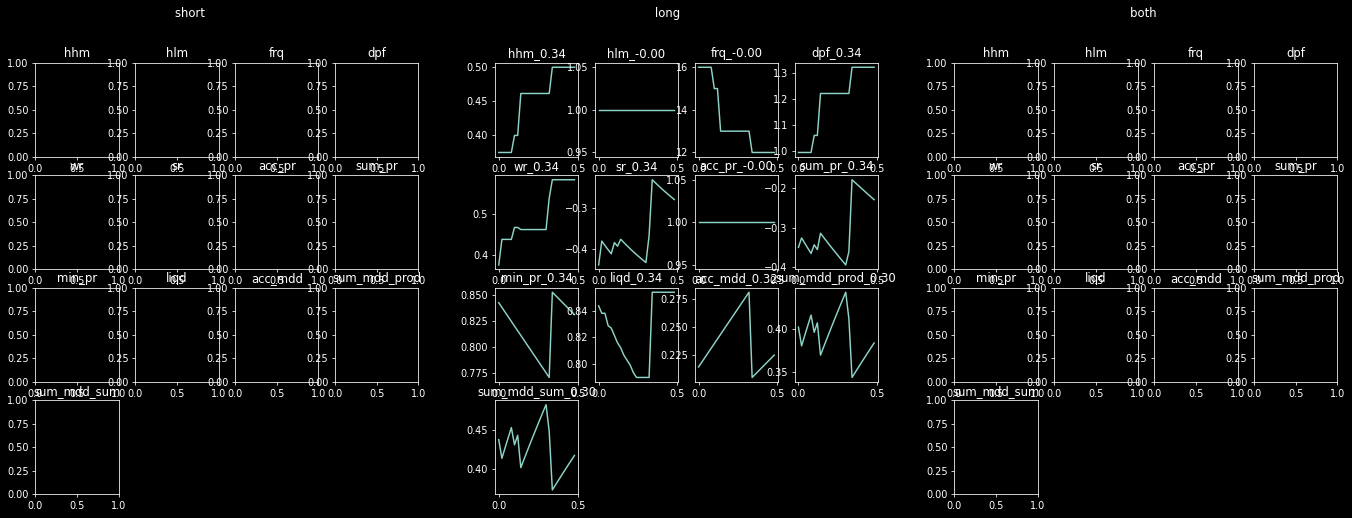

In [177]:
"""
1. 일단은 현재까지의 logic 은 short & long result 가 온전한 경우에 대해 정상적으로 돌아가도록 구성함.
"""

# ------------ survey param ------------ #
# itv_num_list = [1, 3, 5, 15]
# itv_list = ['15m', '30m', '1h', '4h']
# itv_list = ['3m', '5m', '15m', '30m', '1h', '4h']

# val_list = np.arange(0, 10, 0.5)     # prcn 1
val_list = np.arange(-0.0, 0.5, 0.02)  # prcn 2
# val_list = np.arange(-0.5, 0., 0.03)  # prcn 2
# val_list = np.arange(-0.5, -0.6, -0.005)    # prcn 3
# val_list = np.arange(0.944, 0.945, 0.0001)    # prcn 4
# val_list = np.arange(1, 10, 1)   # prcn -1
# val_list = np.arange(100, 120, 1)   # prcn -2
# val_list = talib.get_function_groups()['Pattern Recognition']

# ------------ get survey_res ------------ #
short_res_list, long_res_list, both_res_list = [], [], []
result = []
res_shape = (3, 12)  # short, long, both x data
config_list_copy = copy.deepcopy(config_list)
for set_val in val_list:
    # ------------ open 결정 이전의 인자값 ------------ #
    # ------ point * dur. ------ #
    # config_list_copy[0].loc_set.point1.wrr_32 = set_val
    # config_list_copy[0].loc_set.point1.candle_pattern = set_val
    # config_list_copy[0].loc_set.zone.degree_list = set_val
    # config_list_copy[0].loc_set.point2.wick_score_list = str([set_val])
    # config_list_copy[0].loc_set.zone.ir = set_val  
    # config_list_copy[0].loc_set.zone.abs_ratio = set_val

    # ------------ open 결정 이후의 인자값 ------------ #
    # ------ utils ------ #
    # config_list_copy[0].tr_set.tp_gap = set_val  
    # config_list_copy[0].tr_set.ep_gap1 = set_val 
    # config_list_copy[0].tr_set.ep_gap2 = set_val 
    config_list_copy[0].tr_set.out_gap = set_val  
    # config_list_copy[0].tr_set.wave_length1 = set_val  
    # config_list_copy[0].tr_set.wave_time_ratio1 = set_val

    # config_list_copy[0].tr_set.tp_gap = abs(set_val) - 0.5
    # config_list_copy[0].tr_set.out_gap = set_val + 0.5
    # config_list_copy[0].tr_set.wb_tp_gap = config_list_copy[0].tr_set.tp_gap
    # config_list_copy[0].tr_set.wb_out_gap = config_list_copy[0].tr_set.out_gap

    # ------ entry, exit (ep, tp, out vars.) ------ #
    # config_list_copy[0].tr_set.expire_k = set_val
    # config_list_copy[0].ep_set.expire_tick = set_val  

    for utils_, config_ in zip(utils_list, config_list_copy):
        enlist_tr(res_df, config_, np_timeidx)
        
    # open_info_df = get_open_info_df(ep_loc_v3, res_df, np_timeidx, id_list, config_list_copy, id_idx_list)   # point * mr_res 이기 때문에 utils_tr & rtc 의 영향을 충분히 받음
    open_info_df1 = get_open_info_df_v2(ep_loc_p1_v3, res_df, np_timeidx, id_list, config_list_copy, id_idx_list, open_num=1)  # --> point * dur. 관련 (loc_set) param 에 종속 (open_info 가 변경되는게 아니라면, 재실행할 필요없음)
    open_info_df2 = get_open_info_df_v2(ep_loc_p2_v3, res_df, np_timeidx, id_list, config_list_copy, id_idx_list, open_num=2)
    open_info_df_list = [open_info_df1, open_info_df2]

    # try:    
    short_res, long_res, both_res = get_res_v2(res_df, open_info_df_list, ohlc_list, config_list, np_timeidx, en_ex_pairing, funcs1, idep_plot_v16_5, funcs2, test_ratio=test_ratio, plot_is=plot_is, signi=True, show_detail=show_detail)
    short_res_list.append(short_res)
    long_res_list.append(long_res)
    both_res_list.append(both_res)
    # except Exception as e
    #   result.append(np.full(res_shape, np.nan))
    #   print("error in get_res() phase : {}".format(e))
    # pass
    
# survey_res_list = [np.array(result)[:, s_i::3] for s_i in range(3)]   # 3 for s, l, b
survey_res_list = [short_res_list, long_res_list, both_res_list]   # 3 for s, l, b
# short_res, long_res, both_res = survey_res_list

# ------------ plot survey_res ------------ #
title_list = ["short", "long", "both"]
sub_title_list = ['hhm', 'hlm', 'frq', 'dpf', 'wr', 'sr', 'acc_pr', 'sum_pr', 'min_pr', 'liqd', 'acc_mdd', 'sum_mdd_prod', 'sum_mdd_sum']
space_ = " " * 120

fig = plt.figure(figsize=(24, 8), dpi=70)
plt.style.use('dark_background')
gs = gridspec.GridSpec(nrows=1,
                        ncols=3,
                        # height_ratios=[1, 1, 1]
                      )

sub_rows, sub_cols, sub_height_ratio = 4, 4, [1, 1, 1, 1]

for d_idx, (title_name, survey_res) in enumerate(zip(title_list, survey_res_list)):  
    inner_gs = gs[d_idx].subgridspec(nrows=sub_rows,
                        ncols=sub_cols,
                        height_ratios=sub_height_ratio
                      )
            
    for in_idx, (data_, sub_title) in enumerate(zip(np.array(survey_res).T, sub_title_list)):
        plt.subplot(inner_gs[in_idx])
        data = data_.ravel()                
        valid_idx = ~pd.isnull(data)
        if np.sum(valid_idx) > 0:
            if type(val_list[0]) == str:
                x, y = np.arange(len(val_list))[valid_idx], data[valid_idx]
            else:
                x, y = val_list[valid_idx], data[valid_idx]
            plt.plot(x, y)  # 앞에서부터 len(result) 만큼만    
            plt.title(sub_title + '_{:.2f}'.format(x[np.argmax(y)]))
        else:
            plt.title(sub_title)

plt.suptitle(space_.join(title_list))
plt.show()
# print("\n")

#### tpg & outg survey

127
66
127
66
127
66
127
66
pkx : [0.07927269 0.28155426 0.45745128 0.69491226]
pkx : [0.06542424 0.14355807 0.33107926 0.47172015 0.59673428]

31
11
31
11
31
11
31
11
pkx : [-0.52822312 -0.43505711 -0.34737146 -0.21584299 -0.05691274]


D:\Projects\System_Trading\JnQ\funcs\public\idep.py:790: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(pkx, pky, 'bo', color='yellow')


pkx : [-0.39412162 -0.28969416 -0.09507936]



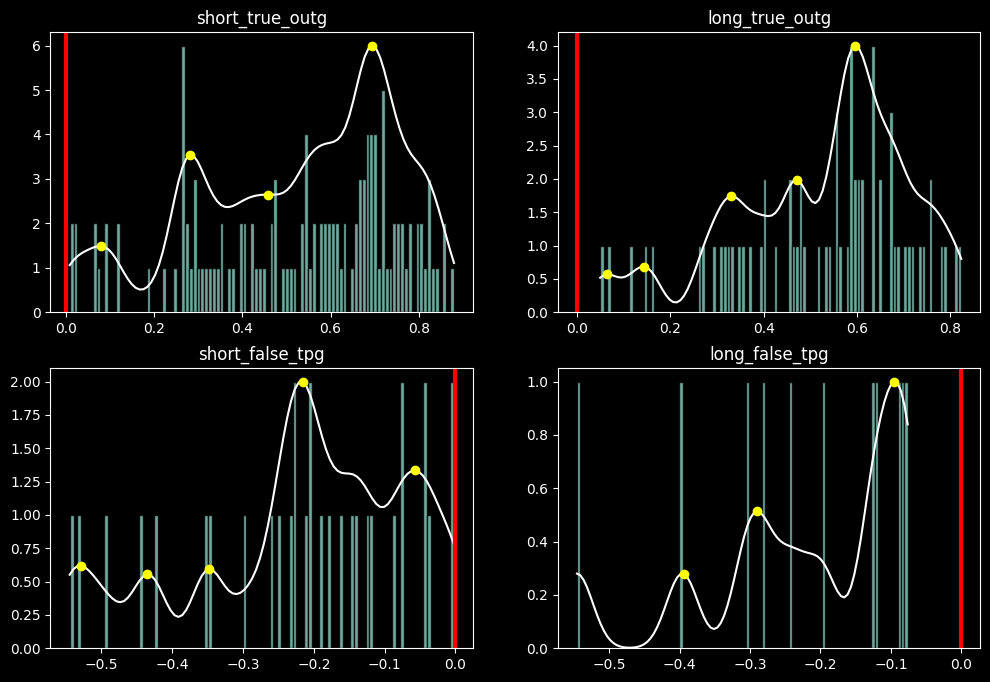

In [22]:
# 1. outg 는 partial 을 위한 histogram 작성 진행
# 현재, outg 내부에는 tp 한것과 out 한것이 공존하는 상태
titles = ['outg', 'tpg']
short_max_datas = [short_max_outg[short_bias_arr], short_max_tpg]
long_max_datas = [long_max_outg[long_bias_arr], long_max_tpg]

# titles = ['tpg']
# short_max_datas = [short_max_tpg]
# long_max_datas = [long_max_tpg]

plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(12, 8))
nrows, ncols = 2, 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols
                        )
  
for ings_idx, (title, short_max_data, long_max_data) in enumerate(zip(titles, short_max_datas, long_max_datas)):

  inner_gs = gs[ings_idx].subgridspec(nrows=1, ncols=2)
  if ings_idx == 0:
    axvline = current_outg
    title_add = 'true_' + title
  else:
    axvline = current_tpg
    title_add = 'false_' + title

  print(len(short_max_data))
  print(len(long_max_data))

  short_plot_idx = np.ones_like(short_max_data).astype(bool)
  long_plot_idx = np.ones_like(long_max_data).astype(bool)
  # short_plot_idx = short_max_data <= axvline
  # long_plot_idx = long_max_data <= axvline

  print(np.sum(short_plot_idx))
  print(np.sum(long_plot_idx))    

  short_plot_idx *= ~np.isnan(short_max_data)
  long_plot_idx *= ~np.isnan(long_max_data)  # nan 과 inf 때문에 이 방식 채택

  print(np.sum(short_plot_idx))
  print(np.sum(long_plot_idx))

  short_plot_idx *= ~np.isinf(short_max_data)
  long_plot_idx *= ~np.isinf(long_max_data)  # nan 과 inf 때문에 이 방식 채택
  
  print(np.sum(short_plot_idx))
  print(np.sum(long_plot_idx))
    
  plt.subplot(inner_gs[0])
  kde_plot_v2(*np.unique(short_max_data[short_plot_idx], return_counts=True))
  plt.title('short_' + title_add)  
  plt.axvline(axvline, color='red', linewidth=3)

  plt.subplot(inner_gs[1])
  kde_plot_v2(*np.unique(long_max_data[long_plot_idx], return_counts=True))
  plt.title('long_' + title_add)
  plt.axvline(axvline, color='red', linewidth=3)

  print()

# plt.suptitle(title)
plt.show()

#### legacy

##### cci updown

In [ ]:
htf_df = to_htf(res_df, '30T', offset='9h')
htf_df = cci_v2(htf_df, period=20, smooth=None, itv=None)

In [ ]:
cci_updown = htf_df.cci_30T20 < htf_df.cci_30T20.shift(-1)

# 1. 특정 조건에 대한 updown 확률을 구해라.
# 2. valid_idx & incondition_idx's "true / len(idx)" = precision
incondition_idx = htf_df.cci_30T20 > htf_df.cci_30T20.shift(1)

valid_idx = ~(pd.isnull(htf_df.cci_30T20.shift(-1)) | pd.isnull(htf_df.cci_30T20) | pd.isnull(htf_df.cci_30T20.shift(1)))

def get_odds(gt_series):
    return np.sum(gt_series) / len(gt_series)

# cci_updown[valid_idx & incondition_idx]
print("original odds : {}".format(get_odds(cci_updown[valid_idx])))
print("incondition odds : {}".format(get_odds(cci_updown[valid_idx & incondition_idx])))

##### outg survey for precision (eploc vars. dependency)

In [ ]:
# ------------ dependent vars. ------------ #
# res_df 에 존재하는 col 는 모두 사용가능함
# ------ 1. 도출한 outg 와 vars. pairing 진행 (by valid_idx) ------ #
devided_cols = ['tr_{}'.format(strat_version)]  # , 'ir_5T'
public_cols = ['wave_body_ratio']  # 'abs_ratio_5T', 'rel_ratio_5T', 'body_rel_ratio_5T'

short_datas = [res_df['short_' + col].to_numpy() for col in devided_cols] + [res_df[col].to_numpy() for col in public_cols]
long_datas = [res_df['long_' + col].to_numpy() for col in devided_cols] + [res_df[col].to_numpy() for col in public_cols]

titles = devided_cols + public_cols

In [ ]:
plot_outg_range = (-1, 10)
plot_data_range = (-10, 100)

plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(12, 18))
nrows, ncols = len(short_datas), 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols
                        )

for ings_idx, (title, short_data, long_data) in enumerate(zip(titles, short_datas, long_datas)):
  inner_gs = gs[ings_idx].subgridspec(nrows=1, ncols=2)

  print(len(long_max_outg))

  short_plot_idx = (plot_outg_range[0] <= short_max_outg) & (short_max_outg <= plot_outg_range[1])
  long_plot_idx = (plot_outg_range[0] <= long_max_outg) & (long_max_outg <= plot_outg_range[1])  # nan 과 inf 때문에 이 방식 채택

  print(np.sum(long_plot_idx))

  short_open_data = short_data[short_open_idx]
  long_open_data = long_data[long_open_idx]
  
  short_plot_idx *= (plot_data_range[0] <= short_open_data) * (short_open_data <= plot_data_range[1])
  long_plot_idx *= (plot_data_range[0] <= long_open_data) * (long_open_data <= plot_data_range[1]) # nan 과 inf 때문에 이 방식 채택

  short_plot_idx *= ~np.isnan(short_open_data)
  long_plot_idx *= ~np.isnan(long_open_data)  # nan 과 inf 때문에 이 방식 채택

  print(np.sum(long_plot_idx))

  short_plot_idx *= ~np.isinf(short_open_data)
  long_plot_idx *= ~np.isinf(long_open_data)  # nan 과 inf 때문에 이 방식 채택

  print(np.sum(long_plot_idx))

  short_true_idx = short_plot_idx * short_true_open_idxth
  long_true_idx = long_plot_idx * long_true_open_idxth
  
  short_false_idx = short_plot_idx * ~short_true_open_idxth
  long_false_idx = long_plot_idx * ~long_true_open_idxth

  plt.subplot(inner_gs[0])
  # ------ true_bias ------ #
  x, y = short_max_outg[short_true_idx].ravel(), short_open_data[short_true_idx].ravel()  
  plt.scatter(x, y, color='white', alpha=0.5)
  # ------ false_bias ------ #
  x, y = short_max_outg[short_false_idx].ravel(), short_open_data[short_false_idx].ravel()
  plt.scatter(x, y, color='fuchsia', alpha=0.3)
  plt.axvline(current_outg, color='red', linewidth=3)
  plt.title("{} coef : {:0.3f}".format(title, np.corrcoef(-x, y)[0, 1]))

  plt.subplot(inner_gs[1])    
  # ------ true_bias ------ #
  x, y = long_max_outg[long_true_idx].ravel(), long_open_data[long_true_idx].ravel()  
  plt.scatter(x, y, color='white', alpha=0.5)
  # ------ false_bias ------ #
  x, y = long_max_outg[long_false_idx].ravel(), long_open_data[long_false_idx].ravel()
  plt.scatter(x, y, color='fuchsia', alpha=0.3)
  plt.axvline(current_outg, color='red', linewidth=3)
  plt.title("{} coef : {:0.3f}".format(title, np.corrcoef(-x, y)[0, 1]))

  print()  

# plt.suptitle(title)
plt.show()
# print()

#### olds

### Backtrader validation

In [93]:
trade_log_dir_path = "wave_cci_Stock_wrr32_spread"
trade_log_name = "1677969749.pkl"

with open(os.path.join("Bank/logs/trade_log", trade_log_dir_path, trade_log_name), 'rb') as f:
  trade_log = pickle.load(f)

trade_log  # both pos_side's log

[{'open': ['2023-02-28 10:37:00', 'BUY'],
  'entry': ['2023-02-28 10:37:00', 'BUY', 21600],
  'exit': ['2023-02-28 10:55:00', 'BUY', [22100]]},
 {'open': ['2023-03-02 11:23:00', 'BUY'],
  'entry': ['2023-03-02 11:23:00', 'BUY', 22200],
  'exit': ['2023-03-02 11:27:00', 'BUY', [22600]]},
 {'open': ['2023-03-02 12:38:00', 'BUY'],
  'entry': ['2023-03-02 12:38:00', 'BUY', 23200],
  'exit': ['2023-03-03 09:02:00', 'BUY', [25100]]}]

In [94]:
"""
missed_data : Bank 에 missed 된 data.
"""

pos_side = "BUY" # BUY SELL
val_obj = short_obj if pos_side == "SELL" else long_obj

idep_log = []
bank_log = []

data_name = ["open", "entry", "exit", "entry", "exit"]

# 1. idep log
idep_log.append(list(map(lambda x : str(x), res_df.index[val_obj[4].astype(int).ravel()])))
idep_log.append(list(map(lambda x : str(x), res_df.index[val_obj[2].astype(int).ravel()])))
idep_log.append(list(map(lambda x : str(x), res_df.index[val_obj[3].astype(int).ravel()])))
idep_log.append(val_obj[0].ravel())
idep_log.append(val_obj[1].ravel())

# 2. bank log
bank_log.append([log["open"][0] for log in trade_log if log["open"][1] == pos_side])
bank_log.append([log["entry"][0] for log in trade_log if log["entry"][1] == pos_side])
bank_log.append([log["exit"][0] for log in trade_log if log["exit"][1] == pos_side])
bank_log.append([log["entry"][2] for log in trade_log if log["entry"][1] == pos_side])
bank_log.append([log["exit"][2] for log in trade_log if log["exit"][1] == pos_side])

for name, idep_res, bank_res in zip(data_name, idep_log, bank_log):
    
    missed_data = [data for data in idep_res if not data in bank_res]
    over_data = [data for data in bank_res if not data in idep_res]

    print("{}_missed_data :".format(name), missed_data)
    print("{}_over_data :".format(name), over_data)
    print()


open_missed_data : []
open_over_data : []

entry_missed_data : ['2023-02-28 10:40:00', '2023-03-02 11:24:00', '2023-03-02 12:39:00']
entry_over_data : ['2023-02-28 10:37:00', '2023-03-02 11:23:00', '2023-03-02 12:38:00']

exit_missed_data : ['2023-02-28 10:54:00']
exit_over_data : ['2023-02-28 10:55:00']

entry_missed_data : [21580.0, 22150.0, 23150.0]
entry_over_data : [21600, 22200, 23200]

exit_missed_data : [22000.0, 22500.0, 25000.0]
exit_over_data : [[22100], [22600], [25100]]



### method override

#### get_res

In [79]:
def get_res_v2(res_df, open_info_df_list, ohlc_list, config_list, np_timeidx, en_ex_pairing, funcs1, idep_plot, funcs2, inversion=False, test_ratio=0.3, plot_is=True, signi=False, show_detail=False):
    
    """
    v1 -> v2
    1. en_ex_pairing, idep_plot 에 필요한 funcs 를 분리함, funcs1, funcs2
    """

    # ------------ make open_info_list ------------ #
    open_idx1, open_idx2 = [open_info_df.index.to_numpy() for open_info_df in open_info_df_list]
    len_df = len(res_df)

    sample_len = int(len_df * (1 - test_ratio))
    sample_idx1 = (open_idx1 < sample_len) == plot_is  # in / out sample plot 여부
    sample_open_idx1 = open_idx1[sample_idx1]
    
    sample_idx2 = (open_idx2 < sample_len) == plot_is  # in / out sample plot 여부

    # ------------ open_info_list 기준 = p1 ------------ #
    sample_open_info_df1, sample_open_info_df2 = [df_[idx_] for df_, idx_ in zip(open_info_df_list, [sample_idx1, sample_idx2])]
    open_info1 = [sample_open_info_df1[col_].to_numpy() for col_ in sample_open_info_df1.columns]

    if config_list[0].tr_set.check_hlm in [0, 1]:  # 여기서 open_info 자동화하더라도, utils info 는 직접 실행해주어야함
        sample_open_idx2 = sample_open_idx1
        open_info2 = open_info1
    else:
        sample_open_idx2 = open_idx2[sample_idx2]
        open_info2 = [sample_open_info_df2[col_].to_numpy() for col_ in sample_open_info_df2.columns]

    # ------------ get paired_res ------------ #
    start_0 = time.time()
    paired_res = en_ex_pairing(res_df, [sample_open_idx1, sample_open_idx2], [open_info1, open_info2], ohlc_list, config_list, np_timeidx, funcs1, show_detail)
    # net_p1_idx_arr, p1_idx_arr, p2_idx_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr, tr_arr = paired_res    
    # print(pair_price_arr)
    print("en_ex_pairing elapsed time :", time.time() - start_0)  # 0.37 --> 0.3660471439361572 --> 0.21(lesser if)

    # ------------ idep_plot ------------ #
    start_0 = time.time()
    high, low = ohlc_list[1:3]
    res = idep_plot(res_df, len_df, config_list[0], high, low, sample_open_info_df1, paired_res, funcs2, inversion=inversion, sample_ratio=1 - test_ratio, signi=signi)
    print("idep_plot elapsed time :", time.time() - start_0)  # 1.40452 (v6) 1.4311 (v5)

    return res

#### get_open_info_df

In [82]:
def get_open_info_df_v2(ep_loc_v2, res_df, np_timeidx, id_list, config_list, id_idx_list, open_num=1):
    
    """
    v1 -> v2
        1. <U32 dtype 으로 인한 memory allocate error 에 대응하기 위해 zone, side value 를 integer 기준으로 수정함.
    """
    start_0 = time.time()
    # ------ get mr_res, zone_arr ------ #
    short_mr_res_obj = np.array([ep_loc_v2(res_df, config_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL) for config_ in config_list])
    long_mr_res_obj = np.array([ep_loc_v2(res_df, config_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.BUY) for config_ in config_list])
    short_open_idx_list = [np.where(res_df['short_open{}_{}'.format(open_num, id)].to_numpy() * mr_res)[0] for id, mr_res in zip(id_list, short_mr_res_obj[:, 0])]   # "point * mr_Res"
    long_open_idx_list = [np.where(res_df['long_open{}_{}'.format(open_num, id)].to_numpy() * mr_res)[0] for id, mr_res in zip(id_list, long_mr_res_obj[:, 0])]  # zip 으로 zone (str) 과 묶어서 dtype 변경됨
    print("~ ep_loc_v2 elapsed time :", time.time() - start_0)

    # ------ open_info_arr ------ #
    short_side_list = [np.full(len(list_), -1) for list_ in short_open_idx_list]
    long_side_list = [np.full(len(list_), 1) for list_ in long_open_idx_list]

    short_zone_list = [zone_res[short_open_idx] for zone_res, short_open_idx in zip(short_mr_res_obj[:, 1], short_open_idx_list)]
    long_zone_list = [zone_res[long_open_idx] for zone_res, long_open_idx in zip(long_mr_res_obj[:, 1], long_open_idx_list)]

    short_id_list = [np.full(len(list_), id) for id, list_ in zip(id_list, short_open_idx_list)]
    long_id_list = [np.full(len(list_), id) for id, list_ in zip(id_list, long_open_idx_list)]

    selected_id_idx = np.arange(len(id_idx_list))
    short_id_idx_list = [np.full(len(list_), id) for id, list_ in zip(selected_id_idx, short_open_idx_list)]
    long_id_idx_list = [np.full(len(list_), id) for id, list_ in zip(selected_id_idx, long_open_idx_list)]

    # ------ get open_info_df ------ #
    #   series 만들어서 short / long 끼리 합치고 둘이 합치고, 중복은 우선 순위 정해서 제거
    short_open_df_list = [pd.DataFrame(index=index_, data=np.vstack((data_)).T, columns=['side', 'zone', 'id', 'id_idx']) for index_, data_ in zip(short_open_idx_list, zip(short_side_list, short_zone_list, short_id_list, short_id_idx_list))]
    long_open_df_list = [pd.DataFrame(index=index_, data=np.vstack((data_)).T, columns=['side', 'zone', 'id', 'id_idx']) for index_, data_ in zip(long_open_idx_list, zip(long_side_list, long_zone_list, long_id_list, long_id_idx_list))]

    open_info_df = pd.concat(short_open_df_list + long_open_df_list)
    # ------ sorting + unique ------ #
    open_info_df.sort_index(inplace=True)
    # print(len(open_info_df))
    # print(len(open_info_df))
    # open_info_df.head()
    print("~ get_open_info_df elapsed time :", time.time() - start_0)
    return open_info_df[~open_info_df.index.duplicated(keep='first')]  # 먼저 순서를 우선으로 지정  

#### en_ex_pairing

In [83]:
def en_ex_pairing_v9_44(res_df, open_idx_list, open_info_list, ohlc_list, config_list, np_timeidx, funcs, show_detail=False):  # 이미 충분히 줄여놓은 idx 임

    """
    v9_43 -> v9_44
        1. 내부 version 관리 함수들을 모두 외부 참조로 구성함
            a. version 에 가변적으로 대응하기 위함임.
        2. liqd_p 기능 도입함.        
        3. p2_tr_set_idx 직접 지정하도록 구성함.
        4. integer type 으로 수정된 side_arr 를 수용하기 위해 코드 변경 진행함.
    """

    open_info1, open_info2 = open_info_list
    side_arr1, _, _, id_idx_arr1 = open_info1
    side_arr2, _, _, _ = open_info2

    expiry_p1p2, expiry, lvrg_set, check_entry, check_signal_out, check_hl_out, check_limit_tp_exec = funcs

    net_p1_idx_list, p1_idx_list, p2_idx_list, pair_idx_list, pair_price_list, lvrg_list, fee_list, tpout_list, tr_list = [[] for li in range(9)]
    len_df = len(res_df)

    open, high, low, close = ohlc_list

    open_idx1, open_idx2 = open_idx_list
    len_open_idx1 = len(open_idx1)
    len_open_idx2 = len(open_idx2)
    i, open_i1, open_i2 = 0, -1, -1  # i for total_res_df indexing

    while 1:
        
        # ------------ p1 phase ------------ #

        # Todo,
        #   1. (갱신) p1's open_i + 1 과 op_idx 를 꺼내오는 건, eik1 또는 tp 체결의 경우만 해당됨,
        #   2. out 의 경우 p2's op_idx 기준으로 retry 필요
        #     a. 또한, p2's op_idx > p1's op_idx

        # ------ 1. get p1_info ------ #
        # if eik1 or tp_done or first loop:
        open_i1 += 1  # 확인 끝났으면 조기 이탈(+1), 다음 open_idx 조사 진행
        if open_i1 >= len_open_idx1:
            break

        if show_detail:
            print("open_i1 : {}, side_arr1 : {}".format(open_i1, side_arr1[open_i1]))

        op_idx1 = open_idx1[open_i1]  # open_i1 는 i 와 별개로 운영
        if op_idx1 < i:  # i = 이전 거래 끝난후의 res_df index - "거래 종료후 거래 시작", '<' : 거래 종료시점 진입 가능하다는 의미
            continue

        # ------ 2. set loop index i ------ #
        i = op_idx1  # + 1 --> op_idx1 = op_idx2 가능함 # open_signal 이 close_bar.shift(1) 이라고 가정하고 다음 bar 부터 체결확인한다는 의미
        if i >= len_df:  # res_df 의 last_index 까지 돌아야함
            break

        # ------ 3. get open info ------ #
        #            a. ID 별로 수행하기 위해 selection_id, config 호출함.
        open_side_num = side_arr1[open_i1]
        id_idx = id_idx_arr1.astype(int)[open_i1]  # indexing 을 위해 integer 로 변환.
        config = config_list[id_idx]
        selection_id = config.selection_id
        check_hlm = config.tr_set.check_hlm

        open_side = OrderSide.SELL if open_side_num == -1 else OrderSide.BUY
        side_pos = 'short' if open_side == OrderSide.SELL else 'long'  # utils paper 접근을 위한 long / short string.
        if show_detail:
            print("------------ op_idx1 : {} {} ------------".format(op_idx1, open_side))

        # if show_detail:
        #   print("check_hlm :", check_hlm)

        
        # ------ 4. load util paper data ------ #        
        """ 
        tr_set_idx initialize.
            1. j 를 둔 이유는 본래 dynamic_tp / out 을 가능케 하기 위함이였음.
                a. exec_j : open 체결 index
                b. ep_j : entry_price 기준 index
                c. tp_j : tp_price 기준 index
                d. out_j : out_price 기준 index
        """
        ep_j, tp_j, out_j = op_idx1, op_idx1, op_idx1  # tr_set p1, p2 에 가변적으로 기준할 수 있도록 구성함.        
        p1_tr_set_idx = (ep_j, tp_j, out_j)
        
        tp_arr = res_df['{}_tp_{}'.format(side_pos, selection_id)].to_numpy()
        ep1_arr = res_df['{}_ep1_{}'.format(side_pos, selection_id)].to_numpy()
        ep2_arr = res_df['{}_ep2_{}'.format(side_pos, selection_id)].to_numpy()
        out_arr = res_df['{}_out_{}'.format(side_pos, selection_id)].to_numpy()

        tr_arr = res_df['{}_tr_{}'.format(side_pos, selection_id)].to_numpy()  # just for p1_hhm

        tp_1_ = res_df['{}_tp_1_{}'.format(side_pos, selection_id)].to_numpy()[tp_j]  # for p2_box location & p1's exipiry
        tp_0_ = res_df['{}_tp_0_{}'.format(side_pos, selection_id)].to_numpy()[tp_j]
        tp_gap_ = res_df['{}_tp_gap_{}'.format(side_pos, selection_id)].to_numpy()[tp_j]        
        
        # if not check_net_hhm:  # this phase exist for p1 entry (net hhm sync.) in p2_platform
        exec_j, entry_done, en_p, fee = check_entry(res_df, config, config.ep_set.entry_type, op_idx1, p1_tr_set_idx, len_df, open_side, [*ohlc_list, ep1_arr], expiry)
        
        i = exec_j  # = entry_loop 를 돌고 나온 e_j
        if not entry_done:
            if show_detail:
                print("p1's expiry : continue")
            continue
            # else:
        #   tp_j = op_idx1

        
        prev_open_i2 = open_i2
        net_p1_idx_list.append(op_idx1)
        # if check_hlm in [0, 1]:
        #   i = op_idx1  # allow op_idx2 = op_idx1
        allow_exit = 1
        
        while 1:
            # ------------ p2 phase ------------ #

            # ------ 1. get p2_info ------ #
            if check_hlm in [1, 2]:
                open_i2 += 1  # 확인 끝났으면 조기 이탈(+1), 다음 open_idx 조사 진행
                if open_i2 >= len_open_idx2:  # open_i2 소진
                    if show_detail:
                        print("open_i2 >= len_open_idx2, open_i2 소진 : break")
                    break

                # ------ check side sync. ------ #
                if side_arr1[open_i1] != side_arr2[open_i2]:                
                    if show_detail:
                        print("side check rejection, open_i2 {}, side_arr2 {}".format(open_i2, side_arr2[open_i2]))
                    continue

                # ------ assert, op_idx2 >= exec_j ------ #
                op_idx2 = open_idx2[open_i2]  # open_i2 는 i 와 별개로 운영
                if check_hlm == 1 and allow_exit:
                    if op_idx2 < op_idx1:                        
                        if show_detail:
                            print("check_hlm 1's allow_exit rejection, op_idx2 {} < op_idx1 {}".format(op_idx2, op_idx1))
                        continue
                else:
                    if op_idx2 < i:  # p1 execution 이후의 i 를 허용 (old, 이곳 i = op_idx1 + 1 or p2's exec_j or exit_loop's i + 1)
                        if show_detail:
                            print("op_idx2 {} < i {} : continue".format(op_idx2, i))
                        continue

                if check_hlm == 2:
                    i = op_idx2 + 1  # open_signal 이 close_bar.shift(1) 이라고 가정하고 다음 bar 부터 체결확인한다는 의미
                    if i >= len_df:  # res_df 의 last_index 까지 돌아야함
                        break

                if show_detail:
                    print("op_idx1 : {} op_idx2 : {}".format(op_idx1, op_idx2))

            else:
                op_idx2 = op_idx1
                
            # ------ 2. load util paper data for p2  ------ #   
            ep_j, tp_j, out_j = op_idx1, op_idx1, op_idx1
            p2_tr_set_idx = (ep_j, tp_j, out_j)
            
            ep2_ = ep2_arr[ep_j]
            tp_ = tp_arr[tp_j]
            out_ = out_arr[out_j]      
        
            out_1_ = res_df['{}_out_1_{}'.format(side_pos, selection_id)].to_numpy()[out_j]
            out_0_ = res_df['{}_out_0_{}'.format(side_pos, selection_id)].to_numpy()[out_j]
            out_gap_ = res_df['{}_out_gap_{}'.format(side_pos, selection_id)].to_numpy()[out_j]

            # ------ const. for p2_wave ------ #
            wave_itv1 = config.tr_set.wave_itv1
            wave_period1 = config.tr_set.wave_period1
            wave_itv2 = config.tr_set.wave_itv2
            wave_period2 = config.tr_set.wave_period2

            
            if check_hlm in [1, 2]:
                
                # ------ check p1's expiry ------ # - p2_box 생성 이전의 hl_survey
                # 1. op_idx1 ~ op_idx2 까지의 expiry check (high & low 둘다)
                #     a. if check_hlm:  # p1_hlm, p2_hlm --> Todo, 이거를 왜 p1_hlm 에도 적용했는지 잘 모르겠음
                if op_idx1 < op_idx2:
                    expire, touch_idx = expiry_p1p2(res_df, config, op_idx1, op_idx2, tp_1_, tp_0_, tp_gap_, ohlc_list[1:3], open_side)
                    if expire:  # p1's expiry
                        if show_detail:
                            print("expiry_p1p2, touch_idx = {} : break".format(touch_idx))
                        i = touch_idx  # + 1  --> 이거 아닌것 같음 # op_idx1 과 op_idx2 사이의 op_idx1' 을 살리기 위함, 즉 바로 다음 op_idx1 로 회귀 (건너뛰지 않고)
                        open_i2 = prev_open_i2
                        break  # change op_idx1

                if check_hlm == 2:
                    
                    """
                    p2 point_validation - vectorization unavailable
                        1. p2 로 wave_unit 을 사용할 경우만, p2 wave_validation & wave_box location 사용할 것.
                        2. p1_loop 로 return 되는 정확한 i 를 반환하기 위해서 expiry_p1p2 뒤에 배치함
                        3. Todo - 새로운 tp, ep, out 에 대한 처리 필요 (p1_hlm 사용시)                        
                    """                    
                    
                    # ------ p2_wave validation : 정확한 뜻을 아직 잘 모르겠음. ------ #
#                     if open_side == OrderSide.SELL:                        
#                         wave_co_post_idx = res_df['wave_co_post_idx_fill_{}{}'.format(wave_itv2, wave_period2)].to_numpy()[op_idx2]
#                         if not (op_idx1 < wave_co_post_idx):
#                             if show_detail:
#                                 print("p2_wave validation : continue")
#                             continue  # change op_idx2
                        
#                         # --- p2_wave high validation --- #
#                         # wave_high_fill1_ = res_df['wave_high_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()[op_idx1]
#                         # wave_high_fill2_ = res_df['wave_high_fill_{}{}'.format(wave_itv2, wave_period2)].to_numpy()[op_idx2]
#                         # if not (wave_high_fill1_ >= wave_high_fill2_):
#                         #   if show_detail:
#                         #     print("p2_wave high validation : continue")
#                         #   continue  # change op_idx2
                        
#                     else:
#                         wave_cu_post_idx = res_df['wave_cu_post_idx_fill_{}{}'.format(wave_itv2, wave_period2)].to_numpy()[op_idx2]
#                         if not (op_idx1 < wave_cu_post_idx):
#                             if show_detail:
#                                 print("p2_wave validation : continue")
#                             continue  # change op_idx2
                            
#                         # --- p2_wave low validation --- #
#                         # wave_low_fill1_ = res_df['wave_low_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()[op_idx1]
#                         # wave_low_fill2_ = res_df['wave_low_fill_{}{}'.format(wave_itv2, wave_period2)].to_numpy()[op_idx2]
#                         # if not (wave_low_fill1_ <= wave_low_fill2_):
#                         #   if show_detail:
#                         #     print("p2_wave low validation : continue")
#                         #   continue  # change op_idx2
                        
#                     # ------ p2 wave_box location ------ #
#                     if open_side == OrderSide.SELL:
#                         if not ((tp_1_ + tp_gap_ * config.tr_set.p2_box_k1 <= out_1_) and (
#                                 out_0_ <= tp_0_ - tp_gap_ * config.tr_set.p2_box_k2)):  # tp1, tp0 에 닿으면 expiry
#                             # if not ((tp_1_ + tp_gap_ * config.tr_set.p2_box_k1 >= out_1_) and (out_0_ <= tp_0_ - tp_gap_ * config.tr_set.p2_box_k2)):  # tp1, tp0 에 닿으면 expiry
#                             if show_detail:
#                                 print("p2_box rejection : continue")
#                             continue
#                     else:
#                         if not ((tp_1_ - tp_gap_ * config.tr_set.p2_box_k1 >= out_1_) and (out_0_ >= tp_0_ + tp_gap_ * config.tr_set.p2_box_k2)):
#                             # if not ((tp_1_ - tp_gap_ * config.tr_set.p2_box_k1 <= out_1_) and (out_0_ >= tp_0_ + tp_gap_ * config.tr_set.p2_box_k2)):
#                             if show_detail:
#                                 print("p2_box rejection : continue")
#                             continue
                    
                    # ------ tr_set validation & reject hl_out open_exec. ------ #
                    if open_side == OrderSide.SELL:
                        if not (tp_ < ep2_):
                            break  # change op_idx1
                        elif not (ep2_ < out_ and close[op_idx2] < out_):
                            if show_detail:
                                print("p2 tr_set validation : continue")
                            continue  # change op_idx2     
                    else:
                        if not (tp_ > ep2_):
                            break
                        elif not (ep2_ > out_ and close[op_idx2] > out_):
                            if show_detail:
                                print("p2 tr_set validation : continue")
                            continue
                            
                    # ------ p1p2_low ------ #
                    if open_side == OrderSide.SELL:
                        if not high[op_idx1:op_idx2 + 1].max() < tp_0_ - tp_gap_ * config.tr_set.p1p2_low:
                            if show_detail:
                                print("p1p2_low rejection : continue")
                            continue
                    else:
                        if not low[op_idx1:op_idx2 + 1].min() > tp_0_ + tp_gap_ * config.tr_set.p1p2_low:
                            if show_detail:
                                print("p1p2_low rejection : continue")
                            continue

                    # ------ check p2's expiry ------ # - 현재, op_idx2 기준의 ep2_arr 을 사용 중임.
                    """
                    Caution : tr_set_idx 상황에 따라 잘 확인할 것
                    """
                    exec_j, entry_done, en_p, fee = check_entry(res_df, config, config.ep_set.point2.entry_type,
                                                                                     op_idx2, p2_tr_set_idx, len_df, open_side,
                                                                                     [*ohlc_list, ep2_arr], expiry)
                    i = exec_j  # = entry_loop 를 돌고 나온 e_j
                    if not entry_done:  # p2's expiry
                        if show_detail:
                            print("expiry, i = {} at p2's : continue".format(i))
                        continue  # change op_idx2

                        
                    # ------ devectorized tr_calc ------ #
                    #    1. en_p 에 대해 하는게 맞을 것으로봄
                    #    2. tr_thresh 와 무관하게 있어야할 phase.
                    #    Todo, fee 계산에 오류가 있는 걸로 보임 => limit_fee 를 앞에 더해주어야할 것.
                    if open_side == OrderSide.SELL:
                        tr_ = abs((en_p / tp_ - config.trader_set.limit_fee - 1) / (en_p / out_ - config.trader_set.market_fee - 1))
                    else:
                        tr_ = abs((tp_ / en_p - config.trader_set.limit_fee - 1) / (out_ / en_p - config.trader_set.market_fee - 1))

                        
                    # ------ tr_threshold ------ #
                    if config.loc_set.point2.short_tr_thresh != "None":
                        if open_side == OrderSide.SELL:
                            if tr_ < config.loc_set.point2.short_tr_thresh:
                                if show_detail:
                                    print("tr_threshold : continue")
                                continue
                        else:
                            if tr_ < config.loc_set.point2.long_tr_thresh:
                                if show_detail:
                                    print("tr_threshold : continue")
                                continue

            # 1. allow_exit = "p1_hlm 의 경우, 한번 out 되면 price 가 "wave_range 에 닿기전까지" retrade 를 허용하지 않음" (expiry_p1p2 을 이용해 op_idx1 을 변경할 것)
            #     a. while phase 내부에 if not allow_exit 을 위치한 이유 : "wave_range 에 닿기전까지" 를 구현하기 위해서.
            if not allow_exit:
                if show_detail:
                    print("allow_exit = {} : continue".format(allow_exit))
                continue

            if check_hlm in [0, 1]:
                tr_ = tr_arr[op_idx1]

            # ------ leverage ------ #
            # out = out_arr[out_j]  # lvrg_set use out on out_j (out_j shoud be based on p2)
            leverage, liqd_p = lvrg_set(res_df, config, open_side, en_p, out_, fee)  # res_df 변수 사용됨 - 주석 처리 된 상태일뿐
            
            if leverage is None:
                if show_detail:
                    print("leverage is None : continue")
                if check_hlm:
                    continue  # change op_idx2
                else:
                    break  # change op_idx1                

            # ------------ exit phase ------------ #
            exit_done, cross_on = 0, 0
            
            # ------ check tpout_onexec ------ #
            if config.ep_set.entry_type == "LIMIT":
                if config.tp_set.tp_onexec:
                    tp_j = exec_j
                if config.out_set.out_onexec:
                    out_j = exec_j

            while 1:                
                # dynamic tp / out 을 사용하고 싶은 경우
                if not config.tp_set.static_tp:
                    tp_j = i
                if not config.out_set.static_out:
                    out_j = i

                # ------------ 1. out ------------ #  # out 우선 (보수적 검증)
                    # ------ a. signal_out ------ #
                if not exit_done:
                    exit_done, cross_on, ex_p, fee = check_signal_out(res_df, config, open_i2, i, len_df, fee, open_side, cross_on, exit_done, [*ohlc_list, np_timeidx])
                    # ------ b. hl_out ------ #
                if config.out_set.hl_out:
                    if not exit_done:  # and i != len_df - 1:
                        exit_done, ex_p, fee = check_hl_out(config, i, out_j, len_df, fee, open_side, exit_done, [*ohlc_list, out_arr, liqd_p])

                # ------------ 2. tp ------------ #
                if not config.tp_set.non_tp and i != exec_j:
                    if not exit_done:                        
                        # 1. partial_tps 를 고려해 [tp_arr, ...] 형태 사용함.
                        # 2. if config.tp_set.tp_type in ['LIMIT']:  # 'BOTH' -> 앞으로는, LIMIT 밖에 없을거라 주석처리함
                        # 3. Todo, open_i2 는 deacy 기능을 위해 도입한 것 (추후 사용시 재확인)
                        exit_done, ex_p, fee = check_limit_tp_exec(res_df, config, open_i2, i, tp_j, len_df, fee, open_side, exit_done, [*ohlc_list, [tp_arr]])

                if exit_done:  # 이 phase 는 exit_phase 뒤에도 있어야할 것 - entry_done var. 사용은 안하겠지만
                    # ------ 3. append dynamic result vars. ------ #
                    p1_idx_list.append(op_idx1)  # side, zone, start_ver arr 모두 openi_list 로 접근하기 위해 open_i 를 담음
                    p2_idx_list.append(op_idx2)
                    pair_idx_list.append([exec_j, i])  # entry & exit (체결 기준임)
                    pair_price_list.append([en_p, ex_p])
                    lvrg_list.append(leverage)
                    fee_list.append(fee)
                    tr_list.append(tr_)  # Todo, tr vectorize 불가함, 직접 구해주어야할 건데.. (오래걸리지 않을까 --> tr_set 데이터만 모아서 vecto 계산이 나을 것)
                    
                    # for tpout_line plot_check & get_pr calc.
                    if exit_done == 2:
                        tpout_list.append([tp_arr[tp_j], liqd_p])
                    else:
                        tpout_list.append([tp_arr[tp_j], out_arr[out_j]])

                    # open_i += 1  # 다음 open_idx 조사 진행
                    break

                # 1. 아래있으면, 체결 기준부터 tp, out 허용 -> tp 가 entry_idx 에 체결되는게 다소 염려되기는 함, 일단 진행 (그런 case 가 많지 않았으므로)
                # 2. 위에있으면, entry 다음 tick 부터 exit 허용
                i += 1
                if i >= len_df:  # res_df 의 last_index 까지 돌아야함
                    break

            if i >= len_df:  # res_df 의 last_index 까지 돌아야함
                break
                
                
            """
            exit_done description            
                1. 1 : tp_done
                    a. check_hlm 여부와 무관하게 outer loop 의 op_idx1 을 변경 가능하도록함.
                2. -1 : out done
                2. 2 : liquidation done
                3. 0 : database done                
            """
            
            if exit_done == 1: 
                if show_detail:
                    print("exit_done = {}, i = {} : break".format(exit_done, i))
                break  # change op_idx1
            else:
                if check_hlm in [1, 2]:
                    if check_hlm == 1:  # exit only once in p1_hlm mode
                        allow_exit = 0
                    if show_detail:
                        print("exit_done = {}, i = {} : continue".format(exit_done, i))
                    continue  # change op_idx2
                else:
                    if show_detail:
                        print("exit_done = {}, i = {} : break".format(exit_done, i))
                    break  # change op_idx1

        if i >= len_df:  # or open_i >= len_open_idx:  # res_df 의 last_index 까지 돌아야함
            break
        else:
            continue

    return np.array(net_p1_idx_list), np.array(p1_idx_list), np.array(p2_idx_list), np.array(pair_idx_list), np.array(pair_price_list), np.array(lvrg_list), np.array(fee_list), np.array(tpout_list), np.array(tr_list)

#### check_entry

In [66]:
def check_entry_v6_2(res_df, config, entry_type, op_idx, tr_set_idx, len_df, open_side, np_datas, expiry):

    """
    v6_1 -> v6_2
        1. tr_set 을 p1, p2 에 가변적으로 기준하기 위해 ep_base_idx, tp_base_idx, out_base_idx 를 외부 참조하도록 함.
    """

    open, high, low, close, ep_arr = np_datas
    ep_base_idx, tp_base_idx, out_base_idx = tr_set_idx

    # selection_id = config.selection_id
    # allow_ep_in = 0 if config.ep_set.point2.use_point2 else 1
    entry_done = 0
    ep = None

    if entry_type == "LIMIT":
        fee = config.trader_set.limit_fee
        
        for e_j in range(op_idx + 1, len_df):
            # ------ index setting for dynamic options ------ #
            if not config.ep_set.static_ep:
                ep_base_idx = e_j  # dynamic_ep 를 위한 ep_index var.
                out_base_idx = e_j  # dynamic_out 를 위한 out_index var. - 조건식이 static_ep 와 같이 있는 이유 모름 => dynamic_lvrg 로 사료됨

            if not config.tp_set.static_tp:
                tp_base_idx = e_j

            # ------ expire_k & expire_tick ------ # - limit 사용하면 default 로 expire_k 가 존재해야함
            if expiry(res_df, config, op_idx, e_j, tp_base_idx, [high, low], open_side):
                break

            # ------ point2 ------ #
            # if not allow_ep_in:
            #     allow_ep_in, out_base_idx = ep_loc_point2(res_df, config, e_j, out_base_idx, side=OrderSide.SELL)
            #     if allow_ep_in:
            #       if config.ep_set.point2.entry_type == "LIMIT":
            #         ep_base_idx = e_j
            #         # print("e_j in point2 :", e_j)
            #         continue

            # ------ check ep_exec ------ #
            # if allow_ep_in:
            # if config.ep_set.point2.use_point2 and config.ep_set.point2.entry_type == 'MARKET':
            #   entry_done = 1
            #   ep = c[e_j]
            #   break
            # else:

            if open_side == OrderSide.SELL:
                if high[e_j] >= ep_arr[ep_base_idx]:
                    entry_done = 1
                    ep = ep_arr[ep_base_idx]
                    if open[e_j] >= ep_arr[ep_base_idx]:  # open comp 는 결국, 수익률에 얹어주는 logic (반보수) -> 사용 보류
                        ep = open[e_j]
                    break
            else:
                if low[e_j] <= ep_arr[ep_base_idx]:
                    entry_done = 1
                    ep = ep_arr[ep_base_idx]
                    if open[e_j] <= ep_arr[ep_base_idx]:
                        ep = open[e_j]
                    break

        try:
            exec_idx = e_j
            
        except Exception as e:
            exec_idx = None  # 어차피, 외부에서 entry_done = 0 로 빠지면 continue 되기 때문에 의미 없음.
            print("error in check_entry e_j loop : {}".format(e))

    else:  # market entry
        exec_idx = op_idx + 1
        entry_done = 1
        ep = close[op_idx]
        fee = config.trader_set.market_fee

    return exec_idx, entry_done, ep, fee

#### check_limit_tp_exec

In [ ]:
def check_limit_tp_exec(res_df, config, open_i, i, tp_j, len_df, fee, open_side, exit_done, np_datas):

    open, high, low, close, tps = np_datas
    tp = None
    selection_id = config.selection_id
    len_tps = len(tps)

    for tp_i, tp_arr in enumerate(tps):

        #     decay adjustment    #
        #     tp_j includes dynamic_j - functionalize  #
        # try:
        #     if config.tr_set.decay_gap != "None":
        #         decay_share = (j - open_i) // config.tp_set.decay_term
        #         decay_remain = (j - open_i) % config.tp_set.decay_term
        #         if j != open_i and decay_remain == 0:
        #             if open_side == OrderSide.SELL:
        #                 tp_arr[tp_j] += res_df['short_tp_gap_{}'.format(selection_id)].iloc[open_i] * config.tr_set.decay_gap * decay_share
        #             else:
        #                 tp_arr[tp_j] -= res_df['long_tp_gap_{}'.format(selection_id)].iloc[open_i] * config.tr_set.decay_gap * decay_share
        # except:
        #     pass

        if open_side == OrderSide.SELL:
            if low[i] <= tp_arr[tp_j]:  # and partial_tp_cnt == tp_i:  # we use static tp now
                # if low[i] <= tp_arr[i] <= h[i]: --> 이건 잘못되었음
                # partial_tp_cnt += 1 --> partial_tp 보류

                # ------ dynamic tp ------ #
                if tp_arr[i] != tp_arr[i - 1] and not config.tp_set.static_tp:
                    # tp limit 이 불가한 경우 - open 이 이미, tp 를 넘은 경우
                    if open[i] < tp_arr[i]:
                        tp = open[i]
                    # tp limit 이 가능한 경우 - open 이 아직, tp 를 넘지 않은 경우
                    else:
                        tp = tp_arr[i]

                # ------ static tp ------ #
                else:
                    #   tp limit 이 불가한 경우 - open 이 이미, tp 를 넘은 경우
                    if open[i] < tp_arr[tp_j]:  # static 해놓고 decay 사용하면 dynamic 이니까
                        if config.tr_set.decay_gap != "None" and decay_remain == 0:
                            tp = open[i]  # tp_j -> open_i 를 가리키기 때문에 decay 는 한번만 진행되는게 맞음
                        else:
                            tp = tp_arr[tp_j]
                    else:
                        tp = tp_arr[tp_j]

                if tp_i == len_tps - 1:
                    exit_done = 1  # partial 을 고려해 exit_done = 1 상태는 tp_i 가 last_index 로 체결된 경우만 해당

        else:
            if high[i] >= tp_arr[tp_j]:
                # ------ dynamic tp ------ #
                if tp_arr[i] != tp_arr[i - 1] and not config.tp_set.static_tp:
                    if open[i] > tp_arr[i]:
                        tp = open[i]
                    else:
                        tp = tp_arr[i]

                # ------ static tp ------ #
                else:
                    if open[i] > tp_arr[tp_j]:
                        if config.tr_set.decay_gap != "None" and decay_remain == 0:
                            tp = open[i]
                        else:
                            tp = tp_arr[tp_j]
                    else:
                        tp = tp_arr[tp_j]

                if tp_i == len_tps - 1:
                    exit_done = 1  # partial 을 고려해 exit_done = 1 상태는 tp_i 가 last_index 로 체결된 경우만 해당

    if exit_done:
        fee += config.trader_set.limit_fee

    return exit_done, tp, fee



#### check_signal_out

In [218]:
def check_signal_out_v4(res_df, config, open_i, i, len_df, fee, open_side, cross_on, exit_done, np_datas):

    """
    v3 -> v4
        1. remove unnecessary conditions.
    """
    _, _, _, close, np_timeidx = np_datas
    ex_p = None
    selection_id = config.selection_id

    # 1. timestamp
    if config.out_set.tf_exit != "None":
        if np_timeidx[i] % config.out_set.tf_exit == config.out_set.tf_exit - 1 and i != open_i:
            exit_done = -1

    # 2. cci
    if config.out_set.cci_exit:
        cci_ = res_df['cci_T10'].to_numpy()

        if open_side == OrderSide.SELL:
            if (cci_[i - 1] >= -100) & (cci_[i] < -100):
            # if (cci_[i - 1] <= -100) & (cci_[i] > -100):
                exit_done = -1
        else:
            if (cci_[i - 1] <= 100) & (cci_[i] > 100):
            # if (cci_[i - 1] >= 100) & (cci_[i] < 100):
                exit_done = -1

    if exit_done:
        ex_p = close[i]
        fee += config.trader_set.market_fee

    return exit_done, cross_on, ex_p, fee

#### check_hl_out

In [ ]:
def check_hl_out_v4(config, i, out_j, len_df, fee, open_side, exit_done, np_datas):
    
    """
    v3 -> v4
        1. Add non_out function.
    """

    open, high, low, close, out_arr, liqd_p = np_datas
    ex_p = None

    # 1. liquidation default check
    if open_side == OrderSide.SELL:
        if high[i] >= liqd_p:
            exit_done = 2
    else:
        if low[i] <= liqd_p:
            exit_done = 2
    
    if not config.out_set.non_out:
        # 2. hl_out
        if config.out_set.hl_out:
            if open_side == OrderSide.SELL:
                if high[i] >= out_arr[out_j]:
                    exit_done = -1
            else:
                if low[i] <= out_arr[out_j]:
                    exit_done = -1
        # 3. close_out
        else:
            if open_side == OrderSide.SELL:
                if close[i] >= out_arr[out_j]:
                    exit_done = -1
            else:
                if close[i] <= out_arr[out_j]:
                    exit_done = -1            

    if exit_done:  # exit_done should not be zero in this phase      
        if exit_done == 2:
            ex_p = liqd_p
        else:
            if config.out_set.hl_out:
                ex_p = out_arr[out_j]
            else:
                ex_p = close[i]

            # check open out execution
            if open_side == OrderSide.SELL:
                if open[i] >= out_arr[out_j]:
                    ex_p = open[i]
            else:
                if open[i] <= out_arr[out_j]:
                    ex_p = open[i]

        fee += config.trader_set.market_fee

    return exit_done, ex_p, fee

#### idep_plot

In [84]:
def idep_plot_v16_5(res_df, len_df, config, high, low, open_info_df1, paired_res, funcs, inversion=False, sample_ratio=0.7,
                    title_position=(0.5, 0.5), fontsize=15, signi=False):  # open_idx, side_arr

    """
    v16_4 -> v16_5
        1. sum_pr 을 periodic_pr plot 을 위해 plot_info 외부에 위치시킴.
        2. frq_dev_plot 을 plot_info 와 같은 phase 에 위치함 (long / short_ban 에 영향받지 않고 plot 하기 위함임.)
        3. integer type side_arr 를 수용하기 위해 코드 변경 진행함.
    """

    get_wave_bias, get_pr, get_res_info, plot_info, frq_dev_plot = funcs

    if not signi:
        plt.style.use(['dark_background', 'fast'])
        plt.figure(figsize=(24, 8), dpi=60)
        gs = gridspec.GridSpec(nrows=2,  # row 몇 개
                               ncols=3,  # col 몇 개
                               height_ratios=[10, 1]
                               # height_ratios=[10, 10, 1]
                               )
    gs_idx = 0
    gs_idx_below = 3
    # plt.suptitle(key)

    partial_ranges, partial_qty_ratio = literal_eval(config.tp_set.partial_ranges), literal_eval(config.tp_set.partial_qty_ratio)
    assert np.sum(partial_qty_ratio) == 1.0
    assert len(partial_ranges) == len(partial_qty_ratio)

    if sample_ratio is not None:
        sample_len = int(len_df * sample_ratio)
    else:
        sample_len = len_df

    # ------ short & long data preparation ------ #
    # start_0 = time.time()

    net_p1_idx_arr, p1_idx_arr, p2_idx_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr, tr_arr = paired_res
    assert len(p1_idx_arr) != 0, "assert len(p1_idx_arr) != 0"

    # short_net_p1_idx_arr = net_p1_idx_arr[np.where(open_info_df1.side.loc[net_p1_idx_arr] == OrderSide.SELL)[0]]
    # long_net_p1_idx_arr = net_p1_idx_arr[np.where(open_info_df1.side.loc[net_p1_idx_arr] == OrderSide.BUY)[0]]
    short_net_p1_idx_arr = net_p1_idx_arr[np.where(open_info_df1.side.loc[net_p1_idx_arr] == -1)[0]]
    long_net_p1_idx_arr = net_p1_idx_arr[np.where(open_info_df1.side.loc[net_p1_idx_arr] == 1)[0]]

    short_net_p1_frq = len(short_net_p1_idx_arr)
    long_net_p1_frq = len(long_net_p1_idx_arr)
    # print("len(short_net_p1_true_bias_bool) :", len(short_net_p1_idx_arr))
    # print("len(long_net_p1_true_bias_bool) :", len(long_net_p1_idx_arr))

    # short_p1_openi_idx = np.where(open_info_df1.side.loc[p1_idx_arr] == OrderSide.SELL)[0]  # p1_idx_arr 에 대한 idx, # side_arr,
    # long_p1_openi_idx = np.where(open_info_df1.side.loc[p1_idx_arr] == OrderSide.BUY)[0]
    short_p1_openi_idx = np.where(open_info_df1.side.loc[p1_idx_arr] == -1)[0]  # p1_idx_arr 에 대한 idx, # side_arr,
    long_p1_openi_idx = np.where(open_info_df1.side.loc[p1_idx_arr] == 1)[0]

    # p1_idx = open_idx[p1_openi_arr].reshape(-1, 1)   # != p1_idx_arr, p1_openi_arr 은 exit_done 기준임

    np_obj = np.hstack((pair_price_arr, pair_idx_arr,
                        p1_idx_arr.reshape(-1, 1)))  # p1_idx_arr is 1d, need to be changed to 2d (for stacking)
    short_obj = np_obj[short_p1_openi_idx]
    long_obj = np_obj[long_p1_openi_idx]
    both_obj = np.vstack((short_obj, long_obj))
    # print("short_obj.shape :", short_obj.shape)
    # print("long_obj.shape :", long_obj.shape)

    short_obj, long_obj, both_obj = [np.split(obj_, 5, axis=1) for obj_ in [short_obj, long_obj, both_obj]]

    short_p2_idx_arr, long_p2_idx_arr = [p2_idx_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_lvrg_arr, long_lvrg_arr = [lvrg_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_fee_arr, long_fee_arr = [fee_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_tpout_arr, long_tpout_arr = [tpout_arr[openi_idx_] for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_tr_arr, long_tr_arr = [tr_arr[openi_idx_] for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    # short_bias_arr, long_bias_arr = [bias_arr[openi_idx_] for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    # print("long_bias_arr.shape :", long_bias_arr.shape)
    # print("short / long arr setting elapsed time :", time.time() - start_0)

    # start_0 = time.time()

    short_tpbox_hhm, long_tpbox_hhm, short_tpbox_p2exec_hhm, long_tpbox_p2exec_hhm, short_outbox_hhm, long_outbox_hhm, \
    short_net_p1_bias_tick, long_net_p1_bias_tick, short_p2exec_p1_bias_tick, long_p2exec_p1_bias_tick, short_p2_true_bias_bool, long_p2_true_bias_bool, \
    short_tp_1, short_tp_0, long_tp_1, long_tp_0, short_out_1, short_out_0, long_out_1, long_out_0, short_ep2_0, long_ep2_0 = \
        get_wave_bias(res_df, config, high, low, len_df, short_net_p1_idx_arr, long_net_p1_idx_arr, short_p2_idx_arr,
                      long_p2_idx_arr, short_obj, long_obj)

    # print("get_wave_bias elapsed time :", time.time() - start_0)
    # print("short_net_p1_bias_tick, long_net_p1_bias_tick, short_p2exec_p1_bias_tick, long_p2exec_p1_bias_tick :", short_net_p1_bias_tick, long_net_p1_bias_tick, short_p2exec_p1_bias_tick, long_p2exec_p1_bias_tick)

    len_short, len_long = len(short_p1_openi_idx), len(long_p1_openi_idx)

    # ------ plot_data ------ #
    try:
        # start_0 = time.time()
        if len_short == 0:  # 0 이 아닌 경우에만 계산이 가능함
            short_pr = []
            short_idep_res_obj = np.nan
        else:
            short_tr = short_tr_arr.mean()
            short_pr, short_liqd = get_pr(OrderSide.SELL, high, low, short_obj, short_tpout_arr, short_lvrg_arr,
                                          short_fee_arr, partial_ranges,
                                          partial_qty_ratio, inversion)
            short_total_pr = to_total_pr(len_df, short_pr, short_obj[-2])
            short_acc_pr = np.cumprod(short_total_pr)
            short_sum_pr = get_sum_pr_nb(short_total_pr)
            short_hlm = hlm(short_pr, short_p2_true_bias_bool)
            short_trade_ticks = np.mean(short_obj[-2] - short_obj[-1])
            if signi:
                short_idep_res_obj = short_tpbox_p2exec_hhm, short_hlm, *get_res_info(sample_len, short_pr,
                                                                                        short_total_pr,
                                                                                        short_acc_pr, short_liqd)
            else:
                plot_info(gs, gs_idx, len_df, sample_len, short_tr, short_tpbox_hhm, short_tpbox_p2exec_hhm,
                          short_outbox_hhm, short_hlm, short_trade_ticks, short_net_p1_frq, short_pr, short_total_pr,
                          short_acc_pr, short_sum_pr, short_liqd, short_lvrg_arr.mean(), title_position, fontsize)

                frq_dev_plot(gs, gs_idx_below, len_df, sample_len, short_obj[-2], short_p2_true_bias_bool, short_acc_pr[-1], short_sum_pr[-1], fontsize)

    except Exception as e:
        print("error in short plot_data :", e)

    gs_idx += 1
    gs_idx_below += 1

    try:
        # start_0 = time.time()
        if len_long == 0:
            long_pr = []
            long_idep_res_obj = np.nan
        else:
            long_tr = long_tr_arr.mean()
            long_pr, long_liqd = get_pr(OrderSide.BUY, high, low, long_obj, long_tpout_arr, long_lvrg_arr,
                                        long_fee_arr, partial_ranges, partial_qty_ratio,
                                        inversion)
            long_total_pr = to_total_pr(len_df, long_pr, long_obj[-2])
            long_acc_pr = np.cumprod(long_total_pr)
            long_sum_pr = get_sum_pr_nb(long_total_pr)
            long_hlm = hlm(long_pr, long_p2_true_bias_bool)
            long_trade_ticks = np.mean(long_obj[-2] - long_obj[-1])
            if signi:
                long_idep_res_obj = long_tpbox_p2exec_hhm, long_hlm, *get_res_info(sample_len, long_pr,
                                                                                     long_total_pr, long_acc_pr,
                                                                                     long_liqd)
            else:
                plot_info(gs, gs_idx, len_df, sample_len, long_tr, long_tpbox_hhm, long_tpbox_p2exec_hhm,
                          long_outbox_hhm, long_hlm, long_trade_ticks, long_net_p1_frq, long_pr, long_total_pr,
                          long_acc_pr, long_sum_pr, long_liqd, long_lvrg_arr.mean(), title_position, fontsize)

                frq_dev_plot(gs, gs_idx_below, len_df, sample_len, long_obj[-2], long_p2_true_bias_bool, long_acc_pr[-1], long_sum_pr[-1], fontsize)

    except Exception as e:
        print("error in long plot_data :", e)

    gs_idx += 1
    gs_idx_below += 1

    try:
        # start_0 = time.time()
        if len_short * len_long == 0:
            both_pr = []
            both_idep_res_obj = np.nan
        else:
            both_tr = (short_tr + long_tr) / 2
            both_pr = np.vstack((short_pr, long_pr))  # for 2d arr, obj 를 1d 로 만들지 않는 이상, pr 은 2d 유지될 것
            both_total_pr = to_total_pr(len_df, both_pr, both_obj[-2])
            both_acc_pr = np.cumprod(both_total_pr)
            both_sum_pr = get_sum_pr_nb(both_total_pr)
            both_liqd = min(short_liqd, long_liqd)

            both_p2_true_bias_bool = np.hstack((short_p2_true_bias_bool, long_p2_true_bias_bool))  # hstack for 1d arr, vstack for 2d arr
            both_tpbox_hhm = (short_tpbox_hhm + long_tpbox_hhm) / 2
            both_tpbox_p2exec_hhm, both_hlm = (short_tpbox_p2exec_hhm + long_tpbox_p2exec_hhm) / 2, (short_hlm + long_hlm) / 2
            both_outbox_hhm = (short_outbox_hhm + long_outbox_hhm) / 2
            both_trade_ticks = np.mean(both_obj[-2] - both_obj[-1])
            both_net_p1_frq = short_net_p1_frq + long_net_p1_frq
            if signi:
                both_idep_res_obj = both_tpbox_p2exec_hhm, both_hlm, *get_res_info(sample_len, both_pr,
                                                                                     both_total_pr, both_acc_pr,
                                                                                     both_liqd)
            else:
                plot_info(gs, gs_idx, len_df, sample_len, both_tr, both_tpbox_hhm, both_tpbox_p2exec_hhm,
                          both_outbox_hhm, both_hlm, both_trade_ticks, both_net_p1_frq, both_pr, both_total_pr,
                          both_acc_pr, both_sum_pr, both_liqd, lvrg_arr.mean(), title_position, fontsize)

                frq_dev_plot(gs, gs_idx_below, len_df, sample_len, both_obj[-2], both_p2_true_bias_bool, both_acc_pr[-1], both_sum_pr[-1], fontsize)

    except Exception as e:
        print("error in both plot_data :", e)

    gs_idx += 1
    gs_idx_below += 1

    if not signi:
        plt.show()
        plt.close()

        return short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_tr_arr, short_p2_true_bias_bool, short_net_p1_bias_tick, short_p2exec_p1_bias_tick, short_net_p1_idx_arr, short_p2_idx_arr, short_tp_1, short_tp_0, short_out_1, short_out_0, short_ep2_0, \
               long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_tr_arr, long_p2_true_bias_bool, long_net_p1_bias_tick, long_p2exec_p1_bias_tick, long_net_p1_idx_arr, long_p2_idx_arr, long_tp_1, long_tp_0, long_out_1, long_out_0, long_ep2_0  # long_net_p1_idx_arr long_p2_idx_arr
    else:
        return short_idep_res_obj, long_idep_res_obj, both_idep_res_obj    

#### get_wave_bias

In [ ]:
def get_wave_bias_v6_1(res_df, config, high, low, len_df, short_net_p1_idx_arr, long_net_p1_idx_arr, short_p2_idx_arr, long_p2_idx_arr, short_obj, long_obj):

    """
    v6 -> v6_1
    1. p1's tr_set 을 사용하는 p2 (en_ex_pairing_v9_43) 의 올바른 out_box plotting 을 위해 ffill_line 에 p2_idx -> net_p1_idx 사용함.
    """

    short_net_p1_idx = short_net_p1_idx_arr.astype(int)  # .reshape(-1, 1)
    short_p1_idx = short_obj[-1].astype(int).ravel()
    short_p2_idx = short_p2_idx_arr.astype(int).ravel()  # .reshape(-1, 1)
    short_en_idx = short_obj[2].astype(int)

    short_tp_1 = ffill_line(res_df['short_tp_1_{}'.format(config.selection_id)].to_numpy(),
                            short_net_p1_idx)  # net_p1_idx ~ net_p1_idx' 사이에 대한 momentum 조사 (net 이유는 logic's validation)
    short_tp_0 = ffill_line(res_df['short_tp_0_{}'.format(config.selection_id)].to_numpy(), short_net_p1_idx)
    short_out_1 = ffill_line(res_df['short_out_1_{}'.format(config.selection_id)].to_numpy(), short_net_p1_idx)  # 체결된, p2_idx ~ p2_idx' 사이에 대한 momentum 조사
    short_out_0 = ffill_line(res_df['short_out_0_{}'.format(config.selection_id)].to_numpy(), short_net_p1_idx)
    short_ep2_0 = ffill_line(res_df['short_ep2_0_{}'.format(config.selection_id)].to_numpy(), short_net_p1_idx)
    # short_net_wave_1 = ffill_line(res_df['short_wave_1_{}'.format(config.selection_id)].to_numpy(), short_op_idx)  # en_idx 에 sync 된 open_idx 를 사용해야함
    # short_net_wave_0 = ffill_line(res_df['short_wave_0_{}'.format(config.selection_id)].to_numpy(), short_op_idx)

    long_net_p1_idx = long_net_p1_idx_arr.astype(int)  # .reshape(-1, 1)
    long_p1_idx = long_obj[-1].astype(int).ravel()
    long_p2_idx = long_p2_idx_arr.astype(int).ravel()  # .reshape(-1, 1)
    long_en_idx = long_obj[2].astype(int)

    long_tp_1 = ffill_line(res_df['long_tp_1_{}'.format(config.selection_id)].to_numpy(), long_net_p1_idx)
    long_tp_0 = ffill_line(res_df['long_tp_0_{}'.format(config.selection_id)].to_numpy(), long_net_p1_idx)
    long_out_1 = ffill_line(res_df['long_out_1_{}'.format(config.selection_id)].to_numpy(), long_net_p1_idx)  # 체결된, p2_idx ~ p2_idx' 사이에 대한 momentum 조사
    long_out_0 = ffill_line(res_df['long_out_0_{}'.format(config.selection_id)].to_numpy(), long_net_p1_idx)
    long_ep2_0 = ffill_line(res_df['long_ep2_0_{}'.format(config.selection_id)].to_numpy(), long_net_p1_idx)

    short_p2exec_p1_idx = np.unique(short_p1_idx)  # .reshape(-1, 1)   # 통일성을 위해 2d 로 설정
    long_p2exec_p1_idx = np.unique(long_p1_idx)  # .reshape(-1, 1)

    # print("long_net_p1_idx.shape :", long_net_p1_idx.shape)
    # print("long_en_idx.shape :", long_en_idx.shape)

    # ================== touch idx ================== #
    # 1. min 에 초점을 맞추는 거니까, touch 없을시 len_df 로 설정
    # 2. future_data 사용이니까, shift(-bias_info_tick) 설정 --> olds
    # 3. entry 다음 idx 부터 -> tp & out 체결 logic 이 현재 entry_idx 부터 되어있어서 취소
    # Todo, high 와 low 중 어디에 먼저닿느냐가 중요함을 key 로 잡고만든 logic 임
    len_df_range = np.arange(len_df)
    last_idx = len_df - 1  # nan 발생하면 대소 비교로 hhm 확인이 불가능해짐, np.nan <= np.nan --> false

    # ------------ pair & idxs ------------ #
    short_net_p1_pair = list(
        zip(short_net_p1_idx, np.append(short_net_p1_idx[1:], last_idx)))  # p1's 1st & 2nd pair 위해서 last_idx 마지막에 붙여준 것
    long_net_p1_pair = list(zip(long_net_p1_idx, np.append(long_net_p1_idx[1:], last_idx)))

    short_p2_pair = list(zip(short_p2_idx, np.append(short_p2_idx[1:], last_idx)))
    long_p2_pair = list(zip(long_p2_idx, np.append(long_p2_idx[1:], last_idx)))

    short_tp_1_touch_idxs = np.where(low <= short_tp_1, len_df_range, last_idx)
    short_tp_0_touch_idxs = np.where(high >= short_tp_0, len_df_range, last_idx)
    long_tp_1_touch_idxs = np.where(high >= long_tp_1, len_df_range, last_idx)
    long_tp_0_touch_idxs = np.where(low <= long_tp_0, len_df_range, last_idx)

    short_out_1_touch_idxs = np.where(low <= short_out_1, len_df_range, last_idx)
    short_out_0_touch_idxs = np.where(high >= short_out_0, len_df_range, last_idx)
    long_out_1_touch_idxs = np.where(high >= long_out_1, len_df_range, last_idx)
    long_out_0_touch_idxs = np.where(low <= long_out_0, len_df_range, last_idx)

    # ------------ min touch_idx ------------ #
    short_tp_1_touch_idx = get_touch_idx_fill(short_tp_1_touch_idxs, short_net_p1_pair, short_net_p1_idx,
                                              len_df)  # pair means 구간
    short_tp_0_touch_idx = get_touch_idx_fill(short_tp_0_touch_idxs, short_net_p1_pair, short_net_p1_idx, len_df)
    long_tp_1_touch_idx = get_touch_idx_fill(long_tp_1_touch_idxs, long_net_p1_pair, long_net_p1_idx, len_df)
    long_tp_0_touch_idx = get_touch_idx_fill(long_tp_0_touch_idxs, long_net_p1_pair, long_net_p1_idx, len_df)

    short_out_1_touch_idx = get_touch_idx_fill(short_out_1_touch_idxs, short_p2_pair, short_p2_idx,
                                               len_df)  # pair means 구간
    short_out_0_touch_idx = get_touch_idx_fill(short_out_0_touch_idxs, short_p2_pair, short_p2_idx, len_df)
    long_out_1_touch_idx = get_touch_idx_fill(long_out_1_touch_idxs, long_p2_pair, long_p2_idx, len_df)
    long_out_0_touch_idx = get_touch_idx_fill(long_out_0_touch_idxs, long_p2_pair, long_p2_idx, len_df)

    # ------------ point's touch_idx ------------ #
    short_tp_1_net_p1_touch_idx = short_tp_1_touch_idx[short_net_p1_idx]  # for tp_box's net_hhm
    short_tp_0_net_p1_touch_idx = short_tp_0_touch_idx[short_net_p1_idx]
    long_tp_1_net_p1_touch_idx = long_tp_1_touch_idx[long_net_p1_idx]
    long_tp_0_net_p1_touch_idx = long_tp_0_touch_idx[long_net_p1_idx]
    # print("long_tp_1_net_p1_touch_idx :", long_tp_1_net_p1_touch_idx)

    short_tp_1_p2exec_p1_touch_idx = short_tp_1_touch_idx[
        short_p2exec_p1_idx]  # p2 까지 체결된 p1's hhm (p2 executed p1_hhm)
    short_tp_0_p2exec_p1_touch_idx = short_tp_0_touch_idx[short_p2exec_p1_idx]
    long_tp_1_p2exec_p1_touch_idx = long_tp_1_touch_idx[long_p2exec_p1_idx]
    long_tp_0_p2exec_p1_touch_idx = long_tp_0_touch_idx[long_p2exec_p1_idx]

    short_tp_1_p2_touch_idx = short_tp_1_touch_idx[short_p2_idx]  # hlm 을 위한 hhm (on p2)
    short_tp_0_p2_touch_idx = short_tp_0_touch_idx[short_p2_idx]
    long_tp_1_p2_touch_idx = long_tp_1_touch_idx[long_p2_idx]
    long_tp_0_p2_touch_idx = long_tp_0_touch_idx[long_p2_idx]

    short_out_1_p2_touch_idx = short_out_1_touch_idx[short_p2_idx]  # for out_box's executed_hhm
    short_out_0_p2_touch_idx = short_out_0_touch_idx[short_p2_idx]
    long_out_1_p2_touch_idx = long_out_1_touch_idx[long_p2_idx]
    long_out_0_p2_touch_idx = long_out_0_touch_idx[long_p2_idx]

    # ------------ get wave's bias_tick ------------ #
    short_tp_1_net_p1_touch_idx2 = np.where(short_tp_1_net_p1_touch_idx == last_idx, np.nan,
                                            short_tp_1_net_p1_touch_idx)
    long_tp_1_net_p1_touch_idx2 = np.where(long_tp_1_net_p1_touch_idx == last_idx, np.nan, long_tp_1_net_p1_touch_idx)

    short_tp_1_p2exec_p1_touch_idx2 = np.where(short_tp_1_p2exec_p1_touch_idx == last_idx, np.nan,
                                               short_tp_1_p2exec_p1_touch_idx)
    long_tp_1_p2exec_p1_touch_idx2 = np.where(long_tp_1_p2exec_p1_touch_idx == last_idx, np.nan,
                                              long_tp_1_p2exec_p1_touch_idx)

    short_net_p1_bias_tick = short_tp_1_net_p1_touch_idx2 - short_net_p1_idx
    long_net_p1_bias_tick = long_tp_1_net_p1_touch_idx2 - long_net_p1_idx

    short_p2exec_p1_bias_tick = short_tp_1_p2exec_p1_touch_idx2 - short_p2exec_p1_idx
    long_p2exec_p1_bias_tick = long_tp_1_p2exec_p1_touch_idx2 - long_p2exec_p1_idx

    # ------------------ bias_bool & hhm ------------------ #
    short_net_p1_true_bias_bool = short_tp_1_net_p1_touch_idx < short_tp_0_net_p1_touch_idx  # true_bias 의 조건
    short_net_p1_false_bias_bool = short_tp_1_net_p1_touch_idx >= short_tp_0_net_p1_touch_idx  # false_bias 의 조건, ~true_bias_bool 와 같지 않음, why ..? = en_idx
    long_net_p1_true_bias_bool = long_tp_1_net_p1_touch_idx < long_tp_0_net_p1_touch_idx
    long_net_p1_false_bias_bool = long_tp_1_net_p1_touch_idx >= long_tp_0_net_p1_touch_idx

    short_p2exec_p1_true_bias_bool = short_tp_1_p2exec_p1_touch_idx < short_tp_0_p2exec_p1_touch_idx  # true_bias 의 조건
    short_p2exec_p1_false_bias_bool = short_tp_1_p2exec_p1_touch_idx >= short_tp_0_p2exec_p1_touch_idx  # false_bias 의 조건, ~true_bias_bool 와 같지 않음, why ..? = en_idx
    long_p2exec_p1_true_bias_bool = long_tp_1_p2exec_p1_touch_idx < long_tp_0_p2exec_p1_touch_idx
    long_p2exec_p1_false_bias_bool = long_tp_1_p2exec_p1_touch_idx >= long_tp_0_p2exec_p1_touch_idx

    short_p2_true_bias_bool = short_tp_1_p2_touch_idx < short_tp_0_p2_touch_idx
    # short_p2_false_bias_bool = short_tp_1_p2_touch_idx >= short_tp_0_p2_touch_idx
    long_p2_true_bias_bool = long_tp_1_p2_touch_idx < long_tp_0_p2_touch_idx
    # long_p2_false_bias_bool = long_tp_1_p2_touch_idx >= long_tp_0_p2_touch_idx

    short_p2_out_true_bias_bool = short_out_1_p2_touch_idx < short_out_0_p2_touch_idx
    short_p2_out_false_bias_bool = short_out_1_p2_touch_idx >= short_out_0_p2_touch_idx
    long_p2_out_true_bias_bool = long_out_1_p2_touch_idx < long_out_0_p2_touch_idx
    long_p2_out_false_bias_bool = long_out_1_p2_touch_idx >= long_out_0_p2_touch_idx

    short_tpbox_hhm = hhm(short_net_p1_true_bias_bool, short_net_p1_false_bias_bool)
    long_tpbox_hhm = hhm(long_net_p1_true_bias_bool, long_net_p1_false_bias_bool)

    short_p2exec_tpbox_hhm = hhm(short_p2exec_p1_true_bias_bool, short_p2exec_p1_false_bias_bool)
    long_p2exec_tpbox_hhm = hhm(long_p2exec_p1_true_bias_bool, long_p2exec_p1_false_bias_bool)

    # short_p2_hhm = hhm(short_p2_true_bias_bool, short_p2_false_bias_bool)
    # long_p2_hhm = hhm(long_p2_true_bias_bool, long_p2_false_bias_bool)

    short_outbox_hhm = hhm(short_p2_out_true_bias_bool, short_p2_out_false_bias_bool)
    long_outbox_hhm = hhm(long_p2_out_true_bias_bool, long_p2_out_false_bias_bool)

    # print("short_tpbox_hhm, short_p2_hhm, short_outbox_hhm :", short_tpbox_hhm, short_p2_hhm, short_outbox_hhm)

    return short_tpbox_hhm, long_tpbox_hhm, short_p2exec_tpbox_hhm, long_p2exec_tpbox_hhm, short_outbox_hhm, long_outbox_hhm, \
           short_net_p1_bias_tick, long_net_p1_bias_tick, short_p2exec_p1_bias_tick, long_p2exec_p1_bias_tick, short_p2_true_bias_bool, long_p2_true_bias_bool, \
           short_tp_1[short_en_idx], short_tp_0[short_en_idx], long_tp_1[long_en_idx], long_tp_0[long_en_idx], \
           short_out_1[short_en_idx], short_out_0[short_en_idx], long_out_1[long_en_idx], long_out_0[long_en_idx], \
           short_ep2_0[short_en_idx], long_ep2_0[long_en_idx]  # plot_check 을 위해 en_idx 넣음

#### get_pr

In [1]:
def get_pr_v6(open_side, h, l, obj, tpout, lvrg, fee, partial_ranges, partial_qty_ratio, non_tp=False, inversion=False):  # --> 여기서 사용하는 ex_p = ex_p
    
    """
    v5 -> v6
        1. signal_out 의 도입.
    """

    en_p = obj[0]
    ex_p = obj[1]
    
    tp, out = np.split(tpout, 2, axis=1)
    len_p = len(partial_ranges)    
    en_ps, ex_ps, tps, outs, lvrgs, fees = [np.tile(arr_, (1, len_p)) for arr_ in [en_p, ex_p, tp, out, lvrg, fee]]

    np_obj = np.array(obj).T[0]
    assert len(np_obj.shape) == 2

    # iin == iout 인 경우 분리
    en_idx = np_obj[:, 2]
    ex_idx = np_obj[:, 3]
    equal_idx = en_idx == ex_idx  # equal_idx 는 어차피 out 임

    # 0. tp part 에 대해서는 ex_ps 를 다르게 특정한다.
    if not non_tp:
        min_low = np.full_like(en_p, np.nan)
        min_low[~equal_idx] = np.array(
            [np.min(l[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)  # start from iin + 1 (tp 체결을 entry_idx 부터 보지 않음)
        max_high = np.full_like(en_p, np.nan)
        max_high[~equal_idx] = np.array(
            [np.max(h[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)

        if open_side == "SELL":
            p_tps = en_ps - (en_ps - tps) * partial_ranges
            # min_low = np.full_like(en_p, np.nan)
            # min_low[~equal_idx] = np.array([np.min(l[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)  # start from iin + 1 (tp 체결을 entry_idx 부터 보지 않음)
            # tp_idx = (np.tile(min_low, (1, len_p)) <= p_tps) * (np.tile(max_high, (1, len_p)) <= outs)  # entry_idx 포함해서 out touch 금지 (보수적 검증)
            tp_idx = (np.tile(min_low, (1, len_p)) < p_tps) * (np.tile(max_high, (1, len_p)) <= outs)  # entry_idx 포함해서 out touch 금지 (보수적 검증)
        else:
            p_tps = en_ps + (tps - en_ps) * partial_ranges
            # max_high = np.full_like(en_p, np.nan)
            # max_high[~equal_idx] = np.array([np.max(h[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            # tp_idx = (np.tile(max_high, (1, len_p)) >= p_tps) * (np.tile(min_low, (1, len_p)) >= outs)  # out_line touch 이력이 없고 partial_tp_line touch 이력이 있는 경우 => tp 체결 완료.
            tp_idx = (np.tile(max_high, (1, len_p)) > p_tps) * (np.tile(min_low, (1, len_p)) >= outs)  # out_line touch 이력이 없고 partial_tp_line touch 이력이 있는 경우 => tp 체결 완료.

        # 1. 위 구간에서 tps 설정으로 인해, signal_out 에 대한 고려가 진행되지 않고 있음.
        ex_ps = outs.copy()
        ex_ps[tp_idx] = p_tps[tp_idx]

    # 2. get pr, liquidation
    if open_side == "SELL":
        if not inversion:
            pr = ((en_ps / ex_ps * (1 - fees) - 1) * lvrgs * partial_qty_ratio).sum(axis=1) + 1
            
            max_high = np.full_like(en_p, np.nan)
            max_high[~equal_idx] = np.array([np.max(h[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)  # start from iin (liquidation 을 entry_idx 봄)
            liqd = (en_p / max_high - fee - 1) * lvrg + 1
        else:
            pr = ((ex_ps / en_ps * (1 - fees) - 1) * lvrgs * partial_qty_ratio).sum(axis=1) + 1
            
            min_low = np.full_like(en_p, np.nan)
            min_low[~equal_idx] = np.array([np.min(l[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = (min_low / en_p - fee - 1) * lvrg + 1
    else:
        if not inversion:
            pr = ((ex_ps / en_ps * (1 - fees) - 1) * lvrgs * partial_qty_ratio).sum(axis=1) + 1
            
            min_low = np.full_like(en_p, np.nan)
            min_low[~equal_idx] = np.array([np.min(l[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = (min_low / en_p - fee - 1) * lvrg + 1
        else:
            pr = ((en_ps / ex_ps * (1 - fees) - 1) * lvrgs * partial_qty_ratio).sum(axis=1) + 1
            
            max_high = np.full_like(en_p, np.nan)
            max_high[~equal_idx] = np.array([np.max(h[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = (en_p / max_high - fee - 1) * lvrg + 1
            
    pr_2d = pr.reshape(-1, 1)
    # pr_2d[liqd <= 0] = 0  # liquidation platform 에서는 억지로 0 을 대입시킬 필요가 없어짐.
    pr_2d[pr_2d < 0] = 0  # pr 음수 오차 수정.

    return pr_2d, np.nanmin(liqd)

#### plot_info

In [17]:
def plot_info_v8_2(gs, gs_idx, len_df, sample_len, tr, hhm, p2_hhm, out_hhm, hlm, bars_in, net_p1_frq, pr, total_pr,
                 acc_pr, sum_pr, liqd, leverage, title_position, fontsize):
    
    """
    v8 -> v8_2
        1. peridic sum_pr plot 을 위해 get_res_info_nb_v3, title_msg 수정함.
        2. sum_mdd -> prod & sum mdd 둘다 plot 함.
    """
    
    try:
        plt.subplot(gs[gs_idx])
        idep_res_obj = get_res_info_nb_v3(sample_len, pr, acc_pr, sum_pr, liqd)
        plt.plot(acc_pr)
        plt.plot(sum_pr, color='gold')
        if sample_len is not None:
            plt.axvline(sample_len, alpha=1., linestyle='--', color='#ffeb3b')
        plt.xlim(0, len_df)

        title_str = "tr : {:.3f}\n tpbox_hhm : {:.3f}\n tpbox_p2exec_hhm : {:.3f}\n outbox_hhm : {:.3f}\n hlm : {:.3f}\n bars_in : {:.3f}\n net_p1_frq : {}\n frq : {}\n dpf : {:.3f}\n wr : {:.3f}\n sr : {:.3f}\n acc_pr : {:.3f}\n sum_pr : {:.3f}\n" + \
                    "min_pr : {:.3f}\n liqd : {:.3f}\n acc_mdd : -{:.3f}\n sum_mdd : -{:.3f} ({:.3f})\n leverage {:.3f}"
        plt.title(title_str.format(tr, hhm, p2_hhm, out_hhm, hlm, bars_in, net_p1_frq, *idep_res_obj, leverage), position=title_position, fontsize=fontsize)
    except Exception as e:
        print("error in plot_info :", e)

    return gs_idx + 1

#### sum_pr

In [100]:
def mdd_v2(pr, mode="PROD"):
    
    rollmax_pr = np.maximum.accumulate(pr)
    
    if mode == "PROD":
        return np.max((rollmax_pr - pr) / rollmax_pr)
    else:
        return np.max(rollmax_pr - pr)


# @jit  # almost equal
def get_res_info_nb_v3(len_df, np_pr, acc_pr, sum_pr, liqd):

    """
    v2 -> v3
        1. get_sum_pr_nb 에 total_pr 을 사용함
            a. total_pr 은 np_pr 의 거래 체결과 체결 사이에 non_trade_pr (= 1) 을 추가한 것
    """
    wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])
    sr = sharpe_ratio(np_pr)
    min_pr = np.min(np_pr)

    len_pr = len(np_pr)
    assert len_pr != 0
    dpf = (len_df / 1440) / len_pr  # devision zero warning

    acc_mdd = mdd_v2(acc_pr)
    sum_mdd_prod = mdd_v2(sum_pr)
    sum_mdd_sum = mdd_v2(sum_pr, mode="SUM")

    return len_pr, dpf, wr, sr, acc_pr[-1], sum_pr[-1] - 1, min_pr, liqd, acc_mdd, sum_mdd_prod, sum_mdd_sum

# @jit
def get_sum_pr_nb(np_pr):
    
    for_sum_pr = np_pr - 1
    for_sum_pr[0] = 1  # 1 로 시작하지 않을 경우, sum_mdd = nan 출력됨.
    
    # print("np_pr :", np_pr[np_pr != 1])
    # print("for_sum_pr :", for_sum_pr[np_pr != 1])
    
    sum_pr = np.cumsum(for_sum_pr)
    # sum_pr = np.where(sum_pr < 0, 0, sum_pr)  # sum_mdd 의 정확한 측정을 위해 주석처리함.

    return sum_pr

#### frq_dev_plot

In [53]:
def frq_dev_plot_v5(gs, gs_idx, len_df, sample_len, exit_idx, bias_arr, acc_pr, sum_pr, fontsize):
    
    """
    v4 -> v5
        1. add periodic sum_pr
        2. remove return value
    """
    
    plt.subplot(gs[gs_idx])

    plt.vlines(exit_idx[bias_arr], ymin=0, ymax=1, color='#00ff00')
    # plt.vlines(exit_idx[~bias_arr], ymin=0, ymax=1, color='#ff00ff')
    plt.xlim(0, len_df)

    title_msg = "periodic_pr (acc | sum)\n day : {:.2f} | {:.2f}\n month : {:.2f} | {:.2f}\n year : {:.2f} | {:.2f}"  # \n rev_acc_day : {:.4f}\n month : {:.4f}\n year : {:.4f}"
    array_zip = np.array(list(zip(get_period_pr_v2(sample_len, acc_pr), get_period_pr_v2(sample_len, sum_pr, pr_type="SUM")))).ravel()
                        
    plt.title(title_msg.format(*array_zip, fontsize=fontsize))

    return

In [ ]:
def get_period_pr_v2(len_df, pr_, pr_type="PROD"):
    
    days = len_df / 1440
    months = days / 30
    years = days / 365
    
    if pr_type == "PROD":
        return [pr_ ** (1 / period) for period in [days, months, years]]
    else:
        return [(pr_ - 1) / period for period in [days, months, years]]  # sum_pr 은 초기 자산을 제외한 증분에 대해서만 진행함 (sum 특성상.)

#### Archive : ep_loc.point & zone

In [ ]:

    # res_df['entry_{}'.format(selection_id)] = np.where((res_df['open'] >= res_df['cloud_bline_%s' % cb_itv]) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['cloud_bline_%s' % cb_itv]) &
    #                 (res_df['close'] < res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(selection_id)] - 1, res_df['entry_{}'.format(selection_id)])

    # res_df['entry_{}'.format(selection_id)] = np.where((res_df['open'] >= res_df['bb_lower_1m']) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['bb_lower_1m']) &
    #                 (res_df['close'] < res_df['bb_lower_1m'])
    #                 , res_df['entry_{}'.format(selection_id)] - 1, res_df['entry_{}'.format(selection_id)])

    # res_df['entry_{}'.format(selection_id)] = np.where((res_df['open'] <= res_df['cloud_bline_%s' % cb_itv]) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['cloud_bline_%s' % cb_itv]) &
    #                   (res_df['close'] > res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(selection_id)] + 1, res_df['entry_{}'.format(selection_id)])

    # res_df['entry_{}'.format(selection_id)] = np.where((res_df['open'] <= res_df['bb_upper_1m']) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['bb_upper_1m']) &
    #                   (res_df['close'] > res_df['bb_upper_1m'])
    #                 , res_df['entry_{}'.format(selection_id)] + 1, res_df['entry_{}'.format(selection_id)])


    
   # --------------- ema --------------- #   
  # res_df['ema5_1m'] = ema(res_df['close'], 5).shift(1)

  #   # --------------- cloud bline --------------- #   
  # res_df['cloud_bline_1m'] = cloud_bline(res_df, 26).shift(1)
  
    #       stochastic      #
  # res_df['stoch'] = stoch(res_df, 5, 3, 3)

    #       fisher      #
  # res_df['fisher30'] = fisher(res_df, 30)
  # res_df['fisher60'] = fisher(res_df, 60)
  # res_df['fisher120'] = fisher(res_df, 120)

    #       cctbbo      #
  # res_df['cctbbo'], _ = cct_bbo(res_df, 21, 13)

    #       ema_roc      #
  # res_df['ema_roc'] = ema_roc(res_df['close'], 13, 9)


   # ------------------------------ htf data ------------------------------ #    

  #             Todo              #
  # htf_df = pd.read_excel(date_path2 + key.replace("_st1h_backi2", ""), index_col=0)
  # htf_df = pd.read_excel(date_path3 + key.replace("_st1h_backi2", ""), index_col=0)
  # # htf_df = pd.read_excel(date_path4 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # htf_df = pd.read_excel(date_path5 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # # # # htf_df = pd.read_excel(date_path6 + key.replace("_st1h_backi2", ""), index_col=0)

  # # ---- htf index slicing ---- #
  # htf_df = htf_df.loc[:res_df.index[-1]]
  
  # print("res_df.index[-1] :", res_df.index[-1])
  # print("htf_df.index[-1] :", htf_df.index[-1])

  # res_df = dc_line(res_df, htf_df, '5m')
  # res_df = dc_level(res_df, '5m', 1)


  # # # if "sma4" in res_df.columns:
  # # #   res_df.drop("sma4", axis=1, inplace=1)

  # # htf_df['sma'] = htf_df['close'].rolling(60).mean()
  # # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1]), columns=['sma_30m']))
  
  # htf_df['stoch'] = stoch(htf_df, 13, 3, 3)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1], backing_i=-1), columns=['stoch_5m']))

   
  # fifth_df['ema'] = ema(fifth_df['close'], 5)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, fifth_df, [-1]), columns=['ema5']))

        # ------------------------------------ short ------------------------------------ # 

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 0:
        #   mr_score += 1

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 0:
        #   mr_score += 1          

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 0:
        #   mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_upper_1m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_upper_3m'].iloc[i] <= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_upper_5m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == 'MARKET':
        #   mr_const_cnt += 1
        #   if (res_df['close'].iloc[i] - res_df['short_tp'].iloc[i]) / (res_df['short_out'].iloc[i] - res_df['close'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error):  
        #     mr_score += 1

           
        # ------- entry once ------- #   
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == 1:
        #     break

        #   elif res_df['entry'][back_i] == -1:
        #     prev_entry_cnt += 1          
        # # # print("prev_entry_cnt :", prev_entry_cnt)

        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1

        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
        #   #       bb zone     #
        # if res_df['close'].iloc[i] < res_df['bb_lower_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_lower2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_base_1h'].iloc[i]:

        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] < res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1

  
        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['low'].iloc[i] > res_df['short_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1



        # ------------------------------------ long ------------------------------------ # 
          

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 1:
        #   mr_score += 1   

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 1:
        #   mr_score += 1     

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 1:
          # mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_lower_1m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_lower_3m'].iloc[i] >= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_lower_5m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == "MARKET":
          # mr_const_cnt += 1        
          # if (res_df['long_tp'].iloc[i] - res_df['close'].iloc[i]) / (res_df['close'].iloc[i] - res_df['long_out'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error): # 일반적으로 dr 상에서 tp 비율이 더 커짐 (tr 보다)
          #   mr_score += 1

        # -------------- ep limit -------------- #    
        # mr_const_cnt += 1
        # # if (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # if config.ep_set.min_eplim_pct < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # # if 0 < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        #   # if res_df['st_gap_15m'].iloc[i] / res_df['open'].iloc[i] < 0:
        #   #   print("i, res_df['st_gap_15m'].iloc[i] :", i, res_df['st_gap_15m'].iloc[i])
        #   mr_score += 1


        # -------------- entry once -------------- #    
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == -1:
        #     break

        #   elif res_df['entry'][back_i] == 1:
        #     prev_entry_cnt += 1
          
        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1


        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
          
        #   #       bb zone     #
        # if res_df['close'].iloc[i] > res_df['bb_upper_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_upper2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_base_1h'].iloc[i]:
        
        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] > res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1


        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['high'].iloc[i] < res_df['long_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
          
        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1

In [ ]:
def get_pr_v4(open_side, h, l, obj, tpout, lvrg, fee, p_ranges, p_qty_ratio, inversion=False):  # --> 여기서 사용하는 ex_p = ex_p

    en_p = obj[0]
    # ex_p = obj[1]
    tp, out = np.split(tpout, 2, axis=1)
    len_p = len(p_ranges)
    en_ps, tps, outs, lvrgs, fees = [np.tile(arr_, (1, len_p)) for arr_ in [en_p, tp, out, lvrg, fee]]

    np_obj = np.array(obj).T[0]
    assert len(np_obj.shape) == 2

    # iin == iout 인 경우 분리
    en_idx = np_obj[:, 2]
    ex_idx = np_obj[:, 3]
    equal_idx = en_idx == ex_idx    # equal_idx 는 어차피 out 임
    issue_idx = en_idx > ex_idx    # equal_idx 는 어차피 out 임

    print('pass')
    idx_gap_ = (ex_idx - en_idx)[~equal_idx]
    print("en_idx[issue_idx] :", en_idx[issue_idx])
    print("ex_idx[issue_idx] :", ex_idx[issue_idx])
    print("idx_gap_[idx_gap_ <= 0] :", idx_gap_[idx_gap_ <= 0])

    min_low = np.full_like(en_p, np.nan)
    min_low[~equal_idx] = np.array([np.min(l[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)  # start from iin + 1 (tp 체결을 entry_idx 부터 보지 않음)
    max_high = np.full_like(en_p, np.nan)
    max_high[~equal_idx] = np.array([np.max(h[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)

    if open_side == "SELL":
        p_tps = en_ps - (en_ps - tps) * p_ranges
        # min_low = np.full_like(en_p, np.nan)
        # min_low[~equal_idx] = np.array([np.min(l[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)  # start from iin + 1 (tp 체결을 entry_idx 부터 보지 않음)
        tp_idx = (np.tile(min_low, (1, len_p)) <= p_tps) * (np.tile(max_high, (1, len_p)) <= outs)  # entry_idx 포함해서 out touch 금지 (보수적 검증)
    else:
        p_tps = en_ps + (tps - en_ps) * p_ranges
        # max_high = np.full_like(en_p, np.nan)
        # max_high[~equal_idx] = np.array([np.max(h[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
        tp_idx = (np.tile(max_high, (1, len_p)) >= p_tps) * (np.tile(min_low, (1, len_p)) >= outs)

    ex_ps = outs.copy()
    ex_ps[tp_idx] = p_tps[tp_idx]

    if open_side == "SELL":
        if not inversion:
            pr = ((en_ps / ex_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            max_high = np.full_like(en_p, np.nan)
            max_high[~equal_idx] = np.array([np.max(h[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((en_p / max_high - fee - 1) * lvrg + 1)
        else:
            pr = ((ex_ps / en_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            min_low = np.full_like(en_p, np.nan)
            min_low[~equal_idx] = np.array([np.min(l[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((min_low / en_p - fee - 1) * lvrg + 1)
    else:
        if not inversion:
            pr = ((ex_ps / en_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            min_low = np.full_like(en_p, np.nan)
            min_low[~equal_idx] = np.array([np.min(l[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((min_low / en_p - fee - 1) * lvrg + 1)
        else:
            pr = ((en_ps / ex_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            max_high = np.full_like(en_p, np.nan)
            max_high[~equal_idx] = np.array([np.max(h[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((en_p / max_high - fee - 1) * lvrg + 1)

    return pr.reshape(-1, 1), liqd

In [ ]:

# ------------ plot survey_res ------------ #
title_list = ["short", "long", "both"]
sub_title_list = ['prcn', 'wb', 'len_pr', 'dpf', 'wr', 'sr', 'acc_pr', 'sum_pr', 'min_pr', 'liqd', 'acc_mdd', 'sum_mdd']
space_ = " " * 120

fig = plt.figure(figsize=(24, 8))
plt.style.use('dark_background')
gs = gridspec.GridSpec(nrows=1,
                        ncols=3,
                        # height_ratios=[1, 1, 1]
                      )
# nrows, ncols, h_r = 3, 3, [1, 1, 1]
nrows, ncols, h_r = 3, 4, [1, 1, 1]
# nrows, ncols, h_r = 4, 3, [1, 1, 1, 1]
# if d_idx == 0:
# else:
  # nrows, ncols, h_r = 2, 2, [1, 1]

for d_idx, (title_name, survey_res) in enumerate(zip(title_list, survey_res_list)):  
  inner_gs = gs[d_idx].subgridspec(nrows=nrows,
                        ncols=ncols,
                        height_ratios=h_r
                      )
  for in_idx, (data_, sub_title) in enumerate(zip(survey_res.T, sub_title_list)):
    plt.subplot(inner_gs[in_idx])
    data = data_.ravel()
    valid_idx = ~np.isnan(data)
    if np.sum(valid_idx) > 0:
      if type(val_list[0]) == str:
        x, y = np.arange(len(val_list))[valid_idx], data[valid_idx]
      else:
        x, y = val_list[valid_idx], data[valid_idx]
      plt.plot(x, y)  # 앞에서부터 len(result) 만큼만    
      plt.title(sub_title + '_{:.2f}'.format(x[np.argmax(y)]))
    else:
      plt.title(sub_title)

plt.suptitle(space_.join(title_list))
plt.show()

In [ ]:
# ------ open validation ------ #
pos_side = "SELL" # SELL BUY

if pos_side == "SELL":
  open_ = res_df['short_open1_{}'.format(config.selection_id)].to_numpy()
  open_ts = list(map(lambda x : str(x), res_df.index[open_ == 1]))  
else:
  open_ = res_df['long_open1_{}'.format(config.selection_id)].to_numpy()
  open_ts = list(map(lambda x : str(x), res_df.index[open_ == 1]))  

In [ ]:
pos_index = open_info_df1.side == pos_side
for ts in res_df.index[open_info_df1.index[pos_index]]:
  print(ts)

In [ ]:

def hlm(pr_list, true_bool):   # true_pr in true_bias / true_bias
  true_bias_pr = pr_list[true_bool].ravel()
  print("len(pr_list) :", len(pr_list))
  print("len(true_bias_pr) :", len(true_bias_pr))
  print("np.sum(pr_list > 1) :", np.sum(pr_list > 1))
  print("np.sum(true_bias_pr > 1) :", np.sum(true_bias_pr > 1))
  return np.sum(true_bias_pr > 1) / len(true_bias_pr)  # 차원을 고려한 계산

In [ ]:

        # tr_arr = res_df['{}_tr_{}'.format(side_pos, selection_id)].to_numpy()

        # ------ point1 & 2's tp_j ------ #
        # point_idxgap = point_idxgap_arr[op_idx]
        # if np.isnan(point_idxgap):
        #     continue
        # else:
        #     # ------ allow point2 only next to point1 ------ #
        #     open_arr = res_df['{}_open_{}'.format(side_pos, selection_id)].to_numpy()
        #     tp_j = int(op_idx - point_idxgap)
        #     if np.sum(open_arr[tp_j:op_idx]) != 0:
        #         continue

In [ ]:
# ------ bias frquency ------ #
len_df = len(res_df)

plt.figure(figsize=(16, 2))

ax1 = plt.subplot(121)
plt.fill_between(short_obj[-2].ravel(), 0, 1, where=short_bias_arr.ravel() > 0,
                facecolor='#00ff00', alpha=1, transform=ax1.get_xaxis_transform())   # 00ff00
# plt.fill_between(short_obj[-2].ravel(), 0, 1, where=short_bias_arr.ravel() < 1,
#                 facecolor='#ff00ff', alpha=1, transform=ax1.get_xaxis_transform())

ax2 = plt.subplot(122)
plt.fill_between(long_obj[-2].ravel(), 0, 1, where=long_bias_arr.ravel() > 0,
                facecolor='#00ff00', alpha=1, transform=ax2.get_xaxis_transform())
plt.fill_between(long_obj[-2].ravel(), 0, 1, where=long_bias_arr.ravel() < 1,
                facecolor='#ff00ff', alpha=1, transform=ax2.get_xaxis_transform())
plt.show()

In [ ]:
# ------ bias frquency ------ #
len_df = len(res_df)

plt.figure(figsize=(16, 2))

ax1 = plt.subplot(121)
plt.fill_between(short_obj[-2].ravel(), 0, 1, where=short_bias_arr.ravel() > 0,
                facecolor='#00ff00', alpha=1, transform=ax1.get_xaxis_transform())   # 00ff00
# plt.fill_between(short_obj[-2].ravel(), 0, 1, where=short_bias_arr.ravel() < 1,
#                 facecolor='#ff00ff', alpha=1, transform=ax1.get_xaxis_transform())

ax2 = plt.subplot(122)
plt.vlines(long_obj[-2][long_bias_arr], ymin=0, ymax=1, color='#00ff00')
plt.vlines(long_obj[-2][~long_bias_arr], ymin=0, ymax=1, color='#ff00ff')
# [plt.axvline(x_, color='#ff00ff') for x_, bias_ in zip(long_obj[-2], long_bias_arr) if not bias_]
plt.show()

In [ ]:
%timeit -n1 -r10 plt.vlines(long_obj[-2][long_bias_arr], ymin=0, ymax=1, color='#00ff00')  # 528 ms per loop --> 8.71 ms per loop
%timeit -n1 -r10 [plt.axvline(x_, color='#00ff00') for x_, bias_ in zip(long_obj[-2], long_bias_arr) if bias_]

# np.sum(long_bias_arr == ~long_bias_arr)

In [ ]:
# %timeit -n1 -r10 [plt.axvline(x_) for x_, bias_ in zip(long_obj[-2].ravel(), long_bias_arr.ravel()) if bias_]
%timeit -n1 -r10 plt.fill_between(long_obj[-2].ravel(), 0, 1, where=long_bias_arr.ravel() > 0, facecolor='#00ff00', alpha=1, transform=ax2.get_xaxis_transform())

## Plot_check

In [58]:
"""
해당 order_side data 가 없을시, pr.ravel() 불가해짐
"""

# ------------------ plot_config ------------------ #
save_mode = 0

front_plot = 0    # 0 : p1_tick, 1 : p2_tick
back_plot = 4     # 0 : post_plot_size, 1 : open, 2 : p2_tick, 3 : ep_tick, 4 : tp_tick
x_max = 300       # back_plot : 0 사용시, custom x_max 반영됨

bias_plot = 0     # 1 : true_bias only, -1 : false_bias only, 0 : both

pr_descend = 1   # 1 : 큰 pr 부터, -1 : 작은 pr 부터, 0 : 순서대로

position = 1      # -1 : short, 0 & 1 : long

x_margin_mult = 1/30
y_margin_mult = 1/30  # 0 

prev_plotsize = 100 #  150 100 20 500 1000
post_plotsize = 200 #

inversion = 0
hedge = 0

# ------ show or save ------ #
if save_mode:
  plot_check_dir = pkg_path + "plot_check/" +  key.replace(".ftr", "")
  shutil.rmtree(plot_check_dir, ignore_errors=True)  # remove existing dir
  os.makedirs(plot_check_dir)
  print(plot_check_dir)
else:
  plot_check_dir = None

# ------------ 한 방향에 대해 plot_check 함 (by position var.) ------------ #
#   obj by position  
if position == -1:
  pos_str = "SELL"
  pr_, obj_ = short_pr, short_obj
  arr_list = [short_p2_idx_arr, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_bias_arr, short_net_p1_bias_tick, short_tp_1, short_tp_0, short_out_1, short_out_0, short_ep2_0]
else:   # both option currently not supported
  pos_str = "BUY"
  pr_, obj_ = long_pr, long_obj
  arr_list = [long_p2_idx_arr, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_bias_arr, long_net_p1_bias_tick, long_tp_1, long_tp_0, long_out_1, long_out_0, long_ep2_0]

if pr_descend:
  if pr_descend == -1:
    pr_descend = 0
  pr, obj, [p2_idx_arr, lvrg_arr, fee_arr, tpout_arr, bias_arr, bias_tick, tp_1, tp_0, out_1, out_0, ep2_0] = sort_bypr_v4(pr_, obj_, arr_list, descending=pr_descend)  # --> pr_descend 의 의미가 사라짐.. (false -> true plot 으로 이동한 것뿐)
else:
  pr, obj, [p2_idx_arr, lvrg_arr, fee_arr, tpout_arr, bias_arr, bias_tick, tp_1, tp_0, out_1, out_0, ep2_0] = pr_, obj_, arr_list

pr_msg = "%s\n {} ~ {} -> {:.5f}\n lvrg : {}\n fee : {:.4f}" % (pos_str)  # = data_window, pos_str 으로 이곳에서 정의함

try:   # wave_range 단독 실행의 경우 tr_arr 이 존재하지 않기 때문에 try 처리함
  res_df['short_tr_{}'.format(selection_id)].iloc[short_obj[-1].astype(int).ravel()] = short_tr_arr
  res_df['long_tr_{}'.format(selection_id)].iloc[long_obj[-1].astype(int).ravel()] = long_tr_arr
except:
  pass

if front_plot == 0:
  front_idx = obj[4]      # left_margin 기준 - open_idx
else:
  front_idx = p2_idx_arr  # left_margin 기준 - p2_idx

left_end_idx = front_idx - prev_plotsize  
right_end_idx = obj[3] + post_plotsize
invalid_left_end = np.sum(left_end_idx < 0)

np_plot_params = np.hstack((left_end_idx, right_end_idx, pr, *obj, p2_idx_arr, lvrg_arr, fee_arr, tpout_arr, tp_1, tp_0, out_1, out_0, ep2_0))[invalid_left_end:]  # all arr should have same dimension
# plot_idx = np.full(len(np_plot_params), True)

if bias_plot:
  if bias_plot == 1:
    bias_idx = bias_arr[invalid_left_end:].ravel()  # true_bias 만 plot
  else:
    bias_idx = ~bias_arr[invalid_left_end:].ravel()  # false_bias 만 plot
  
  # trendy_idx = bias_tick[invalid_left_end:] < config.tr_set.bias_tick  # temp location

  np_plot_params = np_plot_params[bias_idx] #  * trendy_idx]  

### Plot indicators

In [59]:
selection_id = config.selection_id

# 1. make col_idx_dict config
nonstep_col_list = []
step_col_list = []
step_col_list2 = []
stepmark_col_list = []
data_window_p1_col_list = []
data_window_p2_col_list = []

# 2. nonstep_col_list - add info(col, alpha, color, linewidth)
# nonstep_col_list.append([['close'], 1, '#ffffff', 2])

# 3. step_col_list - add info(col, alpha, color, linewidth)
#     a. htf_candle
# hc_tf1 = '5T'
hc_tf2 = '30T'
hc_tf3 = '4H'

# step_col_list.append([['open_{}'.format(hc_tf1), 'close_{}'.format(hc_tf1)], 1, '#ffffff', 1])
# step_col_list.append([['open_{}'.format(hc_tf2), 'close_{}'.format(hc_tf2)], 1, '#ffffff', 2])
# step_col_list.append([['open_{}'.format(hc_tf3), 'close_{}'.format(hc_tf3)], 1, '#ffffff', 3])

#     b. resi_sup
# rs_tf = 'T'
# step_col_list.append([['resi_{}'.format(rs_tf), 'sup_{}'.format(rs_tf)], 1, '#ffeb3b', 1])
# step_col_list.append([['resi_out_{}'.format(rs_tf), 'sup_out_{}'.format(rs_tf)], 1, 'dodgerblue', 2])

#     c. wave_base
wave_itv1 = config.tr_set.wave_itv1
wave_itv2 = config.tr_set.wave_itv2
wave_period1 = config.tr_set.wave_period1
wave_period2 = config.tr_set.wave_period2

# step_col_list.append([['dc_base_{}{}'.format(wave_itv1, wave_period1)], 1, '#5b9cf6', 1])
# step_col_list.append([['dc_base_{}{}'.format(wave_itv2, wave_period2)], 1, '#5b9cf6', 5])

# step_col_list.append([['wave_low_fill_{}{}'.format(wave_tf, wave_period)], 1, '#ffeb3b', 1])
# step_col_list.append([['wave_high_fill_{}{}'.format(wave_tf, wave_period)], 1, '#ffeb3b', 1])
# step_col_list.append([['dc_upper_{}{}'.format(wave_tf, wave_period), 'dc_lower_{}{}'.format(wave_tf, wave_period)], 1, '#ffeb3b', 1])

#     d. dc
dc_tf1 = 'T'
dc_period1 = 20 # wave_period2  # 20
dc_tf2 = '5T'
dc_period2 = 20 # config.loc_set.point2.csd_period if config.loc_set.point2.csd_period != "None" else wave_period2 
dc_tf3 = '15T'
dc_period3 = 20
dc_tf3 = 'H'
dc_period3 = 20

step_col_list.append([['dc_upper_{}{}'.format(dc_tf1, dc_period1), 'dc_lower_{}{}'.format(dc_tf1, dc_period1)], 1, '#ff00ff', 1]),  # inner #ffeb3b
step_col_list.append([['dc_base_{}{}'.format(dc_tf1, dc_period1)], 1, '#5b9cf6', 1]) # ffee58 5b9cf6 
# step_col_list.append([['dc_upper_{}{}'.format(dc_tf2, dc_period2), 'dc_lower_{}{}'.format(dc_tf2, dc_period2)], 1, '#ffee58', 2]),  # inner #ffeb3b
# step_col_list.append([['dc_base_{}{}'.format(dc_tf2, dc_period2)], 1, '#5b9cf6', 3]) # ffee58 5b9cf6
# step_col_list.append([['dc_base_{}{}'.format(dc_tf3, dc_period3)], 1, '#5b9cf6', 5]) # ffee58 5b9cf6
# step_col_list.append([['dc_base_{}{}'.format(dc_tf3, dc_period3)], 1, '#5b9cf6', 7]) # ffee58 5b9cf6

#     e. bb
bb_tf1 = 'T'
bb_period1 = 30

# step_col_list.append([['bb_upper_{}{}'.format(bb_tf1, bb_period1), 'bb_lower_{}{}'.format(bb_tf1, bb_period1)], 1, '#ffffff', 1])
# step_col_list.append([['bb_upper2_{}{}'.format(bb_tf1, bb_period1), 'bb_lower2_{}{}'.format(bb_tf1, bb_period1)], 1, '#ffffff', 1])
# step_col_list.append([['bb_upper3_{}{}'.format(bb_tf1, bb_period1), 'bb_lower3_{}{}'.format(bb_tf1, bb_period1)], 1, '#ffffff', 1])
# step_col_list.append([['bb_base_{}{}'.format(bb_tf1, bb_period1)], 1, '#00ff00', 1])

#     f. ichimoku
cloud_tf1 = 'T'
cloud_period1 = [9, 26, 52, 26]
# step_col_list.append([['cloud_a_{}{}_{}_{}_{}'.format(cloud_tf1, *cloud_period1), 'cloud_b_{}{}_{}_{}_{}'.format(cloud_tf1, *cloud_period1)], 1, '#ffeb3b', 1])


#     g. ma / ema
# step_col_list.append([['ema_5T'], 1, '#03ed30', 2])

ma_period = 60
# step_col_list.append([['ma_T{}'.format(ma_period)], 1, '#03ed30', 2])
# step_col_list.append([['long_ma_T{}_-1'.format(ma_period)], 1, '#03ed30', 2])

# 4. step_col_list2 - add info(col, alpha, color, linewidth)
#     a. cci
cci_itv1 = 'T'
cci_period1 = 20
cci_itv2 = '30T'  # 30T 15T
cci_period2 = 20

# step_col_list2.append([['cci_{}{}'.format(cci_itv1, cci_period1)], 1, '#00ff00', 1])
# step_col_list2.append([['cci_{}{}'.format(cci_itv2, cci_period2)], 1, '#00ff00', 3])

#     b. stoch
# step_col_list2.append([['stoch_{}{}33'.format(wave_itv1, wave_period1)], 1, '#00ff00', 3])

#     c. macd
# step_col_list2.append([['macd_T535'], 1, '#00ff00', 1])


# 5. stepmark_col_list - add info(col, alpha, color, linewidth, marker_style)
# stepmark_col_list.append([['sar_T'], 1, 'dodgerblue', 7])

#     a. st_level
st_period1 = '15T'
st_period2 = '4H'

# stepmark_col_list.append([['st_base_{}'.format(st_period1)], 1, '#ffffff', 2, '*'])
# stepmark_col_list.append([['st_upper_{}'.format(st_period1)], 1, '#ffffff', 1, '*'])
# stepmark_col_list.append([['st_upper2_{}'.format(st_period1)], 1, '#ffffff', 1, '*'])
# stepmark_col_list.append([['st_upper3_{}'.format(st_period1)], 1, '#ffffff', 1, '*'])
# stepmark_col_list.append([['st_lower_{}'.format(st_period1)], 1, '#ffffff', 1, '*'])
# stepmark_col_list.append([['st_lower2_{}'.format(st_period1)], 1, '#ffffff', 1, '*'])
# stepmark_col_list.append([['st_lower3_{}'.format(st_period1)], 1, '#ffffff', 1, '*'])

# stepmark_col_list.append([['st_base_{}'.format(st_period2)], 1, '#ffeb3b', 4, '*'])
# stepmark_col_list.append([['st_upper_{}'.format(st_period2)], 1, '#ffeb3b', 3, '*'])
# stepmark_col_list.append([['st_upper2_{}'.format(st_period2)], 1, '#ffeb3b', 3, '*'])
# stepmark_col_list.append([['st_upper3_{}'.format(st_period2)], 1, '#ffeb3b', 3, '*'])
# stepmark_col_list.append([['st_lower_{}'.format(st_period2)], 1, '#ffeb3b', 3, '*'])
# stepmark_col_list.append([['st_lower2_{}'.format(st_period2)], 1, '#ffeb3b', 3, '*'])
# stepmark_col_list.append([['st_lower3_{}'.format(st_period2)], 1, '#ffeb3b', 3, '*'])

#     b. wave_range
# stepmark_col_list.append([['wave_low_fill_{}{}'.format(wave_itv1, wave_period1)], 1, '#e91e63', 10, '*'])
# stepmark_col_list.append([['wave_high_fill_{}{}'.format(wave_itv1, wave_period1)], 1, '#2962ff', 10, '*'])

# stepmark_col_list.append([['wave_low_fill_{}{}'.format(wave_itv2, wave_period2)], 1, '#ff00ff', 7, '*'])
# stepmark_col_list.append([['wave_high_fill_{}{}'.format(wave_itv2, wave_period2)], 1, '#00ff00', 7, '*'])
  
# stepmark_col_list.append([['wave_co_marker_{}{}'.format(wave_itv1, wave_period1)], 1, '#00ff00', 3, 'o'])
# stepmark_col_list.append([['wave_cu_marker_{}{}'.format(wave_itv1, wave_period1)], 1, '#ff00ff', 3, 'o'])

# 6. data_window_col_list
#     c. wrr
# data_window_col_list.append([['cu_wrr_21_{}{}'.format(wave_itv1, wave_period1)], 'cu_wrr_21_{}{}'.format(wave_itv1, wave_period1)])
# data_window_col_list.append([['co_wrr_21_{}{}'.format(wave_itv1, wave_period1)], 'co_wrr_21_{}{}'.format(wave_itv1, wave_period1)])
# data_window_p1_col_list.append([['cu_wrr_32_{}{}'.format(wave_itv1, wave_period1)], 'cu_wrr_32_{}{}'.format(wave_itv1, wave_period1)])
# data_window_p1_col_list.append([['co_wrr_32_{}{}'.format(wave_itv1, wave_period1)], 'co_wrr_32_{}{}'.format(wave_itv1, wave_period1)])
# data_window_p2_col_list.append([['cu_wrr_32_{}{}'.format(wave_itv2, wave_period2)], 'cu_wrr_32_{}{}'.format(wave_itv2, wave_period2)])
# data_window_p2_col_list.append([['co_wrr_32_{}{}'.format(wave_itv2, wave_period2)], 'co_wrr_32_{}{}'.format(wave_itv2, wave_period2)])

data_window_p1_col_list.append([['short_tr_{}'.format(selection_id)], 'short_tr_{}'.format(selection_id)])
data_window_p1_col_list.append([['long_tr_{}'.format(selection_id)], 'long_tr_{}'.format(selection_id)])


# 7. str to numbcol
nonstep_col_arr = strcol_tonumb(res_df, nonstep_col_list)
step_col_arr = strcol_tonumb(res_df, step_col_list)
step_col_arr2 = strcol_tonumb(res_df, step_col_list2)
stepmark_col_arr = strcol_tonumb(res_df, stepmark_col_list)
data_window_p1_col_arr = strcol_tonumb(res_df, data_window_p1_col_list)
data_window_p2_col_arr = strcol_tonumb(res_df, data_window_p2_col_list)

col_idx_dict = \
{
  "ohlc_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close']),
  "vp_col_idxs": get_col_idxs(res_df, ['close', 'volume']),
  # "post_cu_idx": get_col_idxs(res_df, ['wave_cu_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)]),
  # "post_co_idx": get_col_idxs(res_df, ['wave_co_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)]),
  # "post_cu_idx": get_col_idxs(res_df, ['wave_cu_prime_idx_fill_{}{}'.format(wave_itv1, wave_period1)]), # 위에 거랑 차이를 설명하긴 어려운데, 일단은 prime_idx 사용이 wave_range 내의 volume 을 모두 설명함
  # "post_co_idx": get_col_idxs(res_df, ['wave_co_prime_idx_fill_{}{}'.format(wave_itv1, wave_period1)]),
  # "ohlc_col_idxs": get_col_idxs(res_df, ['haopen', 'hahigh', 'halow', 'haclose']),  # heikin-ashi ver.
  "nonstep_col_info": nonstep_col_arr,
  "step_col_info": step_col_arr,
  "step_col_info2": step_col_arr2,
  "stepmark_col_info": stepmark_col_arr,
  "data_window_p1_col_info": data_window_p1_col_arr,
  "data_window_p2_col_info": data_window_p2_col_arr,
  "ylim_col_idxs": get_col_idxs(res_df, ['high', 'low'])  
}   
# 'short_tp_1_{}'.format(selection_id), 'long_tp_1_{}'.format(selection_id), 'short_tp_0_{}'.format(selection_id), 'long_tp_0_{}'.format(selection_id)
#   'wave_low_fill_{}{}'.format(wave_itv2, wave_period2), 'wave_high_fill_{}{}'.format(wave_itv2, wave_period2)
#   'dc_lower_H', 'dc_lower_H', 'dc_upper_15T', 'dc_lower_15T', 'short_out_{}'.format(selection_id), 'long_out_{}'.format(selection_id)
#   'wave_1_{}'.format(wave_itv2), 'wave_0_{}'.format(wave_itv2), 'dc_upper_15T', 'dc_lower_15T'

D:\Projects\System_Trading\JnQ\funcs\public\plot_check.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  step_col_arr = np.array(col_list)


#### Plot

In [ ]:
# p2_hlm 의 경우, tr 확인을 우해 session_plot 우선 실행 필요함
_ = [plot_check_v9(res_df, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, back_plot, plot_check_dir, **col_idx_dict) for param_zip in zip(np_plot_params, np_plot_params[::-1])]

### plot method override

#### plot_check

In [298]:
def plot_check_v9(res_df, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, back_plot, plot_check_dir=None, **col_idx_dict):
    # start_0 = time.time()
    plt.style.use(['dark_background', 'fast'])
    fig = plt.figure(figsize=(30, 18), dpi=60)
    nrows, ncols = 2, 2
    gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                           ncols=ncols,
                           height_ratios=[3, 1]
                           )
    for gs_idx, params in enumerate(param_zip):

        iin, iout, pr, en_p, ex_p, entry_idx, exit_idx, p1_idx, p2_idx, lvrg, fee, tp_line, out_line, tp_1, tp_0, out_1, out_0, ep2_0 = params

        # print("en_p, ex_p :", en_p, ex_p)
        # print("tp_line, out_line, ep2_0 :", tp_line, out_line, ep2_0)

        # temporary
        # if exit_idx - p1_idx < 50:
        # if exit_idx != entry_idx:
        # print("p1_idx :", p1_idx)
        # if p1_idx != 370259:
        #   break

        # ============ define ax1 & ax2 ============ #
        ax1 = fig.add_subplot(gs[gs_idx])
        ax2 = fig.add_subplot(gs[gs_idx + 2])

        # ------ date range ------ #
        if back_plot == 0:
            iout = iin + x_max
            # print("iin, iout :", iin, iout)

        a_data = res_df.iloc[int(iin):int(iout + 1)].to_numpy()
        # a_data = data[iin:iout]

        # ------------ add_col section ------------ #
        # ------ candles ------ #
        candle_plot_v2(ax1, a_data[:, col_idx_dict['ohlc_col_idxs']], alpha=1.0, wickwidth=1.0)

        # ------ add cols ------ #
        [nonstep_col_plot_v2(ax1, a_data[:, params_[0]], *params_[1:]) for params_ in col_idx_dict['nonstep_col_info']]
        [step_col_plot_v2(ax1, a_data[:, params_[0]], *params_[1:]) for params_ in col_idx_dict['step_col_info']]
        [stepmark_col_plot_v2(ax1, a_data[:, params_[0]], *params_[1:]) for params_ in col_idx_dict['stepmark_col_info']]

        [step_col_plot_v2(ax2, a_data[:, params_[0]], *params_[1:]) for params_ in col_idx_dict['step_col_info2']]

        # ------ get vp_info ------ #
        kde_factor = 0.1  # 커질 수록 전체적인 bars_shape 이 곡선이됨, 커질수록 latency 좋아짐 (0.00003s 정도)
        num_samples = 100  # plot 되는 volume bars (y_axis) 와 비례관계

        """1. vp by lookback"""
        # vp_lookback = 500
        # vp_data = res_df.iloc[int(p1_idx - 500):int(p1_idx), col_idx_dict['vp_col_idxs']].to_numpy().T

        """2. vp by wave_point"""
        #     if tp_1 < out_0:  # SELL order
        #       post_co_idx = res_df.iloc[int(p1_idx), col_idx_dict['post_co_idx']]
        #       # vp_iin = res_df.iloc[int(p1_idx) - 1, col_idx_dict['post_cu_idx']].to_numpy()  # Todo, co_idx 와 co_post_idx 의 차별을 위해서 -1 해줌 <-- 중요 point
        #       vp_iin = res_df.iloc[post_co_idx, col_idx_dict['post_cu_idx']].to_numpy() # post_co_idx 에 있는 post_cu_idx ?
        #     else:
        #       post_cu_idx = res_df.iloc[int(p1_idx), col_idx_dict['post_cu_idx']]
        #       # vp_iin = res_df.iloc[int(p1_idx) - 1, col_idx_dict['post_co_idx']].to_numpy()
        #       vp_iin = res_df.iloc[int(post_cu_idx), col_idx_dict['post_co_idx']].to_numpy()
        #       # print("post_cu_idx, vp_iin :", post_cu_idx, vp_iin)

        #     vp_data = res_df.iloc[int(vp_iin):int(p1_idx), col_idx_dict['vp_col_idxs']].to_numpy().T   # vp : ~ post_cu / co_idx 까지

        #     vp_info = [*vp_data, kde_factor, num_samples]
        vp_info = []

        # ------ ep, tp + xlim ------ #
        try:
            eptp_hvline_v9_1(ax1, ax2, config, *params, back_plot, x_max, x_margin_mult, y_margin_mult, a_data, vp_info, **col_idx_dict)
        except Exception as e:
            print("error in eptp_hvline :", e)

        #     Todo    #
        #     3. outer_price plot 일 경우, gs_idx + nrows 하면 됨

        # ------ trade_info ------ #
        data_msg_list = ["\n {} : {:.3f}".format(*params_[1:], *res_df.iloc[int(p1_idx), params_[0]]) for params_ in
                         col_idx_dict['data_window_p1_col_info']]  # * for unsupported format for arr
        data_msg_list += ["\n {} : {:.3f}".format(*params_[1:], *res_df.iloc[int(p2_idx), params_[0]]) for params_ in
                          col_idx_dict['data_window_p2_col_info']]
        ps_msg_expand = pr_msg.format(p1_idx, exit_idx, pr, lvrg, fee) + ''.join(data_msg_list)

        ax1.set_title(ps_msg_expand)  # set_title on ax1

    if plot_check_dir is None:
        plt.show()
        print()
    else:
        fig_name = plot_check_dir + "/{}.png".format(int(entry_idx))
        plt.savefig(fig_name)
        print(fig_name, "saved !")
    plt.close()
    # print("elapsed time :", time.time() - start_0)

    return

#### eptp_hvline

In [105]:
def eptp_hvline_v9_1(ax1, ax2, config, iin, iout, pr, en_p, ex_p, entry_idx, exit_idx, p1_idx, p2_idx, lvrg, fee, tp_level, out_level, tp_1, tp_0,
                     out_1, out_0, ep2_0, back_plot, x_max, x_margin_mult, y_margin_mult, a_data, vp_info, **col_idx_dict):
    
    """
    기존 y_lim 에서 tr_set 기준 min & max 를 추가함 (indicator 에 의한 y_lim 을 유지하기 위해 추가하는 방법 사용함.)
    """
    
    # ------ get vertical ticks ------ #
    entry_tick = int(entry_idx - iin)
    exit_tick = entry_tick + int(exit_idx - entry_idx)
    p1_tick = entry_tick - int(entry_idx - p1_idx)
    p2_tick = p1_tick + int(p2_idx - p1_idx)

    if back_plot == 1:
        x_max = p1_tick + 20
    elif back_plot == 2:
        x_max = p2_tick + 20
    elif back_plot == 3:
        x_max = entry_tick + 20
    elif back_plot == 4:
        x_max = exit_tick + 20

    # ------ get_xlim ------ #
    if (iout - iin) > x_max:
        x_margin = x_max * x_margin_mult
        ax1.set_xlim(0 - x_margin, x_max + x_margin)
        ax2.set_xlim(0 - x_margin, x_max + x_margin)
    x0, x1 = ax1.get_xlim()

    """ Axis_1 """
    # ------ entry & exit ------ #
    en_xmin = entry_tick / x1
    ex_xmin = exit_tick / x1
    ax1.text(x0, en_p, 'en_p :\n {:.3f}'.format(en_p), ha='right', va='center', fontweight='bold', fontsize=15)  # en_p line label

    ax1.axhline(ex_p, ex_xmin, 1, linewidth=2, linestyle='--', alpha=1, color='lime')  # ex_p line axhline (signal 도 포괄함, 존재 의미)
    ax1.text(x1, ex_p, 'ex_p :\n {}'.format(ex_p), ha='left', va='center', fontweight='bold', fontsize=15)  # ex_p line label

    # ------ tr_set line ------ #
    left_point = 0.1
    right_point = 1
    text_x_pos_left = (x0 + x1) * (left_point + 0.05)

    ax1.axhline(en_p, left_point, right_point, linewidth=2, linestyle='-', alpha=1, color='#005eff')  # en_p line axhline

    if config.tr_set.check_hlm in [0, 1]:
        plot_epg_tuple = ("epg1", config.tr_set.ep_gap1)
    else:
        plot_epg_tuple = ("epg2", config.tr_set.ep_gap2)
    ax1.text(text_x_pos_left, en_p, '{} {}'.format(*plot_epg_tuple), ha='right', va='bottom', fontweight='bold', fontsize=15, color='#005eff')

    ax1.axhline(tp_level, left_point, right_point, linewidth=2, linestyle='-', alpha=1, color='#00ff00')  # ep 와 gap 비교 용이하기 위해 ex_xmin -> 0.1 사용
    ax1.text(text_x_pos_left, tp_level, 'tpg {}'.format(config.tr_set.tp_gap), ha='right', va='bottom', fontweight='bold', fontsize=15, color='#00ff00')

    ax1.axhline(out_level, left_point, right_point, linewidth=2, linestyle='-', alpha=1, color='#ff0000')
    ax1.text(text_x_pos_left, out_level, 'outg {}'.format(config.tr_set.out_gap), ha='right', va='bottom', fontweight='bold', fontsize=15, color='#ff0000')

    left_point = 0.3
    right_point = 1
    text_x_pos_left = (x0 + x1) * (left_point + 0.05)
    text_x_pos_right = (x0 + x1) * right_point

    # ------ tp_box ------ #
    ax1.axhline(tp_1, left_point, right_point, linewidth=1, linestyle='-', alpha=1, color='#ffffff')
    ax1.text(text_x_pos_left, tp_1, ' tp_1', ha='right', va='bottom', fontweight='bold', fontsize=15)
    ax1.axhline(tp_0, left_point, right_point, linewidth=1, linestyle='-', alpha=1, color='#ffffff')
    ax1.text(text_x_pos_left, tp_0, ' tp_0', ha='right', va='bottom', fontweight='bold', fontsize=15)

    # ------ octa_wave_box ------ #
    wave_gap = (tp_1 - tp_0) / 8
    [ax1.axhline(tp_0 + wave_gap * gap_i, left_point, right_point, linewidth=1, linestyle='--', alpha=1, color='#ffffff') for gap_i in range(1, 8)]

    # ------ ep_box ------ #
    ax1.axhline(ep2_0, left_point, right_point, linewidth=1, linestyle='-', alpha=1, color='#ffffff')
    ax1.text(text_x_pos_left, ep2_0, ' ep2_0', ha='right', va='bottom', fontweight='bold', fontsize=15)

    # ------ out_box ------ #
    ax1.axhline(out_1, left_point, right_point, linewidth=1, linestyle='-', alpha=1, color='#ffffff')
    ax1.text(text_x_pos_right, out_1, ' out_1', ha='right', va='bottom', fontweight='bold', fontsize=15)
    ax1.axhline(out_0, left_point, right_point, linewidth=1, linestyle='-', alpha=1, color='#ffffff')
    ax1.text(text_x_pos_right, out_0, ' out_0', ha='right', va='bottom', fontweight='bold', fontsize=15)

    # ------ volume profile ------ #
    if len(vp_info) > 0:
        close, volume, kde_factor, num_samples = vp_info
        # if iin >= vp_range:
        # start_0 = time.time()
        kde = stats.gaussian_kde(close, weights=volume, bw_method=kde_factor)
        kdx = np.linspace(close.min(), close.max(), num_samples)
        kdy = kde(kdx)
        kdy_max = kdy.max()
        # print("kde elapsed_time :", time.time() - start_0)

        # peaks,_ = signal.find_peaks(kdy, prominence=kdy_max * 0.3)   # get peak_entries
        # peak_list = kdx[peaks]   # peak_list
        # [ax1.axhline(peak, linewidth=1, linestyle='-', alpha=1, color='orange') for peak in peak_list]

        kdy_ratio = p1_tick / kdy_max  # 30 / 0.0001   # max_value 가 p1_tick 까지 닿을 수 있게.
        # print("kdx :", kdx)
        # ax1.plot(kdy * kdy_ratio, kdx, color='white')  # Todo, bars 가능 ?
        # ax1.barh(kdy * kdy_ratio, kdx, color='white')  # Todo, bars 가능 ?
        ax1.barh(kdx, kdy * kdy_ratio, color='#00ff00', alpha=0.5)  # Todo, bars 가능 ?

    """ Axis_2 """

    # ------ cci_band ------ #
    ax2.axhline(100, color="#ffffff")
    ax2.axhline(0, color="#ffffff")
    ax2.axhline(-100, color="#ffffff")

    # ------ stoch_band ------ #
    # ax2.axhline(67, color="#ffffff")
    # ax2.axhline(33, color="#ffffff")
    # ax2.axhline(0, color="#ffffff")

    # ------ ylim ------ # - ax1 only    
    # 1. ylim by tr_set
    y_min = min(tp_level, out_level, tp_1, tp_0, out_1, out_1)
    y_max = max(tp_level, out_level, tp_1, tp_0, out_1, out_1)
      
    # 2. ylim by indicator
    if len(col_idx_dict['ylim_col_idxs']) != 0:
        if back_plot:
            y_lim_data = a_data[:x_max + 1, col_idx_dict['ylim_col_idxs']]  # +1 for including p1_tick
        else:
            y_lim_data = a_data[:, col_idx_dict['ylim_col_idxs']]        

        y_min = min(y_lim_data.min(), y_min)
        y_max = max(y_lim_data.max(), y_max)    
    
    y_margin = (y_max - y_min) * y_margin_mult
    ax1.set_ylim(y_min - y_margin, y_max + y_margin)

    # ------ vline (p1_tick, entry_tick, exit_tick) ------ # - add p1_tick on ax2
    y0, y1 = ax1.get_ylim()
    low_data = a_data[:exit_tick + 1, col_idx_dict['ohlc_col_idxs'][2]]  # +1 for including exit_tick
    p2_ymax, en_ymax, ex_ymax = [(low_data[tick_] - y0) / (y1 - y0) - .01 for tick_ in [p2_tick, entry_tick, exit_tick]]  # -.05 for margin
    if p1_tick > 0:
        p1_ymax = (low_data[p1_tick] - y0) / (y1 - y0) - .01
        ax1.axvline(p1_tick, 0, p1_ymax, alpha=1, linewidth=2, linestyle='--', color='#ff0000')  # 추후, tick 별 세부 정의가 달라질 수 있음을 고려해 multi_line 작성 유지
        ax2.axvline(p1_tick, 0, 1, alpha=1, linewidth=2, linestyle='--', color='#ff0000')
    ax1.axvline(p2_tick, 0, p2_ymax, alpha=1, linewidth=2, linestyle='--', color='#2196f3')
    ax1.axvline(entry_tick, 0, en_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')
    ax1.axvline(exit_tick, 0, ex_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')
    ax2.axvline(p2_tick, 0, 1, alpha=1, linewidth=2, linestyle='--', color='#2196f3')
    ax2.axvline(entry_tick, 0, 1, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')
    ax2.axvline(exit_tick, 0, 1, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')

    return

### Whole plot

#### whole plot indicators

In [ ]:
s_id = config.selection_id

# ------------ make col_idx_dict config ------------ #
nonstep_col_list = []
step_col_list = []
stepmark_col_list = []

# ============ nonstep_col_list - add info(col, alpha, color, linewidth) ============ #
# nonstep_col_list.append([['close'], 1, '#ffffff', 2])

# ============ step_col_list - add info(col, alpha, color, linewidth) ============ #
# ------ htf_candle ------ #
hc_tf1 = '15T'
hc_tf2 = 'H'
hc_tf3 = '4H'

step_col_list.append([['open_{}'.format(hc_tf1), 'close_{}'.format(hc_tf1)], 1, '#ffffff', 1])
step_col_list.append([['open_{}'.format(hc_tf2), 'close_{}'.format(hc_tf2)], 1, '#ffffff', 2])
# step_col_list.append([['open_{}'.format(hc_tf3), 'close_{}'.format(hc_tf3)], 1, '#ffffff', 4])

# ------ resi_sup ------ #
# rs_tf = 'T'
# step_col_list.append([['resi_{}'.format(rs_tf), 'sup_{}'.format(rs_tf)], 1, '#ffeb3b', 1])
# step_col_list.append([['resi_out_{}'.format(rs_tf), 'sup_out_{}'.format(rs_tf)], 1, 'dodgerblue', 2])

# ------ wave_range ------ #
wave_tf1 = config_list[0].tr_set.p1_itv1
wave_period1, wave_period2 = config_list[0].tr_set.p1_period1, config_list[0].tr_set.p1_period2

# step_col_list.append([['dc_upper_{}{}'.format(wave_tf1, wave_period1), 'dc_lower_{}{}'.format(wave_tf1, wave_period1)], 1, '#ffeb3b', 1])
# step_col_list.append([['dc_upper_{}{}'.format(wave_tf1, wave_period2), 'dc_lower_{}{}'.format(wave_tf1, wave_period2)], 1, '#ffeb3b', 1])

# step_col_list.append([['dc_upper_{}{}'.format(wave_tf2, wave_period2), 'dc_lower_{}{}'.format(wave_tf2, wave_period2)], 1, '#e65100', 2])

# ------ dc ------ #
dc_tf1 = '5T'
dc_period1 = 20
dc_tf2 = 'H'
dc_period2 = 20
# step_col_list.append([['dc_upper_{}{}'.format(dc_tf1, dc_period1), 'dc_lower_{}{}'.format(dc_tf1, dc_period1)], 1, '#ffeb3b', 1]),  # inner
# step_col_list.append([['dc_base_{}{}'.format(dc_tf1, dc_period1)], 1, '#5b9cf6', 1])
step_col_list.append([['dc_upper_{}{}'.format(dc_tf2, dc_period2), 'dc_lower_{}{}'.format(dc_tf2, dc_period2)], 1, '#ff00ff', 4]),  # inner
step_col_list.append([['dc_base_{}{}'.format(dc_tf2, dc_period2)], 1, '#5b9cf6', 4])

# ------ bb ------ #
bb_tf1 = 'T'
bb_period1 = 20

# step_col_list.append([['bb_upper_{}{}'.format(bb_tf1, bb_period1), 'bb_lower_{}{}'.format(bb_tf1, bb_period1)], 1, '#ffffff', 1])
# step_col_list.append([['bb_base_{}{}'.format(bb_tf1, bb_period1)], 1, '#00ff00', 1])

# step_col_list.append([['bb_upper_{}'.format(tf2), 'bb_lower_{}'.format(tf2)], 1, '#e91e63', 4])

# ------ ema ------ #
# step_col_list.append([['ema_5T'], 1, '#03ed30', 2])

# ============ stepmark_col_list - add info(col, alpha, color, linewidth) ============ #
# stepmark_col_list.append([['sar_T'], 1, 'dodgerblue', 7])


# ============ str to numbcol ============ #
nonstep_col_arr = strcol_tonumb(res_df, nonstep_col_list)
step_col_arr = strcol_tonumb(res_df, step_col_list)
stepmark_col_arr = strcol_tonumb(res_df, stepmark_col_list)

col_idx_dict = \
{
  "ohlc_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close']),
  "vp_col_idxs": get_col_idxs(res_df, ['close', 'volume']),
  # "ohlc_col_idxs": get_col_idxs(res_df, ['haopen', 'hahigh', 'halow', 'haclose']),  # heikin-ashi ver.
  "nonstep_col_info": nonstep_col_arr,
  "step_col_info": step_col_arr,
  "stepmark_col_info": stepmark_col_arr,
  "ylim_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close', 'dc_upper_15T4', 'dc_lower_15T4'])  # , 'dc_upper_H', 'dc_lower_H', 'dc_upper_15T', 'dc_lower_15T', 'short_out_{}'.format(selection_id), 'long_out_{}'.format(selection_id)
}   # , 'wave_1_{}'.format(wave_tf2), 'wave_0_{}'.format(wave_tf2), 'dc_upper_15T', 'dc_lower_15T'

#### whole_plot main

In [ ]:
plot_op_idx_nums = 10

win_idxs = (pr_ > 1).ravel()  # [-plot_op_idx_nums:]
selected_op_idxs = obj_[4].ravel().astype(int)  # [-plot_op_idx_nums:]
selected_ex_idxs = obj_[3].ravel().astype(int)  # [-plot_op_idx_nums:]

len_idxs = len(win_idxs)
print("len_idxs :", len_idxs)

split_range = np.arange(plot_op_idx_nums, len_idxs, plot_op_idx_nums)
win_idxs_list = np.split(win_idxs, split_range, axis=0)
selected_op_idxs_list = np.split(selected_op_idxs, split_range, axis=0)
selected_ex_idxs_list = np.split(selected_ex_idxs, split_range, axis=0)

In [ ]:
_ = [whole_plot_check(np_df, a, b, c, plot_check_dir=None, **col_idx_dict) for a, b, c in zip(win_idxs_list, selected_op_idxs_list, selected_ex_idxs_list)]

#### whole_plot_check override

In [ ]:
def whole_plot_check(data, win_idxs, selected_op_idxs, selected_ex_idxs, plot_check_dir=None, **col_idx_dict):
  # start_0 = time.time()
  plt.style.use(['dark_background', 'fast'])
  fig = plt.figure(figsize=(30, 12), dpi=60)
  nrows, ncols = 1, 1
  gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                          ncols=ncols,
                          #height_ratios=[31, 1]
                          )

  ax = fig.add_subplot(gs[0])

  # ------------ add_col section ------------ #
  a_data = data[selected_op_idxs[0]:selected_op_idxs[-1] + 1]

  plot_op_idxs = selected_op_idxs - selected_op_idxs[0]  
  plot_win_op_idxs = plot_op_idxs[win_idxs]
  plot_loss_op_idxs = plot_op_idxs[~win_idxs]

  plot_ex_idxs = selected_ex_idxs - selected_op_idxs[0]
  plot_win_ex_idxs = plot_ex_idxs[win_idxs]
  plot_loss_ex_idxs = plot_ex_idxs[~win_idxs]


  # ------ add cols ------ #
  [nonstep_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['nonstep_col_info']]
  [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]
  [stepmark_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['stepmark_col_info']]

  # [plt.axvline(op_idx, color='#00ff00') for op_idx in plot_win_op_idxs]
  # [plt.axvline(op_idx, color='#ff0000') for op_idx in plot_loss_op_idxs]
  [plt.axvspan(op_idx, ex_idx, alpha=0.5, color='#00ff00') for op_idx, ex_idx in zip(plot_win_op_idxs, plot_win_ex_idxs)]
  [plt.axvspan(op_idx, ex_idx, alpha=0.5, color='#ff0000') for op_idx, ex_idx in zip(plot_loss_op_idxs, plot_loss_ex_idxs)]
  
  plt.show()

  if plot_check_dir is None:
    plt.show()
    print()
  else:
    fig_name = plot_check_dir + "/whole_plot_{}.png".format(selected_op_idxs[0])
    plt.savefig(fig_name)
    print(fig_name, "saved !")
  plt.close()
  # print("elapsed time :", time.time() - start_0)

  return

### legacy

### olds

#### whole_plot thing

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=t_df.index,
                open=t_df.open,
                high=t_df.high,
                low=t_df.low,
                close=t_df.close)])

fig.show()

In [ ]:
cf.go_offline()
init_notebook_mode()

In [ ]:
qf = cf.QuantFig(t_df, title="Apple's stock price in 2021", name='AAPL')
qf.iplot()

#### brief np_pr survey

In [ ]:
# plot_pr_list[:100]
plt.plot(np_pr)
plt.axhline(1)
plt.show()

#### plot indi. legacy

#### tr_tresh calc

In [ ]:

  # ---------------------- ma ---------------------- #
   # --------- ema --------- #
  # alpha = 1
  # for sm_i, item in enumerate(ema_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#03ed30', linewidth=lw)
  #   alpha -= 0.2

  #   # --------- sma --------- #
  # alpha = 1
  # for sm_i, sma in enumerate(sma_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 4
  #   plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='#e91e63', linewidth=lw)
  #   alpha -= 0.2

  
  # ---------------------- cb ---------------------- #
  # alpha = 1
  # for sm_i, item in enumerate(cb_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#5b9cf6', linewidth=lw)
  #   alpha -= 0.2


  
  # ---------------------- sar ---------------------- #
  # alpha = 1
  # markersize = 5
  # for sar in sar_list:
  #   plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
  #   markersize += 1
  #   alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  # alpha = 0.7
  # for senkoua, senkoub in zip(senkoua_list, senkoub_list):
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
  #                     where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
  #                     where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
  #   alpha -= 0.05
  


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch_ in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- ema_roc ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for emaroc in emaroc_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[emaroc].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')
  
  # ---------- bbw ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for bbwp_ in bbwp_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[bbwp_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(bbwp_thresh, linestyle='--')

  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')



In [ ]:
res_wr = 0.6
# tr_thresh = 1
# tr_thresh = ((1 - res_wr) / res_wr) ** 0.5
tr_thresh = ((1 - res_wr) / res_wr) + 0.01
# tr_thresh = 2.6
print("res_wr :", res_wr)
print("tr_thresh :", tr_thresh)


#   단리    #
trade_num = 1000
asset = 1 # thousand USDT
test_loss_gap = 0.95  # fee adjusted
test_pr_gap = 1 + (1 - test_loss_gap) * tr_thresh

test_loss_cnt = trade_num * (1 - res_wr)
test_pr_cnt = trade_num * res_wr

test_trade_list = [test_pr_gap] * int(test_pr_cnt) + [test_loss_gap] * int(test_loss_cnt)
random.shuffle(test_trade_list)
# print("len(test_trade_list) :", len(test_trade_list))
print(test_trade_list[:10])
print()

# print("%.5f" % np.cumprod(test_trade_list)[-1])
for tr_thresh_ in np.arange(1, 3, 0.2):
  if (1 + (1 - test_loss_gap) * tr_thresh_) ** test_pr_cnt * test_loss_gap ** test_loss_cnt > 1:
    break
print("복리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumprod(test_trade_list)[-1] :", np.cumprod(test_trade_list)[-1])
print("total_pr : ", np.cumprod(test_trade_list)[-1])
print()
#   복리 tr_thresh  #
#   1. trade_num 에 영향 받지 않음
#   2. loss_gap 에 비례함

for tr_thresh_ in np.arange(1, 3, 0.01):
  if ((1 - test_loss_gap) * tr_thresh_) * test_pr_cnt + (test_loss_gap - 1) * test_loss_cnt > 0:
    break
np_test_trade = np.array(test_trade_list) - 1
print(np_test_trade[:10])
# print("%.3f" % )
print("단리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumsum(np_test_trade)[-1] :", np.cumsum(np_test_trade)[-1])
print("total_pr : ", 1 + np.cumsum(np_test_trade)[-1])
